In [1]:
import datetime
import alphalens
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import quandl
from pandas import ExcelWriter
import matplotlib.pyplot as plt
from arch import arch_model
from scipy.stats import t
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats as scipy_stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
#register_matplotlib_converters()
plt.style.use('bmh')

In [2]:
Ticker=['SPY']
print(Ticker,len(Ticker))
mb=pd.DataFrame()
for i in Ticker:
    mb[i]=wb.DataReader(i,'yahoo', start='1995-01-01')['Adj Close']
pct_b_change = mb.pct_change().dropna()

['SPY'] 1


In [3]:
oil = quandl.get("FRED/DCOILWTICO", authtoken="bBxaD71sAGrij1mxHsys")
oil.columns = ["WTI"]
pct_oil_change = oil.pct_change()

In [4]:
Cum_ret_Long_only= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":4920027.785},{"x":947084400,"y":4793032.555},{"x":947106000,"y":4793032.555},{"x":947192400,"y":4807792.695},{"x":947257200,"y":4855884.365},{"x":947278800,"y":4855884.365},{"x":947307600,"y":4963875.435},{"x":947480400,"y":4963875.435},{"x":947538000,"y":4963875.435},{"x":947624400,"y":4989151.765},{"x":947653200,"y":4943876.335},{"x":947710800,"y":4943876.335},{"x":947797200,"y":4896289.595},{"x":947826000,"y":4946630.285},{"x":947883600,"y":4946630.285},{"x":947912400,"y":4954384.075},{"x":948171600,"y":4954384.075},{"x":948229200,"y":4954384.075},{"x":948315600,"y":4990232.415},{"x":948344400,"y":4984450.015},{"x":948402000,"y":4984450.015},{"x":948488400,"y":4933072.115},{"x":948517200,"y":4944981.915},{"x":948690000,"y":4944981.915},{"x":948747600,"y":4944981.915},{"x":948834000,"y":4823427.615},{"x":948862800,"y":4819659.015},{"x":948920400,"y":4819659.015},{"x":949006800,"y":4829128.065},{"x":949035600,"y":4812155.835},{"x":949093200,"y":4812155.835},{"x":949122000,"y":4724468.375},{"x":949294800,"y":4724468.375},{"x":949352400,"y":4724468.375},{"x":949438800,"y":4763710.755},{"x":949467600,"y":4801908.97},{"x":949525200,"y":4801908.97},{"x":949611600,"y":4824166.87},{"x":949640400,"y":4896096.23},{"x":949698000,"y":4896096.23},{"x":949726800,"y":4888951.47},{"x":949899600,"y":4888951.47},{"x":949957200,"y":4888951.47},{"x":950043600,"y":4875455.06},{"x":950072400,"y":4888727.87},{"x":950130000,"y":4888727.87},{"x":950216400,"y":4810451.25},{"x":950245200,"y":4875373.35},{"x":950302800,"y":4875373.35},{"x":950331600,"y":4817271.58},{"x":950504400,"y":4818052.36},{"x":950562000,"y":4818052.36},{"x":950648400,"y":4881189.81},{"x":950677200,"y":4985581.37},{"x":950734800,"y":4985581.37},{"x":950821200,"y":4964963.5},{"x":950850000,"y":4938593.71},{"x":950907600,"y":4938593.71},{"x":950936400,"y":4890688.05},{"x":951195600,"y":4890983.12},{"x":951253200,"y":4890983.12},{"x":951339600,"y":4914603.44},{"x":951368400,"y":4890873.94},{"x":951426000,"y":4890873.94},{"x":951512400,"y":4921540.87},{"x":951541200,"y":4895599.0},{"x":951714000,"y":4895760.67},{"x":951771600,"y":4895760.67},{"x":951858000,"y":4990233.23},{"x":951886800,"y":5211618.68},{"x":951944400,"y":5211618.68},{"x":952030800,"y":5233083.09},{"x":952059600,"y":5278784.815},{"x":952117200,"y":5278784.815},{"x":952146000,"y":5301263.445},{"x":952318800,"y":5301263.445},{"x":952376400,"y":5301263.445},{"x":952462800,"y":5280324.875},{"x":952491600,"y":5307073.435},{"x":952549200,"y":5307073.435},{"x":952635600,"y":5285274.835},{"x":952664400,"y":5354805.795},{"x":952722000,"y":5354805.795},{"x":952750800,"y":5374590.665},{"x":952923600,"y":5374590.665},{"x":952981200,"y":5374590.665},{"x":953067600,"y":5326738.355},{"x":953096400,"y":5277610.635},{"x":953154000,"y":5277610.635},{"x":953240400,"y":5404245.305},{"x":953269200,"y":5616706.725},{"x":953326800,"y":5616706.725},{"x":953355600,"y":5586014.835},{"x":953528400,"y":5586014.8713},{"x":953586000,"y":5586014.8713},{"x":953672400,"y":5458701.4394},{"x":953701200,"y":5519992.0194},{"x":953758800,"y":5519992.0194},{"x":953845200,"y":5561783.6894},{"x":953874000,"y":5607024.8194},{"x":953931600,"y":5607024.8194},{"x":953960400,"y":5596728.2994},{"x":954169200,"y":5596728.2994},{"x":954190800,"y":5596728.2994},{"x":954277200,"y":5594989.7194},{"x":954342000,"y":5545192.0894},{"x":954363600,"y":5545192.0894},{"x":954450000,"y":5621189.8494},{"x":954514800,"y":5652648.0394},{"x":954536400,"y":5652648.0394},{"x":954565200,"y":5738677.6894},{"x":954651600,"y":5738677.6894},{"x":954734400,"y":5738677.6894},{"x":954792000,"y":5738677.6894},{"x":954878400,"y":5753931.2244},{"x":954907200,"y":5707384.8744},{"x":954964800,"y":5707384.8744},{"x":955051200,"y":5694354.9544},{"x":955080000,"y":5725753.6744},{"x":955137600,"y":5725753.6744},{"x":955166400,"y":5762170.7044},{"x":955339200,"y":5762170.7044},{"x":955396800,"y":5762170.7044},{"x":955483200,"y":5719511.3644},{"x":955512000,"y":5779206.3944},{"x":955569600,"y":5779206.3944},{"x":955656000,"y":5750188.0844},{"x":955684800,"y":5680243.4244},{"x":955742400,"y":5680243.4244},{"x":955771200,"y":5472206.5844},{"x":955944000,"y":5472206.5844},{"x":956001600,"y":5472206.5844},{"x":956088000,"y":5492533.2644},{"x":956116800,"y":5603353.9344},{"x":956174400,"y":5603353.9344},{"x":956260800,"y":5619993.5944},{"x":956289600,"y":5620086.4644},{"x":956548800,"y":5620086.4644},{"x":956606400,"y":5620086.4644},{"x":956692800,"y":5631013.5944},{"x":956721600,"y":5678619.7344},{"x":956779200,"y":5678619.7344},{"x":956865600,"y":5660783.7744},{"x":956894400,"y":5683815.7844},{"x":956952000,"y":5683815.7844},{"x":956980800,"y":5671913.7644},{"x":957153600,"y":5671913.7644},{"x":957211200,"y":5671913.7644},{"x":957297600,"y":5726302.7144},{"x":957326400,"y":5722957.6744},{"x":957384000,"y":5722957.6744},{"x":957470400,"y":5623532.5244},{"x":957499200,"y":5684297.1644},{"x":957556800,"y":5684297.1644},{"x":957585600,"y":5737969.4144},{"x":957758400,"y":5738641.0644},{"x":957816000,"y":5738641.0644},{"x":957902400,"y":5716458.0444},{"x":957931200,"y":5717938.7344},{"x":957988800,"y":5717938.7344},{"x":958075200,"y":5656114.5044},{"x":958104000,"y":5729109.2744},{"x":958161600,"y":5729109.2744},{"x":958190400,"y":5752609.4944},{"x":958363200,"y":5753626.1044},{"x":958420800,"y":5753626.1044},{"x":958507200,"y":5829238.3344},{"x":958536000,"y":5855671.6244},{"x":958593600,"y":5855671.6244},{"x":958680000,"y":5806086.9644},{"x":958708800,"y":5772968.6144},{"x":958766400,"y":5772968.6144},{"x":958795200,"y":5723271.9344},{"x":958968000,"y":5723271.9344},{"x":959025600,"y":5723271.9344},{"x":959112000,"y":5690168.7044},{"x":959140800,"y":5681093.5944},{"x":959198400,"y":5681093.5944},{"x":959284800,"y":5661407.8144},{"x":959313600,"y":5627920.8244},{"x":959371200,"y":5627920.8244},{"x":959400000,"y":5573361.8144},{"x":959659200,"y":5573694.3544},{"x":959716800,"y":5573694.3544},{"x":959803200,"y":5645523.5744},{"x":959832000,"y":5674174.4744},{"x":959889600,"y":5674174.4744},{"x":959976000,"y":5695737.3944},{"x":960004800,"y":5724874.7544},{"x":960177600,"y":5725316.6144},{"x":960235200,"y":5725316.6144},{"x":960321600,"y":5662966.3644},{"x":960350400,"y":5664537.6544},{"x":960408000,"y":5664537.6544},{"x":960494400,"y":5692673.7344},{"x":960523200,"y":5704465.4244},{"x":960580800,"y":5704465.4244},{"x":960609600,"y":5683896.6044},{"x":960782400,"y":5683896.6044},{"x":960840000,"y":5683896.6044},{"x":960926400,"y":5682921.7044},{"x":960955200,"y":5723754.9444},{"x":961012800,"y":5723754.9444},{"x":961099200,"y":5699771.5444},{"x":961128000,"y":5667890.5044},{"x":961185600,"y":5667890.5044},{"x":961214400,"y":5750243.3144},{"x":961387200,"y":5750243.3144},{"x":961444800,"y":5750243.3144},{"x":961531200,"y":5741072.4644},{"x":961560000,"y":5733446.8544},{"x":961617600,"y":5733446.8544},{"x":961704000,"y":5751635.2444},{"x":961732800,"y":5703620.4744},{"x":961790400,"y":5703620.4744},{"x":961819200,"y":5746360.5944},{"x":961992000,"y":5746360.5944},{"x":962049600,"y":5746360.5944},{"x":962136000,"y":5713606.5044},{"x":962164800,"y":5731344.0444},{"x":962222400,"y":5731344.0444},{"x":962308800,"y":5708599.7244},{"x":962337600,"y":5714650.6644},{"x":962395200,"y":5714650.6644},{"x":962424000,"y":5686645.5044},{"x":962510400,"y":5686645.5044},{"x":962647200,"y":5686645.5044},{"x":962683200,"y":5738464.3944},{"x":962827200,"y":5738956.1444},{"x":962856000,"y":5626679.4144},{"x":962913600,"y":5626679.4144},{"x":963000000,"y":5653729.8744},{"x":963028800,"y":5698601.4244},{"x":963237600,"y":5698601.4244},{"x":963259200,"y":5698601.4244},{"x":963345600,"y":5718541.3044},{"x":963410400,"y":5785037.1444},{"x":963432000,"y":5785037.1444},{"x":963518400,"y":5797985.0544},{"x":963583200,"y":5799905.1344},{"x":963604800,"y":5799905.1344},{"x":963633600,"y":5830922.6344},{"x":963842400,"y":5830922.6344},{"x":963864000,"y":5830922.6344},{"x":963950400,"y":5834905.3344},{"x":964015200,"y":5830268.0344},{"x":964036800,"y":5830268.0344},{"x":964123200,"y":5760879.3244},{"x":964188000,"y":5711823.2744},{"x":964209600,"y":5711823.2744},{"x":964238400,"y":5623001.6844},{"x":964411200,"y":5623001.6844},{"x":964468800,"y":5623001.6844},{"x":964555200,"y":5580555.2144},{"x":964584000,"y":5571880.4844},{"x":964641600,"y":5571880.4844},{"x":964728000,"y":5583937.0844},{"x":964756800,"y":5609549.6744},{"x":964814400,"y":5609549.6744},{"x":964843200,"y":5569150.2144},{"x":965016000,"y":5569150.2144},{"x":965073600,"y":5569150.2144},{"x":965160000,"y":5580821.2344},{"x":965188800,"y":5614906.9744},{"x":965246400,"y":5614906.9744},{"x":965332800,"y":5656226.2344},{"x":965361600,"y":5626762.1144},{"x":965419200,"y":5626762.1144},{"x":965448000,"y":5623698.8744},{"x":965656800,"y":5623698.8744},{"x":965678400,"y":5623698.8744},{"x":965764800,"y":5662609.7544},{"x":965829600,"y":5684009.6244},{"x":965851200,"y":5684009.6244},{"x":965937600,"y":5662883.0744},{"x":966002400,"y":5616792.7344},{"x":966024000,"y":5616792.7344},{"x":966052800,"y":5636219.1644},{"x":966225600,"y":5637259.6844},{"x":966283200,"y":5637259.6844},{"x":966369600,"y":5703221.0244},{"x":966398400,"y":5700378.3844},{"x":966456000,"y":5700378.3844},{"x":966542400,"y":5724357.6344},{"x":966571200,"y":5746853.0344},{"x":966628800,"y":5746853.0344},{"x":966657600,"y":5711082.7944},{"x":966830400,"y":5711630.2644},{"x":966888000,"y":5711630.2644},{"x":966974400,"y":5716419.5944},{"x":967003200,"y":5746896.2144},{"x":967060800,"y":5746896.2144},{"x":967147200,"y":5791770.0644},{"x":967176000,"y":5761925.6744},{"x":967233600,"y":5761925.6744},{"x":967262400,"y":5760545.1244},{"x":967435200,"y":5760545.1244},{"x":967492800,"y":5760545.1244},{"x":967579200,"y":5742603.7644},{"x":967608000,"y":5748483.5044},{"x":967665600,"y":5748483.5044},{"x":967752000,"y":5725872.4844},{"x":967780800,"y":5730070.9244},{"x":967838400,"y":5730070.9244},{"x":967867200,"y":5768183.2544},{"x":968126400,"y":5768379.2444},{"x":968184000,"y":5768379.2444},{"x":968270400,"y":5771304.2644},{"x":968299200,"y":5804507.7544},{"x":968356800,"y":5804507.7544},{"x":968443200,"y":5811667.9244},{"x":968472000,"y":5777528.4144},{"x":968644800,"y":5777528.4144},{"x":968702400,"y":5777528.4144},{"x":968788800,"y":5829685.0744},{"x":968817600,"y":5834123.3744},{"x":968875200,"y":5834123.3744},{"x":968961600,"y":5803296.5544},{"x":968990400,"y":5786225.5844},{"x":969048000,"y":5786225.5844},{"x":969076800,"y":5794146.3844},{"x":969249600,"y":5794146.3844},{"x":969307200,"y":5794146.3844},{"x":969393600,"y":5730449.5144},{"x":969422400,"y":5723986.4844},{"x":969480000,"y":5723986.4844},{"x":969566400,"y":5680135.2644},{"x":969595200,"y":5635415.6544},{"x":969652800,"y":5635415.6544},{"x":969681600,"y":5643235.4744},{"x":969854400,"y":5643235.4744},{"x":969912000,"y":5643235.4744},{"x":969998400,"y":5580649.2944},{"x":970027200,"y":5558340.6044},{"x":970084800,"y":5558340.6044},{"x":970171200,"y":5604691.1444},{"x":970200000,"y":5616549.2544},{"x":970257600,"y":5616549.2544},{"x":970286400,"y":5582136.7744},{"x":970372800,"y":5582136.7744},{"x":970516800,"y":5582136.7744},{"x":970545600,"y":5582416.8444},{"x":970603200,"y":5582416.8444},{"x":970689600,"y":5552758.0444},{"x":970718400,"y":5556101.8144},{"x":970776000,"y":5556101.8144},{"x":970862400,"y":5535585.0244},{"x":970891200,"y":5448393.2944},{"x":971064000,"y":5448393.2944},{"x":971121600,"y":5448393.2944},{"x":971208000,"y":5493176.3044},{"x":971236800,"y":5485152.5744},{"x":971294400,"y":5485152.5744},{"x":971380800,"y":5504285.7944},{"x":971409600,"y":5449605.7344},{"x":971467200,"y":5449605.7344},{"x":971496000,"y":5453527.6144},{"x":971668800,"y":5453527.6144},{"x":971726400,"y":5453527.6144},{"x":971812800,"y":5444618.5044},{"x":971841600,"y":5384550.9144},{"x":971899200,"y":5384550.9144},{"x":971985600,"y":5373201.5144},{"x":972014400,"y":5488868.0144},{"x":972072000,"y":5488868.0144},{"x":972100800,"y":5499457.7344},{"x":972273600,"y":5499457.7344},{"x":972331200,"y":5499457.7344},{"x":972417600,"y":5492570.2444},{"x":972446400,"y":5466065.6544},{"x":972504000,"y":5466065.6544},{"x":972590400,"y":5351215.6944},{"x":972619200,"y":5394061.6944},{"x":972676800,"y":5394061.6944},{"x":972705600,"y":5370533.0844},{"x":972882000,"y":5371123.9644},{"x":972939600,"y":5371123.9644},{"x":973026000,"y":5421483.7044},{"x":973054800,"y":5500672.9444},{"x":973112400,"y":5500672.9444},{"x":973198800,"y":5537592.0444},{"x":973227600,"y":5592321.4344},{"x":973285200,"y":5592321.4344},{"x":973314000,"y":5628759.4644},{"x":973522800,"y":5628759.4644},{"x":973544400,"y":5628759.4644},{"x":973630800,"y":5629917.1544},{"x":973695600,"y":5670894.4044},{"x":973717200,"y":5670894.4044},{"x":973803600,"y":5660249.7044},{"x":973868400,"y":5592685.7244},{"x":973890000,"y":5592685.7244},{"x":973918800,"y":5518869.2344},{"x":974091600,"y":5520461.6844},{"x":974149200,"y":5520461.6844},{"x":974235600,"y":5533460.3444},{"x":974264400,"y":5593462.8844},{"x":974322000,"y":5593462.8844},{"x":974408400,"y":5665083.8844},{"x":974437200,"y":5625644.9344},{"x":974494800,"y":5625644.9344},{"x":974523600,"y":5616302.5044},{"x":974696400,"y":5617446.9344},{"x":974754000,"y":5617446.9344},{"x":974840400,"y":5539633.5844},{"x":974869200,"y":5525113.6144},{"x":974926800,"y":5525113.6144},{"x":974955600,"y":5470530.7144},{"x":975042000,"y":5470946.3944},{"x":975092400,"y":5470946.3944},{"x":975128400,"y":5548964.2244},{"x":975301200,"y":5548964.2244},{"x":975358800,"y":5548964.2244},{"x":975445200,"y":5580599.2144},{"x":975474000,"y":5504185.3844},{"x":975531600,"y":5504185.3844},{"x":975618000,"y":5442791.5844},{"x":975646800,"y":5317799.1444},{"x":975704400,"y":5317799.1444},{"x":975733200,"y":5397001.7244},{"x":975906000,"y":5397001.7244},{"x":975963600,"y":5397001.7244},{"x":976050000,"y":5462168.4444},{"x":976078800,"y":5530405.9744},{"x":976136400,"y":5530405.9744},{"x":976222800,"y":5469885.8144},{"x":976251600,"y":5456998.8944},{"x":976309200,"y":5456998.8944},{"x":976338000,"y":5564280.2244},{"x":976510800,"y":5564280.2244},{"x":976568400,"y":5564280.2244},{"x":976654800,"y":5588882.7644},{"x":976683600,"y":5577130.7844},{"x":976741200,"y":5577130.7844},{"x":976827600,"y":5522923.4944},{"x":976856400,"y":5449622.5244},{"x":976914000,"y":5449622.5244},{"x":976942800,"y":5411917.5344},{"x":977115600,"y":5411917.5344},{"x":977173200,"y":5411917.5344},{"x":977259600,"y":5480438.9344},{"x":977288400,"y":5487637.8544},{"x":977346000,"y":5487637.8544},{"x":977432400,"y":5380200.8744},{"x":977461200,"y":5453375.1444},{"x":977518800,"y":5453375.1444},{"x":977547600,"y":5584425.8244},{"x":977806800,"y":5584425.8244},{"x":977864400,"y":5584425.8244},{"x":977950800,"y":5590253.7444},{"x":977979600,"y":5590253.7444},{"x":978037200,"y":5590253.7444},{"x":978123600,"y":5590253.7444},{"x":978152400,"y":5543951.7294},{"x":978325200,"y":5543951.7294},{"x":978469200,"y":5543951.7294},{"x":978498000,"y":5484196.0994},{"x":978555600,"y":5484196.0994},{"x":978642000,"y":5514716.3694},{"x":978670800,"y":5439000.5394},{"x":978728400,"y":5439000.5394},{"x":978757200,"y":5366214.1094},{"x":978930000,"y":5366214.1094},{"x":978987600,"y":5366214.1094},{"x":979074000,"y":5378778.3594},{"x":979102800,"y":5382567.3694},{"x":979160400,"y":5382567.3694},{"x":979246800,"y":5435593.9394},{"x":979275600,"y":5477037.4394},{"x":979333200,"y":5477037.4394},{"x":979362000,"y":5520661.7694},{"x":979621200,"y":5520661.7694},{"x":979678800,"y":5520661.7694},{"x":979765200,"y":5557347.4294},{"x":979794000,"y":5521420.5394},{"x":979851600,"y":5521420.5394},{"x":979938000,"y":5515799.7294},{"x":979966800,"y":5457223.7494},{"x":980139600,"y":5457223.7494},{"x":980197200,"y":5457223.7494},{"x":980283600,"y":5527401.9394},{"x":980312400,"y":5581900.8094},{"x":980370000,"y":5581900.8094},{"x":980456400,"y":5602619.1194},{"x":980485200,"y":5646328.2194},{"x":980542800,"y":5646328.2194},{"x":980571600,"y":5617870.9594},{"x":980744400,"y":5617870.9594},{"x":980802000,"y":5617870.9594},{"x":980888400,"y":5658470.9194},{"x":980917200,"y":5678411.8794},{"x":980974800,"y":5678411.8794},{"x":981061200,"y":5701861.2294},{"x":981090000,"y":5697402.3594},{"x":981147600,"y":5697402.3594},{"x":981176400,"y":5680778.4394},{"x":981349200,"y":5680778.4394},{"x":981406800,"y":5680778.4394},{"x":981493200,"y":5702767.5294},{"x":981522000,"y":5737620.3394},{"x":981579600,"y":5737620.3394},{"x":981666000,"y":5742469.6494},{"x":981694800,"y":5682476.0794},{"x":981752400,"y":5682476.0794},{"x":981781200,"y":5663626.0994},{"x":981954000,"y":5663886.0194},{"x":982011600,"y":5663886.0194},{"x":982098000,"y":5687760.6094},{"x":982126800,"y":5677915.1594},{"x":982184400,"y":5677915.1594},{"x":982270800,"y":5671508.0094},{"x":982299600,"y":5655527.4794},{"x":982357200,"y":5655527.4794},{"x":982386000,"y":5631124.5094},{"x":982645200,"y":5631400.5794},{"x":982702800,"y":5631400.5794},{"x":982789200,"y":5603497.3394},{"x":982818000,"y":5558784.9494},{"x":982875600,"y":5558784.9494},{"x":982962000,"y":5529553.0994},{"x":982990800,"y":5516560.5594},{"x":983163600,"y":5516560.5594},{"x":983221200,"y":5516560.5594},{"x":983307600,"y":5608431.8094},{"x":983336400,"y":5577153.6194},{"x":983394000,"y":5577153.6194},{"x":983480400,"y":5514247.9444},{"x":983509200,"y":5535442.5444},{"x":983566800,"y":5535442.5444},{"x":983595600,"y":5567290.0744},{"x":983768400,"y":5567290.0744},{"x":983826000,"y":5567290.0744},{"x":983912400,"y":5613120.3744},{"x":983941200,"y":5640273.3044},{"x":983998800,"y":5640273.3044},{"x":984085200,"y":5680774.7544},{"x":984114000,"y":5715656.5544},{"x":984171600,"y":5715656.5544},{"x":984200400,"y":5651383.7544},{"x":984373200,"y":5651383.7544},{"x":984430800,"y":5651383.7544},{"x":984517200,"y":5527398.9844},{"x":984546000,"y":5493989.2944},{"x":984603600,"y":5493989.2944},{"x":984690000,"y":5422271.4544},{"x":984718800,"y":5390441.2344},{"x":984776400,"y":5390441.2344},{"x":984805200,"y":5285590.3944},{"x":984978000,"y":5285590.3944},{"x":985035600,"y":5285590.3944},{"x":985122000,"y":5381584.5444},{"x":985150800,"y":5375167.4744},{"x":985208400,"y":5375167.4744},{"x":985294800,"y":5310375.1144},{"x":985323600,"y":5253677.7544},{"x":985381200,"y":5253677.7544},{"x":985410000,"y":5310109.2744},{"x":985618800,"y":5310109.2744},{"x":985640400,"y":5310109.2744},{"x":985726800,"y":5357789.3444},{"x":985791600,"y":5377699.7344},{"x":985813200,"y":5377699.7344},{"x":985899600,"y":5310936.0644},{"x":985964400,"y":5297200.7844},{"x":985986000,"y":5297200.7844},{"x":986014800,"y":5356028.1244},{"x":986101200,"y":5356028.1244},{"x":986184000,"y":5356028.1244},{"x":986241600,"y":5356028.1244},{"x":986328000,"y":5252995.8144},{"x":986356800,"y":5144043.7344},{"x":986414400,"y":5144043.7344},{"x":986500800,"y":5194593.1744},{"x":986529600,"y":5362746.2244},{"x":986587200,"y":5362746.2244},{"x":986616000,"y":5321929.3044},{"x":986824800,"y":5321929.3044},{"x":986846400,"y":5321929.3044},{"x":986932800,"y":5384471.8344},{"x":986997600,"y":5442715.2544},{"x":987019200,"y":5442715.2544},{"x":987105600,"y":5398748.3944},{"x":987134400,"y":5477946.5144},{"x":987429600,"y":5477946.5144},{"x":987451200,"y":5477946.5144},{"x":987537600,"y":5491470.3544},{"x":987602400,"y":5524459.5944},{"x":987624000,"y":5524459.5944},{"x":987710400,"y":5640096.0844},{"x":987775200,"y":5641545.8344},{"x":987796800,"y":5641545.8344},{"x":987825600,"y":5619702.8944},{"x":987998400,"y":5619734.9205},{"x":988056000,"y":5619734.9205},{"x":988142400,"y":5630160.1328},{"x":988171200,"y":5614767.7128},{"x":988228800,"y":5614767.7128},{"x":988315200,"y":5680969.4228},{"x":988344000,"y":5767165.7428},{"x":988401600,"y":5767165.7428},{"x":988430400,"y":5791727.4428},{"x":988603200,"y":5850202.6428},{"x":988660800,"y":5850202.6428},{"x":988747200,"y":5764481.6678},{"x":988776000,"y":5807189.8078},{"x":988833600,"y":5807189.8078},{"x":988920000,"y":5750244.4878},{"x":988948800,"y":5704977.9278},{"x":989006400,"y":5704977.9278},{"x":989035200,"y":5769163.6978},{"x":989208000,"y":5769707.0978},{"x":989265600,"y":5769707.0978},{"x":989352000,"y":5770105.9378},{"x":989380800,"y":5757281.7178},{"x":989438400,"y":5757281.7178},{"x":989524800,"y":5817140.1678},{"x":989553600,"y":5820235.5978},{"x":989611200,"y":5820235.5978},{"x":989640000,"y":5803845.0278},{"x":989812800,"y":5804694.4178},{"x":989870400,"y":5804694.4178},{"x":989956800,"y":5826270.4978},{"x":989985600,"y":5859888.3578},{"x":990043200,"y":5859888.3578},{"x":990129600,"y":5968755.4178},{"x":990158400,"y":6037929.4578},{"x":990216000,"y":6037929.4578},{"x":990244800,"y":6076170.7878},{"x":990417600,"y":6076170.7878},{"x":990475200,"y":6076170.7878},{"x":990561600,"y":6145639.9878},{"x":990590400,"y":6132993.3778},{"x":990648000,"y":6132993.3778},{"x":990734400,"y":6039927.3878},{"x":990763200,"y":6040079.2678},{"x":990820800,"y":6040079.2678},{"x":990849600,"y":6035328.6578},{"x":991108800,"y":6036094.5878},{"x":991166400,"y":6036094.5878},{"x":991252800,"y":5995465.1778},{"x":991281600,"y":5919176.9028},{"x":991339200,"y":5919176.9028},{"x":991425600,"y":5933668.4428},{"x":991454400,"y":5950319.1128},{"x":991627200,"y":5951175.3328},{"x":991684800,"y":5951175.3328},{"x":991771200,"y":5996067.0828},{"x":991800000,"y":6051236.0728},{"x":991857600,"y":6051236.0728},{"x":991944000,"y":5957957.9628},{"x":991972800,"y":5936166.8428},{"x":992030400,"y":5936166.8428},{"x":992059200,"y":5936010.9328},{"x":992232000,"y":5936010.9328},{"x":992289600,"y":5936010.9328},{"x":992376000,"y":5895477.1028},{"x":992404800,"y":5936500.8928},{"x":992462400,"y":5936500.8928},{"x":992548800,"y":5929979.3128},{"x":992577600,"y":5869946.1528},{"x":992635200,"y":5869946.1528},{"x":992664000,"y":5850667.7028},{"x":992836800,"y":5854090.4928},{"x":992894400,"y":5854090.4928},{"x":992980800,"y":5811564.8128},{"x":993009600,"y":5808358.5328},{"x":993067200,"y":5808358.5328},{"x":993153600,"y":5822648.1928},{"x":993182400,"y":5789559.0528},{"x":993240000,"y":5789559.0528},{"x":993268800,"y":5768550.4728},{"x":993441600,"y":5768550.4728},{"x":993499200,"y":5768550.4728},{"x":993585600,"y":5727776.7328},{"x":993614400,"y":5769842.5728},{"x":993672000,"y":5769842.5728},{"x":993758400,"y":5721668.3928},{"x":993787200,"y":5711183.8328},{"x":993844800,"y":5711183.8328},{"x":993873600,"y":5743993.7478},{"x":993960000,"y":5743993.7478},{"x":994104000,"y":5744144.0478},{"x":994132800,"y":5697009.1278},{"x":994183200,"y":5697009.1278},{"x":994219200,"y":5712722.3778},{"x":994305600,"y":5712722.3778},{"x":994363200,"y":5712722.3778},{"x":994449600,"y":5702508.1378},{"x":994478400,"y":5668601.1078},{"x":994687200,"y":5668601.1078},{"x":994708800,"y":5668601.1078},{"x":994795200,"y":5633500.1778},{"x":994860000,"y":5584736.1078},{"x":994881600,"y":5584736.1078},{"x":994968000,"y":5575765.2078},{"x":995032800,"y":5617828.7478},{"x":995054400,"y":5617828.7478},{"x":995083200,"y":5654136.3578},{"x":995292000,"y":5654136.3578},{"x":995313600,"y":5654136.3578},{"x":995400000,"y":5596527.6378},{"x":995464800,"y":5627910.7478},{"x":995486400,"y":5627910.7478},{"x":995572800,"y":5616461.9178},{"x":995637600,"y":5682418.2278},{"x":995659200,"y":5682418.2278},{"x":995688000,"y":5744107.9578},{"x":995860800,"y":5744107.9578},{"x":995918400,"y":5744107.9578},{"x":996004800,"y":5726955.6078},{"x":996033600,"y":5653784.9978},{"x":996091200,"y":5653784.9978},{"x":996177600,"y":5730913.9078},{"x":996206400,"y":5768660.0878},{"x":996264000,"y":5768660.0878},{"x":996292800,"y":5817080.4278},{"x":996465600,"y":5817080.4278},{"x":996523200,"y":5817080.4278},{"x":996609600,"y":5804503.7828},{"x":996638400,"y":5767749.2328},{"x":996696000,"y":5767749.2328},{"x":996782400,"y":5752465.1428},{"x":996811200,"y":5754576.3028},{"x":996868800,"y":5754576.3028},{"x":996897600,"y":5727858.2928},{"x":997106400,"y":5727858.2928},{"x":997128000,"y":5727858.2928},{"x":997214400,"y":5726181.8828},{"x":997279200,"y":5722525.7028},{"x":997300800,"y":5722525.7028},{"x":997387200,"y":5665045.5428},{"x":997452000,"y":5677396.5128},{"x":997473600,"y":5677396.5128},{"x":997502400,"y":5703130.7428},{"x":997675200,"y":5703679.7028},{"x":997732800,"y":5703679.7028},{"x":997819200,"y":5718804.7528},{"x":997848000,"y":5746011.2228},{"x":997905600,"y":5746011.2228},{"x":997992000,"y":5805693.4728},{"x":998020800,"y":5796335.7428},{"x":998078400,"y":5796335.7428},{"x":998107200,"y":5743893.5928},{"x":998280000,"y":5743893.5928},{"x":998337600,"y":5743893.5928},{"x":998424000,"y":5730752.3828},{"x":998452800,"y":5714714.7628},{"x":998510400,"y":5714714.7628},{"x":998596800,"y":5752262.6028},{"x":998625600,"y":5736844.5828},{"x":998683200,"y":5736844.5828},{"x":998712000,"y":5779106.2128},{"x":998920800,"y":5779106.2128},{"x":998942400,"y":5779106.2128},{"x":999028800,"y":5770484.0728},{"x":999093600,"y":5727805.3428},{"x":999115200,"y":5727805.3428},{"x":999201600,"y":5737794.0528},{"x":999266400,"y":5674421.2928},{"x":999288000,"y":5674421.2928},{"x":999316800,"y":5665170.4428},{"x":999576000,"y":5665785.0228},{"x":999633600,"y":5665785.0228},{"x":999720000,"y":5688094.0428},{"x":999748800,"y":5664552.4328},{"x":999806400,"y":5664552.4328},{"x":999892800,"y":5613617.8828},{"x":999921600,"y":5556720.6528},{"x":1000094400,"y":5556720.6528},{"x":1000152000,"y":5556720.6528},{"x":1000180800,"y":5540485.0328},{"x":1000267200,"y":5540485.0328},{"x":1000353600,"y":5540485.0328},{"x":1000440000,"y":5540485.0328},{"x":1000526400,"y":5540485.0328},{"x":1000699200,"y":5540556.4628},{"x":1000756800,"y":5540556.4628},{"x":1000843200,"y":5382204.0728},{"x":1000872000,"y":5300869.9128},{"x":1000929600,"y":5300869.9128},{"x":1001016000,"y":5201615.8228},{"x":1001044800,"y":5131830.2328},{"x":1001102400,"y":5131830.2328},{"x":1001131200,"y":5102623.4928},{"x":1001304000,"y":5102623.4928},{"x":1001361600,"y":5102623.4928},{"x":1001448000,"y":5113643.9928},{"x":1001476800,"y":5108234.3128},{"x":1001534400,"y":5108234.3128},{"x":1001620800,"y":5097861.4928},{"x":1001649600,"y":5160270.8928},{"x":1001707200,"y":5160270.8928},{"x":1001736000,"y":5266155.2628},{"x":1001908800,"y":5266155.2628},{"x":1001966400,"y":5266155.2628},{"x":1002052800,"y":5225142.8128},{"x":1002081600,"y":5252646.9928},{"x":1002139200,"y":5252646.9928},{"x":1002225600,"y":5328734.8028},{"x":1002254400,"y":5395297.3128},{"x":1002312000,"y":5395297.3128},{"x":1002340800,"y":5398519.1928},{"x":1002549600,"y":5398519.1928},{"x":1002571200,"y":5398519.1928},{"x":1002657600,"y":5370077.3128},{"x":1002722400,"y":5373224.3528},{"x":1002744000,"y":5373224.3528},{"x":1002830400,"y":5528251.6428},{"x":1002895200,"y":5578813.3528},{"x":1002916800,"y":5578813.3528},{"x":1002945600,"y":5572217.6128},{"x":1003118400,"y":5572217.6128},{"x":1003176000,"y":5572217.6128},{"x":1003262400,"y":5522390.1628},{"x":1003291200,"y":5593930.6328},{"x":1003348800,"y":5593930.6328},{"x":1003435200,"y":5529714.5228},{"x":1003464000,"y":5467161.2728},{"x":1003521600,"y":5467161.2728},{"x":1003550400,"y":5515408.2728},{"x":1003759200,"y":5515408.2728},{"x":1003780800,"y":5515408.2728},{"x":1003867200,"y":5568995.3928},{"x":1003932000,"y":5539865.7528},{"x":1003953600,"y":5539865.7528},{"x":1004040000,"y":5529678.6028},{"x":1004104800,"y":5625072.3028},{"x":1004126400,"y":5625072.3028},{"x":1004155200,"y":5674908.9128},{"x":1004331600,"y":5675615.2328},{"x":1004389200,"y":5675615.2328},{"x":1004475600,"y":5609517.3378},{"x":1004504400,"y":5496318.7178},{"x":1004562000,"y":5496318.7178},{"x":1004648400,"y":5503428.1678},{"x":1004677200,"y":5568474.8978},{"x":1004734800,"y":5568474.8978},{"x":1004763600,"y":5558534.2478},{"x":1004936400,"y":5558534.2478},{"x":1004994000,"y":5558534.2478},{"x":1005080400,"y":5584071.3578},{"x":1005109200,"y":5611736.4578},{"x":1005166800,"y":5611736.4578},{"x":1005253200,"y":5607554.7778},{"x":1005282000,"y":5574807.6578},{"x":1005339600,"y":5574807.6578},{"x":1005368400,"y":5603697.7778},{"x":1005577200,"y":5603697.7778},{"x":1005598800,"y":5603697.7778},{"x":1005685200,"y":5618344.3678},{"x":1005750000,"y":5680742.8478},{"x":1005771600,"y":5680742.8478},{"x":1005858000,"y":5613571.4478},{"x":1005922800,"y":5521111.6078},{"x":1005944400,"y":5521111.6078},{"x":1005973200,"y":5532328.8878},{"x":1006146000,"y":5533241.2978},{"x":1006203600,"y":5533241.2978},{"x":1006290000,"y":5591685.3878},{"x":1006318800,"y":5603836.0678},{"x":1006376400,"y":5603836.0678},{"x":1006405200,"y":5571340.7678},{"x":1006491600,"y":5571340.7678},{"x":1006545600,"y":5571340.7678},{"x":1006578000,"y":5621368.3778},{"x":1006750800,"y":5621877.8778},{"x":1006808400,"y":5621877.8778},{"x":1006894800,"y":5608307.4778},{"x":1006923600,"y":5602698.3878},{"x":1006981200,"y":5602698.3878},{"x":1007067600,"y":5557124.2328},{"x":1007096400,"y":5604522.4128},{"x":1007154000,"y":5604522.4128},{"x":1007182800,"y":5605308.7028},{"x":1007355600,"y":5605308.7028},{"x":1007413200,"y":5605308.7028},{"x":1007499600,"y":5611030.1928},{"x":1007528400,"y":5677329.2028},{"x":1007586000,"y":5677329.2028},{"x":1007672400,"y":5776032.2428},{"x":1007701200,"y":5755703.7128},{"x":1007758800,"y":5755703.7128},{"x":1007787600,"y":5695176.5028},{"x":1007960400,"y":5695679.5628},{"x":1008018000,"y":5695679.5628},{"x":1008104400,"y":5647014.8728},{"x":1008133200,"y":5627120.7628},{"x":1008190800,"y":5627120.7628},{"x":1008277200,"y":5606928.2528},{"x":1008306000,"y":5561145.2028},{"x":1008363600,"y":5561145.2028},{"x":1008392400,"y":5607261.7328},{"x":1008565200,"y":5607261.7328},{"x":1008622800,"y":5607261.7328},{"x":1008709200,"y":5606989.4628},{"x":1008738000,"y":5644432.1928},{"x":1008795600,"y":5644432.1928},{"x":1008882000,"y":5660672.6328},{"x":1008910800,"y":5638251.1128},{"x":1008968400,"y":5638251.1128},{"x":1008997200,"y":5657948.0328},{"x":1009170000,"y":5657948.0328},{"x":1009220400,"y":5657948.0328},{"x":1009256400,"y":5657948.0328},{"x":1009342800,"y":5657948.0328},{"x":1009400400,"y":5657948.0328},{"x":1009486800,"y":5657948.0328},{"x":1009515600,"y":5657948.0328},{"x":1009573200,"y":5657948.0328},{"x":1009602000,"y":5693313.4428},{"x":1009774800,"y":5693313.4428},{"x":1009832400,"y":5693313.4428},{"x":1009861200,"y":5644505.3528},{"x":1009947600,"y":5645104.2728},{"x":1010005200,"y":5645104.2728},{"x":1010091600,"y":5591582.3928},{"x":1010120400,"y":5610236.5328},{"x":1010178000,"y":5610236.5328},{"x":1010206800,"y":5645998.4428},{"x":1010415600,"y":5645998.4428},{"x":1010437200,"y":5645998.4428},{"x":1010523600,"y":5631756.6828},{"x":1010588400,"y":5633279.1528},{"x":1010610000,"y":5633279.1528},{"x":1010696400,"y":5623150.9728},{"x":1010761200,"y":5591680.4928},{"x":1010782800,"y":5591680.4928},{"x":1010811600,"y":5529315.5128},{"x":1011020400,"y":5529315.5128},{"x":1011042000,"y":5529315.5128},{"x":1011128400,"y":5456823.6628},{"x":1011193200,"y":5486989.6328},{"x":1011214800,"y":5486989.6328},{"x":1011301200,"y":5378558.1128},{"x":1011366000,"y":5437976.6828},{"x":1011387600,"y":5437976.6828},{"x":1011416400,"y":5376775.5828},{"x":1011675600,"y":5376775.5828},{"x":1011733200,"y":5376775.5828},{"x":1011819600,"y":5357154.8528},{"x":1011848400,"y":5460616.3728},{"x":1011906000,"y":5460616.3728},{"x":1011992400,"y":5547809.7328},{"x":1012021200,"y":5564586.3128},{"x":1012194000,"y":5564586.3128},{"x":1012251600,"y":5564586.3128},{"x":1012338000,"y":5534874.0928},{"x":1012366800,"y":5444807.3928},{"x":1012424400,"y":5444807.3928},{"x":1012510800,"y":5509946.3128},{"x":1012539600,"y":5573646.9428},{"x":1012597200,"y":5573646.9428},{"x":1012626000,"y":5571889.2728},{"x":1012798800,"y":5571889.2728},{"x":1012856400,"y":5571889.2728},{"x":1012942800,"y":5438184.3128},{"x":1012971600,"y":5438037.4128},{"x":1013029200,"y":5438037.4128},{"x":1013115600,"y":5417309.5328},{"x":1013144400,"y":5353268.4428},{"x":1013202000,"y":5353268.4428},{"x":1013230800,"y":5440924.2928},{"x":1013403600,"y":5440924.2928},{"x":1013461200,"y":5440924.2928},{"x":1013547600,"y":5545870.7928},{"x":1013576400,"y":5560091.2328},{"x":1013634000,"y":5560091.2328},{"x":1013720400,"y":5617425.2828},{"x":1013749200,"y":5591276.4128},{"x":1013806800,"y":5591276.4128},{"x":1013835600,"y":5579970.8228},{"x":1014094800,"y":5581084.5128},{"x":1014152400,"y":5581084.5128},{"x":1014238800,"y":5486458.1328},{"x":1014267600,"y":5527744.5228},{"x":1014325200,"y":5527744.5228},{"x":1014411600,"y":5482222.8828},{"x":1014440400,"y":5548392.7728},{"x":1014613200,"y":5548392.7728},{"x":1014670800,"y":5548392.7728},{"x":1014757200,"y":5619936.6428},{"x":1014786000,"y":5634616.7728},{"x":1014843600,"y":5634616.7728},{"x":1014930000,"y":5638346.7178},{"x":1014958800,"y":5594418.5778},{"x":1015016400,"y":5594418.5778},{"x":1015045200,"y":5697785.1978},{"x":1015218000,"y":5697785.1978},{"x":1015275600,"y":5697785.1978},{"x":1015362000,"y":5871443.6878},{"x":1015390800,"y":5852503.4378},{"x":1015448400,"y":5852503.4378},{"x":1015534800,"y":5949536.4678},{"x":1015563600,"y":5947355.3978},{"x":1015621200,"y":5947355.3978},{"x":1015650000,"y":5995677.1478},{"x":1015822800,"y":5995677.1478},{"x":1015880400,"y":5995677.1478},{"x":1015966800,"y":6018483.3678},{"x":1015995600,"y":6025626.1278},{"x":1016053200,"y":6025626.1278},{"x":1016139600,"y":5980661.9978},{"x":1016168400,"y":5960058.2278},{"x":1016226000,"y":5960058.2278},{"x":1016254800,"y":6011337.6978},{"x":1016427600,"y":6011337.6978},{"x":1016485200,"y":6011337.6978},{"x":1016571600,"y":6075927.9178},{"x":1016600400,"y":6100766.2178},{"x":1016658000,"y":6100766.2178},{"x":1016744400,"y":5998183.2278},{"x":1016773200,"y":6036995.2978},{"x":1016830800,"y":6036995.2978},{"x":1016859600,"y":5978060.2478},{"x":1017032400,"y":5978060.2478},{"x":1017090000,"y":5978060.2478},{"x":1017176400,"y":5899903.8878},{"x":1017205200,"y":5948513.5478},{"x":1017262800,"y":5948513.5478},{"x":1017349200,"y":6020807.6978},{"x":1017378000,"y":6068137.8778},{"x":1017637200,"y":6070006.7578},{"x":1017694800,"y":6070006.7578},{"x":1017781200,"y":6097409.4178},{"x":1017810000,"y":6064289.0678},{"x":1017867600,"y":6064289.0678},{"x":1017954000,"y":5968320.6978},{"x":1017982800,"y":5931952.3278},{"x":1018040400,"y":5931952.3278},{"x":1018069200,"y":5918749.2578},{"x":1018238400,"y":5918749.2578},{"x":1018296000,"y":5918749.2578},{"x":1018382400,"y":5995421.5578},{"x":1018411200,"y":5938572.3778},{"x":1018468800,"y":5938572.3778},{"x":1018555200,"y":6012397.8278},{"x":1018584000,"y":5934435.1478},{"x":1018641600,"y":5934435.1478},{"x":1018670400,"y":5952160.5578},{"x":1018843200,"y":5952160.5578},{"x":1018900800,"y":5952160.5578},{"x":1018987200,"y":5998880.8307},{"x":1019016000,"y":6109060.6165},{"x":1019073600,"y":6109060.6165},{"x":1019160000,"y":6123196.7065},{"x":1019188800,"y":6160528.3965},{"x":1019246400,"y":6160528.3965},{"x":1019275200,"y":6151699.9865},{"x":1019448000,"y":6151699.9865},{"x":1019505600,"y":6151699.9865},{"x":1019592000,"y":6059764.9965},{"x":1019620800,"y":6071697.8165},{"x":1019678400,"y":6071697.8165},{"x":1019764800,"y":6001932.9365},{"x":1019793600,"y":6003257.1365},{"x":1019851200,"y":6003257.1365},{"x":1019880000,"y":5950727.2865},{"x":1020052800,"y":5950727.2865},{"x":1020110400,"y":5950727.2865},{"x":1020196800,"y":5899138.1415},{"x":1020225600,"y":5966717.7815},{"x":1020283200,"y":5966717.7815},{"x":1020369600,"y":6012999.0915},{"x":1020398400,"y":6000124.1515},{"x":1020456000,"y":6000124.1515},{"x":1020484800,"y":5983692.4115},{"x":1020657600,"y":5983692.4115},{"x":1020715200,"y":5983692.4115},{"x":1020801600,"y":5836314.3915},{"x":1020830400,"y":5820855.7915},{"x":1020888000,"y":5820855.7915},{"x":1020974400,"y":6032215.9415},{"x":1021003200,"y":5930990.6015},{"x":1021060800,"y":5930990.6015},{"x":1021089600,"y":5904829.1115},{"x":1021262400,"y":5905055.6715},{"x":1021320000,"y":5905055.6715},{"x":1021406400,"y":6034728.3515},{"x":1021435200,"y":6163440.4715},{"x":1021492800,"y":6163440.4715},{"x":1021579200,"y":6144383.9215},{"x":1021608000,"y":6158742.7415},{"x":1021665600,"y":6158742.7415},{"x":1021694400,"y":6211802.7615},{"x":1021867200,"y":6211802.7615},{"x":1021924800,"y":6211802.7615},{"x":1022011200,"y":6148935.3015},{"x":1022040000,"y":6073711.4015},{"x":1022097600,"y":6073711.4015},{"x":1022184000,"y":6110756.1615},{"x":1022212800,"y":6199555.3215},{"x":1022270400,"y":6199555.3215},{"x":1022299200,"y":6107393.0615},{"x":1022558400,"y":6107495.6015},{"x":1022616000,"y":6107495.6015},{"x":1022702400,"y":6099236.2815},{"x":1022731200,"y":6051954.5265},{"x":1022788800,"y":6051954.5265},{"x":1022875200,"y":6019886.9465},{"x":1022904000,"y":6037298.0065},{"x":1023076800,"y":6037740.5165},{"x":1023134400,"y":6037740.5165},{"x":1023220800,"y":5858080.0665},{"x":1023249600,"y":5806425.2265},{"x":1023307200,"y":5806425.2265},{"x":1023393600,"y":5849261.4365},{"x":1023422400,"y":5739471.6965},{"x":1023480000,"y":5739471.6965},{"x":1023508800,"y":5797258.8765},{"x":1023681600,"y":5797258.8765},{"x":1023739200,"y":5797258.8765},{"x":1023825600,"y":5765661.9665},{"x":1023854400,"y":5642124.9865},{"x":1023912000,"y":5642124.9865},{"x":1023998400,"y":5672244.3265},{"x":1024027200,"y":5634976.6365},{"x":1024084800,"y":5634976.6365},{"x":1024113600,"y":5650235.0265},{"x":1024286400,"y":5650235.0265},{"x":1024344000,"y":5650235.0265},{"x":1024430400,"y":5812292.1965},{"x":1024459200,"y":5797868.7618},{"x":1024516800,"y":5797868.7618},{"x":1024603200,"y":5717961.3447},{"x":1024632000,"y":5633758.8947},{"x":1024689600,"y":5633758.8947},{"x":1024718400,"y":5521820.4047},{"x":1024891200,"y":5521820.4047},{"x":1024948800,"y":5521820.4047},{"x":1025035200,"y":5512780.9047},{"x":1025064000,"y":5412141.1247},{"x":1025121600,"y":5412141.1247},{"x":1025208000,"y":5409970.7747},{"x":1025236800,"y":5460847.4247},{"x":1025294400,"y":5460847.4247},{"x":1025323200,"y":5492879.6497},{"x":1025496000,"y":5494569.1297},{"x":1025553600,"y":5494569.1297},{"x":1025640000,"y":5352045.4797},{"x":1025668800,"y":5187636.5097},{"x":1025726400,"y":5187636.5097},{"x":1025755200,"y":5232825.6897},{"x":1025841600,"y":5232825.6897},{"x":1025899200,"y":5232825.6897},{"x":1025928000,"y":5425348.7497},{"x":1026100800,"y":5425348.7497},{"x":1026158400,"y":5425348.7497},{"x":1026244800,"y":5307696.8697},{"x":1026273600,"y":5200304.4697},{"x":1026331200,"y":5200304.4697},{"x":1026417600,"y":5035052.4797},{"x":1026446400,"y":5030515.1197},{"x":1026504000,"y":5030515.1197},{"x":1026532800,"y":5006736.9697},{"x":1026705600,"y":5006736.9697},{"x":1026763200,"y":5006736.9697},{"x":1026849600,"y":4966740.2797},{"x":1026878400,"y":4983775.8397},{"x":1026936000,"y":4983775.8397},{"x":1027022400,"y":5024458.7697},{"x":1027051200,"y":4917176.7997},{"x":1027108800,"y":4917176.7997},{"x":1027137600,"y":4722171.5497},{"x":1027346400,"y":4722171.5497},{"x":1027368000,"y":4722171.5497},{"x":1027454400,"y":4560937.9997},{"x":1027519200,"y":4440829.6197},{"x":1027540800,"y":4440829.6197},{"x":1027627200,"y":4666092.2897},{"x":1027692000,"y":4620791.6797},{"x":1027713600,"y":4620791.6797},{"x":1027742400,"y":4671005.1597},{"x":1027915200,"y":4671005.1597},{"x":1027972800,"y":4671005.1597},{"x":1028059200,"y":4952716.4597},{"x":1028088000,"y":5028338.8997},{"x":1028145600,"y":5028338.8997},{"x":1028232000,"y":4993002.8597},{"x":1028260800,"y":4852516.0397},{"x":1028318400,"y":4852516.0397},{"x":1028347200,"y":4708044.7897},{"x":1028520000,"y":4708044.7897},{"x":1028577600,"y":4708044.7897},{"x":1028664000,"y":4549751.6897},{"x":1028692800,"y":4739165.9397},{"x":1028750400,"y":4739165.9397},{"x":1028836800,"y":4785931.3297},{"x":1028865600,"y":4960152.2597},{"x":1028923200,"y":4960152.2597},{"x":1028952000,"y":5007944.9097},{"x":1029124800,"y":5007944.9097},{"x":1029182400,"y":5007944.9097},{"x":1029268800,"y":5008536.7597},{"x":1029297600,"y":4891684.0197},{"x":1029355200,"y":4891684.0197},{"x":1029441600,"y":5051750.4197},{"x":1029470400,"y":5092532.6697},{"x":1029528000,"y":5092532.6697},{"x":1029556800,"y":5135915.4197},{"x":1029729600,"y":5136881.4197},{"x":1029787200,"y":5136881.4197},{"x":1029873600,"y":5235431.2197},{"x":1029902400,"y":5147523.6497},{"x":1029960000,"y":5147523.6497},{"x":1030046400,"y":5238342.4197},{"x":1030075200,"y":5316120.3797},{"x":1030132800,"y":5316120.3797},{"x":1030161600,"y":5181629.8397},{"x":1030370400,"y":5181629.8397},{"x":1030392000,"y":5181629.8397},{"x":1030478400,"y":5236674.3097},{"x":1030543200,"y":5112102.0397},{"x":1030564800,"y":5112102.0397},{"x":1030651200,"y":5007544.8097},{"x":1030716000,"y":5026837.4097},{"x":1030737600,"y":5026837.4097},{"x":1030766400,"y":5006973.5097},{"x":1030852800,"y":5006973.5097},{"x":1031025600,"y":5007845.2897},{"x":1031083200,"y":5007845.2897},{"x":1031169600,"y":4812844.5397},{"x":1031198400,"y":4875908.5397},{"x":1031256000,"y":4875908.5397},{"x":1031342400,"y":4803568.7097},{"x":1031371200,"y":5023332.6797},{"x":1031544000,"y":5023332.6797},{"x":1031601600,"y":5023332.6797},{"x":1031688000,"y":5050246.1497},{"x":1031716800,"y":5100661.4497},{"x":1031774400,"y":5100661.4497},{"x":1031860800,"y":5097477.6097},{"x":1031889600,"y":4974013.5997},{"x":1031947200,"y":4974013.5997},{"x":1031976000,"y":5021575.9697},{"x":1032148800,"y":5021575.9697},{"x":1032206400,"y":5021575.9697},{"x":1032292800,"y":5017934.8697},{"x":1032321600,"y":4898657.3597},{"x":1032379200,"y":4898657.3597},{"x":1032465600,"y":4867582.8197},{"x":1032494400,"y":4715601.4697},{"x":1032552000,"y":4715601.4697},{"x":1032580800,"y":4718895.6697},{"x":1032753600,"y":4718895.6697},{"x":1032811200,"y":4718895.6697},{"x":1032897600,"y":4632486.1097},{"x":1032926400,"y":4578011.0497},{"x":1032984000,"y":4578011.0497},{"x":1033070400,"y":4717725.6797},{"x":1033099200,"y":4798424.6997},{"x":1033156800,"y":4798424.6997},{"x":1033185600,"y":4712689.2347},{"x":1033394400,"y":4712689.2347},{"x":1033416000,"y":4712689.2347},{"x":1033502400,"y":4647952.6647},{"x":1033567200,"y":4737113.3947},{"x":1033588800,"y":4737113.3947},{"x":1033675200,"y":4639779.5247},{"x":1033740000,"y":4584067.9647},{"x":1033761600,"y":4584067.9647},{"x":1033790400,"y":4444981.5047},{"x":1033999200,"y":4444981.5047},{"x":1034020800,"y":4444981.5047},{"x":1034107200,"y":4331449.3147},{"x":1034172000,"y":4387355.8947},{"x":1034193600,"y":4387355.8947},{"x":1034280000,"y":4293001.2747},{"x":1034344800,"y":4449326.9247},{"x":1034366400,"y":4449326.9247},{"x":1034395200,"y":4596781.8847},{"x":1034604000,"y":4596781.8847},{"x":1034625600,"y":4596781.8847},{"x":1034712000,"y":4689545.4647},{"x":1034776800,"y":4870814.9847},{"x":1034798400,"y":4870814.9847},{"x":1034884800,"y":4782110.1447},{"x":1034949600,"y":4957966.8147},{"x":1034971200,"y":4957966.8147},{"x":1035000000,"y":4985461.5747},{"x":1035208800,"y":4985461.5747},{"x":1035230400,"y":4985461.5747},{"x":1035316800,"y":5099750.7847},{"x":1035381600,"y":4996184.4947},{"x":1035403200,"y":4996184.4947},{"x":1035489600,"y":5120304.9147},{"x":1035554400,"y":5002154.8247},{"x":1035576000,"y":5002154.8247},{"x":1035604800,"y":5010306.1947},{"x":1035817200,"y":5010306.1947},{"x":1035838800,"y":5010306.1947},{"x":1035925200,"y":4964374.0247},{"x":1035990000,"y":4908835.7097},{"x":1036011600,"y":4908835.7097},{"x":1036098000,"y":5044096.3197},{"x":1036162800,"y":5014713.0897},{"x":1036184400,"y":5014713.0897},{"x":1036213200,"y":5150197.8097},{"x":1036386000,"y":5150197.8097},{"x":1036443600,"y":5150197.8097},{"x":1036530000,"y":5177789.3897},{"x":1036558800,"y":5181333.3497},{"x":1036616400,"y":5181333.3497},{"x":1036702800,"y":5302595.3597},{"x":1036731600,"y":5181891.6897},{"x":1036789200,"y":5181891.6897},{"x":1036818000,"y":5122673.5597},{"x":1037026800,"y":5122673.5597},{"x":1037048400,"y":5122673.5597},{"x":1037134800,"y":4996584.5797},{"x":1037199600,"y":5067337.5597},{"x":1037221200,"y":5067337.5597},{"x":1037307600,"y":5027769.6597},{"x":1037372400,"y":5177591.3597},{"x":1037394000,"y":5177591.3597},{"x":1037422800,"y":5199335.6597},{"x":1037595600,"y":5200447.2497},{"x":1037653200,"y":5200447.2497},{"x":1037739600,"y":5183176.8397},{"x":1037768400,"y":5129145.8997},{"x":1037826000,"y":5129145.8997},{"x":1037912400,"y":5243078.0797},{"x":1037941200,"y":5393266.0097},{"x":1037998800,"y":5393266.0097},{"x":1038027600,"y":5368304.3197},{"x":1038200400,"y":5369103.6397},{"x":1038258000,"y":5369103.6397},{"x":1038344400,"y":5394625.1097},{"x":1038373200,"y":5281069.0297},{"x":1038430800,"y":5281069.0297},{"x":1038459600,"y":5411211.8497},{"x":1038546000,"y":5411211.8497},{"x":1038600000,"y":5411211.8497},{"x":1038632400,"y":5430559.6597},{"x":1038718800,"y":5430559.6597},{"x":1038862800,"y":5430559.6597},{"x":1038891600,"y":5484918.6397},{"x":1038949200,"y":5484918.6397},{"x":1039035600,"y":5446163.7197},{"x":1039064400,"y":5376591.8897},{"x":1039122000,"y":5376591.8897},{"x":1039208400,"y":5347634.5997},{"x":1039237200,"y":5385937.6697},{"x":1039410000,"y":5386053.4197},{"x":1039467600,"y":5386053.4197},{"x":1039554000,"y":5273339.5697},{"x":1039582800,"y":5296858.6997},{"x":1039640400,"y":5296858.6997},{"x":1039726800,"y":5285775.8397},{"x":1039755600,"y":5310962.8597},{"x":1039813200,"y":5310962.8597},{"x":1039842000,"y":5208868.4097},{"x":1040014800,"y":5208868.4097},{"x":1040072400,"y":5208868.4097},{"x":1040158800,"y":5225287.5297},{"x":1040187600,"y":5225287.5297},{"x":1040245200,"y":5225287.5297},{"x":1040331600,"y":5225287.5297},{"x":1040360400,"y":5225287.5297},{"x":1040418000,"y":5225287.5297},{"x":1040446800,"y":5225287.5297},{"x":1040619600,"y":5225287.5297},{"x":1040677200,"y":5225287.5297},{"x":1040760000,"y":5225287.5297},{"x":1040792400,"y":5225287.5297},{"x":1040936400,"y":5225287.5297},{"x":1040965200,"y":5225287.5297},{"x":1041022800,"y":5225287.5297},{"x":1041051600,"y":5225287.5297},{"x":1041224400,"y":5225287.5297},{"x":1041282000,"y":5225287.5297},{"x":1041368400,"y":5223766.4047},{"x":1041397200,"y":5255881.9647},{"x":1041541200,"y":5255881.9647},{"x":1041570000,"y":5378612.7247},{"x":1041627600,"y":5378612.7247},{"x":1041656400,"y":5353865.2747},{"x":1041865200,"y":5353865.2747},{"x":1041886800,"y":5353865.2747},{"x":1041973200,"y":5380868.5947},{"x":1042038000,"y":5284878.0147},{"x":1042059600,"y":5284878.0147},{"x":1042146000,"y":5246073.0547},{"x":1042210800,"y":5323788.5447},{"x":1042232400,"y":5323788.5447},{"x":1042261200,"y":5323296.2847},{"x":1042434000,"y":5323296.2847},{"x":1042491600,"y":5323296.2847},{"x":1042578000,"y":5307863.7447},{"x":1042606800,"y":5274807.7647},{"x":1042664400,"y":5274807.7647},{"x":1042750800,"y":5287413.4747},{"x":1042779600,"y":5310912.7647},{"x":1042837200,"y":5310912.7647},{"x":1042866000,"y":5241437.2147},{"x":1043125200,"y":5241437.2147},{"x":1043182800,"y":5241437.2147},{"x":1043269200,"y":5150435.3047},{"x":1043298000,"y":5128890.5847},{"x":1043355600,"y":5128890.5847},{"x":1043442000,"y":5200414.2747},{"x":1043470800,"y":5095791.4247},{"x":1043679600,"y":5095791.4247},{"x":1043701200,"y":5095791.4247},{"x":1043787600,"y":4972157.2847},{"x":1043852400,"y":5035648.3597},{"x":1043874000,"y":5035648.3597},{"x":1043960400,"y":5044968.6297},{"x":1044025200,"y":5016531.5397},{"x":1044046800,"y":5016531.5397},{"x":1044075600,"y":5070493.8397},{"x":1044248400,"y":5070493.8397},{"x":1044306000,"y":5070493.8397},{"x":1044392400,"y":5077516.8097},{"x":1044421200,"y":5081526.5797},{"x":1044478800,"y":5081526.5797},{"x":1044565200,"y":5050336.4597},{"x":1044594000,"y":5034059.6497},{"x":1044651600,"y":5034059.6497},{"x":1044680400,"y":4985153.8797},{"x":1044853200,"y":4985153.8797},{"x":1044910800,"y":4985153.8797},{"x":1044997200,"y":5015665.5197},{"x":1045026000,"y":5005342.2797},{"x":1045083600,"y":5005342.2797},{"x":1045170000,"y":4930627.2697},{"x":1045198800,"y":4895585.7597},{"x":1045256400,"y":4895585.7597},{"x":1045285200,"y":4937137.3397},{"x":1045544400,"y":4938534.2397},{"x":1045602000,"y":4938534.2397},{"x":1045688400,"y":5030122.0697},{"x":1045717200,"y":5011539.3397},{"x":1045774800,"y":5011539.3397},{"x":1045861200,"y":5006444.2497},{"x":1045890000,"y":5079523.0497},{"x":1046062800,"y":5080006.8897},{"x":1046120400,"y":5080006.8897},{"x":1046206800,"y":5036862.7197},{"x":1046235600,"y":5035951.7697},{"x":1046293200,"y":5035951.7697},{"x":1046379600,"y":5015086.0897},{"x":1046408400,"y":5007567.0547},{"x":1046466000,"y":5007567.0547},{"x":1046494800,"y":5032321.0147},{"x":1046667600,"y":5032466.5347},{"x":1046725200,"y":5032466.5347},{"x":1046811600,"y":5006506.0947},{"x":1046840400,"y":4944239.2947},{"x":1046898000,"y":4944239.2947},{"x":1046984400,"y":4939851.0747},{"x":1047013200,"y":4931859.1447},{"x":1047070800,"y":4931859.1447},{"x":1047099600,"y":4938585.4947},{"x":1047272400,"y":4938585.6581},{"x":1047330000,"y":4938585.6581},{"x":1047416400,"y":4859820.9164},{"x":1047445200,"y":4797613.0664},{"x":1047502800,"y":4797613.0664},{"x":1047589200,"y":4770751.0464},{"x":1047618000,"y":4876264.9164},{"x":1047675600,"y":4876264.9164},{"x":1047704400,"y":4890997.0564},{"x":1047877200,"y":4890997.0564},{"x":1047934800,"y":4890997.0564},{"x":1048021200,"y":5026037.6564},{"x":1048050000,"y":5068472.9864},{"x":1048107600,"y":5068472.9864},{"x":1048194000,"y":5081543.9264},{"x":1048222800,"y":5106483.3964},{"x":1048280400,"y":5106483.3964},{"x":1048309200,"y":5159537.7164},{"x":1048482000,"y":5160021.3164},{"x":1048539600,"y":5160021.3164},{"x":1048626000,"y":5033632.2864},{"x":1048654800,"y":5093760.1964},{"x":1048712400,"y":5093760.1964},{"x":1048798800,"y":5071110.8964},{"x":1048827600,"y":5100522.3664},{"x":1048885200,"y":5100522.3664},{"x":1048914000,"y":5123263.5464},{"x":1049086800,"y":5123263.5464},{"x":1049144400,"y":5123263.5464},{"x":1049230800,"y":5046611.1764},{"x":1049259600,"y":5091497.0964},{"x":1049317200,"y":5091497.0964},{"x":1049403600,"y":5176344.3664},{"x":1049432400,"y":5149586.0764},{"x":1049490000,"y":5149586.0764},{"x":1049518800,"y":5155291.8464},{"x":1049688000,"y":5155291.8464},{"x":1049745600,"y":5155291.8464},{"x":1049832000,"y":5170619.3964},{"x":1049860800,"y":5148769.3964},{"x":1049918400,"y":5148769.3964},{"x":1050004800,"y":5108972.3264},{"x":1050033600,"y":5130944.7664},{"x":1050091200,"y":5130944.7664},{"x":1050120000,"y":5122426.3864},{"x":1050292800,"y":5122426.3864},{"x":1050350400,"y":5122426.3864},{"x":1050436800,"y":5180091.9964},{"x":1050465600,"y":5182537.8064},{"x":1050523200,"y":5182537.8064},{"x":1050609600,"y":5117624.9164},{"x":1050638400,"y":5191756.3464},{"x":1050933600,"y":5191756.3464},{"x":1050955200,"y":5191756.3464},{"x":1051041600,"y":5197954.2364},{"x":1051106400,"y":5261513.2364},{"x":1051128000,"y":5261513.2364},{"x":1051214400,"y":5304188.9464},{"x":1051279200,"y":5269560.2864},{"x":1051300800,"y":5269560.2864},{"x":1051329600,"y":5202496.4464},{"x":1051502400,"y":5203557.3264},{"x":1051560000,"y":5203557.3264},{"x":1051646400,"y":5278370.4914},{"x":1051675200,"y":5285869.5714},{"x":1051732800,"y":5285869.5714},{"x":1051819200,"y":5310802.1614},{"x":1051848000,"y":5335797.9614},{"x":1051905600,"y":5335797.9614},{"x":1051934400,"y":5431470.9514},{"x":1052107200,"y":5431470.9514},{"x":1052164800,"y":5431470.9514},{"x":1052251200,"y":5457462.3314},{"x":1052280000,"y":5475464.1214},{"x":1052337600,"y":5475464.1214},{"x":1052424000,"y":5484216.8214},{"x":1052452800,"y":5461700.8714},{"x":1052510400,"y":5461700.8714},{"x":1052539200,"y":5561189.5514},{"x":1052712000,"y":5561675.3514},{"x":1052769600,"y":5561675.3514},{"x":1052856000,"y":5630742.3614},{"x":1052884800,"y":5640799.0814},{"x":1052942400,"y":5640799.0814},{"x":1053028800,"y":5659759.7814},{"x":1053057600,"y":5710374.4514},{"x":1053115200,"y":5710374.4514},{"x":1053144000,"y":5691510.6914},{"x":1053316800,"y":5692566.6214},{"x":1053374400,"y":5692566.6214},{"x":1053460800,"y":5588911.0114},{"x":1053489600,"y":5576305.5914},{"x":1053547200,"y":5576305.5914},{"x":1053633600,"y":5651078.8514},{"x":1053662400,"y":5673753.5114},{"x":1053720000,"y":5673753.5114},{"x":1053748800,"y":5687333.6014},{"x":1054008000,"y":5687333.6014},{"x":1054065600,"y":5687333.6014},{"x":1054152000,"y":5795438.0314},{"x":1054180800,"y":5794800.2964},{"x":1054238400,"y":5794800.2964},{"x":1054324800,"y":5760558.3264},{"x":1054353600,"y":5850717.9564},{"x":1054440000,"y":5850717.9564},{"x":1054526400,"y":5851327.1864},{"x":1054584000,"y":5851327.1864},{"x":1054670400,"y":5886166.0264},{"x":1054699200,"y":5872410.5964},{"x":1054756800,"y":5872410.5964},{"x":1054843200,"y":5928834.1364},{"x":1054872000,"y":5997622.2064},{"x":1054929600,"y":5997622.2064},{"x":1054958400,"y":5982439.1164},{"x":1055131200,"y":5982439.1164},{"x":1055188800,"y":5982439.1164},{"x":1055275200,"y":5905436.6764},{"x":1055304000,"y":5957182.9864},{"x":1055361600,"y":5957182.9864},{"x":1055448000,"y":6048947.5664},{"x":1055476800,"y":6051816.1864},{"x":1055534400,"y":6051816.1864},{"x":1055563200,"y":5972081.3764},{"x":1055736000,"y":5972081.3764},{"x":1055793600,"y":5972081.3764},{"x":1055880000,"y":6039024.3564},{"x":1055908800,"y":6054755.5664},{"x":1055966400,"y":6054755.5664},{"x":1056052800,"y":6038508.4864},{"x":1056081600,"y":5987219.4664},{"x":1056139200,"y":5987219.4664},{"x":1056168000,"y":5971794.6564},{"x":1056340800,"y":5971794.6564},{"x":1056398400,"y":5971794.6564},{"x":1056484800,"y":5882080.2664},{"x":1056513600,"y":5916160.1964},{"x":1056571200,"y":5916160.1964},{"x":1056657600,"y":5941015.1464},{"x":1056686400,"y":5973073.9064},{"x":1056744000,"y":5973073.9064},{"x":1056772800,"y":5945579.4014},{"x":1056945600,"y":5945579.4014},{"x":1057003200,"y":5945579.4014},{"x":1057089600,"y":5937037.2114},{"x":1057118400,"y":5933263.1514},{"x":1057176000,"y":5933263.1514},{"x":1057262400,"y":6006483.7514},{"x":1057291200,"y":5991014.4514},{"x":1057550400,"y":5991014.4514},{"x":1057608000,"y":5991014.4514},{"x":1057694400,"y":6039730.4214},{"x":1057723200,"y":6096106.0214},{"x":1057780800,"y":6096106.0214},{"x":1057867200,"y":6097436.8214},{"x":1057896000,"y":6010156.9414},{"x":1057953600,"y":6010156.9414},{"x":1057982400,"y":6061351.0614},{"x":1058155200,"y":6061351.0614},{"x":1058212800,"y":6061351.0614},{"x":1058299200,"y":6059109.6614},{"x":1058328000,"y":6012948.0714},{"x":1058385600,"y":6012948.0714},{"x":1058472000,"y":5945877.4814},{"x":1058500800,"y":5903381.9914},{"x":1058558400,"y":5903381.9914},{"x":1058587200,"y":5986811.5114},{"x":1058796000,"y":5986811.5114},{"x":1058817600,"y":5986811.5114},{"x":1058904000,"y":5928669.2514},{"x":1058968800,"y":5967254.1014},{"x":1058990400,"y":5967254.1014},{"x":1059076800,"y":5975762.9414},{"x":1059141600,"y":5926806.0914},{"x":1059163200,"y":5926806.0914},{"x":1059192000,"y":5972505.8514},{"x":1059400800,"y":5972505.8514},{"x":1059422400,"y":5972505.8514},{"x":1059508800,"y":5988399.2814},{"x":1059573600,"y":5948215.8464},{"x":1059595200,"y":5948215.8464},{"x":1059681600,"y":5960118.7564},{"x":1059746400,"y":5978177.0264},{"x":1059768000,"y":5978177.0264},{"x":1059796800,"y":5931750.9264},{"x":1059969600,"y":5931750.9264},{"x":1060027200,"y":5931750.9264},{"x":1060113600,"y":5911788.2764},{"x":1060142400,"y":5837357.9664},{"x":1060200000,"y":5837357.9664},{"x":1060286400,"y":5843465.5664},{"x":1060315200,"y":5909224.1564},{"x":1060372800,"y":5909224.1564},{"x":1060401600,"y":5949683.6164},{"x":1060574400,"y":5949683.6164},{"x":1060632000,"y":5949683.6164},{"x":1060718400,"y":6005445.5364},{"x":1060747200,"y":6066573.1364},{"x":1060804800,"y":6066573.1364},{"x":1060891200,"y":6070279.1464},{"x":1060920000,"y":6094430.8464},{"x":1060977600,"y":6094430.8464},{"x":1061006400,"y":6096554.3764},{"x":1061179200,"y":6097701.6264},{"x":1061236800,"y":6097701.6264},{"x":1061323200,"y":6145115.4664},{"x":1061352000,"y":6187257.2464},{"x":1061409600,"y":6187257.2464},{"x":1061496000,"y":6194562.6264},{"x":1061524800,"y":6216590.4064},{"x":1061582400,"y":6216590.4064},{"x":1061611200,"y":6149147.8764},{"x":1061784000,"y":6149939.6264},{"x":1061841600,"y":6149939.6264},{"x":1061928000,"y":6140378.7664},{"x":1061956800,"y":6121168.0864},{"x":1062014400,"y":6121168.0864},{"x":1062100800,"y":6136869.3664},{"x":1062129600,"y":6206023.2814},{"x":1062187200,"y":6206023.2814},{"x":1062216000,"y":6227200.3314},{"x":1062388800,"y":6227200.3314},{"x":1062532800,"y":6227888.5514},{"x":1062561600,"y":6277202.6414},{"x":1062619200,"y":6277202.6414},{"x":1062705600,"y":6283523.5014},{"x":1062734400,"y":6299739.4314},{"x":1062792000,"y":6299739.4314},{"x":1062820800,"y":6273714.8614},{"x":1062993600,"y":6273714.8614},{"x":1063051200,"y":6273714.8614},{"x":1063137600,"y":6336521.8614},{"x":1063166400,"y":6293319.0914},{"x":1063224000,"y":6293319.0914},{"x":1063310400,"y":6206908.3514},{"x":1063339200,"y":6233657.2814},{"x":1063396800,"y":6233657.2814},{"x":1063425600,"y":6240249.4414},{"x":1063598400,"y":6240249.4414},{"x":1063656000,"y":6240249.4414},{"x":1063742400,"y":6208042.9914},{"x":1063771200,"y":6269259.6414},{"x":1063828800,"y":6269259.6414},{"x":1063915200,"y":6246054.9914},{"x":1063944000,"y":6292114.2414},{"x":1064001600,"y":6292114.2414},{"x":1064030400,"y":6316249.3014},{"x":1064203200,"y":6316249.3014},{"x":1064260800,"y":6316249.3014},{"x":1064347200,"y":6271195.1914},{"x":1064376000,"y":6314117.7314},{"x":1064433600,"y":6314117.7314},{"x":1064520000,"y":6272358.2814},{"x":1064548800,"y":6206211.2514},{"x":1064606400,"y":6206211.2514},{"x":1064635200,"y":6111514.5114},{"x":1064808000,"y":6111514.5114},{"x":1064865600,"y":6111514.5114},{"x":1064952000,"y":6151011.1314},{"x":1064980800,"y":6134342.1014},{"x":1065038400,"y":6134342.1014},{"x":1065124800,"y":6236656.1214},{"x":1065153600,"y":6266859.6914},{"x":1065211200,"y":6266859.6914},{"x":1065240000,"y":6321377.0214},{"x":1065448800,"y":6321377.0214},{"x":1065470400,"y":6321377.0214},{"x":1065556800,"y":6328760.4814},{"x":1065621600,"y":6370408.6314},{"x":1065643200,"y":6370408.6314},{"x":1065729600,"y":6353226.5814},{"x":1065794400,"y":6360197.2514},{"x":1065816000,"y":6360197.2514},{"x":1065844800,"y":6373379.9214},{"x":1066053600,"y":6373379.9214},{"x":1066075200,"y":6373379.9214},{"x":1066161600,"y":6432674.9614},{"x":1066226400,"y":6424117.1914},{"x":1066248000,"y":6424117.1914},{"x":1066334400,"y":6374987.6214},{"x":1066399200,"y":6400551.8614},{"x":1066420800,"y":6400551.8614},{"x":1066449600,"y":6338373.7814},{"x":1066622400,"y":6338588.2214},{"x":1066680000,"y":6338588.2214},{"x":1066766400,"y":6349474.7814},{"x":1066795200,"y":6402595.5114},{"x":1066852800,"y":6402595.5114},{"x":1066939200,"y":6319556.9914},{"x":1066968000,"y":6340512.5914},{"x":1067025600,"y":6340512.5914},{"x":1067054400,"y":6339531.2914},{"x":1067266800,"y":6339531.2914},{"x":1067288400,"y":6339531.2914},{"x":1067374800,"y":6361531.8614},{"x":1067439600,"y":6432429.7714},{"x":1067461200,"y":6432429.7714},{"x":1067547600,"y":6442217.9014},{"x":1067612400,"y":6418353.0114},{"x":1067634000,"y":6418353.0114},{"x":1067662800,"y":6446912.0414},{"x":1067835600,"y":6446912.0414},{"x":1067893200,"y":6446912.0414},{"x":1067979600,"y":6441927.2314},{"x":1068008400,"y":6425293.7414},{"x":1068066000,"y":6425293.7414},{"x":1068152400,"y":6421672.3114},{"x":1068181200,"y":6451236.2614},{"x":1068238800,"y":6451236.2614},{"x":1068267600,"y":6461876.9314},{"x":1068476400,"y":6461876.9314},{"x":1068498000,"y":6461876.9314},{"x":1068584400,"y":6391873.6914},{"x":1068649200,"y":6346843.7914},{"x":1068670800,"y":6346843.7914},{"x":1068757200,"y":6451283.7014},{"x":1068822000,"y":6472174.4501},{"x":1068843600,"y":6472174.4501},{"x":1068872400,"y":6430284.2276},{"x":1069045200,"y":6431359.7276},{"x":1069102800,"y":6431359.7276},{"x":1069189200,"y":6351638.8876},{"x":1069218000,"y":6333435.6876},{"x":1069275600,"y":6333435.6876},{"x":1069362000,"y":6340360.0576},{"x":1069390800,"y":6315533.9576},{"x":1069448400,"y":6315533.9576},{"x":1069477200,"y":6332901.7476},{"x":1069650000,"y":6333629.2476},{"x":1069707600,"y":6333629.2476},{"x":1069794000,"y":6414132.4376},{"x":1069822800,"y":6472902.3776},{"x":1069880400,"y":6472902.3776},{"x":1069909200,"y":6487989.3976},{"x":1069995600,"y":6488616.3976},{"x":1070053200,"y":6488616.3976},{"x":1070082000,"y":6508902.6926},{"x":1070254800,"y":6508902.6926},{"x":1070312400,"y":6508902.6926},{"x":1070398800,"y":6600095.4426},{"x":1070427600,"y":6617077.1526},{"x":1070485200,"y":6617077.1526},{"x":1070571600,"y":6581417.0826},{"x":1070600400,"y":6611977.4126},{"x":1070658000,"y":6611977.4126},{"x":1070686800,"y":6616555.6326},{"x":1070859600,"y":6616692.4826},{"x":1070917200,"y":6616692.4826},{"x":1071003600,"y":6654596.1326},{"x":1071032400,"y":6596694.4026},{"x":1071090000,"y":6596694.4026},{"x":1071176400,"y":6547871.1126},{"x":1071205200,"y":6543842.8726},{"x":1071262800,"y":6543842.8726},{"x":1071291600,"y":6543842.8726},{"x":1071464400,"y":6543842.8726},{"x":1071522000,"y":6543842.8726},{"x":1071608400,"y":6543842.8726},{"x":1071637200,"y":6543842.8726},{"x":1071694800,"y":6543842.8726},{"x":1071781200,"y":6543842.8726},{"x":1071810000,"y":6543842.8726},{"x":1071867600,"y":6543842.8726},{"x":1071896400,"y":6543842.8726},{"x":1072069200,"y":6543842.8726},{"x":1072126800,"y":6543842.8726},{"x":1072213200,"y":6543842.8726},{"x":1072242000,"y":6543842.8726},{"x":1072299600,"y":6543842.8726},{"x":1072328400,"y":6543842.8726},{"x":1072414800,"y":6543842.8726},{"x":1072468800,"y":6543842.8726},{"x":1072501200,"y":6543842.8726},{"x":1072674000,"y":6543842.8726},{"x":1072731600,"y":6543842.8726},{"x":1072818000,"y":6629586.8209},{"x":1072846800,"y":6650182.3983},{"x":1072904400,"y":6650182.3983},{"x":1072933200,"y":6615110.2637},{"x":1073019600,"y":6615110.2637},{"x":1073077200,"y":6615110.2637},{"x":1073106000,"y":6635532.1896},{"x":1073278800,"y":6635532.1896},{"x":1073336400,"y":6635532.1896},{"x":1073422800,"y":6700695.0887},{"x":1073451600,"y":6699439.6875},{"x":1073509200,"y":6699439.6875},{"x":1073595600,"y":6666096.1103},{"x":1073624400,"y":6676656.3308},{"x":1073682000,"y":6676656.3308},{"x":1073710800,"y":6690396.3165},{"x":1073883600,"y":6693649.1665},{"x":1073941200,"y":6693649.1665},{"x":1074027600,"y":6696439.7361},{"x":1074056400,"y":6675080.2313},{"x":1074114000,"y":6675080.2313},{"x":1074200400,"y":6672755.3862},{"x":1074229200,"y":6614140.5102},{"x":1074286800,"y":6614140.5102},{"x":1074315600,"y":6646631.9585},{"x":1074574800,"y":6646824.9185},{"x":1074632400,"y":6646824.9185},{"x":1074718800,"y":6716114.2494},{"x":1074747600,"y":6756225.1071},{"x":1074805200,"y":6756225.1071},{"x":1074891600,"y":6709006.5383},{"x":1074920400,"y":6751224.2527},{"x":1075093200,"y":6751224.2527},{"x":1075150800,"y":6751224.2527},{"x":1075237200,"y":6797104.6390},{"x":1075266000,"y":6767394.4647},{"x":1075323600,"y":6767394.4647},{"x":1075410000,"y":6650248.2566},{"x":1075438800,"y":6644034.038},{"x":1075496400,"y":6644034.0380},{"x":1075525200,"y":6627985.3876},{"x":1075611600,"y":6627985.3876},{"x":1075755600,"y":6627985.3876},{"x":1075784400,"y":6633713.9898},{"x":1075842000,"y":6633713.9898},{"x":1075928400,"y":6616382.3679},{"x":1075957200,"y":6565299.0443},{"x":1076014800,"y":6565299.0443},{"x":1076101200,"y":6580512.8861},{"x":1076130000,"y":6697990.9043},{"x":1076302800,"y":6698299.0643},{"x":1076360400,"y":6698299.0643},{"x":1076446800,"y":6742993.8888},{"x":1076475600,"y":6799085.9946},{"x":1076533200,"y":6799085.9946},{"x":1076619600,"y":6866181.8528},{"x":1076648400,"y":6817831.8248},{"x":1076706000,"y":6817831.8248},{"x":1076734800,"y":6770836.1171},{"x":1076994000,"y":6771290.7971},{"x":1077051600,"y":6771290.7971},{"x":1077138000,"y":6843740.9620},{"x":1077166800,"y":6790278.092},{"x":1077224400,"y":6790278.0920},{"x":1077310800,"y":6751790.1105},{"x":1077339600,"y":6723112.4885},{"x":1077512400,"y":6723681.5885},{"x":1077570000,"y":6723681.5885},{"x":1077656400,"y":6698902.6273},{"x":1077685200,"y":6729031.432},{"x":1077742800,"y":6729031.4320},{"x":1077829200,"y":6775219.2036},{"x":1077858000,"y":6818858.1409},{"x":1077915600,"y":6818858.1409},{"x":1077944400,"y":6849922.6158},{"x":1078117200,"y":6850076.1158},{"x":1078174800,"y":6850076.1158},{"x":1078261200,"y":6970854.2034},{"x":1078290000,"y":6921489.7979},{"x":1078347600,"y":6921489.7979},{"x":1078434000,"y":6924131.1103},{"x":1078462800,"y":6938731.6249},{"x":1078520400,"y":6938731.6249},{"x":1078549200,"y":6976970.2960},{"x":1078722000,"y":6976970.296},{"x":1078779600,"y":6976970.2960},{"x":1078866000,"y":6922371.6656},{"x":1078894800,"y":6880946.3411},{"x":1078952400,"y":6880946.3411},{"x":1079038800,"y":6766503.8499},{"x":1079067600,"y":6674881.72},{"x":1079125200,"y":6674881.7200},{"x":1079154000,"y":6756062.2091},{"x":1079326800,"y":6756062.2091},{"x":1079384400,"y":6756062.2091},{"x":1079470800,"y":6679834.8569},{"x":1079499600,"y":6684808.1604},{"x":1079557200,"y":6684808.1604},{"x":1079643600,"y":6793849.4500},{"x":1079672400,"y":6819515.6124},{"x":1079730000,"y":6819515.6124},{"x":1079758800,"y":6774342.8890},{"x":1079931600,"y":6774342.889},{"x":1079989200,"y":6774342.8890},{"x":1080075600,"y":6696651.4736},{"x":1080104400,"y":6697363.9644},{"x":1080162000,"y":6697363.9644},{"x":1080248400,"y":6636050.7262},{"x":1080277200,"y":6732250.6379},{"x":1080334800,"y":6732250.6379},{"x":1080363600,"y":6756290.0391},{"x":1080536400,"y":6756951.6891},{"x":1080594000,"y":6756951.6891},{"x":1080680400,"y":6845039.4063},{"x":1080709200,"y":6895667.1802},{"x":1080766800,"y":6895667.1802},{"x":1080853200,"y":6915554.4714},{"x":1080882000,"y":6912515.5775},{"x":1080939600,"y":6912515.5775},{"x":1080968400,"y":6940579.2452},{"x":1081137600,"y":6940579.2452},{"x":1081195200,"y":6940579.2452},{"x":1081281600,"y":6972169.7641},{"x":1081310400,"y":6937064.5621},{"x":1081368000,"y":6937064.5621},{"x":1081454400,"y":6937536.1645},{"x":1081483200,"y":6923032.5056},{"x":1081742400,"y":6926963.7556},{"x":1081800000,"y":6926963.7556},{"x":1081886400,"y":6967945.5034},{"x":1081915200,"y":6840107.6376},{"x":1081972800,"y":6840107.6376},{"x":1082059200,"y":6807679.7144},{"x":1082088000,"y":6834043.0624},{"x":1082145600,"y":6834043.0624},{"x":1082174400,"y":6883931.6698},{"x":1082347200,"y":6883931.6698},{"x":1082404800,"y":6883931.6698},{"x":1082491200,"y":6896707.7319},{"x":1082520000,"y":6788565.7513},{"x":1082577600,"y":6788565.7513},{"x":1082664000,"y":6812997.9302},{"x":1082692800,"y":6933783.3324},{"x":1082750400,"y":6933783.3324},{"x":1082779200,"y":6886388.5333},{"x":1082952000,"y":6886388.5333},{"x":1083009600,"y":6886388.5333},{"x":1083096000,"y":6865641.4207},{"x":1083124800,"y":6916326.6164},{"x":1083182400,"y":6916326.6164},{"x":1083268800,"y":6789986.7567},{"x":1083297600,"y":6684772.1867},{"x":1083355200,"y":6684772.1867},{"x":1083384000,"y":6654951.6123},{"x":1083556800,"y":6654951.6123},{"x":1083614400,"y":6654951.6123},{"x":1083700800,"y":6735056.8328},{"x":1083729600,"y":6743584.8877},{"x":1083787200,"y":6743584.8877},{"x":1083873600,"y":6717053.8834},{"x":1083902400,"y":6639526.3513},{"x":1083960000,"y":6639526.3513},{"x":1083988800,"y":6485958.0195},{"x":1084161600,"y":6485958.0195},{"x":1084219200,"y":6485958.0195},{"x":1084305600,"y":6392935.2631},{"x":1084334400,"y":6484909.7094},{"x":1084392000,"y":6484909.7094},{"x":1084478400,"y":6486427.7823},{"x":1084507200,"y":6474688.6932},{"x":1084564800,"y":6474688.6932},{"x":1084593600,"y":6485361.0083},{"x":1084766400,"y":6486707.0583},{"x":1084824000,"y":6486707.0583},{"x":1084910400,"y":6454171.7511},{"x":1084939200,"y":6460327.3966},{"x":1084996800,"y":6460327.3966},{"x":1085083200,"y":6448659.3515},{"x":1085112000,"y":6416340.9235},{"x":1085169600,"y":6416340.9235},{"x":1085198400,"y":6447770.6186},{"x":1085371200,"y":6448297.4186},{"x":1085428800,"y":6448297.4186},{"x":1085515200,"y":6533838.0847},{"x":1085544000,"y":6650586.0457},{"x":1085601600,"y":6650586.0457},{"x":1085688000,"y":6649348.4906},{"x":1085716800,"y":6649277.9027},{"x":1085774400,"y":6649277.9027},{"x":1085803200,"y":6678706.4755},{"x":1086062400,"y":6679289.1355},{"x":1086120000,"y":6679289.1355},{"x":1086206400,"y":6697859.2819},{"x":1086235200,"y":6704784.0135},{"x":1086292800,"y":6704784.0135},{"x":1086379200,"y":6637936.9587},{"x":1086408000,"y":6667850.051},{"x":1086580800,"y":6667850.051},{"x":1086638400,"y":6667850.0510},{"x":1086724800,"y":6769793.0190},{"x":1086753600,"y":6755980.8624},{"x":1086811200,"y":6755980.8624},{"x":1086897600,"y":6675327.4022},{"x":1086926400,"y":6705802.4119},{"x":1087185600,"y":6707916.0919},{"x":1087243200,"y":6707916.0919},{"x":1087329600,"y":6613586.9745},{"x":1087358400,"y":6714661.1279},{"x":1087416000,"y":6714661.1279},{"x":1087502400,"y":6751143.5373},{"x":1087531200,"y":6778949.7675},{"x":1087588800,"y":6778949.7675},{"x":1087617600,"y":6832794.9189},{"x":1087790400,"y":6832794.9189},{"x":1087848000,"y":6832794.9189},{"x":1087934400,"y":6798459.4689},{"x":1087963200,"y":6835589.3501},{"x":1088020800,"y":6835589.3501},{"x":1088107200,"y":6900814.3461},{"x":1088136000,"y":6884148.0428},{"x":1088193600,"y":6884148.0428},{"x":1088222400,"y":6905797.6219},{"x":1088395200,"y":6906620.8219},{"x":1088452800,"y":6906620.8219},{"x":1088539200,"y":6867190.1606},{"x":1088568000,"y":6859408.5846},{"x":1088625600,"y":6859408.5846},{"x":1088712000,"y":7025190.3142},{"x":1088740800,"y":6873868.969},{"x":1088798400,"y":6873868.9690},{"x":1088827200,"y":6883723.6126},{"x":1089122400,"y":6883723.6126},{"x":1089144000,"y":6883723.6126},{"x":1089230400,"y":6845906.5109},{"x":1089295200,"y":6887658.0427},{"x":1089316800,"y":6887658.0427},{"x":1089403200,"y":6837782.1335},{"x":1089432000,"y":6884682.9461},{"x":1089604800,"y":6888875.9461},{"x":1089662400,"y":6888875.9461},{"x":1089748800,"y":6857642.0099},{"x":1089777600,"y":6855485.9752},{"x":1089835200,"y":6855485.9752},{"x":1089921600,"y":6871691.3980},{"x":1089950400,"y":6909110.7356},{"x":1090008000,"y":6909110.7356},{"x":1090036800,"y":6909508.1926},{"x":1090245600,"y":6909508.1926},{"x":1090267200,"y":6909508.1926},{"x":1090353600,"y":6895724.8214},{"x":1090418400,"y":6936074.4962},{"x":1090440000,"y":6936074.4962},{"x":1090526400,"y":6822238.3893},{"x":1090591200,"y":6825742.7437},{"x":1090612800,"y":6825742.7437},{"x":1090641600,"y":6744010.5650},{"x":1090814400,"y":6744010.565},{"x":1090872000,"y":6744010.5650},{"x":1090958400,"y":6691999.1313},{"x":1090987200,"y":6771465.7263},{"x":1091044800,"y":6771465.7263},{"x":1091131200,"y":6775871.1767},{"x":1091160000,"y":6837636.3133},{"x":1091217600,"y":6837636.3133},{"x":1091246400,"y":6861823.6050},{"x":1091332800,"y":6861823.605},{"x":1091476800,"y":6861823.6050},{"x":1091505600,"y":6876664.5277},{"x":1091563200,"y":6876664.5277},{"x":1091649600,"y":6856435.0485},{"x":1091678400,"y":6789506.8296},{"x":1091736000,"y":6789506.8296},{"x":1091822400,"y":6658465.1981},{"x":1091851200,"y":6576522.8316},{"x":1092024000,"y":6576796.5816},{"x":1092081600,"y":6576796.5816},{"x":1092168000,"y":6607164.8167},{"x":1092196800,"y":6686052.0593},{"x":1092254400,"y":6686052.0593},{"x":1092340800,"y":6607485.9702},{"x":1092369600,"y":6540154.8621},{"x":1092427200,"y":6540154.8621},{"x":1092456000,"y":6561933.5433},{"x":1092628800,"y":6562848.0433},{"x":1092686400,"y":6562848.0433},{"x":1092772800,"y":6646192.8067},{"x":1092801600,"y":6635647.3085},{"x":1092859200,"y":6635647.3085},{"x":1092945600,"y":6712265.5154},{"x":1092974400,"y":6743266.8775},{"x":1093032000,"y":6743266.8775},{"x":1093060800,"y":6830944.3456},{"x":1093233600,"y":6830944.3456},{"x":1093291200,"y":6830944.3456},{"x":1093377600,"y":6769687.5733},{"x":1093406400,"y":6749717.8161},{"x":1093464000,"y":6749717.8161},{"x":1093550400,"y":6810434.8430},{"x":1093579200,"y":6845210.47},{"x":1093636800,"y":6845210.4700},{"x":1093665600,"y":6876223.6257},{"x":1093838400,"y":6876223.6257},{"x":1093896000,"y":6876223.6257},{"x":1093982400,"y":6815679.5359},{"x":1094011200,"y":6867081.5628},{"x":1094068800,"y":6867081.5628},{"x":1094155200,"y":6914389.0819},{"x":1094184000,"y":6965858.2001},{"x":1094241600,"y":6965858.2001},{"x":1094270400,"y":6936630.0112},{"x":1094529600,"y":6936630.0112},{"x":1094587200,"y":6936630.0112},{"x":1094673600,"y":6949390.9877},{"x":1094702400,"y":6917463.1675},{"x":1094760000,"y":6917463.1675},{"x":1094846400,"y":6956694.1334},{"x":1094875200,"y":6958059.3792},{"x":1095048000,"y":6959990.4792},{"x":1095105600,"y":6959990.4792},{"x":1095192000,"y":7000647.0692},{"x":1095220800,"y":7036444.3612},{"x":1095278400,"y":7036444.3612},{"x":1095364800,"y":6984059.0797},{"x":1095393600,"y":7024039.702},{"x":1095451200,"y":7024039.7020},{"x":1095480000,"y":7049726.5884},{"x":1095652800,"y":7049726.5884},{"x":1095710400,"y":7049726.5884},{"x":1095796800,"y":7036515.7786},{"x":1095825600,"y":7129779.6486},{"x":1095883200,"y":7129779.6486},{"x":1095969600,"y":7061038.9167},{"x":1095998400,"y":7060439.4267},{"x":1096056000,"y":7060439.4267},{"x":1096084800,"y":7097593.3513},{"x":1096257600,"y":7098018.0513},{"x":1096315200,"y":7098018.0513},{"x":1096401600,"y":7078988.5766},{"x":1096430400,"y":7157986.65},{"x":1096488000,"y":7157986.6500},{"x":1096574400,"y":7156059.3047},{"x":1096603200,"y":7219616.6173},{"x":1096660800,"y":7219616.6173},{"x":1096689600,"y":7313675.8407},{"x":1096862400,"y":7313675.8407},{"x":1096920000,"y":7313675.8407},{"x":1097006400,"y":7295179.2356},{"x":1097035200,"y":7327172.2784},{"x":1097092800,"y":7327172.2784},{"x":1097179200,"y":7407665.6093},{"x":1097208000,"y":7340121.4403},{"x":1097265600,"y":7340121.4403},{"x":1097294400,"y":7323166.1663},{"x":1097503200,"y":7323166.1663},{"x":1097524800,"y":7323166.1663},{"x":1097611200,"y":7313971.7154},{"x":1097676000,"y":7223416.9913},{"x":1097697600,"y":7223416.9913},{"x":1097784000,"y":7151671.2779},{"x":1097848800,"y":7164713.0714},{"x":1097870400,"y":7164713.0714},{"x":1097899200,"y":7221818.5182},{"x":1098072000,"y":7221818.5182},{"x":1098129600,"y":7221818.5182},{"x":1098216000,"y":7221204.0892},{"x":1098244800,"y":7186562.7839},{"x":1098302400,"y":7186562.7839},{"x":1098388800,"y":7258989.0747},{"x":1098417600,"y":7290233.8445},{"x":1098475200,"y":7290233.8445},{"x":1098504000,"y":7243679.1340},{"x":1098676800,"y":7243679.134},{"x":1098734400,"y":7243679.1340},{"x":1098820800,"y":7233383.1852},{"x":1098849600,"y":7320022.7758},{"x":1098907200,"y":7320022.7758},{"x":1098993600,"y":7349737.2382},{"x":1099022400,"y":7305151.5046},{"x":1099080000,"y":7305151.5046},{"x":1099108800,"y":7339603.2221},{"x":1099285200,"y":7339603.2221},{"x":1099342800,"y":7339603.2221},{"x":1099429200,"y":7335326.4621},{"x":1099458000,"y":7332283.2376},{"x":1099515600,"y":7332283.2376},{"x":1099602000,"y":7458712.2655},{"x":1099630800,"y":7541340.2418},{"x":1099688400,"y":7541340.2418},{"x":1099717200,"y":7555554.0173},{"x":1099890000,"y":7555824.0973},{"x":1099947600,"y":7555824.0973},{"x":1100034000,"y":7545350.7476},{"x":1100062800,"y":7547302.0549},{"x":1100120400,"y":7547302.0549},{"x":1100206800,"y":7586674.1948},{"x":1100235600,"y":7637452.5965},{"x":1100293200,"y":7637452.5965},{"x":1100322000,"y":7709602.5332},{"x":1100494800,"y":7710607.7332},{"x":1100552400,"y":7710607.7332},{"x":1100638800,"y":7691823.3340},{"x":1100667600,"y":7656997.4377},{"x":1100725200,"y":7656997.4377},{"x":1100811600,"y":7709343.6034},{"x":1100840400,"y":7732939.9492},{"x":1100898000,"y":7732939.9492},{"x":1100926800,"y":7691531.2760},{"x":1101099600,"y":7692320.116},{"x":1101157200,"y":7692320.1160},{"x":1101243600,"y":7750375.3264},{"x":1101272400,"y":7778819.9805},{"x":1101330000,"y":7778819.9805},{"x":1101358800,"y":7840699.2710},{"x":1101445200,"y":7840699.271},{"x":1101499200,"y":7840699.2710},{"x":1101531600,"y":7860285.6665},{"x":1101704400,"y":7861067.1865},{"x":1101762000,"y":7861067.1865},{"x":1101848400,"y":7853441.9758},{"x":1101877200,"y":7809659.1183},{"x":1101934800,"y":7809659.1183},{"x":1102021200,"y":7824083.6954},{"x":1102050000,"y":7772035.9763},{"x":1102107600,"y":7772035.9763},{"x":1102136400,"y":7792667.6816},{"x":1102309200,"y":7792667.6816},{"x":1102366800,"y":7792667.6816},{"x":1102453200,"y":7781219.8322},{"x":1102482000,"y":7781219.8322},{"x":1102539600,"y":7781219.8322},{"x":1102626000,"y":7781219.8322},{"x":1102654800,"y":7781219.8322},{"x":1102712400,"y":7781219.8322},{"x":1102741200,"y":7781219.8322},{"x":1102914000,"y":7781219.8322},{"x":1102971600,"y":7781219.8322},{"x":1103058000,"y":7781219.8322},{"x":1103086800,"y":7781219.8322},{"x":1103144400,"y":7781219.8322},{"x":1103230800,"y":7781219.8322},{"x":1103259600,"y":7781219.8322},{"x":1103317200,"y":7781219.8322},{"x":1103346000,"y":7781219.8322},{"x":1103518800,"y":7781219.8322},{"x":1103576400,"y":7781219.8322},{"x":1103662800,"y":7781219.8322},{"x":1103691600,"y":7781219.8322},{"x":1103749200,"y":7781219.8322},{"x":1103835600,"y":7781219.8322},{"x":1103864400,"y":7781219.8322},{"x":1104159600,"y":7781219.8322},{"x":1104181200,"y":7781219.8322},{"x":1104267600,"y":7725824.2858},{"x":1104332400,"y":7786565.979},{"x":1104354000,"y":7786565.9790},{"x":1104440400,"y":7795397.2418},{"x":1104505200,"y":7799911.0659},{"x":1104526800,"y":7799911.0659},{"x":1104555600,"y":7784409.5782},{"x":1104642000,"y":7784409.5782},{"x":1104728400,"y":7784409.5782},{"x":1104786000,"y":7784409.5782},{"x":1104872400,"y":7663110.3351},{"x":1104901200,"y":7571535.4352},{"x":1104958800,"y":7571535.4352},{"x":1105045200,"y":7518566.7719},{"x":1105074000,"y":7563245.4832},{"x":1105131600,"y":7563245.4832},{"x":1105160400,"y":7542754.5849},{"x":1105333200,"y":7542754.5849},{"x":1105390800,"y":7542754.5849},{"x":1105477200,"y":7586420.8402},{"x":1105506000,"y":7568237.6904},{"x":1105563600,"y":7568237.6904},{"x":1105650000,"y":7597016.6713},{"x":1105678800,"y":7556141.6578},{"x":1105736400,"y":7556141.6578},{"x":1105765200,"y":7607509.9531},{"x":1106024400,"y":7607509.9531},{"x":1106082000,"y":7607509.9531},{"x":1106168400,"y":7665862.6370},{"x":1106197200,"y":7611470.3033},{"x":1106254800,"y":7611470.3033},{"x":1106341200,"y":7559295.4866},{"x":1106370000,"y":7541504.1328},{"x":1106542800,"y":7542239.0128},{"x":1106600400,"y":7542239.0128},{"x":1106686800,"y":7510499.6866},{"x":1106715600,"y":7517900.6881},{"x":1106773200,"y":7517900.6881},{"x":1106859600,"y":7590594.2755},{"x":1106888400,"y":7642117.641},{"x":1106946000,"y":7642117.6410},{"x":1106974800,"y":7603935.5746},{"x":1107183600,"y":7603935.5746},{"x":1107205200,"y":7603935.5746},{"x":1107291600,"y":7673034.6655},{"x":1107356400,"y":7710288.762},{"x":1107378000,"y":7710288.7620},{"x":1107464400,"y":7785930.7220},{"x":1107529200,"y":7739902.5118},{"x":1107550800,"y":7739902.5118},{"x":1107579600,"y":7797828.9335},{"x":1107752400,"y":7797828.9335},{"x":1107810000,"y":7797828.9335},{"x":1107896400,"y":7763802.5708},{"x":1107925200,"y":7772813.5227},{"x":1107982800,"y":7772813.5227},{"x":1108069200,"y":7701602.4331},{"x":1108098000,"y":7797109.5067},{"x":1108155600,"y":7797109.5067},{"x":1108184400,"y":7874806.7762},{"x":1108357200,"y":7875914.4562},{"x":1108414800,"y":7875914.4562},{"x":1108501200,"y":7881796.1668},{"x":1108530000,"y":7866191.3585},{"x":1108587600,"y":7866191.3585},{"x":1108674000,"y":7906661.4679},{"x":1108702800,"y":7854916.7578},{"x":1108760400,"y":7854916.7578},{"x":1108789200,"y":7851729.9358},{"x":1109048400,"y":7851729.9358},{"x":1109106000,"y":7851729.9358},{"x":1109192400,"y":7798929.4067},{"x":1109221200,"y":7830298.5924},{"x":1109278800,"y":7830298.5924},{"x":1109365200,"y":7878920.8861},{"x":1109394000,"y":7972474.9802},{"x":1109566800,"y":7972474.9802},{"x":1109624400,"y":7972474.9802},{"x":1109710800,"y":7944722.6765},{"x":1109739600,"y":7953681.5743},{"x":1109797200,"y":7953681.5743},{"x":1109883600,"y":8022040.0641},{"x":1109912400,"y":8032027.9274},{"x":1109970000,"y":8032027.9274},{"x":1109998800,"y":8127968.9321},{"x":1110171600,"y":8127968.9321},{"x":1110229200,"y":8127968.9321},{"x":1110315600,"y":8139447.2434},{"x":1110344400,"y":8154660.2662},{"x":1110402000,"y":8154660.2662},{"x":1110488400,"y":8075812.5911},{"x":1110517200,"y":8056100.4309},{"x":1110574800,"y":8056100.4309},{"x":1110603600,"y":8058740.1575},{"x":1110776400,"y":8058740.1575},{"x":1110834000,"y":8058740.1575},{"x":1110920400,"y":8060548.2387},{"x":1110949200,"y":8026842.6521},{"x":1111006800,"y":8026842.6521},{"x":1111093200,"y":7998393.7847},{"x":1111122000,"y":8020511.3647},{"x":1111179600,"y":8020511.3647},{"x":1111208400,"y":7982616.1642},{"x":1111381200,"y":7982616.1642},{"x":1111438800,"y":7982616.1642},{"x":1111525200,"y":7930712.8517},{"x":1111554000,"y":7875813.6931},{"x":1111611600,"y":7875813.6931},{"x":1111698000,"y":7822079.7677},{"x":1111726800,"y":7831320.5003},{"x":1111986000,"y":7831320.5003},{"x":1112043600,"y":7831320.5003},{"x":1112130000,"y":7848372.9340},{"x":1112158800,"y":7781753.5896},{"x":1112216400,"y":7781753.5896},{"x":1112302800,"y":7893993.8881},{"x":1112331600,"y":7934504.3109},{"x":1112389200,"y":7934504.3109},{"x":1112418000,"y":7914554.8435},{"x":1112587200,"y":7914554.8435},{"x":1112644800,"y":7914554.8435},{"x":1112731200,"y":7930966.1358},{"x":1112760000,"y":8004974.2325},{"x":1112817600,"y":8004974.2325},{"x":1112904000,"y":8021048.4244},{"x":1112932800,"y":8047079.2204},{"x":1112990400,"y":8047079.2204},{"x":1113019200,"y":7953754.2095},{"x":1113192000,"y":7953754.2095},{"x":1113249600,"y":7953754.2095},{"x":1113336000,"y":7956836.3780},{"x":1113364800,"y":7954715.2281},{"x":1113422400,"y":7954715.2281},{"x":1113508800,"y":7843736.3080},{"x":1113537600,"y":7747547.1885},{"x":1113595200,"y":7747547.1885},{"x":1113624000,"y":7610312.8523},{"x":1113796800,"y":7610312.8523},{"x":1113854400,"y":7610312.8523},{"x":1113940800,"y":7628090.9512},{"x":1113969600,"y":7727079.9001},{"x":1114027200,"y":7727079.9001},{"x":1114113600,"y":7625157.7004},{"x":1114142400,"y":7767748.0528},{"x":1114200000,"y":7767748.0528},{"x":1114228800,"y":7716056.1215},{"x":1114437600,"y":7716056.1215},{"x":1114459200,"y":7716056.1215},{"x":1114545600,"y":7778524.4613},{"x":1114610400,"y":7699914.0544},{"x":1114632000,"y":7699914.0544},{"x":1114718400,"y":7702534.4199},{"x":1114783200,"y":7615774.7299},{"x":1114804800,"y":7615774.7299},{"x":1114833600,"y":7656458.9480},{"x":1114920000,"y":7656458.9480},{"x":1115006400,"y":7656458.948},{"x":1115064000,"y":7656458.9480},{"x":1115150400,"y":7723113.1368},{"x":1115179200,"y":7729556.3349},{"x":1115236800,"y":7729556.3349},{"x":1115323200,"y":7843751.2261},{"x":1115352000,"y":7856470.2298},{"x":1115409600,"y":7856470.2298},{"x":1115438400,"y":7853676.8708},{"x":1115611200,"y":7853676.8708},{"x":1115668800,"y":7853676.8708},{"x":1115755200,"y":7920782.7610},{"x":1115784000,"y":7836614.8136},{"x":1115841600,"y":7836614.8136},{"x":1115928000,"y":7841347.6725},{"x":1115956800,"y":7713280.9906},{"x":1116014400,"y":7713280.9906},{"x":1116043200,"y":7653348.5522},{"x":1116216000,"y":7654246.2322},{"x":1116273600,"y":7654246.2322},{"x":1116360000,"y":7725570.3641},{"x":1116388800,"y":7807344.6876},{"x":1116446400,"y":7807344.6876},{"x":1116532800,"y":7921281.7480},{"x":1116561600,"y":7957533.204},{"x":1116619200,"y":7957533.2040},{"x":1116648000,"y":7944886.8814},{"x":1116820800,"y":7944886.8814},{"x":1116878400,"y":7944886.8814},{"x":1116964800,"y":8023063.7814},{"x":1116993600,"y":8033067.9799},{"x":1117051200,"y":8033067.9799},{"x":1117137600,"y":7999051.0933},{"x":1117166400,"y":8024246.1474},{"x":1117224000,"y":8024246.1474},{"x":1117252800,"y":8081769.4685},{"x":1117512000,"y":8081769.4685},{"x":1117569600,"y":8081769.4685},{"x":1117656000,"y":8040600.1429},{"x":1117684800,"y":8108261.9161},{"x":1117742400,"y":8108261.9161},{"x":1117828800,"y":8144869.4691},{"x":1117857600,"y":8117811.5129},{"x":1118030400,"y":8117811.5129},{"x":1118088000,"y":8117811.5129},{"x":1118174400,"y":8135974.7426},{"x":1118203200,"y":8133051.488},{"x":1118260800,"y":8133051.4880},{"x":1118347200,"y":8106917.4934},{"x":1118376000,"y":8168353.2702},{"x":1118433600,"y":8168353.2702},{"x":1118462400,"y":8170077.7242},{"x":1118635200,"y":8171536.6542},{"x":1118692800,"y":8171536.6542},{"x":1118779200,"y":8206945.8650},{"x":1118808000,"y":8237494.5796},{"x":1118865600,"y":8237494.5796},{"x":1118952000,"y":8258642.4007},{"x":1118980800,"y":8342132.0007},{"x":1119038400,"y":8342132.0007},{"x":1119067200,"y":8369263.1820},{"x":1119240000,"y":8369263.182},{"x":1119297600,"y":8369263.1820},{"x":1119384000,"y":8345868.8290},{"x":1119412800,"y":8295605.6657},{"x":1119470400,"y":8295605.6657},{"x":1119556800,"y":8286081.5257},{"x":1119585600,"y":8218831.5306},{"x":1119643200,"y":8218831.5306},{"x":1119672000,"y":8182293.7403},{"x":1119844800,"y":8182293.7403},{"x":1119902400,"y":8182293.7403},{"x":1119988800,"y":8190113.8383},{"x":1120017600,"y":8254490.4384},{"x":1120075200,"y":8254490.4384},{"x":1120161600,"y":8283634.2509},{"x":1120190400,"y":8240610.2836},{"x":1120248000,"y":8240610.2836},{"x":1120276800,"y":8292167.4210},{"x":1120536000,"y":8292167.421},{"x":1120593600,"y":8292167.4210},{"x":1120680000,"y":8360309.7109},{"x":1120708800,"y":8299466.3883},{"x":1120766400,"y":8299466.3883},{"x":1120852800,"y":8334972.0109},{"x":1120881600,"y":8417709.6806},{"x":1121054400,"y":8417709.6806},{"x":1121112000,"y":8417709.6806},{"x":1121198400,"y":8473159.5279},{"x":1121227200,"y":8500574.28},{"x":1121284800,"y":8500574.2800},{"x":1121371200,"y":8455365.5875},{"x":1121400000,"y":8404261.795},{"x":1121457600,"y":8404261.7950},{"x":1121486400,"y":8400525.4851},{"x":1121695200,"y":8400525.4851},{"x":1121716800,"y":8400525.4851},{"x":1121803200,"y":8377666.5603},{"x":1121868000,"y":8471298.1328},{"x":1121889600,"y":8471298.1328},{"x":1121976000,"y":8514488.3302},{"x":1122040800,"y":8470628.9075},{"x":1122062400,"y":8470628.9075},{"x":1122091200,"y":8582469.8726},{"x":1122300000,"y":8582469.8726},{"x":1122321600,"y":8582469.8726},{"x":1122408000,"y":8550851.8252},{"x":1122472800,"y":8544815.8398},{"x":1122494400,"y":8544815.8398},{"x":1122580800,"y":8571229.0895},{"x":1122645600,"y":8655029.3237},{"x":1122667200,"y":8655029.3237},{"x":1122696000,"y":8590168.3151},{"x":1122868800,"y":8590168.3151},{"x":1122926400,"y":8590168.3151},{"x":1123012800,"y":8607519.3228},{"x":1123041600,"y":8640276.7321},{"x":1123099200,"y":8640276.7321},{"x":1123185600,"y":8696237.5874},{"x":1123214400,"y":8608917.2128},{"x":1123272000,"y":8608917.2128},{"x":1123300800,"y":8517082.7689},{"x":1123473600,"y":8517082.7689},{"x":1123531200,"y":8517082.7689},{"x":1123617600,"y":8503191.1239},{"x":1123646400,"y":8526880.2453},{"x":1123704000,"y":8526880.2453},{"x":1123790400,"y":8561394.5687},{"x":1123819200,"y":8651027.9378},{"x":1123876800,"y":8651027.9378},{"x":1123905600,"y":8610245.6033},{"x":1124078400,"y":8611217.4533},{"x":1124136000,"y":8611217.4533},{"x":1124222400,"y":8596276.9944},{"x":1124251200,"y":8481713.7582},{"x":1124308800,"y":8481713.7582},{"x":1124395200,"y":8431389.9718},{"x":1124424000,"y":8421101.1054},{"x":1124481600,"y":8421101.1054},{"x":1124510400,"y":8440836.3354},{"x":1124683200,"y":8440836.3354},{"x":1124740800,"y":8440836.3354},{"x":1124827200,"y":8454243.8304},{"x":1124856000,"y":8417891.7849},{"x":1124913600,"y":8417891.7849},{"x":1125000000,"y":8400292.6452},{"x":1125028800,"y":8408628.7134},{"x":1125086400,"y":8408628.7134},{"x":1125115200,"y":8343111.1213},{"x":1125288000,"y":8343111.1213},{"x":1125345600,"y":8343111.1213},{"x":1125432000,"y":8366599.4850},{"x":1125460800,"y":8323954.6427},{"x":1125518400,"y":8323954.6427},{"x":1125604800,"y":8460490.6203},{"x":1125633600,"y":8511981.0964},{"x":1125691200,"y":8511981.0964},{"x":1125720000,"y":8483154.4821},{"x":1125979200,"y":8483154.4821},{"x":1126036800,"y":8483154.4821},{"x":1126123200,"y":8589050.2043},{"x":1126152000,"y":8609582.0316},{"x":1126209600,"y":8609582.0316},{"x":1126296000,"y":8608010.2922},{"x":1126324800,"y":8687435.6879},{"x":1126497600,"y":8687435.6879},{"x":1126555200,"y":8687435.6879},{"x":1126641600,"y":8702040.5517},{"x":1126670400,"y":8595883.6501},{"x":1126728000,"y":8595883.6501},{"x":1126814400,"y":8614451.1478},{"x":1126843200,"y":8622895.6559},{"x":1126900800,"y":8622895.6559},{"x":1126929600,"y":8729926.9525},{"x":1127138400,"y":8729926.9525},{"x":1127160000,"y":8729926.9525},{"x":1127246400,"y":8705408.0431},{"x":1127311200,"y":8587497.8288},{"x":1127332800,"y":8587497.8288},{"x":1127419200,"y":8598258.4898},{"x":1127484000,"y":8599704.0269},{"x":1127505600,"y":8599704.0269},{"x":1127534400,"y":8601658.7579},{"x":1127707200,"y":8601658.7579},{"x":1127764800,"y":8601658.7579},{"x":1127851200,"y":8673657.2532},{"x":1127880000,"y":8651715.9618},{"x":1127937600,"y":8651715.9618},{"x":1128024000,"y":8649841.8081},{"x":1128052800,"y":8737852.1856},{"x":1128110400,"y":8737852.1856},{"x":1128139200,"y":8719172.7386},{"x":1128225600,"y":8719172.7386},{"x":1128369600,"y":8719172.7386},{"x":1128398400,"y":8716390.7016},{"x":1128456000,"y":8716390.7016},{"x":1128542400,"y":8631810.9883},{"x":1128571200,"y":8467564.945},{"x":1128628800,"y":8467564.9450},{"x":1128715200,"y":8441241.9866},{"x":1128744000,"y":8505705.5911},{"x":1128952800,"y":8505705.5911},{"x":1128974400,"y":8505705.5911},{"x":1129060800,"y":8448497.1749},{"x":1129125600,"y":8435024.9375},{"x":1129147200,"y":8435024.9375},{"x":1129233600,"y":8341106.3326},{"x":1129298400,"y":8292752.5354},{"x":1129320000,"y":8292752.5354},{"x":1129348800,"y":8377446.5170},{"x":1129521600,"y":8377446.517},{"x":1129579200,"y":8377446.5170},{"x":1129665600,"y":8414339.3739},{"x":1129694400,"y":8288253.1846},{"x":1129752000,"y":8288253.1846},{"x":1129838400,"y":8395367.4877},{"x":1129867200,"y":8226059.2725},{"x":1129924800,"y":8226059.2725},{"x":1129953600,"y":8293344.4963},{"x":1130126400,"y":8294300.6263},{"x":1130184000,"y":8294300.6263},{"x":1130270400,"y":8413458.0127},{"x":1130299200,"y":8425038.1048},{"x":1130356800,"y":8425038.1048},{"x":1130443200,"y":8345241.6143},{"x":1130472000,"y":8189130.739},{"x":1130529600,"y":8189130.7390},{"x":1130558400,"y":8314527.1506},{"x":1130734800,"y":8314527.1506},{"x":1130792400,"y":8314527.1506},{"x":1130878800,"y":8422121.0709},{"x":1130907600,"y":8411992.4308},{"x":1130965200,"y":8411992.4308},{"x":1131051600,"y":8566731.2422},{"x":1131080400,"y":8625769.7473},{"x":1131138000,"y":8625769.7473},{"x":1131166800,"y":8586027.8279},{"x":1131339600,"y":8586027.8279},{"x":1131397200,"y":8586027.8279},{"x":1131483600,"y":8583164.1513},{"x":1131512400,"y":8542510.7538},{"x":1131570000,"y":8542510.7538},{"x":1131656400,"y":8532201.5986},{"x":1131685200,"y":8550379.3872},{"x":1131742800,"y":8550379.3872},{"x":1131771600,"y":8594765.9390},{"x":1131944400,"y":8595719.309},{"x":1132002000,"y":8595719.3090},{"x":1132088400,"y":8608443.4290},{"x":1132117200,"y":8543488.3822},{"x":1132174800,"y":8543488.3822},{"x":1132261200,"y":8616293.1131},{"x":1132290000,"y":8678095.0359},{"x":1132347600,"y":8678095.0359},{"x":1132376400,"y":8712204.8000},{"x":1132549200,"y":8714655.31},{"x":1132606800,"y":8714655.3100},{"x":1132693200,"y":8800632.2023},{"x":1132722000,"y":8869270.7829},{"x":1132779600,"y":8869270.7829},{"x":1132808400,"y":8867736.8041},{"x":1132894800,"y":8867736.8041},{"x":1132952400,"y":8867736.8041},{"x":1132981200,"y":8885717.9215},{"x":1133154000,"y":8885717.9215},{"x":1133211600,"y":8885717.9215},{"x":1133298000,"y":8770141.3714},{"x":1133326800,"y":8772989.6689},{"x":1133384400,"y":8772989.6689},{"x":1133470800,"y":8705235.4182},{"x":1133499600,"y":8760793.6111},{"x":1133557200,"y":8760793.6111},{"x":1133586000,"y":8760793.6111},{"x":1133758800,"y":8760793.6111},{"x":1133816400,"y":8760793.6111},{"x":1133902800,"y":8760793.6111},{"x":1133931600,"y":8760793.6111},{"x":1133989200,"y":8760793.6111},{"x":1134075600,"y":8760793.6111},{"x":1134104400,"y":8760793.6111},{"x":1134162000,"y":8760793.6111},{"x":1134190800,"y":8760793.6111},{"x":1134363600,"y":8760793.6111},{"x":1134421200,"y":8760793.6111},{"x":1134507600,"y":8760793.6111},{"x":1134536400,"y":8760793.6111},{"x":1134594000,"y":8760793.6111},{"x":1134680400,"y":8760793.6111},{"x":1134709200,"y":8760793.6111},{"x":1134766800,"y":8760793.6111},{"x":1134795600,"y":8760793.6111},{"x":1135004400,"y":8760793.6111},{"x":1135026000,"y":8760793.6111},{"x":1135112400,"y":8760793.6111},{"x":1135177200,"y":8760793.6111},{"x":1135198800,"y":8760793.6111},{"x":1135285200,"y":8760793.6111},{"x":1135350000,"y":8760793.6111},{"x":1135371600,"y":8760793.6111},{"x":1135400400,"y":8765027.8969},{"x":1135659600,"y":8765027.8969},{"x":1135717200,"y":8765027.8969},{"x":1135803600,"y":8606984.2616},{"x":1135832400,"y":8702123.3049},{"x":1135890000,"y":8702123.3049},{"x":1135976400,"y":8663780.3971},{"x":1136005200,"y":8635011.0104},{"x":1136091600,"y":8635011.0104},{"x":1136178000,"y":8635011.0104},{"x":1136322000,"y":8635011.0104},{"x":1136350800,"y":8913247.1884},{"x":1136408400,"y":8913247.1884},{"x":1136494800,"y":9002877.5011},{"x":1136523600,"y":8905334.2201},{"x":1136581200,"y":8905334.2201},{"x":1136610000,"y":9049121.7601},{"x":1136782800,"y":9049121.7601},{"x":1136840400,"y":9049121.7601},{"x":1136926800,"y":9090274.0101},{"x":1136955600,"y":9115712.1455},{"x":1137013200,"y":9115712.1455},{"x":1137099600,"y":9126175.6919},{"x":1137128400,"y":9062381.713},{"x":1137186000,"y":9062381.7130},{"x":1137214800,"y":9126437.9834},{"x":1137510000,"y":9126437.9834},{"x":1137531600,"y":9126437.9834},{"x":1137618000,"y":9172754.4422},{"x":1137682800,"y":9090319.0323},{"x":1137704400,"y":9090319.0323},{"x":1137790800,"y":9261090.3780},{"x":1137819600,"y":9199686.2363},{"x":1138028400,"y":9199686.2363},{"x":1138050000,"y":9199686.2363},{"x":1138136400,"y":9219120.1199},{"x":1138201200,"y":9185515.1882},{"x":1138222800,"y":9185515.1882},{"x":1138309200,"y":9119533.3997},{"x":1138374000,"y":9209808.2123},{"x":1138395600,"y":9209808.2123},{"x":1138424400,"y":9309192.9600},{"x":1138597200,"y":9309192.96},{"x":1138654800,"y":9309192.9600},{"x":1138741200,"y":9412477.9648},{"x":1138770000,"y":9480713.0415},{"x":1138827600,"y":9480713.0415},{"x":1138914000,"y":9422866.2140},{"x":1138942800,"y":9320741.0564},{"x":1139000400,"y":9320741.0564},{"x":1139029200,"y":9237752.1016},{"x":1139202000,"y":9237752.1016},{"x":1139259600,"y":9237752.1016},{"x":1139346000,"y":9347029.3480},{"x":1139374800,"y":9051812.2114},{"x":1139432400,"y":9051812.2114},{"x":1139518800,"y":9039137.3239},{"x":1139547600,"y":8959873.5277},{"x":1139605200,"y":8959873.5277},{"x":1139634000,"y":8914603.6390},{"x":1139806800,"y":8916518.419},{"x":1139864400,"y":8916518.4190},{"x":1139950800,"y":8816030.3303},{"x":1139979600,"y":8861152.9397},{"x":1140037200,"y":8861152.9397},{"x":1140123600,"y":8837834.7798},{"x":1140152400,"y":8990132.5591},{"x":1140210000,"y":8990132.5591},{"x":1140238800,"y":9026991.3523},{"x":1140498000,"y":9026991.3523},{"x":1140555600,"y":9026991.3523},{"x":1140642000,"y":9080620.3778},{"x":1140670800,"y":9051205.2901},{"x":1140728400,"y":9051205.2901},{"x":1140814800,"y":9021007.9310},{"x":1140843600,"y":9110118.9551},{"x":1141016400,"y":9111013.7951},{"x":1141074000,"y":9111013.7951},{"x":1141160400,"y":9032893.5358},{"x":1141189200,"y":8938728.2881},{"x":1141246800,"y":8938728.2881},{"x":1141333200,"y":9072208.5857},{"x":1141362000,"y":9165222.516},{"x":1141419600,"y":9165222.5160},{"x":1141448400,"y":9154763.8994},{"x":1141621200,"y":9155064.6894},{"x":1141678800,"y":9155064.6894},{"x":1141765200,"y":8948400.7326},{"x":1141794000,"y":8848070.787},{"x":1141851600,"y":8848070.7870},{"x":1141938000,"y":8823969.7032},{"x":1141966800,"y":8771954.668},{"x":1142024400,"y":8771954.6680},{"x":1142053200,"y":8831101.3079},{"x":1142226000,"y":8831577.9279},{"x":1142283600,"y":8831577.9279},{"x":1142370000,"y":8920679.0970},{"x":1142398800,"y":9031353.744},{"x":1142456400,"y":9031353.7440},{"x":1142542800,"y":9088566.4179},{"x":1142571600,"y":9151901.7647},{"x":1142629200,"y":9151901.7647},{"x":1142658000,"y":9133153.3461},{"x":1142830800,"y":9133153.3461},{"x":1142888400,"y":9133153.3461},{"x":1142974800,"y":9036873.1919},{"x":1143003600,"y":9000801.3392},{"x":1143061200,"y":9000801.3392},{"x":1143147600,"y":9081442.8073},{"x":1143176400,"y":9175064.5892},{"x":1143234000,"y":9175064.5892},{"x":1143262800,"y":9263125.3609},{"x":1143435600,"y":9263631.7609},{"x":1143493200,"y":9263631.7609},{"x":1143579600,"y":9277301.0670},{"x":1143608400,"y":9277157.0365},{"x":1143666000,"y":9277157.0365},{"x":1143752400,"y":9383445.4167},{"x":1143781200,"y":9421615.176},{"x":1143838800,"y":9421615.1760},{"x":1143867600,"y":9340063.9829},{"x":1143954000,"y":9340063.9829},{"x":1144094400,"y":9340063.9829},{"x":1144123200,"y":9376290.1534},{"x":1144180800,"y":9376290.1534},{"x":1144267200,"y":9443705.0371},{"x":1144296000,"y":9527189.2908},{"x":1144353600,"y":9527189.2908},{"x":1144440000,"y":9514237.1806},{"x":1144468800,"y":9388103.8981},{"x":1144641600,"y":9388103.8981},{"x":1144699200,"y":9388103.8981},{"x":1144785600,"y":9425419.9014},{"x":1144814400,"y":9308193.4308},{"x":1144872000,"y":9308193.4308},{"x":1144958400,"y":9334352.3158},{"x":1144987200,"y":9378270.7924},{"x":1145246400,"y":9378270.7924},{"x":1145304000,"y":9378270.7924},{"x":1145390400,"y":9482734.6542},{"x":1145419200,"y":9630017.129},{"x":1145476800,"y":9630017.1290},{"x":1145563200,"y":9732841.9305},{"x":1145592000,"y":9594472.0074},{"x":1145649600,"y":9594472.0074},{"x":1145678400,"y":9692286.3005},{"x":1145851200,"y":9692286.3005},{"x":1145908800,"y":9692286.3005},{"x":1145995200,"y":9604300.9243},{"x":1146024000,"y":9538391.2884},{"x":1146081600,"y":9538391.2884},{"x":1146168000,"y":9504493.6118},{"x":1146196800,"y":9405162.3782},{"x":1146254400,"y":9405162.3782},{"x":1146283200,"y":9492078.1822},{"x":1146456000,"y":9492078.1822},{"x":1146513600,"y":9492078.1822},{"x":1146600000,"y":9552764.1196},{"x":1146628800,"y":9629115.887},{"x":1146686400,"y":9629115.8870},{"x":1146772800,"y":9576193.1721},{"x":1146801600,"y":9582448.2956},{"x":1146859200,"y":9582448.2956},{"x":1146888000,"y":9712982.8388},{"x":1147060800,"y":9714373.6388},{"x":1147118400,"y":9714373.6388},{"x":1147204800,"y":9669667.1803},{"x":1147233600,"y":9749250.4841},{"x":1147291200,"y":9749250.4841},{"x":1147377600,"y":9743923.3044},{"x":1147406400,"y":9635994.7848},{"x":1147464000,"y":9635994.7848},{"x":1147492800,"y":9393689.5036},{"x":1147665600,"y":9399800.8436},{"x":1147723200,"y":9399800.8436},{"x":1147809600,"y":9289976.6451},{"x":1147838400,"y":9296548.5455},{"x":1147896000,"y":9296548.5455},{"x":1147982400,"y":9102550.3085},{"x":1148011200,"y":9004910.6124},{"x":1148068800,"y":9004910.6124},{"x":1148097600,"y":9022652.5781},{"x":1148270400,"y":9022652.5781},{"x":1148328000,"y":9022652.5781},{"x":1148414400,"y":8967834.4902},{"x":1148443200,"y":8974755.8489},{"x":1148500800,"y":8974755.8489},{"x":1148587200,"y":8881184.2562},{"x":1148616000,"y":9083462.9826},{"x":1148673600,"y":9083462.9826},{"x":1148702400,"y":9150894.4307},{"x":1148961600,"y":9151325.0707},{"x":1149019200,"y":9151325.0707},{"x":1149105600,"y":9015358.2003},{"x":1149134400,"y":9159929.6566},{"x":1149192000,"y":9159929.6566},{"x":1149278400,"y":9231290.2192},{"x":1149307200,"y":9290759.9529},{"x":1149480000,"y":9291124.8629},{"x":1149537600,"y":9291124.8629},{"x":1149624000,"y":9061197.8550},{"x":1149652800,"y":9020812.7246},{"x":1149710400,"y":9020812.7246},{"x":1149796800,"y":8857920.7354},{"x":1149825600,"y":8819516.7312},{"x":1149883200,"y":8819516.7312},{"x":1149912000,"y":8765462.1815},{"x":1150084800,"y":8765462.1815},{"x":1150142400,"y":8765462.1815},{"x":1150228800,"y":8560422.6655},{"x":1150257600,"y":8382217.3611},{"x":1150315200,"y":8382217.3611},{"x":1150401600,"y":8525785.4492},{"x":1150430400,"y":8795923.0708},{"x":1150488000,"y":8795923.0708},{"x":1150516800,"y":8769730.7547},{"x":1150689600,"y":8769730.7547},{"x":1150747200,"y":8769730.7547},{"x":1150833600,"y":8559986.1666},{"x":1150862400,"y":8554060.8484},{"x":1150920000,"y":8554060.8484},{"x":1151006400,"y":8715105.4026},{"x":1151035200,"y":8702773.5609},{"x":1151092800,"y":8702773.5609},{"x":1151121600,"y":8867396.4363},{"x":1151294400,"y":8867396.4363},{"x":1151352000,"y":8867396.4363},{"x":1151438400,"y":8938085.0310},{"x":1151467200,"y":8843929.8058},{"x":1151524800,"y":8843929.8058},{"x":1151611200,"y":8904171.3718},{"x":1151640000,"y":9184895.443},{"x":1151697600,"y":9184895.4430},{"x":1151726400,"y":9272580.6755},{"x":1151812800,"y":9272580.6755},{"x":1151953200,"y":9272580.6755},{"x":1151985600,"y":9390670.9777},{"x":1152129600,"y":9391073.8777},{"x":1152158400,"y":9328184.58},{"x":1152216000,"y":9328184.5800},{"x":1152302400,"y":9315412.2657},{"x":1152331200,"y":9200706.9017},{"x":1152504000,"y":9200706.9017},{"x":1152561600,"y":9200706.9017},{"x":1152648000,"y":9193456.1571},{"x":1152676800,"y":9328277.1399},{"x":1152734400,"y":9328277.1399},{"x":1152820800,"y":9253883.0520},{"x":1152849600,"y":9129875.7474},{"x":1152907200,"y":9129875.7474},{"x":1152936000,"y":9131739.6929},{"x":1153108800,"y":9131739.6929},{"x":1153166400,"y":9131739.6929},{"x":1153252800,"y":8979741.3427},{"x":1153281600,"y":8986123.3961},{"x":1153339200,"y":8986123.3961},{"x":1153425600,"y":9165215.9065},{"x":1153454400,"y":8991975.5561},{"x":1153512000,"y":8991975.5561},{"x":1153540800,"y":8869350.4206},{"x":1153713600,"y":8870272.0206},{"x":1153771200,"y":8870272.0206},{"x":1153857600,"y":9086176.5571},{"x":1153886400,"y":9235622.3923},{"x":1153944000,"y":9235622.3923},{"x":1154030400,"y":9326325.9427},{"x":1154059200,"y":9250975.5373},{"x":1154116800,"y":9250975.5373},{"x":1154145600,"y":9370788.6660},{"x":1154318400,"y":9370788.666},{"x":1154376000,"y":9370788.6660},{"x":1154462400,"y":9444294.5785},{"x":1154491200,"y":9435711.1062},{"x":1154548800,"y":9435711.1062},{"x":1154635200,"y":9508842.8840},{"x":1154664000,"y":9445121.4006},{"x":1154721600,"y":9445121.4006},{"x":1154750400,"y":9392624.1796},{"x":1154923200,"y":9392784.6596},{"x":1154980800,"y":9392784.6596},{"x":1155067200,"y":9419238.1505},{"x":1155096000,"y":9364141.833},{"x":1155153600,"y":9364141.8330},{"x":1155240000,"y":9386841.7573},{"x":1155268800,"y":9352440.7181},{"x":1155326400,"y":9352440.7181},{"x":1155355200,"y":9268791.5720},{"x":1155528000,"y":9271597.132},{"x":1155585600,"y":9271597.1320},{"x":1155672000,"y":9189518.9835},{"x":1155700800,"y":9309283.766},{"x":1155758400,"y":9309283.7660},{"x":1155844800,"y":9398592.3711},{"x":1155873600,"y":9323714.9604},{"x":1155931200,"y":9323714.9604},{"x":1155960000,"y":9370435.1505},{"x":1156168800,"y":9370435.1505},{"x":1156190400,"y":9370435.1505},{"x":1156276800,"y":9444919.4571},{"x":1156341600,"y":9492974.6105},{"x":1156363200,"y":9492974.6105},{"x":1156449600,"y":9408754.9216},{"x":1156514400,"y":9440098.8121},{"x":1156536000,"y":9440098.8121},{"x":1156564800,"y":9497884.8956},{"x":1156737600,"y":9497884.8956},{"x":1156795200,"y":9497884.8956},{"x":1156881600,"y":9453236.2998},{"x":1156910400,"y":9483439.0916},{"x":1156968000,"y":9483439.0916},{"x":1157054400,"y":9454985.8989},{"x":1157083200,"y":9484031.8523},{"x":1157140800,"y":9484031.8523},{"x":1157169600,"y":9573654.5402},{"x":1157428800,"y":9573654.5402},{"x":1157486400,"y":9573654.5402},{"x":1157572800,"y":9671845.7137},{"x":1157601600,"y":9471425.7701},{"x":1157659200,"y":9471425.7701},{"x":1157745600,"y":9372494.9224},{"x":1157774400,"y":9274363.845},{"x":1157947200,"y":9274363.845},{"x":1158004800,"y":9274363.8450},{"x":1158091200,"y":9079140.4235},{"x":1158120000,"y":9100192.3359},{"x":1158177600,"y":9100192.3359},{"x":1158264000,"y":9189527.3698},{"x":1158292800,"y":9051067.2491},{"x":1158350400,"y":9051067.2491},{"x":1158379200,"y":9085318.7775},{"x":1158552000,"y":9085318.7775},{"x":1158609600,"y":9085318.7775},{"x":1158696000,"y":9175318.1379},{"x":1158724800,"y":9086154.0235},{"x":1158782400,"y":9086154.0235},{"x":1158868800,"y":9011013.8268},{"x":1158897600,"y":9040763.9689},{"x":1158955200,"y":9040763.9689},{"x":1158984000,"y":8997925.1394},{"x":1159156800,"y":8997925.1394},{"x":1159214400,"y":8997925.1394},{"x":1159300800,"y":9034118.2686},{"x":1159329600,"y":9178802.6223},{"x":1159387200,"y":9178802.6223},{"x":1159473600,"y":9276641.4224},{"x":1159502400,"y":9263953.9307},{"x":1159560000,"y":9263953.9307},{"x":1159588800,"y":9251664.6599},{"x":1159675200,"y":9251664.6599},{"x":1159819200,"y":9251664.6599},{"x":1159848000,"y":9127295.7225},{"x":1159905600,"y":9127295.7225},{"x":1159992000,"y":8900281.2439},{"x":1160020800,"y":9019327.418},{"x":1160078400,"y":9019327.4180},{"x":1160164800,"y":9131516.8662},{"x":1160193600,"y":9107529.2811},{"x":1160402400,"y":9107529.2811},{"x":1160424000,"y":9107529.2811},{"x":1160510400,"y":9074118.4414},{"x":1160575200,"y":9167956.2764},{"x":1160596800,"y":9167956.2764},{"x":1160683200,"y":9101639.1049},{"x":1160748000,"y":9268667.3719},{"x":1160769600,"y":9268667.3719},{"x":1160798400,"y":9352746.5539},{"x":1161007200,"y":9352746.5539},{"x":1161028800,"y":9352746.5539},{"x":1161115200,"y":9479569.8327},{"x":1161180000,"y":9395595.6204},{"x":1161201600,"y":9395595.6204},{"x":1161288000,"y":9363971.5759},{"x":1161352800,"y":9507342.4782},{"x":1161374400,"y":9507342.4782},{"x":1161403200,"y":9445253.2725},{"x":1161612000,"y":9445253.2725},{"x":1161633600,"y":9445253.2725},{"x":1161720000,"y":9462485.3247},{"x":1161784800,"y":9549149.8694},{"x":1161806400,"y":9549149.8694},{"x":1161892800,"y":9694158.0629},{"x":1161957600,"y":9730192.6211},{"x":1161979200,"y":9730192.6211},{"x":1162008000,"y":9648017.4476},{"x":1162184400,"y":9648017.4476},{"x":1162242000,"y":9648017.4476},{"x":1162328400,"y":9581720.8884},{"x":1162357200,"y":9623349.9053},{"x":1162414800,"y":9623349.9053},{"x":1162501200,"y":9487182.7540},{"x":1162530000,"y":9482833.0195},{"x":1162587600,"y":9482833.0195},{"x":1162616400,"y":9586187.7229},{"x":1162789200,"y":9586480.7629},{"x":1162846800,"y":9586480.7629},{"x":1162933200,"y":9670828.2411},{"x":1162962000,"y":9660632.7604},{"x":1163019600,"y":9660632.7604},{"x":1163106000,"y":9721251.7828},{"x":1163134800,"y":9752841.5023},{"x":1163192400,"y":9752841.5023},{"x":1163221200,"y":9658299.4114},{"x":1163394000,"y":9660497.2314},{"x":1163451600,"y":9660497.2314},{"x":1163538000,"y":9658353.5237},{"x":1163566800,"y":9699567.183},{"x":1163624400,"y":9699567.1830},{"x":1163710800,"y":9792329.5294},{"x":1163739600,"y":9671081.7535},{"x":1163797200,"y":9671081.7535},{"x":1163826000,"y":9722013.4261},{"x":1163998800,"y":9722013.4261},{"x":1164056400,"y":9722013.4261},{"x":1164142800,"y":9724903.4903},{"x":1164171600,"y":9849333.5999},{"x":1164229200,"y":9849333.5999},{"x":1164258000,"y":9850576.1429},{"x":1164344400,"y":9850576.1429},{"x":1164391200,"y":9850576.1429},{"x":1164430800,"y":9868323.2052},{"x":1164639600,"y":9868323.2052},{"x":1164661200,"y":9868323.2052},{"x":1164747600,"y":9769908.3690},{"x":1164812400,"y":9782679.215},{"x":1164834000,"y":9782679.2150},{"x":1164920400,"y":9782679.2150},{"x":1164985200,"y":9782679.215},{"x":1165006800,"y":9782679.2150},{"x":1165035600,"y":9782679.2150},{"x":1165208400,"y":9782679.215},{"x":1165266000,"y":9782679.2150},{"x":1165352400,"y":9782679.2150},{"x":1165381200,"y":9782679.215},{"x":1165438800,"y":9782679.2150},{"x":1165525200,"y":9782679.2150},{"x":1165554000,"y":9782679.215},{"x":1165611600,"y":9782679.2150},{"x":1165640400,"y":9782679.2150},{"x":1165813200,"y":9782679.215},{"x":1165870800,"y":9782679.2150},{"x":1165957200,"y":9782679.2150},{"x":1165986000,"y":9782679.215},{"x":1166043600,"y":9782679.2150},{"x":1166130000,"y":9782679.2150},{"x":1166158800,"y":9782679.215},{"x":1166216400,"y":9782679.2150},{"x":1166245200,"y":9782679.2150},{"x":1166418000,"y":9782679.215},{"x":1166475600,"y":9782679.2150},{"x":1166562000,"y":9782679.2150},{"x":1166590800,"y":9782679.215},{"x":1166648400,"y":9782679.2150},{"x":1166734800,"y":9782679.2150},{"x":1166763600,"y":9782679.215},{"x":1166821200,"y":9782679.2150},{"x":1166850000,"y":9782679.2150},{"x":1167109200,"y":9782679.215},{"x":1167166800,"y":9782679.2150},{"x":1167253200,"y":9767181.3630},{"x":1167282000,"y":9870299.0492},{"x":1167339600,"y":9870299.0492},{"x":1167426000,"y":9868146.1681},{"x":1167454800,"y":9784049.7975},{"x":1167627600,"y":9784049.7975},{"x":1167714000,"y":9784049.7975},{"x":1167800400,"y":9784049.7975},{"x":1167858000,"y":9784049.7975},{"x":1167944400,"y":9612621.1951},{"x":1167973200,"y":9596545.9396},{"x":1168030800,"y":9596545.9396},{"x":1168059600,"y":9559308.2336},{"x":1168232400,"y":9561262.6336},{"x":1168290000,"y":9561262.6336},{"x":1168376400,"y":9598412.9278},{"x":1168405200,"y":9569990.6204},{"x":1168462800,"y":9569990.6204},{"x":1168549200,"y":9526646.1697},{"x":1168578000,"y":9581650.1645},{"x":1168635600,"y":9581650.1645},{"x":1168664400,"y":9764234.7908},{"x":1168959600,"y":9764234.7908},{"x":1168981200,"y":9764234.7908},{"x":1169067600,"y":9744788.5908},{"x":1169132400,"y":9729951.999},{"x":1169154000,"y":9729951.9990},{"x":1169240400,"y":9639108.3970},{"x":1169269200,"y":9753478.0202},{"x":1169442000,"y":9753478.0202},{"x":1169499600,"y":9753478.0202},{"x":1169586000,"y":9692323.5380},{"x":1169614800,"y":9846011.9894},{"x":1169672400,"y":9846011.9894},{"x":1169758800,"y":9959131.3241},{"x":1169787600,"y":9809271.8174},{"x":1169845200,"y":9809271.8174},{"x":1169874000,"y":9843612.1432},{"x":1170046800,"y":9843612.1432},{"x":1170104400,"y":9843612.1432},{"x":1170190800,"y":9819226.9783},{"x":1170219600,"y":9946724.1842},{"x":1170277200,"y":9946724.1842},{"x":1170363600,"y":10003796.5258},{"x":1170392400,"y":10107605.7669},{"x":1170450000,"y":10107605.7669},{"x":1170478800,"y":10083822.9637},{"x":1170651600,"y":10084852.3437},{"x":1170709200,"y":10084852.3437},{"x":1170795600,"y":10054959.6387},{"x":1170824400,"y":10083124.3327},{"x":1170882000,"y":10083124.3327},{"x":1170968400,"y":10076690.0345},{"x":1170997200,"y":10134706.2709},{"x":1171054800,"y":10134706.2709},{"x":1171083600,"y":10063785.5871},{"x":1171256400,"y":10065753.8871},{"x":1171314000,"y":10065753.8871},{"x":1171400400,"y":10010494.9702},{"x":1171429200,"y":10137395.8846},{"x":1171486800,"y":10137395.8846},{"x":1171573200,"y":10224126.5087},{"x":1171602000,"y":10248961.8669},{"x":1171659600,"y":10248961.8669},{"x":1171688400,"y":10262638.4586},{"x":1171983600,"y":10262638.4586},{"x":1172005200,"y":10262638.4586},{"x":1172091600,"y":10257099.0311},{"x":1172156400,"y":10340383.2953},{"x":1172178000,"y":10340383.2953},{"x":1172264400,"y":10415668.5244},{"x":1172293200,"y":10406769.3584},{"x":1172466000,"y":10406769.3584},{"x":1172523600,"y":10406769.3584},{"x":1172610000,"y":10421410.1107},{"x":1172638800,"y":10025775.275},{"x":1172696400,"y":10025775.2750},{"x":1172782800,"y":10078847.2578},{"x":1172811600,"y":9964060.9007},{"x":1172869200,"y":9964060.9007},{"x":1172898000,"y":9793054.1251},{"x":1173070800,"y":9793500.5251},{"x":1173128400,"y":9793500.5251},{"x":1173214800,"y":9654985.0299},{"x":1173243600,"y":9845504.0723},{"x":1173301200,"y":9845504.0723},{"x":1173387600,"y":9900118.1402},{"x":1173416400,"y":9959993.7197},{"x":1173474000,"y":9959993.7197},{"x":1173502800,"y":9980252.0766},{"x":1173672000,"y":9980632.8766},{"x":1173729600,"y":9980632.8766},{"x":1173816000,"y":10017714.1351},{"x":1173844800,"y":9839443.791},{"x":1173902400,"y":9839443.7910},{"x":1173988800,"y":9921216.7281},{"x":1174017600,"y":9945999.6813},{"x":1174075200,"y":9945999.6813},{"x":1174104000,"y":9932831.1158},{"x":1174276800,"y":9932831.1158},{"x":1174334400,"y":9932831.1158},{"x":1174420800,"y":10085448.0860},{"x":1174449600,"y":10141098.1071},{"x":1174507200,"y":10141098.1071},{"x":1174593600,"y":10352145.4402},{"x":1174622400,"y":10376494.6992},{"x":1174680000,"y":10376494.6992},{"x":1174708800,"y":10399360.9592},{"x":1174881600,"y":10399360.9592},{"x":1174939200,"y":10399360.9592},{"x":1175025600,"y":10439471.5903},{"x":1175054400,"y":10374750.3819},{"x":1175112000,"y":10374750.3819},{"x":1175198400,"y":10342372.5844},{"x":1175227200,"y":10393636.3904},{"x":1175284800,"y":10393636.3904},{"x":1175313600,"y":10383432.5732},{"x":1175400000,"y":10383432.5732},{"x":1175544000,"y":10383432.5732},{"x":1175572800,"y":10460624.0962},{"x":1175630400,"y":10460624.0962},{"x":1175716800,"y":10539039.3467},{"x":1175745600,"y":10633090.9532},{"x":1175803200,"y":10633090.9532},{"x":1175832000,"y":10698510.0425},{"x":1176091200,"y":10698510.0425},{"x":1176148800,"y":10698510.0425},{"x":1176235200,"y":10701666.5690},{"x":1176264000,"y":10782094.9333},{"x":1176321600,"y":10782094.9333},{"x":1176408000,"y":10727499.1270},{"x":1176436800,"y":10859793.5318},{"x":1176494400,"y":10859793.5318},{"x":1176523200,"y":10930440.6851},{"x":1176732000,"y":10930440.6851},{"x":1176753600,"y":10930440.6851},{"x":1176840000,"y":11010972.5159},{"x":1176904800,"y":10950177.3866},{"x":1176926400,"y":10950177.3866},{"x":1177012800,"y":10907872.3844},{"x":1177077600,"y":10843463.3879},{"x":1177099200,"y":10843463.3879},{"x":1177128000,"y":10929380.9033},{"x":1177300800,"y":10929380.9033},{"x":1177358400,"y":10929380.9033},{"x":1177444800,"y":10955279.9152},{"x":1177473600,"y":10947666.5671},{"x":1177531200,"y":10947666.5671},{"x":1177617600,"y":11165226.6639},{"x":1177646400,"y":11190566.6841},{"x":1177704000,"y":11190566.6841},{"x":1177732800,"y":11205969.9837},{"x":1177941600,"y":11205969.9837},{"x":1177963200,"y":11205969.9837},{"x":1178049600,"y":11047152.7844},{"x":1178114400,"y":11067573.6273},{"x":1178136000,"y":11067573.6273},{"x":1178222400,"y":11160065.0578},{"x":1178287200,"y":11192636.3809},{"x":1178308800,"y":11192636.3809},{"x":1178337600,"y":11179987.2034},{"x":1178510400,"y":11179987.2034},{"x":1178568000,"y":11179987.2034},{"x":1178654400,"y":11167612.2299},{"x":1178683200,"y":11134852.5367},{"x":1178740800,"y":11134852.5367},{"x":1178827200,"y":11149126.5112},{"x":1178856000,"y":10931452.4849},{"x":1178913600,"y":10931452.4849},{"x":1178942400,"y":11127304.9532},{"x":1179115200,"y":11128927.8332},{"x":1179172800,"y":11128927.8332},{"x":1179259200,"y":11093070.1157},{"x":1179288000,"y":11048264.9459},{"x":1179345600,"y":11048264.9459},{"x":1179432000,"y":11114798.9315},{"x":1179460800,"y":11146168.2279},{"x":1179518400,"y":11146168.2279},{"x":1179547200,"y":11273897.8285},{"x":1179720000,"y":11273897.8285},{"x":1179777600,"y":11273897.8285},{"x":1179864000,"y":11379497.9130},{"x":1179892800,"y":11377520.9902},{"x":1179950400,"y":11377520.9902},{"x":1180036800,"y":11371362.4266},{"x":1180065600,"y":11190360.1482},{"x":1180123200,"y":11190360.1482},{"x":1180152000,"y":11301416.9233},{"x":1180411200,"y":11301416.9233},{"x":1180468800,"y":11301416.9233},{"x":1180555200,"y":11307110.5022},{"x":1180584000,"y":11450181.1693},{"x":1180641600,"y":11450181.1693},{"x":1180728000,"y":11547908.0918},{"x":1180756800,"y":11661328.2837},{"x":1180929600,"y":11661328.2837},{"x":1180987200,"y":11661328.2837},{"x":1181073600,"y":11753227.3402},{"x":1181102400,"y":11738984.8997},{"x":1181160000,"y":11738984.8997},{"x":1181246400,"y":11557104.9134},{"x":1181275200,"y":11315382.1897},{"x":1181332800,"y":11315382.1897},{"x":1181361600,"y":11410732.8106},{"x":1181534400,"y":11411132.0106},{"x":1181592000,"y":11411132.0106},{"x":1181678400,"y":11420961.4559},{"x":1181707200,"y":11317750.303},{"x":1181764800,"y":11317750.3030},{"x":1181851200,"y":11511956.7672},{"x":1181880000,"y":11682675.8544},{"x":1181937600,"y":11682675.8544},{"x":1181966400,"y":11765882.0738},{"x":1182139200,"y":11765882.0738},{"x":1182196800,"y":11765882.0738},{"x":1182283200,"y":11765812.9530},{"x":1182312000,"y":11758006.4308},{"x":1182369600,"y":11758006.4308},{"x":1182456000,"y":11563799.5168},{"x":1182484800,"y":11707617.4879},{"x":1182542400,"y":11707617.4879},{"x":1182571200,"y":11616706.3629},{"x":1182744000,"y":11616706.3629},{"x":1182801600,"y":11616706.3629},{"x":1182888000,"y":11488175.5861},{"x":1182916800,"y":11327949.9222},{"x":1182974400,"y":11327949.9222},{"x":1183060800,"y":11475354.2932},{"x":1183089600,"y":11483907.8807},{"x":1183147200,"y":11483907.8807},{"x":1183176000,"y":11492863.5778},{"x":1183262400,"y":11492863.5778},{"x":1183406400,"y":11492863.5778},{"x":1183435200,"y":11636666.304},{"x":1183492800,"y":11636666.3040},{"x":1183521600,"y":11690036.7402},{"x":1183608000,"y":11690036.7402},{"x":1183665600,"y":11690036.7402},{"x":1183752000,"y":11722519.5483},{"x":1183780800,"y":11823742.2342},{"x":1183953600,"y":11823742.2342},{"x":1184011200,"y":11823742.2342},{"x":1184097600,"y":11865322.6091},{"x":1184126400,"y":11734849.1187},{"x":1184184000,"y":11734849.1187},{"x":1184270400,"y":11753610.3986},{"x":1184299200,"y":11981358.9407},{"x":1184356800,"y":11981358.9407},{"x":1184385600,"y":12042842.1682},{"x":1184594400,"y":12042842.1682},{"x":1184616000,"y":12042842.1682},{"x":1184702400,"y":11948571.3777},{"x":1184767200,"y":11912705.4173},{"x":1184788800,"y":11912705.4173},{"x":1184875200,"y":11983445.1307},{"x":1184940000,"y":12115214.603},{"x":1184961600,"y":12115214.6030},{"x":1184990400,"y":11950104.0461},{"x":1185163200,"y":11950104.0461},{"x":1185220800,"y":11950104.0461},{"x":1185307200,"y":11941325.4190},{"x":1185336000,"y":11653927.1606},{"x":1185393600,"y":11653927.1606},{"x":1185480000,"y":11765308.1579},{"x":1185508800,"y":11476691.9315},{"x":1185566400,"y":11476691.9315},{"x":1185595200,"y":11302834.3099},{"x":1185768000,"y":11302834.3099},{"x":1185825600,"y":11302834.3099},{"x":1185912000,"y":11461647.9754},{"x":1185940800,"y":11333328.2399},{"x":1185998400,"y":11333328.2399},{"x":1186084800,"y":11337090.1636},{"x":1186113600,"y":11445825.5944},{"x":1186171200,"y":11445825.5944},{"x":1186200000,"y":11111362.3813},{"x":1186372800,"y":11111754.5413},{"x":1186430400,"y":11111754.5413},{"x":1186516800,"y":11132759.0921},{"x":1186545600,"y":11230999.8848},{"x":1186603200,"y":11230999.8848},{"x":1186689600,"y":11477802.4538},{"x":1186718400,"y":11295436.2957},{"x":1186776000,"y":11295436.2957},{"x":1186804800,"y":11292125.0862},{"x":1186977600,"y":11292125.0862},{"x":1187035200,"y":11292125.0862},{"x":1187121600,"y":11277247.7081},{"x":1187150400,"y":11052756.3007},{"x":1187208000,"y":11052756.3007},{"x":1187294400,"y":10805233.3474},{"x":1187323200,"y":10722195.7482},{"x":1187380800,"y":10722195.7482},{"x":1187409600,"y":10969850.6372},{"x":1187582400,"y":10969850.6372},{"x":1187640000,"y":10969850.6372},{"x":1187726400,"y":10969974.9694},{"x":1187755200,"y":10936592.989},{"x":1187812800,"y":10936592.9890},{"x":1187899200,"y":11091572.8106},{"x":1187928000,"y":11090215.8148},{"x":1187985600,"y":11090215.8148},{"x":1188014400,"y":11275499.5907},{"x":1188187200,"y":11275499.5907},{"x":1188244800,"y":11275499.5907},{"x":1188331200,"y":11157204.8592},{"x":1188360000,"y":10906155.9551},{"x":1188417600,"y":10906155.9551},{"x":1188504000,"y":11212412.2787},{"x":1188532800,"y":11174047.5725},{"x":1188590400,"y":11174047.5725},{"x":1188619200,"y":11341566.8743},{"x":1188878400,"y":11342108.5743},{"x":1188936000,"y":11342108.5743},{"x":1189022400,"y":11561969.9693},{"x":1189051200,"y":11499558.0448},{"x":1189108800,"y":11499558.0448},{"x":1189195200,"y":11615865.5863},{"x":1189224000,"y":11471398.0445},{"x":1189396800,"y":11471777.8845},{"x":1189454400,"y":11471777.8845},{"x":1189540800,"y":11420998.0170},{"x":1189569600,"y":11614126.0735},{"x":1189627200,"y":11614126.0735},{"x":1189713600,"y":11648454.2528},{"x":1189742400,"y":11690856.704},{"x":1189800000,"y":11690856.7040},{"x":1189828800,"y":11728500.1581},{"x":1190001600,"y":11728500.1581},{"x":1190059200,"y":11728500.1581},{"x":1190145600,"y":11683372.2704},{"x":1190174400,"y":11976477.6237},{"x":1190232000,"y":11976477.6237},{"x":1190318400,"y":12028735.7860},{"x":1190347200,"y":12048988.1899},{"x":1190404800,"y":12048988.1899},{"x":1190433600,"y":12118183.6829},{"x":1190642400,"y":12118183.6829},{"x":1190664000,"y":12118183.6829},{"x":1190750400,"y":12010854.7763},{"x":1190815200,"y":11981951.442},{"x":1190836800,"y":11981951.4420},{"x":1190923200,"y":12027931.5695},{"x":1190988000,"y":12094646.9313},{"x":1191009600,"y":12094646.9313},{"x":1191038400,"y":12079517.1861},{"x":1191211200,"y":12079517.1861},{"x":1191268800,"y":12079517.1861},{"x":1191355200,"y":12224638.5308},{"x":1191384000,"y":12244709.2516},{"x":1191441600,"y":12244709.2516},{"x":1191528000,"y":12156267.9124},{"x":1191556800,"y":12205973.9183},{"x":1191614400,"y":12205973.9183},{"x":1191643200,"y":12391552.7563},{"x":1191852000,"y":12391552.7563},{"x":1191873600,"y":12391552.7563},{"x":1191960000,"y":12299128.4197},{"x":1192024800,"y":12429907.9032},{"x":1192046400,"y":12429907.9032},{"x":1192132800,"y":12541556.3390},{"x":1192197600,"y":12508844.6486},{"x":1192219200,"y":12508844.6486},{"x":1192248000,"y":12551330.2175},{"x":1192420800,"y":12551624.0675},{"x":1192478400,"y":12551624.0675},{"x":1192564800,"y":12504739.8077},{"x":1192593600,"y":12400932.1708},{"x":1192651200,"y":12400932.1708},{"x":1192737600,"y":12420443.7188},{"x":1192766400,"y":12470984.5763},{"x":1192824000,"y":12470984.5763},{"x":1192852800,"y":12085178.3118},{"x":1193025600,"y":12085178.3118},{"x":1193083200,"y":12085178.3118},{"x":1193169600,"y":12122540.3638},{"x":1193198400,"y":12313277.6224},{"x":1193256000,"y":12313277.6224},{"x":1193342400,"y":12277894.3711},{"x":1193371200,"y":12353550.8798},{"x":1193428800,"y":12353550.8798},{"x":1193457600,"y":12575825.2393},{"x":1193630400,"y":12575825.2393},{"x":1193688000,"y":12575825.2393},{"x":1193774400,"y":12630699.7306},{"x":1193803200,"y":12462099.1054},{"x":1193860800,"y":12462099.1054},{"x":1193947200,"y":12735949.8111},{"x":1193976000,"y":12443616.7209},{"x":1194033600,"y":12443616.7209},{"x":1194062400,"y":12642765.2162},{"x":1194238800,"y":12644198.1262},{"x":1194296400,"y":12644198.1262},{"x":1194382800,"y":12551275.6132},{"x":1194411600,"y":12776007.9877},{"x":1194469200,"y":12776007.9877},{"x":1194555600,"y":12493968.0823},{"x":1194584400,"y":12436826.3361},{"x":1194642000,"y":12436826.3361},{"x":1194670800,"y":12181090.2669},{"x":1194879600,"y":12181090.2669},{"x":1194901200,"y":12181090.2669},{"x":1194987600,"y":11828755.3322},{"x":1195052400,"y":12095517.018},{"x":1195074000,"y":12095517.0180},{"x":1195160400,"y":12056005.9854},{"x":1195225200,"y":11859110.0748},{"x":1195246800,"y":11859110.0748},{"x":1195275600,"y":11985390.7336},{"x":1195448400,"y":11986388.8936},{"x":1195506000,"y":11986388.8936},{"x":1195592400,"y":11771331.7009},{"x":1195621200,"y":11837937.7415},{"x":1195678800,"y":11837937.7415},{"x":1195707600,"y":11625355.3165},{"x":1195794000,"y":11625355.3165},{"x":1195840800,"y":11625355.3165},{"x":1195880400,"y":11716578.4981},{"x":1196053200,"y":11716578.4981},{"x":1196110800,"y":11716578.4981},{"x":1196197200,"y":11716578.4981},{"x":1196226000,"y":11716578.4981},{"x":1196283600,"y":11716578.4981},{"x":1196370000,"y":11716578.4981},{"x":1196398800,"y":11716578.4981},{"x":1196456400,"y":11716578.4981},{"x":1196485200,"y":11716578.4981},{"x":1196658000,"y":11716578.4981},{"x":1196715600,"y":11716578.4981},{"x":1196802000,"y":11716578.4981},{"x":1196830800,"y":11716578.4981},{"x":1196888400,"y":11716578.4981},{"x":1196974800,"y":11716578.4981},{"x":1197003600,"y":11716578.4981},{"x":1197061200,"y":11716578.4981},{"x":1197090000,"y":11716578.4981},{"x":1197262800,"y":11716578.4981},{"x":1197320400,"y":11716578.4981},{"x":1197406800,"y":11716578.4981},{"x":1197435600,"y":11716578.4981},{"x":1197493200,"y":11716578.4981},{"x":1197579600,"y":11716578.4981},{"x":1197608400,"y":11716578.4981},{"x":1197666000,"y":11716578.4981},{"x":1197694800,"y":11716578.4981},{"x":1197867600,"y":11716578.4981},{"x":1197925200,"y":11716578.4981},{"x":1198011600,"y":11716578.4981},{"x":1198040400,"y":11716578.4981},{"x":1198098000,"y":11716578.4981},{"x":1198184400,"y":11716578.4981},{"x":1198213200,"y":11716578.4981},{"x":1198270800,"y":11716578.4981},{"x":1198299600,"y":11777096.3159},{"x":1198508400,"y":11777096.3159},{"x":1198530000,"y":11777096.3159},{"x":1198558800,"y":11898928.2547},{"x":1198681200,"y":11899750.4047},{"x":1198702800,"y":11899750.4047},{"x":1198789200,"y":11951361.9024},{"x":1198854000,"y":11777370.1938},{"x":1198875600,"y":11777370.1938},{"x":1198904400,"y":11833589.1422},{"x":1199077200,"y":11833589.1422},{"x":1199134800,"y":11833589.1422},{"x":1199163600,"y":11724399.0141},{"x":1199250000,"y":11724399.0141},{"x":1199307600,"y":11724399.0141},{"x":1199394000,"y":11745856.0569},{"x":1199422800,"y":11792346.9471},{"x":1199480400,"y":11792346.9471},{"x":1199509200,"y":11445472.6660},{"x":1199682000,"y":11445472.666},{"x":1199739600,"y":11445472.6660},{"x":1199826000,"y":11365883.3465},{"x":1199854800,"y":11371886.7582},{"x":1199912400,"y":11371886.7582},{"x":1199998800,"y":11444878.8566},{"x":1200027600,"y":11530293.0589},{"x":1200085200,"y":11530293.0589},{"x":1200114000,"y":11358832.5830},{"x":1200286800,"y":11358832.583},{"x":1200344400,"y":11358832.5830},{"x":1200430800,"y":11510638.1534},{"x":1200459600,"y":11134948.8427},{"x":1200517200,"y":11134948.8427},{"x":1200603600,"y":10951317.0915},{"x":1200632400,"y":10649144.4084},{"x":1200690000,"y":10649144.4084},{"x":1200718800,"y":10627108.1149},{"x":1201014000,"y":10627108.1149},{"x":1201035600,"y":10627108.1149},{"x":1201122000,"y":10553247.3469},{"x":1201186800,"y":10778513.056},{"x":1201208400,"y":10778513.0560},{"x":1201294800,"y":11000078.3258},{"x":1201323600,"y":10885996.7950},{"x":1201496400,"y":10885996.795},{"x":1201554000,"y":10885996.7950},{"x":1201640400,"y":11086247.0826},{"x":1201669200,"y":11191381.4605},{"x":1201726800,"y":11191381.4605},{"x":1201813200,"y":11149649.9996},{"x":1201842000,"y":11296537.4293},{"x":1201899600,"y":11296537.4293},{"x":1201928400,"y":11514913.7638},{"x":1202101200,"y":11514913.7638},{"x":1202158800,"y":11514913.7638},{"x":1202245200,"y":11404628.7668},{"x":1202274000,"y":11028900.3064},{"x":1202331600,"y":11028900.3064},{"x":1202418000,"y":10919823.8410},{"x":1202446800,"y":11169398.8503},{"x":1202504400,"y":11169398.8503},{"x":1202533200,"y":11200894.9044},{"x":1202706000,"y":11201371.7844},{"x":1202763600,"y":11201371.7844},{"x":1202850000,"y":11298053.2323},{"x":1202878800,"y":11361282.6435},{"x":1202936400,"y":11361282.6435},{"x":1203022800,"y":11602414.1419},{"x":1203051600,"y":11443394.182},{"x":1203109200,"y":11443394.1820},{"x":1203138000,"y":11412915.7506},{"x":1203397200,"y":11413641.3106},{"x":1203454800,"y":11413641.3106},{"x":1203541200,"y":11590449.5141},{"x":1203570000,"y":11761650.3159},{"x":1203627600,"y":11761650.3159},{"x":1203714000,"y":11518567.9727},{"x":1203742800,"y":11588472.5257},{"x":1203915600,"y":11588472.5257},{"x":1203973200,"y":11588472.5257},{"x":1204059600,"y":11810792.8222},{"x":1204088400,"y":11960244.6059},{"x":1204146000,"y":11960244.6059},{"x":1204232400,"y":11919584.8727},{"x":1204261200,"y":11850836.8617},{"x":1204318800,"y":11850836.8617},{"x":1204347600,"y":11484302.0087},{"x":1204520400,"y":11484302.0087},{"x":1204578000,"y":11484302.0087},{"x":1204664400,"y":11542055.7116},{"x":1204693200,"y":11531481.634},{"x":1204750800,"y":11531481.6340},{"x":1204837200,"y":11706709.1130},{"x":1204866000,"y":11383237.7158},{"x":1204923600,"y":11383237.7158},{"x":1204952400,"y":11240778.0353},{"x":1205121600,"y":11240778.0353},{"x":1205179200,"y":11240778.0353},{"x":1205265600,"y":10937704.0622},{"x":1205294400,"y":11345138.5844},{"x":1205352000,"y":11345138.5844},{"x":1205438400,"y":11216237.2660},{"x":1205467200,"y":11387970.8662},{"x":1205524800,"y":11387970.8662},{"x":1205553600,"y":11188636.6804},{"x":1205726400,"y":11188636.6804},{"x":1205784000,"y":11188636.6804},{"x":1205870400,"y":10864976.4062},{"x":1205899200,"y":11215084.992},{"x":1205956800,"y":11215084.9920},{"x":1206043200,"y":10795165.7593},{"x":1206072000,"y":10939061.47},{"x":1206367200,"y":10939061.47},{"x":1206388800,"y":10939061.4700},{"x":1206475200,"y":11119174.5121},{"x":1206540000,"y":11271090.4453},{"x":1206561600,"y":11271090.4453},{"x":1206648000,"y":11306964.5079},{"x":1206712800,"y":11230517.6758},{"x":1206734400,"y":11230517.6758},{"x":1206763200,"y":11103365.1243},{"x":1206936000,"y":11103365.1243},{"x":1206993600,"y":11103365.1243},{"x":1207080000,"y":11163225.4836},{"x":1207108800,"y":11428944.7324},{"x":1207166400,"y":11428944.7324},{"x":1207252800,"y":11496148.3800},{"x":1207281600,"y":11557172.3009},{"x":1207339200,"y":11557172.3009},{"x":1207368000,"y":11621335.9893},{"x":1207540800,"y":11621335.9893},{"x":1207598400,"y":11621335.9893},{"x":1207684800,"y":11635028.0756},{"x":1207713600,"y":11620710.5264},{"x":1207771200,"y":11620710.5264},{"x":1207857600,"y":11534738.2953},{"x":1207886400,"y":11600830.8642},{"x":1207944000,"y":11600830.8642},{"x":1207972800,"y":11368021.6187},{"x":1208145600,"y":11368021.6187},{"x":1208203200,"y":11368021.6187},{"x":1208289600,"y":11446941.7716},{"x":1208318400,"y":11522850.5331},{"x":1208376000,"y":11522850.5331},{"x":1208462400,"y":11898520.7122},{"x":1208491200,"y":11861614.4354},{"x":1208548800,"y":11861614.4354},{"x":1208577600,"y":12002645.9805},{"x":1208750400,"y":12002645.9805},{"x":1208808000,"y":12002645.9805},{"x":1208894400,"y":11985732.4052},{"x":1208923200,"y":11844920.332},{"x":1208980800,"y":11844920.3320},{"x":1209067200,"y":11798079.7419},{"x":1209096000,"y":11755315.6608},{"x":1209153600,"y":11755315.6608},{"x":1209182400,"y":11803343.9852},{"x":1209355200,"y":11803343.9852},{"x":1209412800,"y":11803343.9852},{"x":1209499200,"y":11788976.2851},{"x":1209528000,"y":11643256.8094},{"x":1209585600,"y":11643256.8094},{"x":1209672000,"y":11725164.5673},{"x":1209700800,"y":11797325.6492},{"x":1209758400,"y":11797325.6492},{"x":1209787200,"y":11916717.2334},{"x":1209960000,"y":11916717.2334},{"x":1210017600,"y":11916717.2334},{"x":1210104000,"y":11973544.1562},{"x":1210132800,"y":12142386.7509},{"x":1210190400,"y":12142386.7509},{"x":1210276800,"y":11949561.8704},{"x":1210305600,"y":12108913.1818},{"x":1210363200,"y":12108913.1818},{"x":1210392000,"y":12110462.0987},{"x":1210564800,"y":12110462.0987},{"x":1210622400,"y":12110462.0987},{"x":1210708800,"y":12246974.2252},{"x":1210737600,"y":12386906.3261},{"x":1210795200,"y":12386906.3261},{"x":1210881600,"y":12364852.8123},{"x":1210910400,"y":12585396.7377},{"x":1210968000,"y":12585396.7377},{"x":1210996800,"y":12697387.6977},{"x":1211169600,"y":12697387.6977},{"x":1211227200,"y":12697387.6977},{"x":1211313600,"y":12733711.4890},{"x":1211342400,"y":12675499.4372},{"x":1211400000,"y":12675499.4372},{"x":1211486400,"y":12431724.8321},{"x":1211515200,"y":12458867.3994},{"x":1211572800,"y":12458867.3994},{"x":1211601600,"y":12263162.4143},{"x":1211860800,"y":12263162.4143},{"x":1211918400,"y":12263162.4143},{"x":1212004800,"y":12292338.2861},{"x":1212033600,"y":12439017.7429},{"x":1212091200,"y":12439017.7429},{"x":1212177600,"y":12394911.9321},{"x":1212206400,"y":12479799.902},{"x":1212292800,"y":12479799.9020},{"x":1212379200,"y":12490391.852},{"x":1212436800,"y":12490391.8520},{"x":1212523200,"y":12409791.4243},{"x":1212552000,"y":12349913.6619},{"x":1212609600,"y":12349913.6619},{"x":1212696000,"y":12360968.3058},{"x":1212724800,"y":12735820.7634},{"x":1212782400,"y":12735820.7634},{"x":1212811200,"y":12458973.0789},{"x":1212984000,"y":12458973.0789},{"x":1213041600,"y":12458973.0789},{"x":1213128000,"y":12497685.4617},{"x":1213156800,"y":12239687.5828},{"x":1213214400,"y":12239687.5828},{"x":1213300800,"y":12074962.2979},{"x":1213329600,"y":12015998.9284},{"x":1213387200,"y":12015998.9284},{"x":1213416000,"y":12211178.4085},{"x":1213588800,"y":12211178.4085},{"x":1213646400,"y":12211178.4085},{"x":1213732800,"y":12292220.4585},{"x":1213761600,"y":12327066.5033},{"x":1213819200,"y":12327066.5033},{"x":1213905600,"y":12257432.7385},{"x":1213934400,"y":12372012.8148},{"x":1213992000,"y":12372012.8148},{"x":1214020800,"y":12123829.4662},{"x":1214193600,"y":12123829.4662},{"x":1214251200,"y":12123829.4662},{"x":1214337600,"y":12173393.4300},{"x":1214366400,"y":12009422.7003},{"x":1214424000,"y":12009422.7003},{"x":1214510400,"y":12099884.6239},{"x":1214539200,"y":11916638.797},{"x":1214596800,"y":11916638.7970},{"x":1214625600,"y":11995824.9981},{"x":1214834400,"y":11995824.9981},{"x":1214856000,"y":11995824.9981},{"x":1214942400,"y":11984509.9060},{"x":1215007200,"y":12124599.2736},{"x":1215028800,"y":12124599.2736},{"x":1215115200,"y":11685092.8028},{"x":1215144000,"y":11607920.7677},{"x":1215403200,"y":11607920.7677},{"x":1215460800,"y":11607920.7677},{"x":1215547200,"y":11501254.4157},{"x":1215576000,"y":11698248.2596},{"x":1215633600,"y":11698248.2596},{"x":1215720000,"y":11415255.5925},{"x":1215748800,"y":11541068.4337},{"x":1215806400,"y":11541068.4337},{"x":1215835200,"y":11558967.0418},{"x":1216044000,"y":11558967.0418},{"x":1216065600,"y":11558967.0418},{"x":1216152000,"y":11588950.2802},{"x":1216216800,"y":11413445.4677},{"x":1216238400,"y":11413445.4677},{"x":1216324800,"y":11637150.9764},{"x":1216389600,"y":11677880.2788},{"x":1216411200,"y":11677880.2788},{"x":1216440000,"y":11667671.8469},{"x":1216648800,"y":11667671.8469},{"x":1216670400,"y":11667671.8469},{"x":1216756800,"y":11810943.8735},{"x":1216821600,"y":11923616.1432},{"x":1216843200,"y":11923616.1432},{"x":1216929600,"y":11834915.4426},{"x":1216994400,"y":11479595.5159},{"x":1217016000,"y":11479595.5159},{"x":1217044800,"y":11564754.1239},{"x":1217253600,"y":11564754.1239},{"x":1217275200,"y":11564754.1239},{"x":1217361600,"y":11428974.5218},{"x":1217426400,"y":11624737.4697},{"x":1217448000,"y":11624737.4697},{"x":1217534400,"y":11829971.1250},{"x":1217599200,"y":11676032.51},{"x":1217620800,"y":11676032.5100},{"x":1217649600,"y":11603854.9012},{"x":1217822400,"y":11604868.3012},{"x":1217880000,"y":11604868.3012},{"x":1217966400,"y":11342473.3881},{"x":1217995200,"y":11576408.9948},{"x":1218052800,"y":11576408.9948},{"x":1218139200,"y":11730737.5652},{"x":1218168000,"y":11429444.2983},{"x":1218225600,"y":11429444.2983},{"x":1218254400,"y":11495325.9984},{"x":1218427200,"y":11495325.9984},{"x":1218484800,"y":11495325.9984},{"x":1218571200,"y":11534889.6888},{"x":1218600000,"y":11451886.8584},{"x":1218657600,"y":11451886.8584},{"x":1218744000,"y":11570992.7452},{"x":1218772800,"y":11597753.7622},{"x":1218830400,"y":11597753.7622},{"x":1218859200,"y":11490185.6449},{"x":1219032000,"y":11490852.7449},{"x":1219089600,"y":11490852.7449},{"x":1219176000,"y":11320507.9662},{"x":1219204800,"y":11296090.0467},{"x":1219262400,"y":11296090.0467},{"x":1219348800,"y":11371769.9446},{"x":1219377600,"y":11504527.654},{"x":1219435200,"y":11504527.6540},{"x":1219464000,"y":11590475.9876},{"x":1219636800,"y":11590475.9876},{"x":1219694400,"y":11590475.9876},{"x":1219780800,"y":11383942.7039},{"x":1219809600,"y":11425883.0855},{"x":1219867200,"y":11425883.0855},{"x":1219953600,"y":11623080.4375},{"x":1219982400,"y":11755758.9098},{"x":1220040000,"y":11755758.9098},{"x":1220068800,"y":11623735.7310},{"x":1220241600,"y":11623735.731},{"x":1220385600,"y":11636173.0310},{"x":1220414400,"y":11331499.056},{"x":1220472000,"y":11331499.0560},{"x":1220558400,"y":11297658.5831},{"x":1220587200,"y":11061116.9347},{"x":1220644800,"y":11061116.9347},{"x":1220673600,"y":11046170.6408},{"x":1220846400,"y":11047048.4008},{"x":1220904000,"y":11047048.4008},{"x":1220990400,"y":11094755.9790},{"x":1221019200,"y":10536839.1027},{"x":1221076800,"y":10536839.1027},{"x":1221163200,"y":10690643.8274},{"x":1221192000,"y":10840944.1274},{"x":1221249600,"y":10840944.1274},{"x":1221278400,"y":11067855.5105},{"x":1221451200,"y":11067855.5105},{"x":1221508800,"y":11067855.5105},{"x":1221595200,"y":10499345.8812},{"x":1221624000,"y":10704934.545},{"x":1221681600,"y":10704934.5450},{"x":1221768000,"y":10431590.4515},{"x":1221796800,"y":10834513.735},{"x":1221854400,"y":10834513.7350},{"x":1221883200,"y":11377005.7329},{"x":1222056000,"y":11377005.7329},{"x":1222113600,"y":11377005.7329},{"x":1222200000,"y":11176110.6754},{"x":1222228800,"y":10872461.8544},{"x":1222286400,"y":10872461.8544},{"x":1222372800,"y":10845136.1342},{"x":1222401600,"y":10946963.9514},{"x":1222459200,"y":10946963.9514},{"x":1222488000,"y":10792750.4271},{"x":1222660800,"y":10793374.4071},{"x":1222718400,"y":10793374.4071},{"x":1222804800,"y":9873123.3900},{"x":1222833600,"y":10257552.0146},{"x":1222891200,"y":10257552.0146},{"x":1222977600,"y":10043303.5558},{"x":1223006400,"y":9193509.0248},{"x":1223064000,"y":9193509.0248},{"x":1223092800,"y":9039033.0446},{"x":1223265600,"y":9039033.0446},{"x":1223323200,"y":9039033.0446},{"x":1223409600,"y":8571828.9697},{"x":1223438400,"y":7947104.6207},{"x":1223496000,"y":7947104.6207},{"x":1223582400,"y":8075693.0082},{"x":1223611200,"y":7527123.5206},{"x":1223668800,"y":7527123.5206},{"x":1223697600,"y":7300784.1415},{"x":1223906400,"y":7300784.1415},{"x":1223928000,"y":7300784.1415},{"x":1224014400,"y":8136073.5513},{"x":1224079200,"y":7998672.043},{"x":1224100800,"y":7998672.0430},{"x":1224187200,"y":7045697.1710},{"x":1224252000,"y":7312844.5572},{"x":1224273600,"y":7312844.5572},{"x":1224302400,"y":7267106.3283},{"x":1224475200,"y":7267388.0283},{"x":1224532800,"y":7267388.0283},{"x":1224619200,"y":7744251.3919},{"x":1224648000,"y":7390168.9803},{"x":1224705600,"y":7390168.9803},{"x":1224792000,"y":6679077.5936},{"x":1224820800,"y":6562070.4877},{"x":1224878400,"y":6562070.4877},{"x":1224907200,"y":6332603.9577},{"x":1225116000,"y":6332603.9577},{"x":1225137600,"y":6332603.9577},{"x":1225224000,"y":5924338.3632},{"x":1225288800,"y":6558957.4908},{"x":1225310400,"y":6558957.4908},{"x":1225396800,"y":6855047.0778},{"x":1225461600,"y":7225708.4204},{"x":1225483200,"y":7225708.4204},{"x":1225512000,"y":7353859.1391},{"x":1225688400,"y":7353859.1391},{"x":1225746000,"y":7353859.1391},{"x":1225832400,"y":7345254.1380},{"x":1225861200,"y":7752372.1951},{"x":1225918800,"y":7752372.1951},{"x":1226005200,"y":7309117.8496},{"x":1226034000,"y":6809700.0161},{"x":1226091600,"y":6809700.0161},{"x":1226120400,"y":7007569.5901},{"x":1226293200,"y":7007569.5901},{"x":1226350800,"y":7007569.5901},{"x":1226437200,"y":6966007.2549},{"x":1226466000,"y":6726109.0095},{"x":1226523600,"y":6726109.0095},{"x":1226610000,"y":6197360.9456},{"x":1226638800,"y":6772629.2376},{"x":1226696400,"y":6772629.2376},{"x":1226725200,"y":6351010.7785},{"x":1226898000,"y":6351010.7785},{"x":1226955600,"y":6351010.7785},{"x":1227042000,"y":6309746.0856},{"x":1227070800,"y":6309746.0856},{"x":1227128400,"y":6309746.0856},{"x":1227214800,"y":6309746.0856},{"x":1227243600,"y":6309746.0856},{"x":1227301200,"y":6309746.0856},{"x":1227330000,"y":6664554.4052},{"x":1227502800,"y":6666379.6052},{"x":1227560400,"y":6666379.6052},{"x":1227646800,"y":7297554.6829},{"x":1227675600,"y":7415944.1875},{"x":1227733200,"y":7415944.1875},{"x":1227762000,"y":7973311.8091},{"x":1227848400,"y":7973311.8091},{"x":1227895200,"y":7973311.8091},{"x":1227934800,"y":7958552.0862},{"x":1228107600,"y":7959394.1262},{"x":1228165200,"y":7959394.1262},{"x":1228251600,"y":6974841.0107},{"x":1228280400,"y":7251659.4385},{"x":1228338000,"y":7251659.4385},{"x":1228424400,"y":7255963.3276},{"x":1228453200,"y":6871127.365},{"x":1228510800,"y":6871127.3650},{"x":1228539600,"y":7113307.0124},{"x":1228712400,"y":7113307.0124},{"x":1228770000,"y":7113307.0124},{"x":1228856400,"y":7690858.3083},{"x":1228885200,"y":7666032.4545},{"x":1228942800,"y":7666032.4545},{"x":1229029200,"y":8160646.6622},{"x":1229058000,"y":7881195.3831},{"x":1229115600,"y":7881195.3831},{"x":1229144400,"y":8134270.1421},{"x":1229317200,"y":8134270.1421},{"x":1229374800,"y":8134270.1421},{"x":1229461200,"y":8057956.0215},{"x":1229490000,"y":8687877.3661},{"x":1229547600,"y":8687877.3661},{"x":1229634000,"y":8852757.1842},{"x":1229662800,"y":8378955.2906},{"x":1229720400,"y":8378955.2906},{"x":1229749200,"y":8416354.1895},{"x":1229922000,"y":8416354.1895},{"x":1229979600,"y":8416354.1895},{"x":1230066000,"y":8139289.3259},{"x":1230094800,"y":8097740.7157},{"x":1230152400,"y":8097740.7157},{"x":1230181200,"y":8132331.0268},{"x":1230267600,"y":8132331.0268},{"x":1230325200,"y":8132331.0268},{"x":1230354000,"y":8262328.0002},{"x":1230526800,"y":8262829.7502},{"x":1230584400,"y":8262829.7502},{"x":1230670800,"y":8274214.0082},{"x":1230699600,"y":8506769.2825},{"x":1230757200,"y":8506769.2825},{"x":1230786000,"y":8666631.4971},{"x":1230872400,"y":8666631.4971},{"x":1230930000,"y":8666631.4971},{"x":1230958800,"y":9096118.8945},{"x":1231131600,"y":9096118.8945},{"x":1231189200,"y":9096118.8945},{"x":1231275600,"y":9218239.7363},{"x":1231304400,"y":9549864.8505},{"x":1231362000,"y":9549864.8505},{"x":1231448400,"y":9155145.0419},{"x":1231477200,"y":9334559.9443},{"x":1231534800,"y":9334559.9443},{"x":1231563600,"y":9003303.6205},{"x":1231772400,"y":9003303.6205},{"x":1231794000,"y":9003303.6205},{"x":1231880400,"y":8579108.6152},{"x":1231945200,"y":8598195.1149},{"x":1231966800,"y":8598195.1149},{"x":1232053200,"y":8185217.2110},{"x":1232118000,"y":8353963.6442},{"x":1232139600,"y":8353963.6442},{"x":1232168400,"y":8509496.8503},{"x":1232427600,"y":8509496.8503},{"x":1232485200,"y":8509496.8503},{"x":1232571600,"y":8012728.7474},{"x":1232600400,"y":8407422.5512},{"x":1232658000,"y":8407422.5512},{"x":1232744400,"y":8217368.1645},{"x":1232773200,"y":8361216.0605},{"x":1232946000,"y":8362677.4805},{"x":1233003600,"y":8362677.4805},{"x":1233090000,"y":8410101.6410},{"x":1233118800,"y":8533628.8659},{"x":1233176400,"y":8533628.8659},{"x":1233262800,"y":8864216.7065},{"x":1233291600,"y":8557084.5375},{"x":1233349200,"y":8557084.5375},{"x":1233378000,"y":8266813.5749},{"x":1233464400,"y":8266813.5749},{"x":1233608400,"y":8266813.5749},{"x":1233637200,"y":8133264.9915},{"x":1233694800,"y":8133264.9915},{"x":1233781200,"y":8274449.1582},{"x":1233810000,"y":8390100.8122},{"x":1233867600,"y":8390100.8122},{"x":1233954000,"y":8617207.5581},{"x":1233982800,"y":8970276.5229},{"x":1234155600,"y":8971877.0229},{"x":1234213200,"y":8971877.0229},{"x":1234299600,"y":8990078.1872},{"x":1234328400,"y":8531244.4462},{"x":1234386000,"y":8531244.4462},{"x":1234472400,"y":8480520.3096},{"x":1234501200,"y":8509901.8627},{"x":1234558800,"y":8509901.8627},{"x":1234587600,"y":8508224.8975},{"x":1234846800,"y":8508224.8975},{"x":1234904400,"y":8508224.8975},{"x":1234990800,"y":7964194.8421},{"x":1235019600,"y":7865551.0752},{"x":1235077200,"y":7865551.0752},{"x":1235163600,"y":7763203.9914},{"x":1235192400,"y":7640927.3879},{"x":1235365200,"y":7640927.3879},{"x":1235422800,"y":7640927.3879},{"x":1235509200,"y":7236883.1508},{"x":1235538000,"y":7516445.6893},{"x":1235595600,"y":7516445.6893},{"x":1235682000,"y":7382745.0937},{"x":1235710800,"y":7306227.0068},{"x":1235768400,"y":7306227.0068},{"x":1235797200,"y":7205898.3142},{"x":1235883600,"y":7205898.3142},{"x":1236027600,"y":7205898.3142},{"x":1236056400,"y":6624226.801},{"x":1236114000,"y":6624226.8010},{"x":1236200400,"y":6662400.7742},{"x":1236229200,"y":7004434.2033},{"x":1236286800,"y":7004434.2033},{"x":1236373200,"y":6689213.1309},{"x":1236402000,"y":6733088.1847},{"x":1236571200,"y":6734419.7047},{"x":1236628800,"y":6734419.7047},{"x":1236715200,"y":6650139.6640},{"x":1236744000,"y":7112463.0587},{"x":1236801600,"y":7112463.0587},{"x":1236888000,"y":7198606.7411},{"x":1236916800,"y":7493028.1951},{"x":1236974400,"y":7493028.1951},{"x":1237003200,"y":7514008.7907},{"x":1237176000,"y":7514008.7907},{"x":1237233600,"y":7514008.7907},{"x":1237320000,"y":7471881.8590},{"x":1237348800,"y":7678471.2543},{"x":1237406400,"y":7678471.2543},{"x":1237492800,"y":7868496.3627},{"x":1237521600,"y":8054337.2735},{"x":1237579200,"y":8054337.2735},{"x":1237608000,"y":7812890.9891},{"x":1237780800,"y":7812890.9891},{"x":1237838400,"y":7812890.9891},{"x":1237924800,"y":8408625.6511},{"x":1237953600,"y":8323335.3046},{"x":1238011200,"y":8323335.3046},{"x":1238097600,"y":8382182.6338},{"x":1238126400,"y":8671178.2836},{"x":1238184000,"y":8671178.2836},{"x":1238212800,"y":8424849.2444},{"x":1238385600,"y":8424849.2444},{"x":1238443200,"y":8424849.2444},{"x":1238529600,"y":7983111.8624},{"x":1238558400,"y":8053504.0179},{"x":1238616000,"y":8053504.0179},{"x":1238702400,"y":8285497.8120},{"x":1238731200,"y":8727468.5055},{"x":1238788800,"y":8727468.5055},{"x":1238817600,"y":8877159.5151},{"x":1238990400,"y":8877159.5151},{"x":1239048000,"y":8877159.5151},{"x":1239134400,"y":8767243.5107},{"x":1239163200,"y":8491359.8489},{"x":1239220800,"y":8491359.8489},{"x":1239307200,"y":8732008.4979},{"x":1239336000,"y":9249461.2203},{"x":1239595200,"y":9249461.2203},{"x":1239652800,"y":9249461.2203},{"x":1239739200,"y":9334156.8597},{"x":1239768000,"y":9167858.0882},{"x":1239825600,"y":9167858.0882},{"x":1239912000,"y":9279400.2601},{"x":1239940800,"y":9468722.8702},{"x":1239998400,"y":9468722.8702},{"x":1240027200,"y":9555309.5235},{"x":1240200000,"y":9555309.5235},{"x":1240257600,"y":9555309.5235},{"x":1240344000,"y":8957707.6339},{"x":1240372800,"y":9300446.5796},{"x":1240430400,"y":9300446.5796},{"x":1240516800,"y":9327482.4629},{"x":1240545600,"y":9359762.5585},{"x":1240603200,"y":9359762.5585},{"x":1240632000,"y":9671752.6247},{"x":1240840800,"y":9671752.6247},{"x":1240862400,"y":9671752.6247},{"x":1240948800,"y":9429934.5375},{"x":1241013600,"y":9301689.1064},{"x":1241035200,"y":9301689.1064},{"x":1241121600,"y":9655553.3553},{"x":1241186400,"y":9717657.6108},{"x":1241208000,"y":9717657.6108},{"x":1241236800,"y":9985314.7817},{"x":1241409600,"y":9985314.7817},{"x":1241467200,"y":9985314.7817},{"x":1241553600,"y":10548214.5547},{"x":1241582400,"y":10476240.3438},{"x":1241640000,"y":10476240.3438},{"x":1241726400,"y":10747929.9541},{"x":1241755200,"y":10420873.0965},{"x":1241812800,"y":10420873.0965},{"x":1241841600,"y":10814838.7828},{"x":1242014400,"y":10816824.7028},{"x":1242072000,"y":10816824.7028},{"x":1242158400,"y":10584593.8667},{"x":1242187200,"y":10529750.8417},{"x":1242244800,"y":10529750.8417},{"x":1242331200,"y":9963378.9924},{"x":1242360000,"y":10105093.3867},{"x":1242417600,"y":10105093.3867},{"x":1242446400,"y":9999952.8158},{"x":1242619200,"y":10001778.6158},{"x":1242676800,"y":10001778.6158},{"x":1242763200,"y":10454968.8937},{"x":1242792000,"y":10600478.5353},{"x":1242849600,"y":10600478.5353},{"x":1242936000,"y":10729874.0427},{"x":1242964800,"y":10458077.9172},{"x":1243022400,"y":10458077.9172},{"x":1243051200,"y":10447494.1991},{"x":1243310400,"y":10447494.1991},{"x":1243368000,"y":10447494.1991},{"x":1243454400,"y":10730698.8717},{"x":1243483200,"y":10578723.1795},{"x":1243540800,"y":10578723.1795},{"x":1243627200,"y":10830136.2198},{"x":1243656000,"y":11044073.0459},{"x":1243828800,"y":11044073.0459},{"x":1243886400,"y":11044073.0459},{"x":1243972800,"y":11506535.0656},{"x":1244001600,"y":11524344.7476},{"x":1244059200,"y":11524344.7476},{"x":1244145600,"y":11036371.2173},{"x":1244174400,"y":11325019.8042},{"x":1244232000,"y":11325019.8042},{"x":1244260800,"y":11276736.3984},{"x":1244433600,"y":11276736.3984},{"x":1244491200,"y":11276736.3984},{"x":1244577600,"y":11171723.0284},{"x":1244606400,"y":11356156.5526},{"x":1244664000,"y":11356156.5526},{"x":1244750400,"y":11393557.8006},{"x":1244779200,"y":11501149.4863},{"x":1244836800,"y":11501149.4863},{"x":1244865600,"y":11367816.5537},{"x":1245038400,"y":11367816.5537},{"x":1245096000,"y":11367816.5537},{"x":1245182400,"y":10933215.0107},{"x":1245211200,"y":10738555.277},{"x":1245268800,"y":10738555.2770},{"x":1245355200,"y":10593117.6622},{"x":1245384000,"y":10580185.7243},{"x":1245441600,"y":10580185.7243},{"x":1245470400,"y":10623067.2722},{"x":1245643200,"y":10627409.4722},{"x":1245700800,"y":10627409.4722},{"x":1245787200,"y":10072010.9293},{"x":1245816000,"y":10208686.3553},{"x":1245873600,"y":10208686.3553},{"x":1245960000,"y":10350327.4008},{"x":1245988800,"y":10659135.2471},{"x":1246046400,"y":10659135.2471},{"x":1246075200,"y":10681302.9876},{"x":1246248000,"y":10681302.9876},{"x":1246305600,"y":10681302.9876},{"x":1246392000,"y":10742427.9511},{"x":1246420800,"y":10636424.7146},{"x":1246478400,"y":10636424.7146},{"x":1246564800,"y":10751322.3432},{"x":1246593600,"y":10456830.7098},{"x":1246852800,"y":10456830.7098},{"x":1246910400,"y":10456830.7098},{"x":1246996800,"y":10245536.9165},{"x":1247025600,"y":10015004.1591},{"x":1247083200,"y":10015004.1591},{"x":1247169600,"y":9908610.0575},{"x":1247198400,"y":10045196.7394},{"x":1247256000,"y":10045196.7394},{"x":1247284800,"y":10012473.4132},{"x":1247457600,"y":10012473.4132},{"x":1247515200,"y":10012473.4132},{"x":1247601600,"y":10237089.6191},{"x":1247630400,"y":10341371.3673},{"x":1247688000,"y":10341371.3673},{"x":1247774400,"y":10787825.9680},{"x":1247803200,"y":10972212.4999},{"x":1247860800,"y":10972212.4999},{"x":1247889600,"y":10968446.6572},{"x":1248062400,"y":10968446.6572},{"x":1248120000,"y":10968446.6572},{"x":1248206400,"y":11274432.7779},{"x":1248235200,"y":11216346.0203},{"x":1248292800,"y":11216346.0203},{"x":1248379200,"y":11205869.1707},{"x":1248408000,"y":11567177.373},{"x":1248465600,"y":11567177.3730},{"x":1248494400,"y":11621935.6776},{"x":1248703200,"y":11621935.6776},{"x":1248724800,"y":11621935.6776},{"x":1248811200,"y":11650305.6824},{"x":1248876000,"y":11536867.1017},{"x":1248897600,"y":11536867.1017},{"x":1248984000,"y":11319251.4469},{"x":1249048800,"y":11560097.5959},{"x":1249070400,"y":11560097.5959},{"x":1249099200,"y":11698820.8219},{"x":1249272000,"y":11698820.8219},{"x":1249329600,"y":11698820.8219},{"x":1249416000,"y":12054081.4876},{"x":1249444800,"y":12098471.6414},{"x":1249502400,"y":12098471.6414},{"x":1249588800,"y":12048145.8492},{"x":1249617600,"y":11977931.6774},{"x":1249675200,"y":11977931.6774},{"x":1249704000,"y":12120629.4285},{"x":1249876800,"y":12120916.6785},{"x":1249934400,"y":12120916.6785},{"x":1250020800,"y":11997889.4729},{"x":1250049600,"y":11821241.8863},{"x":1250107200,"y":11821241.8863},{"x":1250193600,"y":11981853.2537},{"x":1250222400,"y":12241341.7805},{"x":1250280000,"y":12241341.7805},{"x":1250308800,"y":12007771.4883},{"x":1250481600,"y":12007771.4883},{"x":1250539200,"y":12007771.4883},{"x":1250625600,"y":11544536.6932},{"x":1250654400,"y":11738428.3854},{"x":1250712000,"y":11738428.3854},{"x":1250798400,"y":11826962.6759},{"x":1250827200,"y":11988243.1616},{"x":1250884800,"y":11988243.1616},{"x":1250913600,"y":12283671.1327},{"x":1251086400,"y":12283671.1327},{"x":1251144000,"y":12283671.1327},{"x":1251230400,"y":12308137.7709},{"x":1251259200,"y":12297646.8174},{"x":1251316800,"y":12297646.8174},{"x":1251403200,"y":12251048.3424},{"x":1251432000,"y":12290014.9813},{"x":1251489600,"y":12290014.9813},{"x":1251518400,"y":12365711.1585},{"x":1251691200,"y":12366596.8485},{"x":1251748800,"y":12366596.8485},{"x":1251835200,"y":12150341.7582},{"x":1251864000,"y":11854233.8473},{"x":1251921600,"y":11854233.8473},{"x":1252008000,"y":11943994.2920},{"x":1252036800,"y":12165541.9934},{"x":1252094400,"y":12165541.9934},{"x":1252123200,"y":12407172.1246},{"x":1252382400,"y":12407172.1246},{"x":1252440000,"y":12407172.1246},{"x":1252526400,"y":12692438.8787},{"x":1252555200,"y":12748587.6079},{"x":1252612800,"y":12748587.6079},{"x":1252699200,"y":13067568.0243},{"x":1252728000,"y":13122820.7555},{"x":1252900800,"y":13122820.7555},{"x":1252958400,"y":13122820.7555},{"x":1253044800,"y":13216828.7905},{"x":1253073600,"y":13466281.2683},{"x":1253131200,"y":13466281.2683},{"x":1253217600,"y":13744633.8074},{"x":1253246400,"y":13603603.3694},{"x":1253304000,"y":13603603.3694},{"x":1253332800,"y":13591855.5261},{"x":1253505600,"y":13591855.5261},{"x":1253563200,"y":13591855.5261},{"x":1253649600,"y":13484519.2850},{"x":1253678400,"y":13737614.5277},{"x":1253736000,"y":13737614.5277},{"x":1253822400,"y":13500286.2803},{"x":1253851200,"y":13192151.3568},{"x":1253908800,"y":13192151.3568},{"x":1253937600,"y":13083431.0233},{"x":1254110400,"y":13084281.1833},{"x":1254168000,"y":13084281.1833},{"x":1254254400,"y":13318161.9868},{"x":1254283200,"y":13310906.1896},{"x":1254340800,"y":13310906.1896},{"x":1254427200,"y":13332193.3601},{"x":1254456000,"y":12828049.2818},{"x":1254513600,"y":12828049.2818},{"x":1254542400,"y":12734500.1068},{"x":1254715200,"y":12734500.1068},{"x":1254772800,"y":12734500.1068},{"x":1254859200,"y":13016988.0683},{"x":1254888000,"y":13327924.2129},{"x":1254945600,"y":13327924.2129},{"x":1255032000,"y":13385916.7355},{"x":1255060800,"y":13690785.4769},{"x":1255118400,"y":13690785.4769},{"x":1255147200,"y":13727507.4913},{"x":1255356000,"y":13727507.4913},{"x":1255377600,"y":13727507.4913},{"x":1255464000,"y":13777069.4071},{"x":1255528800,"y":13793137.7307},{"x":1255550400,"y":13793137.7307},{"x":1255636800,"y":14077491.8863},{"x":1255701600,"y":14108253.9751},{"x":1255723200,"y":14108253.9751},{"x":1255752000,"y":13954730.3512},{"x":1255960800,"y":13954730.3512},{"x":1255982400,"y":13954730.3512},{"x":1256068800,"y":14154663.6455},{"x":1256133600,"y":13985814.5127},{"x":1256155200,"y":13985814.5127},{"x":1256241600,"y":13898807.2301},{"x":1256306400,"y":14005238.5819},{"x":1256328000,"y":14005238.5819},{"x":1256356800,"y":13752101.7806},{"x":1256529600,"y":13754504.7806},{"x":1256587200,"y":13754504.7806},{"x":1256673600,"y":13581335.0162},{"x":1256702400,"y":13433155.7363},{"x":1256760000,"y":13433155.7363},{"x":1256846400,"y":12899541.2172},{"x":1256875200,"y":13324386.8934},{"x":1256932800,"y":13324386.8934},{"x":1256961600,"y":12833772.6009},{"x":1257048000,"y":12833772.6009},{"x":1257195600,"y":12833772.6009},{"x":1257224400,"y":12882023.765},{"x":1257282000,"y":12882023.7650},{"x":1257368400,"y":13139278.9322},{"x":1257397200,"y":13102394.1165},{"x":1257454800,"y":13102394.1165},{"x":1257541200,"y":13400916.1514},{"x":1257570000,"y":13445151.6611},{"x":1257742800,"y":13450050.2411},{"x":1257800400,"y":13450050.2411},{"x":1257886800,"y":13820685.7390},{"x":1257915600,"y":13785496.415},{"x":1257973200,"y":13785496.4150},{"x":1258059600,"y":13880783.4083},{"x":1258088400,"y":13823728.0201},{"x":1258146000,"y":13823728.0201},{"x":1258174800,"y":13823728.0201},{"x":1258347600,"y":13823728.0201},{"x":1258405200,"y":13823728.0201},{"x":1258491600,"y":13823728.0201},{"x":1258520400,"y":13823728.0201},{"x":1258578000,"y":13823728.0201},{"x":1258664400,"y":13823728.0201},{"x":1258693200,"y":13823728.0201},{"x":1258750800,"y":13823728.0201},{"x":1258779600,"y":13845916.2133},{"x":1258952400,"y":13847657.4333},{"x":1259010000,"y":13847657.4333},{"x":1259096400,"y":14023508.3303},{"x":1259125200,"y":14057380.8828},{"x":1259182800,"y":14057380.8828},{"x":1259211600,"y":14239135.9943},{"x":1259298000,"y":14239661.7143},{"x":1259344800,"y":14239661.7143},{"x":1259384400,"y":13916390.4613},{"x":1259557200,"y":13924014.6713},{"x":1259614800,"y":13924014.6713},{"x":1259701200,"y":13944791.6431},{"x":1259730000,"y":14257912.7577},{"x":1259787600,"y":14257912.7577},{"x":1259874000,"y":14356859.7125},{"x":1259902800,"y":14157217.892},{"x":1259960400,"y":14157217.8920},{"x":1259989200,"y":14074148.9572},{"x":1260162000,"y":14074148.9572},{"x":1260219600,"y":14074148.9572},{"x":1260306000,"y":14083116.0982},{"x":1260334800,"y":13825524.1627},{"x":1260392400,"y":13825524.1627},{"x":1260478800,"y":13913489.6929},{"x":1260507600,"y":14042007.2243},{"x":1260565200,"y":14042007.2243},{"x":1260594000,"y":14054710.7174},{"x":1260766800,"y":14054710.7174},{"x":1260824400,"y":14054710.7174},{"x":1260910800,"y":14272089.0706},{"x":1260939600,"y":14231288.2294},{"x":1260997200,"y":14231288.2294},{"x":1261083600,"y":14359575.9171},{"x":1261112400,"y":14116360.218},{"x":1261170000,"y":14116360.2180},{"x":1261198800,"y":14258083.2975},{"x":1261371600,"y":14258083.2975},{"x":1261429200,"y":14258083.2975},{"x":1261515600,"y":14387028.9167},{"x":1261544400,"y":14469525.5962},{"x":1261602000,"y":14469525.5962},{"x":1261677600,"y":14666029.3934},{"x":1261717200,"y":14744717.5005},{"x":1261976400,"y":14745563.8005},{"x":1262034000,"y":14745563.8005},{"x":1262120400,"y":14748745.0277},{"x":1262149200,"y":14681089.4837},{"x":1262206800,"y":14681089.4837},{"x":1262293200,"y":14649412.3772},{"x":1262322000,"y":14494527.1373},{"x":1262408400,"y":14494527.1373},{"x":1262581200,"y":14494527.1373},{"x":1262638800,"y":14494527.1373},{"x":1262725200,"y":14881760.9596},{"x":1262754000,"y":15034197.0693},{"x":1262811600,"y":15034197.0693},{"x":1262898000,"y":15164259.0314},{"x":1262926800,"y":15133459.3822},{"x":1262984400,"y":15133459.3822},{"x":1263013200,"y":15237717.2588},{"x":1263222000,"y":15237717.2588},{"x":1263243600,"y":15237717.2588},{"x":1263330000,"y":15185351.2322},{"x":1263394800,"y":14897429.604},{"x":1263416400,"y":14897429.6040},{"x":1263502800,"y":15043016.4155},{"x":1263567600,"y":15067683.5732},{"x":1263589200,"y":15067683.5732},{"x":1263618000,"y":14902792.7364},{"x":1263877200,"y":14902792.7364},{"x":1263934800,"y":14902792.7364},{"x":1264021200,"y":15096778.6351},{"x":1264050000,"y":14793508.3878},{"x":1264107600,"y":14793508.3878},{"x":1264194000,"y":14391582.7139},{"x":1264222800,"y":14088720.3706},{"x":1264431600,"y":14088720.3706},{"x":1264453200,"y":14088720.3706},{"x":1264539600,"y":14148805.0061},{"x":1264604400,"y":14046527.0626},{"x":1264626000,"y":14046527.0626},{"x":1264712400,"y":13993588.8837},{"x":1264777200,"y":13793699.8823},{"x":1264798800,"y":13793699.8823},{"x":1264827600,"y":13553953.1077},{"x":1265000400,"y":13554159.5377},{"x":1265058000,"y":13554159.5377},{"x":1265144400,"y":13938009.0612},{"x":1265173200,"y":14126338.5544},{"x":1265230800,"y":14126338.5544},{"x":1265317200,"y":14057495.0334},{"x":1265346000,"y":13513747.5433},{"x":1265403600,"y":13513747.5433},{"x":1265432400,"y":13557900.8084},{"x":1265605200,"y":13560966.8584},{"x":1265662800,"y":13560966.8584},{"x":1265749200,"y":13428024.9442},{"x":1265778000,"y":13721844.2591},{"x":1265835600,"y":13721844.2591},{"x":1265922000,"y":13656375.2073},{"x":1265950800,"y":13969776.8814},{"x":1266008400,"y":13969776.8814},{"x":1266037200,"y":13994969.9367},{"x":1266296400,"y":13994969.9367},{"x":1266354000,"y":13994969.9367},{"x":1266440400,"y":14315631.8643},{"x":1266469200,"y":14351435.3818},{"x":1266526800,"y":14351435.3818},{"x":1266613200,"y":14397870.6082},{"x":1266642000,"y":14416143.9887},{"x":1266814800,"y":14417505.3287},{"x":1266872400,"y":14417505.3287},{"x":1266958800,"y":14340424.8779},{"x":1266987600,"y":14039899.0445},{"x":1267045200,"y":14039899.0445},{"x":1267131600,"y":14086655.4018},{"x":1267160400,"y":14105967.4537},{"x":1267218000,"y":14105967.4537},{"x":1267246800,"y":14147993.4586},{"x":1267419600,"y":14147993.4586},{"x":1267477200,"y":14147993.4586},{"x":1267563600,"y":14395318.1719},{"x":1267592400,"y":14521257.8607},{"x":1267650000,"y":14521257.8607},{"x":1267736400,"y":14593542.9585},{"x":1267765200,"y":14593416.9992},{"x":1267822800,"y":14593416.9992},{"x":1267851600,"y":14854639.9136},{"x":1268024400,"y":14854639.9136},{"x":1268082000,"y":14854639.9136},{"x":1268168400,"y":14920600.6207},{"x":1268197200,"y":14874826.9629},{"x":1268254800,"y":14874826.9629},{"x":1268341200,"y":14993443.3195},{"x":1268370000,"y":15018999.5965},{"x":1268427600,"y":15018999.5965},{"x":1268456400,"y":15080638.1001},{"x":1268625600,"y":15080638.1001},{"x":1268683200,"y":15080638.1001},{"x":1268769600,"y":14985459.8878},{"x":1268798400,"y":15138006.2907},{"x":1268856000,"y":15138006.2907},{"x":1268942400,"y":15187563.2196},{"x":1268971200,"y":15045410.7877},{"x":1269028800,"y":15045410.7877},{"x":1269057600,"y":14836221.9680},{"x":1269230400,"y":14836221.968},{"x":1269288000,"y":14836221.9680},{"x":1269374400,"y":14933509.6732},{"x":1269403200,"y":15079070.789},{"x":1269460800,"y":15079070.7890},{"x":1269547200,"y":14951101.7018},{"x":1269576000,"y":14781478.2718},{"x":1269633600,"y":14781478.2718},{"x":1269662400,"y":14816925.4726},{"x":1269835200,"y":14817149.1126},{"x":1269892800,"y":14817149.1126},{"x":1269979200,"y":15017309.5799},{"x":1270008000,"y":15035484.0978},{"x":1270065600,"y":15035484.0978},{"x":1270152000,"y":15044939.0011},{"x":1270180800,"y":15326971.1996},{"x":1270440000,"y":15326971.1996},{"x":1270497600,"y":15326971.1996},{"x":1270584000,"y":15514031.8822},{"x":1270612800,"y":15548312.7566},{"x":1270670400,"y":15548312.7566},{"x":1270756800,"y":15416662.7363},{"x":1270785600,"y":15443373.3508},{"x":1270843200,"y":15443373.3508},{"x":1270872000,"y":15562085.8267},{"x":1271044800,"y":15562085.8267},{"x":1271102400,"y":15562085.8267},{"x":1271188800,"y":15554568.5905},{"x":1271217600,"y":15543519.5847},{"x":1271275200,"y":15543519.5847},{"x":1271361600,"y":15691289.1363},{"x":1271390400,"y":15659058.825},{"x":1271448000,"y":15659058.8250},{"x":1271476800,"y":15362774.1104},{"x":1271649600,"y":15362774.1104},{"x":1271707200,"y":15362774.1104},{"x":1271793600,"y":15318171.5713},{"x":1271822400,"y":15531140.2031},{"x":1271880000,"y":15531140.2031},{"x":1271966400,"y":15481860.9273},{"x":1271995200,"y":15572329.0531},{"x":1272052800,"y":15572329.0531},{"x":1272081600,"y":15746270.6146},{"x":1272254400,"y":15746270.6146},{"x":1272312000,"y":15746270.6146},{"x":1272398400,"y":15726404.5740},{"x":1272427200,"y":15268026.7855},{"x":1272484800,"y":15268026.7855},{"x":1272571200,"y":15364690.5914},{"x":1272600000,"y":15521777.8358},{"x":1272657600,"y":15521777.8358},{"x":1272686400,"y":15240591.6691},{"x":1272859200,"y":15240591.6691},{"x":1272916800,"y":15240591.6691},{"x":1273003200,"y":15303443.4134},{"x":1273032000,"y":14898678.8857},{"x":1273089600,"y":14898678.8857},{"x":1273176000,"y":14758287.8996},{"x":1273204800,"y":14280246.9176},{"x":1273262400,"y":14280246.9176},{"x":1273291200,"y":14010492.8010},{"x":1273464000,"y":14014857.351},{"x":1273521600,"y":14014857.3510},{"x":1273608000,"y":14752758.6392},{"x":1273636800,"y":14675718.1762},{"x":1273694400,"y":14675718.1762},{"x":1273780800,"y":14982005.9892},{"x":1273809600,"y":14801434.7462},{"x":1273867200,"y":14801434.7462},{"x":1273896000,"y":14513443.8135},{"x":1274068800,"y":14513443.8135},{"x":1274126400,"y":14513443.8135},{"x":1274212800,"y":14391665.4038},{"x":1274241600,"y":14224480.6548},{"x":1274299200,"y":14224480.6548},{"x":1274385600,"y":14057747.1265},{"x":1274414400,"y":13406619.9656},{"x":1274472000,"y":13406619.9656},{"x":1274500800,"y":13709443.8832},{"x":1274673600,"y":13710922.7732},{"x":1274731200,"y":13710922.7732},{"x":1274817600,"y":13491549.1663},{"x":1274846400,"y":13586079.0995},{"x":1274904000,"y":13586079.0995},{"x":1274990400,"y":13595729.2013},{"x":1275019200,"y":14193120.4009},{"x":1275076800,"y":14193120.4009},{"x":1275105600,"y":13997594.8598},{"x":1275364800,"y":13999550.3798},{"x":1275422400,"y":13999550.3798},{"x":1275508800,"y":13575076.1927},{"x":1275537600,"y":14039876.0654},{"x":1275595200,"y":14039876.0654},{"x":1275681600,"y":14081707.1592},{"x":1275710400,"y":13519823.9796},{"x":1275883200,"y":13519823.9796},{"x":1275940800,"y":13519823.9796},{"x":1276027200,"y":13295627.2006},{"x":1276056000,"y":13466108.944},{"x":1276113600,"y":13466108.9440},{"x":1276200000,"y":13428883.7338},{"x":1276228800,"y":13936875.2944},{"x":1276286400,"y":13936875.2944},{"x":1276315200,"y":14030159.7026},{"x":1276488000,"y":14030159.7026},{"x":1276545600,"y":14030159.7026},{"x":1276632000,"y":14038194.9032},{"x":1276660800,"y":14433623.2186},{"x":1276718400,"y":14433623.2186},{"x":1276804800,"y":14397540.7177},{"x":1276833600,"y":14346715.4268},{"x":1276891200,"y":14346715.4268},{"x":1276920000,"y":14413508.3646},{"x":1277092800,"y":14416707.0846},{"x":1277150400,"y":14416707.0846},{"x":1277236800,"y":14421716.5535},{"x":1277265600,"y":14101955.485},{"x":1277323200,"y":14101955.4850},{"x":1277409600,"y":14109777.5919},{"x":1277438400,"y":13802496.6884},{"x":1277496000,"y":13802496.6884},{"x":1277524800,"y":13868722.6850},{"x":1277697600,"y":13869556.535},{"x":1277755200,"y":13869556.5350},{"x":1277841600,"y":13767010.1521},{"x":1277870400,"y":13229044.226},{"x":1277928000,"y":13229044.2260},{"x":1278014400,"y":13055863.7875},{"x":1278043200,"y":13016567.1084},{"x":1278100800,"y":13016567.1084},{"x":1278129600,"y":12957629.6213},{"x":1278388800,"y":12957629.6213},{"x":1278446400,"y":12957629.6213},{"x":1278532800,"y":13007448.5841},{"x":1278561600,"y":13476068.6476},{"x":1278619200,"y":13476068.6476},{"x":1278705600,"y":13613654.1679},{"x":1278734400,"y":13771422.6092},{"x":1278907200,"y":13771422.6092},{"x":1278964800,"y":13771422.6092},{"x":1279051200,"y":13655201.1306},{"x":1279080000,"y":13865947.1542},{"x":1279137600,"y":13865947.1542},{"x":1279224000,"y":13869833.2652},{"x":1279252800,"y":13877457.889},{"x":1279310400,"y":13877457.8890},{"x":1279339200,"y":13466652.8387},{"x":1279512000,"y":13466652.8387},{"x":1279569600,"y":13466652.8387},{"x":1279656000,"y":13544362.6116},{"x":1279684800,"y":13843753.0238},{"x":1279742400,"y":13843753.0238},{"x":1279828800,"y":13651619.2466},{"x":1279857600,"y":13978204.8638},{"x":1279915200,"y":13978204.8638},{"x":1279944000,"y":14166564.2982},{"x":1280116800,"y":14166564.2982},{"x":1280174400,"y":14166564.2982},{"x":1280260800,"y":14259680.9569},{"x":1280289600,"y":14074139.4275},{"x":1280347200,"y":14074139.4275},{"x":1280433600,"y":13989726.7504},{"x":1280462400,"y":13999685.5825},{"x":1280520000,"y":13999685.5825},{"x":1280548800,"y":14073863.2091},{"x":1280635200,"y":14073863.2091},{"x":1280779200,"y":14073863.2091},{"x":1280808000,"y":14430343.4126},{"x":1280865600,"y":14430343.4126},{"x":1280952000,"y":14346345.7377},{"x":1280980800,"y":14543057.9767},{"x":1281038400,"y":14543057.9767},{"x":1281124800,"y":14511883.6152},{"x":1281153600,"y":14426904.7958},{"x":1281326400,"y":14426904.7958},{"x":1281384000,"y":14426904.7958},{"x":1281470400,"y":14524780.9234},{"x":1281499200,"y":14377752.927},{"x":1281556800,"y":14377752.9270},{"x":1281643200,"y":13890143.1687},{"x":1281672000,"y":13872962.291},{"x":1281729600,"y":13872962.2910},{"x":1281758400,"y":13820844.6850},{"x":1281931200,"y":13820844.685},{"x":1281988800,"y":13820844.6850},{"x":1282075200,"y":13849844.0539},{"x":1282104000,"y":14204591.9449},{"x":1282161600,"y":14204591.9449},{"x":1282248000,"y":14265664.6395},{"x":1282276800,"y":14074434.3134},{"x":1282334400,"y":14074434.3134},{"x":1282363200,"y":13965886.0158},{"x":1282536000,"y":13967618.9358},{"x":1282593600,"y":13967618.9358},{"x":1282680000,"y":13874022.9783},{"x":1282708800,"y":13593829.9495},{"x":1282766400,"y":13593829.9495},{"x":1282852800,"y":13626378.4026},{"x":1282881600,"y":13539963.43},{"x":1282939200,"y":13539963.4300},{"x":1282968000,"y":13881009.8317},{"x":1283140800,"y":13881833.5117},{"x":1283198400,"y":13881833.5117},{"x":1283284800,"y":13676914.5518},{"x":1283313600,"y":13680512.4285},{"x":1283371200,"y":13680512.4285},{"x":1283457600,"y":14139536.8047},{"x":1283486400,"y":14263674.2069},{"x":1283544000,"y":14263674.2069},{"x":1283572800,"y":14424004.7146},{"x":1283832000,"y":14424004.7146},{"x":1283889600,"y":14424004.7146},{"x":1283976000,"y":14250844.2063},{"x":1284004800,"y":14357353.4567},{"x":1284062400,"y":14357353.4567},{"x":1284148800,"y":14398804.5971},{"x":1284177600,"y":14511668.0127},{"x":1284350400,"y":14511668.0127},{"x":1284408000,"y":14511668.0127},{"x":1284494400,"y":14659748.3101},{"x":1284523200,"y":14676645.385},{"x":1284580800,"y":14676645.3850},{"x":1284667200,"y":14713370.0189},{"x":1284696000,"y":14712817.8525},{"x":1284753600,"y":14712817.8525},{"x":1284782400,"y":14681699.0803},{"x":1284955200,"y":14681699.0803},{"x":1285012800,"y":14681699.0803},{"x":1285099200,"y":14932433.2201},{"x":1285128000,"y":14952123.3688},{"x":1285185600,"y":14952123.3688},{"x":1285272000,"y":14948072.5651},{"x":1285300800,"y":14870292.0854},{"x":1285358400,"y":14870292.0854},{"x":1285387200,"y":15175403.3257},{"x":1285560000,"y":15175403.3257},{"x":1285617600,"y":15175403.3257},{"x":1285704000,"y":15139004.3230},{"x":1285732800,"y":15266160.777},{"x":1285790400,"y":15266160.7770},{"x":1285876800,"y":15289412.5297},{"x":1285905600,"y":15233802.9327},{"x":1285963200,"y":15233802.9327},{"x":1285992000,"y":15356937.7124},{"x":1286164800,"y":15356937.7124},{"x":1286222400,"y":15356937.7124},{"x":1286308800,"y":15174348.8721},{"x":1286337600,"y":15565587.1081},{"x":1286395200,"y":15565587.1081},{"x":1286481600,"y":15539674.0904},{"x":1286510400,"y":15448712.15},{"x":1286568000,"y":15448712.1500},{"x":1286596800,"y":15697674.1142},{"x":1286805600,"y":15697674.1142},{"x":1286827200,"y":15697674.1142},{"x":1286913600,"y":15718102.8349},{"x":1286978400,"y":15749401.1188},{"x":1287000000,"y":15749401.1188},{"x":1287086400,"y":15958297.5694},{"x":1287151200,"y":15941622.1882},{"x":1287172800,"y":15941622.1882},{"x":1287201600,"y":15950049.5528},{"x":1287374400,"y":15950049.5528},{"x":1287432000,"y":15950049.5528},{"x":1287518400,"y":15998693.7426},{"x":1287547200,"y":15593439.2471},{"x":1287604800,"y":15593439.2471},{"x":1287691200,"y":15845028.5109},{"x":1287720000,"y":15821196.33},{"x":1287777600,"y":15821196.3300},{"x":1287806400,"y":15838134.9676},{"x":1287979200,"y":15838134.9676},{"x":1288036800,"y":15838134.9676},{"x":1288123200,"y":15964407.2805},{"x":1288152000,"y":16007090.7411},{"x":1288209600,"y":16007090.7411},{"x":1288296000,"y":15958213.6617},{"x":1288324800,"y":15982987.5374},{"x":1288382400,"y":15982987.5374},{"x":1288411200,"y":16109112.8925},{"x":1288584000,"y":16109112.8925},{"x":1288641600,"y":16109112.8925},{"x":1288728000,"y":16109325.4843},{"x":1288756800,"y":16249299.0367},{"x":1288814400,"y":16249299.0367},{"x":1288900800,"y":16330893.4059},{"x":1288929600,"y":16703271.4642},{"x":1288987200,"y":16703271.4642},{"x":1289016000,"y":16777822.2653},{"x":1289192400,"y":16780650.9553},{"x":1289250000,"y":16780650.9553},{"x":1289336400,"y":16689749.7868},{"x":1289365200,"y":16689749.7868},{"x":1289422800,"y":16689749.7868},{"x":1289509200,"y":16689749.7868},{"x":1289538000,"y":16689749.7868},{"x":1289595600,"y":16689749.7868},{"x":1289624400,"y":16689749.7868},{"x":1289797200,"y":16689749.7868},{"x":1289854800,"y":16689749.7868},{"x":1289941200,"y":16689749.7868},{"x":1289970000,"y":16689749.7868},{"x":1290027600,"y":16689749.7868},{"x":1290114000,"y":16689749.7868},{"x":1290142800,"y":16689749.7868},{"x":1290200400,"y":16689749.7868},{"x":1290229200,"y":16868213.0955},{"x":1290402000,"y":16872000.3955},{"x":1290459600,"y":16872000.3955},{"x":1290546000,"y":16849028.4242},{"x":1290574800,"y":16530872.0997},{"x":1290632400,"y":16530872.0997},{"x":1290661200,"y":16824352.1802},{"x":1290747600,"y":16826071.3802},{"x":1290794400,"y":16826071.3802},{"x":1290834000,"y":16667049.0135},{"x":1291006800,"y":16670265.3935},{"x":1291064400,"y":16670265.3935},{"x":1291150800,"y":16657312.4199},{"x":1291179600,"y":16609265.4212},{"x":1291237200,"y":16609265.4212},{"x":1291323600,"y":17012763.4610},{"x":1291352400,"y":17244399.3154},{"x":1291410000,"y":17244399.3154},{"x":1291438800,"y":17409108.2099},{"x":1291611600,"y":17409108.2099},{"x":1291669200,"y":17409108.2099},{"x":1291755600,"y":17482803.8715},{"x":1291784400,"y":17452205.259},{"x":1291842000,"y":17452205.2590},{"x":1291928400,"y":17337054.1069},{"x":1291957200,"y":17431060.534},{"x":1292014800,"y":17431060.5340},{"x":1292043600,"y":17583357.5750},{"x":1292216400,"y":17583357.575},{"x":1292274000,"y":17583357.5750},{"x":1292360400,"y":17674314.2605},{"x":1292389200,"y":17648363.9178},{"x":1292446800,"y":17648363.9178},{"x":1292533200,"y":17495434.5778},{"x":1292562000,"y":17660601.344},{"x":1292619600,"y":17660601.3440},{"x":1292648400,"y":17734214.8105},{"x":1292821200,"y":17737554.8105},{"x":1292878800,"y":17737554.8105},{"x":1292965200,"y":17785170.6142},{"x":1292994000,"y":17954759.7996},{"x":1293051600,"y":17954759.7996},{"x":1293138000,"y":17986699.2039},{"x":1293166800,"y":17975000.4661},{"x":1293462000,"y":17975000.4661},{"x":1293483600,"y":17975000.4661},{"x":1293570000,"y":17925502.5040},{"x":1293634800,"y":17959079.9834},{"x":1293656400,"y":17959079.9834},{"x":1293742800,"y":18059819.1370},{"x":1293807600,"y":18063653.8563},{"x":1293829200,"y":18063653.8563},{"x":1293858000,"y":18065097.5301},{"x":1293944400,"y":18065097.5301},{"x":1294030800,"y":18066770.4301},{"x":1294088400,"y":18066770.4301},{"x":1294174800,"y":18238302.2019},{"x":1294203600,"y":18181223.5883},{"x":1294261200,"y":18181223.5883},{"x":1294347600,"y":18239339.0109},{"x":1294376400,"y":18130928.9634},{"x":1294434000,"y":18130928.9634},{"x":1294462800,"y":18064223.3726},{"x":1294671600,"y":18064223.3726},{"x":1294693200,"y":18064223.3726},{"x":1294779600,"y":18021764.9773},{"x":1294844400,"y":18236537.7607},{"x":1294866000,"y":18236537.7607},{"x":1294952400,"y":18399677.7932},{"x":1295017200,"y":18276593.1843},{"x":1295038800,"y":18276593.1843},{"x":1295067600,"y":18402906.3996},{"x":1295326800,"y":18402906.3996},{"x":1295384400,"y":18402906.3996},{"x":1295470800,"y":18524204.1491},{"x":1295499600,"y":18189766.4844},{"x":1295557200,"y":18189766.4844},{"x":1295643600,"y":17964874.6931},{"x":1295672400,"y":17849788.5958},{"x":1295881200,"y":17849788.5958},{"x":1295902800,"y":17849788.5958},{"x":1295989200,"y":18027307.5609},{"x":1296054000,"y":17986096.0677},{"x":1296075600,"y":17986096.0677},{"x":1296162000,"y":18279610.4222},{"x":1296226800,"y":18185771.5721},{"x":1296248400,"y":18185771.5721},{"x":1296277200,"y":17934715.5043},{"x":1296486000,"y":17934715.5043},{"x":1296507600,"y":17934715.5043},{"x":1296594000,"y":18165027.5072},{"x":1296658800,"y":18571837.0855},{"x":1296680400,"y":18571837.0855},{"x":1296766800,"y":18578034.2227},{"x":1296831600,"y":18657320.5196},{"x":1296853200,"y":18657320.5196},{"x":1296882000,"y":18625164.3826},{"x":1297054800,"y":18627361.7726},{"x":1297112400,"y":18627361.7726},{"x":1297198800,"y":18674149.5049},{"x":1297227600,"y":18781317.6944},{"x":1297285200,"y":18781317.6944},{"x":1297371600,"y":18637446.9420},{"x":1297400400,"y":18645553.02},{"x":1297458000,"y":18645553.0200},{"x":1297486800,"y":18648214.1661},{"x":1297659600,"y":18651070.4061},{"x":1297717200,"y":18651070.4061},{"x":1297803600,"y":18834595.8938},{"x":1297832400,"y":18763985.174},{"x":1297890000,"y":18763985.1740},{"x":1297976400,"y":18922848.8346},{"x":1298005200,"y":19055256.8402},{"x":1298062800,"y":19055256.8402},{"x":1298091600,"y":19006229.5676},{"x":1298350800,"y":19006229.5676},{"x":1298408400,"y":19006229.5676},{"x":1298494800,"y":18508167.1446},{"x":1298523600,"y":18413874.7067},{"x":1298581200,"y":18413874.7067},{"x":1298667600,"y":18395713.4618},{"x":1298696400,"y":18659453.9236},{"x":1298869200,"y":18661077.5736},{"x":1298926800,"y":18661077.5736},{"x":1299013200,"y":18787295.7499},{"x":1299042000,"y":18569943.5362},{"x":1299099600,"y":18569943.5362},{"x":1299186000,"y":18634788.5006},{"x":1299214800,"y":18971341.3016},{"x":1299272400,"y":18971341.3016},{"x":1299301200,"y":18857873.2693},{"x":1299474000,"y":18857873.2693},{"x":1299531600,"y":18857873.2693},{"x":1299618000,"y":18572136.2642},{"x":1299646800,"y":18677002.9083},{"x":1299704400,"y":18677002.9083},{"x":1299790800,"y":18527166.6195},{"x":1299819600,"y":18054685.5722},{"x":1299877200,"y":18054685.5722},{"x":1299906000,"y":18246879.5957},{"x":1300075200,"y":18246879.5957},{"x":1300132800,"y":18246879.5957},{"x":1300219200,"y":18082362.5694},{"x":1300248000,"y":17950553.9526},{"x":1300305600,"y":17950553.9526},{"x":1300392000,"y":17587213.1597},{"x":1300420800,"y":17823552.2913},{"x":1300478400,"y":17823552.2913},{"x":1300507200,"y":17882371.1739},{"x":1300716000,"y":17882371.1739},{"x":1300737600,"y":17882371.1739},{"x":1300824000,"y":18268437.1950},{"x":1300888800,"y":18178859.1724},{"x":1300910400,"y":18178859.1724},{"x":1300996800,"y":18312613.4663},{"x":1301061600,"y":18383123.7261},{"x":1301083200,"y":18383123.7261},{"x":1301112000,"y":18388681.7764},{"x":1301284800,"y":18388681.7764},{"x":1301342400,"y":18388681.7764},{"x":1301428800,"y":18252423.1469},{"x":1301457600,"y":18453579.6433},{"x":1301515200,"y":18453579.6433},{"x":1301601600,"y":18642980.0537},{"x":1301630400,"y":18536371.4695},{"x":1301688000,"y":18536371.4695},{"x":1301716800,"y":18641544.5291},{"x":1301889600,"y":18643377.5691},{"x":1301947200,"y":18643377.5691},{"x":1302033600,"y":18691816.6485},{"x":1302062400,"y":18770659.6195},{"x":1302120000,"y":18770659.6195},{"x":1302206400,"y":18738402.0504},{"x":1302235200,"y":18668057.6212},{"x":1302292800,"y":18668057.6212},{"x":1302321600,"y":18715801.1192},{"x":1302494400,"y":18715801.1192},{"x":1302552000,"y":18715801.1192},{"x":1302638400,"y":18532355.2971},{"x":1302667200,"y":18244841.2806},{"x":1302724800,"y":18244841.2806},{"x":1302811200,"y":18278159.9886},{"x":1302840000,"y":18263366.4977},{"x":1302897600,"y":18263366.4977},{"x":1302926400,"y":18354180.5351},{"x":1303099200,"y":18354180.5351},{"x":1303156800,"y":18354180.5351},{"x":1303243200,"y":18068486.5285},{"x":1303272000,"y":18233876.7723},{"x":1303329600,"y":18233876.7723},{"x":1303416000,"y":18541487.3266},{"x":1303444800,"y":18604417.3943},{"x":1303704000,"y":18604417.3943},{"x":1303761600,"y":18604417.3943},{"x":1303848000,"y":18602496.5141},{"x":1303876800,"y":18729293.008},{"x":1303934400,"y":18729293.0080},{"x":1304020800,"y":18795922.9788},{"x":1304049600,"y":18824852.6726},{"x":1304107200,"y":18824852.6726},{"x":1304136000,"y":18803908.5104},{"x":1304222400,"y":18803908.5104},{"x":1304366400,"y":18809585.7904},{"x":1304395200,"y":18682117.9294},{"x":1304452800,"y":18682117.9294},{"x":1304539200,"y":18467630.9745},{"x":1304568000,"y":18162025.3749},{"x":1304625600,"y":18162025.3749},{"x":1304712000,"y":17936689.2664},{"x":1304740800,"y":18043649.0622},{"x":1304913600,"y":18044000.3122},{"x":1304971200,"y":18044000.3122},{"x":1305057600,"y":18258913.5700},{"x":1305086400,"y":18337530.3759},{"x":1305144000,"y":18337530.3759},{"x":1305230400,"y":18017446.1280},{"x":1305259200,"y":18055472.9252},{"x":1305316800,"y":18055472.9252},{"x":1305345600,"y":17882615.3614},{"x":1305518400,"y":17884834.9414},{"x":1305576000,"y":17884834.9414},{"x":1305662400,"y":17797781.9625},{"x":1305691200,"y":17769489.2797},{"x":1305748800,"y":17769489.2797},{"x":1305835200,"y":18017220.4250},{"x":1305864000,"y":17995325.2792},{"x":1305921600,"y":17995325.2792},{"x":1305950400,"y":17782054.1674},{"x":1306123200,"y":17782054.1674},{"x":1306180800,"y":17782054.1674},{"x":1306267200,"y":17573175.0891},{"x":1306296000,"y":17638271.7106},{"x":1306353600,"y":17638271.7106},{"x":1306440000,"y":17801617.5342},{"x":1306468800,"y":17890940.6561},{"x":1306526400,"y":17890940.6561},{"x":1306555200,"y":18029004.8484},{"x":1306814400,"y":18029004.8484},{"x":1306872000,"y":18029004.8484},{"x":1306958400,"y":18189427.4375},{"x":1306987200,"y":17729334.7563},{"x":1307044800,"y":17729334.7563},{"x":1307131200,"y":17730207.2474},{"x":1307160000,"y":17533802.5515},{"x":1307332800,"y":17533802.5515},{"x":1307390400,"y":17533802.5515},{"x":1307476800,"y":17285053.4786},{"x":1307505600,"y":17311066.1521},{"x":1307563200,"y":17311066.1521},{"x":1307649600,"y":17172513.2511},{"x":1307678400,"y":17352665.4992},{"x":1307736000,"y":17352665.4992},{"x":1307764800,"y":17123456.1815},{"x":1307937600,"y":17125902.0615},{"x":1307995200,"y":17125902.0615},{"x":1308081600,"y":17044760.6249},{"x":1308110400,"y":17327260.1978},{"x":1308168000,"y":17327260.1978},{"x":1308254400,"y":17015385.5646},{"x":1308283200,"y":16951996.7477},{"x":1308340800,"y":16951996.7477},{"x":1308369600,"y":16866039.2257},{"x":1308542400,"y":16869204.7657},{"x":1308600000,"y":16869204.7657},{"x":1308686400,"y":16983255.7484},{"x":1308715200,"y":17319223.22},{"x":1308772800,"y":17319223.2200},{"x":1308859200,"y":17238980.1774},{"x":1308888000,"y":17261105.4402},{"x":1308945600,"y":17261105.4402},{"x":1308974400,"y":17076669.5891},{"x":1309147200,"y":17076669.5891},{"x":1309204800,"y":17076669.5891},{"x":1309291200,"y":17184102.0428},{"x":1309320000,"y":17504001.1194},{"x":1309377600,"y":17504001.1194},{"x":1309464000,"y":17665078.5882},{"x":1309492800,"y":17826419.061},{"x":1309550400,"y":17826419.0610},{"x":1309579200,"y":18049683.5692},{"x":1309838400,"y":18051034.7692},{"x":1309896000,"y":18051034.7692},{"x":1309982400,"y":18039274.6931},{"x":1310011200,"y":18057423.5578},{"x":1310068800,"y":18057423.5578},{"x":1310155200,"y":18342247.4986},{"x":1310184000,"y":18260022.4724},{"x":1310356800,"y":18260022.4724},{"x":1310414400,"y":18260022.4724},{"x":1310500800,"y":17844107.7388},{"x":1310529600,"y":17780997.7099},{"x":1310587200,"y":17780997.7099},{"x":1310673600,"y":17904155.8215},{"x":1310702400,"y":17687275.8996},{"x":1310760000,"y":17687275.8996},{"x":1310788800,"y":17868150.6139},{"x":1310961600,"y":17868150.6139},{"x":1311019200,"y":17868150.6139},{"x":1311105600,"y":17750143.0907},{"x":1311134400,"y":18045902.484},{"x":1311192000,"y":18045902.4840},{"x":1311278400,"y":18016895.5275},{"x":1311307200,"y":18190178.6593},{"x":1311364800,"y":18190178.6593},{"x":1311393600,"y":18261597.6065},{"x":1311566400,"y":18261597.6065},{"x":1311624000,"y":18261597.6065},{"x":1311710400,"y":18132625.1971},{"x":1311739200,"y":18048810.9368},{"x":1311796800,"y":18048810.9368},{"x":1311883200,"y":17592961.7087},{"x":1311912000,"y":17509180.9698},{"x":1311969600,"y":17509180.9698},{"x":1311998400,"y":17494685.2123},{"x":1312171200,"y":17494685.2123},{"x":1312228800,"y":17494685.2123},{"x":1312315200,"y":17391609.2039},{"x":1312344000,"y":16932897.9309},{"x":1312401600,"y":16932897.9309},{"x":1312488000,"y":16946767.5813},{"x":1312516800,"y":15873271.3478},{"x":1312574400,"y":15873271.3478},{"x":1312603200,"y":15744236.1490},{"x":1312776000,"y":15748151.149},{"x":1312833600,"y":15748151.1490},{"x":1312920000,"y":14583645.4996},{"x":1312948800,"y":15342760.7133},{"x":1313006400,"y":15342760.7133},{"x":1313092800,"y":14769144.8624},{"x":1313121600,"y":15522671.1743},{"x":1313179200,"y":15522671.1743},{"x":1313208000,"y":15663141.2392},{"x":1313380800,"y":15669269.9392},{"x":1313438400,"y":15669269.9392},{"x":1313524800,"y":16091316.6310},{"x":1313553600,"y":15874646.9605},{"x":1313611200,"y":15874646.9605},{"x":1313697600,"y":15888431.3034},{"x":1313726400,"y":15091980.5828},{"x":1313784000,"y":15091980.5828},{"x":1313812800,"y":14886174.2101},{"x":1313985600,"y":14886174.2101},{"x":1314043200,"y":14886174.2101},{"x":1314129600,"y":14898424.6860},{"x":1314158400,"y":15416735.0811},{"x":1314216000,"y":15416735.0811},{"x":1314302400,"y":15530154.0044},{"x":1314331200,"y":15259248.2982},{"x":1314388800,"y":15259248.2982},{"x":1314417600,"y":15603229.3993},{"x":1314590400,"y":15607322.5993},{"x":1314648000,"y":15607322.5993},{"x":1314734400,"y":16104189.3048},{"x":1314763200,"y":16253595.8157},{"x":1314820800,"y":16253595.8157},{"x":1314907200,"y":16352584.8979},{"x":1314936000,"y":16174751.3402},{"x":1314993600,"y":16174751.3402},{"x":1315022400,"y":15711375.9380},{"x":1315281600,"y":15711375.938},{"x":1315339200,"y":15711375.9380},{"x":1315425600,"y":15596513.5940},{"x":1315454400,"y":16122668.6188},{"x":1315512000,"y":16122668.6188},{"x":1315598400,"y":15968333.5362},{"x":1315627200,"y":15510348.5753},{"x":1315800000,"y":15510348.5753},{"x":1315857600,"y":15510348.5753},{"x":1315944000,"y":15533442.3393},{"x":1315972800,"y":15762040.0552},{"x":1316030400,"y":15762040.0552},{"x":1316116800,"y":15897468.1024},{"x":1316145600,"y":16111438.1541},{"x":1316203200,"y":16111438.1541},{"x":1316232000,"y":16029292.8543},{"x":1316404800,"y":16029292.8543},{"x":1316462400,"y":16029292.8543},{"x":1316548800,"y":15790138.4041},{"x":1316577600,"y":15593516.2516},{"x":1316635200,"y":15593516.2516},{"x":1316721600,"y":15042548.2581},{"x":1316750400,"y":14268845.9408},{"x":1316808000,"y":14268845.9408},{"x":1316836800,"y":14330287.6347},{"x":1317009600,"y":14330287.6347},{"x":1317067200,"y":14330287.6347},{"x":1317153600,"y":14650505.2832},{"x":1317182400,"y":14943547.5004},{"x":1317240000,"y":14943547.5004},{"x":1317326400,"y":14430912.8477},{"x":1317355200,"y":14440111.3115},{"x":1317412800,"y":14440111.3115},{"x":1317441600,"y":14010722.3794},{"x":1317528000,"y":14010722.3794},{"x":1317672000,"y":14010722.3794},{"x":1317700800,"y":13465652.0736},{"x":1317758400,"y":13465652.0736},{"x":1317844800,"y":13851660.3928},{"x":1317873600,"y":14259911.1752},{"x":1317931200,"y":14259911.1752},{"x":1318017600,"y":14632555.3978},{"x":1318046400,"y":14428840.6827},{"x":1318255200,"y":14428840.6827},{"x":1318276800,"y":14428840.6827},{"x":1318363200,"y":15009121.5173},{"x":1318428000,"y":15069067.2284},{"x":1318449600,"y":15069067.2284},{"x":1318536000,"y":15255726.9952},{"x":1318600800,"y":15245392.1452},{"x":1318622400,"y":15245392.1452},{"x":1318651200,"y":15534834.3797},{"x":1318824000,"y":15534834.3797},{"x":1318881600,"y":15534834.3797},{"x":1318968000,"y":15067392.3316},{"x":1318996800,"y":15411341.7631},{"x":1319054400,"y":15411341.7631},{"x":1319140800,"y":15062814.1899},{"x":1319169600,"y":15112228.6491},{"x":1319227200,"y":15112228.6491},{"x":1319256000,"y":15538758.5549},{"x":1319428800,"y":15538758.5549},{"x":1319486400,"y":15538758.5549},{"x":1319572800,"y":16012726.6103},{"x":1319601600,"y":15668146.7347},{"x":1319659200,"y":15668146.7347},{"x":1319745600,"y":15874793.6782},{"x":1319774400,"y":16708851.6348},{"x":1319832000,"y":16708851.6348},{"x":1319860800,"y":16860906.9289},{"x":1320033600,"y":16860906.9289},{"x":1320091200,"y":16860906.9289},{"x":1320177600,"y":16245310.7586},{"x":1320206400,"y":15742280.0085},{"x":1320264000,"y":15742280.0085},{"x":1320350400,"y":16055084.9503},{"x":1320379200,"y":16273338.2844},{"x":1320436800,"y":16273338.2844},{"x":1320465600,"y":16273338.2844},{"x":1320642000,"y":16273338.2844},{"x":1320699600,"y":16273338.2844},{"x":1320786000,"y":16273338.2844},{"x":1320814800,"y":16273338.2844},{"x":1320872400,"y":16273338.2844},{"x":1320958800,"y":16273338.2844},{"x":1320987600,"y":16273338.2844},{"x":1321045200,"y":16273338.2844},{"x":1321074000,"y":16273338.2844},{"x":1321246800,"y":16273338.2844},{"x":1321304400,"y":16273338.2844},{"x":1321390800,"y":16273338.2844},{"x":1321419600,"y":16273338.2844},{"x":1321477200,"y":16273338.2844},{"x":1321563600,"y":16273338.2844},{"x":1321592400,"y":16273338.2844},{"x":1321650000,"y":16273338.2844},{"x":1321678800,"y":16095247.4810},{"x":1321851600,"y":16096154.411},{"x":1321909200,"y":16096154.4110},{"x":1321995600,"y":15735321.6911},{"x":1322024400,"y":15675571.6084},{"x":1322082000,"y":15675571.6084},{"x":1322110800,"y":15181401.5992},{"x":1322197200,"y":15182303.6392},{"x":1322244000,"y":15182303.6392},{"x":1322283600,"y":15124158.8014},{"x":1322456400,"y":15124158.8014},{"x":1322514000,"y":15124158.8014},{"x":1322600400,"y":15718071.9467},{"x":1322629200,"y":15768694.3063},{"x":1322686800,"y":15768694.3063},{"x":1322773200,"y":16713991.1923},{"x":1322802000,"y":16733067.1636},{"x":1322859600,"y":16733067.1636},{"x":1322888400,"y":16610725.1501},{"x":1323061200,"y":16610725.1501},{"x":1323118800,"y":16610725.1501},{"x":1323205200,"y":16870095.3629},{"x":1323234000,"y":16879323.104},{"x":1323291600,"y":16879323.1040},{"x":1323378000,"y":16852267.2026},{"x":1323406800,"y":16381402.2177},{"x":1323464400,"y":16381402.2177},{"x":1323493200,"y":16723022.6492},{"x":1323666000,"y":16723022.6492},{"x":1323723600,"y":16723022.6492},{"x":1323810000,"y":16374849.3301},{"x":1323838800,"y":16078267.2546},{"x":1323896400,"y":16078267.2546},{"x":1323982800,"y":15798575.2631},{"x":1324011600,"y":15790662.9743},{"x":1324069200,"y":15790662.9743},{"x":1324098000,"y":15927744.0055},{"x":1324270800,"y":15927744.0055},{"x":1324328400,"y":15927744.0055},{"x":1324414800,"y":15554642.8992},{"x":1324443600,"y":16186383.503},{"x":1324501200,"y":16186383.5030},{"x":1324587600,"y":16193356.5563},{"x":1324616400,"y":16368523.8791},{"x":1324674000,"y":16368523.8791},{"x":1324702800,"y":16477495.0103},{"x":1324962000,"y":16478942.1203},{"x":1325019600,"y":16478942.1203},{"x":1325106000,"y":16448855.2047},{"x":1325134800,"y":16096048.5624},{"x":1325192400,"y":16096048.5624},{"x":1325278800,"y":16290135.0433},{"x":1325307600,"y":16311775.3034},{"x":1325394000,"y":16311775.3034},{"x":1325480400,"y":16311775.3034},{"x":1325624400,"y":16312839.8234},{"x":1325653200,"y":16827676.9011},{"x":1325710800,"y":16827676.9011},{"x":1325797200,"y":16866479.7915},{"x":1325826000,"y":16892323.2541},{"x":1325883600,"y":16892323.2541},{"x":1325912400,"y":16843822.9312},{"x":1326085200,"y":16844476.9312},{"x":1326142800,"y":16844476.9312},{"x":1326229200,"y":16844695.6555},{"x":1326258000,"y":17140115.4652},{"x":1326315600,"y":17140115.4652},{"x":1326402000,"y":17105400.3690},{"x":1326430800,"y":17277361.3817},{"x":1326488400,"y":17277361.3817},{"x":1326517200,"y":17077050.8077},{"x":1326776400,"y":17077050.8077},{"x":1326834000,"y":17077050.8077},{"x":1326920400,"y":17222804.8018},{"x":1326949200,"y":17487741.6031},{"x":1327006800,"y":17487741.6031},{"x":1327093200,"y":17582568.4197},{"x":1327122000,"y":17552395.6516},{"x":1327294800,"y":17552395.6516},{"x":1327352400,"y":17552395.6516},{"x":1327438800,"y":17614673.2422},{"x":1327467600,"y":17610490.9622},{"x":1327525200,"y":17610490.9622},{"x":1327611600,"y":17990752.2568},{"x":1327640400,"y":17949202.5097},{"x":1327698000,"y":17949202.5097},{"x":1327726800,"y":18045688.3707},{"x":1327899600,"y":18045688.3707},{"x":1327957200,"y":18045688.3707},{"x":1328043600,"y":17961575.1246},{"x":1328072400,"y":17970497.9801},{"x":1328130000,"y":17970497.9801},{"x":1328216400,"y":18283613.3680},{"x":1328245200,"y":18378918.1312},{"x":1328302800,"y":18378918.1312},{"x":1328331600,"y":18687826.3920},{"x":1328504400,"y":18687826.392},{"x":1328562000,"y":18687826.3920},{"x":1328648400,"y":18629591.5153},{"x":1328677200,"y":18612507.1724},{"x":1328734800,"y":18612507.1724},{"x":1328821200,"y":18586542.1582},{"x":1328850000,"y":18560527.3581},{"x":1328907600,"y":18560527.3581},{"x":1328936400,"y":18242826.2629},{"x":1329109200,"y":18252356.2834},{"x":1329166800,"y":18252356.2834},{"x":1329253200,"y":18331339.1222},{"x":1329282000,"y":18192272.8465},{"x":1329339600,"y":18192272.8465},{"x":1329426000,"y":18101038.3636},{"x":1329454800,"y":18452992.1153},{"x":1329512400,"y":18452992.1153},{"x":1329541200,"y":18406373.9358},{"x":1329800400,"y":18406373.9358},{"x":1329858000,"y":18406373.9358},{"x":1329944400,"y":18461513.8757},{"x":1329973200,"y":18450765.1951},{"x":1330030800,"y":18450765.1951},{"x":1330117200,"y":18523686.8316},{"x":1330146000,"y":18586503.4839},{"x":1330318800,"y":18586503.4839},{"x":1330376400,"y":18586503.4839},{"x":1330462800,"y":18505330.9320},{"x":1330491600,"y":18619153.9396},{"x":1330549200,"y":18619153.9396},{"x":1330635600,"y":18364403.6295},{"x":1330664400,"y":18489297.7933},{"x":1330722000,"y":18489297.7933},{"x":1330750800,"y":18330683.6122},{"x":1330923600,"y":18330683.6122},{"x":1330981200,"y":18330683.6122},{"x":1331067600,"y":18081837.4431},{"x":1331096400,"y":17697778.0153},{"x":1331154000,"y":17697778.0153},{"x":1331240400,"y":17809918.7194},{"x":1331269200,"y":18029043.4822},{"x":1331326800,"y":18029043.4822},{"x":1331355600,"y":18129968.0468},{"x":1331524800,"y":18129968.0468},{"x":1331582400,"y":18129968.0468},{"x":1331668800,"y":17977687.4811},{"x":1331697600,"y":18306001.0225},{"x":1331755200,"y":18306001.0225},{"x":1331841600,"y":18169636.4905},{"x":1331870400,"y":18323879.0964},{"x":1331928000,"y":18323879.0964},{"x":1331956800,"y":18420876.9024},{"x":1332129600,"y":18420876.9024},{"x":1332187200,"y":18420876.9024},{"x":1332273600,"y":18545820.3427},{"x":1332302400,"y":18348289.6872},{"x":1332360000,"y":18348289.6872},{"x":1332446400,"y":18314772.9080},{"x":1332475200,"y":17982264.3146},{"x":1332532800,"y":17982264.3146},{"x":1332561600,"y":18164053.1602},{"x":1332734400,"y":18164053.1602},{"x":1332792000,"y":18164053.1602},{"x":1332878400,"y":18405223.5005},{"x":1332907200,"y":18342155.6909},{"x":1332964800,"y":18342155.6909},{"x":1333051200,"y":18153802.3036},{"x":1333080000,"y":18191673.0537},{"x":1333137600,"y":18191673.0537},{"x":1333166400,"y":18289971.9160},{"x":1333252800,"y":18289971.916},{"x":1333396800,"y":18290970.1960},{"x":1333425600,"y":18527231.4677},{"x":1333483200,"y":18527231.4677},{"x":1333569600,"y":18333673.5019},{"x":1333598400,"y":18035308.9664},{"x":1333656000,"y":18035308.9664},{"x":1333684800,"y":17985361.7970},{"x":1333944000,"y":17986104.837},{"x":1334001600,"y":17986104.8370},{"x":1334088000,"y":17824390.6138},{"x":1334116800,"y":17519084.1672},{"x":1334174400,"y":17519084.1672},{"x":1334260800,"y":17682230.5796},{"x":1334289600,"y":18137258.5001},{"x":1334347200,"y":18137258.5001},{"x":1334376000,"y":17881168.8258},{"x":1334548800,"y":17881168.8258},{"x":1334606400,"y":17881168.8258},{"x":1334692800,"y":17894885.5380},{"x":1334721600,"y":18178743.0748},{"x":1334779200,"y":18178743.0748},{"x":1334865600,"y":18114186.2450},{"x":1334894400,"y":18020688.7125},{"x":1334952000,"y":18020688.7125},{"x":1334980800,"y":18014185.2719},{"x":1335153600,"y":18014185.2719},{"x":1335211200,"y":18014185.2719},{"x":1335297600,"y":17765720.0717},{"x":1335326400,"y":17828710.6518},{"x":1335384000,"y":17828710.6518},{"x":1335470400,"y":18210487.7047},{"x":1335499200,"y":18291878.8905},{"x":1335556800,"y":18291878.8905},{"x":1335585600,"y":18387409.3376},{"x":1335758400,"y":18390666.3376},{"x":1335816000,"y":18390666.3376},{"x":1335902400,"y":18290159.4415},{"x":1335931200,"y":18405887.2284},{"x":1335988800,"y":18405887.2284},{"x":1336075200,"y":18276241.9343},{"x":1336104000,"y":18014111.0612},{"x":1336161600,"y":18014111.0612},{"x":1336190400,"y":17667754.6601},{"x":1336363200,"y":17668376.5601},{"x":1336420800,"y":17668376.5601},{"x":1336507200,"y":17653828.7329},{"x":1336536000,"y":17521109.3359},{"x":1336593600,"y":17521109.3359},{"x":1336680000,"y":17436174.2057},{"x":1336708800,"y":17456243.9458},{"x":1336766400,"y":17456243.9458},{"x":1336795200,"y":17374995.2085},{"x":1336968000,"y":17376937.4085},{"x":1337025600,"y":17376937.4085},{"x":1337112000,"y":17077913.8225},{"x":1337140800,"y":16798670.074},{"x":1337198400,"y":16798670.0740},{"x":1337284800,"y":16677218.1673},{"x":1337313600,"y":16387451.9864},{"x":1337371200,"y":16387451.9864},{"x":1337400000,"y":16162144.0001},{"x":1337572800,"y":16163345.0501},{"x":1337630400,"y":16163345.0501},{"x":1337716800,"y":16655032.3767},{"x":1337745600,"y":16567716.4572},{"x":1337803200,"y":16567716.4572},{"x":1337889600,"y":16673308.3786},{"x":1337918400,"y":16624519.3004},{"x":1337976000,"y":16624519.3004},{"x":1338004800,"y":16621257.7018},{"x":1338264000,"y":16621257.7018},{"x":1338321600,"y":16621257.7018},{"x":1338408000,"y":16896485.5706},{"x":1338436800,"y":16518946.6813},{"x":1338494400,"y":16518946.6813},{"x":1338580800,"y":16352735.7429},{"x":1338609600,"y":15968776.782},{"x":1338782400,"y":15968776.782},{"x":1338840000,"y":15968776.7820},{"x":1338926400,"y":15971755.1008},{"x":1338955200,"y":16187153.0333},{"x":1339012800,"y":16187153.0333},{"x":1339099200,"y":16640717.5046},{"x":1339128000,"y":16605997.663},{"x":1339185600,"y":16605997.6630},{"x":1339214400,"y":16652917.0016},{"x":1339387200,"y":16652917.0016},{"x":1339444800,"y":16652917.0016},{"x":1339531200,"y":16289352.7651},{"x":1339560000,"y":16588385.5768},{"x":1339617600,"y":16588385.5768},{"x":1339704000,"y":16453063.5798},{"x":1339732800,"y":16624585.3096},{"x":1339790400,"y":16624585.3096},{"x":1339819200,"y":16859991.7844},{"x":1339992000,"y":16861728.0344},{"x":1340049600,"y":16861728.0344},{"x":1340136000,"y":16870951.6159},{"x":1340164800,"y":17232200.4291},{"x":1340222400,"y":17232200.4291},{"x":1340308800,"y":17199864.4440},{"x":1340337600,"y":16540485.3573},{"x":1340395200,"y":16540485.3573},{"x":1340424000,"y":16618047.3778},{"x":1340596800,"y":16618047.3778},{"x":1340654400,"y":16618047.3778},{"x":1340740800,"y":16282533.3027},{"x":1340769600,"y":16381006.2167},{"x":1340827200,"y":16381006.2167},{"x":1340913600,"y":16493989.0609},{"x":1340942400,"y":16479935.7789},{"x":1341000000,"y":16479935.7789},{"x":1341028800,"y":17003936.4603},{"x":1341115200,"y":17003936.4603},{"x":1341259200,"y":17005513.0203},{"x":1341288000,"y":17033729.0458},{"x":1341334800,"y":17033729.0458},{"x":1341374400,"y":17312530.1646},{"x":1341460800,"y":17324855.6646},{"x":1341518400,"y":17324855.6646},{"x":1341604800,"y":17250479.8200},{"x":1341633600,"y":17004815.7879},{"x":1341806400,"y":17004815.7879},{"x":1341864000,"y":17004815.7879},{"x":1341950400,"y":16899783.5710},{"x":1341979200,"y":16652167.3276},{"x":1342036800,"y":16652167.3276},{"x":1342123200,"y":16703168.3263},{"x":1342152000,"y":16569805.2727},{"x":1342209600,"y":16569805.2727},{"x":1342238400,"y":16826043.7038},{"x":1342411200,"y":16826043.7038},{"x":1342468800,"y":16826043.7038},{"x":1342555200,"y":16731844.2778},{"x":1342584000,"y":16898308.3336},{"x":1342641600,"y":16898308.3336},{"x":1342728000,"y":17047555.8990},{"x":1342756800,"y":17185437.0809},{"x":1342814400,"y":17185437.0809},{"x":1342843200,"y":16913539.8883},{"x":1343016000,"y":16913539.8883},{"x":1343073600,"y":16913539.8883},{"x":1343160000,"y":16655819.0670},{"x":1343188800,"y":16433101.3906},{"x":1343246400,"y":16433101.3906},{"x":1343332800,"y":16406217.9189},{"x":1343361600,"y":16740515.4974},{"x":1343419200,"y":16740515.4974},{"x":1343448000,"y":17162861.8954},{"x":1343620800,"y":17162861.8954},{"x":1343678400,"y":17162861.8954},{"x":1343764800,"y":17194835.1131},{"x":1343793600,"y":17112954.6928},{"x":1343851200,"y":17112954.6928},{"x":1343937600,"y":17112714.8608},{"x":1343966400,"y":16836407.6401},{"x":1344024000,"y":16836407.6401},{"x":1344052800,"y":17259590.3476},{"x":1344225600,"y":17259590.3476},{"x":1344283200,"y":17259590.3476},{"x":1344369600,"y":17478054.9332},{"x":1344398400,"y":17619058.9165},{"x":1344456000,"y":17619058.9165},{"x":1344542400,"y":17709257.0423},{"x":1344571200,"y":17805841.956},{"x":1344628800,"y":17805841.9560},{"x":1344657600,"y":17884546.0811},{"x":1344830400,"y":17891713.1811},{"x":1344888000,"y":17891713.1811},{"x":1344974400,"y":17781250.1069},{"x":1345003200,"y":17696655.3284},{"x":1345060800,"y":17696655.3284},{"x":1345147200,"y":17734061.9299},{"x":1345176000,"y":18010139.0152},{"x":1345233600,"y":18010139.0152},{"x":1345262400,"y":18039162.3205},{"x":1345435200,"y":18043540.6805},{"x":1345492800,"y":18043540.6805},{"x":1345579200,"y":18008502.9577},{"x":1345608000,"y":18016103.7183},{"x":1345665600,"y":18016103.7183},{"x":1345752000,"y":18047971.6454},{"x":1345780800,"y":17842258.3014},{"x":1345838400,"y":17842258.3014},{"x":1345867200,"y":17858754.6025},{"x":1346040000,"y":17858754.6025},{"x":1346097600,"y":17858754.6025},{"x":1346184000,"y":17766006.7701},{"x":1346212800,"y":17702316.1915},{"x":1346270400,"y":17702316.1915},{"x":1346356800,"y":17637308.2695},{"x":1346385600,"y":17379538.4788},{"x":1346443200,"y":17379538.4788},{"x":1346472000,"y":17559540.1807},{"x":1346731200,"y":17559540.1807},{"x":1346788800,"y":17559540.1807},{"x":1346875200,"y":17448056.1604},{"x":1346904000,"y":17438489.2588},{"x":1346961600,"y":17438489.2588},{"x":1347048000,"y":17826941.8959},{"x":1347076800,"y":18208607.66},{"x":1347249600,"y":18208607.66},{"x":1347307200,"y":18208607.6600},{"x":1347393600,"y":18092467.2900},{"x":1347422400,"y":18276356.76},{"x":1347480000,"y":18276356.7600},{"x":1347566400,"y":18286350.0465},{"x":1347595200,"y":18647458.8854},{"x":1347652800,"y":18647458.8854},{"x":1347681600,"y":18902335.2393},{"x":1347854400,"y":18902335.2393},{"x":1347912000,"y":18902335.2393},{"x":1347998400,"y":18681361.1237},{"x":1348027200,"y":18626516.7283},{"x":1348084800,"y":18626516.7283},{"x":1348171200,"y":18634052.5306},{"x":1348200000,"y":18516350.7304},{"x":1348257600,"y":18516350.7304},{"x":1348286400,"y":18412419.9178},{"x":1348459200,"y":18412419.9178},{"x":1348516800,"y":18412419.9178},{"x":1348603200,"y":18305445.3815},{"x":1348632000,"y":18058223.8931},{"x":1348689600,"y":18058223.8931},{"x":1348776000,"y":18035977.5839},{"x":1348804800,"y":18248495.1164},{"x":1348862400,"y":18248495.1164},{"x":1348891200,"y":18191719.0196},{"x":1349064000,"y":18191719.0196},{"x":1349121600,"y":18191719.0196},{"x":1349208000,"y":18258551.6645},{"x":1349236800,"y":18253897.2231},{"x":1349294400,"y":18253897.2231},{"x":1349380800,"y":18221038.0435},{"x":1349409600,"y":18428289.3363},{"x":1349467200,"y":18428289.3363},{"x":1349496000,"y":18420940.3149},{"x":1349704800,"y":18420940.3149},{"x":1349726400,"y":18420940.3149},{"x":1349812800,"y":18385867.4362},{"x":1349877600,"y":18263602.7427},{"x":1349899200,"y":18263602.7427},{"x":1349985600,"y":18089835.6779},{"x":1350050400,"y":18225150.3737},{"x":1350072000,"y":18225150.3737},{"x":1350100800,"y":18127944.5611},{"x":1350273600,"y":18127944.5611},{"x":1350331200,"y":18127944.5611},{"x":1350417600,"y":18247561.2434},{"x":1350446400,"y":18503914.4671},{"x":1350504000,"y":18503914.4671},{"x":1350590400,"y":18664832.4217},{"x":1350619200,"y":18640936.6729},{"x":1350676800,"y":18640936.6729},{"x":1350705600,"y":18325056.6014},{"x":1350878400,"y":18325056.6014},{"x":1350936000,"y":18325056.6014},{"x":1351022400,"y":18394815.4911},{"x":1351051200,"y":18130624.5207},{"x":1351108800,"y":18130624.5207},{"x":1351195200,"y":17993479.8896},{"x":1351224000,"y":18097639.3199},{"x":1351281600,"y":18097639.3199},{"x":1351310400,"y":18020864.8191},{"x":1351569600,"y":18020864.8191},{"x":1351713600,"y":18025292.0691},{"x":1351742400,"y":18100288.3133},{"x":1351800000,"y":18100288.3133},{"x":1351886400,"y":18100288.3133},{"x":1351915200,"y":18100288.3133},{"x":1352091600,"y":18100288.3133},{"x":1352149200,"y":18100288.3133},{"x":1352235600,"y":18100288.3133},{"x":1352264400,"y":18100288.3133},{"x":1352322000,"y":18100288.3133},{"x":1352408400,"y":18100288.3133},{"x":1352437200,"y":18100288.3133},{"x":1352494800,"y":18100288.3133},{"x":1352523600,"y":18100288.3133},{"x":1352732400,"y":18100288.3133},{"x":1352754000,"y":18100288.3133},{"x":1352840400,"y":18100288.3133},{"x":1352905200,"y":18100288.3133},{"x":1352926800,"y":18100288.3133},{"x":1353013200,"y":18100288.3133},{"x":1353078000,"y":18100288.3133},{"x":1353099600,"y":18100288.3133},{"x":1353128400,"y":18166625.0815},{"x":1353301200,"y":18175557.7415},{"x":1353358800,"y":18175557.7415},{"x":1353445200,"y":18548174.9709},{"x":1353474000,"y":18497195.8317},{"x":1353531600,"y":18497195.8317},{"x":1353560400,"y":18576522.5046},{"x":1353646800,"y":18576522.5046},{"x":1353693600,"y":18576522.5046},{"x":1353733200,"y":18859120.8976},{"x":1353906000,"y":18859120.8976},{"x":1353963600,"y":18859120.8976},{"x":1354050000,"y":18782031.7207},{"x":1354078800,"y":18647665.2463},{"x":1354136400,"y":18647665.2463},{"x":1354222800,"y":18767736.7217},{"x":1354251600,"y":18943360.8017},{"x":1354309200,"y":18943360.8017},{"x":1354338000,"y":18926946.1665},{"x":1354510800,"y":18926946.1665},{"x":1354568400,"y":18926946.1665},{"x":1354654800,"y":18839842.2314},{"x":1354683600,"y":18869891.8211},{"x":1354741200,"y":18869891.8211},{"x":1354827600,"y":18976651.6184},{"x":1354856400,"y":19051586.3388},{"x":1354914000,"y":19051586.3388},{"x":1354942800,"y":19085449.2190},{"x":1355115600,"y":19085449.219},{"x":1355173200,"y":19085449.2190},{"x":1355259600,"y":19214843.9911},{"x":1355288400,"y":19375885.2863},{"x":1355346000,"y":19375885.2863},{"x":1355432400,"y":19374018.1916},{"x":1355461200,"y":19308971.2007},{"x":1355518800,"y":19308971.2007},{"x":1355547600,"y":19394786.8371},{"x":1355720400,"y":19394786.8371},{"x":1355778000,"y":19394786.8371},{"x":1355864400,"y":19541309.1324},{"x":1355893200,"y":19819043.2526},{"x":1355950800,"y":19819043.2526},{"x":1356037200,"y":19829705.5557},{"x":1356066000,"y":19950080.8306},{"x":1356123600,"y":19950080.8306},{"x":1356152400,"y":19725167.7041},{"x":1356325200,"y":19725167.7041},{"x":1356372000,"y":19725167.7041},{"x":1356411600,"y":19667731.7283},{"x":1356498000,"y":19667731.7283},{"x":1356555600,"y":19667731.7283},{"x":1356642000,"y":19643225.9664},{"x":1356670800,"y":19614095.3811},{"x":1356728400,"y":19614095.3811},{"x":1356757200,"y":19391359.3083},{"x":1356966000,"y":19391359.3083},{"x":1356987600,"y":19391359.3083},{"x":1357016400,"y":19788373.3031},{"x":1357138800,"y":19791790.7031},{"x":1357160400,"y":19791790.7031},{"x":1357246800,"y":20387447.7325},{"x":1357311600,"y":20307989.6244},{"x":1357333200,"y":20307989.6244},{"x":1357362000,"y":20528325.8232},{"x":1357534800,"y":20528325.8232},{"x":1357592400,"y":20528325.8232},{"x":1357678800,"y":20471558.4656},{"x":1357707600,"y":20338960.9396},{"x":1357765200,"y":20338960.9396},{"x":1357851600,"y":20471218.7196},{"x":1357880400,"y":20618900.07},{"x":1357938000,"y":20618900.0700},{"x":1357966800,"y":20554370.9117},{"x":1358175600,"y":20554370.9117},{"x":1358197200,"y":20554370.9117},{"x":1358283600,"y":20541710.3921},{"x":1358348400,"y":20625255.4392},{"x":1358370000,"y":20625255.4392},{"x":1358456400,"y":20577310.7360},{"x":1358521200,"y":20634609.703},{"x":1358542800,"y":20634609.7030},{"x":1358571600,"y":20711857.0927},{"x":1358830800,"y":20716060.0127},{"x":1358888400,"y":20716060.0127},{"x":1358974800,"y":20918236.0618},{"x":1359003600,"y":20863411.8272},{"x":1359061200,"y":20863411.8272},{"x":1359147600,"y":20858044.1937},{"x":1359176400,"y":20980770.2375},{"x":1359349200,"y":20980770.2375},{"x":1359406800,"y":20980770.2375},{"x":1359493200,"y":20903281.3735},{"x":1359522000,"y":20927032.7593},{"x":1359579600,"y":20927032.7593},{"x":1359666000,"y":20761571.7933},{"x":1359694800,"y":20800402.9933},{"x":1359752400,"y":20800402.9933},{"x":1359781200,"y":20965228.3720},{"x":1359954000,"y":20965228.372},{"x":1360011600,"y":20965228.3720},{"x":1360098000,"y":20667940.9821},{"x":1360126800,"y":20823728.7296},{"x":1360184400,"y":20823728.7296},{"x":1360270800,"y":20956674.4006},{"x":1360299600,"y":20872192.3984},{"x":1360357200,"y":20872192.3984},{"x":1360386000,"y":21030139.2378},{"x":1360558800,"y":21034859.3478},{"x":1360616400,"y":21034859.3478},{"x":1360702800,"y":20969815.5151},{"x":1360731600,"y":21001933.3928},{"x":1360789200,"y":21001933.3928},{"x":1360875600,"y":21094417.8573},{"x":1360904400,"y":21168100.76},{"x":1360962000,"y":21168100.7600},{"x":1360990800,"y":21087508.3304},{"x":1361250000,"y":21091476.6304},{"x":1361307600,"y":21091476.6304},{"x":1361394000,"y":21126608.0920},{"x":1361422800,"y":20613409.9626},{"x":1361480400,"y":20613409.9626},{"x":1361566800,"y":20387389.3010},{"x":1361595600,"y":20560824.2153},{"x":1361804400,"y":20560824.2153},{"x":1361826000,"y":20560824.2153},{"x":1361912400,"y":20195118.5588},{"x":1361977200,"y":20307394.7536},{"x":1361998800,"y":20307394.7536},{"x":1362085200,"y":20613995.0021},{"x":1362150000,"y":20572247.6344},{"x":1362171600,"y":20572247.6344},{"x":1362200400,"y":20611660.4399},{"x":1362373200,"y":20611660.4399},{"x":1362430800,"y":20611660.4399},{"x":1362517200,"y":20572179.7161},{"x":1362546000,"y":20809057.4975},{"x":1362603600,"y":20809057.4975},{"x":1362690000,"y":20911216.9310},{"x":1362718800,"y":20929405.3938},{"x":1362776400,"y":20929405.3938},{"x":1362805200,"y":21120154.1362},{"x":1362974400,"y":21120154.1362},{"x":1363032000,"y":21120154.1362},{"x":1363118400,"y":21140992.8027},{"x":1363147200,"y":21151615.884},{"x":1363204800,"y":21151615.8840},{"x":1363291200,"y":21037101.8294},{"x":1363320000,"y":21180479.5773},{"x":1363377600,"y":21180479.5773},{"x":1363406400,"y":21209018.2695},{"x":1363579200,"y":21209018.2695},{"x":1363636800,"y":21209018.2695},{"x":1363723200,"y":21034889.7958},{"x":1363752000,"y":20831281.8061},{"x":1363809600,"y":20831281.8061},{"x":1363896000,"y":20988977.0282},{"x":1363924800,"y":20765212.4483},{"x":1363982400,"y":20765212.4483},{"x":1364011200,"y":20835502.6623},{"x":1364220000,"y":20835502.6623},{"x":1364241600,"y":20835502.6623},{"x":1364328000,"y":20755307.8115},{"x":1364392800,"y":20944087.6719},{"x":1364414400,"y":20944087.6719},{"x":1364500800,"y":21035933.8389},{"x":1364529600,"y":21074532.8789},{"x":1364788800,"y":21074532.8789},{"x":1364846400,"y":21074532.8789},{"x":1364932800,"y":20871760.5498},{"x":1364961600,"y":20730172.8967},{"x":1365019200,"y":20730172.8967},{"x":1365105600,"y":20412445.0973},{"x":1365134400,"y":20529531.0914},{"x":1365192000,"y":20529531.0914},{"x":1365220800,"y":20485027.3333},{"x":1365393600,"y":20485027.3333},{"x":1365451200,"y":20485027.3333},{"x":1365537600,"y":20592464.2155},{"x":1365566400,"y":20852665.9661},{"x":1365624000,"y":20852665.9661},{"x":1365710400,"y":21060690.3458},{"x":1365739200,"y":21073174.6597},{"x":1365796800,"y":21073174.6597},{"x":1365825600,"y":20848222.9537},{"x":1365998400,"y":20848222.9537},{"x":1366056000,"y":20848222.9537},{"x":1366142400,"y":20052780.4045},{"x":1366171200,"y":20431700.5311},{"x":1366228800,"y":20431700.5311},{"x":1366315200,"y":19951238.5084},{"x":1366344000,"y":19952821.1653},{"x":1366401600,"y":19952821.1653},{"x":1366430400,"y":20206383.6358},{"x":1366603200,"y":20206383.6358},{"x":1366660800,"y":20206383.6358},{"x":1366747200,"y":20310244.9406},{"x":1366776000,"y":20590788.6265},{"x":1366833600,"y":20590788.6265},{"x":1366920000,"y":20913241.4059},{"x":1366948800,"y":20975316.991},{"x":1367006400,"y":20975316.9910},{"x":1367035200,"y":20841842.8321},{"x":1367208000,"y":20841842.8321},{"x":1367265600,"y":20841842.8321},{"x":1367352000,"y":21068409.3699},{"x":1367380800,"y":21270298.6441},{"x":1367438400,"y":21270298.6441},{"x":1367524800,"y":21051694.3032},{"x":1367553600,"y":21295834.229},{"x":1367611200,"y":21295834.2290},{"x":1367640000,"y":21668791.1133},{"x":1367812800,"y":21671281.1133},{"x":1367870400,"y":21671281.1133},{"x":1367956800,"y":21750881.2483},{"x":1367985600,"y":21866339.8029},{"x":1368043200,"y":21866339.8029},{"x":1368129600,"y":22080479.4557},{"x":1368158400,"y":21952927.2913},{"x":1368216000,"y":21952927.2913},{"x":1368244800,"y":22043476.2576},{"x":1368417600,"y":22047867.5376},{"x":1368475200,"y":22047867.5376},{"x":1368561600,"y":21860429.1033},{"x":1368590400,"y":21953617.8865},{"x":1368648000,"y":21953617.8865},{"x":1368734400,"y":21965485.0664},{"x":1368763200,"y":21847344.9322},{"x":1368820800,"y":21847344.9322},{"x":1368849600,"y":22128916.8611},{"x":1369022400,"y":22134975.6611},{"x":1369080000,"y":22134975.6611},{"x":1369166400,"y":22222506.2203},{"x":1369195200,"y":22239433.9121},{"x":1369252800,"y":22239433.9121},{"x":1369339200,"y":22068435.6283},{"x":1369368000,"y":21972401.151},{"x":1369425600,"y":21972401.1510},{"x":1369454400,"y":21935009.8604},{"x":1369713600,"y":21935009.8604},{"x":1369771200,"y":21935009.8604},{"x":1369857600,"y":22098696.1815},{"x":1369886400,"y":21977400.722},{"x":1369944000,"y":21977400.7220},{"x":1370030400,"y":22046919.5795},{"x":1370059200,"y":21553776.3194},{"x":1370232000,"y":21553776.3194},{"x":1370289600,"y":21553776.3194},{"x":1370376000,"y":21678834.3635},{"x":1370404800,"y":21547468.635},{"x":1370462400,"y":21547468.6350},{"x":1370548800,"y":21204844.3336},{"x":1370577600,"y":21376483.6372},{"x":1370635200,"y":21376483.6372},{"x":1370664000,"y":21549228.1060},{"x":1370836800,"y":21549228.106},{"x":1370894400,"y":21549228.1060},{"x":1370980800,"y":21529218.2716},{"x":1371009600,"y":21271425.6576},{"x":1371067200,"y":21271425.6576},{"x":1371153600,"y":21070456.5077},{"x":1371182400,"y":21491281.3664},{"x":1371240000,"y":21491281.3664},{"x":1371268800,"y":21343831.2151},{"x":1371441600,"y":21343831.2151},{"x":1371499200,"y":21343831.2151},{"x":1371585600,"y":21504735.1099},{"x":1371614400,"y":21701885.6684},{"x":1371672000,"y":21701885.6684},{"x":1371758400,"y":21327228.0836},{"x":1371787200,"y":20635471.9695},{"x":1371844800,"y":20635471.9695},{"x":1371873600,"y":20601234.7915},{"x":1372046400,"y":20601234.7915},{"x":1372104000,"y":20601234.7915},{"x":1372190400,"y":20195281.3125},{"x":1372219200,"y":20503521.2078},{"x":1372276800,"y":20503521.2078},{"x":1372363200,"y":20629479.5642},{"x":1372392000,"y":20848887.4044},{"x":1372449600,"y":20848887.4044},{"x":1372478400,"y":20773641.1770},{"x":1372651200,"y":20773641.177},{"x":1372708800,"y":20773641.1770},{"x":1372795200,"y":20966490.8605},{"x":1372824000,"y":20952020.9077},{"x":1372870800,"y":20952020.9077},{"x":1372910400,"y":20872868.0206},{"x":1372996800,"y":20872868.0206},{"x":1373054400,"y":20872868.0206},{"x":1373083200,"y":21046960.2661},{"x":1373256000,"y":21046960.2661},{"x":1373313600,"y":21046960.2661},{"x":1373400000,"y":21172296.9435},{"x":1373428800,"y":21411087.3657},{"x":1373486400,"y":21411087.3657},{"x":1373572800,"y":21292561.2735},{"x":1373601600,"y":21726492.1166},{"x":1373659200,"y":21726492.1166},{"x":1373688000,"y":21670894.3578},{"x":1373860800,"y":21670894.3578},{"x":1373918400,"y":21670894.3578},{"x":1374004800,"y":21686940.0392},{"x":1374033600,"y":21667615.224},{"x":1374091200,"y":21667615.2240},{"x":1374177600,"y":21811654.3467},{"x":1374206400,"y":21930598.222},{"x":1374264000,"y":21930598.2220},{"x":1374292800,"y":21963798.6653},{"x":1374465600,"y":21963798.6653},{"x":1374523200,"y":21963798.6653},{"x":1374609600,"y":22023328.2676},{"x":1374638400,"y":22082498.7678},{"x":1374696000,"y":22082498.7678},{"x":1374782400,"y":21841567.9381},{"x":1374811200,"y":21904624.229},{"x":1374868800,"y":21904624.2290},{"x":1374897600,"y":21910166.7867},{"x":1375070400,"y":21910166.7867},{"x":1375128000,"y":21910166.7867},{"x":1375214400,"y":21701080.8139},{"x":1375243200,"y":21581640.5449},{"x":1375300800,"y":21581640.5449},{"x":1375387200,"y":21544983.2570},{"x":1375416000,"y":21923127.9443},{"x":1375473600,"y":21923127.9443},{"x":1375502400,"y":21919317.3147},{"x":1375675200,"y":21924711.2547},{"x":1375732800,"y":21924711.2547},{"x":1375819200,"y":21848347.3075},{"x":1375848000,"y":21618980.3684},{"x":1375905600,"y":21618980.3684},{"x":1375992000,"y":21616320.9199},{"x":1376020800,"y":21999144.5668},{"x":1376078400,"y":21999144.5668},{"x":1376107200,"y":22132059.7771},{"x":1376280000,"y":22133280.4271},{"x":1376337600,"y":22133280.4271},{"x":1376424000,"y":22172849.0074},{"x":1376452800,"y":22093025.1169},{"x":1376510400,"y":22093025.1169},{"x":1376596800,"y":22034880.6878},{"x":1376625600,"y":21833301.9049},{"x":1376683200,"y":21833301.9049},{"x":1376712000,"y":21774691.8871},{"x":1376884800,"y":21778567.4371},{"x":1376942400,"y":21778567.4371},{"x":1377028800,"y":21507271.7937},{"x":1377057600,"y":21662571.4977},{"x":1377115200,"y":21662571.4977},{"x":1377201600,"y":21469065.1691},{"x":1377230400,"y":21826891.517},{"x":1377288000,"y":21826891.5170},{"x":1377316800,"y":21916463.5226},{"x":1377489600,"y":21916463.5226},{"x":1377547200,"y":21916463.5226},{"x":1377633600,"y":21921621.9412},{"x":1377662400,"y":21420108.0966},{"x":1377720000,"y":21420108.0966},{"x":1377806400,"y":21504081.0738},{"x":1377835200,"y":21482726.1028},{"x":1377892800,"y":21482726.1028},{"x":1377921600,"y":21408963.5163},{"x":1378008000,"y":21408963.5163},{"x":1378180800,"y":21408963.5163},{"x":1378238400,"y":21408963.5163},{"x":1378324800,"y":21574719.5451},{"x":1378353600,"y":21772495.1715},{"x":1378411200,"y":21772495.1715},{"x":1378497600,"y":21801599.7671},{"x":1378526400,"y":21875025.1698},{"x":1378699200,"y":21875025.1698},{"x":1378756800,"y":21875025.1698},{"x":1378843200,"y":22201268.5317},{"x":1378872000,"y":22432698.0469},{"x":1378929600,"y":22432698.0469},{"x":1379016000,"y":22606340.1965},{"x":1379044800,"y":22378807.9938},{"x":1379102400,"y":22378807.9938},{"x":1379131200,"y":22419535.1873},{"x":1379304000,"y":22419535.1873},{"x":1379361600,"y":22419535.1873},{"x":1379448000,"y":22610773.4974},{"x":1379476800,"y":22718542.0245},{"x":1379534400,"y":22718542.0245},{"x":1379620800,"y":23138812.3935},{"x":1379649600,"y":23038354.7376},{"x":1379707200,"y":23038354.7376},{"x":1379736000,"y":22710508.9371},{"x":1379908800,"y":22710508.9371},{"x":1379966400,"y":22710508.9371},{"x":1380052800,"y":22587358.2916},{"x":1380081600,"y":22619854.3055},{"x":1380139200,"y":22619854.3055},{"x":1380225600,"y":22675156.1700},{"x":1380254400,"y":22720864.1612},{"x":1380312000,"y":22720864.1612},{"x":1380340800,"y":22476567.2530},{"x":1380513600,"y":22476567.253},{"x":1380571200,"y":22476567.2530},{"x":1380657600,"y":22325131.4512},{"x":1380686400,"y":22510799.0154},{"x":1380744000,"y":22510799.0154},{"x":1380830400,"y":22611535.3480},{"x":1380859200,"y":22416569.3409},{"x":1380916800,"y":22416569.3409},{"x":1380945600,"y":22568618.3969},{"x":1381118400,"y":22568618.3969},{"x":1381176000,"y":22568618.3969},{"x":1381262400,"y":22434528.3713},{"x":1381291200,"y":22093577.8996},{"x":1381348800,"y":22093577.8996},{"x":1381435200,"y":22080889.9897},{"x":1381464000,"y":22531254.8693},{"x":1381521600,"y":22531254.8693},{"x":1381550400,"y":22682043.3279},{"x":1381759200,"y":22682043.3279},{"x":1381780800,"y":22682043.3279},{"x":1381867200,"y":22848560.0126},{"x":1381932000,"y":22808278.55},{"x":1381953600,"y":22808278.5500},{"x":1382040000,"y":23047584.1728},{"x":1382104800,"y":23311667.428},{"x":1382126400,"y":23311667.4280},{"x":1382155200,"y":23436158.8410},{"x":1382328000,"y":23436158.841},{"x":1382385600,"y":23436158.8410},{"x":1382472000,"y":23430270.2840},{"x":1382500800,"y":23665598.1547},{"x":1382558400,"y":23665598.1547},{"x":1382644800,"y":23398799.7039},{"x":1382673600,"y":23545185.4459},{"x":1382731200,"y":23545185.4459},{"x":1382760000,"y":23596097.1520},{"x":1382932800,"y":23596097.152},{"x":1382990400,"y":23596097.1520},{"x":1383076800,"y":23596097.1520},{"x":1383105600,"y":23596097.152},{"x":1383163200,"y":23596097.1520},{"x":1383249600,"y":23596097.1520},{"x":1383278400,"y":23596097.152},{"x":1383336000,"y":23596097.1520},{"x":1383364800,"y":23596097.1520},{"x":1383541200,"y":23596097.152},{"x":1383598800,"y":23596097.1520},{"x":1383685200,"y":23596097.1520},{"x":1383714000,"y":23596097.152},{"x":1383771600,"y":23596097.1520},{"x":1383858000,"y":23596097.1520},{"x":1383886800,"y":23596097.152},{"x":1383944400,"y":23596097.1520},{"x":1383973200,"y":23596097.1520},{"x":1384182000,"y":23596097.152},{"x":1384203600,"y":23596097.1520},{"x":1384290000,"y":23596097.1520},{"x":1384354800,"y":23596097.152},{"x":1384376400,"y":23596097.1520},{"x":1384462800,"y":23596097.1520},{"x":1384527600,"y":23596097.152},{"x":1384549200,"y":23596097.1520},{"x":1384578000,"y":23655927.0285},{"x":1384750800,"y":23655927.0285},{"x":1384808400,"y":23655927.0285},{"x":1384894800,"y":23402905.8969},{"x":1384923600,"y":23232396.3567},{"x":1384981200,"y":23232396.3567},{"x":1385067600,"y":23133629.9300},{"x":1385096400,"y":23393935.3808},{"x":1385154000,"y":23393935.3808},{"x":1385182800,"y":23512209.0532},{"x":1385355600,"y":23512209.0532},{"x":1385413200,"y":23512209.0532},{"x":1385499600,"y":23381047.6054},{"x":1385528400,"y":23488992.1238},{"x":1385586000,"y":23488992.1238},{"x":1385614800,"y":23553141.0635},{"x":1385701200,"y":23558139.0735},{"x":1385748000,"y":23558139.0735},{"x":1385787600,"y":23567870.2134},{"x":1385874000,"y":23567870.2134},{"x":1386018000,"y":23569436.9534},{"x":1386046800,"y":23628759.4536},{"x":1386104400,"y":23628759.4536},{"x":1386190800,"y":23566503.7025},{"x":1386219600,"y":23570834.2229},{"x":1386277200,"y":23570834.2229},{"x":1386363600,"y":23468606.6303},{"x":1386392400,"y":23624726.2928},{"x":1386565200,"y":23624726.2928},{"x":1386622800,"y":23624726.2928},{"x":1386709200,"y":23669193.5165},{"x":1386738000,"y":23664615.4993},{"x":1386795600,"y":23664615.4993},{"x":1386882000,"y":23319774.3027},{"x":1386910800,"y":23360844.3326},{"x":1386968400,"y":23360844.3326},{"x":1386997200,"y":23411997.8156},{"x":1387170000,"y":23411997.8156},{"x":1387227600,"y":23411997.8156},{"x":1387314000,"y":23592231.2329},{"x":1387342800,"y":23561122.4082},{"x":1387400400,"y":23561122.4082},{"x":1387486800,"y":23774532.2403},{"x":1387515600,"y":23769973.682},{"x":1387573200,"y":23769973.6820},{"x":1387602000,"y":24051846.9454},{"x":1387774800,"y":24057901.6654},{"x":1387832400,"y":24057901.6654},{"x":1387908000,"y":24269117.5199},{"x":1387947600,"y":24412056.7473},{"x":1388091600,"y":24412056.7473},{"x":1388120400,"y":24445656.4543},{"x":1388178000,"y":24445656.4543},{"x":1388206800,"y":24453749.2834},{"x":1388379600,"y":24453749.2834},{"x":1388437200,"y":24453749.2834},{"x":1388523600,"y":24495838.6895},{"x":1388552400,"y":24630606.4648},{"x":1388696400,"y":24630606.4648},{"x":1388725200,"y":24390570.1709},{"x":1388782800,"y":24390570.1709},{"x":1388811600,"y":24445432.1352},{"x":1388984400,"y":24445432.1352},{"x":1389042000,"y":24445432.1352},{"x":1389128400,"y":24289122.4598},{"x":1389157200,"y":24528931.1845},{"x":1389214800,"y":24528931.1845},{"x":1389301200,"y":24668292.8680},{"x":1389330000,"y":24620305.117},{"x":1389387600,"y":24620305.1170},{"x":1389416400,"y":24745033.7812},{"x":1389589200,"y":24745033.7812},{"x":1389646800,"y":24745033.7812},{"x":1389733200,"y":24313351.9739},{"x":1389762000,"y":24717326.3701},{"x":1389819600,"y":24717326.3701},{"x":1389906000,"y":24820742.9355},{"x":1389934800,"y":24937101.8195},{"x":1389992400,"y":24937101.8195},{"x":1390021200,"y":24919704.7154},{"x":1390280400,"y":24919704.7154},{"x":1390338000,"y":24919704.7154},{"x":1390424400,"y":24988716.7766},{"x":1390453200,"y":25167921.2372},{"x":1390510800,"y":25167921.2372},{"x":1390597200,"y":24877888.6659},{"x":1390626000,"y":24216825.4027},{"x":1390798800,"y":24216825.4027},{"x":1390856400,"y":24216825.4027},{"x":1390942800,"y":24023993.0864},{"x":1390971600,"y":24220688.9308},{"x":1391029200,"y":24220688.9308},{"x":1391115600,"y":23988699.3434},{"x":1391144400,"y":24262768.6477},{"x":1391202000,"y":24262768.6477},{"x":1391230800,"y":24098689.1425},{"x":1391439600,"y":24098689.1425},{"x":1391461200,"y":24098689.1425},{"x":1391547600,"y":23489584.0660},{"x":1391612400,"y":23746894.8891},{"x":1391634000,"y":23746894.8891},{"x":1391720400,"y":23599168.6618},{"x":1391785200,"y":24014604.9347},{"x":1391806800,"y":24014604.9347},{"x":1391835600,"y":24327966.9554},{"x":1392008400,"y":24327966.9554},{"x":1392066000,"y":24327966.9554},{"x":1392152400,"y":24334159.8962},{"x":1392181200,"y":24619001.189},{"x":1392238800,"y":24619001.1890},{"x":1392325200,"y":24674245.4852},{"x":1392354000,"y":24798630.2334},{"x":1392411600,"y":24798630.2334},{"x":1392440400,"y":24897322.4786},{"x":1392699600,"y":24897322.4786},{"x":1392757200,"y":24897322.4786},{"x":1392843600,"y":25109613.0010},{"x":1392872400,"y":25033744.54},{"x":1392930000,"y":25033744.5400},{"x":1393016400,"y":25295640.5176},{"x":1393045200,"y":25351565.4139},{"x":1393218000,"y":25351565.4139},{"x":1393275600,"y":25351565.4139},{"x":1393362000,"y":25494102.6311},{"x":1393390800,"y":25474504.5372},{"x":1393448400,"y":25474504.5372},{"x":1393534800,"y":25459442.5622},{"x":1393563600,"y":25573569.1781},{"x":1393621200,"y":25573569.1781},{"x":1393650000,"y":25588732.5822},{"x":1393822800,"y":25588732.5822},{"x":1393880400,"y":25588732.5822},{"x":1393966800,"y":25414837.4374},{"x":1393995600,"y":25864688.6844},{"x":1394053200,"y":25864688.6844},{"x":1394139600,"y":25706531.5870},{"x":1394168400,"y":25727956.8504},{"x":1394226000,"y":25727956.8504},{"x":1394254800,"y":25646778.5684},{"x":1394424000,"y":25646778.5684},{"x":1394481600,"y":25646778.5684},{"x":1394568000,"y":25540641.5456},{"x":1394596800,"y":25307996.3793},{"x":1394654400,"y":25307996.3793},{"x":1394740800,"y":25313855.4225},{"x":1394769600,"y":24963113.7531},{"x":1394827200,"y":24963113.7531},{"x":1394856000,"y":25018256.2017},{"x":1395028800,"y":25018256.2017},{"x":1395086400,"y":25018256.2017},{"x":1395172800,"y":25208294.0086},{"x":1395201600,"y":25458902.0709},{"x":1395259200,"y":25458902.0709},{"x":1395345600,"y":25304091.6012},{"x":1395374400,"y":25392174.664},{"x":1395432000,"y":25392174.6640},{"x":1395460800,"y":25267448.1804},{"x":1395669600,"y":25267448.1804},{"x":1395691200,"y":25267448.1804},{"x":1395777600,"y":25100562.5728},{"x":1395842400,"y":25268828.8415},{"x":1395864000,"y":25268828.8415},{"x":1395950400,"y":25020925.9888},{"x":1396015200,"y":25057992.6076},{"x":1396036800,"y":25057992.6076},{"x":1396065600,"y":25144905.5136},{"x":1396238400,"y":25144905.5136},{"x":1396296000,"y":25144905.5136},{"x":1396382400,"y":25439246.1369},{"x":1396411200,"y":25702669.8664},{"x":1396468800,"y":25702669.8664},{"x":1396555200,"y":25784103.5803},{"x":1396584000,"y":25671326.6268},{"x":1396641600,"y":25671326.6268},{"x":1396670400,"y":25284200.1337},{"x":1396843200,"y":25284200.1337},{"x":1396900800,"y":25284200.1337},{"x":1396987200,"y":24948801.6895},{"x":1397016000,"y":25156598.5528},{"x":1397073600,"y":25156598.5528},{"x":1397160000,"y":25466670.3360},{"x":1397188800,"y":24826896.4357},{"x":1397246400,"y":24826896.4357},{"x":1397275200,"y":24548292.8532},{"x":1397448000,"y":24548292.8532},{"x":1397505600,"y":24548292.8532},{"x":1397592000,"y":24737113.7568},{"x":1397620800,"y":24853436.9095},{"x":1397678400,"y":24853436.9095},{"x":1397764800,"y":25164641.9492},{"x":1397793600,"y":25279769.0332},{"x":1398052800,"y":25279769.0332},{"x":1398110400,"y":25279769.0332},{"x":1398196800,"y":25431814.3542},{"x":1398225600,"y":25650911.5435},{"x":1398283200,"y":25650911.5435},{"x":1398369600,"y":25577116.4095},{"x":1398398400,"y":25497294.704},{"x":1398456000,"y":25497294.7040},{"x":1398484800,"y":25112325.1957},{"x":1398657600,"y":25112325.1957},{"x":1398715200,"y":25112325.1957},{"x":1398801600,"y":24983784.1447},{"x":1398830400,"y":25150602.8444},{"x":1398888000,"y":25150602.8444},{"x":1398974400,"y":25386007.6888},{"x":1399003200,"y":25420444.061},{"x":1399060800,"y":25420444.0610},{"x":1399089600,"y":25491585.3131},{"x":1399262400,"y":25491585.3131},{"x":1399320000,"y":25491585.3131},{"x":1399406400,"y":25559930.9670},{"x":1399435200,"y":25403362.5806},{"x":1399492800,"y":25403362.5806},{"x":1399579200,"y":25399309.7595},{"x":1399608000,"y":25337985.3739},{"x":1399665600,"y":25337985.3739},{"x":1399694400,"y":25346467.0737},{"x":1399867200,"y":25359302.8437},{"x":1399924800,"y":25359302.8437},{"x":1400011200,"y":25743575.8053},{"x":1400040000,"y":25758001.7489},{"x":1400097600,"y":25758001.7489},{"x":1400184000,"y":25694653.2257},{"x":1400212800,"y":25431903.4531},{"x":1400270400,"y":25431903.4531},{"x":1400299200,"y":25484595.7780},{"x":1400472000,"y":25484595.778},{"x":1400529600,"y":25484595.7780},{"x":1400616000,"y":25671158.7326},{"x":1400644800,"y":25456543.9079},{"x":1400702400,"y":25456543.9079},{"x":1400788800,"y":25698546.6809},{"x":1400817600,"y":25859353.0833},{"x":1400875200,"y":25859353.0833},{"x":1400904000,"y":26002954.6289},{"x":1401163200,"y":26002954.6289},{"x":1401220800,"y":26002954.6289},{"x":1401307200,"y":26211021.0616},{"x":1401336000,"y":26176423.632},{"x":1401393600,"y":26176423.6320},{"x":1401480000,"y":26406644.6267},{"x":1401508800,"y":26422642.7068},{"x":1401595200,"y":26422642.7068},{"x":1401681600,"y":26478783.0268},{"x":1401739200,"y":26478783.0268},{"x":1401825600,"y":26433904.6849},{"x":1401854400,"y":26422941.2506},{"x":1401912000,"y":26422941.2506},{"x":1401998400,"y":26564925.9693},{"x":1402027200,"y":26651268.3145},{"x":1402084800,"y":26651268.3145},{"x":1402113600,"y":26863308.7391},{"x":1402286400,"y":26863308.7391},{"x":1402344000,"y":26863308.7391},{"x":1402430400,"y":26861441.7785},{"x":1402459200,"y":26843068.3525},{"x":1402516800,"y":26843068.3525},{"x":1402603200,"y":27119172.7725},{"x":1402632000,"y":26865557.688},{"x":1402689600,"y":26865557.6880},{"x":1402718400,"y":27053938.8897},{"x":1402891200,"y":27053938.8897},{"x":1402948800,"y":27053938.8897},{"x":1403035200,"y":27109916.5874},{"x":1403064000,"y":27207647.5457},{"x":1403121600,"y":27207647.5457},{"x":1403208000,"y":27401737.5025},{"x":1403236800,"y":27429406.7027},{"x":1403294400,"y":27429406.7027},{"x":1403323200,"y":27570429.6867},{"x":1403532000,"y":27570429.6867},{"x":1403553600,"y":27570429.6867},{"x":1403640000,"y":27618750.2193},{"x":1403704800,"y":27278453.0228},{"x":1403726400,"y":27278453.0228},{"x":1403812800,"y":27546558.7022},{"x":1403877600,"y":27579498.3491},{"x":1403899200,"y":27579498.3491},{"x":1403928000,"y":27653882.5410},{"x":1404100800,"y":27653882.541},{"x":1404158400,"y":27653882.5410},{"x":1404244800,"y":27850537.3797},{"x":1404273600,"y":28135752.0013},{"x":1404331200,"y":28135752.0013},{"x":1404406800,"y":28132905.4770},{"x":1404446400,"y":28322359.5644},{"x":1404705600,"y":28322359.5644},{"x":1404763200,"y":28322359.5644},{"x":1404849600,"y":28121739.5594},{"x":1404878400,"y":27873099.4919},{"x":1404936000,"y":27873099.4919},{"x":1405022400,"y":28083726.8035},{"x":1405051200,"y":27913568.1708},{"x":1405108800,"y":27913568.1708},{"x":1405137600,"y":27932283.7018},{"x":1405310400,"y":27932283.7018},{"x":1405368000,"y":27932283.7018},{"x":1405454400,"y":28076613.3998},{"x":1405483200,"y":27891250.4996},{"x":1405540800,"y":27891250.4996},{"x":1405627200,"y":27938552.1957},{"x":1405656000,"y":27523810.662},{"x":1405713600,"y":27523810.6620},{"x":1405742400,"y":27793976.8415},{"x":1405915200,"y":27793976.8415},{"x":1405972800,"y":27793976.8415},{"x":1406059200,"y":27751487.4744},{"x":1406088000,"y":27998471.0706},{"x":1406145600,"y":27998471.0706},{"x":1406232000,"y":27992796.6436},{"x":1406260800,"y":27999166.2406},{"x":1406318400,"y":27999166.2406},{"x":1406347200,"y":27888884.6429},{"x":1406556000,"y":27888884.6429},{"x":1406577600,"y":27888884.6429},{"x":1406664000,"y":27775185.7761},{"x":1406728800,"y":27721568.7746},{"x":1406750400,"y":27721568.7746},{"x":1406836800,"y":27797025.4108},{"x":1406901600,"y":27170719.3737},{"x":1406923200,"y":27170719.3737},{"x":1406952000,"y":27054228.0702},{"x":1407124800,"y":27057575.8302},{"x":1407182400,"y":27057575.8302},{"x":1407268800,"y":27322739.4068},{"x":1407297600,"y":27021621.1185},{"x":1407355200,"y":27021621.1185},{"x":1407441600,"y":27063235.4502},{"x":1407470400,"y":26899230.4742},{"x":1407528000,"y":26899230.4742},{"x":1407556800,"y":27238159.7769},{"x":1407729600,"y":27241916.8269},{"x":1407787200,"y":27241916.8269},{"x":1407873600,"y":27387288.7443},{"x":1407902400,"y":27256403.0992},{"x":1407960000,"y":27256403.0992},{"x":1408046400,"y":27389030.1376},{"x":1408075200,"y":27410196.0118},{"x":1408132800,"y":27410196.0118},{"x":1408161600,"y":27667098.3799},{"x":1408334400,"y":27667098.3799},{"x":1408392000,"y":27667098.3799},{"x":1408478400,"y":27843493.8294},{"x":1408507200,"y":27972351.7457},{"x":1408564800,"y":27972351.7457},{"x":1408651200,"y":28089201.8959},{"x":1408680000,"y":28063725.9067},{"x":1408737600,"y":28063725.9067},{"x":1408766400,"y":27996740.9312},{"x":1408939200,"y":27996740.9312},{"x":1408996800,"y":27996740.9312},{"x":1409083200,"y":28159954.2147},{"x":1409112000,"y":28256360.6067},{"x":1409169600,"y":28256360.6067},{"x":1409256000,"y":28286264.4390},{"x":1409284800,"y":28259487.2963},{"x":1409342400,"y":28259487.2963},{"x":1409371200,"y":28369159.4607},{"x":1409544000,"y":28369159.4607},{"x":1409688000,"y":28373148.6207},{"x":1409716800,"y":28421756.562},{"x":1409774400,"y":28421756.5620},{"x":1409860800,"y":28417016.7924},{"x":1409889600,"y":28246186.507},{"x":1409947200,"y":28246186.5070},{"x":1409976000,"y":28376971.7917},{"x":1410148800,"y":28376971.7917},{"x":1410206400,"y":28376971.7917},{"x":1410292800,"y":28249563.4688},{"x":1410321600,"y":28073381.8242},{"x":1410379200,"y":28073381.8242},{"x":1410465600,"y":28236999.1784},{"x":1410494400,"y":28297800.1783},{"x":1410552000,"y":28297800.1783},{"x":1410580800,"y":28046991.3197},{"x":1410789600,"y":28046991.3197},{"x":1410811200,"y":28046991.3197},{"x":1410897600,"y":27829548.5687},{"x":1410962400,"y":28103850.0182},{"x":1410984000,"y":28103850.0182},{"x":1411070400,"y":28109476.2066},{"x":1411135200,"y":28098630.1277},{"x":1411156800,"y":28098630.1277},{"x":1411185600,"y":27851051.4494},{"x":1411394400,"y":27851051.4494},{"x":1411416000,"y":27851051.4494},{"x":1411502400,"y":27410570.7342},{"x":1411567200,"y":27314317.3026},{"x":1411588800,"y":27314317.3026},{"x":1411675200,"y":27552638.9243},{"x":1411740000,"y":27057042.6402},{"x":1411761600,"y":27057042.6402},{"x":1411790400,"y":27332503.1943},{"x":1411963200,"y":27332503.1943},{"x":1412020800,"y":27332503.1943},{"x":1412107200,"y":27258625.3308},{"x":1412136000,"y":27064173.7031},{"x":1412193600,"y":27064173.7031},{"x":1412280000,"y":26526410.0612},{"x":1412308800,"y":26442340.9621},{"x":1412366400,"y":26442340.9621},{"x":1412395200,"y":26589330.7381},{"x":1412568000,"y":26589330.7381},{"x":1412625600,"y":26589330.7381},{"x":1412712000,"y":26604352.3267},{"x":1412740800,"y":26158237.3725},{"x":1412798400,"y":26158237.3725},{"x":1412884800,"y":26489814.7432},{"x":1412913600,"y":25727947.1826},{"x":1412971200,"y":25727947.1826},{"x":1413000000,"y":25202183.6046},{"x":1413208800,"y":25202183.6046},{"x":1413230400,"y":25202183.6046},{"x":1413316800,"y":24675787.3626},{"x":1413381600,"y":24839763.945},{"x":1413403200,"y":24839763.9450},{"x":1413489600,"y":24921651.6613},{"x":1413554400,"y":25185918.4133},{"x":1413576000,"y":25185918.4133},{"x":1413604800,"y":25460491.8489},{"x":1413777600,"y":25460491.8489},{"x":1413835200,"y":25460491.8489},{"x":1413921600,"y":25418756.3953},{"x":1413950400,"y":25418756.3953},{"x":1414008000,"y":25418756.3953},{"x":1414094400,"y":25418756.3953},{"x":1414123200,"y":25418756.3953},{"x":1414180800,"y":25418756.3953},{"x":1414209600,"y":25418756.3953},{"x":1414382400,"y":25418756.3953},{"x":1414440000,"y":25418756.3953},{"x":1414526400,"y":25418756.3953},{"x":1414555200,"y":25418756.3953},{"x":1414612800,"y":25418756.3953},{"x":1414699200,"y":25418756.3953},{"x":1414728000,"y":25418756.3953},{"x":1414785600,"y":25418756.3953},{"x":1414814400,"y":25418756.3953},{"x":1414990800,"y":25418756.3953},{"x":1415048400,"y":25418756.3953},{"x":1415134800,"y":25418756.3953},{"x":1415163600,"y":25418756.3953},{"x":1415221200,"y":25418756.3953},{"x":1415307600,"y":25418756.3953},{"x":1415336400,"y":25418756.3953},{"x":1415394000,"y":25418756.3953},{"x":1415422800,"y":25418756.3953},{"x":1415595600,"y":25418756.3953},{"x":1415653200,"y":25418756.3953},{"x":1415739600,"y":25418756.3953},{"x":1415768400,"y":25418756.3953},{"x":1415826000,"y":25418756.3953},{"x":1415912400,"y":25418756.3953},{"x":1415941200,"y":25418756.3953},{"x":1415998800,"y":25418756.3953},{"x":1416027600,"y":25418756.3953},{"x":1416200400,"y":25418756.3953},{"x":1416258000,"y":25418756.3953},{"x":1416344400,"y":25419088.4109},{"x":1416373200,"y":25569729.8684},{"x":1416430800,"y":25569729.8684},{"x":1416517200,"y":25472437.8914},{"x":1416546000,"y":25694581.5305},{"x":1416603600,"y":25694581.5305},{"x":1416632400,"y":25904580.8679},{"x":1416805200,"y":25904580.8679},{"x":1416862800,"y":25904580.8679},{"x":1416949200,"y":25936444.7173},{"x":1416978000,"y":25923405.876},{"x":1417035600,"y":25923405.8760},{"x":1417064400,"y":25867068.4453},{"x":1417150800,"y":25870584.8453},{"x":1417197600,"y":25870584.8453},{"x":1417237200,"y":25392221.1250},{"x":1417410000,"y":25392221.125},{"x":1417467600,"y":25392221.1250},{"x":1417554000,"y":25061826.4876},{"x":1417582800,"y":25147047.8094},{"x":1417640400,"y":25147047.8094},{"x":1417726800,"y":25412240.7819},{"x":1417755600,"y":25285041.2768},{"x":1417813200,"y":25285041.2768},{"x":1417842000,"y":25277678.5230},{"x":1418014800,"y":25281875.403},{"x":1418072400,"y":25281875.4030},{"x":1418158800,"y":24788531.9798},{"x":1418187600,"y":25074052.6108},{"x":1418245200,"y":25074052.6108},{"x":1418331600,"y":24582466.5087},{"x":1418360400,"y":24618796.5495},{"x":1418418000,"y":24618796.5495},{"x":1418446800,"y":24229511.8865},{"x":1418619600,"y":24229511.8865},{"x":1418677200,"y":24229511.8865},{"x":1418763600,"y":24002145.5197},{"x":1418792400,"y":24031880.6158},{"x":1418850000,"y":24031880.6158},{"x":1418936400,"y":24741277.3922},{"x":1418965200,"y":25322955.3898},{"x":1419022800,"y":25322955.3898},{"x":1419051600,"y":25623226.2070},{"x":1419224400,"y":25623226.207},{"x":1419282000,"y":25623226.2070},{"x":1419368400,"y":25656336.4005},{"x":1419397200,"y":25804807.3784},{"x":1419444000,"y":25804807.3784},{"x":1419483600,"y":25730143.0772},{"x":1419570000,"y":25730143.0772},{"x":1419627600,"y":25730143.0772},{"x":1419656400,"y":25897156.4605},{"x":1419829200,"y":25898999.2105},{"x":1419886800,"y":25898999.2105},{"x":1419973200,"y":25970336.9617},{"x":1420002000,"y":25798325.8721},{"x":1420059600,"y":25798325.8721},{"x":1420088400,"y":25587032.5881},{"x":1420174800,"y":25587032.5881},{"x":1420232400,"y":25587032.5881},{"x":1420261200,"y":25565133.9914},{"x":1420434000,"y":25565133.9914},{"x":1420491600,"y":25565133.9914},{"x":1420578000,"y":24864284.1284},{"x":1420606800,"y":24616158.274},{"x":1420664400,"y":24616158.2740},{"x":1420750800,"y":24845578.1737},{"x":1420779600,"y":25388704.6434},{"x":1420837200,"y":25388704.6434},{"x":1420866000,"y":25257079.8387},{"x":1421074800,"y":25257079.8387},{"x":1421096400,"y":25257079.8387},{"x":1421182800,"y":24904472.2312},{"x":1421247600,"y":24856784.207},{"x":1421269200,"y":24856784.2070},{"x":1421355600,"y":24803213.8649},{"x":1421420400,"y":24438604.0394},{"x":1421442000,"y":24438604.0394},{"x":1421470800,"y":24856678.2126},{"x":1421730000,"y":24858466.7126},{"x":1421787600,"y":24858466.7126},{"x":1421874000,"y":24806413.4188},{"x":1421902800,"y":25140331.5442},{"x":1421960400,"y":25140331.5442},{"x":1422046800,"y":25448135.2539},{"x":1422075600,"y":25276136.9258},{"x":1422248400,"y":25276136.9258},{"x":1422306000,"y":25276136.9258},{"x":1422392400,"y":25515833.2803},{"x":1422421200,"y":25379403.0445},{"x":1422478800,"y":25379403.0445},{"x":1422565200,"y":24849729.3154},{"x":1422594000,"y":25019442.5547},{"x":1422651600,"y":25019442.5547},{"x":1422680400,"y":24781231.6543},{"x":1422766800,"y":24781231.6543},{"x":1422910800,"y":24781231.6543},{"x":1422939600,"y":25213439.7946},{"x":1422997200,"y":25213439.7946},{"x":1423083600,"y":25597094.6847},{"x":1423112400,"y":25397253.2974},{"x":1423170000,"y":25397253.2974},{"x":1423256400,"y":25790692.4285},{"x":1423285200,"y":25664008.9959},{"x":1423458000,"y":25664008.9959},{"x":1423515600,"y":25664008.9959},{"x":1423602000,"y":25603914.6260},{"x":1423630800,"y":25670231.4956},{"x":1423688400,"y":25670231.4956},{"x":1423774800,"y":25731629.9993},{"x":1423803600,"y":26016039.2279},{"x":1423861200,"y":26016039.2279},{"x":1423890000,"y":26171821.4996},{"x":1424149200,"y":26171821.4996},{"x":1424206800,"y":26171821.4996},{"x":1424293200,"y":26294377.5802},{"x":1424322000,"y":26276403.1647},{"x":1424379600,"y":26276403.1647},{"x":1424466000,"y":26226608.3094},{"x":1424494800,"y":26464274.2023},{"x":1424667600,"y":26466857.9523},{"x":1424725200,"y":26466857.9523},{"x":1424811600,"y":26385051.3073},{"x":1424840400,"y":26480493.3727},{"x":1424898000,"y":26480493.3727},{"x":1424984400,"y":26599309.3386},{"x":1425013200,"y":26490389.7421},{"x":1425070800,"y":26490389.7421},{"x":1425099600,"y":26421440.0574},{"x":1425186000,"y":26421440.0574},{"x":1425330000,"y":26435768.4774},{"x":1425358800,"y":26598417.5636},{"x":1425416400,"y":26598417.5636},{"x":1425502800,"y":26452420.6868},{"x":1425531600,"y":26224937.5252},{"x":1425589200,"y":26224937.5252},{"x":1425675600,"y":26284668.4205},{"x":1425704400,"y":25831030.2502},{"x":1425873600,"y":25831030.2502},{"x":1425931200,"y":25831030.2502},{"x":1426017600,"y":25883812.0480},{"x":1426046400,"y":25499137.4537},{"x":1426104000,"y":25499137.4537},{"x":1426190400,"y":25554140.3089},{"x":1426219200,"y":25834152.3449},{"x":1426276800,"y":25834152.3449},{"x":1426305600,"y":25717634.1100},{"x":1426478400,"y":25717634.11},{"x":1426536000,"y":25717634.1100},{"x":1426622400,"y":25898997.3770},{"x":1426651200,"y":25809658.0473},{"x":1426708800,"y":25809658.0473},{"x":1426795200,"y":26321233.4462},{"x":1426824000,"y":26123595.4835},{"x":1426881600,"y":26123595.4835},{"x":1426910400,"y":26443430.3743},{"x":1427119200,"y":26443430.3743},{"x":1427140800,"y":26443430.3743},{"x":1427227200,"y":26501482.7605},{"x":1427292000,"y":26366165.1875},{"x":1427313600,"y":26366165.1875},{"x":1427400000,"y":26096093.8000},{"x":1427464800,"y":26135332.2605},{"x":1427486400,"y":26135332.2605},{"x":1427515200,"y":26186047.3212},{"x":1427688000,"y":26186047.3212},{"x":1427745600,"y":26186047.3212},{"x":1427832000,"y":26495545.9391},{"x":1427860800,"y":26304757.0991},{"x":1427918400,"y":26304757.0991},{"x":1428004800,"y":26259567.9839},{"x":1428033600,"y":26373201.5478},{"x":1428292800,"y":26375871.0478},{"x":1428350400,"y":26375871.0478},{"x":1428436800,"y":26710380.1721},{"x":1428465600,"y":26655843.6583},{"x":1428523200,"y":26655843.6583},{"x":1428609600,"y":26648884.5344},{"x":1428638400,"y":26837715.6285},{"x":1428696000,"y":26837715.6285},{"x":1428724800,"y":26905987.8151},{"x":1428897600,"y":26905987.8151},{"x":1428955200,"y":26905987.8151},{"x":1429041600,"y":26743657.6656},{"x":1429070400,"y":26896006.1816},{"x":1429128000,"y":26896006.1816},{"x":1429214400,"y":27228505.5956},{"x":1429243200,"y":27131892.6282},{"x":1429300800,"y":27131892.6282},{"x":1429329600,"y":26794186.6349},{"x":1429502400,"y":26794186.6349},{"x":1429560000,"y":26794186.6349},{"x":1429646400,"y":27011965.0717},{"x":1429675200,"y":26850192.04},{"x":1429732800,"y":26850192.0400},{"x":1429819200,"y":26974910.5575},{"x":1429848000,"y":27194068.227},{"x":1429905600,"y":27194068.2270},{"x":1429934400,"y":26965856.4560},{"x":1430107200,"y":26965856.456},{"x":1430164800,"y":26965856.4560},{"x":1430251200,"y":26770168.6290},{"x":1430280000,"y":26905945.3623},{"x":1430337600,"y":26905945.3623},{"x":1430424000,"y":26679866.2658},{"x":1430452800,"y":26313224.7892},{"x":1430510400,"y":26313224.7892},{"x":1430539200,"y":26443541.9878},{"x":1430712000,"y":26443541.9878},{"x":1430769600,"y":26443541.9878},{"x":1430856000,"y":26510525.8071},{"x":1430884800,"y":26113709.1939},{"x":1430942400,"y":26113709.1939},{"x":1431028800,"y":26065356.4590},{"x":1431057600,"y":26080074.1709},{"x":1431115200,"y":26080074.1709},{"x":1431144000,"y":26387656.3885},{"x":1431316800,"y":26387656.3885},{"x":1431374400,"y":26387656.3885},{"x":1431460800,"y":26361328.8707},{"x":1431489600,"y":26322624.2089},{"x":1431547200,"y":26322624.2089},{"x":1431633600,"y":26330103.7269},{"x":1431662400,"y":26490133.3449},{"x":1431720000,"y":26490133.3449},{"x":1431748800,"y":26579386.8436},{"x":1431921600,"y":26579386.8436},{"x":1431979200,"y":26579386.8436},{"x":1432065600,"y":26780613.1242},{"x":1432094400,"y":26660705.1536},{"x":1432152000,"y":26660705.1536},{"x":1432238400,"y":26684396.9684},{"x":1432267200,"y":26896650.7475},{"x":1432324800,"y":26896650.7475},{"x":1432353600,"y":26819659.9908},{"x":1432612800,"y":26819659.9908},{"x":1432670400,"y":26819659.9908},{"x":1432756800,"y":26469517.9631},{"x":1432785600,"y":26611555.0655},{"x":1432843200,"y":26611555.0655},{"x":1432929600,"y":26517370.8014},{"x":1432958400,"y":26297646.143},{"x":1433131200,"y":26297646.143},{"x":1433188800,"y":26297646.1430},{"x":1433275200,"y":26308902.4683},{"x":1433304000,"y":26435360.0256},{"x":1433361600,"y":26435360.0256},{"x":1433448000,"y":26450357.7773},{"x":1433476800,"y":26307403.9265},{"x":1433534400,"y":26307403.9265},{"x":1433563200,"y":26366066.9124},{"x":1433736000,"y":26366066.9124},{"x":1433793600,"y":26366066.9124},{"x":1433880000,"y":26205544.6591},{"x":1433908800,"y":26219709.6145},{"x":1433966400,"y":26219709.6145},{"x":1434052800,"y":26597490.6142},{"x":1434081600,"y":26613680.693},{"x":1434139200,"y":26613680.6930},{"x":1434168000,"y":26429685.8413},{"x":1434340800,"y":26429685.8413},{"x":1434398400,"y":26429685.8413},{"x":1434484800,"y":26291405.2113},{"x":1434513600,"y":26376881.8714},{"x":1434571200,"y":26376881.8714},{"x":1434657600,"y":26432464.2385},{"x":1434686400,"y":26563499.0325},{"x":1434744000,"y":26563499.0325},{"x":1434772800,"y":26400629.3624},{"x":1434981600,"y":26400629.3624},{"x":1435003200,"y":26400629.3624},{"x":1435089600,"y":26522397.4333},{"x":1435154400,"y":26679299.9454},{"x":1435176000,"y":26679299.9454},{"x":1435262400,"y":26427970.8925},{"x":1435327200,"y":26327349.9536},{"x":1435348800,"y":26327349.9536},{"x":1435377600,"y":26252922.6212},{"x":1435550400,"y":26252922.6212},{"x":1435608000,"y":26252922.6212},{"x":1435694400,"y":25667123.8022},{"x":1435723200,"y":25673355.6639},{"x":1435780800,"y":25673355.6639},{"x":1435867200,"y":25603142.1448},{"x":1435896000,"y":25591962.1476},{"x":1436155200,"y":25594711.0676},{"x":1436212800,"y":25594711.0676},{"x":1436299200,"y":25309548.6427},{"x":1436328000,"y":25532447.9305},{"x":1436385600,"y":25532447.9305},{"x":1436472000,"y":25025818.2066},{"x":1436500800,"y":25097788.9288},{"x":1436558400,"y":25097788.9288},{"x":1436587200,"y":25327095.5747},{"x":1436760000,"y":25327095.5747},{"x":1436817600,"y":25327095.5747},{"x":1436904000,"y":25662459.5706},{"x":1436932800,"y":25870747.6044},{"x":1436990400,"y":25870747.6044},{"x":1437076800,"y":25540588.1752},{"x":1437105600,"y":25642402.5948},{"x":1437163200,"y":25642402.5948},{"x":1437192000,"y":25414817.7667},{"x":1437364800,"y":25414817.7667},{"x":1437422400,"y":25414817.7667},{"x":1437508800,"y":25205913.7855},{"x":1437537600,"y":25145742.4741},{"x":1437595200,"y":25145742.4741},{"x":1437681600,"y":25053684.5930},{"x":1437710400,"y":24932073.4572},{"x":1437768000,"y":24932073.4572},{"x":1437796800,"y":24557296.0806},{"x":1437969600,"y":24557296.0806},{"x":1438027200,"y":24557296.0806},{"x":1438113600,"y":24280305.6566},{"x":1438142400,"y":24761578.0734},{"x":1438200000,"y":24761578.0734},{"x":1438286400,"y":25225139.6527},{"x":1438315200,"y":25137720.0197},{"x":1438372800,"y":25137720.0197},{"x":1438401600,"y":25091322.1205},{"x":1438574400,"y":25091322.1205},{"x":1438632000,"y":25091322.1205},{"x":1438718400,"y":24856492.1894},{"x":1438747200,"y":24645202.8113},{"x":1438804800,"y":24645202.8113},{"x":1438891200,"y":24752317.3913},{"x":1438920000,"y":24913575.2652},{"x":1438977600,"y":24913575.2652},{"x":1439006400,"y":24757571.0033},{"x":1439179200,"y":24757571.0033},{"x":1439236800,"y":24757571.0033},{"x":1439323200,"y":25380370.6382},{"x":1439352000,"y":25255683.7251},{"x":1439409600,"y":25255683.7251},{"x":1439496000,"y":25293278.7777},{"x":1439524800,"y":25109907.6838},{"x":1439582400,"y":25109907.6838},{"x":1439611200,"y":25225493.1341},{"x":1439784000,"y":25225493.1341},{"x":1439841600,"y":25225493.1341},{"x":1439928000,"y":25277030.1662},{"x":1439956800,"y":25199359.477},{"x":1440014400,"y":25199359.4770},{"x":1440100800,"y":24817433.8271},{"x":1440129600,"y":24301363.628},{"x":1440187200,"y":24301363.6280},{"x":1440216000,"y":23659039.2647},{"x":1440388800,"y":23659039.2647},{"x":1440446400,"y":23659039.2647},{"x":1440532800,"y":22789196.0966},{"x":1440561600,"y":22565354.6614},{"x":1440619200,"y":22565354.6614},{"x":1440705600,"y":23230894.4092},{"x":1440734400,"y":24075760.8123},{"x":1440792000,"y":24075760.8123},{"x":1440820800,"y":24234136.4435},{"x":1440993600,"y":24234136.4435},{"x":1441051200,"y":24234136.4435},{"x":1441137600,"y":24253039.8650},{"x":1441166400,"y":23472882.2484},{"x":1441224000,"y":23472882.2484},{"x":1441310400,"y":23838977.2959},{"x":1441339200,"y":23923515.7315},{"x":1441396800,"y":23923515.7315},{"x":1441425600,"y":23529049.7172},{"x":1441684800,"y":23529049.7172},{"x":1441742400,"y":23529049.7172},{"x":1441828800,"y":24154295.9864},{"x":1441857600,"y":23799472.4249},{"x":1441915200,"y":23799472.4249},{"x":1442001600,"y":23779644.0496},{"x":1442030400,"y":23787538.356},{"x":1442203200,"y":23787538.356},{"x":1442260800,"y":23787538.3560},{"x":1442347200,"y":23675398.7357},{"x":1442376000,"y":24003614.8188},{"x":1442433600,"y":24003614.8188},{"x":1442520000,"y":24427472.4062},{"x":1442548800,"y":24361062.9182},{"x":1442606400,"y":24361062.9182},{"x":1442635200,"y":23829300.6034},{"x":1442808000,"y":23829300.6034},{"x":1442865600,"y":23829300.6034},{"x":1442952000,"y":23911389.9323},{"x":1442980800,"y":23598718.96},{"x":1443038400,"y":23598718.9600},{"x":1443124800,"y":23428461.5442},{"x":1443153600,"y":23391984.518},{"x":1443211200,"y":23391984.5180},{"x":1443240000,"y":23277611.5871},{"x":1443412800,"y":23279234.0671},{"x":1443470400,"y":23279234.0671},{"x":1443556800,"y":22529223.6807},{"x":1443585600,"y":22656763.9125},{"x":1443643200,"y":22656763.9125},{"x":1443729600,"y":23023872.3505},{"x":1443758400,"y":22986742.5712},{"x":1443816000,"y":22986742.5712},{"x":1443844800,"y":23491196.3774},{"x":1444017600,"y":23491196.3774},{"x":1444075200,"y":23491196.3774},{"x":1444161600,"y":24135482.5585},{"x":1444190400,"y":24189208.3465},{"x":1444248000,"y":24189208.3465},{"x":1444334400,"y":24485704.0647},{"x":1444363200,"y":24888266.905},{"x":1444420800,"y":24888266.9050},{"x":1444449600,"y":24877316.0352},{"x":1444658400,"y":24877316.0352},{"x":1444680000,"y":24877316.0352},{"x":1444766400,"y":24658701.1622},{"x":1444831200,"y":24444083.0493},{"x":1444852800,"y":24444083.0493},{"x":1444939200,"y":24393962.0124},{"x":1445004000,"y":24278115.814},{"x":1445025600,"y":24278115.8140},{"x":1445054400,"y":24278115.8140},{"x":1445227200,"y":24278115.814},{"x":1445284800,"y":24278115.8140},{"x":1445371200,"y":24278115.8140},{"x":1445400000,"y":24278115.814},{"x":1445457600,"y":24278115.8140},{"x":1445544000,"y":24278115.8140},{"x":1445572800,"y":24278115.814},{"x":1445630400,"y":24278115.8140},{"x":1445659200,"y":24278115.8140},{"x":1445832000,"y":24278115.814},{"x":1445889600,"y":24278115.8140},{"x":1445976000,"y":24278115.8140},{"x":1446004800,"y":24278115.814},{"x":1446062400,"y":24278115.8140},{"x":1446148800,"y":24278115.8140},{"x":1446177600,"y":24278115.814},{"x":1446235200,"y":24278115.8140},{"x":1446264000,"y":24278115.8140},{"x":1446350400,"y":24278115.814},{"x":1446498000,"y":24278115.8140},{"x":1446526800,"y":24278115.814},{"x":1446584400,"y":24278115.8140},{"x":1446670800,"y":24278115.8140},{"x":1446699600,"y":24278115.814},{"x":1446757200,"y":24278115.8140},{"x":1446843600,"y":24278115.8140},{"x":1446872400,"y":24278115.814},{"x":1447045200,"y":24278115.814},{"x":1447102800,"y":24278115.8140},{"x":1447189200,"y":24278115.8140},{"x":1447218000,"y":24278115.814},{"x":1447275600,"y":24278115.8140},{"x":1447362000,"y":24278115.8140},{"x":1447390800,"y":24278115.814},{"x":1447448400,"y":24278115.8140},{"x":1447477200,"y":24228005.6120},{"x":1447650000,"y":24229416.362},{"x":1447707600,"y":24229416.3620},{"x":1447794000,"y":24744598.6808},{"x":1447822800,"y":24567817.716},{"x":1447880400,"y":24567817.7160},{"x":1447966800,"y":25010763.7434},{"x":1447995600,"y":24815207.2511},{"x":1448053200,"y":24815207.2511},{"x":1448082000,"y":24813024.2601},{"x":1448254800,"y":24813024.2601},{"x":1448312400,"y":24813024.2601},{"x":1448398800,"y":24806105.4762},{"x":1448427600,"y":25166996.0776},{"x":1448485200,"y":25166996.0776},{"x":1448514000,"y":25131242.0609},{"x":1448600400,"y":25133185.7609},{"x":1448647200,"y":25133185.7609},{"x":1448686800,"y":24897302.0464},{"x":1448859600,"y":24897302.0464},{"x":1448917200,"y":24897302.0464},{"x":1449003600,"y":24906981.3075},{"x":1449032400,"y":25107451.8942},{"x":1449090000,"y":25107451.8942},{"x":1449176400,"y":24590128.4900},{"x":1449205200,"y":24396167.4898},{"x":1449262800,"y":24396167.4898},{"x":1449291600,"y":24379579.0318},{"x":1449464400,"y":24379579.0318},{"x":1449522000,"y":24379579.0318},{"x":1449608400,"y":23756846.6273},{"x":1449637200,"y":23476294.1418},{"x":1449694800,"y":23476294.1418},{"x":1449781200,"y":23492964.5833},{"x":1449810000,"y":23624243.0219},{"x":1449867600,"y":23624243.0219},{"x":1449896400,"y":22856136.1643},{"x":1450069200,"y":22859489.6443},{"x":1450126800,"y":22859489.6443},{"x":1450213200,"y":22725497.9536},{"x":1450242000,"y":23081362.3436},{"x":1450299600,"y":23081362.3436},{"x":1450386000,"y":23156213.4039},{"x":1450414800,"y":22422731.1614},{"x":1450472400,"y":22422731.1614},{"x":1450501200,"y":21969192.6748},{"x":1450674000,"y":21969192.6748},{"x":1450731600,"y":21969192.6748},{"x":1450818000,"y":21939678.8163},{"x":1450846800,"y":22321210.7508},{"x":1450904400,"y":22321210.7508},{"x":1450980000,"y":23231461.2966},{"x":1451019600,"y":23190410.9943},{"x":1451314800,"y":23190410.9943},{"x":1451336400,"y":23190410.9943},{"x":1451422800,"y":22712041.3371},{"x":1451487600,"y":22954336.5028},{"x":1451509200,"y":22954336.5028},{"x":1451595600,"y":22636685.4409},{"x":1451624400,"y":22669410.9164},{"x":1451710800,"y":22669410.9164},{"x":1451883600,"y":22671381.6664},{"x":1451941200,"y":22671381.6664},{"x":1452027600,"y":22433170.8517},{"x":1452056400,"y":22387944.1311},{"x":1452114000,"y":22387944.1311},{"x":1452200400,"y":21675231.4889},{"x":1452229200,"y":20963670.599},{"x":1452286800,"y":20963670.5990},{"x":1452315600,"y":20737720.8234},{"x":1452524400,"y":20737720.8234},{"x":1452546000,"y":20737720.8234},{"x":1452632400,"y":20433569.4780},{"x":1452697200,"y":20396887.85},{"x":1452718800,"y":20396887.8500},{"x":1452805200,"y":19649536.0726},{"x":1452870000,"y":20217643.4848},{"x":1452891600,"y":20217643.4848},{"x":1452920400,"y":19609121.6997},{"x":1453179600,"y":19609121.6997},{"x":1453237200,"y":19609121.6997},{"x":1453323600,"y":19229306.8135},{"x":1453352400,"y":18965760.1545},{"x":1453410000,"y":18965760.1545},{"x":1453496400,"y":19528104.8417},{"x":1453525200,"y":20190896.0562},{"x":1453698000,"y":20190896.0562},{"x":1453755600,"y":20190896.0562},{"x":1453842000,"y":19456290.3654},{"x":1453870800,"y":20055124.2813},{"x":1453928400,"y":20055124.2813},{"x":1454014800,"y":20077064.8449},{"x":1454043600,"y":20208585.1446},{"x":1454101200,"y":20208585.1446},{"x":1454130000,"y":20963611.0236},{"x":1454302800,"y":20963611.0236},{"x":1454360400,"y":20963611.0236},{"x":1454446800,"y":20732916.0712},{"x":1454475600,"y":19938157.7687},{"x":1454533200,"y":19938157.7687},{"x":1454619600,"y":20540766.5382},{"x":1454648400,"y":21080620.9895},{"x":1454706000,"y":21080620.9895},{"x":1454734800,"y":20578782.4099},{"x":1454907600,"y":20578782.4099},{"x":1454965200,"y":20578782.4099},{"x":1455051600,"y":19916354.2247},{"x":1455080400,"y":19533778.1026},{"x":1455138000,"y":19533778.1026},{"x":1455224400,"y":19415806.8096},{"x":1455253200,"y":19174247.7057},{"x":1455310800,"y":19174247.7057},{"x":1455339600,"y":19840573.7622},{"x":1455598800,"y":19840573.7622},{"x":1455656400,"y":19840573.7622},{"x":1455742800,"y":20219839.4832},{"x":1455771600,"y":21092259.5722},{"x":1455829200,"y":21092259.5722},{"x":1455915600,"y":20788361.6860},{"x":1455944400,"y":20647627.9671},{"x":1456117200,"y":20647627.9671},{"x":1456174800,"y":20647627.9671},{"x":1456261200,"y":21470016.7552},{"x":1456290000,"y":20863426.2903},{"x":1456347600,"y":20863426.2903},{"x":1456434000,"y":20929354.8139},{"x":1456462800,"y":21107932.3737},{"x":1456520400,"y":21107932.3737},{"x":1456549200,"y":21372875.4688},{"x":1456722000,"y":21375271.4488},{"x":1456779600,"y":21375271.4488},{"x":1456866000,"y":21416656.6024},{"x":1456894800,"y":21880532.9735},{"x":1456952400,"y":21880532.9735},{"x":1457038800,"y":22574376.2060},{"x":1457067600,"y":23237836.4232},{"x":1457125200,"y":23237836.4232},{"x":1457154000,"y":24032487.6417},{"x":1457326800,"y":24035153.1417},{"x":1457384400,"y":24035153.1417},{"x":1457470800,"y":24437415.3079},{"x":1457499600,"y":23357607.0319},{"x":1457557200,"y":23357607.0319},{"x":1457643600,"y":23779226.9261},{"x":1457672400,"y":23760972.451},{"x":1457730000,"y":23760972.4510},{"x":1457758800,"y":24393250.1066},{"x":1457928000,"y":24397708.0766},{"x":1457985600,"y":24397708.0766},{"x":1458072000,"y":24272867.4326},{"x":1458100800,"y":24040945.5059},{"x":1458158400,"y":24040945.5059},{"x":1458244800,"y":24610153.7666},{"x":1458273600,"y":25150736.911},{"x":1458331200,"y":25150736.9110},{"x":1458360000,"y":25022481.2030},{"x":1458532800,"y":25022481.203},{"x":1458590400,"y":25022481.2030},{"x":1458676800,"y":25051211.0260},{"x":1458705600,"y":25002105.7443},{"x":1458763200,"y":25002105.7443},{"x":1458849600,"y":24287875.1182},{"x":1458878400,"y":24359284.3919},{"x":1459137600,"y":24359284.3919},{"x":1459195200,"y":24359284.3919},{"x":1459281600,"y":24387927.4319},{"x":1459310400,"y":24631395.5903},{"x":1459368000,"y":24631395.5903},{"x":1459454400,"y":24826831.1415},{"x":1459483200,"y":24902819.8391},{"x":1459540800,"y":24902819.8391},{"x":1459569600,"y":24758261.4283},{"x":1459742400,"y":24760487.0383},{"x":1459800000,"y":24760487.0383},{"x":1459886400,"y":24391567.3745},{"x":1459915200,"y":24228971.9512},{"x":1459972800,"y":24228971.9512},{"x":1460059200,"y":24623538.7442},{"x":1460088000,"y":24287398.0431},{"x":1460145600,"y":24287398.0431},{"x":1460174400,"y":24785817.4479},{"x":1460383200,"y":24785817.4479},{"x":1460404800,"y":24785817.4479},{"x":1460491200,"y":24896145.2143},{"x":1460556000,"y":25750417.3588},{"x":1460577600,"y":25750417.3588},{"x":1460664000,"y":26071675.3529},{"x":1460728800,"y":26106739.237},{"x":1460750400,"y":26106739.2370},{"x":1460779200,"y":26045255.9912},{"x":1460952000,"y":26045255.9912},{"x":1461009600,"y":26045255.9912},{"x":1461096000,"y":26303572.4616},{"x":1461124800,"y":26824045.8859},{"x":1461182400,"y":26824045.8859},{"x":1461268800,"y":26980139.0385},{"x":1461297600,"y":26591626.4625},{"x":1461355200,"y":26591626.4625},{"x":1461384000,"y":26874306.2678},{"x":1461556800,"y":26874306.2678},{"x":1461614400,"y":26874306.2678},{"x":1461700800,"y":26532546.8813},{"x":1461729600,"y":26864735.6863},{"x":1461787200,"y":26864735.6863},{"x":1461873600,"y":27313022.7971},{"x":1461902400,"y":26971786.4301},{"x":1461960000,"y":26971786.4301},{"x":1461988800,"y":26996295.6104},{"x":1462075200,"y":26996295.6104},{"x":1462219200,"y":26996295.6104},{"x":1462248000,"y":26936472.9587},{"x":1462305600,"y":26936472.9587},{"x":1462392000,"y":26313851.2062},{"x":1462420800,"y":25900541.2396},{"x":1462478400,"y":25900541.2396},{"x":1462564800,"y":26018435.1188},{"x":1462593600,"y":26131801.9308},{"x":1462766400,"y":26133237.0008},{"x":1462824000,"y":26133237.0008},{"x":1462910400,"y":25765454.7325},{"x":1462939200,"y":26356338.7608},{"x":1462996800,"y":26356338.7608},{"x":1463083200,"y":26225674.4836},{"x":1463112000,"y":26110173.9659},{"x":1463169600,"y":26110173.9659},{"x":1463198400,"y":25703018.4764},{"x":1463371200,"y":25705135.0264},{"x":1463428800,"y":25705135.0264},{"x":1463515200,"y":26194722.1426},{"x":1463544000,"y":26269070.7375},{"x":1463601600,"y":26269070.7375},{"x":1463688000,"y":25874266.2020},{"x":1463716800,"y":25703685.7498},{"x":1463774400,"y":25703685.7498},{"x":1463803200,"y":25968385.5249},{"x":1463976000,"y":25968385.5249},{"x":1464033600,"y":25968385.5249},{"x":1464120000,"y":25931984.7276},{"x":1464148800,"y":26205969.859},{"x":1464206400,"y":26205969.8590},{"x":1464292800,"y":26681794.3813},{"x":1464321600,"y":26590808.6495},{"x":1464379200,"y":26590808.6495},{"x":1464408000,"y":26572972.8212},{"x":1464667200,"y":26572972.8212},{"x":1464724800,"y":26572972.8212},{"x":1464811200,"y":26548377.6934},{"x":1464840000,"y":26537531.9532},{"x":1464897600,"y":26537531.9532},{"x":1464984000,"y":26595528.1785},{"x":1465012800,"y":26610774.191},{"x":1465185600,"y":26612040.391},{"x":1465243200,"y":26612040.3910},{"x":1465329600,"y":27330429.3993},{"x":1465358400,"y":27730614.2436},{"x":1465416000,"y":27730614.2436},{"x":1465502400,"y":27932639.9035},{"x":1465531200,"y":27712112.1889},{"x":1465588800,"y":27712112.1889},{"x":1465617600,"y":26896570.8408},{"x":1465790400,"y":26903931.1508},{"x":1465848000,"y":26903931.1508},{"x":1465934400,"y":26575374.5923},{"x":1465963200,"y":26421642.0544},{"x":1466020800,"y":26421642.0544},{"x":1466107200,"y":26562307.0880},{"x":1466136000,"y":26298691.0444},{"x":1466193600,"y":26298691.0444},{"x":1466222400,"y":26692912.1749},{"x":1466395200,"y":26692912.1749},{"x":1466452800,"y":26692912.1749},{"x":1466539200,"y":27076510.4134},{"x":1466568000,"y":27278347.8948},{"x":1466625600,"y":27278347.8948},{"x":1466712000,"y":27211759.6229},{"x":1466740800,"y":27732865.1148},{"x":1466798400,"y":27732865.1148},{"x":1466827200,"y":26174492.2629},{"x":1467000000,"y":26174492.2629},{"x":1467057600,"y":26174492.2629},{"x":1467144000,"y":25162831.2576},{"x":1467172800,"y":25908370.3842},{"x":1467230400,"y":25908370.3842},{"x":1467316800,"y":26658208.5447},{"x":1467345600,"y":27082105.5166},{"x":1467403200,"y":27082105.5166},{"x":1467432000,"y":27482864.2482},{"x":1467691200,"y":27482864.2482},{"x":1467748800,"y":27482864.2482},{"x":1467835200,"y":26706627.7305},{"x":1467864000,"y":26791620.5019},{"x":1467921600,"y":26791620.5019},{"x":1468008000,"y":26704661.8119},{"x":1468036800,"y":27257657.4493},{"x":1468245600,"y":27257657.4493},{"x":1468267200,"y":27257657.4493},{"x":1468353600,"y":27315361.3215},{"x":1468418400,"y":28139433.6199},{"x":1468440000,"y":28139433.6199},{"x":1468526400,"y":27867528.8362},{"x":1468591200,"y":28017383.1152},{"x":1468612800,"y":28017383.1152},{"x":1468641600,"y":28023869.8668},{"x":1468814400,"y":28023869.8668},{"x":1468872000,"y":28023869.8668},{"x":1468958400,"y":28084790.9919},{"x":1468987200,"y":27702678.1231},{"x":1469044800,"y":27702678.1231},{"x":1469131200,"y":27777328.4243},{"x":1469160000,"y":27549465.7267},{"x":1469217600,"y":27549465.7267},{"x":1469246400,"y":27615725.0599},{"x":1469419200,"y":27615725.0599},{"x":1469476800,"y":27615725.0599},{"x":1469563200,"y":27328954.7568},{"x":1469592000,"y":27650781.7415},{"x":1469649600,"y":27650781.7415},{"x":1469736000,"y":27315009.4179},{"x":1469764800,"y":27375278.8913},{"x":1469822400,"y":27375278.8913},{"x":1469851200,"y":27630867.4654},{"x":1470024000,"y":27630867.4654},{"x":1470081600,"y":27630867.4654},{"x":1470168000,"y":27086599.2498},{"x":1470196800,"y":26854676.711},{"x":1470254400,"y":26854676.7110},{"x":1470340800,"y":27308114.1886},{"x":1470369600,"y":27430646.8848},{"x":1470427200,"y":27430646.8848},{"x":1470456000,"y":27780109.9561},{"x":1470628800,"y":27780109.9561},{"x":1470686400,"y":27780109.9561},{"x":1470772800,"y":27982215.6290},{"x":1470801600,"y":27814728.7239},{"x":1470859200,"y":27814728.7239},{"x":1470945600,"y":27710766.2007},{"x":1470974400,"y":28010417.2269},{"x":1471032000,"y":28010417.2269},{"x":1471060800,"y":27907330.4795},{"x":1471233600,"y":27909268.0295},{"x":1471291200,"y":27909268.0295},{"x":1471377600,"y":28292835.3347},{"x":1471406400,"y":28231356.054},{"x":1471464000,"y":28231356.0540},{"x":1471550400,"y":28268747.0360},{"x":1471579200,"y":28689608.0451},{"x":1471636800,"y":28689608.0451},{"x":1471665600,"y":28519704.6319},{"x":1471838400,"y":28519704.6319},{"x":1471896000,"y":28519704.6319},{"x":1471982400,"y":28217827.7486},{"x":1472011200,"y":28462987.3812},{"x":1472068800,"y":28462987.3812},{"x":1472155200,"y":28120425.7669},{"x":1472184000,"y":28163628.26},{"x":1472241600,"y":28163628.2600},{"x":1472270400,"y":28122062.3076},{"x":1472443200,"y":28124367.7376},{"x":1472500800,"y":28124367.7376},{"x":1472587200,"y":28305754.2091},{"x":1472616000,"y":28239879.4608},{"x":1472673600,"y":28239879.4608},{"x":1472760000,"y":27934329.6071},{"x":1472788800,"y":27918630.5691},{"x":1472846400,"y":27918630.5691},{"x":1472875200,"y":28285513.9521},{"x":1473134400,"y":28286086.2121},{"x":1473192000,"y":28286086.2121},{"x":1473278400,"y":28576109.9264},{"x":1473307200,"y":28712525.3849},{"x":1473364800,"y":28712525.3849},{"x":1473451200,"y":28893075.8776},{"x":1473480000,"y":27770320.5027},{"x":1473652800,"y":27771791.0027},{"x":1473710400,"y":27771791.0027},{"x":1473796800,"y":28170659.6868},{"x":1473825600,"y":27292054.512},{"x":1473883200,"y":27292054.5120},{"x":1473969600,"y":27228937.0863},{"x":1473998400,"y":27629875.2494},{"x":1474056000,"y":27629875.2494},{"x":1474084800,"y":27477153.4347},{"x":1474257600,"y":27477153.4347},{"x":1474315200,"y":27477153.4347},{"x":1474401600,"y":27508549.5766},{"x":1474430400,"y":27383705.0737},{"x":1474488000,"y":27383705.0737},{"x":1474574400,"y":27951834.3226},{"x":1474603200,"y":28244631.3981},{"x":1474660800,"y":28244631.3981},{"x":1474689600,"y":27875321.6469},{"x":1474862400,"y":27875321.6469},{"x":1474920000,"y":27875321.6469},{"x":1475006400,"y":27717807.2326},{"x":1475035200,"y":27748415.6143},{"x":1475092800,"y":27748415.6143},{"x":1475179200,"y":28594310.1076},{"x":1475208000,"y":28716635.0801},{"x":1475265600,"y":28716635.0801},{"x":1475294400,"y":29013576.2208},{"x":1475380800,"y":29013576.2208},{"x":1475524800,"y":29019149.2008},{"x":1475553600,"y":29000335.9189},{"x":1475611200,"y":29000335.9189},{"x":1475697600,"y":28688957.9527},{"x":1475726400,"y":29115852.5209},{"x":1475784000,"y":29115852.5209},{"x":1475870400,"y":29155002.4705},{"x":1475899200,"y":28884039.798},{"x":1476108000,"y":28884039.798},{"x":1476129600,"y":28884039.7980},{"x":1476216000,"y":29300142.2506},{"x":1476280800,"y":29203982.8411},{"x":1476302400,"y":29203982.8411},{"x":1476388800,"y":29257855.0330},{"x":1476453600,"y":29164539.5726},{"x":1476475200,"y":29164539.5726},{"x":1476504000,"y":29064307.1289},{"x":1476676800,"y":29064307.1289},{"x":1476734400,"y":29064307.1289},{"x":1476820800,"y":28994726.0359},{"x":1476849600,"y":29316781.4665},{"x":1476907200,"y":29316781.4665},{"x":1476993600,"y":29657175.4022},{"x":1477022400,"y":29710217.9084},{"x":1477080000,"y":29710217.9084},{"x":1477108800,"y":29709476.1647},{"x":1477281600,"y":29709476.1647},{"x":1477339200,"y":29709476.1647},{"x":1477425600,"y":29710783.1331},{"x":1477454400,"y":29480011.4028},{"x":1477512000,"y":29480011.4028},{"x":1477598400,"y":29425367.4045},{"x":1477627200,"y":29372064.3044},{"x":1477684800,"y":29372064.3044},{"x":1477713600,"y":29393793.9291},{"x":1477886400,"y":29393793.9291},{"x":1477944000,"y":29393793.9291},{"x":1478030400,"y":29209783.6328},{"x":1478059200,"y":28978342.4684},{"x":1478116800,"y":28978342.4684},{"x":1478203200,"y":28562834.6836},{"x":1478232000,"y":28529925.5752},{"x":1478289600,"y":28529925.5752},{"x":1478318400,"y":28461980.6649},{"x":1478494800,"y":28461980.6649},{"x":1478552400,"y":28461980.6649},{"x":1478638800,"y":29167863.8416},{"x":1478667600,"y":29360552.9384},{"x":1478725200,"y":29360552.9384},{"x":1478811600,"y":29826784.4157},{"x":1478840400,"y":29740790.0715},{"x":1478898000,"y":29740790.0715},{"x":1478926800,"y":29462556.2678},{"x":1479099600,"y":29472721.9678},{"x":1479157200,"y":29472721.9678},{"x":1479243600,"y":29752859.4833},{"x":1479272400,"y":30293850.8904},{"x":1479330000,"y":30293850.8904},{"x":1479416400,"y":30238819.6894},{"x":1479445200,"y":30150356.4463},{"x":1479502800,"y":30150356.4463},{"x":1479531600,"y":30258451.8428},{"x":1479704400,"y":30262241.9028},{"x":1479762000,"y":30262241.9028},{"x":1479848400,"y":30964106.7216},{"x":1479877200,"y":31214854.2376},{"x":1479934800,"y":31214854.2376},{"x":1479963600,"y":31512588.4975},{"x":1480050000,"y":31512588.4975},{"x":1480096800,"y":31512588.4975},{"x":1480136400,"y":31382686.6794},{"x":1480309200,"y":31382686.6794},{"x":1480366800,"y":31382686.6794},{"x":1480453200,"y":31036136.3414},{"x":1480482000,"y":30725461.0642},{"x":1480539600,"y":30725461.0642},{"x":1480626000,"y":32238177.7082},{"x":1480654800,"y":32055884.8178},{"x":1480712400,"y":32055884.8178},{"x":1480741200,"y":32204430.2240},{"x":1480914000,"y":32208139.724},{"x":1480971600,"y":32208139.7240},{"x":1481058000,"y":32465785.3118},{"x":1481086800,"y":32565163.2795},{"x":1481144400,"y":32565163.2795},{"x":1481230800,"y":32760094.4100},{"x":1481259600,"y":32854807.8052},{"x":1481317200,"y":32854807.8052},{"x":1481346000,"y":32885960.9204},{"x":1481518800,"y":32891323.8104},{"x":1481576400,"y":32891323.8104},{"x":1481662800,"y":32922477.3244},{"x":1481691600,"y":32979120.174},{"x":1481749200,"y":32979120.1740},{"x":1481835600,"y":32291841.4093},{"x":1481864400,"y":32375953.0937},{"x":1481922000,"y":32375953.0937},{"x":1481950800,"y":32287627.1184},{"x":1482123600,"y":32287627.1184},{"x":1482181200,"y":32287627.1184},{"x":1482267600,"y":32270073.1374},{"x":1482296400,"y":32412775.9593},{"x":1482354000,"y":32412775.9593},{"x":1482440400,"y":32258761.9378},{"x":1482469200,"y":32120217.8083},{"x":1482526800,"y":32120217.8083},{"x":1482555600,"y":32137156.7199},{"x":1482850800,"y":32137156.7199},{"x":1482872400,"y":32137156.7199},{"x":1482958800,"y":32359512.0021},{"x":1483023600,"y":32030111.5131},{"x":1483045200,"y":32030111.5131},{"x":1483131600,"y":32003051.1181},{"x":1483160400,"y":31815856.0426},{"x":1483246800,"y":31815856.0426},{"x":1483333200,"y":31815856.0426},{"x":1483419600,"y":31815856.0426},{"x":1483477200,"y":31815856.0426},{"x":1483563600,"y":32227898.1259},{"x":1483592400,"y":32630881.5102},{"x":1483650000,"y":32630881.5102},{"x":1483736400,"y":32878468.3997},{"x":1483765200,"y":32814382.57},{"x":1483938000,"y":32814382.57},{"x":1483995600,"y":32814382.5700},{"x":1484082000,"y":32487229.4900},{"x":1484110800,"y":32665268.7515},{"x":1484168400,"y":32665268.7515},{"x":1484254800,"y":33074505.1325},{"x":1484283600,"y":32965911.8301},{"x":1484341200,"y":32965911.8301},{"x":1484370000,"y":32886924.5197},{"x":1484665200,"y":32886924.5197},{"x":1484686800,"y":32886924.5197},{"x":1484773200,"y":32883329.4374},{"x":1484838000,"y":32850264.4397},{"x":1484859600,"y":32850264.4397},{"x":1484946000,"y":32732333.9935},{"x":1484974800,"y":32946536.5392},{"x":1485147600,"y":32946536.5392},{"x":1485205200,"y":32946536.5392},{"x":1485291600,"y":32779791.0403},{"x":1485320400,"y":33228045.3862},{"x":1485378000,"y":33228045.3862},{"x":1485464400,"y":33398278.3212},{"x":1485493200,"y":33231092.1413},{"x":1485550800,"y":33231092.1413},{"x":1485579600,"y":33029624.7429},{"x":1485752400,"y":33031961.6229},{"x":1485810000,"y":33031961.6229},{"x":1485896400,"y":32383107.4471},{"x":1485925200,"y":32458915.4088},{"x":1485982800,"y":32458915.4088},{"x":1486069200,"y":32350945.8837},{"x":1486098000,"y":32415484.9847},{"x":1486155600,"y":32415484.9847},{"x":1486184400,"y":32505630.8587},{"x":1486357200,"y":32505630.8587},{"x":1486414800,"y":32505630.8587},{"x":1486501200,"y":32373371.4144},{"x":1486530000,"y":32167317.4817},{"x":1486587600,"y":32167317.4817},{"x":1486674000,"y":32284930.2310},{"x":1486702800,"y":32526522.1869},{"x":1486760400,"y":32526522.1869},{"x":1486789200,"y":32848262.4141},{"x":1486962000,"y":32856564.0441},{"x":1487019600,"y":32856564.0441},{"x":1487106000,"y":33010006.6174},{"x":1487134800,"y":33131610.5698},{"x":1487192400,"y":33131610.5698},{"x":1487278800,"y":32945084.9724},{"x":1487307600,"y":32816339.1735},{"x":1487365200,"y":32816339.1735},{"x":1487394000,"y":32810603.0070},{"x":1487653200,"y":32810603.007},{"x":1487710800,"y":32810603.0070},{"x":1487797200,"y":33175865.0241},{"x":1487826000,"y":32728607.4787},{"x":1487883600,"y":32728607.4787},{"x":1487970000,"y":32574678.3841},{"x":1487998800,"y":32348555.3013},{"x":1488171600,"y":32355720.2113},{"x":1488229200,"y":32355720.2113},{"x":1488315600,"y":32425568.3740},{"x":1488344400,"y":32088397.3483},{"x":1488402000,"y":32088397.3483},{"x":1488488400,"y":32678175.6455},{"x":1488517200,"y":32138561.3235},{"x":1488574800,"y":32138561.3235},{"x":1488603600,"y":32125778.2026},{"x":1488776400,"y":32126245.3426},{"x":1488834000,"y":32126245.3426},{"x":1488920400,"y":32039390.7078},{"x":1488949200,"y":31820412.9455},{"x":1489006800,"y":31820412.9455},{"x":1489093200,"y":31098906.2787},{"x":1489122000,"y":31081500.8729},{"x":1489179600,"y":31081500.8729},{"x":1489208400,"y":31125123.4053},{"x":1489377600,"y":31129241.1953},{"x":1489435200,"y":31129241.1953},{"x":1489521600,"y":31262122.2748},{"x":1489550400,"y":30882571.6693},{"x":1489608000,"y":30882571.6693},{"x":1489694400,"y":31612879.9202},{"x":1489723200,"y":31459246.9639},{"x":1489780800,"y":31459246.9639},{"x":1489809600,"y":31402183.4064},{"x":1489982400,"y":31402183.4064},{"x":1490040000,"y":31402183.4064},{"x":1490126400,"y":31454971.9450},{"x":1490155200,"y":30895160.0863},{"x":1490212800,"y":30895160.0863},{"x":1490299200,"y":30983086.8430},{"x":1490328000,"y":30904721.3062},{"x":1490385600,"y":30904721.3062},{"x":1490414400,"y":30855481.9010},{"x":1490623200,"y":30855481.901},{"x":1490644800,"y":30855481.9010},{"x":1490731200,"y":30841400.1462},{"x":1490796000,"y":31251714.7558},{"x":1490817600,"y":31251714.7558},{"x":1490904000,"y":31671109.0213},{"x":1490968800,"y":31738064.9871},{"x":1490990400,"y":31738064.9871},{"x":1491019200,"y":31849970.9990},{"x":1491105600,"y":31849970.9990},{"x":1491192000,"y":31849970.999},{"x":1491249600,"y":31849970.9990},{"x":1491336000,"y":31809739.5621},{"x":1491364800,"y":31982859.7059},{"x":1491422400,"y":31982859.7059},{"x":1491508800,"y":31769159.0500},{"x":1491537600,"y":31996947.1873},{"x":1491595200,"y":31996947.1873},{"x":1491624000,"y":31860845.2965},{"x":1491796800,"y":31860845.2965},{"x":1491854400,"y":31860845.2965},{"x":1491940800,"y":32164237.1457},{"x":1491969600,"y":32166704.6561},{"x":1492027200,"y":32166704.6561},{"x":1492113600,"y":31749044.6799},{"x":1492142400,"y":31252952.5384},{"x":1492401600,"y":31252952.5384},{"x":1492459200,"y":31252952.5384},{"x":1492545600,"y":31547184.4842},{"x":1492574400,"y":31255435.7952},{"x":1492632000,"y":31255435.7952},{"x":1492718400,"y":30891858.6813},{"x":1492747200,"y":31043791.6975},{"x":1492804800,"y":31043791.6975},{"x":1492833600,"y":31017788.3784},{"x":1493006400,"y":31017788.3784},{"x":1493064000,"y":31017788.3784},{"x":1493150400,"y":31273796.0505},{"x":1493179200,"y":31682611.8111},{"x":1493236800,"y":31682611.8111},{"x":1493323200,"y":31594543.7514},{"x":1493352000,"y":31277438.8924},{"x":1493409600,"y":31277438.8924},{"x":1493438400,"y":31156469.1179},{"x":1493611200,"y":31156469.1179},{"x":1493668800,"y":31156469.1179},{"x":1493755200,"y":31137393.2881},{"x":1493784000,"y":31233814.7907},{"x":1493841600,"y":31233814.7907},{"x":1493928000,"y":31186843.0279},{"x":1493956800,"y":30702753.9108},{"x":1494014400,"y":30702753.9108},{"x":1494043200,"y":31302730.2661},{"x":1494216000,"y":31302730.2661},{"x":1494273600,"y":31302730.2661},{"x":1494360000,"y":31275321.0186},{"x":1494388800,"y":31276155.2614},{"x":1494446400,"y":31276155.2614},{"x":1494532800,"y":31584723.6680},{"x":1494561600,"y":31349778.6938},{"x":1494619200,"y":31349778.6938},{"x":1494648000,"y":31294665.8090},{"x":1494820800,"y":31303537.959},{"x":1494878400,"y":31303537.9590},{"x":1494964800,"y":31576249.9085},{"x":1494993600,"y":31619647.3177},{"x":1495051200,"y":31619647.3177},{"x":1495137600,"y":31210511.9962},{"x":1495166400,"y":30987576.9059},{"x":1495224000,"y":30987576.9059},{"x":1495252800,"y":31675170.6668},{"x":1495425600,"y":31678094.6668},{"x":1495483200,"y":31678094.6668},{"x":1495569600,"y":31695328.5101},{"x":1495598400,"y":31525313.9393},{"x":1495656000,"y":31525313.9393},{"x":1495742400,"y":31537155.3075},{"x":1495771200,"y":31072747.8236},{"x":1495828800,"y":31072747.8236},{"x":1495857600,"y":31111135.0932},{"x":1496116800,"y":31113552.6132},{"x":1496174400,"y":31113552.6132},{"x":1496260800,"y":30698291.8296},{"x":1496289600,"y":30543449.0008},{"x":1496347200,"y":30543449.0008},{"x":1496433600,"y":30762483.2185},{"x":1496462400,"y":30675433.9521},{"x":1496635200,"y":30679270.1921},{"x":1496692800,"y":30679270.1921},{"x":1496779200,"y":30642356.6211},{"x":1496808000,"y":30726779.6315},{"x":1496865600,"y":30726779.6315},{"x":1496952000,"y":30173702.1904},{"x":1496980800,"y":30050408.6664},{"x":1497038400,"y":30050408.6664},{"x":1497067200,"y":30470245.1637},{"x":1497240000,"y":30480739.1537},{"x":1497297600,"y":30480739.1537},{"x":1497384000,"y":30442001.7500},{"x":1497412800,"y":30761319.5614},{"x":1497470400,"y":30761319.5614},{"x":1497556800,"y":30163032.2837},{"x":1497585600,"y":29774984.4085},{"x":1497643200,"y":29774984.4085},{"x":1497672000,"y":29809636.9656},{"x":1497844800,"y":29809636.9656},{"x":1497902400,"y":29809636.9656},{"x":1497988800,"y":29917771.9390},{"x":1498017600,"y":29520729.7454},{"x":1498075200,"y":29520729.7454},{"x":1498161600,"y":29125728.3464},{"x":1498190400,"y":29163278.5207},{"x":1498248000,"y":29163278.5207},{"x":1498276800,"y":29408258.3722},{"x":1498449600,"y":29408258.3722},{"x":1498507200,"y":29408258.3722},{"x":1498593600,"y":29543193.5764},{"x":1498622400,"y":29376181.1221},{"x":1498680000,"y":29376181.1221},{"x":1498766400,"y":29660023.8399},{"x":1498795200,"y":29641060.6179},{"x":1498852800,"y":29641060.6179},{"x":1498881600,"y":29715010.4740},{"x":1498968000,"y":29715010.474},{"x":1499101200,"y":29715010.4740},{"x":1499140800,"y":30110626.7388},{"x":1499284800,"y":30110626.7388},{"x":1499313600,"y":29609649.0147},{"x":1499371200,"y":29609649.0147},{"x":1499457600,"y":29233626.8710},{"x":1499486400,"y":29196140.8727},{"x":1499695200,"y":29196140.8727},{"x":1499716800,"y":29196140.8727},{"x":1499803200,"y":29385936.9379},{"x":1499868000,"y":29584482.5507},{"x":1499889600,"y":29584482.5507},{"x":1499976000,"y":29776708.0257},{"x":1500040800,"y":30023125.5294},{"x":1500062400,"y":30023125.5294},{"x":1500091200,"y":30248240.3463},{"x":1500264000,"y":30248240.3463},{"x":1500321600,"y":30248240.3463},{"x":1500408000,"y":30239383.2047},{"x":1500436800,"y":30290606.6468},{"x":1500494400,"y":30290606.6468},{"x":1500580800,"y":30786007.3110},{"x":1500609600,"y":30496585.4822},{"x":1500667200,"y":30496585.4822},{"x":1500696000,"y":30262357.9306},{"x":1500868800,"y":30262357.9306},{"x":1500926400,"y":30262357.9306},{"x":1501012800,"y":30113278.2250},{"x":1501041600,"y":30725256.4438},{"x":1501099200,"y":30725256.4438},{"x":1501185600,"y":30652182.7005},{"x":1501214400,"y":30674770.291},{"x":1501272000,"y":30674770.2910},{"x":1501300800,"y":30627103.9992},{"x":1501509600,"y":30627103.9992},{"x":1501531200,"y":30627103.9992},{"x":1501617600,"y":30516608.3747},{"x":1501682400,"y":30392548.7573},{"x":1501704000,"y":30392548.7573},{"x":1501790400,"y":30288420.6621},{"x":1501855200,"y":30078164.0535},{"x":1501876800,"y":30078164.0535},{"x":1501905600,"y":30283570.0868},{"x":1502078400,"y":30283570.0868},{"x":1502136000,"y":30283570.0868},{"x":1502222400,"y":30124277.3144},{"x":1502251200,"y":29964378.0482},{"x":1502308800,"y":29964378.0482},{"x":1502395200,"y":29948725.2075},{"x":1502424000,"y":29446543.209},{"x":1502481600,"y":29446543.2090},{"x":1502510400,"y":29405221.4854},{"x":1502683200,"y":29414224.4054},{"x":1502740800,"y":29414224.4054},{"x":1502827200,"y":29485543.5199},{"x":1502856000,"y":29416259.7943},{"x":1502913600,"y":29416259.7943},{"x":1503000000,"y":29435276.7941},{"x":1503028800,"y":29008314.6879},{"x":1503086400,"y":29008314.6879},{"x":1503115200,"y":29123771.1655},{"x":1503288000,"y":29130172.4055},{"x":1503345600,"y":29130172.4055},{"x":1503432000,"y":29034249.3497},{"x":1503460800,"y":29290998.6068},{"x":1503518400,"y":29290998.6068},{"x":1503604800,"y":29435223.3997},{"x":1503633600,"y":29301587.2709},{"x":1503691200,"y":29301587.2709},{"x":1503720000,"y":29459678.3254},{"x":1503892800,"y":29459678.3254},{"x":1503950400,"y":29459678.3254},{"x":1504036800,"y":29258184.7286},{"x":1504065600,"y":29218988.628},{"x":1504123200,"y":29218988.6280},{"x":1504209600,"y":29227950.5446},{"x":1504238400,"y":29538457.9747},{"x":1504296000,"y":29538457.9747},{"x":1504324800,"y":29911703.7087},{"x":1504620000,"y":29911703.7087},{"x":1504641600,"y":29911703.7087},{"x":1504728000,"y":29887778.0247},{"x":1504792800,"y":30248871.1247},{"x":1504814400,"y":30248871.1247},{"x":1504900800,"y":30237405.7578},{"x":1504929600,"y":29742198.2234},{"x":1505102400,"y":29747384.8034},{"x":1505160000,"y":29747384.8034},{"x":1505246400,"y":30175584.6246},{"x":1505275200,"y":30459217.0149},{"x":1505332800,"y":30459217.0149},{"x":1505419200,"y":30805982.7399},{"x":1505448000,"y":30890319.3016},{"x":1505505600,"y":30890319.3016},{"x":1505534400,"y":30908686.3072},{"x":1505707200,"y":30908686.3072},{"x":1505764800,"y":30908686.3072},{"x":1505851200,"y":31007713.3987},{"x":1505880000,"y":31015865.9462},{"x":1505937600,"y":31015865.9462},{"x":1506024000,"y":31423736.8678},{"x":1506052800,"y":31249486.7218},{"x":1506110400,"y":31249486.7218},{"x":1506139200,"y":31309859.2458},{"x":1506348000,"y":31309859.2458},{"x":1506369600,"y":31309859.2458},{"x":1506456000,"y":31608848.3353},{"x":1506520800,"y":31724061.2824},{"x":1506542400,"y":31724061.2824},{"x":1506628800,"y":31894463.2256},{"x":1506693600,"y":31837253.0319},{"x":1506715200,"y":31837253.0319},{"x":1506744000,"y":31795826.9798},{"x":1506830400,"y":31795826.9798},{"x":1506916800,"y":31795826.9798},{"x":1506974400,"y":31795826.9798},{"x":1507060800,"y":31840995.0079},{"x":1507089600,"y":32021886.2961},{"x":1507147200,"y":32021886.2961},{"x":1507233600,"y":31956746.0931},{"x":1507262400,"y":32234643.3913},{"x":1507320000,"y":32234643.3913},{"x":1507348800,"y":31934587.6521},{"x":1507557600,"y":31934587.6521},{"x":1507579200,"y":31934587.6521},{"x":1507665600,"y":31934587.6521},{"x":1507730400,"y":31934587.6521},{"x":1507752000,"y":31934587.6521},{"x":1507838400,"y":32058557.4832},{"x":1507903200,"y":31925534.8657},{"x":1507924800,"y":31925534.8657},{"x":1507953600,"y":32021802.9705},{"x":1508126400,"y":32022924.2905},{"x":1508184000,"y":32022924.2905},{"x":1508270400,"y":32034428.5544},{"x":1508299200,"y":31948747.5716},{"x":1508356800,"y":31948747.5716},{"x":1508443200,"y":31684427.2925},{"x":1508472000,"y":31601128.5114},{"x":1508529600,"y":31601128.5114},{"x":1508558400,"y":31661353.9388},{"x":1508731200,"y":31661353.9388},{"x":1508788800,"y":31661353.9388},{"x":1508875200,"y":31472299.4469},{"x":1508904000,"y":31565019.8001},{"x":1508961600,"y":31565019.8001},{"x":1509048000,"y":31117958.9313},{"x":1509076800,"y":31300562.3333},{"x":1509134400,"y":31300562.3333},{"x":1509163200,"y":31548468.1877},{"x":1509336000,"y":31548468.1877},{"x":1509393600,"y":31548468.1877},{"x":1509480000,"y":31388929.9320},{"x":1509508800,"y":31530687.6786},{"x":1509566400,"y":31530687.6786},{"x":1509652800,"y":31858534.8126},{"x":1509681600,"y":31850189.0398},{"x":1509739200,"y":31850189.0398},{"x":1509768000,"y":32115202.4273},{"x":1509944400,"y":32115202.4273},{"x":1510002000,"y":32115202.4273},{"x":1510088400,"y":32753540.7053},{"x":1510117200,"y":32710399.3521},{"x":1510174800,"y":32710399.3521},{"x":1510261200,"y":32766319.2891},{"x":1510290000,"y":32901183.9389},{"x":1510347600,"y":32901183.9389},{"x":1510376400,"y":32814869.9158},{"x":1510549200,"y":32814869.9158},{"x":1510606800,"y":32814869.9158},{"x":1510693200,"y":32635135.9716},{"x":1510722000,"y":32114689.8938},{"x":1510779600,"y":32114689.8938},{"x":1510866000,"y":31832519.7292},{"x":1510894800,"y":32169350.4718},{"x":1510952400,"y":32169350.4718},{"x":1510981200,"y":32375360.8717},{"x":1511154000,"y":32380880.8717},{"x":1511211600,"y":32380880.8717},{"x":1511298000,"y":32218437.5478},{"x":1511326800,"y":32314124.9301},{"x":1511384400,"y":32314124.9301},{"x":1511413200,"y":32583421.2499},{"x":1511499600,"y":32583421.2499},{"x":1511546400,"y":32583421.2499},{"x":1511586000,"y":32612144.1632},{"x":1511758800,"y":32612144.1632},{"x":1511816400,"y":32612144.1632},{"x":1511902800,"y":32180013.5698},{"x":1511931600,"y":32461057.8065},{"x":1511989200,"y":32461057.8065},{"x":1512075600,"y":32593537.8549},{"x":1512104400,"y":32932404.1012},{"x":1512162000,"y":32932404.1012},{"x":1512190800,"y":33217228.0778},{"x":1512363600,"y":33217228.0778},{"x":1512421200,"y":33217228.0778},{"x":1512507600,"y":33167214.3346},{"x":1512536400,"y":32860557.9776},{"x":1512594000,"y":32860557.9776},{"x":1512680400,"y":32610665.5012},{"x":1512709200,"y":32685334.5538},{"x":1512766800,"y":32685334.5538},{"x":1512795600,"y":32960431.2631},{"x":1512968400,"y":32960431.2631},{"x":1513026000,"y":32960431.2631},{"x":1513112400,"y":33118426.8594},{"x":1513141200,"y":33071492.3455},{"x":1513198800,"y":33071492.3455},{"x":1513285200,"y":33015892.5611},{"x":1513314000,"y":32763669.7707},{"x":1513371600,"y":32763669.7707},{"x":1513400400,"y":32882667.9230},{"x":1513573200,"y":32882667.923},{"x":1513630800,"y":32882667.9230},{"x":1513717200,"y":33373384.2755},{"x":1513746000,"y":33392793.7917},{"x":1513803600,"y":33392793.7917},{"x":1513890000,"y":33695497.8567},{"x":1513918800,"y":34184468.0659},{"x":1513976400,"y":34184468.0659},{"x":1514005200,"y":34280578.0144},{"x":1514264400,"y":34280578.0144},{"x":1514322000,"y":34280578.0144},{"x":1514408400,"y":34640427.1366},{"x":1514437200,"y":34573221.0599},{"x":1514494800,"y":34573221.0599},{"x":1514581200,"y":34693889.6338},{"x":1514610000,"y":34486011.1673},{"x":1514782800,"y":34486011.1673},{"x":1514926800,"y":34486011.1673},{"x":1514955600,"y":35189013.0143},{"x":1515013200,"y":35189013.0143},{"x":1515099600,"y":35536724.5356},{"x":1515128400,"y":35758959.9197},{"x":1515186000,"y":35758959.9197},{"x":1515214800,"y":35829910.4963},{"x":1515387600,"y":35829910.4963},{"x":1515445200,"y":35829910.4963},{"x":1515531600,"y":36053254.3418},{"x":1515560400,"y":35853720.8918},{"x":1515618000,"y":35853720.8918},{"x":1515704400,"y":35835372.0193},{"x":1515733200,"y":36468479.1668},{"x":1515790800,"y":36468479.1668},{"x":1515819600,"y":36689087.0729},{"x":1516078800,"y":36690177.9629},{"x":1516136400,"y":36690177.9629},{"x":1516222800,"y":36232730.1350},{"x":1516251600,"y":36595445.8919},{"x":1516309200,"y":36595445.8919},{"x":1516395600,"y":36444149.6508},{"x":1516424400,"y":36636748.7813},{"x":1516597200,"y":36636748.7813},{"x":1516654800,"y":36636748.7813},{"x":1516741200,"y":37115145.1217},{"x":1516770000,"y":37304041.4951},{"x":1516827600,"y":37304041.4951},{"x":1516914000,"y":37207637.5483},{"x":1516942800,"y":36954312.4846},{"x":1517000400,"y":36954312.4846},{"x":1517029200,"y":37127191.0919},{"x":1517202000,"y":37127191.0919},{"x":1517259600,"y":37127191.0919},{"x":1517346000,"y":36897273.3645},{"x":1517374800,"y":36271933.9722},{"x":1517432400,"y":36271933.9722},{"x":1517518800,"y":36324690.5094},{"x":1517547600,"y":36279547.9766},{"x":1517605200,"y":36279547.9766},{"x":1517634000,"y":35164569.7403},{"x":1517806800,"y":35164569.7403},{"x":1517864400,"y":35164569.7403},{"x":1517950800,"y":34001055.5267},{"x":1517979600,"y":34512215.2431},{"x":1518037200,"y":34512215.2431},{"x":1518123600,"y":33792975.6328},{"x":1518152400,"y":32525877.8221},{"x":1518210000,"y":32525877.8221},{"x":1518238800,"y":32873598.7762},{"x":1518411600,"y":32873598.7762},{"x":1518469200,"y":32873598.7762},{"x":1518555600,"y":33400818.6085},{"x":1518584400,"y":33317683.9523},{"x":1518642000,"y":33317683.9523},{"x":1518728400,"y":34118825.6743},{"x":1518757200,"y":34437128.9532},{"x":1518814800,"y":34437128.9532},{"x":1518843600,"y":34327380.4432},{"x":1519102800,"y":34332383.6732},{"x":1519160400,"y":34332383.6732},{"x":1519246800,"y":34146062.2855},{"x":1519275600,"y":33640226.3661},{"x":1519333200,"y":33640226.3661},{"x":1519419600,"y":33946808.4396},{"x":1519448400,"y":34624720.4835},{"x":1519621200,"y":34624720.4835},{"x":1519678800,"y":34624720.4835},{"x":1519765200,"y":34813890.3109},{"x":1519794000,"y":34240194.4558},{"x":1519851600,"y":34240194.4558},{"x":1519938000,"y":33758544.1233},{"x":1519966800,"y":33835250.6843},{"x":1520024400,"y":33835250.6843},{"x":1520053200,"y":34197433.4652},{"x":1520226000,"y":34197433.4652},{"x":1520283600,"y":34197433.4652},{"x":1520370000,"y":34590517.0418},{"x":1520398800,"y":34647043.1693},{"x":1520456400,"y":34647043.1693},{"x":1520542800,"y":34504933.7588},{"x":1520571600,"y":34472140.3727},{"x":1520629200,"y":34472140.3727},{"x":1520658000,"y":35081606.1865},{"x":1520827200,"y":35081606.1865},{"x":1520884800,"y":35081606.1865},{"x":1520971200,"y":35144875.5344},{"x":1521000000,"y":34941039.8271},{"x":1521057600,"y":34941039.8271},{"x":1521144000,"y":34871938.5551},{"x":1521172800,"y":34566654.6159},{"x":1521230400,"y":34566654.6159},{"x":1521259200,"y":34886375.4591},{"x":1521432000,"y":34889337.6391},{"x":1521489600,"y":34889337.6391},{"x":1521576000,"y":34281723.7658},{"x":1521604800,"y":34560203.0634},{"x":1521662400,"y":34560203.0634},{"x":1521748800,"y":35251522.2839},{"x":1521777600,"y":34466035.5508},{"x":1521835200,"y":34466035.5508},{"x":1521864000,"y":34118133.1640},{"x":1522036800,"y":34118133.164},{"x":1522094400,"y":34118133.1640},{"x":1522180800,"y":34657479.7055},{"x":1522209600,"y":34047515.3251},{"x":1522267200,"y":34047515.3251},{"x":1522353600,"y":33890758.0702},{"x":1522382400,"y":34479236.511},{"x":1522555200,"y":34479236.511},{"x":1522699200,"y":34479236.5110},{"x":1522728000,"y":33582544.7262},{"x":1522785600,"y":33582544.7262},{"x":1522872000,"y":34064511.5400},{"x":1522900800,"y":34323671.7377},{"x":1522958400,"y":34323671.7377},{"x":1523044800,"y":34823786.9168},{"x":1523073600,"y":34070283.5274},{"x":1523246400,"y":34074943.6374},{"x":1523304000,"y":34074943.6374},{"x":1523390400,"y":34048204.8491},{"x":1523419200,"y":35006378.1044},{"x":1523476800,"y":35006378.1044},{"x":1523563200,"y":35224209.7648},{"x":1523592000,"y":35215303.4814},{"x":1523649600,"y":35215303.4814},{"x":1523678400,"y":35383162.9579},{"x":1523851200,"y":35383162.9579},{"x":1523908800,"y":35383162.9579},{"x":1523995200,"y":35548910.6629},{"x":1524024000,"y":35972485.1825},{"x":1524081600,"y":35972485.1825},{"x":1524168000,"y":36383917.4860},{"x":1524196800,"y":36166748.2012},{"x":1524254400,"y":36166748.2012},{"x":1524283200,"y":35950266.8166},{"x":1524492000,"y":35950266.8166},{"x":1524513600,"y":35950266.8166},{"x":1524600000,"y":35885678.5438},{"x":1524664800,"y":35455433.9541},{"x":1524686400,"y":35455433.9541},{"x":1524772800,"y":35577398.1602},{"x":1524837600,"y":36262205.5415},{"x":1524859200,"y":36262205.5415},{"x":1524888000,"y":36274577.3022},{"x":1525060800,"y":36277553.9022},{"x":1525118400,"y":36277553.9022},{"x":1525204800,"y":36153564.7915},{"x":1525233600,"y":36189865.6548},{"x":1525291200,"y":36189865.6548},{"x":1525377600,"y":36191934.4860},{"x":1525406400,"y":36028607.8691},{"x":1525464000,"y":36028607.8691},{"x":1525492800,"y":36415413.8315},{"x":1525665600,"y":36415413.8315},{"x":1525723200,"y":36415413.8315},{"x":1525809600,"y":36619953.5464},{"x":1525838400,"y":36834456.6233},{"x":1525896000,"y":36834456.6233},{"x":1525982400,"y":37214483.4420},{"x":1526011200,"y":37503810.024},{"x":1526068800,"y":37503810.0240},{"x":1526097600,"y":37460823.9985},{"x":1526270400,"y":37460823.9985},{"x":1526328000,"y":37460823.9985},{"x":1526414400,"y":37653158.1414},{"x":1526443200,"y":37605958.9202},{"x":1526500800,"y":37605958.9202},{"x":1526587200,"y":37960455.7049},{"x":1526616000,"y":38161692.9853},{"x":1526673600,"y":38161692.9853},{"x":1526702400,"y":37886679.2239},{"x":1526875200,"y":37889759.0539},{"x":1526932800,"y":37889759.0539},{"x":1527019200,"y":38187372.9129},{"x":1527048000,"y":37857110.826},{"x":1527105600,"y":37857110.8260},{"x":1527192000,"y":37849083.5702},{"x":1527220800,"y":37625869.9415},{"x":1527278400,"y":37625869.9415},{"x":1527307200,"y":37174669.1451},{"x":1527566400,"y":37174669.1451},{"x":1527624000,"y":37174669.1451},{"x":1527710400,"y":36946254.9316},{"x":1527739200,"y":37711435.2312},{"x":1527796800,"y":37711435.2312},{"x":1527883200,"y":37255805.2166},{"x":1527912000,"y":37304937.8325},{"x":1528084800,"y":37304937.8325},{"x":1528142400,"y":37304937.8325},{"x":1528228800,"y":37306059.1192},{"x":1528257600,"y":37369758.6846},{"x":1528315200,"y":37369758.6846},{"x":1528401600,"y":37721297.6093},{"x":1528430400,"y":37893526.6817},{"x":1528488000,"y":37893526.6817},{"x":1528516800,"y":37813835.8341},{"x":1528689600,"y":37813835.8341},{"x":1528747200,"y":37813835.8341},{"x":1528833600,"y":38025207.0480},{"x":1528862400,"y":38148114.1359},{"x":1528920000,"y":38148114.1359},{"x":1529006400,"y":37908993.0835},{"x":1529035200,"y":37795894.3107},{"x":1529092800,"y":37795894.3107},{"x":1529121600,"y":37244231.7414},{"x":1529294400,"y":37244231.7414},{"x":1529352000,"y":37244231.7414},{"x":1529438400,"y":37428715.5823},{"x":1529467200,"y":37501124.3515},{"x":1529524800,"y":37501124.3515},{"x":1529611200,"y":37831595.7181},{"x":1529640000,"y":37384986.4462},{"x":1529697600,"y":37384986.4462},{"x":1529726400,"y":37939794.3176},{"x":1529899200,"y":37939794.3176},{"x":1529956800,"y":37939794.3176},{"x":1530043200,"y":37189445.2150},{"x":1530072000,"y":37546246.5894},{"x":1530129600,"y":37546246.5894},{"x":1530216000,"y":37678909.1371},{"x":1530244800,"y":37750104.241},{"x":1530302400,"y":37750104.2410},{"x":1530331200,"y":37793763.8273},{"x":1530417600,"y":37793763.8273},{"x":1530561600,"y":37793763.8273},{"x":1530590400,"y":37492234.8276},{"x":1530637200,"y":37492234.8276},{"x":1530676800,"y":37662002.6468},{"x":1530763200,"y":37662002.6468},{"x":1530820800,"y":37662002.6468},{"x":1530907200,"y":37871036.0991},{"x":1530936000,"y":38395503.8552},{"x":1531108800,"y":38401704.1052},{"x":1531166400,"y":38401704.1052},{"x":1531252800,"y":38926947.0719},{"x":1531281600,"y":39009665.1199},{"x":1531339200,"y":39009665.1199},{"x":1531425600,"y":38424943.3471},{"x":1531454400,"y":38554238.9282},{"x":1531512000,"y":38554238.9282},{"x":1531540800,"y":38655304.3208},{"x":1531713600,"y":38656471.4908},{"x":1531771200,"y":38656471.4908},{"x":1531857600,"y":38291157.5651},{"x":1531886400,"y":38362582.1972},{"x":1531944000,"y":38362582.1972},{"x":1532030400,"y":38484543.6600},{"x":1532059200,"y":38360247.2716},{"x":1532116800,"y":38360247.2716},{"x":1532145600,"y":38299513.4366},{"x":1532354400,"y":38299513.4366},{"x":1532376000,"y":38299513.4366},{"x":1532462400,"y":38161602.0758},{"x":1532527200,"y":38176873.52},{"x":1532548800,"y":38176873.5200},{"x":1532635200,"y":38414108.5323},{"x":1532700000,"y":38633250.8824},{"x":1532721600,"y":38633250.8824},{"x":1532750400,"y":38474091.4543},{"x":1532923200,"y":38474091.4543},{"x":1532980800,"y":38474091.4543},{"x":1533067200,"y":38619814.8788},{"x":1533096000,"y":38773215.6786},{"x":1533153600,"y":38773215.6786},{"x":1533240000,"y":38336504.5984},{"x":1533268800,"y":38627639.6013},{"x":1533326400,"y":38627639.6013},{"x":1533355200,"y":38745456.8939},{"x":1533528000,"y":38745456.8939},{"x":1533585600,"y":38745456.8939},{"x":1533672000,"y":38897480.6011},{"x":1533700800,"y":39042670.4391},{"x":1533758400,"y":39042670.4391},{"x":1533844800,"y":38829143.5900},{"x":1533873600,"y":38693192.3878},{"x":1533931200,"y":38693192.3878},{"x":1533960000,"y":38622013.6141},{"x":1534132800,"y":38622013.6141},{"x":1534190400,"y":38622013.6141},{"x":1534276800,"y":38177983.8195},{"x":1534305600,"y":38419872.847},{"x":1534363200,"y":38419872.8470},{"x":1534449600,"y":37507820.1554},{"x":1534478400,"y":37712963.5992},{"x":1534536000,"y":37712963.5992},{"x":1534564800,"y":37996422.2592},{"x":1534737600,"y":38002615.2892},{"x":1534795200,"y":38002615.2892},{"x":1534881600,"y":38228971.6337},{"x":1534910400,"y":38540297.5744},{"x":1534968000,"y":38540297.5744},{"x":1535054400,"y":38846675.1662},{"x":1535083200,"y":38693201.851},{"x":1535140800,"y":38693201.8510},{"x":1535169600,"y":39060221.9283},{"x":1535342400,"y":39060221.9283},{"x":1535400000,"y":39060221.9283},{"x":1535486400,"y":39333904.3520},{"x":1535515200,"y":39257066.4237},{"x":1535572800,"y":39257066.4237},{"x":1535659200,"y":39544304.0297},{"x":1535688000,"y":39291789.5932},{"x":1535745600,"y":39291789.5932},{"x":1535774400,"y":39265896.1524},{"x":1536033600,"y":39269250.6324},{"x":1536091200,"y":39269250.6324},{"x":1536177600,"y":39003491.9882},{"x":1536206400,"y":38814138.22},{"x":1536264000,"y":38814138.2200},{"x":1536350400,"y":38430745.1931},{"x":1536379200,"y":38253235.5352},{"x":1536588000,"y":38253235.5352},{"x":1536609600,"y":38253235.5352},{"x":1536696000,"y":38428118.7551},{"x":1536760800,"y":38766340.256},{"x":1536782400,"y":38766340.2560},{"x":1536868800,"y":39229155.2890},{"x":1536933600,"y":39169976.5573},{"x":1536955200,"y":39169976.5573},{"x":1536984000,"y":39273691.7367},{"x":1537156800,"y":39273691.7367},{"x":1537214400,"y":39273691.7367},{"x":1537300800,"y":39157377.3925},{"x":1537329600,"y":39627731.4227},{"x":1537387200,"y":39627731.4227},{"x":1537473600,"y":39841825.1544},{"x":1537502400,"y":40016836.4126},{"x":1537560000,"y":40016836.4126},{"x":1537588800,"y":40195716.9788},{"x":1537761600,"y":40195716.9788},{"x":1537819200,"y":40195716.9788},{"x":1537905600,"y":40272729.9875},{"x":1537934400,"y":40445641.0773},{"x":1537992000,"y":40445641.0773},{"x":1538078400,"y":40094655.6260},{"x":1538107200,"y":40221573.9769},{"x":1538164800,"y":40221573.9769},{"x":1538193600,"y":40315222.6898},{"x":1538366400,"y":40315222.6898},{"x":1538424000,"y":40315222.6898},{"x":1538510400,"y":40449485.4524},{"x":1538539200,"y":40449485.4524},{"x":1538596800,"y":40449485.4524},{"x":1538683200,"y":40449485.4524},{"x":1538712000,"y":40449485.4524},{"x":1538769600,"y":40449485.4524},{"x":1538798400,"y":40449485.4524},{"x":1539007200,"y":40449485.4524},{"x":1539028800,"y":40449485.4524},{"x":1539115200,"y":40449485.4524},{"x":1539180000,"y":40449485.4524},{"x":1539201600,"y":40449485.4524},{"x":1539288000,"y":40449485.4524},{"x":1539352800,"y":39813051.0905},{"x":1539374400,"y":39813051.0905},{"x":1539403200,"y":40320379.5510},{"x":1539576000,"y":40320379.551},{"x":1539633600,"y":40320379.5510},{"x":1539720000,"y":40392689.7100},{"x":1539748800,"y":41077197.0922},{"x":1539806400,"y":41077197.0922},{"x":1539892800,"y":40873784.7535},{"x":1539921600,"y":40211564.742},{"x":1539979200,"y":40211564.7420},{"x":1540008000,"y":40078129.1766},{"x":1540180800,"y":40078129.1766},{"x":1540238400,"y":40078129.1766},{"x":1540324800,"y":39817426.8503},{"x":1540353600,"y":39018380.3868},{"x":1540411200,"y":39018380.3868},{"x":1540497600,"y":37537575.8319},{"x":1540526400,"y":38219829.2179},{"x":1540584000,"y":38219829.2179},{"x":1540612800,"y":37998063.1490},{"x":1540785600,"y":37998063.149},{"x":1540843200,"y":37998063.1490},{"x":1540929600,"y":37413759.0824},{"x":1540958400,"y":38105039.9904},{"x":1541016000,"y":38105039.9904},{"x":1541102400,"y":38500330.2155},{"x":1541131200,"y":38878422.4061},{"x":1541188800,"y":38878422.4061},{"x":1541217600,"y":38635559.6230},{"x":1541394000,"y":38635559.623},{"x":1541451600,"y":38635559.6230},{"x":1541538000,"y":39150566.3373},{"x":1541566800,"y":39183196.3349},{"x":1541624400,"y":39183196.3349},{"x":1541710800,"y":39924376.5428},{"x":1541739600,"y":39278037.626},{"x":1541797200,"y":39278037.6260},{"x":1541826000,"y":39056643.8453},{"x":1542034800,"y":39056643.8453},{"x":1542056400,"y":39056643.8453},{"x":1542142800,"y":38158286.9671},{"x":1542207600,"y":37703496.7166},{"x":1542229200,"y":37703496.7166},{"x":1542315600,"y":37663993.8879},{"x":1542380400,"y":38161673.4515},{"x":1542402000,"y":38161673.4515},{"x":1542430800,"y":38439695.2943},{"x":1542603600,"y":38443652.8843},{"x":1542661200,"y":38443652.8843},{"x":1542747600,"y":38126472.5450},{"x":1542776400,"y":36925609.3272},{"x":1542834000,"y":36925609.3272},{"x":1542862800,"y":37419795.9417},{"x":1542949200,"y":37422409.3417},{"x":1542996000,"y":37422409.3417},{"x":1543035600,"y":36756175.3638},{"x":1543208400,"y":36756175.3638},{"x":1543266000,"y":36756175.3638},{"x":1543352400,"y":37122382.7664},{"x":1543381200,"y":37026118.9717},{"x":1543438800,"y":37026118.9717},{"x":1543525200,"y":37755195.1454},{"x":1543554000,"y":37861608.3818},{"x":1543611600,"y":37861608.3818},{"x":1543640400,"y":37824407.2136},{"x":1543813200,"y":37824407.2136},{"x":1543870800,"y":37824407.2136},{"x":1543957200,"y":38664182.2405},{"x":1543986000,"y":37455037.4177},{"x":1544130000,"y":37460991.9977},{"x":1544158800,"y":37030987.5187},{"x":1544216400,"y":37030987.5187},{"x":1544245200,"y":36419140.3647},{"x":1544418000,"y":36419140.3647},{"x":1544475600,"y":36419140.3647},{"x":1544562000,"y":36025400.8745},{"x":1544590800,"y":36015273.5332},{"x":1544648400,"y":36015273.5332},{"x":1544734800,"y":36340392.6631},{"x":1544763600,"y":36114414.0958},{"x":1544821200,"y":36114414.0958},{"x":1544850000,"y":35364319.4514},{"x":1545022800,"y":35366493.4114},{"x":1545080400,"y":35366493.4114},{"x":1545166800,"y":34614188.1599},{"x":1545195600,"y":34160469.0324},{"x":1545253200,"y":34160469.0324},{"x":1545339600,"y":33519881.8035},{"x":1545368400,"y":32769007.0986},{"x":1545426000,"y":32769007.0986},{"x":1545454800,"y":31997817.9621},{"x":1545627600,"y":31997817.9621},{"x":1545674400,"y":31997817.9621},{"x":1545714000,"y":30996606.3095},{"x":1545800400,"y":30996606.3095},{"x":1545858000,"y":30996606.3095},{"x":1545944400,"y":32842258.8253},{"x":1545973200,"y":32912912.0584},{"x":1546030800,"y":32912912.0584},{"x":1546059600,"y":32833460.1419},{"x":1546232400,"y":32841376.4419},{"x":1546290000,"y":32841376.4419},{"x":1546318800,"y":33125508.2872},{"x":1546405200,"y":33125508.2872},{"x":1546462800,"y":33125508.2872},{"x":1546549200,"y":33458579.4144},{"x":1546578000,"y":33076184.1972},{"x":1546635600,"y":33076184.1972},{"x":1546664400,"y":34479388.7918},{"x":1546837200,"y":34479388.7918},{"x":1546894800,"y":34479388.7918},{"x":1546981200,"y":35310723.1855},{"x":1547010000,"y":35742787.9265},{"x":1547067600,"y":35742787.9265},{"x":1547154000,"y":36373605.7875},{"x":1547182800,"y":36583907.4331},{"x":1547240400,"y":36583907.4331},{"x":1547269200,"y":36452036.8582},{"x":1547442000,"y":36455227.1082},{"x":1547499600,"y":36455227.1082},{"x":1547586000,"y":36341398.7703},{"x":1547614800,"y":36705751.9385},{"x":1547672400,"y":36705751.9385},{"x":1547758800,"y":36737047.2835},{"x":1547787600,"y":37124760.6458},{"x":1547845200,"y":37124760.6458},{"x":1547874000,"y":37633321.7236},{"x":1548133200,"y":37633321.7236},{"x":1548190800,"y":37633321.7236},{"x":1548277200,"y":36738562.3925},{"x":1548306000,"y":36515474.3578},{"x":1548363600,"y":36515474.3578},{"x":1548450000,"y":36720094.4367},{"x":1548478800,"y":37259561.1422},{"x":1548651600,"y":37259561.1422},{"x":1548709200,"y":37259561.1422},{"x":1548795600,"y":36693672.9355},{"x":1548824400,"y":36865814.9337},{"x":1548882000,"y":36865814.9337},{"x":1548968400,"y":37630180.4961},{"x":1548997200,"y":37593818.6507},{"x":1549054800,"y":37593818.6507},{"x":1549083600,"y":37767297.5501},{"x":1549292400,"y":37767297.5501},{"x":1549314000,"y":37767297.5501},{"x":1549400400,"y":38053773.2434},{"x":1549465200,"y":37931159.5653},{"x":1549486800,"y":37931159.5653},{"x":1549573200,"y":37670991.6663},{"x":1549638000,"y":36996779.6152},{"x":1549659600,"y":36996779.6152},{"x":1549688400,"y":36863184.3114},{"x":1549861200,"y":36863184.3114},{"x":1549918800,"y":36863184.3114},{"x":1550005200,"y":37041481.1060},{"x":1550034000,"y":37439671.2376},{"x":1550091600,"y":37439671.2376},{"x":1550178000,"y":37763264.0140},{"x":1550206800,"y":37989566.8803},{"x":1550264400,"y":37989566.8803},{"x":1550293200,"y":38530933.4846},{"x":1550552400,"y":38533355.4846},{"x":1550610000,"y":38533355.4846},{"x":1550696400,"y":38588699.1533},{"x":1550725200,"y":38630307.0338},{"x":1550782800,"y":38630307.0338},{"x":1550869200,"y":38114991.7713},{"x":1550898000,"y":38455085.2142},{"x":1551070800,"y":38455085.2142},{"x":1551128400,"y":38455085.2142},{"x":1551214800,"y":38386801.4360},{"x":1551243600,"y":38094212.112},{"x":1551301200,"y":38094212.1120},{"x":1551387600,"y":38218458.1606},{"x":1551416400,"y":37906825.7869},{"x":1551474000,"y":37906825.7869},{"x":1551502800,"y":38277489.8271},{"x":1551675600,"y":38277489.8271},{"x":1551733200,"y":38277489.8271},{"x":1551819600,"y":38299960.5463},{"x":1551848400,"y":38124803.865},{"x":1551906000,"y":38124803.8650},{"x":1551992400,"y":37553510.7791},{"x":1552021200,"y":37249066.5881},{"x":1552078800,"y":37249066.5881},{"x":1552107600,"y":36723706.7449},{"x":1552276800,"y":36723706.7449},{"x":1552334400,"y":36723706.7449},{"x":1552420800,"y":37374588.6398},{"x":1552449600,"y":37773346.8677},{"x":1552507200,"y":37773346.8677},{"x":1552593600,"y":38240410.4287},{"x":1552622400,"y":38229405.1471},{"x":1552680000,"y":38229405.1471},{"x":1552708800,"y":38227828.2079},{"x":1552881600,"y":38234369.4879},{"x":1552939200,"y":38234369.4879},{"x":1553025600,"y":38606881.0324},{"x":1553054400,"y":38484356.4546},{"x":1553112000,"y":38484356.4546},{"x":1553198400,"y":38916606.5515},{"x":1553227200,"y":39251505.947},{"x":1553284800,"y":39251505.9470},{"x":1553313600,"y":38042324.9647},{"x":1553486400,"y":38042324.9647},{"x":1553544000,"y":38042324.9647},{"x":1553630400,"y":38122814.8537},{"x":1553659200,"y":38626257.8444},{"x":1553716800,"y":38626257.8444},{"x":1553803200,"y":38460500.5682},{"x":1553832000,"y":38761080.9197},{"x":1553889600,"y":38761080.9197},{"x":1553918400,"y":38864828.8982},{"x":1554091200,"y":38864828.8982},{"x":1554148800,"y":38864828.8982},{"x":1554235200,"y":39348068.1031},{"x":1554264000,"y":39209472.0778},{"x":1554321600,"y":39209472.0778},{"x":1554408000,"y":38904879.6368},{"x":1554436800,"y":39232929.2074},{"x":1554494400,"y":39232929.2074},{"x":1554523200,"y":39907734.1123},{"x":1554696000,"y":39907734.1123},{"x":1554753600,"y":39907734.1123},{"x":1554840000,"y":40066703.2107},{"x":1554868800,"y":39608963.259},{"x":1554926400,"y":39608963.2590},{"x":1555012800,"y":39946503.3055},{"x":1555041600,"y":39785220.0874},{"x":1555099200,"y":39785220.0874},{"x":1555128000,"y":40350198.5959},{"x":1555300800,"y":40351966.2959},{"x":1555358400,"y":40351966.2959},{"x":1555444800,"y":40105733.5292},{"x":1555473600,"y":40200000.014},{"x":1555531200,"y":40200000.0140},{"x":1555617600,"y":39997027.3038},{"x":1555646400,"y":40052882.2578},{"x":1555905600,"y":40052882.2578},{"x":1555963200,"y":40052882.2578},{"x":1556049600,"y":40479187.4854},{"x":1556078400,"y":40664805.7544},{"x":1556136000,"y":40664805.7544},{"x":1556222400,"y":40229057.5035},{"x":1556251200,"y":39736638.6445},{"x":1556308800,"y":39736638.6445},{"x":1556337600,"y":39677781.3187},{"x":1556510400,"y":39677781.3187},{"x":1556568000,"y":39677781.3187},{"x":1556654400,"y":39652802.8930},{"x":1556683200,"y":39403655.2804},{"x":1556740800,"y":39403655.2804},{"x":1556827200,"y":38645261.8761},{"x":1556856000,"y":38296206.9999},{"x":1556913600,"y":38296206.9999},{"x":1556942400,"y":38848599.1869},{"x":1557115200,"y":38848599.1869},{"x":1557172800,"y":38848599.1869},{"x":1557259200,"y":38776142.9806},{"x":1557288000,"y":38153877.8913},{"x":1557345600,"y":38153877.8913},{"x":1557432000,"y":38269646.3789},{"x":1557460800,"y":38232666.872},{"x":1557518400,"y":38232666.8720},{"x":1557547200,"y":38261719.9882},{"x":1557720000,"y":38261719.9882},{"x":1557777600,"y":38261719.9882},{"x":1557864000,"y":37252006.2482},{"x":1557892800,"y":37797417.1576},{"x":1557950400,"y":37797417.1576},{"x":1558036800,"y":37991159.0236},{"x":1558065600,"y":38217520.6755},{"x":1558123200,"y":38217520.6755},{"x":1558152000,"y":37602265.1614},{"x":1558324800,"y":37606608.3314},{"x":1558382400,"y":37606608.3314},{"x":1558468800,"y":37377922.8602},{"x":1558497600,"y":38066532.2322},{"x":1558555200,"y":38066532.2322},{"x":1558641600,"y":37403939.1726},{"x":1558670400,"y":36439572.6525},{"x":1558728000,"y":36439572.6525},{"x":1558756800,"y":36466901.3563},{"x":1559016000,"y":36466901.3563},{"x":1559073600,"y":36466901.3563},{"x":1559160000,"y":36186287.4994},{"x":1559188800,"y":36151131.0999},{"x":1559246400,"y":36151131.0999},{"x":1559332800,"y":35757943.7235},{"x":1559361600,"y":35344566.5261},{"x":1559534400,"y":35344566.5261},{"x":1559592000,"y":35344566.5261},{"x":1559678400,"y":35674203.1108},{"x":1559707200,"y":36460945.1387},{"x":1559764800,"y":36460945.1387},{"x":1559851200,"y":36205958.9106},{"x":1559880000,"y":36466641.3563},{"x":1559937600,"y":36466641.3563},{"x":1559966400,"y":36684099.5018},{"x":1560139200,"y":36684099.5018},{"x":1560196800,"y":36684099.5018},{"x":1560283200,"y":36544233.2705},{"x":1560312000,"y":36744384.5381},{"x":1560369600,"y":36744384.5381},{"x":1560456000,"y":36192140.6392},{"x":1560484800,"y":36741840.098},{"x":1560542400,"y":36741840.0980},{"x":1560571200,"y":36411357.5449},{"x":1560744000,"y":36413055.4049},{"x":1560801600,"y":36413055.4049},{"x":1560888000,"y":36703904.2416},{"x":1560916800,"y":37336813.6385},{"x":1560974400,"y":37336813.6385},{"x":1561060800,"y":37424224.1444},{"x":1561089600,"y":38073914.1111},{"x":1561147200,"y":38073914.1111},{"x":1561176000,"y":38003016.0127},{"x":1561348800,"y":38003016.0127},{"x":1561406400,"y":38003016.0127},{"x":1561492800,"y":37722185.8241},{"x":1561521600,"y":37444428.2493},{"x":1561579200,"y":37444428.2493},{"x":1561665600,"y":37837725.3413},{"x":1561694400,"y":37803499.1075},{"x":1561752000,"y":37803499.1075},{"x":1561780800,"y":38191382.0620},{"x":1561953600,"y":38191382.062},{"x":1562011200,"y":38191382.0620},{"x":1562097600,"y":38311827.4727},{"x":1562126400,"y":37694608.9876},{"x":1562173200,"y":37694608.9876},{"x":1562212800,"y":37922010.8765},{"x":1562299200,"y":37926688.0765},{"x":1562356800,"y":37926688.0765},{"x":1562385600,"y":37937565.6894},{"x":1562558400,"y":37937565.6894},{"x":1562616000,"y":37937565.6894},{"x":1562702400,"y":37905671.1740},{"x":1562731200,"y":37825286.298},{"x":1562788800,"y":37825286.2980},{"x":1562875200,"y":38311656.1058},{"x":1562904000,"y":38168802.995},{"x":1562961600,"y":38168802.9950},{"x":1562990400,"y":38378441.4209},{"x":1563163200,"y":38378441.4209},{"x":1563220800,"y":38378441.4209},{"x":1563307200,"y":37867248.9533},{"x":1563336000,"y":37444573.5937},{"x":1563393600,"y":37444573.5937},{"x":1563480000,"y":36991735.9371},{"x":1563508800,"y":36954128.2564},{"x":1563566400,"y":36954128.2564},{"x":1563595200,"y":36829325.2431},{"x":1563768000,"y":36829325.2431},{"x":1563825600,"y":36829325.2431},{"x":1563912000,"y":36861940.8714},{"x":1563940800,"y":37228010.2007},{"x":1563998400,"y":37228010.2007},{"x":1564084800,"y":37381421.1721},{"x":1564113600,"y":36758027.1028},{"x":1564171200,"y":36758027.1028},{"x":1564200000,"y":36916768.5467},{"x":1564372800,"y":36916768.5467},{"x":1564430400,"y":36916768.5467},{"x":1564516800,"y":36640802.0334},{"x":1564545600,"y":37374592.2627},{"x":1564603200,"y":37374592.2627},{"x":1564689600,"y":37183818.1098},{"x":1564718400,"y":35658756.4299},{"x":1564776000,"y":35658756.4299},{"x":1564804800,"y":35286417.1784},{"x":1564977600,"y":35286417.1784},{"x":1565035200,"y":35286417.1784},{"x":1565121600,"y":34044970.9663},{"x":1565150400,"y":34126040.623},{"x":1565208000,"y":34126040.6230},{"x":1565294400,"y":34081120.7702},{"x":1565323200,"y":34751944.7428},{"x":1565380800,"y":34751944.7428},{"x":1565409600,"y":34310845.7361},{"x":1565582400,"y":34310845.7361},{"x":1565640000,"y":34310845.7361},{"x":1565726400,"y":33883802.7222},{"x":1565755200,"y":34188826.7489},{"x":1565812800,"y":34188826.7489},{"x":1565899200,"y":32839522.4738},{"x":1565928000,"y":32706264.0188},{"x":1565985600,"y":32706264.0188},{"x":1566014400,"y":33380856.5473},{"x":1566187200,"y":33384432.3273},{"x":1566244800,"y":33384432.3273},{"x":1566331200,"y":34011315.8541},{"x":1566360000,"y":33581229.0868},{"x":1566417600,"y":33581229.0868},{"x":1566504000,"y":33788919.3281},{"x":1566532800,"y":33544520.5637},{"x":1566590400,"y":33544520.5637},{"x":1566619200,"y":32345673.6077},{"x":1566792000,"y":32345673.6077},{"x":1566849600,"y":32345673.6077},{"x":1566936000,"y":32536338.8457},{"x":1566964800,"y":32307742.2988},{"x":1567022400,"y":32307742.2988},{"x":1567108800,"y":32812697.3112},{"x":1567137600,"y":33322603.7369},{"x":1567195200,"y":33322603.7369},{"x":1567224000,"y":33124389.9160},{"x":1567310400,"y":33124389.916},{"x":1567483200,"y":33130664.896},{"x":1567540800,"y":33130664.8960},{"x":1567627200,"y":32728436.0837},{"x":1567656000,"y":33299539.0978},{"x":1567713600,"y":33299539.0978},{"x":1567800000,"y":33825900.8644},{"x":1567828800,"y":33814476.7529},{"x":1568001600,"y":33814476.7529},{"x":1568059200,"y":33814476.7529},{"x":1568145600,"y":34671091.3091},{"x":1568174400,"y":34810951.3065},{"x":1568232000,"y":34810951.3065},{"x":1568318400,"y":35185877.8255},{"x":1568347200,"y":34852752.818},{"x":1568404800,"y":34852752.8180},{"x":1568433600,"y":35078418.1766},{"x":1568606400,"y":35079922.8366},{"x":1568664000,"y":35079922.8366},{"x":1568750400,"y":36829874.1294},{"x":1568779200,"y":35794687.6556},{"x":1568836800,"y":35794687.6556},{"x":1568923200,"y":35512276.3720},{"x":1568952000,"y":35292947.2075},{"x":1569009600,"y":35292947.2075},{"x":1569038400,"y":35297693.6108},{"x":1569247200,"y":35297693.6108},{"x":1569268800,"y":35297693.6108},{"x":1569355200,"y":35228834.3528},{"x":1569420000,"y":34358565.002},{"x":1569441600,"y":34358565.0020},{"x":1569528000,"y":34394985.9588},{"x":1569592800,"y":34270243.4563},{"x":1569614400,"y":34270243.4563},{"x":1569643200,"y":34270243.4563},{"x":1569816000,"y":34270243.4563},{"x":1569873600,"y":34270243.4563},{"x":1569960000,"y":34270243.4563},{"x":1569988800,"y":34270243.4563},{"x":1570046400,"y":34270243.4563},{"x":1570132800,"y":34270243.4563},{"x":1570161600,"y":34270243.4563},{"x":1570219200,"y":34270243.4563},{"x":1570248000,"y":34270243.4563},{"x":1570420800,"y":34270243.4563},{"x":1570478400,"y":34270243.4563},{"x":1570564800,"y":34270243.4563},{"x":1570593600,"y":34270243.4563},{"x":1570651200,"y":34270243.4563},{"x":1570737600,"y":34203276.5063},{"x":1570766400,"y":34553026.5851},{"x":1570824000,"y":34553026.5851},{"x":1570852800,"y":35242516.2510},{"x":1571061600,"y":35242516.251},{"x":1571083200,"y":35242516.2510},{"x":1571169600,"y":35198414.4899},{"x":1571234400,"y":35504295.1611},{"x":1571256000,"y":35504295.1611},{"x":1571342400,"y":35277580.1725},{"x":1571407200,"y":35288202.6975},{"x":1571428800,"y":35288202.6975},{"x":1571457600,"y":35030702.9252},{"x":1571630400,"y":35051181.5252},{"x":1571688000,"y":35051181.5252},{"x":1571774400,"y":35512977.1548},{"x":1571803200,"y":35606205.4441},{"x":1571860800,"y":35606205.4441},{"x":1571947200,"y":35994843.2169},{"x":1571976000,"y":35803971.6174},{"x":1572033600,"y":35803971.6174},{"x":1572062400,"y":36032396.7486},{"x":1572271200,"y":36032396.7486},{"x":1572292800,"y":36032396.7486},{"x":1572379200,"y":36065134.5768},{"x":1572444000,"y":36379469.8363},{"x":1572465600,"y":36379469.8363},{"x":1572552000,"y":35992763.4053},{"x":1572616800,"y":35888902.0143},{"x":1572638400,"y":35888902.0143},{"x":1572667200,"y":36788348.2517},{"x":1572843600,"y":36788348.2517},{"x":1572901200,"y":36788348.2517},{"x":1572987600,"y":37497027.8334},{"x":1573016400,"y":37516112.3557},{"x":1573074000,"y":37516112.3557},{"x":1573160400,"y":36992788.3130},{"x":1573189200,"y":37317690.8614},{"x":1573246800,"y":37317690.8614},{"x":1573275600,"y":37385113.9848},{"x":1573484400,"y":37385113.9848},{"x":1573506000,"y":37385113.9848},{"x":1573592400,"y":37251910.2689},{"x":1573657200,"y":37201519.8124},{"x":1573678800,"y":37201519.8124},{"x":1573765200,"y":37028061.9639},{"x":1573830000,"y":36997284.173},{"x":1573851600,"y":36997284.1730},{"x":1573880400,"y":37492411.8100},{"x":1574053200,"y":37497140.82},{"x":1574110800,"y":37497140.8200},{"x":1574197200,"y":37200641.9739},{"x":1574226000,"y":37013078.6346},{"x":1574283600,"y":37013078.6346},{"x":1574370000,"y":37045820.3869},{"x":1574398800,"y":37180021.4886},{"x":1574456400,"y":37180021.4886},{"x":1574485200,"y":37233368.1210},{"x":1574658000,"y":37233368.121},{"x":1574715600,"y":37233368.1210},{"x":1574802000,"y":37611368.0483},{"x":1574830800,"y":37381918.2099},{"x":1574888400,"y":37381918.2099},{"x":1574917200,"y":37607844.6145},{"x":1575003600,"y":37607844.6145},{"x":1575050400,"y":37607844.6145},{"x":1575090000,"y":37288113.5588},{"x":1575176400,"y":37288113.5588},{"x":1575320400,"y":37291317.7688},{"x":1575349200,"y":37034356.9006},{"x":1575406800,"y":37034356.9006},{"x":1575493200,"y":36572286.3133},{"x":1575522000,"y":37188840.8063},{"x":1575579600,"y":37188840.8063},{"x":1575666000,"y":37112261.7387},{"x":1575694800,"y":37816944.4452},{"x":1575867600,"y":37816944.4452},{"x":1575925200,"y":37816944.4452},{"x":1576011600,"y":37793429.2515},{"x":1576040400,"y":37808782.6334},{"x":1576098000,"y":37808782.6334},{"x":1576184400,"y":38076353.5926},{"x":1576213200,"y":38765969.9381},{"x":1576270800,"y":38765969.9381},{"x":1576299600,"y":38648544.4536},{"x":1576472400,"y":38650450.7736},{"x":1576530000,"y":38650450.7736},{"x":1576616400,"y":39059546.5633},{"x":1576645200,"y":39138924.3178},{"x":1576702800,"y":39138924.3178},{"x":1576789200,"y":39291553.8922},{"x":1576818000,"y":39500220.7431},{"x":1576875600,"y":39500220.7431},{"x":1576904400,"y":39659354.8614},{"x":1577113200,"y":39659354.8614},{"x":1577134800,"y":39659354.8614},{"x":1577210400,"y":40197684.5151},{"x":1577250000,"y":40221453.8610},{"x":1577336400,"y":40222675.701},{"x":1577394000,"y":40222675.7010},{"x":1577480400,"y":40287087.7886},{"x":1577509200,"y":40146929.3871},{"x":1577682000,"y":40151563.6871},{"x":1577739600,"y":40151563.6871},{"x":1577826000,"y":39981503.2334},{"x":1577854800,"y":40201636.8979},{"x":1577998800,"y":40207583.6179},{"x":1578027600,"y":40478818.8708},{"x":1578085200,"y":40478818.8708},{"x":1578114000,"y":40462381.0901},{"x":1578286800,"y":40462381.0901},{"x":1578344400,"y":40462381.0901},{"x":1578430800,"y":40725811.1507},{"x":1578459600,"y":40907818.5954},{"x":1578517200,"y":40907818.5954},{"x":1578603600,"y":40719102.4360},{"x":1578632400,"y":40953298.1674},{"x":1578690000,"y":40953298.1674},{"x":1578718800,"y":40667602.3266},{"x":1578891600,"y":40667602.3266},{"x":1578949200,"y":40667602.3266},{"x":1579035600,"y":40910768.5516},{"x":1579064400,"y":40882111.5825},{"x":1579122000,"y":40882111.5825},{"x":1579208400,"y":40769605.1114},{"x":1579237200,"y":40999683.5204},{"x":1579294800,"y":40999683.5204},{"x":1579323600,"y":40981031.4199},{"x":1579582800,"y":40987323.1699},{"x":1579640400,"y":40987323.1699},{"x":1579726800,"y":40525018.0708},{"x":1579755600,"y":40224757.4764},{"x":1579813200,"y":40224757.4764},{"x":1579899600,"y":40154186.6227},{"x":1579928400,"y":39687742.8467},{"x":1580137200,"y":39687742.8467},{"x":1580158800,"y":39687742.8467},{"x":1580245200,"y":38634364.6997},{"x":1580310000,"y":39049463.6158},{"x":1580331600,"y":39049463.6158},{"x":1580418000,"y":38687483.1732},{"x":1580482800,"y":38784983.9054},{"x":1580504400,"y":38784983.9054},{"x":1580533200,"y":37954064.0724},{"x":1580706000,"y":37954064.0724},{"x":1580763600,"y":37954064.0724},{"x":1580850000,"y":38228078.5324},{"x":1580878800,"y":38992029.1162},{"x":1580936400,"y":38992029.1162},{"x":1581022800,"y":39626463.2534},{"x":1581051600,"y":39525390.432},{"x":1581109200,"y":39525390.4320},{"x":1581138000,"y":39270987.2483},{"x":1581310800,"y":39270987.2483},{"x":1581368400,"y":39270987.2483},{"x":1581454800,"y":39227204.3764},{"x":1581483600,"y":39534605.4641},{"x":1581541200,"y":39534605.4641},{"x":1581627600,"y":39847114.0018},{"x":1581656400,"y":39712268.1488},{"x":1581714000,"y":39712268.1488},{"x":1581742800,"y":39562880.8072},{"x":1582002000,"y":39566195.6072},{"x":1582059600,"y":39566195.6072},{"x":1582146000,"y":39352377.0501},{"x":1582174800,"y":39847911.8134},{"x":1582232400,"y":39847911.8134},{"x":1582318800,"y":39659511.3030},{"x":1582347600,"y":39039363.5334},{"x":1582520400,"y":39039363.5334},{"x":1582578000,"y":39039363.5334},{"x":1582664400,"y":37284110.1716},{"x":1582693200,"y":35827044.9596},{"x":1582750800,"y":35827044.9596},{"x":1582837200,"y":35141010.9960},{"x":1582866000,"y":33503313.8679},{"x":1582923600,"y":33503313.8679},{"x":1582952400,"y":33650376.7223},{"x":1583038800,"y":33650376.7223},{"x":1583182800,"y":33654212.1423},{"x":1583211600,"y":34619252.499},{"x":1583269200,"y":34619252.4990},{"x":1583355600,"y":33637646.4090},{"x":1583384400,"y":34623939.5405},{"x":1583442000,"y":34623939.5405},{"x":1583528400,"y":33300835.1170},{"x":1583557200,"y":31550328.2907},{"x":1583726400,"y":31550328.2907},{"x":1583784000,"y":31550328.2907},{"x":1583870400,"y":26125141.5745},{"x":1583899200,"y":27995248.7793},{"x":1583956800,"y":27995248.7793},{"x":1584043200,"y":26246961.6598},{"x":1584072000,"y":23410829.644},{"x":1584129600,"y":23410829.6440},{"x":1584158400,"y":25707087.3530},{"x":1584331200,"y":25708612.503},{"x":1584388800,"y":25708612.5030},{"x":1584475200,"y":22565060.5034},{"x":1584504000,"y":22977840.0256},{"x":1584561600,"y":22977840.0256},{"x":1584648000,"y":21222902.8500},{"x":1584676800,"y":22283290.3173},{"x":1584734400,"y":22283290.3173},{"x":1584763200,"y":21513875.2685},{"x":1584936000,"y":21520383.0685},{"x":1584993600,"y":21520383.0685},{"x":1585080000,"y":20955373.2766},{"x":1585108800,"y":23616632.9872},{"x":1585166400,"y":23616632.9872},{"x":1585252800,"y":23966786.9447},{"x":1585281600,"y":25140430.3921},{"x":1585339200,"y":25140430.3921},{"x":1585368000,"y":23748447.9757},{"x":1585540800,"y":23753682.5557},{"x":1585598400,"y":23753682.5557},{"x":1585684800,"y":23967557.3956},{"x":1585713600,"y":24140450.0779},{"x":1585771200,"y":24140450.0779},{"x":1585857600,"y":22954230.8539},{"x":1585886400,"y":23975678.8195},{"x":1585944000,"y":23975678.8195},{"x":1585972800,"y":23710980.8237},{"x":1586145600,"y":23710980.8237},{"x":1586203200,"y":23710980.8237},{"x":1586289600,"y":25204470.5844},{"x":1586318400,"y":25634216.6867},{"x":1586376000,"y":25634216.6867},{"x":1586462400,"y":26995542.1601},{"x":1586491200,"y":27338184.6599},{"x":1586750400,"y":27338184.6599},{"x":1586808000,"y":27338184.6599},{"x":1586894400,"y":27178839.0696},{"x":1586923200,"y":27467893.1175},{"x":1586980800,"y":27467893.1175},{"x":1587067200,"y":26452839.4554},{"x":1587096000,"y":25926033.7443},{"x":1587153600,"y":25926033.7443},{"x":1587182400,"y":27586808.4807},{"x":1587355200,"y":27586808.4807},{"x":1587412800,"y":27586808.4807},{"x":1587499200,"y":27077454.3195},{"x":1587528000,"y":26336583.8908},{"x":1587585600,"y":26336583.8908},{"x":1587672000,"y":27195703.7216},{"x":1587700800,"y":27802689.1816},{"x":1587758400,"y":27802689.1816},{"x":1587787200,"y":27904321.8935},{"x":1587960000,"y":27904321.8935},{"x":1588017600,"y":27904321.8935},{"x":1588104000,"y":28368108.3340},{"x":1588132800,"y":28802637.3052},{"x":1588190400,"y":28802637.3052},{"x":1588276800,"y":30764918.3532},{"x":1588305600,"y":30352066.8818},{"x":1588363200,"y":30352066.8818},{"x":1588392000,"y":28735570.0598},{"x":1588564800,"y":28735570.0598},{"x":1588622400,"y":28735570.0598},{"x":1588708800,"y":29189198.9067},{"x":1588737600,"y":29163646.8768},{"x":1588795200,"y":29163646.8768},{"x":1588881600,"y":28900801.8111},{"x":1588910400,"y":29594071.1778},{"x":1588968000,"y":29594071.1778},{"x":1588996800,"y":30622027.8622},{"x":1589169600,"y":30622027.8622},{"x":1589227200,"y":30622027.8622},{"x":1589313600,"y":30294460.6175},{"x":1589342400,"y":29970348.4899},{"x":1589400000,"y":29970348.4899},{"x":1589486400,"y":28677308.1536},{"x":1589515200,"y":28979098.4957},{"x":1589572800,"y":28979098.4957},{"x":1589601600,"y":29164627.3377},{"x":1589774400,"y":29164627.3377},{"x":1589832000,"y":29164627.3377},{"x":1589918400,"y":31071524.6830},{"x":1589947200,"y":30423832.5155},{"x":1590004800,"y":30423832.5155},{"x":1590091200,"y":31317994.3750},{"x":1590120000,"y":31035653.4151},{"x":1590177600,"y":31035653.4151},{"x":1590206400,"y":31016406.8309},{"x":1590465600,"y":31016406.8309},{"x":1590523200,"y":31016406.8309},{"x":1590609600,"y":31730407.7119},{"x":1590638400,"y":32185363.3909},{"x":1590696000,"y":32185363.3909},{"x":1590782400,"y":31794502.1386},{"x":1590811200,"y":31469838.1213},{"x":1590984000,"y":31469838.1213},{"x":1591041600,"y":31469838.1213},{"x":1591128000,"y":32035879.9506},{"x":1591156800,"y":32756055.7273},{"x":1591214400,"y":32756055.7273},{"x":1591300800,"y":33662990.6659},{"x":1591329600,"y":33900512.7554},{"x":1591387200,"y":33900512.7554},{"x":1591416000,"y":36455152.5981},{"x":1591588800,"y":36455152.5981},{"x":1591646400,"y":36455152.5981},{"x":1591732800,"y":38149916.2749},{"x":1591761600,"y":36688529.2918},{"x":1591819200,"y":36688529.2918},{"x":1591905600,"y":35559342.3467},{"x":1591934400,"y":32573482.5391},{"x":1591992000,"y":32573482.5391},{"x":1592020800,"y":33401708.8960},{"x":1592193600,"y":33403201.146},{"x":1592251200,"y":33403201.1460},{"x":1592337600,"y":33720269.3649},{"x":1592366400,"y":34531890.057},{"x":1592424000,"y":34531890.0570},{"x":1592510400,"y":33954553.4939},{"x":1592539200,"y":34106496.3371},{"x":1592596800,"y":34106496.3371},{"x":1592625600,"y":33737319.8406},{"x":1592834400,"y":33737319.8406},{"x":1592856000,"y":33737319.8406},{"x":1592942400,"y":33876046.7134},{"x":1593007200,"y":33922068.4197},{"x":1593028800,"y":33922068.4197},{"x":1593115200,"y":32254819.0516},{"x":1593180000,"y":32950767.6834},{"x":1593201600,"y":32950767.6834},{"x":1593230400,"y":32028533.2760},{"x":1593403200,"y":32034190.026},{"x":1593460800,"y":32034190.0260},{"x":1593547200,"y":32561670.5177},{"x":1593576000,"y":33181225.8043},{"x":1593633600,"y":33181225.8043},{"x":1593720000,"y":32981776.7415},{"x":1593748800,"y":33330669.1625},{"x":1594008000,"y":33330669.1625},{"x":1594065600,"y":33330669.1625},{"x":1594152000,"y":33802720.4959},{"x":1594180800,"y":33108467.2515},{"x":1594238400,"y":33108467.2515},{"x":1594324800,"y":33380566.2276},{"x":1594353600,"y":32471276.2728},{"x":1594411200,"y":32471276.2728},{"x":1594440000,"y":33123081.2221},{"x":1594648800,"y":33123081.2221},{"x":1594670400,"y":33123081.2221},{"x":1594756800,"y":32719614.2222},{"x":1594821600,"y":33693025.4341},{"x":1594843200,"y":33693025.4341},{"x":1594929600,"y":34419255.6797},{"x":1594994400,"y":34385916.5445},{"x":1595016000,"y":34385916.5445},{"x":1595044800,"y":34301306.8268},{"x":1595217600,"y":34301306.8268},{"x":1595275200,"y":34301306.8268},{"x":1595361600,"y":34253958.3533},{"x":1595390400,"y":35189068.909},{"x":1595448000,"y":35189068.9090},{"x":1595534400,"y":35190724.5882},{"x":1595563200,"y":34915598.3584},{"x":1595620800,"y":34915598.3584},{"x":1595649600,"y":34874653.3971},{"x":1595822400,"y":34874653.3971},{"x":1595880000,"y":34874653.3971},{"x":1595966400,"y":34990579.9477},{"x":1595995200,"y":34402786.4845},{"x":1596052800,"y":34402786.4845},{"x":1596139200,"y":35139457.3214},{"x":1596168000,"y":34792058.3973},{"x":1596225600,"y":34792058.3973},{"x":1596254400,"y":34601109.2471},{"x":1596427200,"y":34601109.2471},{"x":1596484800,"y":34601109.2471},{"x":1596571200,"y":34812386.7429},{"x":1596600000,"y":35121133.3312},{"x":1596657600,"y":35121133.3312},{"x":1596744000,"y":35810449.2221},{"x":1596772800,"y":35763690.2511},{"x":1596830400,"y":35763690.2511},{"x":1596859200,"y":35801141.5413},{"x":1597032000,"y":35801141.5413},{"x":1597089600,"y":35801141.5413},{"x":1597176000,"y":36373840.6390},{"x":1597204800,"y":36216722.7607},{"x":1597262400,"y":36216722.7607},{"x":1597348800,"y":36637816.0416},{"x":1597377600,"y":36245718.345},{"x":1597435200,"y":36245718.3450},{"x":1597464000,"y":36345066.9573},{"x":1597636800,"y":36345066.9573},{"x":1597694400,"y":36345066.9573},{"x":1597780800,"y":36253609.3632},{"x":1597809600,"y":36033211.9453},{"x":1597867200,"y":36033211.9453},{"x":1597953600,"y":35858515.5156},{"x":1597982400,"y":35432852.4475},{"x":1598040000,"y":35432852.4475},{"x":1598068800,"y":34981507.9359},{"x":1598241600,"y":34981507.9359},{"x":1598299200,"y":34981507.9359},{"x":1598385600,"y":35666225.6191},{"x":1598414400,"y":35883857.0285},{"x":1598472000,"y":35883857.0285},{"x":1598558400,"y":35875867.2244},{"x":1598587200,"y":36134123.8735},{"x":1598644800,"y":36134123.8735},{"x":1598673600,"y":36602131.8092},{"x":1598846400,"y":36602131.8092},{"x":1598904000,"y":36602131.8092},{"x":1598990400,"y":36185896.0740},{"x":1599019200,"y":36449621.054},{"x":1599076800,"y":36449621.0540},{"x":1599163200,"y":36513845.1842},{"x":1599192000,"y":35616928.9179},{"x":1599249600,"y":35616928.9179},{"x":1599278400,"y":35456655.0813},{"x":1599537600,"y":35456655.0813},{"x":1599595200,"y":35456655.0813},{"x":1599681600,"y":34020979.9661},{"x":1599710400,"y":34616885.9623},{"x":1599768000,"y":34616885.9623},{"x":1599854400,"y":33527656.4231},{"x":1599883200,"y":33583560.1989},{"x":1600056000,"y":33590010.9089},{"x":1600113600,"y":33590010.9089},{"x":1600200000,"y":34048088.8909},{"x":1600228800,"y":34186521.6749},{"x":1600286400,"y":34186521.6749},{"x":1600372800,"y":34775782.9959},{"x":1600401600,"y":34725959.523},{"x":1600459200,"y":34725959.5230},{"x":1600488000,"y":34326646.0193},{"x":1600660800,"y":34326646.0193},{"x":1600718400,"y":34326646.0193},{"x":1600804800,"y":33492003.3450},{"x":1600833600,"y":33492003.345},{"x":1600891200,"y":33492003.3450},{"x":1600977600,"y":33492003.3450},{"x":1601006400,"y":33492003.345},{"x":1601064000,"y":33492003.3450},{"x":1601092800,"y":33492003.3450},{"x":1601301600,"y":33492003.345},{"x":1601323200,"y":33492003.3450},{"x":1601409600,"y":33492003.3450},{"x":1601474400,"y":33492003.345},{"x":1601496000,"y":33492003.3450},{"x":1601582400,"y":33492003.3450},{"x":1601647200,"y":33492003.345},{"x":1601668800,"y":33492003.3450},{"x":1601697600,"y":33492003.3450},{"x":1601870400,"y":33492003.345},{"x":1601928000,"y":33492003.3450},{"x":1602014400,"y":33492003.3450},{"x":1602043200,"y":33492003.345},{"x":1602100800,"y":33492003.3450},{"x":1602187200,"y":33492003.3450},{"x":1602216000,"y":34250977.8286},{"x":1602273600,"y":34250977.8286},{"x":1602302400,"y":34078821.6178},{"x":1602511200,"y":34078821.6178},{"x":1602532800,"y":34078821.6178},{"x":1602619200,"y":34138818.8011},{"x":1602684000,"y":33606646.5376},{"x":1602705600,"y":33606646.5376},{"x":1602792000,"y":33601414.6167},{"x":1602856800,"y":33775965.744},{"x":1602878400,"y":33775965.7440},{"x":1602907200,"y":33163989.7730},{"x":1603116000,"y":33163989.773},{"x":1603137600,"y":33163989.7730},{"x":1603224000,"y":32680300.0584},{"x":1603288800,"y":33186871.939},{"x":1603310400,"y":33186871.9390},{"x":1603396800,"y":32911925.5813},{"x":1603461600,"y":33551194.0072},{"x":1603483200,"y":33551194.0072},{"x":1603512000,"y":33629821.4636},{"x":1603684800,"y":33629821.4636},{"x":1603742400,"y":33629821.4636},{"x":1603828800,"y":32479123.9103},{"x":1603857600,"y":31973419.4194},{"x":1603915200,"y":31973419.4194},{"x":1604001600,"y":30575765.9655},{"x":1604030400,"y":30920752.421},{"x":1604088000,"y":30920752.4210},{"x":1604116800,"y":30985267.4321},{"x":1604203200,"y":30985267.4321},{"x":1604350800,"y":30985267.4321},{"x":1604379600,"y":31794916.0747},{"x":1604437200,"y":31794916.0747},{"x":1604523600,"y":32483272.8863},{"x":1604552400,"y":32656176.0379},{"x":1604610000,"y":32656176.0379},{"x":1604696400,"y":33062508.0476},{"x":1604725200,"y":32659115.7913},{"x":1604934000,"y":32659115.7913},{"x":1604955600,"y":32659115.7913},{"x":1605042000,"y":35634928.7476},{"x":1605106800,"y":36113141.6026},{"x":1605128400,"y":36113141.6026},{"x":1605214800,"y":35750298.5976},{"x":1605279600,"y":34888796.5976},{"x":1605301200,"y":34888796.5976},{"x":1605330000,"y":35950705.9376},{"x":1605538800,"y":35950705.9376},{"x":1605560400,"y":35950705.9376},{"x":1605646800,"y":37465061.4176},{"x":1605711600,"y":37872469.1076},{"x":1605733200,"y":37872469.1076},{"x":1605819600,"y":37457224.4276},{"x":1605884400,"y":38131086.3176},{"x":1605906000,"y":38131086.3176},{"x":1605934800,"y":37865412.6026},{"x":1606143600,"y":37865412.6026},{"x":1606165200,"y":37865412.6026},{"x":1606251600,"y":39836054.8576},{"x":1606316400,"y":41351916.5076},{"x":1606338000,"y":41351916.5076},{"x":1606366800,"y":41128026.2426},{"x":1606489200,"y":41128026.2426},{"x":1606500000,"y":41128026.2426},{"x":1606539600,"y":40767247.4576},{"x":1606748400,"y":40767247.4576},{"x":1606770000,"y":40767247.4576},{"x":1606856400,"y":39296777.5676},{"x":1606921200,"y":39437347.0276},{"x":1606942800,"y":39437347.0276},{"x":1607029200,"y":40104882.0676},{"x":1607094000,"y":40775177.9876},{"x":1607115600,"y":40775177.9876},{"x":1607144400,"y":42698508.7376},{"x":1607353200,"y":42698508.7376},{"x":1607374800,"y":42698508.7376},{"x":1607461200,"y":42043631.2476},{"x":1607526000,"y":42328487.1876},{"x":1607547600,"y":42328487.1876},{"x":1607634000,"y":42326280.0176},{"x":1607698800,"y":42897731.3976},{"x":1607720400,"y":42897731.3976},{"x":1607749200,"y":42537276.6226},{"x":1607958000,"y":42537276.6226},{"x":1607979600,"y":42537276.6226},{"x":1608066000,"y":41581771.9576},{"x":1608130800,"y":42283023.9026},{"x":1608152400,"y":42283023.9026},{"x":1608181200,"y":42132746.1276}]

In [5]:
Cum_ret_Long_only_RP= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":4898582.055},{"x":947084400,"y":4745392.385},{"x":947106000,"y":4745392.385},{"x":947192400,"y":4771937.425},{"x":947257200,"y":4838221.255},{"x":947278800,"y":4838221.255},{"x":947307600,"y":4970804.155},{"x":947480400,"y":4970804.155},{"x":947538000,"y":4970804.155},{"x":947624400,"y":4992399.705},{"x":947653200,"y":4942124.645},{"x":947710800,"y":4942124.645},{"x":947797200,"y":4883520.645},{"x":947826000,"y":4958929.545},{"x":947883600,"y":4958929.545},{"x":947912400,"y":4966662.495},{"x":948171600,"y":4966662.495},{"x":948229200,"y":4966662.495},{"x":948315600,"y":5014149.225},{"x":948344400,"y":5016801.355},{"x":948402000,"y":5016801.355},{"x":948488400,"y":4962399.125},{"x":948517200,"y":5000497.705},{"x":948690000,"y":5000497.705},{"x":948747600,"y":5000497.705},{"x":948834000,"y":4841142.285},{"x":948862800,"y":4827618.475},{"x":948920400,"y":4827618.475},{"x":949006800,"y":4832905.575},{"x":949035600,"y":4820463.475},{"x":949093200,"y":4820463.475},{"x":949122000,"y":4718400.585},{"x":949294800,"y":4718400.585},{"x":949352400,"y":4718400.585},{"x":949438800,"y":4767090.465},{"x":949467600,"y":4814076.535},{"x":949525200,"y":4814076.535},{"x":949611600,"y":4846645.115},{"x":949640400,"y":4932085.545},{"x":949698000,"y":4932085.545},{"x":949726800,"y":4923803.065},{"x":949899600,"y":4923803.065},{"x":949957200,"y":4923803.065},{"x":950043600,"y":4909147.035},{"x":950072400,"y":4923310.155},{"x":950130000,"y":4923310.155},{"x":950216400,"y":4836653.885},{"x":950245200,"y":4913224.015},{"x":950302800,"y":4913224.015},{"x":950331600,"y":4836202.625},{"x":950504400,"y":4837132.715},{"x":950562000,"y":4837132.715},{"x":950648400,"y":4919854.405},{"x":950677200,"y":5053646.455},{"x":950734800,"y":5053646.455},{"x":950821200,"y":5028614.285},{"x":950850000,"y":4995871.535},{"x":950907600,"y":4995871.535},{"x":950936400,"y":4931946.345},{"x":951195600,"y":4932298.035},{"x":951253200,"y":4932298.035},{"x":951339600,"y":4956924.205},{"x":951368400,"y":4941065.645},{"x":951426000,"y":4941065.645},{"x":951512400,"y":4970486.435},{"x":951541200,"y":4951348.865},{"x":951714000,"y":4951541.495},{"x":951771600,"y":4951541.495},{"x":951858000,"y":5074458.575},{"x":951886800,"y":5351634.175},{"x":951944400,"y":5351634.175},{"x":952030800,"y":5374744.255},{"x":952059600,"y":5432517.555},{"x":952117200,"y":5432517.555},{"x":952146000,"y":5459353.215},{"x":952318800,"y":5460014.315},{"x":952376400,"y":5460014.315},{"x":952462800,"y":5440323.035},{"x":952491600,"y":5472165.225},{"x":952549200,"y":5472165.225},{"x":952635600,"y":5444039.755},{"x":952664400,"y":5522279.175},{"x":952722000,"y":5522279.175},{"x":952750800,"y":5553527.355},{"x":952923600,"y":5553527.355},{"x":952981200,"y":5553527.355},{"x":953067600,"y":5494791.665},{"x":953096400,"y":5434344.775},{"x":953154000,"y":5434344.775},{"x":953240400,"y":5581616.825},{"x":953269200,"y":5873205.105},{"x":953326800,"y":5873205.105},{"x":953355600,"y":5820594.535},{"x":953528400,"y":5820594.5793},{"x":953586000,"y":5820594.5793},{"x":953672400,"y":5656149.1815},{"x":953701200,"y":5748288.3315},{"x":953758800,"y":5748288.3315},{"x":953845200,"y":5823872.4915},{"x":953874000,"y":5869762.2315},{"x":953931600,"y":5869762.2315},{"x":953960400,"y":5849874.5015},{"x":954169200,"y":5849874.5015},{"x":954190800,"y":5849874.5015},{"x":954277200,"y":5847333.3015},{"x":954342000,"y":5783899.2415},{"x":954363600,"y":5783899.2415},{"x":954450000,"y":5882839.4815},{"x":954514800,"y":5915511.9315},{"x":954536400,"y":5915511.9315},{"x":954565200,"y":6031901.6415},{"x":954651600,"y":6031901.6415},{"x":954734400,"y":6031901.6415},{"x":954792000,"y":6031901.6415},{"x":954878400,"y":6027137.1615},{"x":954907200,"y":5971798.3515},{"x":954964800,"y":5971798.3515},{"x":955051200,"y":5942529.1715},{"x":955080000,"y":5973258.2915},{"x":955137600,"y":5973258.2915},{"x":955166400,"y":5994858.3915},{"x":955339200,"y":5994858.3915},{"x":955396800,"y":5994858.3915},{"x":955483200,"y":5931192.7915},{"x":955512000,"y":6023492.5915},{"x":955569600,"y":6023492.5915},{"x":955656000,"y":6002712.6515},{"x":955684800,"y":5920892.4215},{"x":955742400,"y":5920892.4215},{"x":955771200,"y":5646106.7915},{"x":955944000,"y":5646106.7915},{"x":956001600,"y":5646106.7915},{"x":956088000,"y":5670377.5015},{"x":956116800,"y":5813217.1915},{"x":956174400,"y":5813217.1915},{"x":956260800,"y":5835194.0915},{"x":956289600,"y":5840012.2015},{"x":956548800,"y":5840012.2015},{"x":956606400,"y":5840012.2015},{"x":956692800,"y":5863587.0515},{"x":956721600,"y":5913725.4415},{"x":956779200,"y":5913725.4415},{"x":956865600,"y":5880045.2515},{"x":956894400,"y":5919220.2915},{"x":956952000,"y":5919220.2915},{"x":956980800,"y":5902805.9415},{"x":957153600,"y":5902805.9415},{"x":957211200,"y":5902805.9415},{"x":957297600,"y":5971261.3865},{"x":957326400,"y":5964498.0565},{"x":957384000,"y":5964498.0565},{"x":957470400,"y":5837034.6365},{"x":957499200,"y":5911390.9865},{"x":957556800,"y":5911390.9865},{"x":957585600,"y":5972951.2665},{"x":957758400,"y":5973783.5665},{"x":957816000,"y":5973783.5665},{"x":957902400,"y":5955244.3565},{"x":957931200,"y":5958019.7365},{"x":957988800,"y":5958019.7365},{"x":958075200,"y":5890418.1065},{"x":958104000,"y":5985770.2965},{"x":958161600,"y":5985770.2965},{"x":958190400,"y":6021183.8065},{"x":958363200,"y":6022443.3865},{"x":958420800,"y":6022443.3865},{"x":958507200,"y":6114737.7665},{"x":958536000,"y":6144206.2465},{"x":958593600,"y":6144206.2465},{"x":958680000,"y":6089836.4565},{"x":958708800,"y":6046030.6965},{"x":958766400,"y":6046030.6965},{"x":958795200,"y":5972151.5965},{"x":958968000,"y":5972151.5965},{"x":959025600,"y":5972151.5965},{"x":959112000,"y":5933364.2265},{"x":959140800,"y":5915363.9065},{"x":959198400,"y":5915363.9065},{"x":959284800,"y":5897441.3865},{"x":959313600,"y":5845747.7665},{"x":959371200,"y":5845747.7665},{"x":959400000,"y":5777041.9365},{"x":959659200,"y":5777975.8365},{"x":959716800,"y":5777975.8365},{"x":959803200,"y":5865043.1065},{"x":959832000,"y":5901085.6565},{"x":959889600,"y":5901085.6565},{"x":959976000,"y":5934607.2365},{"x":960004800,"y":5966629.6765},{"x":960177600,"y":5967176.1965},{"x":960235200,"y":5967176.1965},{"x":960321600,"y":5877441.0265},{"x":960350400,"y":5902126.0865},{"x":960408000,"y":5902126.0865},{"x":960494400,"y":5931942.3565},{"x":960523200,"y":5942537.2665},{"x":960580800,"y":5942537.2665},{"x":960609600,"y":5928833.5365},{"x":960782400,"y":5928833.5365},{"x":960840000,"y":5928833.5365},{"x":960926400,"y":5919616.3465},{"x":960955200,"y":5965939.1265},{"x":961012800,"y":5965939.1265},{"x":961099200,"y":5933773.5765},{"x":961128000,"y":5886852.2765},{"x":961185600,"y":5886852.2765},{"x":961214400,"y":5994033.1165},{"x":961387200,"y":5994033.1165},{"x":961444800,"y":5994033.1165},{"x":961531200,"y":5973776.0265},{"x":961560000,"y":5962259.1465},{"x":961617600,"y":5962259.1465},{"x":961704000,"y":5995515.0065},{"x":961732800,"y":5929114.3165},{"x":961790400,"y":5929114.3165},{"x":961819200,"y":5983879.7765},{"x":961992000,"y":5983879.7765},{"x":962049600,"y":5983879.7765},{"x":962136000,"y":5944874.8565},{"x":962164800,"y":5961470.8065},{"x":962222400,"y":5961470.8065},{"x":962308800,"y":5931795.3865},{"x":962337600,"y":5966449.1965},{"x":962395200,"y":5966449.1965},{"x":962424000,"y":5929272.1265},{"x":962510400,"y":5929272.1265},{"x":962647200,"y":5929272.1265},{"x":962683200,"y":5998927.2465},{"x":962827200,"y":5999538.4965},{"x":962856000,"y":5846743.8965},{"x":962913600,"y":5846743.8965},{"x":963000000,"y":5880520.2165},{"x":963028800,"y":5929019.4065},{"x":963237600,"y":5929019.4065},{"x":963259200,"y":5929019.4065},{"x":963345600,"y":5950968.2865},{"x":963410400,"y":6040920.8365},{"x":963432000,"y":6040920.8365},{"x":963518400,"y":6037482.8465},{"x":963583200,"y":6041674.7565},{"x":963604800,"y":6041674.7565},{"x":963633600,"y":6073329.0665},{"x":963842400,"y":6073329.0665},{"x":963864000,"y":6073329.0665},{"x":963950400,"y":6067279.7865},{"x":964015200,"y":6060642.6865},{"x":964036800,"y":6060642.6865},{"x":964123200,"y":5980864.0065},{"x":964188000,"y":5907411.1665},{"x":964209600,"y":5907411.1665},{"x":964238400,"y":5774361.4665},{"x":964411200,"y":5774361.4665},{"x":964468800,"y":5774361.4665},{"x":964555200,"y":5705982.6065},{"x":964584000,"y":5688561.0565},{"x":964641600,"y":5688561.0565},{"x":964728000,"y":5712360.7765},{"x":964756800,"y":5746850.2665},{"x":964814400,"y":5746850.2665},{"x":964843200,"y":5700312.8365},{"x":965016000,"y":5700312.8365},{"x":965073600,"y":5700312.8365},{"x":965160000,"y":5724341.6565},{"x":965188800,"y":5767076.6465},{"x":965246400,"y":5767076.6465},{"x":965332800,"y":5823933.7565},{"x":965361600,"y":5788134.9065},{"x":965419200,"y":5788134.9065},{"x":965448000,"y":5789136.5365},{"x":965656800,"y":5789136.5365},{"x":965678400,"y":5789136.5365},{"x":965764800,"y":5843650.3065},{"x":965829600,"y":5863840.0065},{"x":965851200,"y":5863840.0065},{"x":965937600,"y":5837251.4965},{"x":966002400,"y":5777364.7765},{"x":966024000,"y":5777364.7765},{"x":966052800,"y":5805133.9765},{"x":966225600,"y":5806402.1965},{"x":966283200,"y":5806402.1965},{"x":966369600,"y":5892555.5665},{"x":966398400,"y":5883842.7865},{"x":966456000,"y":5883842.7865},{"x":966542400,"y":5920737.3065},{"x":966571200,"y":5950643.0065},{"x":966628800,"y":5950643.0065},{"x":966657600,"y":5922106.1965},{"x":966830400,"y":5922773.3665},{"x":966888000,"y":5922773.3665},{"x":966974400,"y":5928458.3165},{"x":967003200,"y":5970898.9665},{"x":967060800,"y":5970898.9665},{"x":967147200,"y":6024686.0465},{"x":967176000,"y":5986225.4165},{"x":967233600,"y":5986225.4165},{"x":967262400,"y":5980677.8365},{"x":967435200,"y":5980677.8365},{"x":967492800,"y":5980677.8365},{"x":967579200,"y":5971144.4865},{"x":967608000,"y":5979659.8865},{"x":967665600,"y":5979659.8865},{"x":967752000,"y":5946691.7715},{"x":967780800,"y":5958057.7715},{"x":967838400,"y":5958057.7715},{"x":967867200,"y":6007301.2515},{"x":968126400,"y":6007543.9515},{"x":968184000,"y":6007543.9515},{"x":968270400,"y":6006772.1615},{"x":968299200,"y":6061491.8115},{"x":968356800,"y":6061491.8115},{"x":968443200,"y":6079012.7015},{"x":968472000,"y":6035889.9615},{"x":968644800,"y":6035889.9615},{"x":968702400,"y":6035889.9615},{"x":968788800,"y":6110177.4715},{"x":968817600,"y":6083553.7715},{"x":968875200,"y":6083553.7715},{"x":968961600,"y":6042891.9315},{"x":968990400,"y":6027993.7315},{"x":969048000,"y":6027993.7315},{"x":969076800,"y":6026232.6115},{"x":969249600,"y":6026232.6115},{"x":969307200,"y":6026232.6115},{"x":969393600,"y":5942072.9615},{"x":969422400,"y":5937742.8215},{"x":969480000,"y":5937742.8215},{"x":969566400,"y":5885271.9215},{"x":969595200,"y":5815402.1715},{"x":969652800,"y":5815402.1715},{"x":969681600,"y":5831655.5815},{"x":969854400,"y":5831655.5815},{"x":969912000,"y":5831655.5815},{"x":969998400,"y":5758785.0315},{"x":970027200,"y":5740132.9815},{"x":970084800,"y":5740132.9815},{"x":970171200,"y":5803383.7315},{"x":970200000,"y":5818206.0515},{"x":970257600,"y":5818206.0515},{"x":970286400,"y":5784714.4115},{"x":970372800,"y":5784714.4115},{"x":970516800,"y":5784714.4115},{"x":970545600,"y":5779763.0315},{"x":970603200,"y":5779763.0315},{"x":970689600,"y":5745247.8615},{"x":970718400,"y":5745908.5415},{"x":970776000,"y":5745908.5415},{"x":970862400,"y":5710850.2815},{"x":970891200,"y":5599939.6615},{"x":971064000,"y":5599939.6615},{"x":971121600,"y":5599939.6615},{"x":971208000,"y":5698917.3415},{"x":971236800,"y":5660611.4315},{"x":971294400,"y":5660611.4315},{"x":971380800,"y":5681546.5715},{"x":971409600,"y":5617070.4415},{"x":971467200,"y":5617070.4415},{"x":971496000,"y":5627278.5115},{"x":971668800,"y":5627278.5115},{"x":971726400,"y":5627278.5115},{"x":971812800,"y":5612171.2915},{"x":971841600,"y":5538134.1815},{"x":971899200,"y":5538134.1815},{"x":971985600,"y":5529023.9415},{"x":972014400,"y":5673315.5215},{"x":972072000,"y":5673315.5215},{"x":972100800,"y":5692531.6715},{"x":972273600,"y":5692531.6715},{"x":972331200,"y":5692531.6715},{"x":972417600,"y":5686562.8215},{"x":972446400,"y":5642807.5915},{"x":972504000,"y":5642807.5915},{"x":972590400,"y":5489272.1415},{"x":972619200,"y":5541011.0015},{"x":972676800,"y":5541011.0015},{"x":972705600,"y":5508925.7015},{"x":972882000,"y":5509654.4615},{"x":972939600,"y":5509654.4615},{"x":973026000,"y":5569060.3415},{"x":973054800,"y":5668961.5615},{"x":973112400,"y":5668961.5615},{"x":973198800,"y":5724000.1015},{"x":973227600,"y":5781859.5315},{"x":973285200,"y":5781859.5315},{"x":973314000,"y":5825840.7515},{"x":973522800,"y":5825840.7515},{"x":973544400,"y":5825840.7515},{"x":973630800,"y":5820886.0115},{"x":973695600,"y":5875770.1215},{"x":973717200,"y":5875770.1215},{"x":973803600,"y":5860971.6315},{"x":973868400,"y":5783000.9715},{"x":973890000,"y":5783000.9715},{"x":973918800,"y":5686455.8415},{"x":974091600,"y":5688400.6415},{"x":974149200,"y":5688400.6415},{"x":974235600,"y":5689864.7715},{"x":974264400,"y":5777395.3015},{"x":974322000,"y":5777395.3015},{"x":974408400,"y":5867432.1115},{"x":974437200,"y":5822915.0915},{"x":974494800,"y":5822915.0915},{"x":974523600,"y":5808872.3115},{"x":974696400,"y":5810269.9315},{"x":974754000,"y":5810269.9315},{"x":974840400,"y":5710119.1715},{"x":974869200,"y":5699377.7015},{"x":974926800,"y":5699377.7015},{"x":974955600,"y":5627929.4015},{"x":975042000,"y":5628437.2415},{"x":975092400,"y":5628437.2415},{"x":975128400,"y":5729450.3315},{"x":975301200,"y":5729450.3315},{"x":975358800,"y":5729450.3315},{"x":975445200,"y":5763596.4715},{"x":975474000,"y":5674209.9515},{"x":975531600,"y":5674209.9515},{"x":975618000,"y":5591455.6115},{"x":975646800,"y":5421735.2615},{"x":975704400,"y":5421735.2615},{"x":975733200,"y":5517368.3515},{"x":975906000,"y":5517368.3515},{"x":975963600,"y":5517368.3515},{"x":976050000,"y":5611653.1015},{"x":976078800,"y":5690527.5715},{"x":976136400,"y":5690527.5715},{"x":976222800,"y":5627223.0015},{"x":976251600,"y":5615468.9215},{"x":976309200,"y":5615468.9215},{"x":976338000,"y":5748424.8815},{"x":976510800,"y":5748424.8815},{"x":976568400,"y":5748424.8815},{"x":976654800,"y":5777887.1815},{"x":976683600,"y":5769754.1015},{"x":976741200,"y":5769754.1015},{"x":976827600,"y":5719395.1015},{"x":976856400,"y":5620852.6315},{"x":976914000,"y":5620852.6315},{"x":976942800,"y":5578063.8215},{"x":977115600,"y":5578063.8215},{"x":977173200,"y":5578063.8215},{"x":977259600,"y":5668752.3215},{"x":977288400,"y":5693889.3315},{"x":977346000,"y":5693889.3315},{"x":977432400,"y":5559947.4315},{"x":977461200,"y":5647900.2715},{"x":977518800,"y":5647900.2715},{"x":977547600,"y":5806118.5215},{"x":977806800,"y":5806118.5215},{"x":977864400,"y":5806118.5215},{"x":977950800,"y":5812929.6915},{"x":977979600,"y":5812929.6915},{"x":978037200,"y":5812929.6915},{"x":978123600,"y":5812929.6915},{"x":978152400,"y":5740236.2115},{"x":978325200,"y":5740236.2115},{"x":978469200,"y":5740236.2115},{"x":978498000,"y":5652189.7815},{"x":978555600,"y":5652189.7815},{"x":978642000,"y":5713339.4715},{"x":978670800,"y":5616272.5015},{"x":978728400,"y":5616272.5015},{"x":978757200,"y":5525891.6515},{"x":978930000,"y":5525891.6515},{"x":978987600,"y":5525891.6515},{"x":979074000,"y":5540305.3215},{"x":979102800,"y":5529985.4115},{"x":979160400,"y":5529985.4115},{"x":979246800,"y":5599327.8815},{"x":979275600,"y":5659867.2715},{"x":979333200,"y":5659867.2715},{"x":979362000,"y":5726450.0715},{"x":979621200,"y":5726450.0715},{"x":979678800,"y":5726450.0715},{"x":979765200,"y":5777903.0815},{"x":979794000,"y":5730750.5915},{"x":979851600,"y":5730750.5915},{"x":979938000,"y":5724014.3115},{"x":979966800,"y":5643340.7015},{"x":980139600,"y":5643340.7015},{"x":980197200,"y":5643340.7015},{"x":980283600,"y":5746153.2815},{"x":980312400,"y":5833746.9815},{"x":980370000,"y":5833746.9815},{"x":980456400,"y":5870861.2115},{"x":980485200,"y":5941153.6115},{"x":980542800,"y":5941153.6115},{"x":980571600,"y":5905975.2715},{"x":980744400,"y":5905975.2715},{"x":980802000,"y":5905975.2715},{"x":980888400,"y":5951865.7965},{"x":980917200,"y":5987181.6065},{"x":980974800,"y":5987181.6065},{"x":981061200,"y":6032696.5565},{"x":981090000,"y":6029474.0365},{"x":981147600,"y":6029474.0365},{"x":981176400,"y":6002990.5465},{"x":981349200,"y":6002990.5465},{"x":981406800,"y":6002990.5465},{"x":981493200,"y":6015511.4865},{"x":981522000,"y":6077756.1065},{"x":981579600,"y":6077756.1065},{"x":981666000,"y":6085617.1765},{"x":981694800,"y":5992042.9165},{"x":981752400,"y":5992042.9165},{"x":981781200,"y":5952746.3565},{"x":981954000,"y":5953125.9565},{"x":982011600,"y":5953125.9565},{"x":982098000,"y":5980858.4665},{"x":982126800,"y":5966571.3765},{"x":982184400,"y":5966571.3765},{"x":982270800,"y":5956698.2865},{"x":982299600,"y":5927059.5865},{"x":982357200,"y":5927059.5865},{"x":982386000,"y":5879748.6465},{"x":982645200,"y":5880151.8265},{"x":982702800,"y":5880151.8265},{"x":982789200,"y":5851822.3265},{"x":982818000,"y":5771355.0865},{"x":982875600,"y":5771355.0865},{"x":982962000,"y":5724565.1165},{"x":982990800,"y":5710557.5165},{"x":983163600,"y":5710557.5165},{"x":983221200,"y":5710557.5165},{"x":983307600,"y":5862352.2365},{"x":983336400,"y":5813613.7065},{"x":983394000,"y":5813613.7065},{"x":983480400,"y":5717685.4765},{"x":983509200,"y":5746876.1465},{"x":983566800,"y":5746876.1465},{"x":983595600,"y":5786281.2965},{"x":983768400,"y":5786281.2965},{"x":983826000,"y":5786281.2965},{"x":983912400,"y":5859142.2665},{"x":983941200,"y":5898963.1765},{"x":983998800,"y":5898963.1765},{"x":984085200,"y":5959356.6365},{"x":984114000,"y":6018006.1565},{"x":984171600,"y":6018006.1565},{"x":984200400,"y":5912394.3565},{"x":984373200,"y":5912394.3565},{"x":984430800,"y":5912394.3565},{"x":984517200,"y":5714553.1165},{"x":984546000,"y":5676107.7365},{"x":984603600,"y":5676107.7365},{"x":984690000,"y":5562983.1665},{"x":984718800,"y":5515586.3965},{"x":984776400,"y":5515586.3965},{"x":984805200,"y":5363357.2865},{"x":984978000,"y":5363357.2865},{"x":985035600,"y":5363357.2865},{"x":985122000,"y":5496896.9465},{"x":985150800,"y":5484814.1965},{"x":985208400,"y":5484814.1965},{"x":985294800,"y":5377102.2465},{"x":985323600,"y":5283127.8865},{"x":985381200,"y":5283127.8865},{"x":985410000,"y":5375206.3265},{"x":985618800,"y":5375206.3265},{"x":985640400,"y":5375206.3265},{"x":985726800,"y":5445612.1665},{"x":985791600,"y":5471260.2765},{"x":985813200,"y":5471260.2765},{"x":985899600,"y":5374530.5565},{"x":985964400,"y":5352457.8965},{"x":985986000,"y":5352457.8965},{"x":986014800,"y":5432569.5415},{"x":986101200,"y":5432569.5415},{"x":986184000,"y":5432569.5415},{"x":986241600,"y":5432569.5415},{"x":986328000,"y":5286977.1115},{"x":986356800,"y":5138456.2415},{"x":986414400,"y":5138456.2415},{"x":986500800,"y":5206418.9015},{"x":986529600,"y":5442459.5615},{"x":986587200,"y":5442459.5615},{"x":986616000,"y":5386162.7815},{"x":986824800,"y":5386162.7815},{"x":986846400,"y":5386162.7815},{"x":986932800,"y":5465523.4215},{"x":986997600,"y":5553833.3115},{"x":987019200,"y":5553833.3115},{"x":987105600,"y":5485251.2715},{"x":987134400,"y":5593965.9615},{"x":987429600,"y":5593965.9615},{"x":987451200,"y":5593965.9615},{"x":987537600,"y":5622048.5115},{"x":987602400,"y":5669925.7715},{"x":987624000,"y":5669925.7715},{"x":987710400,"y":5834360.8915},{"x":987775200,"y":5844962.6515},{"x":987796800,"y":5844962.6515},{"x":987825600,"y":5814585.6615},{"x":987998400,"y":5814617.6766},{"x":988056000,"y":5814617.6766},{"x":988142400,"y":5843271.0270},{"x":988171200,"y":5817959.437},{"x":988228800,"y":5817959.4370},{"x":988315200,"y":5929719.8070},{"x":988344000,"y":6054044.677},{"x":988401600,"y":6054044.6770},{"x":988430400,"y":6102597.1670},{"x":988603200,"y":6184661.167},{"x":988660800,"y":6184661.1670},{"x":988747200,"y":6073886.6470},{"x":988776000,"y":6109878.267},{"x":988833600,"y":6109878.2670},{"x":988920000,"y":6023584.0070},{"x":988948800,"y":5957406.087},{"x":989006400,"y":5957406.0870},{"x":989035200,"y":6043119.0370},{"x":989208000,"y":6043917.037},{"x":989265600,"y":6043917.0370},{"x":989352000,"y":6020095.8670},{"x":989380800,"y":6018401.057},{"x":989438400,"y":6018401.0570},{"x":989524800,"y":6094447.6970},{"x":989553600,"y":6103369.297},{"x":989611200,"y":6103369.2970},{"x":989640000,"y":6076779.1070},{"x":989812800,"y":6078026.397},{"x":989870400,"y":6078026.3970},{"x":989956800,"y":6116089.9870},{"x":989985600,"y":6161173.617},{"x":990043200,"y":6161173.6170},{"x":990129600,"y":6297398.8270},{"x":990158400,"y":6395148.247},{"x":990216000,"y":6395148.2470},{"x":990244800,"y":6449334.4570},{"x":990417600,"y":6449334.457},{"x":990475200,"y":6449334.4570},{"x":990561600,"y":6560068.2970},{"x":990590400,"y":6527318.277},{"x":990648000,"y":6527318.2770},{"x":990734400,"y":6399697.2970},{"x":990763200,"y":6391254.287},{"x":990820800,"y":6391254.2870},{"x":990849600,"y":6382590.0170},{"x":991108800,"y":6383714.657},{"x":991166400,"y":6383714.6570},{"x":991252800,"y":6311310.6470},{"x":991281600,"y":6196806.522},{"x":991339200,"y":6196806.5220},{"x":991425600,"y":6216773.9720},{"x":991454400,"y":6248284.002},{"x":991627200,"y":6249535.982},{"x":991684800,"y":6249535.9820},{"x":991771200,"y":6309986.6920},{"x":991800000,"y":6390406.592},{"x":991857600,"y":6390406.5920},{"x":991944000,"y":6246912.6520},{"x":991972800,"y":6214785.242},{"x":992030400,"y":6214785.2420},{"x":992059200,"y":6214513.8320},{"x":992232000,"y":6214513.832},{"x":992289600,"y":6214513.8320},{"x":992376000,"y":6152027.2020},{"x":992404800,"y":6213680.562},{"x":992462400,"y":6213680.5620},{"x":992548800,"y":6200478.6020},{"x":992577600,"y":6113701.612},{"x":992635200,"y":6113701.6120},{"x":992664000,"y":6085730.3220},{"x":992836800,"y":6090735.042},{"x":992894400,"y":6090735.0420},{"x":992980800,"y":6024286.1020},{"x":993009600,"y":6018529.112},{"x":993067200,"y":6018529.1120},{"x":993153600,"y":6052842.3420},{"x":993182400,"y":5992035.982},{"x":993240000,"y":5992035.9820},{"x":993268800,"y":5963244.5020},{"x":993441600,"y":5963244.502},{"x":993499200,"y":5963244.5020},{"x":993585600,"y":5903072.9920},{"x":993614400,"y":5962887.352},{"x":993672000,"y":5962887.3520},{"x":993758400,"y":5895471.8720},{"x":993787200,"y":5879370.442},{"x":993844800,"y":5879370.4420},{"x":993873600,"y":5932729.7520},{"x":993960000,"y":5932729.752},{"x":994104000,"y":5932944.6120},{"x":994132800,"y":5854459.822},{"x":994183200,"y":5854459.8220},{"x":994219200,"y":5893736.6520},{"x":994305600,"y":5893736.652},{"x":994363200,"y":5893736.6520},{"x":994449600,"y":5882253.1120},{"x":994478400,"y":5824917.462},{"x":994687200,"y":5824917.462},{"x":994708800,"y":5824917.4620},{"x":994795200,"y":5760575.6320},{"x":994860000,"y":5689984.552},{"x":994881600,"y":5689984.5520},{"x":994968000,"y":5678874.8820},{"x":995032800,"y":5739078.282},{"x":995054400,"y":5739078.2820},{"x":995083200,"y":5793006.0820},{"x":995292000,"y":5793006.082},{"x":995313600,"y":5793006.0820},{"x":995400000,"y":5707395.9820},{"x":995464800,"y":5769235.832},{"x":995486400,"y":5769235.8320},{"x":995572800,"y":5751211.5920},{"x":995637600,"y":5848376.242},{"x":995659200,"y":5848376.2420},{"x":995688000,"y":5946299.1420},{"x":995860800,"y":5946299.142},{"x":995918400,"y":5946299.1420},{"x":996004800,"y":5930361.6320},{"x":996033600,"y":5823776.522},{"x":996091200,"y":5823776.5220},{"x":996177600,"y":5962688.9220},{"x":996206400,"y":6015327.232},{"x":996264000,"y":6015327.2320},{"x":996292800,"y":6092239.0220},{"x":996465600,"y":6092239.022},{"x":996523200,"y":6092239.0220},{"x":996609600,"y":6074548.0420},{"x":996638400,"y":6019473.342},{"x":996696000,"y":6019473.3420},{"x":996782400,"y":6002139.5620},{"x":996811200,"y":6003344.262},{"x":996868800,"y":6003344.2620},{"x":996897600,"y":5949283.6020},{"x":997106400,"y":5949283.602},{"x":997128000,"y":5949283.6020},{"x":997214400,"y":5942144.8520},{"x":997279200,"y":5928900.182},{"x":997300800,"y":5928900.1820},{"x":997387200,"y":5852660.7020},{"x":997452000,"y":5867811.832},{"x":997473600,"y":5867811.8320},{"x":997502400,"y":5901748.0120},{"x":997675200,"y":5902546.572},{"x":997732800,"y":5902546.5720},{"x":997819200,"y":5926822.0420},{"x":997848000,"y":5965066.672},{"x":997905600,"y":5965066.6720},{"x":997992000,"y":6069634.7220},{"x":998020800,"y":6057973.652},{"x":998078400,"y":6057973.6520},{"x":998107200,"y":5978085.3020},{"x":998280000,"y":5978085.302},{"x":998337600,"y":5978085.3020},{"x":998424000,"y":5953281.0820},{"x":998452800,"y":5931356.462},{"x":998510400,"y":5931356.4620},{"x":998596800,"y":5980880.5920},{"x":998625600,"y":5958845.562},{"x":998683200,"y":5958845.5620},{"x":998712000,"y":6029795.4520},{"x":998920800,"y":6029795.452},{"x":998942400,"y":6029795.4520},{"x":999028800,"y":6015993.0220},{"x":999093600,"y":5940925.302},{"x":999115200,"y":5940925.3020},{"x":999201600,"y":5952990.4920},{"x":999266400,"y":5848182.192},{"x":999288000,"y":5848182.1920},{"x":999316800,"y":5846406.9120},{"x":999576000,"y":5847292.302},{"x":999633600,"y":5847292.3020},{"x":999720000,"y":5879680.7020},{"x":999748800,"y":5848050.692},{"x":999806400,"y":5848050.6920},{"x":999892800,"y":5782404.3920},{"x":999921600,"y":5702690.232},{"x":1000094400,"y":5702690.232},{"x":1000152000,"y":5702690.2320},{"x":1000180800,"y":5671152.2120},{"x":1000267200,"y":5671152.212},{"x":1000353600,"y":5671152.2120},{"x":1000440000,"y":5671152.212},{"x":1000526400,"y":5671152.2120},{"x":1000699200,"y":5671255.142},{"x":1000756800,"y":5671255.1420},{"x":1000843200,"y":5427698.6220},{"x":1000872000,"y":5306937.492},{"x":1000929600,"y":5306937.4920},{"x":1001016000,"y":5156417.2120},{"x":1001044800,"y":5033923.772},{"x":1001102400,"y":5033923.7720},{"x":1001131200,"y":4979059.1420},{"x":1001304000,"y":4979059.142},{"x":1001361600,"y":4979059.1420},{"x":1001448000,"y":4979948.8920},{"x":1001476800,"y":4974410.752},{"x":1001534400,"y":4974410.7520},{"x":1001620800,"y":4976091.1020},{"x":1001649600,"y":5067385.572},{"x":1001707200,"y":5067385.5720},{"x":1001736000,"y":5216290.8170},{"x":1001908800,"y":5216290.817},{"x":1001966400,"y":5216290.8170},{"x":1002052800,"y":5152234.5770},{"x":1002081600,"y":5193432.037},{"x":1002139200,"y":5193432.0370},{"x":1002225600,"y":5300266.0970},{"x":1002254400,"y":5402679.997},{"x":1002312000,"y":5402679.9970},{"x":1002340800,"y":5399683.8870},{"x":1002549600,"y":5399683.887},{"x":1002571200,"y":5399683.8870},{"x":1002657600,"y":5377458.5370},{"x":1002722400,"y":5408686.997},{"x":1002744000,"y":5408686.9970},{"x":1002830400,"y":5611222.4870},{"x":1002895200,"y":5697053.447},{"x":1002916800,"y":5697053.4470},{"x":1002945600,"y":5704190.4970},{"x":1003118400,"y":5704190.497},{"x":1003176000,"y":5704190.4970},{"x":1003262400,"y":5630604.7370},{"x":1003291200,"y":5744062.087},{"x":1003348800,"y":5744062.0870},{"x":1003435200,"y":5651667.3670},{"x":1003464000,"y":5565955.847},{"x":1003521600,"y":5565955.8470},{"x":1003550400,"y":5634683.0170},{"x":1003759200,"y":5634683.017},{"x":1003780800,"y":5634683.0170},{"x":1003867200,"y":5709219.9270},{"x":1003932000,"y":5660233.437},{"x":1003953600,"y":5660233.4370},{"x":1004040000,"y":5647171.9670},{"x":1004104800,"y":5793363.457},{"x":1004126400,"y":5793363.4570},{"x":1004155200,"y":5876525.1070},{"x":1004331600,"y":5877489.187},{"x":1004389200,"y":5877489.1870},{"x":1004475600,"y":5799630.1470},{"x":1004504400,"y":5638032.347},{"x":1004562000,"y":5638032.3470},{"x":1004648400,"y":5644683.6570},{"x":1004677200,"y":5738590.207},{"x":1004734800,"y":5738590.2070},{"x":1004763600,"y":5729096.3970},{"x":1004936400,"y":5729096.397},{"x":1004994000,"y":5729096.3970},{"x":1005080400,"y":5761440.6070},{"x":1005109200,"y":5807411.657},{"x":1005166800,"y":5807411.6570},{"x":1005253200,"y":5811737.1070},{"x":1005282000,"y":5765971.057},{"x":1005339600,"y":5765971.0570},{"x":1005368400,"y":5805706.2470},{"x":1005577200,"y":5805706.247},{"x":1005598800,"y":5805706.2470},{"x":1005685200,"y":5818469.4670},{"x":1005750000,"y":5907934.337},{"x":1005771600,"y":5907934.3370},{"x":1005858000,"y":5819028.6170},{"x":1005922800,"y":5689229.877},{"x":1005944400,"y":5689229.8770},{"x":1005973200,"y":5694306.6370},{"x":1006146000,"y":5695593.717},{"x":1006203600,"y":5695593.7170},{"x":1006290000,"y":5781821.3470},{"x":1006318800,"y":5802204.627},{"x":1006376400,"y":5802204.6270},{"x":1006405200,"y":5756333.8770},{"x":1006491600,"y":5756333.877},{"x":1006545600,"y":5756333.8770},{"x":1006578000,"y":5827717.2970},{"x":1006750800,"y":5828515.297},{"x":1006808400,"y":5828515.2970},{"x":1006894800,"y":5792536.6070},{"x":1006923600,"y":5800873.597},{"x":1006981200,"y":5800873.5970},{"x":1007067600,"y":5740447.2870},{"x":1007096400,"y":5804780.397},{"x":1007154000,"y":5804780.3970},{"x":1007182800,"y":5803097.6870},{"x":1007355600,"y":5803097.687},{"x":1007413200,"y":5803097.6870},{"x":1007499600,"y":5806561.8670},{"x":1007528400,"y":5908833.477},{"x":1007586000,"y":5908833.4770},{"x":1007672400,"y":6058787.3370},{"x":1007701200,"y":6022060.097},{"x":1007758800,"y":6022060.0970},{"x":1007787600,"y":5936007.7670},{"x":1007960400,"y":5936731.167},{"x":1008018000,"y":5936731.1670},{"x":1008104400,"y":5862082.1870},{"x":1008133200,"y":5829195.607},{"x":1008190800,"y":5829195.6070},{"x":1008277200,"y":5797385.7370},{"x":1008306000,"y":5731739.897},{"x":1008363600,"y":5731739.8970},{"x":1008392400,"y":5801000.4870},{"x":1008565200,"y":5801000.487},{"x":1008622800,"y":5801000.4870},{"x":1008709200,"y":5792582.3470},{"x":1008738000,"y":5850275.387},{"x":1008795600,"y":5850275.3870},{"x":1008882000,"y":5866808.6170},{"x":1008910800,"y":5831316.887},{"x":1008968400,"y":5831316.8870},{"x":1008997200,"y":5856068.1970},{"x":1009170000,"y":5856068.197},{"x":1009220400,"y":5856068.1970},{"x":1009256400,"y":5856068.1970},{"x":1009342800,"y":5856068.197},{"x":1009400400,"y":5856068.1970},{"x":1009486800,"y":5856068.1970},{"x":1009515600,"y":5856068.197},{"x":1009573200,"y":5856068.1970},{"x":1009602000,"y":5892674.8720},{"x":1009774800,"y":5892674.872},{"x":1009832400,"y":5892674.8720},{"x":1009861200,"y":5842153.4120},{"x":1009947600,"y":5842773.332},{"x":1010005200,"y":5842773.3320},{"x":1010091600,"y":5787376.6820},{"x":1010120400,"y":5806688.572},{"x":1010178000,"y":5806688.5720},{"x":1010206800,"y":5843706.1920},{"x":1010415600,"y":5843706.192},{"x":1010437200,"y":5843706.1920},{"x":1010523600,"y":5828961.9520},{"x":1010588400,"y":5830538.102},{"x":1010610000,"y":5830538.1020},{"x":1010696400,"y":5820054.2720},{"x":1010761200,"y":5787482.932},{"x":1010782800,"y":5787482.9320},{"x":1010811600,"y":5722929.5220},{"x":1011020400,"y":5722929.522},{"x":1011042000,"y":5722929.5220},{"x":1011128400,"y":5647891.6520},{"x":1011193200,"y":5679112.902},{"x":1011214800,"y":5679112.9020},{"x":1011301200,"y":5566878.9120},{"x":1011366000,"y":5628384.312},{"x":1011387600,"y":5628384.3120},{"x":1011416400,"y":5565034.7620},{"x":1011675600,"y":5565034.762},{"x":1011733200,"y":5565034.7620},{"x":1011819600,"y":5544727.4820},{"x":1011848400,"y":5651818.722},{"x":1011906000,"y":5651818.7220},{"x":1011992400,"y":5742068.4020},{"x":1012021200,"y":5759431.742},{"x":1012194000,"y":5759431.742},{"x":1012251600,"y":5759431.7420},{"x":1012338000,"y":5728677.5270},{"x":1012366800,"y":5635450.527},{"x":1012424400,"y":5635450.5270},{"x":1012510800,"y":5702880.6970},{"x":1012539600,"y":5768819.337},{"x":1012597200,"y":5768819.3370},{"x":1012626000,"y":5767003.2570},{"x":1012798800,"y":5767003.257},{"x":1012856400,"y":5767003.2570},{"x":1012942800,"y":5628603.2070},{"x":1012971600,"y":5628453.107},{"x":1013029200,"y":5628453.1070},{"x":1013115600,"y":5607000.6770},{"x":1013144400,"y":5540713.227},{"x":1013202000,"y":5540713.2270},{"x":1013230800,"y":5631443.7770},{"x":1013403600,"y":5631443.777},{"x":1013461200,"y":5631443.7770},{"x":1013547600,"y":5740075.0970},{"x":1013576400,"y":5754791.937},{"x":1013634000,"y":5754791.9370},{"x":1013720400,"y":5814140.8070},{"x":1013749200,"y":5787078.117},{"x":1013806800,"y":5787078.1170},{"x":1013835600,"y":5775375.9870},{"x":1014094800,"y":5776528.787},{"x":1014152400,"y":5776528.7870},{"x":1014238800,"y":5678579.8470},{"x":1014267600,"y":5721316.497},{"x":1014325200,"y":5721316.4970},{"x":1014411600,"y":5674199.9070},{"x":1014440400,"y":5742689.357},{"x":1014613200,"y":5742689.357},{"x":1014670800,"y":5742689.3570},{"x":1014757200,"y":5816748.9870},{"x":1014786000,"y":5831944.077},{"x":1014843600,"y":5831944.0770},{"x":1014930000,"y":5835807.7270},{"x":1014958800,"y":5790336.677},{"x":1015016400,"y":5790336.6770},{"x":1015045200,"y":5897327.7970},{"x":1015218000,"y":5897327.797},{"x":1015275600,"y":5897327.7970},{"x":1015362000,"y":6077079.6470},{"x":1015390800,"y":6057473.887},{"x":1015448400,"y":6057473.8870},{"x":1015534800,"y":6157911.5770},{"x":1015563600,"y":6155652.617},{"x":1015621200,"y":6155652.6170},{"x":1015650000,"y":6205674.8470},{"x":1015822800,"y":6205674.847},{"x":1015880400,"y":6205674.8470},{"x":1015966800,"y":6229283.5370},{"x":1015995600,"y":6236674.067},{"x":1016053200,"y":6236674.0670},{"x":1016139600,"y":6190134.2270},{"x":1016168400,"y":6168807.667},{"x":1016226000,"y":6168807.6670},{"x":1016254800,"y":6221887.5870},{"x":1016427600,"y":6221887.587},{"x":1016485200,"y":6221887.5870},{"x":1016571600,"y":6288743.5370},{"x":1016600400,"y":6314452.277},{"x":1016658000,"y":6314452.2770},{"x":1016744400,"y":6208266.2270},{"x":1016773200,"y":6248441.717},{"x":1016830800,"y":6248441.7170},{"x":1016859600,"y":6187442.8370},{"x":1017032400,"y":6187442.837},{"x":1017090000,"y":6187442.8370},{"x":1017176400,"y":6106542.4370},{"x":1017205200,"y":6156858.527},{"x":1017262800,"y":6156858.5270},{"x":1017349200,"y":6231683.4570},{"x":1017378000,"y":6280674.187},{"x":1017637200,"y":6282608.587},{"x":1017694800,"y":6282608.5870},{"x":1017781200,"y":6310969.6170},{"x":1017810000,"y":6276690.797},{"x":1017867600,"y":6276690.7970},{"x":1017954000,"y":6177357.1970},{"x":1017982800,"y":6139712.237},{"x":1018040400,"y":6139712.2370},{"x":1018069200,"y":6126047.5870},{"x":1018238400,"y":6126047.587},{"x":1018296000,"y":6126047.5870},{"x":1018382400,"y":6205411.1070},{"x":1018411200,"y":6146569.527},{"x":1018468800,"y":6146569.5270},{"x":1018555200,"y":6222984.2770},{"x":1018584000,"y":6142283.117},{"x":1018641600,"y":6142283.1170},{"x":1018670400,"y":6160631.4470},{"x":1018843200,"y":6160631.447},{"x":1018900800,"y":6160631.4470},{"x":1018987200,"y":6208996.4648},{"x":1019016000,"y":6323042.0105},{"x":1019073600,"y":6323042.0105},{"x":1019160000,"y":6337675.3105},{"x":1019188800,"y":6376315.5605},{"x":1019246400,"y":6376315.5605},{"x":1019275200,"y":6367179.3005},{"x":1019448000,"y":6367179.3005},{"x":1019505600,"y":6367179.3005},{"x":1019592000,"y":6272020.3305},{"x":1019620800,"y":6284374.1505},{"x":1019678400,"y":6284374.1505},{"x":1019764800,"y":6212163.4605},{"x":1019793600,"y":6213535.8405},{"x":1019851200,"y":6213535.8405},{"x":1019880000,"y":6159163.7605},{"x":1020052800,"y":6159163.7605},{"x":1020110400,"y":6159163.7605},{"x":1020196800,"y":6105766.8155},{"x":1020225600,"y":6175718.2955},{"x":1020283200,"y":6175718.2955},{"x":1020369600,"y":6223623.4655},{"x":1020398400,"y":6210295.9555},{"x":1020456000,"y":6210295.9555},{"x":1020484800,"y":6193287.1755},{"x":1020657600,"y":6193287.1755},{"x":1020715200,"y":6193287.1755},{"x":1020801600,"y":6040737.6255},{"x":1020830400,"y":6024735.4555},{"x":1020888000,"y":6024735.4555},{"x":1020974400,"y":6243517.6955},{"x":1021003200,"y":6138737.6155},{"x":1021060800,"y":6138737.6155},{"x":1021089600,"y":6111657.1655},{"x":1021262400,"y":6111891.6455},{"x":1021320000,"y":6111891.6455},{"x":1021406400,"y":6246117.0755},{"x":1021435200,"y":6379347.3755},{"x":1021492800,"y":6379347.3755},{"x":1021579200,"y":6359619.6955},{"x":1021608000,"y":6374486.5555},{"x":1021665600,"y":6374486.5555},{"x":1021694400,"y":6429405.3355},{"x":1021867200,"y":6429405.3355},{"x":1021924800,"y":6429405.3355},{"x":1022011200,"y":6364332.0755},{"x":1022040000,"y":6286469.1655},{"x":1022097600,"y":6286469.1655},{"x":1022184000,"y":6324814.3955},{"x":1022212800,"y":6416728.8855},{"x":1022270400,"y":6416728.8855},{"x":1022299200,"y":6321332.8955},{"x":1022558400,"y":6321439.0355},{"x":1022616000,"y":6321439.0355},{"x":1022702400,"y":6312889.4755},{"x":1022731200,"y":6263946.9855},{"x":1022788800,"y":6263946.9855},{"x":1022875200,"y":6230753.7655},{"x":1022904000,"y":6248771.4055},{"x":1023076800,"y":6249229.4955},{"x":1023134400,"y":6249229.4955},{"x":1023220800,"y":6063257.7955},{"x":1023249600,"y":6009788.2855},{"x":1023307200,"y":6009788.2855},{"x":1023393600,"y":6054128.4055},{"x":1023422400,"y":5940484.9255},{"x":1023480000,"y":5940484.9255},{"x":1023508800,"y":6000301.9255},{"x":1023681600,"y":6000301.9255},{"x":1023739200,"y":6000301.9255},{"x":1023825600,"y":5967596.6855},{"x":1023854400,"y":5839720.2855},{"x":1023912000,"y":5839720.2855},{"x":1023998400,"y":5870896.8955},{"x":1024027200,"y":5832319.8555},{"x":1024084800,"y":5832319.8555},{"x":1024113600,"y":5848114.4655},{"x":1024286400,"y":5848114.4655},{"x":1024344000,"y":5848114.4655},{"x":1024430400,"y":6015865.5955},{"x":1024459200,"y":6000936.2143},{"x":1024516800,"y":6000936.2143},{"x":1024603200,"y":5918221.6021},{"x":1024632000,"y":5831061.9921},{"x":1024689600,"y":5831061.9921},{"x":1024718400,"y":5715193.5021},{"x":1024891200,"y":5715193.5021},{"x":1024948800,"y":5715193.5021},{"x":1025035200,"y":5705837.8021},{"x":1025064000,"y":5601660.9421},{"x":1025121600,"y":5601660.9421},{"x":1025208000,"y":5599417.3921},{"x":1025236800,"y":5652082.4621},{"x":1025294400,"y":5652082.4621},{"x":1025323200,"y":5685241.1721},{"x":1025496000,"y":5686989.9321},{"x":1025553600,"y":5686989.9321},{"x":1025640000,"y":5539465.0621},{"x":1025668800,"y":5369288.5521},{"x":1025726400,"y":5369288.5521},{"x":1025755200,"y":5416061.8821},{"x":1025841600,"y":5416061.8821},{"x":1025899200,"y":5416061.8821},{"x":1025928000,"y":5615339.6921},{"x":1026100800,"y":5615339.6921},{"x":1026158400,"y":5615339.6921},{"x":1026244800,"y":5493561.2621},{"x":1026273600,"y":5382401.8721},{"x":1026331200,"y":5382401.8721},{"x":1026417600,"y":5211349.2521},{"x":1026446400,"y":5206657.7221},{"x":1026504000,"y":5206657.7221},{"x":1026532800,"y":5182047.1721},{"x":1026705600,"y":5182047.1721},{"x":1026763200,"y":5182047.1721},{"x":1026849600,"y":5140645.8521},{"x":1026878400,"y":5158277.1621},{"x":1026936000,"y":5158277.1621},{"x":1027022400,"y":5200388.2821},{"x":1027051200,"y":5089336.7721},{"x":1027108800,"y":5089336.7721},{"x":1027137600,"y":4887490.6021},{"x":1027346400,"y":4887490.6021},{"x":1027368000,"y":4887490.6021},{"x":1027454400,"y":4720599.6921},{"x":1027519200,"y":4596276.2921},{"x":1027540800,"y":4596276.2921},{"x":1027627200,"y":4829443.8821},{"x":1027692000,"y":4782553.2521},{"x":1027713600,"y":4782553.2521},{"x":1027742400,"y":4834527.9121},{"x":1027915200,"y":4834527.9121},{"x":1027972800,"y":4834527.9121},{"x":1028059200,"y":5126134.7771},{"x":1028088000,"y":5204412.0971},{"x":1028145600,"y":5204412.0971},{"x":1028232000,"y":5167837.6971},{"x":1028260800,"y":5022415.8771},{"x":1028318400,"y":5022415.8771},{"x":1028347200,"y":4872869.3271},{"x":1028520000,"y":4872869.3271},{"x":1028577600,"y":4872869.3271},{"x":1028664000,"y":4709015.4571},{"x":1028692800,"y":4905086.1371},{"x":1028750400,"y":4905086.1371},{"x":1028836800,"y":4953496.5071},{"x":1028865600,"y":5133844.3771},{"x":1028923200,"y":5133844.3771},{"x":1028952000,"y":5183314.9371},{"x":1029124800,"y":5183314.9371},{"x":1029182400,"y":5183314.9371},{"x":1029268800,"y":5183929.3171},{"x":1029297600,"y":5062971.7071},{"x":1029355200,"y":5062971.7071},{"x":1029441600,"y":5228660.1271},{"x":1029470400,"y":5270877.3871},{"x":1029528000,"y":5270877.3871},{"x":1029556800,"y":5315783.2671},{"x":1029729600,"y":5316783.3071},{"x":1029787200,"y":5316783.3071},{"x":1029873600,"y":5418791.4771},{"x":1029902400,"y":5327792.7671},{"x":1029960000,"y":5327792.7671},{"x":1030046400,"y":5421799.4671},{"x":1030075200,"y":5502313.0271},{"x":1030132800,"y":5502313.0271},{"x":1030161600,"y":5363099.5771},{"x":1030370400,"y":5363099.5771},{"x":1030392000,"y":5363099.5771},{"x":1030478400,"y":5420078.0771},{"x":1030543200,"y":5291130.5171},{"x":1030564800,"y":5291130.5171},{"x":1030651200,"y":5182904.6171},{"x":1030716000,"y":5202876.5871},{"x":1030737600,"y":5202876.5871},{"x":1030766400,"y":5182315.3071},{"x":1030852800,"y":5182315.3071},{"x":1031025600,"y":5183217.6371},{"x":1031083200,"y":5183217.6371},{"x":1031169600,"y":4981376.3371},{"x":1031198400,"y":5046653.8271},{"x":1031256000,"y":5046653.8271},{"x":1031342400,"y":4971776.8171},{"x":1031371200,"y":5199253.2271},{"x":1031544000,"y":5199253.2271},{"x":1031601600,"y":5199253.2271},{"x":1031688000,"y":5227112.1271},{"x":1031716800,"y":5279294.5971},{"x":1031774400,"y":5279294.5971},{"x":1031860800,"y":5275996.5571},{"x":1031889600,"y":5148202.3771},{"x":1031947200,"y":5148202.3771},{"x":1031976000,"y":5197434.6271},{"x":1032148800,"y":5197434.6271},{"x":1032206400,"y":5197434.6271},{"x":1032292800,"y":5193666.1671},{"x":1032321600,"y":5070204.0871},{"x":1032379200,"y":5070204.0871},{"x":1032465600,"y":5038038.7671},{"x":1032494400,"y":4880727.4471},{"x":1032552000,"y":4880727.4471},{"x":1032580800,"y":4884135.7171},{"x":1032753600,"y":4884135.7171},{"x":1032811200,"y":4884135.7171},{"x":1032897600,"y":4794694.1471},{"x":1032926400,"y":4738307.9771},{"x":1032984000,"y":4738307.9771},{"x":1033070400,"y":4882924.6471},{"x":1033099200,"y":4966452.1371},{"x":1033156800,"y":4966452.1371},{"x":1033185600,"y":4877706.4171},{"x":1033394400,"y":4877706.4171},{"x":1033416000,"y":4877706.4171},{"x":1033502400,"y":4810697.1871},{"x":1033567200,"y":4902989.1071},{"x":1033588800,"y":4902989.1071},{"x":1033675200,"y":4802237.1471},{"x":1033740000,"y":4744573.0871},{"x":1033761600,"y":4744573.0871},{"x":1033790400,"y":4600596.7671},{"x":1033999200,"y":4600596.7671},{"x":1034020800,"y":4600596.7671},{"x":1034107200,"y":4483078.4371},{"x":1034172000,"y":4540950.5271},{"x":1034193600,"y":4540950.5271},{"x":1034280000,"y":4443281.9671},{"x":1034344800,"y":4605099.3771},{"x":1034366400,"y":4605099.3771},{"x":1034395200,"y":4757732.7271},{"x":1034604000,"y":4757732.7271},{"x":1034625600,"y":4757732.7271},{"x":1034712000,"y":4853753.9771},{"x":1034776800,"y":5041388.7371},{"x":1034798400,"y":5041388.7371},{"x":1034884800,"y":4949569.5771},{"x":1034949600,"y":5131600.7671},{"x":1034971200,"y":5131600.7671},{"x":1035000000,"y":5160061.4671},{"x":1035208800,"y":5160061.4671},{"x":1035230400,"y":5160061.4671},{"x":1035316800,"y":5278365.6271},{"x":1035381600,"y":5171162.2871},{"x":1035403200,"y":5171162.2871},{"x":1035489600,"y":5299640.1171},{"x":1035554400,"y":5177338.2071},{"x":1035576000,"y":5177338.2071},{"x":1035604800,"y":5185779.9871},{"x":1035817200,"y":5185779.9871},{"x":1035838800,"y":5185779.9871},{"x":1035925200,"y":5138231.6071},{"x":1035990000,"y":5080742.5071},{"x":1036011600,"y":5080742.5071},{"x":1036098000,"y":5220752.1771},{"x":1036162800,"y":5190334.7371},{"x":1036184400,"y":5190334.7371},{"x":1036213200,"y":5330575.2871},{"x":1036386000,"y":5330575.2871},{"x":1036443600,"y":5330575.2871},{"x":1036530000,"y":5359136.8171},{"x":1036558800,"y":5362803.1771},{"x":1036616400,"y":5362803.1771},{"x":1036702800,"y":5488325.7971},{"x":1036731600,"y":5363387.0871},{"x":1036789200,"y":5363387.0871},{"x":1036818000,"y":5302088.3171},{"x":1037026800,"y":5302088.3171},{"x":1037048400,"y":5302088.3171},{"x":1037134800,"y":5171575.9371},{"x":1037199600,"y":5244809.9971},{"x":1037221200,"y":5244809.9971},{"x":1037307600,"y":5203851.0771},{"x":1037372400,"y":5358934.5971},{"x":1037394000,"y":5358934.5971},{"x":1037422800,"y":5381441.6871},{"x":1037595600,"y":5382592.3771},{"x":1037653200,"y":5382592.3771},{"x":1037739600,"y":5364719.2571},{"x":1037768400,"y":5308793.0771},{"x":1037826000,"y":5308793.0771},{"x":1037912400,"y":5426723.4271},{"x":1037941200,"y":5582179.3471},{"x":1037998800,"y":5582179.3471},{"x":1038027600,"y":5556339.3371},{"x":1038200400,"y":5557166.7371},{"x":1038258000,"y":5557166.7371},{"x":1038344400,"y":5583582.0571},{"x":1038373200,"y":5466043.1471},{"x":1038430800,"y":5466043.1471},{"x":1038459600,"y":5600751.1171},{"x":1038546000,"y":5600751.1171},{"x":1038600000,"y":5600751.1171},{"x":1038632400,"y":5620780.4071},{"x":1038718800,"y":5620780.4071},{"x":1038862800,"y":5620780.4071},{"x":1038891600,"y":5677045.0871},{"x":1038949200,"y":5677045.0871},{"x":1039035600,"y":5636928.4471},{"x":1039064400,"y":5564916.0771},{"x":1039122000,"y":5564916.0771},{"x":1039208400,"y":5534942.2171},{"x":1039237200,"y":5574589.5171},{"x":1039410000,"y":5574709.3171},{"x":1039467600,"y":5574709.3171},{"x":1039554000,"y":5458038.1871},{"x":1039582800,"y":5482383.2571},{"x":1039640400,"y":5482383.2571},{"x":1039726800,"y":5470909.6971},{"x":1039755600,"y":5496975.6271},{"x":1039813200,"y":5496975.6271},{"x":1039842000,"y":5391293.9671},{"x":1040014800,"y":5391293.9671},{"x":1040072400,"y":5391293.9671},{"x":1040158800,"y":5408290.6521},{"x":1040187600,"y":5408290.6521},{"x":1040245200,"y":5408290.6521},{"x":1040331600,"y":5408290.6521},{"x":1040360400,"y":5408290.6521},{"x":1040418000,"y":5408290.6521},{"x":1040446800,"y":5408290.6521},{"x":1040619600,"y":5408290.6521},{"x":1040677200,"y":5408290.6521},{"x":1040760000,"y":5408290.6521},{"x":1040792400,"y":5408290.6521},{"x":1040936400,"y":5408290.6521},{"x":1040965200,"y":5408290.6521},{"x":1041022800,"y":5408290.6521},{"x":1041051600,"y":5408290.6521},{"x":1041224400,"y":5408290.6521},{"x":1041282000,"y":5408290.6521},{"x":1041368400,"y":5410144.6971},{"x":1041397200,"y":5443079.3771},{"x":1041541200,"y":5443079.3771},{"x":1041570000,"y":5576698.4571},{"x":1041627600,"y":5576698.4571},{"x":1041656400,"y":5549064.2271},{"x":1041865200,"y":5549064.2271},{"x":1041886800,"y":5549064.2271},{"x":1041973200,"y":5580247.4371},{"x":1042038000,"y":5476303.0171},{"x":1042059600,"y":5476303.0171},{"x":1042146000,"y":5430835.5371},{"x":1042210800,"y":5513780.2471},{"x":1042232400,"y":5513780.2471},{"x":1042261200,"y":5511580.7971},{"x":1042434000,"y":5511580.7971},{"x":1042491600,"y":5511580.7971},{"x":1042578000,"y":5493795.1071},{"x":1042606800,"y":5457420.9971},{"x":1042664400,"y":5457420.9971},{"x":1042750800,"y":5469161.9371},{"x":1042779600,"y":5494267.5471},{"x":1042837200,"y":5494267.5471},{"x":1042866000,"y":5417388.7471},{"x":1043125200,"y":5417388.7471},{"x":1043182800,"y":5417388.7471},{"x":1043269200,"y":5318760.6371},{"x":1043298000,"y":5293677.7171},{"x":1043355600,"y":5293677.7171},{"x":1043442000,"y":5369927.4771},{"x":1043470800,"y":5257635.2971},{"x":1043679600,"y":5257635.2971},{"x":1043701200,"y":5257635.2971},{"x":1043787600,"y":5125714.5571},{"x":1043852400,"y":5194955.4071},{"x":1043874000,"y":5194955.4071},{"x":1043960400,"y":5203540.0571},{"x":1044025200,"y":5169761.9371},{"x":1044046800,"y":5169761.9371},{"x":1044075600,"y":5227762.0171},{"x":1044248400,"y":5227762.0171},{"x":1044306000,"y":5227762.0171},{"x":1044392400,"y":5236894.4371},{"x":1044421200,"y":5239886.5671},{"x":1044478800,"y":5239886.5671},{"x":1044565200,"y":5206442.5971},{"x":1044594000,"y":5188648.1271},{"x":1044651600,"y":5188648.1271},{"x":1044680400,"y":5134485.3571},{"x":1044853200,"y":5134485.3571},{"x":1044910800,"y":5134485.3571},{"x":1044997200,"y":5167755.5871},{"x":1045026000,"y":5155926.8371},{"x":1045083600,"y":5155926.8371},{"x":1045170000,"y":5074873.0971},{"x":1045198800,"y":5037381.6271},{"x":1045256400,"y":5037381.6271},{"x":1045285200,"y":5085456.7071},{"x":1045544400,"y":5087001.7871},{"x":1045602000,"y":5087001.7871},{"x":1045688400,"y":5185015.2071},{"x":1045717200,"y":5158698.9771},{"x":1045774800,"y":5158698.9771},{"x":1045861200,"y":5151343.8371},{"x":1045890000,"y":5229332.0371},{"x":1046062800,"y":5229901.1971},{"x":1046120400,"y":5229901.1971},{"x":1046206800,"y":5179813.9871},{"x":1046235600,"y":5180415.9871},{"x":1046293200,"y":5180415.9871},{"x":1046379600,"y":5155614.0671},{"x":1046408400,"y":5151653.4371},{"x":1046466000,"y":5151653.4371},{"x":1046494800,"y":5178239.7771},{"x":1046667600,"y":5178399.7771},{"x":1046725200,"y":5178399.7771},{"x":1046811600,"y":5150361.2171},{"x":1046840400,"y":5082685.6171},{"x":1046898000,"y":5082685.6171},{"x":1046984400,"y":5078372.2071},{"x":1047013200,"y":5067488.7671},{"x":1047070800,"y":5067488.7671},{"x":1047099600,"y":5075800.6471},{"x":1047272400,"y":5075801.1276},{"x":1047330000,"y":5075801.1276},{"x":1047416400,"y":4988531.7170},{"x":1047445200,"y":4921135.687},{"x":1047502800,"y":4921135.6870},{"x":1047589200,"y":4893203.1170},{"x":1047618000,"y":5009450.137},{"x":1047675600,"y":5009450.1370},{"x":1047704400,"y":5027440.5370},{"x":1047877200,"y":5027440.537},{"x":1047934800,"y":5027440.5370},{"x":1048021200,"y":5176064.9270},{"x":1048050000,"y":5219903.057},{"x":1048107600,"y":5219903.0570},{"x":1048194000,"y":5236926.1770},{"x":1048222800,"y":5261985.647},{"x":1048280400,"y":5261985.6470},{"x":1048309200,"y":5322378.1670},{"x":1048482000,"y":5322932.267},{"x":1048539600,"y":5322932.2670},{"x":1048626000,"y":5183663.2270},{"x":1048654800,"y":5249113.367},{"x":1048712400,"y":5249113.3670},{"x":1048798800,"y":5223445.3270},{"x":1048827600,"y":5253623.167},{"x":1048885200,"y":5253623.1670},{"x":1048914000,"y":5276202.0670},{"x":1049086800,"y":5276202.067},{"x":1049144400,"y":5276202.0670},{"x":1049230800,"y":5193326.2470},{"x":1049259600,"y":5242645.377},{"x":1049317200,"y":5242645.3770},{"x":1049403600,"y":5335932.0570},{"x":1049432400,"y":5305950.287},{"x":1049490000,"y":5305950.2870},{"x":1049518800,"y":5314129.8670},{"x":1049688000,"y":5314129.867},{"x":1049745600,"y":5314129.8670},{"x":1049832000,"y":5331488.9370},{"x":1049860800,"y":5308824.697},{"x":1049918400,"y":5308824.6970},{"x":1050004800,"y":5264422.1170},{"x":1050033600,"y":5288293.217},{"x":1050091200,"y":5288293.2170},{"x":1050120000,"y":5278999.8070},{"x":1050292800,"y":5278999.807},{"x":1050350400,"y":5278999.8070},{"x":1050436800,"y":5344021.5770},{"x":1050465600,"y":5351749.707},{"x":1050523200,"y":5351749.7070},{"x":1050609600,"y":5281717.7070},{"x":1050638400,"y":5362614.817},{"x":1050933600,"y":5362614.817},{"x":1050955200,"y":5362614.8170},{"x":1051041600,"y":5367738.4370},{"x":1051106400,"y":5439703.827},{"x":1051128000,"y":5439703.8270},{"x":1051214400,"y":5484520.7970},{"x":1051279200,"y":5446483.057},{"x":1051300800,"y":5446483.0570},{"x":1051329600,"y":5373100.8970},{"x":1051502400,"y":5374284.577},{"x":1051560000,"y":5374284.5770},{"x":1051646400,"y":5458468.1720},{"x":1051675200,"y":5466069.042},{"x":1051732800,"y":5466069.0420},{"x":1051819200,"y":5491067.1220},{"x":1051848000,"y":5518305.642},{"x":1051905600,"y":5518305.6420},{"x":1051934400,"y":5623065.6720},{"x":1052107200,"y":5623065.672},{"x":1052164800,"y":5623065.6720},{"x":1052251200,"y":5649432.9520},{"x":1052280000,"y":5668933.842},{"x":1052337600,"y":5668933.8420},{"x":1052424000,"y":5676998.2720},{"x":1052452800,"y":5650187.042},{"x":1052510400,"y":5650187.0420},{"x":1052539200,"y":5758998.2720},{"x":1052712000,"y":5759522.472},{"x":1052769600,"y":5759522.4720},{"x":1052856000,"y":5835243.3320},{"x":1052884800,"y":5844536.722},{"x":1052942400,"y":5844536.7220},{"x":1053028800,"y":5862880.2320},{"x":1053057600,"y":5916671.222},{"x":1053115200,"y":5916671.2220},{"x":1053144000,"y":5894514.2820},{"x":1053316800,"y":5895677.392},{"x":1053374400,"y":5895677.3920},{"x":1053460800,"y":5781869.6520},{"x":1053489600,"y":5768800.602},{"x":1053547200,"y":5768800.6020},{"x":1053633600,"y":5848244.7120},{"x":1053662400,"y":5873732.112},{"x":1053720000,"y":5873732.1120},{"x":1053748800,"y":5887187.3020},{"x":1054008000,"y":5887187.302},{"x":1054065600,"y":5887187.3020},{"x":1054152000,"y":6005227.0520},{"x":1054180800,"y":6002852.997},{"x":1054238400,"y":6002852.9970},{"x":1054324800,"y":5966837.4570},{"x":1054353600,"y":6067643.067},{"x":1054440000,"y":6067643.0670},{"x":1054526400,"y":6068314.257},{"x":1054584000,"y":6068314.2570},{"x":1054670400,"y":6107802.3270},{"x":1054699200,"y":6094400.507},{"x":1054756800,"y":6094400.5070},{"x":1054843200,"y":6157990.3570},{"x":1054872000,"y":6235449.777},{"x":1054929600,"y":6235449.7770},{"x":1054958400,"y":6226178.2570},{"x":1055131200,"y":6226178.257},{"x":1055188800,"y":6226178.2570},{"x":1055275200,"y":6139289.5570},{"x":1055304000,"y":6197488.167},{"x":1055361600,"y":6197488.1670},{"x":1055448000,"y":6297765.1970},{"x":1055476800,"y":6303572.267},{"x":1055534400,"y":6303572.2670},{"x":1055563200,"y":6217816.0970},{"x":1055736000,"y":6217816.097},{"x":1055793600,"y":6217816.0970},{"x":1055880000,"y":6293659.4770},{"x":1055908800,"y":6310580.437},{"x":1055966400,"y":6310580.4370},{"x":1056052800,"y":6292739.4570},{"x":1056081600,"y":6235840.097},{"x":1056139200,"y":6235840.0970},{"x":1056168000,"y":6217298.3170},{"x":1056340800,"y":6217298.317},{"x":1056398400,"y":6217298.3170},{"x":1056484800,"y":6119655.9770},{"x":1056513600,"y":6156234.447},{"x":1056571200,"y":6156234.4470},{"x":1056657600,"y":6181865.3370},{"x":1056686400,"y":6217019.617},{"x":1056744000,"y":6217019.6170},{"x":1056772800,"y":6186541.4870},{"x":1056945600,"y":6186541.487},{"x":1057003200,"y":6186541.4870},{"x":1057089600,"y":6176897.8070},{"x":1057118400,"y":6176572.647},{"x":1057176000,"y":6176572.6470},{"x":1057262400,"y":6257059.7470},{"x":1057291200,"y":6239829.347},{"x":1057550400,"y":6239829.347},{"x":1057608000,"y":6239829.3470},{"x":1057694400,"y":6293790.9870},{"x":1057723200,"y":6352838.977},{"x":1057780800,"y":6352838.9770},{"x":1057867200,"y":6353242.4070},{"x":1057896000,"y":6261405.967},{"x":1057953600,"y":6261405.9670},{"x":1057982400,"y":6318666.1170},{"x":1058155200,"y":6318666.117},{"x":1058212800,"y":6318666.1170},{"x":1058299200,"y":6316544.7570},{"x":1058328000,"y":6266491.607},{"x":1058385600,"y":6266491.6070},{"x":1058472000,"y":6192779.6770},{"x":1058500800,"y":6146128.957},{"x":1058558400,"y":6146128.9570},{"x":1058587200,"y":6236816.6370},{"x":1058796000,"y":6236816.637},{"x":1058817600,"y":6236816.6370},{"x":1058904000,"y":6172317.9570},{"x":1058968800,"y":6215885.787},{"x":1058990400,"y":6215885.7870},{"x":1059076800,"y":6223406.1470},{"x":1059141600,"y":6172502.817},{"x":1059163200,"y":6172502.8170},{"x":1059192000,"y":6225640.8270},{"x":1059400800,"y":6225640.827},{"x":1059422400,"y":6225640.8270},{"x":1059508800,"y":6242888.7670},{"x":1059573600,"y":6198668.277},{"x":1059595200,"y":6198668.2770},{"x":1059681600,"y":6211896.1970},{"x":1059746400,"y":6231487.867},{"x":1059768000,"y":6231487.8670},{"x":1059796800,"y":6179695.2070},{"x":1059969600,"y":6179695.207},{"x":1060027200,"y":6179695.2070},{"x":1060113600,"y":6159848.3270},{"x":1060142400,"y":6078074.487},{"x":1060200000,"y":6078074.4870},{"x":1060286400,"y":6085373.0870},{"x":1060315200,"y":6156655.607},{"x":1060372800,"y":6156655.6070},{"x":1060401600,"y":6202070.2070},{"x":1060574400,"y":6202070.207},{"x":1060632000,"y":6202070.2070},{"x":1060718400,"y":6261856.2170},{"x":1060747200,"y":6331340.187},{"x":1060804800,"y":6331340.1870},{"x":1060891200,"y":6335089.3070},{"x":1060920000,"y":6363690.597},{"x":1060977600,"y":6363690.5970},{"x":1061006400,"y":6366049.6670},{"x":1061179200,"y":6367318.917},{"x":1061236800,"y":6367318.9170},{"x":1061323200,"y":6418831.3070},{"x":1061352000,"y":6465631.047},{"x":1061409600,"y":6465631.0470},{"x":1061496000,"y":6473526.4370},{"x":1061524800,"y":6497696.137},{"x":1061582400,"y":6497696.1370},{"x":1061611200,"y":6423859.9570},{"x":1061784000,"y":6424784.707},{"x":1061841600,"y":6424784.7070},{"x":1061928000,"y":6415673.3770},{"x":1061956800,"y":6396795.647},{"x":1062014400,"y":6396795.6470},{"x":1062100800,"y":6414380.6870},{"x":1062129600,"y":6489699.632},{"x":1062187200,"y":6489699.6320},{"x":1062216000,"y":6513928.4820},{"x":1062388800,"y":6513928.482},{"x":1062532800,"y":6514666.8820},{"x":1062561600,"y":6570648.692},{"x":1062619200,"y":6570648.6920},{"x":1062705600,"y":6576866.9920},{"x":1062734400,"y":6593593.432},{"x":1062792000,"y":6593593.4320},{"x":1062820800,"y":6564765.9220},{"x":1062993600,"y":6564765.922},{"x":1063051200,"y":6564765.9220},{"x":1063137600,"y":6634162.8320},{"x":1063166400,"y":6584736.002},{"x":1063224000,"y":6584736.0020},{"x":1063310400,"y":6490252.5520},{"x":1063339200,"y":6521156.032},{"x":1063396800,"y":6521156.0320},{"x":1063425600,"y":6528473.0620},{"x":1063598400,"y":6528473.062},{"x":1063656000,"y":6528473.0620},{"x":1063742400,"y":6493354.5120},{"x":1063771200,"y":6562382.212},{"x":1063828800,"y":6562382.2120},{"x":1063915200,"y":6536940.8220},{"x":1063944000,"y":6588058.172},{"x":1064001600,"y":6588058.1720},{"x":1064030400,"y":6612984.4420},{"x":1064203200,"y":6612984.442},{"x":1064260800,"y":6612984.4420},{"x":1064347200,"y":6565971.6220},{"x":1064376000,"y":6615484.862},{"x":1064433600,"y":6615484.8620},{"x":1064520000,"y":6568273.5120},{"x":1064548800,"y":6495715.992},{"x":1064606400,"y":6495715.9920},{"x":1064635200,"y":6392421.3920},{"x":1064808000,"y":6392421.392},{"x":1064865600,"y":6392421.3920},{"x":1064952000,"y":6434976.9870},{"x":1064980800,"y":6416046.917},{"x":1065038400,"y":6416046.9170},{"x":1065124800,"y":6531452.5670},{"x":1065153600,"y":6564618.287},{"x":1065211200,"y":6564618.2870},{"x":1065240000,"y":6624867.9770},{"x":1065448800,"y":6624867.977},{"x":1065470400,"y":6624867.9770},{"x":1065556800,"y":6634529.6870},{"x":1065621600,"y":6680524.417},{"x":1065643200,"y":6680524.4170},{"x":1065729600,"y":6661265.8070},{"x":1065794400,"y":6669103.467},{"x":1065816000,"y":6669103.4670},{"x":1065844800,"y":6683639.6470},{"x":1066053600,"y":6683639.647},{"x":1066075200,"y":6683639.6470},{"x":1066161600,"y":6750919.0470},{"x":1066226400,"y":6740787.777},{"x":1066248000,"y":6740787.7770},{"x":1066334400,"y":6686700.2270},{"x":1066399200,"y":6713450.217},{"x":1066420800,"y":6713450.2170},{"x":1066449600,"y":6644044.5670},{"x":1066622400,"y":6644278.687},{"x":1066680000,"y":6644278.6870},{"x":1066766400,"y":6657364.6870},{"x":1066795200,"y":6713893.737},{"x":1066852800,"y":6713893.7370},{"x":1066939200,"y":6621303.9070},{"x":1066968000,"y":6640283.887},{"x":1067025600,"y":6640283.8870},{"x":1067054400,"y":6636893.7670},{"x":1067266800,"y":6636893.767},{"x":1067288400,"y":6636893.7670},{"x":1067374800,"y":6661454.1070},{"x":1067439600,"y":6739861.097},{"x":1067461200,"y":6739861.0970},{"x":1067547600,"y":6750689.1470},{"x":1067612400,"y":6722040.257},{"x":1067634000,"y":6722040.2570},{"x":1067662800,"y":6753366.2570},{"x":1067835600,"y":6753366.257},{"x":1067893200,"y":6753366.2570},{"x":1067979600,"y":6748991.9270},{"x":1068008400,"y":6733125.287},{"x":1068066000,"y":6733125.2870},{"x":1068152400,"y":6728330.3570},{"x":1068181200,"y":6760899.637},{"x":1068238800,"y":6760899.6370},{"x":1068267600,"y":6773402.9070},{"x":1068476400,"y":6773402.907},{"x":1068498000,"y":6773402.9070},{"x":1068584400,"y":6694108.3370},{"x":1068649200,"y":6647524.007},{"x":1068670800,"y":6647524.0070},{"x":1068757200,"y":6764196.4170},{"x":1068822000,"y":6784886.0901},{"x":1068843600,"y":6784886.0901},{"x":1068872400,"y":6738878.2963},{"x":1069045200,"y":6740079.2963},{"x":1069102800,"y":6740079.2963},{"x":1069189200,"y":6651494.9763},{"x":1069218000,"y":6631390.2063},{"x":1069275600,"y":6631390.2063},{"x":1069362000,"y":6639762.4663},{"x":1069390800,"y":6612203.2963},{"x":1069448400,"y":6612203.2963},{"x":1069477200,"y":6633806.1863},{"x":1069650000,"y":6634648.9363},{"x":1069707600,"y":6634648.9363},{"x":1069794000,"y":6725957.5063},{"x":1069822800,"y":6792955.9763},{"x":1069880400,"y":6792955.9763},{"x":1069909200,"y":6809011.1663},{"x":1069995600,"y":6809686.0463},{"x":1070053200,"y":6809686.0463},{"x":1070082000,"y":6832095.8013},{"x":1070254800,"y":6832095.8013},{"x":1070312400,"y":6832095.8013},{"x":1070398800,"y":6934017.4113},{"x":1070427600,"y":6952394.2513},{"x":1070485200,"y":6952394.2513},{"x":1070571600,"y":6914102.7413},{"x":1070600400,"y":6946779.2613},{"x":1070658000,"y":6946779.2613},{"x":1070686800,"y":6950265.6813},{"x":1070859600,"y":6950422.8313},{"x":1070917200,"y":6950422.8313},{"x":1071003600,"y":6992687.7713},{"x":1071032400,"y":6929403.4013},{"x":1071090000,"y":6929403.4013},{"x":1071176400,"y":6874681.6713},{"x":1071205200,"y":6870367.8063},{"x":1071262800,"y":6870367.8063},{"x":1071291600,"y":6870367.8063},{"x":1071464400,"y":6870367.8063},{"x":1071522000,"y":6870367.8063},{"x":1071608400,"y":6870367.8063},{"x":1071637200,"y":6870367.8063},{"x":1071694800,"y":6870367.8063},{"x":1071781200,"y":6870367.8063},{"x":1071810000,"y":6870367.8063},{"x":1071867600,"y":6870367.8063},{"x":1071896400,"y":6870367.8063},{"x":1072069200,"y":6870367.8063},{"x":1072126800,"y":6870367.8063},{"x":1072213200,"y":6870367.8063},{"x":1072242000,"y":6870367.8063},{"x":1072299600,"y":6870367.8063},{"x":1072328400,"y":6870367.8063},{"x":1072414800,"y":6870367.8063},{"x":1072468800,"y":6870367.8063},{"x":1072501200,"y":6870367.8063},{"x":1072674000,"y":6870367.8063},{"x":1072731600,"y":6870367.8063},{"x":1072818000,"y":6958708.8608},{"x":1072846800,"y":6980199.8393},{"x":1072904400,"y":6980199.8393},{"x":1072933200,"y":6934854.6077},{"x":1073019600,"y":6934854.6077},{"x":1073077200,"y":6934854.6077},{"x":1073106000,"y":6957425.2564},{"x":1073278800,"y":6957425.2564},{"x":1073336400,"y":6957425.2564},{"x":1073422800,"y":7027198.6934},{"x":1073451600,"y":7024143.8097},{"x":1073509200,"y":7024143.8097},{"x":1073595600,"y":6986945.3281},{"x":1073624400,"y":6996567.849},{"x":1073682000,"y":6996567.8490},{"x":1073710800,"y":7008887.4382},{"x":1073883600,"y":7012358.7082},{"x":1073941200,"y":7012358.7082},{"x":1074027600,"y":7016001.4918},{"x":1074056400,"y":6989147.3732},{"x":1074114000,"y":6989147.3732},{"x":1074200400,"y":6985687.6043},{"x":1074229200,"y":6926601.7888},{"x":1074286800,"y":6926601.7888},{"x":1074315600,"y":6959679.5334},{"x":1074574800,"y":6959876.2134},{"x":1074632400,"y":6959876.2134},{"x":1074718800,"y":7031389.9697},{"x":1074747600,"y":7075481.7632},{"x":1074805200,"y":7075481.7632},{"x":1074891600,"y":7025716.2819},{"x":1074920400,"y":7063257.1886},{"x":1075093200,"y":7063257.1886},{"x":1075150800,"y":7063257.1886},{"x":1075237200,"y":7119751.4627},{"x":1075266000,"y":7083109.8142},{"x":1075323600,"y":7083109.8142},{"x":1075410000,"y":6959998.7026},{"x":1075438800,"y":6958370.4254},{"x":1075496400,"y":6958370.4254},{"x":1075525200,"y":6938925.6876},{"x":1075611600,"y":6938925.6876},{"x":1075755600,"y":6938925.6876},{"x":1075784400,"y":6946316.085},{"x":1075842000,"y":6946316.0850},{"x":1075928400,"y":6929993.5008},{"x":1075957200,"y":6870275.9404},{"x":1076014800,"y":6870275.9404},{"x":1076101200,"y":6889941.7408},{"x":1076130000,"y":7014880.1669},{"x":1076302800,"y":7015200.2069},{"x":1076360400,"y":7015200.2069},{"x":1076446800,"y":7061236.6350},{"x":1076475600,"y":7118321.1585},{"x":1076533200,"y":7118321.1585},{"x":1076619600,"y":7189571.6690},{"x":1076648400,"y":7147548.4056},{"x":1076706000,"y":7147548.4056},{"x":1076734800,"y":7100997.0651},{"x":1076994000,"y":7101483.7851},{"x":1077051600,"y":7101483.7851},{"x":1077138000,"y":7178184.5553},{"x":1077166800,"y":7125829.0866},{"x":1077224400,"y":7125829.0866},{"x":1077310800,"y":7085718.2213},{"x":1077339600,"y":7058149.5295},{"x":1077512400,"y":7058774.1295},{"x":1077570000,"y":7058774.1295},{"x":1077656400,"y":7032891.3485},{"x":1077685200,"y":7064067.156},{"x":1077742800,"y":7064067.1560},{"x":1077829200,"y":7115062.5588},{"x":1077858000,"y":7159126.9075},{"x":1077915600,"y":7159126.9075},{"x":1077944400,"y":7190250.4992},{"x":1078117200,"y":7190412.1492},{"x":1078174800,"y":7190412.1492},{"x":1078261200,"y":7318145.5960},{"x":1078290000,"y":7267035.577},{"x":1078347600,"y":7267035.5770},{"x":1078434000,"y":7273615.5424},{"x":1078462800,"y":7287632.0517},{"x":1078520400,"y":7287632.0517},{"x":1078549200,"y":7329368.4504},{"x":1078722000,"y":7329368.4504},{"x":1078779600,"y":7329368.4504},{"x":1078866000,"y":7270002.7456},{"x":1078894800,"y":7227712.7439},{"x":1078952400,"y":7227712.7439},{"x":1079038800,"y":7100220.6878},{"x":1079067600,"y":7003438.9205},{"x":1079125200,"y":7003438.9205},{"x":1079154000,"y":7094258.8329},{"x":1079326800,"y":7094258.8329},{"x":1079384400,"y":7094258.8329},{"x":1079470800,"y":7007640.6956},{"x":1079499600,"y":7013997.3147},{"x":1079557200,"y":7013997.3147},{"x":1079643600,"y":7120709.1954},{"x":1079672400,"y":7146352.3907},{"x":1079730000,"y":7146352.3907},{"x":1079758800,"y":7099132.8393},{"x":1079931600,"y":7099132.8393},{"x":1079989200,"y":7099132.8393},{"x":1080075600,"y":7019707.7615},{"x":1080104400,"y":7020963.5131},{"x":1080162000,"y":7020963.5131},{"x":1080248400,"y":6957374.7333},{"x":1080277200,"y":7061558.3553},{"x":1080334800,"y":7061558.3553},{"x":1080363600,"y":7086966.9115},{"x":1080536400,"y":7086966.9115},{"x":1080594000,"y":7086966.9115},{"x":1080680400,"y":7180099.5583},{"x":1080709200,"y":7229435.4322},{"x":1080766800,"y":7229435.4322},{"x":1080853200,"y":7252913.5954},{"x":1080882000,"y":7246362.2729},{"x":1080939600,"y":7246362.2729},{"x":1080968400,"y":7279039.4939},{"x":1081137600,"y":7279039.4939},{"x":1081195200,"y":7279039.4939},{"x":1081281600,"y":7311778.4360},{"x":1081310400,"y":7268978.2579},{"x":1081368000,"y":7268978.2579},{"x":1081454400,"y":7270072.0322},{"x":1081483200,"y":7251401.5722},{"x":1081742400,"y":7255626.0722},{"x":1081800000,"y":7255626.0722},{"x":1081886400,"y":7297269.7861},{"x":1081915200,"y":7159919.9823},{"x":1081972800,"y":7159919.9823},{"x":1082059200,"y":7126682.9625},{"x":1082088000,"y":7154493.4495},{"x":1082145600,"y":7154493.4495},{"x":1082174400,"y":7210736.6976},{"x":1082347200,"y":7210736.6976},{"x":1082404800,"y":7210736.6976},{"x":1082491200,"y":7224169.1401},{"x":1082520000,"y":7110920.1007},{"x":1082577600,"y":7110920.1007},{"x":1082664000,"y":7130843.6736},{"x":1082692800,"y":7254613.3996},{"x":1082750400,"y":7254613.3996},{"x":1082779200,"y":7208644.1256},{"x":1082952000,"y":7208644.1256},{"x":1083009600,"y":7208644.1256},{"x":1083096000,"y":7185035.7777},{"x":1083124800,"y":7237086.5194},{"x":1083182400,"y":7237086.5194},{"x":1083268800,"y":7108207.9200},{"x":1083297600,"y":6992063.7987},{"x":1083355200,"y":6992063.7987},{"x":1083384000,"y":6958168.3606},{"x":1083556800,"y":6958168.3606},{"x":1083614400,"y":6958168.3606},{"x":1083700800,"y":7043380.6890},{"x":1083729600,"y":7054495.3858},{"x":1083787200,"y":7054495.3858},{"x":1083873600,"y":7030641.3835},{"x":1083902400,"y":6951693.9127},{"x":1083960000,"y":6951693.9127},{"x":1083988800,"y":6788166.2063},{"x":1084161600,"y":6788166.2063},{"x":1084219200,"y":6788166.2063},{"x":1084305600,"y":6687950.9760},{"x":1084334400,"y":6785306.9489},{"x":1084392000,"y":6785306.9489},{"x":1084478400,"y":6791400.3084},{"x":1084507200,"y":6777299.3438},{"x":1084564800,"y":6777299.3438},{"x":1084593600,"y":6788715.4060},{"x":1084766400,"y":6790116.206},{"x":1084824000,"y":6790116.2060},{"x":1084910400,"y":6756642.9415},{"x":1084939200,"y":6765776.0427},{"x":1084996800,"y":6765776.0427},{"x":1085083200,"y":6753077.8054},{"x":1085112000,"y":6718060.0321},{"x":1085169600,"y":6718060.0321},{"x":1085198400,"y":6754653.1243},{"x":1085371200,"y":6755225.8243},{"x":1085428800,"y":6755225.8243},{"x":1085515200,"y":6843232.3506},{"x":1085544000,"y":6964694.6984},{"x":1085601600,"y":6964694.6984},{"x":1085688000,"y":6965621.9054},{"x":1085716800,"y":6966385.1081},{"x":1085774400,"y":6966385.1081},{"x":1085803200,"y":6991875.8178},{"x":1086062400,"y":6992472.6478},{"x":1086120000,"y":6992472.6478},{"x":1086206400,"y":7010845.1523},{"x":1086235200,"y":7021730.9761},{"x":1086292800,"y":7021730.9761},{"x":1086379200,"y":6950418.1201},{"x":1086408000,"y":6983318.6445},{"x":1086580800,"y":6983318.6445},{"x":1086638400,"y":6983318.6445},{"x":1086724800,"y":7086548.7517},{"x":1086753600,"y":7070772.5855},{"x":1086811200,"y":7070772.5855},{"x":1086897600,"y":6985213.8695},{"x":1086926400,"y":7016211.0711},{"x":1087185600,"y":7018508.2811},{"x":1087243200,"y":7018508.2811},{"x":1087329600,"y":6920261.8841},{"x":1087358400,"y":7023021.5968},{"x":1087416000,"y":7023021.5968},{"x":1087502400,"y":7064482.3865},{"x":1087531200,"y":7095083.8741},{"x":1087588800,"y":7095083.8741},{"x":1087617600,"y":7155239.1992},{"x":1087790400,"y":7155239.1992},{"x":1087848000,"y":7155239.1992},{"x":1087934400,"y":7120877.5843},{"x":1087963200,"y":7160180.6533},{"x":1088020800,"y":7160180.6533},{"x":1088107200,"y":7233347.8149},{"x":1088136000,"y":7224488.0593},{"x":1088193600,"y":7224488.0593},{"x":1088222400,"y":7245707.7294},{"x":1088395200,"y":7245707.7294},{"x":1088452800,"y":7245707.7294},{"x":1088539200,"y":7208850.6856},{"x":1088568000,"y":7205204.0194},{"x":1088625600,"y":7205204.0194},{"x":1088712000,"y":7380171.9158},{"x":1088740800,"y":7219533.2628},{"x":1088798400,"y":7219533.2628},{"x":1088827200,"y":7228603.1822},{"x":1089122400,"y":7228603.1822},{"x":1089144000,"y":7228603.1822},{"x":1089230400,"y":7184249.2222},{"x":1089295200,"y":7228093.2368},{"x":1089316800,"y":7228093.2368},{"x":1089403200,"y":7177726.8772},{"x":1089432000,"y":7226488.8116},{"x":1089604800,"y":7230981.8116},{"x":1089662400,"y":7230981.8116},{"x":1089748800,"y":7200637.1780},{"x":1089777600,"y":7204902.5697},{"x":1089835200,"y":7204902.5697},{"x":1089921600,"y":7217075.3406},{"x":1089950400,"y":7256086.1455},{"x":1090008000,"y":7256086.1455},{"x":1090036800,"y":7251634.2967},{"x":1090245600,"y":7251634.2967},{"x":1090267200,"y":7251634.2967},{"x":1090353600,"y":7234567.5416},{"x":1090418400,"y":7281462.1709},{"x":1090440000,"y":7281462.1709},{"x":1090526400,"y":7159985.5154},{"x":1090591200,"y":7157534.6307},{"x":1090612800,"y":7157534.6307},{"x":1090641600,"y":7073787.9884},{"x":1090814400,"y":7073787.9884},{"x":1090872000,"y":7073787.9884},{"x":1090958400,"y":7018887.9738},{"x":1090987200,"y":7108305.0422},{"x":1091044800,"y":7108305.0422},{"x":1091131200,"y":7116769.0931},{"x":1091160000,"y":7182376.3558},{"x":1091217600,"y":7182376.3558},{"x":1091246400,"y":7212355.1588},{"x":1091332800,"y":7212355.1588},{"x":1091476800,"y":7212355.1588},{"x":1091505600,"y":7229868.4452},{"x":1091563200,"y":7229868.4452},{"x":1091649600,"y":7205191.9881},{"x":1091678400,"y":7135647.9603},{"x":1091736000,"y":7135647.9603},{"x":1091822400,"y":6994370.2658},{"x":1091851200,"y":6906543.4565},{"x":1092024000,"y":6906829.5065},{"x":1092081600,"y":6906829.5065},{"x":1092168000,"y":6938198.1797},{"x":1092196800,"y":7019635.2644},{"x":1092254400,"y":7019635.2644},{"x":1092340800,"y":6945836.4543},{"x":1092369600,"y":6877242.2505},{"x":1092427200,"y":6877242.2505},{"x":1092456000,"y":6895234.3083},{"x":1092628800,"y":6896189.5583},{"x":1092686400,"y":6896189.5583},{"x":1092772800,"y":6989586.4145},{"x":1092801600,"y":6978791.2545},{"x":1092859200,"y":6978791.2545},{"x":1092945600,"y":7062559.8596},{"x":1092974400,"y":7097374.1816},{"x":1093032000,"y":7097374.1816},{"x":1093060800,"y":7187892.3962},{"x":1093233600,"y":7187892.3962},{"x":1093291200,"y":7187892.3962},{"x":1093377600,"y":7119828.0240},{"x":1093406400,"y":7099947.8063},{"x":1093464000,"y":7099947.8063},{"x":1093550400,"y":7161819.1839},{"x":1093579200,"y":7189475.3723},{"x":1093636800,"y":7189475.3723},{"x":1093665600,"y":7225063.1265},{"x":1093838400,"y":7225063.1265},{"x":1093896000,"y":7225063.1265},{"x":1093982400,"y":7156409.3688},{"x":1094011200,"y":7206462.4537},{"x":1094068800,"y":7206462.4537},{"x":1094155200,"y":7248701.1014},{"x":1094184000,"y":7302939.5558},{"x":1094241600,"y":7302939.5558},{"x":1094270400,"y":7268216.7555},{"x":1094529600,"y":7268216.7555},{"x":1094587200,"y":7268216.7555},{"x":1094673600,"y":7284646.6541},{"x":1094702400,"y":7250254.6375},{"x":1094760000,"y":7250254.6375},{"x":1094846400,"y":7295667.0291},{"x":1094875200,"y":7297250.1844},{"x":1095048000,"y":7299359.6344},{"x":1095105600,"y":7299359.6344},{"x":1095192000,"y":7343206.0453},{"x":1095220800,"y":7383607.4246},{"x":1095278400,"y":7383607.4246},{"x":1095364800,"y":7328310.9107},{"x":1095393600,"y":7370995.2591},{"x":1095451200,"y":7370995.2591},{"x":1095480000,"y":7398557.5348},{"x":1095652800,"y":7398557.5348},{"x":1095710400,"y":7398557.5348},{"x":1095796800,"y":7385542.3320},{"x":1095825600,"y":7487248.5408},{"x":1095883200,"y":7487248.5408},{"x":1095969600,"y":7404876.3449},{"x":1095998400,"y":7400598.8556},{"x":1096056000,"y":7400598.8556},{"x":1096084800,"y":7433485.0058},{"x":1096257600,"y":7433907.6058},{"x":1096315200,"y":7433907.6058},{"x":1096401600,"y":7405646.3370},{"x":1096430400,"y":7492614.8509},{"x":1096488000,"y":7492614.8509},{"x":1096574400,"y":7490660.7777},{"x":1096603200,"y":7551419.6413},{"x":1096660800,"y":7551419.6413},{"x":1096689600,"y":7652634.9505},{"x":1096862400,"y":7652634.9505},{"x":1096920000,"y":7652634.9505},{"x":1097006400,"y":7636637.2595},{"x":1097035200,"y":7669358.4157},{"x":1097092800,"y":7669358.4157},{"x":1097179200,"y":7757380.8267},{"x":1097208000,"y":7685509.0819},{"x":1097265600,"y":7685509.0819},{"x":1097294400,"y":7666910.2553},{"x":1097503200,"y":7666910.2553},{"x":1097524800,"y":7666910.2553},{"x":1097611200,"y":7657859.0752},{"x":1097676000,"y":7561028.2545},{"x":1097697600,"y":7561028.2545},{"x":1097784000,"y":7485679.9326},{"x":1097848800,"y":7497681.2451},{"x":1097870400,"y":7497681.2451},{"x":1097899200,"y":7560735.5384},{"x":1098072000,"y":7560735.5384},{"x":1098129600,"y":7560735.5384},{"x":1098216000,"y":7562857.1772},{"x":1098244800,"y":7523413.7348},{"x":1098302400,"y":7523413.7348},{"x":1098388800,"y":7598472.5180},{"x":1098417600,"y":7635298.3152},{"x":1098475200,"y":7635298.3152},{"x":1098504000,"y":7582286.6331},{"x":1098676800,"y":7582286.6331},{"x":1098734400,"y":7582286.6331},{"x":1098820800,"y":7567509.1667},{"x":1098849600,"y":7659370.5811},{"x":1098907200,"y":7659370.5811},{"x":1098993600,"y":7693717.9820},{"x":1099022400,"y":7656681.8397},{"x":1099080000,"y":7656681.8397},{"x":1099108800,"y":7693447.7234},{"x":1099285200,"y":7693447.7234},{"x":1099342800,"y":7693447.7234},{"x":1099429200,"y":7691734.5491},{"x":1099458000,"y":7686141.3662},{"x":1099515600,"y":7686141.3662},{"x":1099602000,"y":7826451.3205},{"x":1099630800,"y":7917444.1821},{"x":1099688400,"y":7917444.1821},{"x":1099717200,"y":7935550.3506},{"x":1099890000,"y":7935830.5906},{"x":1099947600,"y":7935830.5906},{"x":1100034000,"y":7916844.3421},{"x":1100062800,"y":7920663.6176},{"x":1100120400,"y":7920663.6176},{"x":1100206800,"y":7960438.6701},{"x":1100235600,"y":8009957.1177},{"x":1100293200,"y":8009957.1177},{"x":1100322000,"y":8084993.7528},{"x":1100494800,"y":8086038.7128},{"x":1100552400,"y":8086038.7128},{"x":1100638800,"y":8065106.2719},{"x":1100667600,"y":8027163.9318},{"x":1100725200,"y":8027163.9318},{"x":1100811600,"y":8083172.1782},{"x":1100840400,"y":8109312.7369},{"x":1100898000,"y":8109312.7369},{"x":1100926800,"y":8061509.3477},{"x":1101099600,"y":8062344.4677},{"x":1101157200,"y":8062344.4677},{"x":1101243600,"y":8125030.3316},{"x":1101272400,"y":8152718.8766},{"x":1101330000,"y":8152718.8766},{"x":1101358800,"y":8215679.2546},{"x":1101445200,"y":8215679.2546},{"x":1101499200,"y":8215679.2546},{"x":1101531600,"y":8236742.1675},{"x":1101704400,"y":8237555.1875},{"x":1101762000,"y":8237555.1875},{"x":1101848400,"y":8221984.5274},{"x":1101877200,"y":8173708.4298},{"x":1101934800,"y":8173708.4298},{"x":1102021200,"y":8190991.1856},{"x":1102050000,"y":8133219.0432},{"x":1102107600,"y":8133219.0432},{"x":1102136400,"y":8153556.0986},{"x":1102309200,"y":8153556.0986},{"x":1102366800,"y":8153556.0986},{"x":1102453200,"y":8140611.2148},{"x":1102482000,"y":8140611.2148},{"x":1102539600,"y":8140611.2148},{"x":1102626000,"y":8140611.2148},{"x":1102654800,"y":8140611.2148},{"x":1102712400,"y":8140611.2148},{"x":1102741200,"y":8140611.2148},{"x":1102914000,"y":8140611.2148},{"x":1102971600,"y":8140611.2148},{"x":1103058000,"y":8140611.2148},{"x":1103086800,"y":8140611.2148},{"x":1103144400,"y":8140611.2148},{"x":1103230800,"y":8140611.2148},{"x":1103259600,"y":8140611.2148},{"x":1103317200,"y":8140611.2148},{"x":1103346000,"y":8140611.2148},{"x":1103518800,"y":8140611.2148},{"x":1103576400,"y":8140611.2148},{"x":1103662800,"y":8140611.2148},{"x":1103691600,"y":8140611.2148},{"x":1103749200,"y":8140611.2148},{"x":1103835600,"y":8140611.2148},{"x":1103864400,"y":8140611.2148},{"x":1104159600,"y":8140611.2148},{"x":1104181200,"y":8140611.2148},{"x":1104267600,"y":8080494.8307},{"x":1104332400,"y":8142107.6356},{"x":1104354000,"y":8142107.6356},{"x":1104440400,"y":8150649.4375},{"x":1104505200,"y":8153895.4481},{"x":1104526800,"y":8153895.4481},{"x":1104555600,"y":8137872.7895},{"x":1104642000,"y":8137872.7895},{"x":1104728400,"y":8137872.7895},{"x":1104786000,"y":8137872.7895},{"x":1104872400,"y":8008452.0773},{"x":1104901200,"y":7908971.433},{"x":1104958800,"y":7908971.4330},{"x":1105045200,"y":7855014.3388},{"x":1105074000,"y":7903633.7181},{"x":1105131600,"y":7903633.7181},{"x":1105160400,"y":7880417.3127},{"x":1105333200,"y":7880417.3127},{"x":1105390800,"y":7880417.3127},{"x":1105477200,"y":7920606.2746},{"x":1105506000,"y":7902229.4821},{"x":1105563600,"y":7902229.4821},{"x":1105650000,"y":7932622.9310},{"x":1105678800,"y":7886243.088},{"x":1105736400,"y":7886243.0880},{"x":1105765200,"y":7939758.4024},{"x":1106024400,"y":7939758.4024},{"x":1106082000,"y":7939758.4024},{"x":1106168400,"y":7999876.1294},{"x":1106197200,"y":7940187.0183},{"x":1106254800,"y":7940187.0183},{"x":1106341200,"y":7887751.6288},{"x":1106370000,"y":7869508.1448},{"x":1106542800,"y":7870316.4648},{"x":1106600400,"y":7870316.4648},{"x":1106686800,"y":7838827.5781},{"x":1106715600,"y":7842061.2156},{"x":1106773200,"y":7842061.2156},{"x":1106859600,"y":7921254.5594},{"x":1106888400,"y":7974335.7435},{"x":1106946000,"y":7974335.7435},{"x":1106974800,"y":7935492.0899},{"x":1107183600,"y":7935492.0899},{"x":1107205200,"y":7935492.0899},{"x":1107291600,"y":8004998.2471},{"x":1107356400,"y":8041191.5025},{"x":1107378000,"y":8041191.5025},{"x":1107464400,"y":8120449.7368},{"x":1107529200,"y":8070190.1127},{"x":1107550800,"y":8070190.1127},{"x":1107579600,"y":8127618.0011},{"x":1107752400,"y":8127618.0011},{"x":1107810000,"y":8127618.0011},{"x":1107896400,"y":8091936.7024},{"x":1107925200,"y":8101451.1714},{"x":1107982800,"y":8101451.1714},{"x":1108069200,"y":8022722.9536},{"x":1108098000,"y":8130348.7359},{"x":1108155600,"y":8130348.7359},{"x":1108184400,"y":8212277.3333},{"x":1108357200,"y":8213465.6533},{"x":1108414800,"y":8213465.6533},{"x":1108501200,"y":8220206.8708},{"x":1108530000,"y":8202783.1606},{"x":1108587600,"y":8202783.1606},{"x":1108674000,"y":8245533.1198},{"x":1108702800,"y":8194356.3625},{"x":1108760400,"y":8194356.3625},{"x":1108789200,"y":8188602.4167},{"x":1109048400,"y":8188602.4167},{"x":1109106000,"y":8188602.4167},{"x":1109192400,"y":8134645.3400},{"x":1109221200,"y":8167769.9666},{"x":1109278800,"y":8167769.9666},{"x":1109365200,"y":8221282.6124},{"x":1109394000,"y":8317946.4082},{"x":1109566800,"y":8317946.4082},{"x":1109624400,"y":8317946.4082},{"x":1109710800,"y":8288115.1288},{"x":1109739600,"y":8296571.4127},{"x":1109797200,"y":8296571.4127},{"x":1109883600,"y":8371988.3803},{"x":1109912400,"y":8396473.4015},{"x":1109970000,"y":8396473.4015},{"x":1109998800,"y":8501940.1495},{"x":1110171600,"y":8501940.1495},{"x":1110229200,"y":8501940.1495},{"x":1110315600,"y":8517365.6935},{"x":1110344400,"y":8540685.6613},{"x":1110402000,"y":8540685.6613},{"x":1110488400,"y":8460335.8591},{"x":1110517200,"y":8439209.9712},{"x":1110574800,"y":8439209.9712},{"x":1110603600,"y":8443889.8083},{"x":1110776400,"y":8443889.8083},{"x":1110834000,"y":8443889.8083},{"x":1110920400,"y":8450444.4598},{"x":1110949200,"y":8411025.5802},{"x":1111006800,"y":8411025.5802},{"x":1111093200,"y":8386870.1072},{"x":1111122000,"y":8408040.1387},{"x":1111179600,"y":8408040.1387},{"x":1111208400,"y":8368467.3750},{"x":1111381200,"y":8368467.375},{"x":1111438800,"y":8368467.3750},{"x":1111525200,"y":8313199.4207},{"x":1111554000,"y":8256867.3764},{"x":1111611600,"y":8256867.3764},{"x":1111698000,"y":8199438.0974},{"x":1111726800,"y":8208173.6811},{"x":1111986000,"y":8208173.6811},{"x":1112043600,"y":8208173.6811},{"x":1112130000,"y":8223576.7152},{"x":1112158800,"y":8156638.3146},{"x":1112216400,"y":8156638.3146},{"x":1112302800,"y":8269566.1555},{"x":1112331600,"y":8313077.748},{"x":1112389200,"y":8313077.7480},{"x":1112418000,"y":8293052.4503},{"x":1112587200,"y":8293052.4503},{"x":1112644800,"y":8293052.4503},{"x":1112731200,"y":8308868.5214},{"x":1112760000,"y":8389599.1754},{"x":1112817600,"y":8389599.1754},{"x":1112904000,"y":8407462.2249},{"x":1112932800,"y":8433417.3323},{"x":1112990400,"y":8433417.3323},{"x":1113019200,"y":8332349.1229},{"x":1113192000,"y":8332349.1229},{"x":1113249600,"y":8332349.1229},{"x":1113336000,"y":8332238.3835},{"x":1113364800,"y":8330173.302},{"x":1113422400,"y":8330173.3020},{"x":1113508800,"y":8207058.5062},{"x":1113537600,"y":8099804.9643},{"x":1113595200,"y":8099804.9643},{"x":1113624000,"y":7959329.8685},{"x":1113796800,"y":7959329.8685},{"x":1113854400,"y":7959329.8685},{"x":1113940800,"y":7979756.3452},{"x":1113969600,"y":8083343.471},{"x":1114027200,"y":8083343.4710},{"x":1114113600,"y":7974647.6116},{"x":1114142400,"y":8122037.3086},{"x":1114200000,"y":8122037.3086},{"x":1114228800,"y":8064009.3395},{"x":1114437600,"y":8064009.3395},{"x":1114459200,"y":8064009.3395},{"x":1114545600,"y":8128244.9094},{"x":1114610400,"y":8052780.7929},{"x":1114632000,"y":8052780.7929},{"x":1114718400,"y":8055154.6959},{"x":1114783200,"y":7961485.3524},{"x":1114804800,"y":7961485.3524},{"x":1114833600,"y":8005871.0662},{"x":1114920000,"y":8005871.0662},{"x":1115006400,"y":8005871.0662},{"x":1115064000,"y":8005871.0662},{"x":1115150400,"y":8079911.6378},{"x":1115179200,"y":8089212.7122},{"x":1115236800,"y":8089212.7122},{"x":1115323200,"y":8204965.2622},{"x":1115352000,"y":8221307.4725},{"x":1115409600,"y":8221307.4725},{"x":1115438400,"y":8217536.8044},{"x":1115611200,"y":8217536.8044},{"x":1115668800,"y":8217536.8044},{"x":1115755200,"y":8288573.3532},{"x":1115784000,"y":8201115.299},{"x":1115841600,"y":8201115.2990},{"x":1115928000,"y":8206855.8554},{"x":1115956800,"y":8070233.066},{"x":1116014400,"y":8070233.0660},{"x":1116043200,"y":8004329.2843},{"x":1116216000,"y":8005296.6843},{"x":1116273600,"y":8005296.6843},{"x":1116360000,"y":8082130.4822},{"x":1116388800,"y":8169618.5601},{"x":1116446400,"y":8169618.5601},{"x":1116532800,"y":8294313.6324},{"x":1116561600,"y":8329675.8232},{"x":1116619200,"y":8329675.8232},{"x":1116648000,"y":8314797.7908},{"x":1116820800,"y":8314797.7908},{"x":1116878400,"y":8314797.7908},{"x":1116964800,"y":8402187.0252},{"x":1116993600,"y":8413980.5351},{"x":1117051200,"y":8413980.5351},{"x":1117137600,"y":8378304.6038},{"x":1117166400,"y":8405902.969},{"x":1117224000,"y":8405902.9690},{"x":1117252800,"y":8468613.8953},{"x":1117512000,"y":8468613.8953},{"x":1117569600,"y":8468613.8953},{"x":1117656000,"y":8424395.4686},{"x":1117684800,"y":8492839.6349},{"x":1117742400,"y":8492839.6349},{"x":1117828800,"y":8528112.4961},{"x":1117857600,"y":8499584.0852},{"x":1118030400,"y":8499584.0852},{"x":1118088000,"y":8499584.0852},{"x":1118174400,"y":8518774.1772},{"x":1118203200,"y":8514553.2606},{"x":1118260800,"y":8514553.2606},{"x":1118347200,"y":8488633.2746},{"x":1118376000,"y":8555635.4151},{"x":1118433600,"y":8555635.4151},{"x":1118462400,"y":8559231.8484},{"x":1118635200,"y":8560825.9684},{"x":1118692800,"y":8560825.9684},{"x":1118779200,"y":8599318.4721},{"x":1118808000,"y":8630287.8523},{"x":1118865600,"y":8630287.8523},{"x":1118952000,"y":8652617.9747},{"x":1118980800,"y":8741161.2691},{"x":1119038400,"y":8741161.2691},{"x":1119067200,"y":8765654.3284},{"x":1119240000,"y":8765654.3284},{"x":1119297600,"y":8765654.3284},{"x":1119384000,"y":8739267.2575},{"x":1119412800,"y":8684065.7826},{"x":1119470400,"y":8684065.7826},{"x":1119556800,"y":8677496.2495},{"x":1119585600,"y":8608735.6896},{"x":1119643200,"y":8608735.6896},{"x":1119672000,"y":8571265.4992},{"x":1119844800,"y":8571265.4992},{"x":1119902400,"y":8571265.4992},{"x":1119988800,"y":8581373.1962},{"x":1120017600,"y":8649381.5051},{"x":1120075200,"y":8649381.5051},{"x":1120161600,"y":8683861.7775},{"x":1120190400,"y":8641591.9441},{"x":1120248000,"y":8641591.9441},{"x":1120276800,"y":8698465.1736},{"x":1120536000,"y":8698465.1736},{"x":1120593600,"y":8698465.1736},{"x":1120680000,"y":8771012.3392},{"x":1120708800,"y":8708253.5331},{"x":1120766400,"y":8708253.5331},{"x":1120852800,"y":8746903.8727},{"x":1120881600,"y":8833406.2049},{"x":1121054400,"y":8833406.2049},{"x":1121112000,"y":8833406.2049},{"x":1121198400,"y":8890813.2492},{"x":1121227200,"y":8915416.1036},{"x":1121284800,"y":8915416.1036},{"x":1121371200,"y":8867883.4589},{"x":1121400000,"y":8812450.1594},{"x":1121457600,"y":8812450.1594},{"x":1121486400,"y":8811576.0028},{"x":1121695200,"y":8811576.0028},{"x":1121716800,"y":8811576.0028},{"x":1121803200,"y":8789132.1122},{"x":1121868000,"y":8884436.5164},{"x":1121889600,"y":8884436.5164},{"x":1121976000,"y":8936148.2589},{"x":1122040800,"y":8887503.7471},{"x":1122062400,"y":8887503.7471},{"x":1122091200,"y":9001238.6539},{"x":1122300000,"y":9001238.6539},{"x":1122321600,"y":9001238.6539},{"x":1122408000,"y":8968390.5642},{"x":1122472800,"y":8964447.1794},{"x":1122494400,"y":8964447.1794},{"x":1122580800,"y":8989960.4952},{"x":1122645600,"y":9076047.2587},{"x":1122667200,"y":9076047.2587},{"x":1122696000,"y":9009840.4525},{"x":1122868800,"y":9009840.4525},{"x":1122926400,"y":9009840.4525},{"x":1123012800,"y":9028773.7794},{"x":1123041600,"y":9060099.9332},{"x":1123099200,"y":9060099.9332},{"x":1123185600,"y":9119602.5916},{"x":1123214400,"y":9029249.3083},{"x":1123272000,"y":9029249.3083},{"x":1123300800,"y":8930680.4158},{"x":1123473600,"y":8930680.4158},{"x":1123531200,"y":8930680.4158},{"x":1123617600,"y":8916067.6276},{"x":1123646400,"y":8941965.1979},{"x":1123704000,"y":8941965.1979},{"x":1123790400,"y":8979036.0550},{"x":1123819200,"y":9072812.4534},{"x":1123876800,"y":9072812.4534},{"x":1123905600,"y":9028920.0371},{"x":1124078400,"y":9029967.7871},{"x":1124136000,"y":9029967.7871},{"x":1124222400,"y":9013974.6319},{"x":1124251200,"y":8907238.3683},{"x":1124308800,"y":8907238.3683},{"x":1124395200,"y":8854252.0063},{"x":1124424000,"y":8841963.9256},{"x":1124481600,"y":8841963.9256},{"x":1124510400,"y":8863782.6905},{"x":1124683200,"y":8863782.6905},{"x":1124740800,"y":8863782.6905},{"x":1124827200,"y":8880096.7630},{"x":1124856000,"y":8842743.9345},{"x":1124913600,"y":8842743.9345},{"x":1125000000,"y":8831697.2667},{"x":1125028800,"y":8842978.2024},{"x":1125086400,"y":8842978.2024},{"x":1125115200,"y":8773455.1397},{"x":1125288000,"y":8773455.1397},{"x":1125345600,"y":8773455.1397},{"x":1125432000,"y":8799080.1888},{"x":1125460800,"y":8755801.7777},{"x":1125518400,"y":8755801.7777},{"x":1125604800,"y":8904400.2041},{"x":1125633600,"y":8958561.3124},{"x":1125691200,"y":8958561.3124},{"x":1125720000,"y":8925953.8248},{"x":1125979200,"y":8925953.8248},{"x":1126036800,"y":8925953.8248},{"x":1126123200,"y":9034948.4742},{"x":1126152000,"y":9056709.2045},{"x":1126209600,"y":9056709.2045},{"x":1126296000,"y":9057637.0651},{"x":1126324800,"y":9138685.4637},{"x":1126497600,"y":9138685.4637},{"x":1126555200,"y":9138685.4637},{"x":1126641600,"y":9153051.0371},{"x":1126670400,"y":9042754.5065},{"x":1126728000,"y":9042754.5065},{"x":1126814400,"y":9064209.8292},{"x":1126843200,"y":9070437.4926},{"x":1126900800,"y":9070437.4926},{"x":1126929600,"y":9187184.5125},{"x":1127138400,"y":9187184.5125},{"x":1127160000,"y":9187184.5125},{"x":1127246400,"y":9163089.0181},{"x":1127311200,"y":9041628.6271},{"x":1127332800,"y":9041628.6271},{"x":1127419200,"y":9060044.6934},{"x":1127484000,"y":9058466.3034},{"x":1127505600,"y":9058466.3034},{"x":1127534400,"y":9056740.2340},{"x":1127707200,"y":9056740.234},{"x":1127764800,"y":9056740.2340},{"x":1127851200,"y":9128424.5110},{"x":1127880000,"y":9098151.0288},{"x":1127937600,"y":9098151.0288},{"x":1128024000,"y":9099289.9101},{"x":1128052800,"y":9189477.9674},{"x":1128110400,"y":9189477.9674},{"x":1128139200,"y":9170772.7663},{"x":1128225600,"y":9170772.7663},{"x":1128369600,"y":9170772.7663},{"x":1128398400,"y":9169617.8413},{"x":1128456000,"y":9169617.8413},{"x":1128542400,"y":9078997.3859},{"x":1128571200,"y":8899558.0405},{"x":1128628800,"y":8899558.0405},{"x":1128715200,"y":8865250.1859},{"x":1128744000,"y":8933868.8415},{"x":1128952800,"y":8933868.8415},{"x":1128974400,"y":8933868.8415},{"x":1129060800,"y":8875886.6715},{"x":1129125600,"y":8862530.3749},{"x":1129147200,"y":8862530.3749},{"x":1129233600,"y":8757519.4097},{"x":1129298400,"y":8710821.4984},{"x":1129320000,"y":8710821.4984},{"x":1129348800,"y":8800198.2558},{"x":1129521600,"y":8800198.2558},{"x":1129579200,"y":8800198.2558},{"x":1129665600,"y":8841699.5309},{"x":1129694400,"y":8707865.437},{"x":1129752000,"y":8707865.4370},{"x":1129838400,"y":8821091.8152},{"x":1129867200,"y":8643552.3002},{"x":1129924800,"y":8643552.3002},{"x":1129953600,"y":8717657.4695},{"x":1130126400,"y":8718704.9495},{"x":1130184000,"y":8718704.9495},{"x":1130270400,"y":8845883.3630},{"x":1130299200,"y":8858970.5698},{"x":1130356800,"y":8858970.5698},{"x":1130443200,"y":8776105.2103},{"x":1130472000,"y":8602479.1974},{"x":1130529600,"y":8602479.1974},{"x":1130558400,"y":8730806.8966},{"x":1130734800,"y":8730806.8966},{"x":1130792400,"y":8730806.8966},{"x":1130878800,"y":8841650.8522},{"x":1130907600,"y":8832329.9417},{"x":1130965200,"y":8832329.9417},{"x":1131051600,"y":8995104.4147},{"x":1131080400,"y":9055217.8803},{"x":1131138000,"y":9055217.8803},{"x":1131166800,"y":9013195.3313},{"x":1131339600,"y":9013195.3313},{"x":1131397200,"y":9013195.3313},{"x":1131483600,"y":9011305.5446},{"x":1131512400,"y":8969659.8951},{"x":1131570000,"y":8969659.8951},{"x":1131656400,"y":8960137.0074},{"x":1131685200,"y":8975284.527},{"x":1131742800,"y":8975284.5270},{"x":1131771600,"y":9020967.9361},{"x":1131944400,"y":9021995.5561},{"x":1132002000,"y":9021995.5561},{"x":1132088400,"y":9034392.0055},{"x":1132117200,"y":8965960.1585},{"x":1132174800,"y":8965960.1585},{"x":1132261200,"y":9042511.5897},{"x":1132290000,"y":9112920.7685},{"x":1132347600,"y":9112920.7685},{"x":1132376400,"y":9148315.9084},{"x":1132549200,"y":9150948.9984},{"x":1132606800,"y":9150948.9984},{"x":1132693200,"y":9246347.4484},{"x":1132722000,"y":9317501.7787},{"x":1132779600,"y":9317501.7787},{"x":1132808400,"y":9313064.1196},{"x":1132894800,"y":9313064.1196},{"x":1132952400,"y":9313064.1196},{"x":1132981200,"y":9333140.9011},{"x":1133154000,"y":9333140.9011},{"x":1133211600,"y":9333140.9011},{"x":1133298000,"y":9210019.7055},{"x":1133326800,"y":9211679.7982},{"x":1133384400,"y":9211679.7982},{"x":1133470800,"y":9144457.6908},{"x":1133499600,"y":9198879.3473},{"x":1133557200,"y":9198879.3473},{"x":1133586000,"y":9198879.3473},{"x":1133758800,"y":9198879.3473},{"x":1133816400,"y":9198879.3473},{"x":1133902800,"y":9198879.3473},{"x":1133931600,"y":9198879.3473},{"x":1133989200,"y":9198879.3473},{"x":1134075600,"y":9198879.3473},{"x":1134104400,"y":9198879.3473},{"x":1134162000,"y":9198879.3473},{"x":1134190800,"y":9198879.3473},{"x":1134363600,"y":9198879.3473},{"x":1134421200,"y":9198879.3473},{"x":1134507600,"y":9198879.3473},{"x":1134536400,"y":9198879.3473},{"x":1134594000,"y":9198879.3473},{"x":1134680400,"y":9198879.3473},{"x":1134709200,"y":9198879.3473},{"x":1134766800,"y":9198879.3473},{"x":1134795600,"y":9198879.3473},{"x":1135004400,"y":9198879.3473},{"x":1135026000,"y":9198879.3473},{"x":1135112400,"y":9198879.3473},{"x":1135177200,"y":9198879.3473},{"x":1135198800,"y":9198879.3473},{"x":1135285200,"y":9198879.3473},{"x":1135350000,"y":9198879.3473},{"x":1135371600,"y":9198879.3473},{"x":1135400400,"y":9209600.3655},{"x":1135659600,"y":9209600.3655},{"x":1135717200,"y":9209600.3655},{"x":1135803600,"y":9049100.5744},{"x":1135832400,"y":9149902.3065},{"x":1135890000,"y":9149902.3065},{"x":1135976400,"y":9118301.9148},{"x":1136005200,"y":9083175.3111},{"x":1136091600,"y":9083175.3111},{"x":1136178000,"y":9083175.3111},{"x":1136322000,"y":9083175.3111},{"x":1136350800,"y":9368936.1203},{"x":1136408400,"y":9368936.1203},{"x":1136494800,"y":9459460.4689},{"x":1136523600,"y":9362868.3381},{"x":1136581200,"y":9362868.3381},{"x":1136610000,"y":9510915.9028},{"x":1136782800,"y":9510915.9028},{"x":1136840400,"y":9510915.9028},{"x":1136926800,"y":9553565.5479},{"x":1136955600,"y":9582400.897},{"x":1137013200,"y":9582400.8970},{"x":1137099600,"y":9593077.9063},{"x":1137128400,"y":9531619.8484},{"x":1137186000,"y":9531619.8484},{"x":1137214800,"y":9605581.8421},{"x":1137510000,"y":9605581.8421},{"x":1137531600,"y":9605581.8421},{"x":1137618000,"y":9659220.0444},{"x":1137682800,"y":9577012.5332},{"x":1137704400,"y":9577012.5332},{"x":1137790800,"y":9762779.7449},{"x":1137819600,"y":9691437.5889},{"x":1138028400,"y":9691437.5889},{"x":1138050000,"y":9691437.5889},{"x":1138136400,"y":9717122.8147},{"x":1138201200,"y":9704774.0062},{"x":1138222800,"y":9704774.0062},{"x":1138309200,"y":9649836.0246},{"x":1138374000,"y":9740313.4571},{"x":1138395600,"y":9740313.4571},{"x":1138424400,"y":9863925.0230},{"x":1138597200,"y":9863925.023},{"x":1138654800,"y":9863925.0230},{"x":1138741200,"y":9960272.0051},{"x":1138770000,"y":10050731.4669},{"x":1138827600,"y":10050731.4669},{"x":1138914000,"y":9983794.4131},{"x":1138942800,"y":9870054.4361},{"x":1139000400,"y":9870054.4361},{"x":1139029200,"y":9783014.9324},{"x":1139202000,"y":9783014.9324},{"x":1139259600,"y":9783014.9324},{"x":1139346000,"y":9916473.6294},{"x":1139374800,"y":9585064.949},{"x":1139432400,"y":9585064.9490},{"x":1139518800,"y":9569751.7631},{"x":1139547600,"y":9490330.7466},{"x":1139605200,"y":9490330.7466},{"x":1139634000,"y":9453785.5535},{"x":1139806800,"y":9455898.5135},{"x":1139864400,"y":9455898.5135},{"x":1139950800,"y":9358069.6402},{"x":1139979600,"y":9412652.6055},{"x":1140037200,"y":9412652.6055},{"x":1140123600,"y":9385303.4774},{"x":1140152400,"y":9543535.7536},{"x":1140210000,"y":9543535.7536},{"x":1140238800,"y":9580285.8249},{"x":1140498000,"y":9580285.8249},{"x":1140555600,"y":9580285.8249},{"x":1140642000,"y":9641208.1304},{"x":1140670800,"y":9620858.3484},{"x":1140728400,"y":9620858.3484},{"x":1140814800,"y":9582831.5070},{"x":1140843600,"y":9679384.7426},{"x":1141016400,"y":9680370.9726},{"x":1141074000,"y":9680370.9726},{"x":1141160400,"y":9595680.1271},{"x":1141189200,"y":9498198.6159},{"x":1141246800,"y":9498198.6159},{"x":1141333200,"y":9637405.0525},{"x":1141362000,"y":9732082.6961},{"x":1141419600,"y":9732082.6961},{"x":1141448400,"y":9720406.5462},{"x":1141621200,"y":9720739.0462},{"x":1141678800,"y":9720739.0462},{"x":1141765200,"y":9510177.7370},{"x":1141794000,"y":9399840.9836},{"x":1141851600,"y":9399840.9836},{"x":1141938000,"y":9380717.9033},{"x":1141966800,"y":9334392.9728},{"x":1142024400,"y":9334392.9728},{"x":1142053200,"y":9408041.7098},{"x":1142226000,"y":9408547.0198},{"x":1142283600,"y":9408547.0198},{"x":1142370000,"y":9487708.6958},{"x":1142398800,"y":9606414.0861},{"x":1142456400,"y":9606414.0861},{"x":1142542800,"y":9665073.3728},{"x":1142571600,"y":9726646.4562},{"x":1142629200,"y":9726646.4562},{"x":1142658000,"y":9713359.7195},{"x":1142830800,"y":9713359.7195},{"x":1142888400,"y":9713359.7195},{"x":1142974800,"y":9610776.0360},{"x":1143003600,"y":9574464.6055},{"x":1143061200,"y":9574464.6055},{"x":1143147600,"y":9665721.2493},{"x":1143176400,"y":9768265.3085},{"x":1143234000,"y":9768265.3085},{"x":1143262800,"y":9864554.7150},{"x":1143435600,"y":9865093.035},{"x":1143493200,"y":9865093.0350},{"x":1143579600,"y":9889123.4702},{"x":1143608400,"y":9882691.5827},{"x":1143666000,"y":9882691.5827},{"x":1143752400,"y":10004584.0822},{"x":1143781200,"y":10043707.0907},{"x":1143838800,"y":10043707.0907},{"x":1143867600,"y":9966349.1480},{"x":1143954000,"y":9966349.148},{"x":1144094400,"y":9966349.1480},{"x":1144123200,"y":10003012.8311},{"x":1144180800,"y":10003012.8311},{"x":1144267200,"y":10074965.6127},{"x":1144296000,"y":10158849.8242},{"x":1144353600,"y":10158849.8242},{"x":1144440000,"y":10133905.5993},{"x":1144468800,"y":9994717.9575},{"x":1144641600,"y":9994717.9575},{"x":1144699200,"y":9994717.9575},{"x":1144785600,"y":10033204.4158},{"x":1144814400,"y":9909753.079},{"x":1144872000,"y":9909753.0790},{"x":1144958400,"y":9938989.7515},{"x":1144987200,"y":9986296.7743},{"x":1145246400,"y":9986296.7743},{"x":1145304000,"y":9986296.7743},{"x":1145390400,"y":10099274.1254},{"x":1145419200,"y":10258897.0249},{"x":1145476800,"y":10258897.0249},{"x":1145563200,"y":10377019.7078},{"x":1145592000,"y":10242518.6505},{"x":1145649600,"y":10242518.6505},{"x":1145678400,"y":10335005.9688},{"x":1145851200,"y":10335005.9688},{"x":1145908800,"y":10335005.9688},{"x":1145995200,"y":10249256.2807},{"x":1146024000,"y":10179669.9956},{"x":1146081600,"y":10179669.9956},{"x":1146168000,"y":10143120.7355},{"x":1146196800,"y":10025267.7365},{"x":1146254400,"y":10025267.7365},{"x":1146283200,"y":10120121.0033},{"x":1146456000,"y":10120121.0033},{"x":1146513600,"y":10120121.0033},{"x":1146600000,"y":10179577.6309},{"x":1146628800,"y":10253533.626},{"x":1146686400,"y":10253533.6260},{"x":1146772800,"y":10202020.7457},{"x":1146801600,"y":10217660.5528},{"x":1146859200,"y":10217660.5528},{"x":1146888000,"y":10351721.3924},{"x":1147060800,"y":10351721.3924},{"x":1147118400,"y":10351721.3924},{"x":1147204800,"y":10318920.7111},{"x":1147233600,"y":10397927.3333},{"x":1147291200,"y":10397927.3333},{"x":1147377600,"y":10399886.9157},{"x":1147406400,"y":10286627.6894},{"x":1147464000,"y":10286627.6894},{"x":1147492800,"y":10027446.7291},{"x":1147665600,"y":10033967.4091},{"x":1147723200,"y":10033967.4091},{"x":1147809600,"y":9936246.1352},{"x":1147838400,"y":9940811.2046},{"x":1147896000,"y":9940811.2046},{"x":1147982400,"y":9733842.0953},{"x":1148011200,"y":9624707.3809},{"x":1148068800,"y":9624707.3809},{"x":1148097600,"y":9650233.5782},{"x":1148270400,"y":9650233.5782},{"x":1148328000,"y":9650233.5782},{"x":1148414400,"y":9579047.3307},{"x":1148443200,"y":9599808.9344},{"x":1148500800,"y":9599808.9344},{"x":1148587200,"y":9496686.0320},{"x":1148616000,"y":9715455.5625},{"x":1148673600,"y":9715455.5625},{"x":1148702400,"y":9786871.9933},{"x":1148961600,"y":9787367.0733},{"x":1149019200,"y":9787367.0733},{"x":1149105600,"y":9628449.0099},{"x":1149134400,"y":9779421.3283},{"x":1149192000,"y":9779421.3283},{"x":1149278400,"y":9851401.5110},{"x":1149307200,"y":9907562.4895},{"x":1149480000,"y":9907947.5495},{"x":1149537600,"y":9907947.5495},{"x":1149624000,"y":9663086.0201},{"x":1149652800,"y":9626989.5598},{"x":1149710400,"y":9626989.5598},{"x":1149796800,"y":9453843.4453},{"x":1149825600,"y":9421658.6673},{"x":1149883200,"y":9421658.6673},{"x":1149912000,"y":9366636.1785},{"x":1150084800,"y":9366636.1785},{"x":1150142400,"y":9366636.1785},{"x":1150228800,"y":9145960.9244},{"x":1150257600,"y":8966254.9472},{"x":1150315200,"y":8966254.9472},{"x":1150401600,"y":9110638.9927},{"x":1150430400,"y":9396884.3204},{"x":1150488000,"y":9396884.3204},{"x":1150516800,"y":9364953.6724},{"x":1150689600,"y":9364953.6724},{"x":1150747200,"y":9364953.6724},{"x":1150833600,"y":9141781.5318},{"x":1150862400,"y":9137117.4917},{"x":1150920000,"y":9137117.4917},{"x":1151006400,"y":9315465.5173},{"x":1151035200,"y":9297431.6947},{"x":1151092800,"y":9297431.6947},{"x":1151121600,"y":9468792.6867},{"x":1151294400,"y":9468792.6867},{"x":1151352000,"y":9468792.6867},{"x":1151438400,"y":9542386.6191},{"x":1151467200,"y":9445481.8181},{"x":1151524800,"y":9445481.8181},{"x":1151611200,"y":9511931.9869},{"x":1151640000,"y":9812409.0211},{"x":1151697600,"y":9812409.0211},{"x":1151726400,"y":9903210.2333},{"x":1151812800,"y":9903210.2333},{"x":1151953200,"y":9903210.2333},{"x":1151985600,"y":10026656.6852},{"x":1152129600,"y":10027086.7652},{"x":1152158400,"y":9960602.3967},{"x":1152216000,"y":9960602.3967},{"x":1152302400,"y":9956141.4951},{"x":1152331200,"y":9835802.9301},{"x":1152504000,"y":9835802.9301},{"x":1152561600,"y":9835802.9301},{"x":1152648000,"y":9828691.4252},{"x":1152676800,"y":9969511.2885},{"x":1152734400,"y":9969511.2885},{"x":1152820800,"y":9902747.0293},{"x":1152849600,"y":9762529.6919},{"x":1152907200,"y":9762529.6919},{"x":1152936000,"y":9768039.7763},{"x":1153108800,"y":9768039.7763},{"x":1153166400,"y":9768039.7763},{"x":1153252800,"y":9603032.3929},{"x":1153281600,"y":9611249.7331},{"x":1153339200,"y":9611249.7331},{"x":1153425600,"y":9810186.7519},{"x":1153454400,"y":9620685.0102},{"x":1153512000,"y":9620685.0102},{"x":1153540800,"y":9485902.9583},{"x":1153713600,"y":9486941.9983},{"x":1153771200,"y":9486941.9983},{"x":1153857600,"y":9707768.8809},{"x":1153886400,"y":9855705.3841},{"x":1153944000,"y":9855705.3841},{"x":1154030400,"y":9939098.4436},{"x":1154059200,"y":9858721.0406},{"x":1154116800,"y":9858721.0406},{"x":1154145600,"y":9979356.9517},{"x":1154318400,"y":9979356.9517},{"x":1154376000,"y":9979356.9517},{"x":1154462400,"y":10054186.0043},{"x":1154491200,"y":10033472.8747},{"x":1154548800,"y":10033472.8747},{"x":1154635200,"y":10105101.7039},{"x":1154664000,"y":10039893.9924},{"x":1154721600,"y":10039893.9924},{"x":1154750400,"y":9982276.5773},{"x":1154923200,"y":9982276.5773},{"x":1154980800,"y":9982276.5773},{"x":1155067200,"y":10009627.0288},{"x":1155096000,"y":9949244.8327},{"x":1155153600,"y":9949244.8327},{"x":1155240000,"y":9975885.0402},{"x":1155268800,"y":9942397.0844},{"x":1155326400,"y":9942397.0844},{"x":1155355200,"y":9851677.9451},{"x":1155528000,"y":9854775.7451},{"x":1155585600,"y":9854775.7451},{"x":1155672000,"y":9774640.7158},{"x":1155700800,"y":9899768.9083},{"x":1155758400,"y":9899768.9083},{"x":1155844800,"y":9993313.9384},{"x":1155873600,"y":9913441.1999},{"x":1155931200,"y":9913441.1999},{"x":1155960000,"y":9954374.0607},{"x":1156168800,"y":9954374.0607},{"x":1156190400,"y":9954374.0607},{"x":1156276800,"y":10034526.0167},{"x":1156341600,"y":10086336.9487},{"x":1156363200,"y":10086336.9487},{"x":1156449600,"y":9994833.0868},{"x":1156514400,"y":10019177.7207},{"x":1156536000,"y":10019177.7207},{"x":1156564800,"y":10078380.7545},{"x":1156773600,"y":10078380.7545},{"x":1156795200,"y":10078380.7545},{"x":1156881600,"y":10029663.6095},{"x":1156946400,"y":10071207.6163},{"x":1156968000,"y":10071207.6163},{"x":1157054400,"y":10046674.2391},{"x":1157119200,"y":10087796.7277},{"x":1157140800,"y":10087796.7277},{"x":1157169600,"y":10185068.5388},{"x":1157428800,"y":10185068.5388},{"x":1157486400,"y":10185068.5388},{"x":1157572800,"y":10296440.7501},{"x":1157601600,"y":10086173.1215},{"x":1157659200,"y":10086173.1215},{"x":1157745600,"y":9989360.0897},{"x":1157774400,"y":9894042.5484},{"x":1157947200,"y":9894042.5484},{"x":1158004800,"y":9894042.5484},{"x":1158091200,"y":9693443.0875},{"x":1158120000,"y":9721389.8572},{"x":1158177600,"y":9721389.8572},{"x":1158264000,"y":9812837.0300},{"x":1158292800,"y":9666306.3281},{"x":1158350400,"y":9666306.3281},{"x":1158379200,"y":9709314.0385},{"x":1158552000,"y":9709314.0385},{"x":1158609600,"y":9709314.0385},{"x":1158696000,"y":9800232.6711},{"x":1158724800,"y":9707545.8853},{"x":1158782400,"y":9707545.8853},{"x":1158868800,"y":9637173.2963},{"x":1158897600,"y":9656388.3256},{"x":1158955200,"y":9656388.3256},{"x":1158984000,"y":9608629.4836},{"x":1159156800,"y":9608629.4836},{"x":1159214400,"y":9608629.4836},{"x":1159300800,"y":9645852.1616},{"x":1159329600,"y":9797745.7668},{"x":1159387200,"y":9797745.7668},{"x":1159473600,"y":9900548.8486},{"x":1159502400,"y":9881186.3729},{"x":1159560000,"y":9881186.3729},{"x":1159588800,"y":9866711.0049},{"x":1159675200,"y":9866711.0049},{"x":1159819200,"y":9866711.0049},{"x":1159848000,"y":9734989.6319},{"x":1159905600,"y":9734989.6319},{"x":1159992000,"y":9501921.6126},{"x":1160020800,"y":9631487.756},{"x":1160078400,"y":9631487.7560},{"x":1160164800,"y":9754557.4864},{"x":1160193600,"y":9727045.6824},{"x":1160402400,"y":9727045.6824},{"x":1160424000,"y":9727045.6824},{"x":1160510400,"y":9694951.9096},{"x":1160575200,"y":9792418.8473},{"x":1160596800,"y":9792418.8473},{"x":1160683200,"y":9709300.1868},{"x":1160748000,"y":9888620.0164},{"x":1160769600,"y":9888620.0164},{"x":1160798400,"y":9977693.2503},{"x":1161007200,"y":9977693.2503},{"x":1161028800,"y":9977693.2503},{"x":1161115200,"y":10106028.0237},{"x":1161180000,"y":10021762.7815},{"x":1161201600,"y":10021762.7815},{"x":1161288000,"y":9995081.8064},{"x":1161352800,"y":10145624.2357},{"x":1161374400,"y":10145624.2357},{"x":1161403200,"y":10076501.1709},{"x":1161612000,"y":10076501.1709},{"x":1161633600,"y":10076501.1709},{"x":1161720000,"y":10095466.2871},{"x":1161784800,"y":10186769.8137},{"x":1161806400,"y":10186769.8137},{"x":1161892800,"y":10338900.8003},{"x":1161957600,"y":10378713.7106},{"x":1161979200,"y":10378713.7106},{"x":1162008000,"y":10285760.1932},{"x":1162184400,"y":10285760.1932},{"x":1162242000,"y":10285760.1932},{"x":1162328400,"y":10218192.4072},{"x":1162357200,"y":10258734.1578},{"x":1162414800,"y":10258734.1578},{"x":1162501200,"y":10147723.3034},{"x":1162530000,"y":10154271.6492},{"x":1162587600,"y":10154271.6492},{"x":1162616400,"y":10252417.0063},{"x":1162789200,"y":10253105.7763},{"x":1162846800,"y":10253105.7763},{"x":1162933200,"y":10342371.6414},{"x":1162962000,"y":10340586.255},{"x":1163019600,"y":10340586.2550},{"x":1163106000,"y":10400299.9338},{"x":1163134800,"y":10438860.3171},{"x":1163192400,"y":10438860.3171},{"x":1163221200,"y":10344838.6867},{"x":1163394000,"y":10347276.1667},{"x":1163451600,"y":10347276.1667},{"x":1163538000,"y":10343944.4676},{"x":1163566800,"y":10393846.1719},{"x":1163624400,"y":10393846.1719},{"x":1163710800,"y":10481723.7635},{"x":1163739600,"y":10346138.1567},{"x":1163797200,"y":10346138.1567},{"x":1163826000,"y":10400347.8177},{"x":1163998800,"y":10400347.8177},{"x":1164056400,"y":10400347.8177},{"x":1164142800,"y":10405937.0555},{"x":1164171600,"y":10537408.3657},{"x":1164229200,"y":10537408.3657},{"x":1164258000,"y":10551850.9942},{"x":1164344400,"y":10551850.9942},{"x":1164391200,"y":10551850.9942},{"x":1164430800,"y":10578701.5303},{"x":1164639600,"y":10578701.5303},{"x":1164661200,"y":10578701.5303},{"x":1164747600,"y":10475402.0329},{"x":1164812400,"y":10482405.8279},{"x":1164834000,"y":10482405.8279},{"x":1164920400,"y":10482405.8279},{"x":1164985200,"y":10482405.8279},{"x":1165006800,"y":10482405.8279},{"x":1165035600,"y":10482405.8279},{"x":1165208400,"y":10482405.8279},{"x":1165266000,"y":10482405.8279},{"x":1165352400,"y":10482405.8279},{"x":1165381200,"y":10482405.8279},{"x":1165438800,"y":10482405.8279},{"x":1165525200,"y":10482405.8279},{"x":1165554000,"y":10482405.8279},{"x":1165611600,"y":10482405.8279},{"x":1165640400,"y":10482405.8279},{"x":1165813200,"y":10482405.8279},{"x":1165870800,"y":10482405.8279},{"x":1165957200,"y":10482405.8279},{"x":1165986000,"y":10482405.8279},{"x":1166043600,"y":10482405.8279},{"x":1166130000,"y":10482405.8279},{"x":1166158800,"y":10482405.8279},{"x":1166216400,"y":10482405.8279},{"x":1166245200,"y":10482405.8279},{"x":1166418000,"y":10482405.8279},{"x":1166475600,"y":10482405.8279},{"x":1166562000,"y":10482405.8279},{"x":1166590800,"y":10482405.8279},{"x":1166648400,"y":10482405.8279},{"x":1166734800,"y":10482405.8279},{"x":1166763600,"y":10482405.8279},{"x":1166821200,"y":10482405.8279},{"x":1166850000,"y":10482405.8279},{"x":1167109200,"y":10482405.8279},{"x":1167166800,"y":10482405.8279},{"x":1167253200,"y":10469296.9060},{"x":1167282000,"y":10589310.3112},{"x":1167339600,"y":10589310.3112},{"x":1167426000,"y":10588986.5405},{"x":1167454800,"y":10499002.6695},{"x":1167627600,"y":10499002.6695},{"x":1167714000,"y":10499002.6695},{"x":1167800400,"y":10499002.6695},{"x":1167858000,"y":10499002.6695},{"x":1167944400,"y":10320653.1662},{"x":1167973200,"y":10308274.2089},{"x":1168030800,"y":10308274.2089},{"x":1168059600,"y":10266314.9729},{"x":1168232400,"y":10266314.9729},{"x":1168290000,"y":10266314.9729},{"x":1168376400,"y":10304661.5532},{"x":1168405200,"y":10275677.1664},{"x":1168462800,"y":10275677.1664},{"x":1168549200,"y":10225836.0393},{"x":1168578000,"y":10287728.0529},{"x":1168635600,"y":10287728.0529},{"x":1168664400,"y":10480810.7233},{"x":1168959600,"y":10480810.7233},{"x":1168981200,"y":10480810.7233},{"x":1169067600,"y":10454538.4523},{"x":1169132400,"y":10433834.4586},{"x":1169154000,"y":10433834.4586},{"x":1169240400,"y":10334463.8299},{"x":1169269200,"y":10465845.9506},{"x":1169442000,"y":10465845.9506},{"x":1169499600,"y":10465845.9506},{"x":1169586000,"y":10393715.2377},{"x":1169614800,"y":10557161.9865},{"x":1169672400,"y":10557161.9865},{"x":1169758800,"y":10677835.7381},{"x":1169787600,"y":10503863.2762},{"x":1169845200,"y":10503863.2762},{"x":1169874000,"y":10544765.9810},{"x":1170046800,"y":10544765.981},{"x":1170104400,"y":10544765.9810},{"x":1170190800,"y":10530028.5129},{"x":1170219600,"y":10657799.5755},{"x":1170277200,"y":10657799.5755},{"x":1170363600,"y":10719101.0793},{"x":1170392400,"y":10834984.5507},{"x":1170450000,"y":10834984.5507},{"x":1170478800,"y":10814330.1065},{"x":1170651600,"y":10815426.0365},{"x":1170709200,"y":10815426.0365},{"x":1170795600,"y":10783308.2062},{"x":1170824400,"y":10815495.1851},{"x":1170882000,"y":10815495.1851},{"x":1170968400,"y":10810499.6922},{"x":1170997200,"y":10868747.0176},{"x":1171054800,"y":10868747.0176},{"x":1171083600,"y":10801040.1067},{"x":1171256400,"y":10803128.6767},{"x":1171314000,"y":10803128.6767},{"x":1171400400,"y":10740241.4818},{"x":1171429200,"y":10868610.1427},{"x":1171486800,"y":10868610.1427},{"x":1171573200,"y":10946141.5074},{"x":1171602000,"y":10960309.7005},{"x":1171659600,"y":10960309.7005},{"x":1171688400,"y":10982026.8315},{"x":1171983600,"y":10982026.8315},{"x":1172005200,"y":10982026.8315},{"x":1172091600,"y":10939869.1426},{"x":1172156400,"y":11028943.4837},{"x":1172178000,"y":11028943.4837},{"x":1172264400,"y":11112256.1162},{"x":1172293200,"y":11092950.1150},{"x":1172466000,"y":11092950.115},{"x":1172523600,"y":11092950.1150},{"x":1172610000,"y":11107287.8831},{"x":1172638800,"y":10681668.0142},{"x":1172696400,"y":10681668.0142},{"x":1172782800,"y":10742953.0396},{"x":1172811600,"y":10617361.3937},{"x":1172869200,"y":10617361.3937},{"x":1172898000,"y":10432108.6109},{"x":1173070800,"y":10432612.1109},{"x":1173128400,"y":10432612.1109},{"x":1173214800,"y":10286017.2071},{"x":1173243600,"y":10493855.5644},{"x":1173301200,"y":10493855.5644},{"x":1173387600,"y":10553750.7299},{"x":1173416400,"y":10615361.0953},{"x":1173474000,"y":10615361.0953},{"x":1173502800,"y":10634741.6928},{"x":1173672000,"y":10635137.2928},{"x":1173729600,"y":10635137.2928},{"x":1173816000,"y":10666557.2102},{"x":1173844800,"y":10474509.8529},{"x":1173902400,"y":10474509.8529},{"x":1173988800,"y":10563223.1517},{"x":1174017600,"y":10595719.3049},{"x":1174075200,"y":10595719.3049},{"x":1174104000,"y":10576681.1853},{"x":1174276800,"y":10576681.1853},{"x":1174334400,"y":10576681.1853},{"x":1174420800,"y":10727293.5688},{"x":1174449600,"y":10788158.1585},{"x":1174507200,"y":10788158.1585},{"x":1174593600,"y":11008177.3497},{"x":1174622400,"y":11022893.038},{"x":1174680000,"y":11022893.0380},{"x":1174708800,"y":11046888.6637},{"x":1174881600,"y":11046888.6637},{"x":1174939200,"y":11046888.6637},{"x":1175025600,"y":11087927.7086},{"x":1175054400,"y":11010375.8457},{"x":1175112000,"y":11010375.8457},{"x":1175198400,"y":10982863.9293},{"x":1175227200,"y":11037393.072},{"x":1175284800,"y":11037393.0720},{"x":1175313600,"y":11023266.0277},{"x":1175400000,"y":11023266.0277},{"x":1175544000,"y":11023266.0277},{"x":1175572800,"y":11108497.8831},{"x":1175630400,"y":11108497.8831},{"x":1175716800,"y":11199731.8933},{"x":1175745600,"y":11298347.8468},{"x":1175803200,"y":11298347.8468},{"x":1175832000,"y":11358306.5336},{"x":1176091200,"y":11358306.5336},{"x":1176148800,"y":11358306.5336},{"x":1176235200,"y":11364452.3401},{"x":1176264000,"y":11434921.5644},{"x":1176321600,"y":11434921.5644},{"x":1176408000,"y":11378974.7329},{"x":1176436800,"y":11517876.6585},{"x":1176494400,"y":11517876.6585},{"x":1176523200,"y":11588579.2438},{"x":1176732000,"y":11588579.2438},{"x":1176753600,"y":11588579.2438},{"x":1176840000,"y":11670420.7616},{"x":1176904800,"y":11590124.2723},{"x":1176926400,"y":11590124.2723},{"x":1177012800,"y":11542507.6197},{"x":1177077600,"y":11468845.2074},{"x":1177099200,"y":11468845.2074},{"x":1177128000,"y":11560970.9867},{"x":1177300800,"y":11560970.9867},{"x":1177358400,"y":11560970.9867},{"x":1177444800,"y":11587003.3116},{"x":1177473600,"y":11577324.9003},{"x":1177531200,"y":11577324.9003},{"x":1177617600,"y":11800358.7279},{"x":1177646400,"y":11843041.4066},{"x":1177704000,"y":11843041.4066},{"x":1177732800,"y":11855399.6970},{"x":1177941600,"y":11855399.697},{"x":1177963200,"y":11855399.6970},{"x":1178049600,"y":11686884.5488},{"x":1178114400,"y":11726754.535},{"x":1178136000,"y":11726754.5350},{"x":1178222400,"y":11841168.7176},{"x":1178287200,"y":11896604.9706},{"x":1178308800,"y":11896604.9706},{"x":1178337600,"y":11891886.4129},{"x":1178510400,"y":11891886.4129},{"x":1178568000,"y":11891886.4129},{"x":1178654400,"y":11877004.2913},{"x":1178683200,"y":11850931.8696},{"x":1178740800,"y":11850931.8696},{"x":1178827200,"y":11863578.5397},{"x":1178856000,"y":11649140.6692},{"x":1178913600,"y":11649140.6692},{"x":1178942400,"y":11859538.5160},{"x":1179115200,"y":11861304.046},{"x":1179172800,"y":11861304.0460},{"x":1179259200,"y":11824483.6105},{"x":1179288000,"y":11772377.4261},{"x":1179345600,"y":11772377.4261},{"x":1179432000,"y":11852061.9255},{"x":1179460800,"y":11887783.8948},{"x":1179518400,"y":11887783.8948},{"x":1179547200,"y":12017209.6363},{"x":1179720000,"y":12017209.6363},{"x":1179777600,"y":12017209.6363},{"x":1179864000,"y":12129316.2697},{"x":1179892800,"y":12127458.0557},{"x":1179950400,"y":12127458.0557},{"x":1180036800,"y":12120170.8030},{"x":1180065600,"y":11919994.5962},{"x":1180123200,"y":11919994.5962},{"x":1180152000,"y":12033460.3412},{"x":1180411200,"y":12033460.3412},{"x":1180468800,"y":12033460.3412},{"x":1180555200,"y":12039480.4841},{"x":1180584000,"y":12184801.5193},{"x":1180641600,"y":12184801.5193},{"x":1180728000,"y":12282827.7444},{"x":1180756800,"y":12413077.7779},{"x":1180929600,"y":12413077.7779},{"x":1180987200,"y":12413077.7779},{"x":1181073600,"y":12513472.1006},{"x":1181102400,"y":12503468.5513},{"x":1181160000,"y":12503468.5513},{"x":1181246400,"y":12302841.4450},{"x":1181275200,"y":12049372.7113},{"x":1181332800,"y":12049372.7113},{"x":1181361600,"y":12150020.7141},{"x":1181534400,"y":12150432.8741},{"x":1181592000,"y":12150432.8741},{"x":1181678400,"y":12165503.0728},{"x":1181707200,"y":12057722.546},{"x":1181764800,"y":12057722.5460},{"x":1181851200,"y":12263433.2237},{"x":1181880000,"y":12449720.3379},{"x":1181937600,"y":12449720.3379},{"x":1181966400,"y":12552116.8257},{"x":1182139200,"y":12552116.8257},{"x":1182196800,"y":12552116.8257},{"x":1182283200,"y":12554763.5762},{"x":1182312000,"y":12538453.5006},{"x":1182369600,"y":12538453.5006},{"x":1182456000,"y":12345994.2138},{"x":1182484800,"y":12498258.7297},{"x":1182542400,"y":12498258.7297},{"x":1182571200,"y":12409957.2418},{"x":1182744000,"y":12409957.2418},{"x":1182801600,"y":12409957.2418},{"x":1182888000,"y":12269560.1263},{"x":1182916800,"y":12096945.2114},{"x":1182974400,"y":12096945.2114},{"x":1183060800,"y":12250905.7072},{"x":1183089600,"y":12265716.9648},{"x":1183147200,"y":12265716.9648},{"x":1183176000,"y":12268302.5928},{"x":1183262400,"y":12268302.5928},{"x":1183406400,"y":12268302.5928},{"x":1183435200,"y":12423601.2822},{"x":1183492800,"y":12423601.2822},{"x":1183521600,"y":12486894.0005},{"x":1183608000,"y":12486894.0005},{"x":1183665600,"y":12486894.0005},{"x":1183752000,"y":12521319.7812},{"x":1183780800,"y":12632969.681},{"x":1183953600,"y":12632969.681},{"x":1184011200,"y":12632969.6810},{"x":1184097600,"y":12678372.1223},{"x":1184126400,"y":12548846.5232},{"x":1184184000,"y":12548846.5232},{"x":1184270400,"y":12579649.8261},{"x":1184299200,"y":12809365.3758},{"x":1184356800,"y":12809365.3758},{"x":1184385600,"y":12879272.1565},{"x":1184594400,"y":12879272.1565},{"x":1184616000,"y":12879272.1565},{"x":1184702400,"y":12777453.3925},{"x":1184767200,"y":12736190.9125},{"x":1184788800,"y":12736190.9125},{"x":1184875200,"y":12809784.3526},{"x":1184940000,"y":12949027.3721},{"x":1184961600,"y":12949027.3721},{"x":1184990400,"y":12782477.4468},{"x":1185163200,"y":12782477.4468},{"x":1185220800,"y":12782477.4468},{"x":1185307200,"y":12770545.7493},{"x":1185336000,"y":12463552.7359},{"x":1185393600,"y":12463552.7359},{"x":1185480000,"y":12577948.2899},{"x":1185508800,"y":12278484.3969},{"x":1185566400,"y":12278484.3969},{"x":1185595200,"y":12092141.7904},{"x":1185768000,"y":12092141.7904},{"x":1185825600,"y":12092141.7904},{"x":1185912000,"y":12242558.5215},{"x":1185940800,"y":12112905.2297},{"x":1185998400,"y":12112905.2297},{"x":1186084800,"y":12100670.7084},{"x":1186113600,"y":12258167.8143},{"x":1186171200,"y":12258167.8143},{"x":1186200000,"y":11919304.3317},{"x":1186372800,"y":11919718.5717},{"x":1186430400,"y":11919718.5717},{"x":1186516800,"y":11943630.1904},{"x":1186545600,"y":12066133.5091},{"x":1186603200,"y":12066133.5091},{"x":1186689600,"y":12337483.6041},{"x":1186718400,"y":12147560.5583},{"x":1186776000,"y":12147560.5583},{"x":1186804800,"y":12129305.4376},{"x":1186977600,"y":12129305.4376},{"x":1187035200,"y":12129305.4376},{"x":1187121600,"y":12111281.0781},{"x":1187150400,"y":11872213.8975},{"x":1187208000,"y":11872213.8975},{"x":1187294400,"y":11603760.8292},{"x":1187323200,"y":11511084.8653},{"x":1187380800,"y":11511084.8653},{"x":1187409600,"y":11767224.5161},{"x":1187582400,"y":11767224.5161},{"x":1187640000,"y":11767224.5161},{"x":1187726400,"y":11775372.5454},{"x":1187755200,"y":11739559.7075},{"x":1187812800,"y":11739559.7075},{"x":1187899200,"y":11898517.0301},{"x":1187928000,"y":11901716.954},{"x":1187985600,"y":11901716.9540},{"x":1188014400,"y":12098964.3993},{"x":1188187200,"y":12098964.3993},{"x":1188244800,"y":12098964.3993},{"x":1188331200,"y":11991469.2788},{"x":1188360000,"y":11710202.7912},{"x":1188417600,"y":11710202.7912},{"x":1188504000,"y":12035893.1204},{"x":1188532800,"y":11999413.9592},{"x":1188590400,"y":11999413.9592},{"x":1188619200,"y":12178929.7549},{"x":1188878400,"y":12179545.0549},{"x":1188936000,"y":12179545.0549},{"x":1189022400,"y":12420061.9332},{"x":1189051200,"y":12359468.9471},{"x":1189108800,"y":12359468.9471},{"x":1189195200,"y":12484539.9066},{"x":1189224000,"y":12332991.8561},{"x":1189396800,"y":12333388.8961},{"x":1189454400,"y":12333388.8961},{"x":1189540800,"y":12281659.1050},{"x":1189569600,"y":12475583.6911},{"x":1189627200,"y":12475583.6911},{"x":1189713600,"y":12512828.2211},{"x":1189742400,"y":12561263.7007},{"x":1189800000,"y":12561263.7007},{"x":1189828800,"y":12622234.0351},{"x":1190001600,"y":12622234.0351},{"x":1190059200,"y":12622234.0351},{"x":1190145600,"y":12573399.3235},{"x":1190174400,"y":12903574.9504},{"x":1190232000,"y":12903574.9504},{"x":1190318400,"y":12962472.8063},{"x":1190347200,"y":12997387.5558},{"x":1190404800,"y":12997387.5558},{"x":1190433600,"y":13085501.3594},{"x":1190642400,"y":13085501.3594},{"x":1190664000,"y":13085501.3594},{"x":1190750400,"y":13000456.4869},{"x":1190815200,"y":12969947.016},{"x":1190836800,"y":12969947.0160},{"x":1190923200,"y":13019494.3288},{"x":1190988000,"y":13102376.3795},{"x":1191009600,"y":13102376.3795},{"x":1191038400,"y":13107769.1693},{"x":1191211200,"y":13107769.1693},{"x":1191268800,"y":13107769.1693},{"x":1191355200,"y":13273394.4908},{"x":1191384000,"y":13290501.035},{"x":1191441600,"y":13290501.0350},{"x":1191528000,"y":13164534.0818},{"x":1191556800,"y":13214828.8267},{"x":1191614400,"y":13214828.8267},{"x":1191643200,"y":13422624.5569},{"x":1191852000,"y":13422624.5569},{"x":1191873600,"y":13422624.5569},{"x":1191960000,"y":13319117.5632},{"x":1192024800,"y":13461873.1367},{"x":1192046400,"y":13461873.1367},{"x":1192132800,"y":13584940.0548},{"x":1192197600,"y":13556509.7123},{"x":1192219200,"y":13556509.7123},{"x":1192248000,"y":13637159.5215},{"x":1192420800,"y":13637475.7815},{"x":1192478400,"y":13637475.7815},{"x":1192564800,"y":13644318.7807},{"x":1192593600,"y":13548659.9487},{"x":1192651200,"y":13548659.9487},{"x":1192737600,"y":13615818.3240},{"x":1192766400,"y":13642754.2304},{"x":1192824000,"y":13642754.2304},{"x":1192852800,"y":13202090.9557},{"x":1193025600,"y":13202090.9557},{"x":1193083200,"y":13202090.9557},{"x":1193169600,"y":13270314.7404},{"x":1193198400,"y":13476953.0209},{"x":1193256000,"y":13476953.0209},{"x":1193342400,"y":13426210.9971},{"x":1193371200,"y":13510732.5489},{"x":1193428800,"y":13510732.5489},{"x":1193457600,"y":13750938.3329},{"x":1193630400,"y":13750938.3329},{"x":1193688000,"y":13750938.3329},{"x":1193774400,"y":13823961.6194},{"x":1193803200,"y":13637068.2206},{"x":1193860800,"y":13637068.2206},{"x":1193947200,"y":13938365.9790},{"x":1193976000,"y":13585547.8882},{"x":1194033600,"y":13585547.8882},{"x":1194062400,"y":13804820.9998},{"x":1194238800,"y":13806926.4298},{"x":1194296400,"y":13806926.4298},{"x":1194382800,"y":13687391.4779},{"x":1194411600,"y":13940642.9088},{"x":1194469200,"y":13940642.9088},{"x":1194555600,"y":13618350.3656},{"x":1194584400,"y":13531890.813},{"x":1194642000,"y":13531890.8130},{"x":1194670800,"y":13250316.4492},{"x":1194879600,"y":13250316.4492},{"x":1194901200,"y":13250316.4492},{"x":1194987600,"y":12870297.5987},{"x":1195052400,"y":13180022.4669},{"x":1195074000,"y":13180022.4669},{"x":1195160400,"y":13142442.4042},{"x":1195225200,"y":12922749.1661},{"x":1195246800,"y":12922749.1661},{"x":1195275600,"y":13050398.1613},{"x":1195448400,"y":13051488.9613},{"x":1195506000,"y":13051488.9613},{"x":1195592400,"y":12816017.2535},{"x":1195621200,"y":12891291.5921},{"x":1195678800,"y":12891291.5921},{"x":1195707600,"y":12652526.4286},{"x":1195794000,"y":12652526.4286},{"x":1195840800,"y":12652526.4286},{"x":1195880400,"y":12754802.2958},{"x":1196053200,"y":12754802.2958},{"x":1196110800,"y":12754802.2958},{"x":1196197200,"y":12754802.2958},{"x":1196226000,"y":12754802.2958},{"x":1196283600,"y":12754802.2958},{"x":1196370000,"y":12754802.2958},{"x":1196398800,"y":12754802.2958},{"x":1196456400,"y":12754802.2958},{"x":1196485200,"y":12754802.2958},{"x":1196658000,"y":12754802.2958},{"x":1196715600,"y":12754802.2958},{"x":1196802000,"y":12754802.2958},{"x":1196830800,"y":12754802.2958},{"x":1196888400,"y":12754802.2958},{"x":1196974800,"y":12754802.2958},{"x":1197003600,"y":12754802.2958},{"x":1197061200,"y":12754802.2958},{"x":1197090000,"y":12754802.2958},{"x":1197262800,"y":12754802.2958},{"x":1197320400,"y":12754802.2958},{"x":1197406800,"y":12754802.2958},{"x":1197435600,"y":12754802.2958},{"x":1197493200,"y":12754802.2958},{"x":1197579600,"y":12754802.2958},{"x":1197608400,"y":12754802.2958},{"x":1197666000,"y":12754802.2958},{"x":1197694800,"y":12754802.2958},{"x":1197867600,"y":12754802.2958},{"x":1197925200,"y":12754802.2958},{"x":1198011600,"y":12754802.2958},{"x":1198040400,"y":12754802.2958},{"x":1198098000,"y":12754802.2958},{"x":1198184400,"y":12754802.2958},{"x":1198213200,"y":12754802.2958},{"x":1198270800,"y":12754802.2958},{"x":1198299600,"y":12815427.0433},{"x":1198508400,"y":12815427.0433},{"x":1198530000,"y":12815427.0433},{"x":1198558800,"y":12946880.5165},{"x":1198681200,"y":12948780.2965},{"x":1198702800,"y":12948780.2965},{"x":1198789200,"y":13007413.1560},{"x":1198854000,"y":12819707.8175},{"x":1198875600,"y":12819707.8175},{"x":1198904400,"y":12873164.6564},{"x":1199077200,"y":12873164.6564},{"x":1199134800,"y":12873164.6564},{"x":1199163600,"y":12768278.8843},{"x":1199250000,"y":12768278.8843},{"x":1199307600,"y":12768278.8843},{"x":1199394000,"y":12792084.0851},{"x":1199422800,"y":12833162.1752},{"x":1199480400,"y":12833162.1752},{"x":1199509200,"y":12441168.1009},{"x":1199682000,"y":12441168.1009},{"x":1199739600,"y":12441168.1009},{"x":1199826000,"y":12365752.9699},{"x":1199854800,"y":12297212.2693},{"x":1199912400,"y":12297212.2693},{"x":1199998800,"y":12409973.7092},{"x":1200027600,"y":12495955.6488},{"x":1200085200,"y":12495955.6488},{"x":1200114000,"y":12302530.4286},{"x":1200286800,"y":12302530.4286},{"x":1200344400,"y":12302530.4286},{"x":1200430800,"y":12469763.3834},{"x":1200459600,"y":12058709.9381},{"x":1200517200,"y":12058709.9381},{"x":1200603600,"y":11881658.9131},{"x":1200632400,"y":11548371.4444},{"x":1200690000,"y":11548371.4444},{"x":1200718800,"y":11577331.0271},{"x":1201014000,"y":11577331.0271},{"x":1201035600,"y":11577331.0271},{"x":1201122000,"y":11510375.2171},{"x":1201186800,"y":11750678.0564},{"x":1201208400,"y":11750678.0564},{"x":1201294800,"y":12003912.7343},{"x":1201323600,"y":11865726.0825},{"x":1201496400,"y":11865726.0825},{"x":1201554000,"y":11865726.0825},{"x":1201640400,"y":12077137.4127},{"x":1201669200,"y":12193650.4951},{"x":1201726800,"y":12193650.4951},{"x":1201813200,"y":12147249.9749},{"x":1201842000,"y":12309085.8526},{"x":1201899600,"y":12309085.8526},{"x":1201928400,"y":12552637.5884},{"x":1202101200,"y":12552637.5884},{"x":1202158800,"y":12552637.5884},{"x":1202245200,"y":12425781.7495},{"x":1202274000,"y":12020315.8065},{"x":1202331600,"y":12020315.8065},{"x":1202418000,"y":11905430.4525},{"x":1202446800,"y":12181737.3454},{"x":1202504400,"y":12181737.3454},{"x":1202533200,"y":12225609.0121},{"x":1202706000,"y":12226129.2121},{"x":1202763600,"y":12226129.2121},{"x":1202850000,"y":12333777.4746},{"x":1202878800,"y":12408570.9722},{"x":1202936400,"y":12408570.9722},{"x":1203022800,"y":12675995.7212},{"x":1203051600,"y":12505549.3982},{"x":1203109200,"y":12505549.3982},{"x":1203138000,"y":12479044.9818},{"x":1203397200,"y":12479836.4318},{"x":1203454800,"y":12479836.4318},{"x":1203541200,"y":12663415.0048},{"x":1203570000,"y":12862509.1316},{"x":1203627600,"y":12862509.1316},{"x":1203714000,"y":12610929.7747},{"x":1203742800,"y":12686404.7217},{"x":1203915600,"y":12686404.7217},{"x":1203973200,"y":12686404.7217},{"x":1204059600,"y":12923581.8971},{"x":1204088400,"y":13094441.3585},{"x":1204146000,"y":13094441.3585},{"x":1204232400,"y":13030405.7527},{"x":1204261200,"y":12953204.505},{"x":1204318800,"y":12953204.5050},{"x":1204347600,"y":12568302.6999},{"x":1204520400,"y":12568302.6999},{"x":1204578000,"y":12568302.6999},{"x":1204664400,"y":12623978.2951},{"x":1204693200,"y":12591147.3875},{"x":1204750800,"y":12591147.3875},{"x":1204837200,"y":12787788.6202},{"x":1204866000,"y":12446290.6396},{"x":1204923600,"y":12446290.6396},{"x":1204952400,"y":12294087.2098},{"x":1205121600,"y":12294087.2098},{"x":1205179200,"y":12294087.2098},{"x":1205265600,"y":11964025.5406},{"x":1205294400,"y":12410438.8949},{"x":1205352000,"y":12410438.8949},{"x":1205438400,"y":12263702.1526},{"x":1205467200,"y":12457516.4304},{"x":1205524800,"y":12457516.4304},{"x":1205553600,"y":12240763.0004},{"x":1205726400,"y":12240763.0004},{"x":1205784000,"y":12240763.0004},{"x":1205870400,"y":11888795.9596},{"x":1205899200,"y":12271300.468},{"x":1205956800,"y":12271300.4680},{"x":1206043200,"y":11787439.2966},{"x":1206072000,"y":11943785.9241},{"x":1206367200,"y":11943785.9241},{"x":1206388800,"y":11943785.9241},{"x":1206475200,"y":12153642.8129},{"x":1206540000,"y":12304662.063},{"x":1206561600,"y":12304662.0630},{"x":1206648000,"y":12326786.6959},{"x":1206712800,"y":12242001.3595},{"x":1206734400,"y":12242001.3595},{"x":1206763200,"y":12111775.5569},{"x":1206936000,"y":12111775.5569},{"x":1206993600,"y":12111775.5569},{"x":1207080000,"y":12193191.1459},{"x":1207108800,"y":12477384.4121},{"x":1207166400,"y":12477384.4121},{"x":1207252800,"y":12537111.8765},{"x":1207281600,"y":12602015.5846},{"x":1207339200,"y":12602015.5846},{"x":1207368000,"y":12664467.7476},{"x":1207540800,"y":12664467.7476},{"x":1207598400,"y":12664467.7476},{"x":1207684800,"y":12692043.5871},{"x":1207713600,"y":12663608.9494},{"x":1207771200,"y":12663608.9494},{"x":1207857600,"y":12563720.3150},{"x":1207886400,"y":12623367.2181},{"x":1207944000,"y":12623367.2181},{"x":1207972800,"y":12363889.2388},{"x":1208145600,"y":12363889.2388},{"x":1208203200,"y":12363889.2388},{"x":1208289600,"y":12427827.3482},{"x":1208318400,"y":12509785.3825},{"x":1208376000,"y":12509785.3825},{"x":1208462400,"y":12902858.0430},{"x":1208491200,"y":12833096.618},{"x":1208548800,"y":12833096.6180},{"x":1208577600,"y":12988218.9830},{"x":1208750400,"y":12988218.983},{"x":1208808000,"y":12988218.9830},{"x":1208894400,"y":12971393.0243},{"x":1208923200,"y":12819039.597},{"x":1208980800,"y":12819039.5970},{"x":1209067200,"y":12803576.6204},{"x":1209096000,"y":12767992.3796},{"x":1209153600,"y":12767992.3796},{"x":1209182400,"y":12892835.8805},{"x":1209355200,"y":12892835.8805},{"x":1209412800,"y":12892835.8805},{"x":1209499200,"y":12886495.0026},{"x":1209528000,"y":12733037.7006},{"x":1209585600,"y":12733037.7006},{"x":1209672000,"y":12824474.0085},{"x":1209700800,"y":12913192.7932},{"x":1209758400,"y":12913192.7932},{"x":1209787200,"y":13039903.2937},{"x":1209960000,"y":13039903.2937},{"x":1210017600,"y":13039903.2937},{"x":1210104000,"y":13093753.2903},{"x":1210132800,"y":13259077.7857},{"x":1210190400,"y":13259077.7857},{"x":1210276800,"y":13043813.9813},{"x":1210305600,"y":13212684.2641},{"x":1210363200,"y":13212684.2641},{"x":1210392000,"y":13206966.2665},{"x":1210564800,"y":13206966.2665},{"x":1210622400,"y":13206966.2665},{"x":1210708800,"y":13356782.0841},{"x":1210737600,"y":13499882.2469},{"x":1210795200,"y":13499882.2469},{"x":1210881600,"y":13485365.9195},{"x":1210910400,"y":13740710.246},{"x":1210968000,"y":13740710.2460},{"x":1210996800,"y":13849479.8000},{"x":1211169600,"y":13849479.8},{"x":1211227200,"y":13849479.8000},{"x":1211313600,"y":13881660.5134},{"x":1211342400,"y":13812942.4661},{"x":1211400000,"y":13812942.4661},{"x":1211486400,"y":13539861.0854},{"x":1211515200,"y":13581836.1959},{"x":1211572800,"y":13581836.1959},{"x":1211601600,"y":13378577.7636},{"x":1211860800,"y":13378577.7636},{"x":1211918400,"y":13378577.7636},{"x":1212004800,"y":13402139.3443},{"x":1212033600,"y":13565784.7123},{"x":1212091200,"y":13565784.7123},{"x":1212177600,"y":13516326.6419},{"x":1212206400,"y":13620875.2169},{"x":1212292800,"y":13620875.2169},{"x":1212379200,"y":13632431.5169},{"x":1212436800,"y":13632431.5169},{"x":1212523200,"y":13528617.5268},{"x":1212552000,"y":13475126.2309},{"x":1212609600,"y":13475126.2309},{"x":1212696000,"y":13508718.1067},{"x":1212724800,"y":13895239.4027},{"x":1212782400,"y":13895239.4027},{"x":1212811200,"y":13570750.9360},{"x":1212984000,"y":13570750.936},{"x":1213041600,"y":13570750.9360},{"x":1213128000,"y":13637993.0480},{"x":1213156800,"y":13340221.2601},{"x":1213214400,"y":13340221.2601},{"x":1213300800,"y":13165148.1314},{"x":1213329600,"y":13107607.3835},{"x":1213387200,"y":13107607.3835},{"x":1213416000,"y":13319700.3346},{"x":1213588800,"y":13319700.3346},{"x":1213646400,"y":13319700.3346},{"x":1213732800,"y":13413101.8808},{"x":1213761600,"y":13440483.4794},{"x":1213819200,"y":13440483.4794},{"x":1213905600,"y":13339566.2277},{"x":1213934400,"y":13461850.6796},{"x":1213992000,"y":13461850.6796},{"x":1214020800,"y":13176500.0528},{"x":1214193600,"y":13176500.0528},{"x":1214251200,"y":13176500.0528},{"x":1214337600,"y":13218251.7562},{"x":1214366400,"y":13041782.7779},{"x":1214424000,"y":13041782.7779},{"x":1214510400,"y":13152343.2938},{"x":1214539200,"y":12949873.681},{"x":1214596800,"y":12949873.6810},{"x":1214625600,"y":13022144.3230},{"x":1214834400,"y":13022144.323},{"x":1214856000,"y":13022144.3230},{"x":1214942400,"y":13251343.4749},{"x":1215007200,"y":12976150.653},{"x":1215028800,"y":12976150.6530},{"x":1215115200,"y":12539568.9395},{"x":1215144000,"y":12456877.7392},{"x":1215403200,"y":12456877.7392},{"x":1215460800,"y":12456877.7392},{"x":1215547200,"y":12327924.9681},{"x":1215576000,"y":12510680.6662},{"x":1215633600,"y":12510680.6662},{"x":1215720000,"y":12216428.3469},{"x":1215748800,"y":12341825.7087},{"x":1215806400,"y":12341825.7087},{"x":1215835200,"y":12357366.4287},{"x":1216044000,"y":12357366.4287},{"x":1216065600,"y":12357366.4287},{"x":1216152000,"y":12349151.8440},{"x":1216216800,"y":12183172.0822},{"x":1216238400,"y":12183172.0822},{"x":1216324800,"y":12455059.4619},{"x":1216389600,"y":12557977.8289},{"x":1216411200,"y":12557977.8289},{"x":1216440000,"y":12527640.7178},{"x":1216648800,"y":12527640.7178},{"x":1216670400,"y":12527640.7178},{"x":1216756800,"y":12674600.7786},{"x":1216821600,"y":12759413.2964},{"x":1216843200,"y":12759413.2964},{"x":1216929600,"y":12675830.6814},{"x":1216994400,"y":12291711.2207},{"x":1217016000,"y":12291711.2207},{"x":1217044800,"y":12377770.8405},{"x":1217253600,"y":12377770.8405},{"x":1217275200,"y":12377770.8405},{"x":1217361600,"y":12226485.2884},{"x":1217426400,"y":12445351.0143},{"x":1217448000,"y":12445351.0143},{"x":1217534400,"y":12654241.3791},{"x":1217599200,"y":12486982.678},{"x":1217620800,"y":12486982.6780},{"x":1217649600,"y":12426062.2658},{"x":1217822400,"y":12427146.7658},{"x":1217880000,"y":12427146.7658},{"x":1217966400,"y":12138502.9716},{"x":1217995200,"y":12409353.6941},{"x":1218052800,"y":12409353.6941},{"x":1218139200,"y":12568162.3150},{"x":1218168000,"y":12259785.2198},{"x":1218225600,"y":12259785.2198},{"x":1218254400,"y":12322563.0973},{"x":1218427200,"y":12322563.0973},{"x":1218484800,"y":12322563.0973},{"x":1218571200,"y":12352488.2354},{"x":1218600000,"y":12263162.6144},{"x":1218657600,"y":12263162.6144},{"x":1218744000,"y":12378674.9819},{"x":1218772800,"y":12419996.5203},{"x":1218830400,"y":12419996.5203},{"x":1218859200,"y":12304732.9766},{"x":1219032000,"y":12305446.8766},{"x":1219089600,"y":12305446.8766},{"x":1219176000,"y":12123420.9621},{"x":1219204800,"y":12077165.3047},{"x":1219262400,"y":12077165.3047},{"x":1219348800,"y":12155456.5840},{"x":1219377600,"y":12287614.0181},{"x":1219435200,"y":12287614.0181},{"x":1219464000,"y":12385338.0947},{"x":1219636800,"y":12385338.0947},{"x":1219694400,"y":12385338.0947},{"x":1219780800,"y":12173876.6686},{"x":1219809600,"y":12231966.2488},{"x":1219867200,"y":12231966.2488},{"x":1219953600,"y":12444274.4832},{"x":1219982400,"y":12596363.1192},{"x":1220040000,"y":12596363.1192},{"x":1220068800,"y":12448788.9898},{"x":1220241600,"y":12448788.9898},{"x":1220385600,"y":12462073.4898},{"x":1220414400,"y":12156730.3198},{"x":1220472000,"y":12156730.3198},{"x":1220558400,"y":12115640.1927},{"x":1220587200,"y":11874462.7526},{"x":1220644800,"y":11874462.7526},{"x":1220673600,"y":11847412.6543},{"x":1220846400,"y":11848350.2543},{"x":1220904000,"y":11848350.2543},{"x":1220990400,"y":11894883.1696},{"x":1221019200,"y":11287742.4604},{"x":1221076800,"y":11287742.4604},{"x":1221163200,"y":11458128.3076},{"x":1221192000,"y":11619341.1442},{"x":1221249600,"y":11619341.1442},{"x":1221278400,"y":11846163.1617},{"x":1221451200,"y":11846163.1617},{"x":1221508800,"y":11846163.1617},{"x":1221595200,"y":11255170.1211},{"x":1221624000,"y":11492468.7715},{"x":1221681600,"y":11492468.7715},{"x":1221768000,"y":11205532.9028},{"x":1221796800,"y":11614301.3413},{"x":1221854400,"y":11614301.3413},{"x":1221883200,"y":12208954.7493},{"x":1222056000,"y":12208954.7493},{"x":1222113600,"y":12208954.7493},{"x":1222200000,"y":11974553.1959},{"x":1222228800,"y":11656838.3478},{"x":1222286400,"y":11656838.3478},{"x":1222372800,"y":11614733.3653},{"x":1222401600,"y":11714304.8797},{"x":1222459200,"y":11714304.8797},{"x":1222488000,"y":11554580.9952},{"x":1222660800,"y":11555250.6152},{"x":1222718400,"y":11555250.6152},{"x":1222804800,"y":10592703.7239},{"x":1222833600,"y":10996468.9632},{"x":1222891200,"y":10996468.9632},{"x":1222977600,"y":10768974.0391},{"x":1223006400,"y":9874105.9514},{"x":1223064000,"y":9874105.9514},{"x":1223092800,"y":9714793.2896},{"x":1223265600,"y":9714793.2896},{"x":1223323200,"y":9714793.2896},{"x":1223409600,"y":9236268.2898},{"x":1223438400,"y":8561115.2925},{"x":1223496000,"y":8561115.2925},{"x":1223582400,"y":8712752.5210},{"x":1223611200,"y":8117918.1535},{"x":1223668800,"y":8117918.1535},{"x":1223697600,"y":7900876.2689},{"x":1223906400,"y":7900876.2689},{"x":1223928000,"y":7900876.2689},{"x":1224014400,"y":8771052.7972},{"x":1224079200,"y":8612471.4023},{"x":1224100800,"y":8612471.4023},{"x":1224187200,"y":7604949.5983},{"x":1224252000,"y":7891275.0616},{"x":1224273600,"y":7891275.0616},{"x":1224302400,"y":7837111.6246},{"x":1224475200,"y":7837413.8746},{"x":1224532800,"y":7837413.8746},{"x":1224619200,"y":8337952.8175},{"x":1224648000,"y":7951795.6999},{"x":1224705600,"y":7951795.6999},{"x":1224792000,"y":7204962.7336},{"x":1224820800,"y":7065418.9176},{"x":1224878400,"y":7065418.9176},{"x":1224907200,"y":6836400.1808},{"x":1225116000,"y":6836400.1808},{"x":1225137600,"y":6836400.1808},{"x":1225224000,"y":6412148.3181},{"x":1225288800,"y":7093347.3246},{"x":1225310400,"y":7093347.3246},{"x":1225396800,"y":7422849.7122},{"x":1225461600,"y":7807426.1887},{"x":1225483200,"y":7807426.1887},{"x":1225512000,"y":7950866.3820},{"x":1225688400,"y":7951308.982},{"x":1225746000,"y":7951308.9820},{"x":1225832400,"y":7935255.3502},{"x":1225861200,"y":8352245.4319},{"x":1225918800,"y":8352245.4319},{"x":1226005200,"y":7886118.0004},{"x":1226034000,"y":7343235.7145},{"x":1226091600,"y":7343235.7145},{"x":1226120400,"y":7550433.3572},{"x":1226293200,"y":7550433.3572},{"x":1226350800,"y":7550433.3572},{"x":1226437200,"y":7498757.4017},{"x":1226466000,"y":7243221.1365},{"x":1226523600,"y":7243221.1365},{"x":1226610000,"y":6700022.8903},{"x":1226638800,"y":7307218.8544},{"x":1226696400,"y":7307218.8544},{"x":1226725200,"y":6837526.1370},{"x":1226898000,"y":6837526.137},{"x":1226955600,"y":6837526.1370},{"x":1227042000,"y":6795189.4677},{"x":1227070800,"y":6795189.4677},{"x":1227128400,"y":6795189.4677},{"x":1227214800,"y":6795189.4677},{"x":1227243600,"y":6795189.4677},{"x":1227301200,"y":6795189.4677},{"x":1227330000,"y":7077010.3307},{"x":1227502800,"y":7077993.1307},{"x":1227560400,"y":7077993.1307},{"x":1227646800,"y":7617542.1342},{"x":1227675600,"y":7717262.3742},{"x":1227733200,"y":7717262.3742},{"x":1227762000,"y":8153225.1914},{"x":1227848400,"y":8153225.1914},{"x":1227895200,"y":8153225.1914},{"x":1227934800,"y":8176696.4360},{"x":1228107600,"y":8177196.656},{"x":1228165200,"y":8177196.6560},{"x":1228251600,"y":7291336.6105},{"x":1228280400,"y":7594190.9413},{"x":1228338000,"y":7594190.9413},{"x":1228424400,"y":7648561.4173},{"x":1228453200,"y":7312192.7092},{"x":1228510800,"y":7312192.7092},{"x":1228539600,"y":7581323.6876},{"x":1228712400,"y":7581323.6876},{"x":1228770000,"y":7581323.6876},{"x":1228856400,"y":8032719.3371},{"x":1228885200,"y":7977413.4163},{"x":1228942800,"y":7977413.4163},{"x":1229029200,"y":8337652.6977},{"x":1229058000,"y":8067840.522},{"x":1229115600,"y":8067840.5220},{"x":1229144400,"y":8315222.8844},{"x":1229317200,"y":8315222.8844},{"x":1229374800,"y":8315222.8844},{"x":1229461200,"y":8223414.2763},{"x":1229490000,"y":8804264.4074},{"x":1229547600,"y":8804264.4074},{"x":1229634000,"y":8907404.4887},{"x":1229662800,"y":8559105.4029},{"x":1229720400,"y":8559105.4029},{"x":1229749200,"y":8622997.5760},{"x":1229922000,"y":8622997.576},{"x":1229979600,"y":8622997.5760},{"x":1230066000,"y":8337198.8756},{"x":1230094800,"y":8299766.4143},{"x":1230152400,"y":8299766.4143},{"x":1230181200,"y":8331053.4899},{"x":1230267600,"y":8331053.4899},{"x":1230325200,"y":8331053.4899},{"x":1230354000,"y":8465367.9631},{"x":1230526800,"y":8465882.0131},{"x":1230584400,"y":8465882.0131},{"x":1230670800,"y":8474670.5762},{"x":1230699600,"y":8710816.2909},{"x":1230757200,"y":8710816.2909},{"x":1230786000,"y":8866121.4140},{"x":1230872400,"y":8866121.414},{"x":1230930000,"y":8866121.4140},{"x":1230958800,"y":9301661.3869},{"x":1231131600,"y":9301661.3869},{"x":1231189200,"y":9301661.3869},{"x":1231275600,"y":9430462.3712},{"x":1231304400,"y":9772763.6871},{"x":1231362000,"y":9772763.6871},{"x":1231448400,"y":9361475.8418},{"x":1231477200,"y":9543116.902},{"x":1231534800,"y":9543116.9020},{"x":1231563600,"y":9203078.8551},{"x":1231772400,"y":9203078.8551},{"x":1231794000,"y":9203078.8551},{"x":1231880400,"y":8766538.5289},{"x":1231945200,"y":8790074.8673},{"x":1231966800,"y":8790074.8673},{"x":1232053200,"y":8362471.2243},{"x":1232118000,"y":8539400.7613},{"x":1232139600,"y":8539400.7613},{"x":1232168400,"y":8689776.0618},{"x":1232427600,"y":8689776.0618},{"x":1232485200,"y":8689776.0618},{"x":1232571600,"y":8175387.2265},{"x":1232600400,"y":8577399.8792},{"x":1232658000,"y":8577399.8792},{"x":1232744400,"y":8381313.5394},{"x":1232773200,"y":8537477.7328},{"x":1232946000,"y":8538969.0528},{"x":1233003600,"y":8538969.0528},{"x":1233090000,"y":8581220.0918},{"x":1233118800,"y":8706295.4338},{"x":1233176400,"y":8706295.4338},{"x":1233262800,"y":9052651.7482},{"x":1233291600,"y":8744417.1714},{"x":1233349200,"y":8744417.1714},{"x":1233378000,"y":8453595.9549},{"x":1233464400,"y":8453595.9549},{"x":1233608400,"y":8453595.9549},{"x":1233637200,"y":8315487.7174},{"x":1233694800,"y":8315487.7174},{"x":1233781200,"y":8460605.9282},{"x":1233810000,"y":8579353.4691},{"x":1233867600,"y":8579353.4691},{"x":1233954000,"y":8815407.9093},{"x":1233982800,"y":9174758.3424},{"x":1234155600,"y":9176391.2424},{"x":1234213200,"y":9176391.2424},{"x":1234299600,"y":9187731.1320},{"x":1234328400,"y":8722664.6492},{"x":1234386000,"y":8722664.6492},{"x":1234472400,"y":8668461.5396},{"x":1234501200,"y":8691349.6718},{"x":1234558800,"y":8691349.6718},{"x":1234587600,"y":8690798.0284},{"x":1234846800,"y":8690798.0284},{"x":1234904400,"y":8690798.0284},{"x":1234990800,"y":8139027.7872},{"x":1235019600,"y":8040560.5908},{"x":1235077200,"y":8040560.5908},{"x":1235163600,"y":7942505.2525},{"x":1235192400,"y":7816561.7716},{"x":1235365200,"y":7816561.7716},{"x":1235422800,"y":7816561.7716},{"x":1235509200,"y":7405508.1906},{"x":1235538000,"y":7694953.9153},{"x":1235595600,"y":7694953.9153},{"x":1235682000,"y":7557691.7479},{"x":1235710800,"y":7477035.7806},{"x":1235768400,"y":7477035.7806},{"x":1235797200,"y":7377848.6465},{"x":1235883600,"y":7377848.6465},{"x":1236027600,"y":7377848.6465},{"x":1236056400,"y":6785355.8072},{"x":1236114000,"y":6785355.8072},{"x":1236200400,"y":6822941.3224},{"x":1236229200,"y":7172575.6467},{"x":1236286800,"y":7172575.6467},{"x":1236373200,"y":6841488.6105},{"x":1236402000,"y":6874963.2828},{"x":1236571200,"y":6876325.5228},{"x":1236628800,"y":6876325.5228},{"x":1236715200,"y":6791192.6107},{"x":1236744000,"y":7267190.3323},{"x":1236801600,"y":7267190.3323},{"x":1236888000,"y":7348997.9481},{"x":1236916800,"y":7649617.5051},{"x":1236974400,"y":7649617.5051},{"x":1237003200,"y":7673582.7295},{"x":1237176000,"y":7673582.7295},{"x":1237233600,"y":7673582.7295},{"x":1237320000,"y":7633419.3343},{"x":1237348800,"y":7847788.2768},{"x":1237406400,"y":7847788.2768},{"x":1237492800,"y":8036222.5854},{"x":1237521600,"y":8220070.7186},{"x":1237579200,"y":8220070.7186},{"x":1237608000,"y":7977484.8973},{"x":1237780800,"y":7977484.8973},{"x":1237838400,"y":7977484.8973},{"x":1237924800,"y":8580234.5878},{"x":1237953600,"y":8487853.0228},{"x":1238011200,"y":8487853.0228},{"x":1238097600,"y":8550507.4401},{"x":1238126400,"y":8841068.332},{"x":1238184000,"y":8841068.3320},{"x":1238212800,"y":8595431.8383},{"x":1238385600,"y":8595431.8383},{"x":1238443200,"y":8595431.8383},{"x":1238529600,"y":8137813.1270},{"x":1238558400,"y":8205720.3173},{"x":1238616000,"y":8205720.3173},{"x":1238702400,"y":8442496.2005},{"x":1238731200,"y":8890994.2312},{"x":1238788800,"y":8890994.2312},{"x":1238817600,"y":9048349.7045},{"x":1238990400,"y":9048349.7045},{"x":1239048000,"y":9048349.7045},{"x":1239134400,"y":8935130.5041},{"x":1239163200,"y":8651194.6387},{"x":1239220800,"y":8651194.6387},{"x":1239307200,"y":8897560.5028},{"x":1239336000,"y":9430949.4645},{"x":1239595200,"y":9430949.4645},{"x":1239652800,"y":9430949.4645},{"x":1239739200,"y":9522455.3458},{"x":1239768000,"y":9358499.8108},{"x":1239825600,"y":9358499.8108},{"x":1239912000,"y":9475106.2670},{"x":1239940800,"y":9665872.0449},{"x":1239998400,"y":9665872.0449},{"x":1240027200,"y":9758500.0470},{"x":1240200000,"y":9758500.047},{"x":1240257600,"y":9758500.0470},{"x":1240344000,"y":9143607.8384},{"x":1240372800,"y":9493017.5914},{"x":1240430400,"y":9493017.5914},{"x":1240516800,"y":9520913.2942},{"x":1240545600,"y":9552741.2422},{"x":1240603200,"y":9552741.2422},{"x":1240632000,"y":9869681.3987},{"x":1240840800,"y":9869681.3987},{"x":1240862400,"y":9869681.3987},{"x":1240948800,"y":9624831.8860},{"x":1241013600,"y":9492223.069},{"x":1241035200,"y":9492223.0690},{"x":1241121600,"y":9852970.6551},{"x":1241186400,"y":9923520.7704},{"x":1241208000,"y":9923520.7704},{"x":1241236800,"y":10198307.5056},{"x":1241409600,"y":10198307.5056},{"x":1241467200,"y":10198307.5056},{"x":1241553600,"y":10775298.5460},{"x":1241582400,"y":10697888.7832},{"x":1241640000,"y":10697888.7832},{"x":1241726400,"y":10975879.4052},{"x":1241755200,"y":10638706.9087},{"x":1241812800,"y":10638706.9087},{"x":1241841600,"y":11032537.2591},{"x":1242014400,"y":11034564.2891},{"x":1242072000,"y":11034564.2891},{"x":1242158400,"y":10792015.0431},{"x":1242187200,"y":10740799.5857},{"x":1242244800,"y":10740799.5857},{"x":1242331200,"y":10165047.3656},{"x":1242360000,"y":10299544.4817},{"x":1242417600,"y":10299544.4817},{"x":1242446400,"y":10182780.8746},{"x":1242619200,"y":10184644.4746},{"x":1242676800,"y":10184644.4746},{"x":1242763200,"y":10652687.5958},{"x":1242792000,"y":10797191.0667},{"x":1242849600,"y":10797191.0667},{"x":1242936000,"y":10932699.1518},{"x":1242964800,"y":10654758.2791},{"x":1243022400,"y":10654758.2791},{"x":1243051200,"y":10644614.6685},{"x":1243310400,"y":10644614.6685},{"x":1243368000,"y":10644614.6685},{"x":1243454400,"y":10937855.0505},{"x":1243483200,"y":10783485.6706},{"x":1243540800,"y":10783485.6706},{"x":1243627200,"y":11043219.9348},{"x":1243656000,"y":11262177.9921},{"x":1243828800,"y":11262177.9921},{"x":1243886400,"y":11262177.9921},{"x":1243972800,"y":11722369.0944},{"x":1244001600,"y":11740865.0224},{"x":1244059200,"y":11740865.0224},{"x":1244145600,"y":11250773.4477},{"x":1244174400,"y":11539285.1068},{"x":1244232000,"y":11539285.1068},{"x":1244260800,"y":11496993.3699},{"x":1244433600,"y":11496993.3699},{"x":1244491200,"y":11496993.3699},{"x":1244577600,"y":11391721.4521},{"x":1244606400,"y":11585020.5785},{"x":1244664000,"y":11585020.5785},{"x":1244750400,"y":11624591.7970},{"x":1244779200,"y":11736803.836},{"x":1244836800,"y":11736803.8360},{"x":1244865600,"y":11605518.9456},{"x":1245038400,"y":11605518.9456},{"x":1245096000,"y":11605518.9456},{"x":1245182400,"y":11157426.6740},{"x":1245211200,"y":10952309.3081},{"x":1245268800,"y":10952309.3081},{"x":1245355200,"y":10798230.0998},{"x":1245384000,"y":10785954.9151},{"x":1245441600,"y":10785954.9151},{"x":1245470400,"y":10824824.5292},{"x":1245643200,"y":10829248.3292},{"x":1245700800,"y":10829248.3292},{"x":1245787200,"y":10350508.5802},{"x":1245816000,"y":10423305.5536},{"x":1245873600,"y":10423305.5536},{"x":1245960000,"y":10544856.3585},{"x":1245988800,"y":10829409.9501},{"x":1246046400,"y":10829409.9501},{"x":1246075200,"y":10843178.4180},{"x":1246248000,"y":10843178.418},{"x":1246305600,"y":10843178.4180},{"x":1246392000,"y":10927831.1062},{"x":1246420800,"y":10825128.0882},{"x":1246478400,"y":10825128.0882},{"x":1246564800,"y":10972075.8318},{"x":1246593600,"y":10707368.2708},{"x":1246852800,"y":10707368.2708},{"x":1246910400,"y":10707368.2708},{"x":1246996800,"y":10594178.1672},{"x":1247025600,"y":10371523.7396},{"x":1247083200,"y":10371523.7396},{"x":1247169600,"y":10309934.9066},{"x":1247198400,"y":10404056.9335},{"x":1247256000,"y":10404056.9335},{"x":1247284800,"y":10400992.3561},{"x":1247457600,"y":10400992.3561},{"x":1247515200,"y":10400992.3561},{"x":1247601600,"y":10609563.7875},{"x":1247630400,"y":10694904.292},{"x":1247688000,"y":10694904.2920},{"x":1247774400,"y":11079191.1868},{"x":1247803200,"y":11198158.177},{"x":1247860800,"y":11198158.1770},{"x":1247889600,"y":11167641.5084},{"x":1248062400,"y":11167641.5084},{"x":1248120000,"y":11167641.5084},{"x":1248206400,"y":11420519.7492},{"x":1248235200,"y":11345756.0501},{"x":1248292800,"y":11345756.0501},{"x":1248379200,"y":11361843.8860},{"x":1248408000,"y":11694805.5704},{"x":1248465600,"y":11694805.5704},{"x":1248494400,"y":11750714.1750},{"x":1248703200,"y":11750714.175},{"x":1248724800,"y":11750714.1750},{"x":1248811200,"y":11771227.9521},{"x":1248876000,"y":11725891.3603},{"x":1248897600,"y":11725891.3603},{"x":1248984000,"y":11623334.9145},{"x":1249048800,"y":11808639.8614},{"x":1249070400,"y":11808639.8614},{"x":1249099200,"y":11894716.8009},{"x":1249272000,"y":11894716.8009},{"x":1249329600,"y":11894716.8009},{"x":1249416000,"y":12120658.5156},{"x":1249444800,"y":12190687.1997},{"x":1249502400,"y":12190687.1997},{"x":1249588800,"y":12126069.7780},{"x":1249617600,"y":12050801.5898},{"x":1249675200,"y":12050801.5898},{"x":1249704000,"y":12200864.1673},{"x":1249876800,"y":12201009.4173},{"x":1249934400,"y":12201009.4173},{"x":1250020800,"y":12106828.5608},{"x":1250049600,"y":11989538.807},{"x":1250107200,"y":11989538.8070},{"x":1250193600,"y":12150561.7760},{"x":1250222400,"y":12317653.8511},{"x":1250280000,"y":12317653.8511},{"x":1250308800,"y":12122554.2934},{"x":1250481600,"y":12122554.2934},{"x":1250539200,"y":12122554.2934},{"x":1250625600,"y":11743676.3843},{"x":1250654400,"y":11894591.1618},{"x":1250712000,"y":11894591.1618},{"x":1250798400,"y":11960773.5930},{"x":1250827200,"y":12100340.4083},{"x":1250884800,"y":12100340.4083},{"x":1250913600,"y":12376228.3784},{"x":1251086400,"y":12376228.3784},{"x":1251144000,"y":12376228.3784},{"x":1251230400,"y":12382495.6949},{"x":1251259200,"y":12460413.8713},{"x":1251316800,"y":12460413.8713},{"x":1251403200,"y":12446935.9101},{"x":1251432000,"y":12475671.9583},{"x":1251489600,"y":12475671.9583},{"x":1251518400,"y":12516432.4851},{"x":1251691200,"y":12516905.6151},{"x":1251748800,"y":12516905.6151},{"x":1251835200,"y":12354510.0207},{"x":1251864000,"y":12067024.209},{"x":1251921600,"y":12067024.2090},{"x":1252008000,"y":12136546.6626},{"x":1252036800,"y":12301832.8048},{"x":1252094400,"y":12301832.8048},{"x":1252123200,"y":12531025.5012},{"x":1252382400,"y":12531025.5012},{"x":1252440000,"y":12531025.5012},{"x":1252526400,"y":12733161.4830},{"x":1252555200,"y":12812257.2839},{"x":1252612800,"y":12812257.2839},{"x":1252699200,"y":13084413.6628},{"x":1252728000,"y":13096478.7485},{"x":1252900800,"y":13096478.7485},{"x":1252958400,"y":13096478.7485},{"x":1253044800,"y":13169035.0565},{"x":1253073600,"y":13348143.3712},{"x":1253131200,"y":13348143.3712},{"x":1253217600,"y":13552409.3222},{"x":1253246400,"y":13464341.5022},{"x":1253304000,"y":13464341.5022},{"x":1253332800,"y":13481807.6602},{"x":1253505600,"y":13481807.6602},{"x":1253563200,"y":13481807.6602},{"x":1253649600,"y":13417395.6493},{"x":1253678400,"y":13599330.0657},{"x":1253736000,"y":13599330.0657},{"x":1253822400,"y":13430447.0999},{"x":1253851200,"y":13178827.9387},{"x":1253908800,"y":13178827.9387},{"x":1253937600,"y":13133101.4238},{"x":1254110400,"y":13133523.0438},{"x":1254168000,"y":13133523.0438},{"x":1254254400,"y":13323448.8736},{"x":1254283200,"y":13310707.7322},{"x":1254340800,"y":13310707.7322},{"x":1254427200,"y":13320789.4575},{"x":1254456000,"y":12872167.7611},{"x":1254513600,"y":12872167.7611},{"x":1254542400,"y":12801778.9651},{"x":1254715200,"y":12801778.9651},{"x":1254772800,"y":12801778.9651},{"x":1254859200,"y":13006355.9584},{"x":1254888000,"y":13276127.2123},{"x":1254945600,"y":13276127.2123},{"x":1255032000,"y":13283870.2329},{"x":1255060800,"y":13518569.4159},{"x":1255118400,"y":13518569.4159},{"x":1255147200,"y":13577065.7873},{"x":1255356000,"y":13577065.7873},{"x":1255377600,"y":13577065.7873},{"x":1255464000,"y":13602004.2973},{"x":1255528800,"y":13596411.116},{"x":1255550400,"y":13596411.1160},{"x":1255636800,"y":13830881.9771},{"x":1255701600,"y":13829011.7105},{"x":1255723200,"y":13829011.7105},{"x":1255752000,"y":13720933.6014},{"x":1255960800,"y":13720933.6014},{"x":1255982400,"y":13720933.6014},{"x":1256068800,"y":13894958.0639},{"x":1256133600,"y":13762640.5319},{"x":1256155200,"y":13762640.5319},{"x":1256241600,"y":13631863.1557},{"x":1256306400,"y":13738190.6431},{"x":1256328000,"y":13738190.6431},{"x":1256356800,"y":13517226.4421},{"x":1256529600,"y":13522204.9421},{"x":1256587200,"y":13522204.9421},{"x":1256673600,"y":13387038.0172},{"x":1256702400,"y":13310837.5372},{"x":1256760000,"y":13310837.5372},{"x":1256846400,"y":12884220.2983},{"x":1256875200,"y":13204772.3757},{"x":1256932800,"y":13204772.3757},{"x":1256961600,"y":12806407.4776},{"x":1257048000,"y":12806407.4776},{"x":1257195600,"y":12806678.9776},{"x":1257224400,"y":12859593.1076},{"x":1257282000,"y":12859593.1076},{"x":1257368400,"y":13018966.1601},{"x":1257397200,"y":12972456.1626},{"x":1257454800,"y":12972456.1626},{"x":1257541200,"y":13279661.1334},{"x":1257570000,"y":13365519.9857},{"x":1257742800,"y":13370405.1857},{"x":1257800400,"y":13370405.1857},{"x":1257886800,"y":13673695.5069},{"x":1257915600,"y":13640249.7061},{"x":1257973200,"y":13640249.7061},{"x":1258059600,"y":13730497.9346},{"x":1258088400,"y":13686494.5148},{"x":1258146000,"y":13686494.5148},{"x":1258174800,"y":13686494.5148},{"x":1258347600,"y":13686494.5148},{"x":1258405200,"y":13686494.5148},{"x":1258491600,"y":13686494.5148},{"x":1258520400,"y":13686494.5148},{"x":1258578000,"y":13686494.5148},{"x":1258664400,"y":13686494.5148},{"x":1258693200,"y":13686494.5148},{"x":1258750800,"y":13686494.5148},{"x":1258779600,"y":13702679.6944},{"x":1258952400,"y":13703541.5944},{"x":1259010000,"y":13703541.5944},{"x":1259096400,"y":13877793.2014},{"x":1259125200,"y":13911146.17},{"x":1259182800,"y":13911146.1700},{"x":1259211600,"y":14057328.7142},{"x":1259298000,"y":14058005.9942},{"x":1259344800,"y":14058005.9942},{"x":1259384400,"y":13791314.1194},{"x":1259557200,"y":13796730.7194},{"x":1259614800,"y":13796730.7194},{"x":1259701200,"y":13808739.3804},{"x":1259730000,"y":14087446.9412},{"x":1259787600,"y":14087446.9412},{"x":1259874000,"y":14163719.4206},{"x":1259902800,"y":13999242.4488},{"x":1259960400,"y":13999242.4488},{"x":1259989200,"y":13964042.3434},{"x":1260162000,"y":13964042.3434},{"x":1260219600,"y":13964042.3434},{"x":1260306000,"y":13961248.7347},{"x":1260334800,"y":13754579.1157},{"x":1260392400,"y":13754579.1157},{"x":1260478800,"y":13799536.7064},{"x":1260507600,"y":13899085.0811},{"x":1260565200,"y":13899085.0811},{"x":1260594000,"y":13924925.6910},{"x":1260766800,"y":13924925.691},{"x":1260824400,"y":13924925.6910},{"x":1260910800,"y":14090573.3011},{"x":1260939600,"y":14045101.7309},{"x":1260997200,"y":14045101.7309},{"x":1261083600,"y":14117045.9837},{"x":1261112400,"y":13913492.5675},{"x":1261170000,"y":13913492.5675},{"x":1261198800,"y":14018113.6721},{"x":1261371600,"y":14018113.6721},{"x":1261429200,"y":14018113.6721},{"x":1261515600,"y":14142503.2617},{"x":1261544400,"y":14214785.3654},{"x":1261602000,"y":14214785.3654},{"x":1261677600,"y":14353993.2382},{"x":1261717200,"y":14417338.4731},{"x":1261976400,"y":14419656.6031},{"x":1262034000,"y":14419656.6031},{"x":1262120400,"y":14435768.4737},{"x":1262149200,"y":14394254.9717},{"x":1262206800,"y":14394254.9717},{"x":1262293200,"y":14373459.8779},{"x":1262322000,"y":14219038.2575},{"x":1262408400,"y":14219038.2575},{"x":1262581200,"y":14219038.2575},{"x":1262638800,"y":14219038.2575},{"x":1262725200,"y":14513063.1063},{"x":1262754000,"y":14627796.3547},{"x":1262811600,"y":14627796.3547},{"x":1262898000,"y":14699479.8643},{"x":1262926800,"y":14693496.0763},{"x":1262984400,"y":14693496.0763},{"x":1263013200,"y":14762916.8897},{"x":1263222000,"y":14762916.8897},{"x":1263243600,"y":14762916.8897},{"x":1263330000,"y":14733795.6381},{"x":1263394800,"y":14536414.2402},{"x":1263416400,"y":14536414.2402},{"x":1263502800,"y":14653245.9205},{"x":1263567600,"y":14668764.9338},{"x":1263589200,"y":14668764.9338},{"x":1263618000,"y":14533163.7391},{"x":1263877200,"y":14533163.7391},{"x":1263934800,"y":14533163.7391},{"x":1264021200,"y":14710508.1124},{"x":1264050000,"y":14466201.9764},{"x":1264107600,"y":14466201.9764},{"x":1264194000,"y":14162038.0890},{"x":1264222800,"y":13895500.5391},{"x":1264431600,"y":13895500.5391},{"x":1264453200,"y":13895500.5391},{"x":1264539600,"y":13955935.7399},{"x":1264604400,"y":13894707.647},{"x":1264626000,"y":13894707.6470},{"x":1264712400,"y":13861745.5773},{"x":1264777200,"y":13699909.6881},{"x":1264798800,"y":13699909.6881},{"x":1264827600,"y":13523717.3158},{"x":1265000400,"y":13523878.2058},{"x":1265058000,"y":13523878.2058},{"x":1265144400,"y":13806383.4039},{"x":1265173200,"y":13995399.6171},{"x":1265230800,"y":13995399.6171},{"x":1265317200,"y":13938873.1198},{"x":1265346000,"y":13490096.7936},{"x":1265403600,"y":13490096.7936},{"x":1265432400,"y":13502758.4308},{"x":1265605200,"y":13506946.0708},{"x":1265662800,"y":13506946.0708},{"x":1265749200,"y":13406321.6815},{"x":1265778000,"y":13637796.5834},{"x":1265835600,"y":13637796.5834},{"x":1265922000,"y":13577977.4225},{"x":1265950800,"y":13819054.6721},{"x":1266008400,"y":13819054.6721},{"x":1266037200,"y":13834019.0433},{"x":1266296400,"y":13834019.0433},{"x":1266354000,"y":13834019.0433},{"x":1266440400,"y":14110085.7018},{"x":1266469200,"y":14183086.3828},{"x":1266526800,"y":14183086.3828},{"x":1266613200,"y":14208372.3941},{"x":1266642000,"y":14219327.9213},{"x":1266814800,"y":14220944.3213},{"x":1266872400,"y":14220944.3213},{"x":1266958800,"y":14162953.9909},{"x":1266987600,"y":13944613.0853},{"x":1267045200,"y":13944613.0853},{"x":1267131600,"y":14023288.8725},{"x":1267160400,"y":14031515.8503},{"x":1267218000,"y":14031515.8503},{"x":1267246800,"y":14054340.1285},{"x":1267419600,"y":14054340.1285},{"x":1267477200,"y":14054340.1285},{"x":1267563600,"y":14273433.8050},{"x":1267592400,"y":14359929.3825},{"x":1267650000,"y":14359929.3825},{"x":1267736400,"y":14395393.2330},{"x":1267765200,"y":14411154.1569},{"x":1267822800,"y":14411154.1569},{"x":1267851600,"y":14634017.0597},{"x":1268024400,"y":14634017.0597},{"x":1268082000,"y":14634017.0597},{"x":1268168400,"y":14695846.2784},{"x":1268197200,"y":14662758.0928},{"x":1268254800,"y":14662758.0928},{"x":1268341200,"y":14758762.7019},{"x":1268370000,"y":14783067.8566},{"x":1268427600,"y":14783067.8566},{"x":1268456400,"y":14829006.5643},{"x":1268625600,"y":14829006.5643},{"x":1268683200,"y":14829006.5643},{"x":1268769600,"y":14778506.8220},{"x":1268798400,"y":14882156.8798},{"x":1268856000,"y":14882156.8798},{"x":1268942400,"y":14943152.4090},{"x":1268971200,"y":14861472.4472},{"x":1269028800,"y":14861472.4472},{"x":1269057600,"y":14717776.1290},{"x":1269230400,"y":14717776.129},{"x":1269288000,"y":14717776.1290},{"x":1269374400,"y":14817880.6356},{"x":1269403200,"y":14934020.6732},{"x":1269460800,"y":14934020.6732},{"x":1269547200,"y":14809562.8706},{"x":1269576000,"y":14699745.8018},{"x":1269633600,"y":14699745.8018},{"x":1269662400,"y":14722052.6520},{"x":1269835200,"y":14722189.372},{"x":1269892800,"y":14722189.3720},{"x":1269979200,"y":14870735.1267},{"x":1270008000,"y":14913291.4291},{"x":1270065600,"y":14913291.4291},{"x":1270152000,"y":14901013.4231},{"x":1270180800,"y":15111128.027},{"x":1270440000,"y":15111128.027},{"x":1270497600,"y":15111128.0270},{"x":1270584000,"y":15261044.0033},{"x":1270612800,"y":15271398.3421},{"x":1270670400,"y":15271398.3421},{"x":1270756800,"y":15161405.8796},{"x":1270785600,"y":15175414.4912},{"x":1270843200,"y":15175414.4912},{"x":1270872000,"y":15302047.4381},{"x":1271044800,"y":15302047.4381},{"x":1271102400,"y":15302047.4381},{"x":1271188800,"y":15303642.8028},{"x":1271217600,"y":15312214.2695},{"x":1271275200,"y":15312214.2695},{"x":1271361600,"y":15465286.7122},{"x":1271390400,"y":15456875.3933},{"x":1271448000,"y":15456875.3933},{"x":1271476800,"y":15227876.0391},{"x":1271649600,"y":15227876.0391},{"x":1271707200,"y":15227876.0391},{"x":1271793600,"y":15213267.7327},{"x":1271822400,"y":15397056.7151},{"x":1271880000,"y":15397056.7151},{"x":1271966400,"y":15363856.3822},{"x":1271995200,"y":15463007.6539},{"x":1272052800,"y":15463007.6539},{"x":1272081600,"y":15609873.6992},{"x":1272254400,"y":15609873.6992},{"x":1272312000,"y":15609873.6992},{"x":1272398400,"y":15598726.0609},{"x":1272427200,"y":15203020.894},{"x":1272484800,"y":15203020.8940},{"x":1272571200,"y":15280447.6273},{"x":1272600000,"y":15440536.5073},{"x":1272657600,"y":15440536.5073},{"x":1272686400,"y":15171383.4131},{"x":1272859200,"y":15171383.4131},{"x":1272916800,"y":15171383.4131},{"x":1273003200,"y":15252280.9477},{"x":1273032000,"y":14901903.602},{"x":1273089600,"y":14901903.6020},{"x":1273176000,"y":14785664.6949},{"x":1273204800,"y":14326280.2835},{"x":1273262400,"y":14326280.2835},{"x":1273291200,"y":14065321.7467},{"x":1273464000,"y":14068736.3467},{"x":1273521600,"y":14068736.3467},{"x":1273608000,"y":14741166.6712},{"x":1273636800,"y":14684269.9047},{"x":1273694400,"y":14684269.9047},{"x":1273780800,"y":14967296.9646},{"x":1273809600,"y":14787632.7266},{"x":1273867200,"y":14787632.7266},{"x":1273896000,"y":14529495.3415},{"x":1274068800,"y":14529495.3415},{"x":1274126400,"y":14529495.3415},{"x":1274212800,"y":14485576.2030},{"x":1274241600,"y":14333657.1218},{"x":1274299200,"y":14333657.1218},{"x":1274385600,"y":14204699.3208},{"x":1274414400,"y":13617946.8682},{"x":1274472000,"y":13617946.8682},{"x":1274500800,"y":13844484.5972},{"x":1274673600,"y":13846326.5772},{"x":1274731200,"y":13846326.5772},{"x":1274817600,"y":13669144.9681},{"x":1274846400,"y":13744639.4726},{"x":1274904000,"y":13744639.4726},{"x":1274990400,"y":13724275.3666},{"x":1275019200,"y":14237208.3394},{"x":1275076800,"y":14237208.3394},{"x":1275105600,"y":14066373.7256},{"x":1275364800,"y":14069591.4056},{"x":1275422400,"y":14069591.4056},{"x":1275508800,"y":13717000.0817},{"x":1275537600,"y":14126467.3092},{"x":1275595200,"y":14126467.3092},{"x":1275681600,"y":14193956.2770},{"x":1275710400,"y":13670279.4538},{"x":1275883200,"y":13670279.4538},{"x":1275940800,"y":13670279.4538},{"x":1276027200,"y":13463749.9031},{"x":1276056000,"y":13602763.9933},{"x":1276113600,"y":13602763.9933},{"x":1276200000,"y":13567004.6269},{"x":1276228800,"y":14009564.4202},{"x":1276286400,"y":14009564.4202},{"x":1276315200,"y":14084393.3011},{"x":1276488000,"y":14084393.3011},{"x":1276545600,"y":14084393.3011},{"x":1276632000,"y":14098800.9851},{"x":1276660800,"y":14443177.0827},{"x":1276718400,"y":14443177.0827},{"x":1276804800,"y":14422259.2616},{"x":1276833600,"y":14389253.3246},{"x":1276891200,"y":14389253.3246},{"x":1276920000,"y":14436182.1323},{"x":1277092800,"y":14438025.9323},{"x":1277150400,"y":14438025.9323},{"x":1277236800,"y":14422880.3788},{"x":1277265600,"y":14131179.6495},{"x":1277323200,"y":14131179.6495},{"x":1277409600,"y":14123504.2135},{"x":1277438400,"y":13849765.4711},{"x":1277496000,"y":13849765.4711},{"x":1277524800,"y":13887924.9898},{"x":1277697600,"y":13889013.3898},{"x":1277755200,"y":13889013.3898},{"x":1277841600,"y":13827758.2951},{"x":1277870400,"y":13359790.953},{"x":1277928000,"y":13359790.9530},{"x":1278014400,"y":13201444.4151},{"x":1278043200,"y":13172691.6038},{"x":1278100800,"y":13172691.6038},{"x":1278129600,"y":13115545.1929},{"x":1278388800,"y":13115545.1929},{"x":1278446400,"y":13115545.1929},{"x":1278532800,"y":13163184.4748},{"x":1278561600,"y":13578979.8424},{"x":1278619200,"y":13578979.8424},{"x":1278705600,"y":13696316.2847},{"x":1278734400,"y":13800493.9951},{"x":1278907200,"y":13800493.9951},{"x":1278964800,"y":13800493.9951},{"x":1279051200,"y":13736370.8452},{"x":1279080000,"y":13952962.7483},{"x":1279137600,"y":13952962.7483},{"x":1279224000,"y":13972127.4206},{"x":1279252800,"y":13991946.6838},{"x":1279310400,"y":13991946.6838},{"x":1279339200,"y":13607875.9541},{"x":1279512000,"y":13607875.9541},{"x":1279569600,"y":13607875.9541},{"x":1279656000,"y":13681250.0666},{"x":1279684800,"y":13917134.8943},{"x":1279742400,"y":13917134.8943},{"x":1279828800,"y":13701753.6559},{"x":1279857600,"y":13983320.3042},{"x":1279915200,"y":13983320.3042},{"x":1279944000,"y":14140418.8767},{"x":1280116800,"y":14140418.8767},{"x":1280174400,"y":14140418.8767},{"x":1280260800,"y":14247415.6583},{"x":1280289600,"y":14099529.4371},{"x":1280347200,"y":14099529.4371},{"x":1280433600,"y":14007116.6630},{"x":1280462400,"y":13975708.13},{"x":1280520000,"y":13975708.1300},{"x":1280548800,"y":14048963.1265},{"x":1280635200,"y":14048963.1265},{"x":1280779200,"y":14048963.1265},{"x":1280808000,"y":14348370.2667},{"x":1280865600,"y":14348370.2667},{"x":1280952000,"y":14264479.3550},{"x":1280980800,"y":14439046.313},{"x":1281038400,"y":14439046.3130},{"x":1281124800,"y":14421082.2948},{"x":1281153600,"y":14336816.693},{"x":1281326400,"y":14336816.693},{"x":1281384000,"y":14336816.6930},{"x":1281470400,"y":14425282.8384},{"x":1281499200,"y":14311047.4787},{"x":1281556800,"y":14311047.4787},{"x":1281643200,"y":13872329.1705},{"x":1281672000,"y":13859959.4005},{"x":1281729600,"y":13859959.4005},{"x":1281758400,"y":13806419.8369},{"x":1281931200,"y":13806419.8369},{"x":1281988800,"y":13806419.8369},{"x":1282075200,"y":13822535.2648},{"x":1282104000,"y":14121367.6232},{"x":1282161600,"y":14121367.6232},{"x":1282248000,"y":14173840.5668},{"x":1282276800,"y":13983449.5557},{"x":1282334400,"y":13983449.5557},{"x":1282363200,"y":13893433.2447},{"x":1282536000,"y":13895581.1947},{"x":1282593600,"y":13895581.1947},{"x":1282680000,"y":13812551.1894},{"x":1282708800,"y":13545741.253},{"x":1282766400,"y":13545741.2530},{"x":1282852800,"y":13590168.0322},{"x":1282881600,"y":13496274.0565},{"x":1282939200,"y":13496274.0565},{"x":1282968000,"y":13779165.2518},{"x":1283140800,"y":13780271.7118},{"x":1283198400,"y":13780271.7118},{"x":1283284800,"y":13577812.9201},{"x":1283313600,"y":13554153.8278},{"x":1283371200,"y":13554153.8278},{"x":1283457600,"y":13983269.9101},{"x":1283486400,"y":14105213.1053},{"x":1283544000,"y":14105213.1053},{"x":1283572800,"y":14256872.4051},{"x":1283832000,"y":14256872.4051},{"x":1283889600,"y":14256872.4051},{"x":1283976000,"y":14080172.8941},{"x":1284004800,"y":14161625.7667},{"x":1284062400,"y":14161625.7667},{"x":1284148800,"y":14219608.9031},{"x":1284177600,"y":14328012.5641},{"x":1284350400,"y":14328012.5641},{"x":1284408000,"y":14328012.5641},{"x":1284494400,"y":14463731.5641},{"x":1284523200,"y":14494096.6979},{"x":1284580800,"y":14494096.6979},{"x":1284667200,"y":14559040.4072},{"x":1284696000,"y":14546288.8663},{"x":1284753600,"y":14546288.8663},{"x":1284782400,"y":14530082.2933},{"x":1284955200,"y":14530082.2933},{"x":1285012800,"y":14530082.2933},{"x":1285099200,"y":14759026.9314},{"x":1285128000,"y":14763459.9462},{"x":1285185600,"y":14763459.9462},{"x":1285272000,"y":14752461.7127},{"x":1285300800,"y":14684371.662},{"x":1285358400,"y":14684371.6620},{"x":1285387200,"y":14973074.3942},{"x":1285560000,"y":14974665.0742},{"x":1285617600,"y":14974665.0742},{"x":1285704000,"y":14935627.5978},{"x":1285732800,"y":15055133.2816},{"x":1285790400,"y":15055133.2816},{"x":1285876800,"y":15060326.4277},{"x":1285905600,"y":15006548.1748},{"x":1285963200,"y":15006548.1748},{"x":1285992000,"y":15089243.3183},{"x":1286164800,"y":15089243.3183},{"x":1286222400,"y":15089243.3183},{"x":1286308800,"y":14947073.1888},{"x":1286337600,"y":15286747.6243},{"x":1286395200,"y":15286747.6243},{"x":1286481600,"y":15245569.5633},{"x":1286510400,"y":15181913.4393},{"x":1286568000,"y":15181913.4393},{"x":1286596800,"y":15364292.1168},{"x":1286805600,"y":15364292.1168},{"x":1286827200,"y":15364292.1168},{"x":1286913600,"y":15377979.4919},{"x":1286978400,"y":15407969.804},{"x":1287000000,"y":15407969.8040},{"x":1287086400,"y":15560769.7603},{"x":1287151200,"y":15541233.2139},{"x":1287172800,"y":15541233.2139},{"x":1287201600,"y":15575561.6091},{"x":1287374400,"y":15575561.6091},{"x":1287432000,"y":15575561.6091},{"x":1287518400,"y":15640194.6767},{"x":1287547200,"y":15317598.5144},{"x":1287604800,"y":15317598.5144},{"x":1287691200,"y":15532976.1111},{"x":1287720000,"y":15561272.7704},{"x":1287777600,"y":15561272.7704},{"x":1287806400,"y":15577554.8236},{"x":1287979200,"y":15577554.8236},{"x":1288036800,"y":15577554.8236},{"x":1288123200,"y":15666742.5345},{"x":1288152000,"y":15685593.3492},{"x":1288209600,"y":15685593.3492},{"x":1288296000,"y":15648356.3355},{"x":1288324800,"y":15683832.0524},{"x":1288382400,"y":15683832.0524},{"x":1288411200,"y":15795519.6295},{"x":1288584000,"y":15795519.6295},{"x":1288641600,"y":15795519.6295},{"x":1288728000,"y":15787058.9124},{"x":1288756800,"y":15903074.0766},{"x":1288814400,"y":15903074.0766},{"x":1288900800,"y":15977156.2592},{"x":1288929600,"y":16236654.5338},{"x":1288987200,"y":16236654.5338},{"x":1289016000,"y":16283975.0631},{"x":1289192400,"y":16287691.1031},{"x":1289250000,"y":16287691.1031},{"x":1289336400,"y":16198480.2075},{"x":1289365200,"y":16198480.2075},{"x":1289422800,"y":16198480.2075},{"x":1289509200,"y":16198480.2075},{"x":1289538000,"y":16198480.2075},{"x":1289595600,"y":16198480.2075},{"x":1289624400,"y":16198480.2075},{"x":1289797200,"y":16198480.2075},{"x":1289854800,"y":16198480.2075},{"x":1289941200,"y":16198480.2075},{"x":1289970000,"y":16198480.2075},{"x":1290027600,"y":16198480.2075},{"x":1290114000,"y":16198480.2075},{"x":1290142800,"y":16198480.2075},{"x":1290200400,"y":16198480.2075},{"x":1290229200,"y":16326076.6378},{"x":1290402000,"y":16329572.7978},{"x":1290459600,"y":16329572.7978},{"x":1290546000,"y":16300104.2013},{"x":1290574800,"y":16034061.7431},{"x":1290632400,"y":16034061.7431},{"x":1290661200,"y":16295040.8777},{"x":1290747600,"y":16297028.3177},{"x":1290794400,"y":16297028.3177},{"x":1290834000,"y":16160119.0765},{"x":1291006800,"y":16164752.3765},{"x":1291064400,"y":16164752.3765},{"x":1291150800,"y":16128871.5492},{"x":1291179600,"y":16071292.1264},{"x":1291237200,"y":16071292.1264},{"x":1291323600,"y":16438593.7486},{"x":1291352400,"y":16634142.4014},{"x":1291410000,"y":16634142.4014},{"x":1291438800,"y":16740861.4921},{"x":1291611600,"y":16740861.4921},{"x":1291669200,"y":16740861.4921},{"x":1291755600,"y":16761341.1951},{"x":1291784400,"y":16756315.4622},{"x":1291842000,"y":16756315.4622},{"x":1291928400,"y":16698510.3165},{"x":1291957200,"y":16765164.9668},{"x":1292014800,"y":16765164.9668},{"x":1292043600,"y":16885746.7407},{"x":1292216400,"y":16885746.7407},{"x":1292274000,"y":16885746.7407},{"x":1292360400,"y":16947170.5868},{"x":1292389200,"y":16968378.4002},{"x":1292446800,"y":16968378.4002},{"x":1292533200,"y":16854380.7330},{"x":1292562000,"y":17020890.1929},{"x":1292619600,"y":17020890.1929},{"x":1292648400,"y":17055666.3293},{"x":1292821200,"y":17057287.3293},{"x":1292878800,"y":17057287.3293},{"x":1292965200,"y":17089022.6996},{"x":1292994000,"y":17210863.2855},{"x":1293051600,"y":17210863.2855},{"x":1293138000,"y":17274234.7199},{"x":1293166800,"y":17277444.4413},{"x":1293462000,"y":17277444.4413},{"x":1293483600,"y":17277444.4413},{"x":1293570000,"y":17244063.5185},{"x":1293634800,"y":17282007.224},{"x":1293656400,"y":17282007.2240},{"x":1293742800,"y":17352191.4095},{"x":1293807600,"y":17348767.697},{"x":1293829200,"y":17348767.6970},{"x":1293858000,"y":17334254.4765},{"x":1293944400,"y":17334254.4765},{"x":1294030800,"y":17336155.7765},{"x":1294088400,"y":17336155.7765},{"x":1294174800,"y":17476880.8523},{"x":1294203600,"y":17434187.5086},{"x":1294261200,"y":17434187.5086},{"x":1294347600,"y":17477432.3500},{"x":1294376400,"y":17429358.7683},{"x":1294434000,"y":17429358.7683},{"x":1294462800,"y":17378494.3253},{"x":1294671600,"y":17378494.3253},{"x":1294693200,"y":17378494.3253},{"x":1294779600,"y":17338524.1219},{"x":1294844400,"y":17491107.713},{"x":1294866000,"y":17491107.7130},{"x":1294952400,"y":17641533.3599},{"x":1295017200,"y":17583554.2286},{"x":1295038800,"y":17583554.2286},{"x":1295067600,"y":17722263.8902},{"x":1295326800,"y":17722263.8902},{"x":1295384400,"y":17722263.8902},{"x":1295470800,"y":17838942.4564},{"x":1295499600,"y":17603571.3119},{"x":1295557200,"y":17603571.3119},{"x":1295643600,"y":17449520.7877},{"x":1295672400,"y":17375401.2084},{"x":1295881200,"y":17375401.2084},{"x":1295902800,"y":17375401.2084},{"x":1295989200,"y":17548997.0143},{"x":1296054000,"y":17536523.2647},{"x":1296075600,"y":17536523.2647},{"x":1296162000,"y":17728169.4655},{"x":1296226800,"y":17697072.2549},{"x":1296248400,"y":17697072.2549},{"x":1296277200,"y":17451997.7705},{"x":1296486000,"y":17451997.7705},{"x":1296507600,"y":17451997.7705},{"x":1296594000,"y":17639914.3757},{"x":1296658800,"y":17982378.8439},{"x":1296680400,"y":17982378.8439},{"x":1296766800,"y":17972257.4214},{"x":1296831600,"y":18030259.3759},{"x":1296853200,"y":18030259.3759},{"x":1296882000,"y":18042640.9988},{"x":1297054800,"y":18045186.9588},{"x":1297112400,"y":18045186.9588},{"x":1297198800,"y":18078777.5671},{"x":1297227600,"y":18166548.0941},{"x":1297285200,"y":18166548.0941},{"x":1297371600,"y":18087748.2602},{"x":1297400400,"y":18042138.163},{"x":1297458000,"y":18042138.1630},{"x":1297486800,"y":18054525.1787},{"x":1297659600,"y":18058542.7787},{"x":1297717200,"y":18058542.7787},{"x":1297803600,"y":18196847.9944},{"x":1297832400,"y":18147743.8675},{"x":1297890000,"y":18147743.8675},{"x":1297976400,"y":18250959.5140},{"x":1298005200,"y":18354066.1109},{"x":1298062800,"y":18354066.1109},{"x":1298091600,"y":18370714.1822},{"x":1298350800,"y":18370714.1822},{"x":1298408400,"y":18370714.1822},{"x":1298494800,"y":17987704.1120},{"x":1298523600,"y":17894126.569},{"x":1298581200,"y":17894126.5690},{"x":1298667600,"y":17883085.3680},{"x":1298696400,"y":18112751.6013},{"x":1298869200,"y":18114721.9613},{"x":1298926800,"y":18114721.9613},{"x":1299013200,"y":18193980.5523},{"x":1299042000,"y":18019562.3062},{"x":1299099600,"y":18019562.3062},{"x":1299186000,"y":18053648.8292},{"x":1299214800,"y":18358234.1165},{"x":1299272400,"y":18358234.1165},{"x":1299301200,"y":18243201.5566},{"x":1299474000,"y":18243201.5566},{"x":1299531600,"y":18243201.5566},{"x":1299618000,"y":17992040.2310},{"x":1299646800,"y":18092128.2441},{"x":1299704400,"y":18092128.2441},{"x":1299790800,"y":17989527.1288},{"x":1299819600,"y":17595085.9061},{"x":1299877200,"y":17595085.9061},{"x":1299906000,"y":17727265.7453},{"x":1300075200,"y":17727265.7453},{"x":1300132800,"y":17727265.7453},{"x":1300219200,"y":17567615.1308},{"x":1300248000,"y":17436902.4776},{"x":1300305600,"y":17436902.4776},{"x":1300392000,"y":17110547.2452},{"x":1300420800,"y":17332172.3912},{"x":1300478400,"y":17332172.3912},{"x":1300507200,"y":17383763.1663},{"x":1300716000,"y":17383763.1663},{"x":1300737600,"y":17383763.1663},{"x":1300824000,"y":17724762.7878},{"x":1300888800,"y":17635547.2163},{"x":1300910400,"y":17635547.2163},{"x":1300996800,"y":17707437.7442},{"x":1301061600,"y":17789810.6457},{"x":1301083200,"y":17789810.6457},{"x":1301112000,"y":17810752.4897},{"x":1301284800,"y":17813105.2597},{"x":1301342400,"y":17813105.2597},{"x":1301428800,"y":17708636.6996},{"x":1301457600,"y":17879684.471},{"x":1301515200,"y":17879684.4710},{"x":1301601600,"y":18055775.4385},{"x":1301630400,"y":17957641.3037},{"x":1301688000,"y":17957641.3037},{"x":1301716800,"y":18059310.2527},{"x":1301889600,"y":18061342.9427},{"x":1301947200,"y":18061342.9427},{"x":1302033600,"y":18084334.0917},{"x":1302062400,"y":18126261.289},{"x":1302120000,"y":18126261.2890},{"x":1302206400,"y":18123720.1695},{"x":1302235200,"y":18066847.6167},{"x":1302292800,"y":18066847.6167},{"x":1302321600,"y":18065921.7179},{"x":1302494400,"y":18065921.7179},{"x":1302552000,"y":18065921.7179},{"x":1302638400,"y":17952339.3497},{"x":1302667200,"y":17736112.4243},{"x":1302724800,"y":17736112.4243},{"x":1302811200,"y":17778065.1380},{"x":1302840000,"y":17787128.26},{"x":1302897600,"y":17787128.2600},{"x":1302926400,"y":17897117.8172},{"x":1303099200,"y":17897117.8172},{"x":1303156800,"y":17897117.8172},{"x":1303243200,"y":17652149.6837},{"x":1303272000,"y":17785443.5892},{"x":1303329600,"y":17785443.5892},{"x":1303416000,"y":18077617.5548},{"x":1303444800,"y":18114324.8902},{"x":1303704000,"y":18114324.8902},{"x":1303761600,"y":18114324.8902},{"x":1303848000,"y":18121048.3936},{"x":1303876800,"y":18268397.5577},{"x":1303934400,"y":18268397.5577},{"x":1304020800,"y":18364983.7657},{"x":1304049600,"y":18424687.3607},{"x":1304107200,"y":18424687.3607},{"x":1304136000,"y":18399622.1769},{"x":1304222400,"y":18399622.1769},{"x":1304366400,"y":18403977.2969},{"x":1304395200,"y":18334400.8204},{"x":1304452800,"y":18334400.8204},{"x":1304539200,"y":18188633.4289},{"x":1304568000,"y":17993946.7187},{"x":1304625600,"y":17993946.7187},{"x":1304712000,"y":17813157.6695},{"x":1304740800,"y":17889028.005},{"x":1304913600,"y":17889199.205},{"x":1304971200,"y":17889199.2050},{"x":1305057600,"y":18083094.0974},{"x":1305086400,"y":18173356.814},{"x":1305144000,"y":18173356.8140},{"x":1305230400,"y":17948671.5404},{"x":1305259200,"y":18024345.6912},{"x":1305316800,"y":18024345.6912},{"x":1305345600,"y":17883495.2537},{"x":1305518400,"y":17886363.3037},{"x":1305576000,"y":17886363.3037},{"x":1305662400,"y":17799318.8267},{"x":1305691200,"y":17758519.5521},{"x":1305748800,"y":17758519.5521},{"x":1305835200,"y":17974642.0135},{"x":1305864000,"y":17970912.3072},{"x":1305921600,"y":17970912.3072},{"x":1305950400,"y":17758273.3621},{"x":1306123200,"y":17758273.3621},{"x":1306180800,"y":17758273.3621},{"x":1306267200,"y":17564810.8346},{"x":1306296000,"y":17583590.2663},{"x":1306353600,"y":17583590.2663},{"x":1306440000,"y":17705552.6246},{"x":1306468800,"y":17792629.6244},{"x":1306526400,"y":17792629.6244},{"x":1306555200,"y":17890072.6597},{"x":1306814400,"y":17890072.6597},{"x":1306872000,"y":17890072.6597},{"x":1306958400,"y":18056206.6326},{"x":1306987200,"y":17672858.1678},{"x":1307044800,"y":17672858.1678},{"x":1307131200,"y":17636343.7623},{"x":1307160000,"y":17456945.2475},{"x":1307332800,"y":17456945.2475},{"x":1307390400,"y":17456945.2475},{"x":1307476800,"y":17259995.2990},{"x":1307505600,"y":17284417.472},{"x":1307563200,"y":17284417.4720},{"x":1307649600,"y":17185765.9853},{"x":1307678400,"y":17346996.6894},{"x":1307736000,"y":17346996.6894},{"x":1307764800,"y":17118380.6511},{"x":1307937600,"y":17122024.0911},{"x":1307995200,"y":17122024.0911},{"x":1308081600,"y":17093928.5129},{"x":1308110400,"y":17327033.9821},{"x":1308168000,"y":17327033.9821},{"x":1308254400,"y":17058087.1126},{"x":1308283200,"y":17040645.941},{"x":1308340800,"y":17040645.9410},{"x":1308369600,"y":17001155.3091},{"x":1308542400,"y":17003616.5091},{"x":1308600000,"y":17003616.5091},{"x":1308686400,"y":17135613.0122},{"x":1308715200,"y":17392646.1727},{"x":1308772800,"y":17392646.1727},{"x":1308859200,"y":17306314.7255},{"x":1308888000,"y":17304586.2753},{"x":1308945600,"y":17304586.2753},{"x":1308974400,"y":17138225.0490},{"x":1309147200,"y":17140695.619},{"x":1309204800,"y":17140695.6190},{"x":1309291200,"y":17253772.9692},{"x":1309320000,"y":17527780.7721},{"x":1309377600,"y":17527780.7721},{"x":1309464000,"y":17657378.3433},{"x":1309492800,"y":17831339.5042},{"x":1309550400,"y":17831339.5042},{"x":1309579200,"y":18047612.8935},{"x":1309838400,"y":18049324.3935},{"x":1309896000,"y":18049324.3935},{"x":1309982400,"y":18039075.6942},{"x":1310011200,"y":18078242.2589},{"x":1310068800,"y":18078242.2589},{"x":1310155200,"y":18312486.4369},{"x":1310184000,"y":18233333.3449},{"x":1310356800,"y":18233333.3449},{"x":1310414400,"y":18233333.3449},{"x":1310500800,"y":17894439.0204},{"x":1310529600,"y":17825066.1244},{"x":1310587200,"y":17825066.1244},{"x":1310673600,"y":17908092.5973},{"x":1310702400,"y":17730869.6401},{"x":1310760000,"y":17730869.6401},{"x":1310788800,"y":17850361.5244},{"x":1310961600,"y":17850361.5244},{"x":1311019200,"y":17850361.5244},{"x":1311105600,"y":17762248.5685},{"x":1311134400,"y":18043848.5837},{"x":1311192000,"y":18043848.5837},{"x":1311278400,"y":18008065.5551},{"x":1311307200,"y":18183442.457},{"x":1311364800,"y":18183442.4570},{"x":1311393600,"y":18237367.4764},{"x":1311566400,"y":18237367.4764},{"x":1311624000,"y":18237367.4764},{"x":1311710400,"y":18110004.5536},{"x":1311739200,"y":18037631.799},{"x":1311796800,"y":18037631.7990},{"x":1311883200,"y":17609894.9809},{"x":1311912000,"y":17541032.1901},{"x":1311969600,"y":17541032.1901},{"x":1311998400,"y":17513891.5799},{"x":1312171200,"y":17513891.5799},{"x":1312228800,"y":17513891.5799},{"x":1312315200,"y":17418988.7278},{"x":1312344000,"y":17021447.0024},{"x":1312401600,"y":17021447.0024},{"x":1312488000,"y":17051024.4345},{"x":1312516800,"y":16111903.2446},{"x":1312574400,"y":16111903.2446},{"x":1312603200,"y":16050640.7229},{"x":1312776000,"y":16055635.4129},{"x":1312833600,"y":16055635.4129},{"x":1312920000,"y":15020996.5091},{"x":1312948800,"y":15669044.4621},{"x":1313006400,"y":15669044.4621},{"x":1313092800,"y":15094416.0228},{"x":1313121600,"y":15806810.4024},{"x":1313179200,"y":15806810.4024},{"x":1313208000,"y":15947787.1262},{"x":1313380800,"y":15952614.4462},{"x":1313438400,"y":15952614.4462},{"x":1313524800,"y":16327836.9019},{"x":1313553600,"y":16155834.7906},{"x":1313611200,"y":16155834.7906},{"x":1313697600,"y":16139761.5935},{"x":1313726400,"y":15414037.3036},{"x":1313784000,"y":15414037.3036},{"x":1313812800,"y":15206058.4069},{"x":1314021600,"y":15206058.4069},{"x":1314043200,"y":15206058.4069},{"x":1314129600,"y":15230378.4516},{"x":1314194400,"y":15739130.8086},{"x":1314216000,"y":15739130.8086},{"x":1314302400,"y":15835811.0554},{"x":1314367200,"y":15569286.4054},{"x":1314388800,"y":15569286.4054},{"x":1314417600,"y":15884146.6674},{"x":1314590400,"y":15889253.1474},{"x":1314648000,"y":15889253.1474},{"x":1314734400,"y":16328175.4930},{"x":1314763200,"y":16424462.9908},{"x":1314820800,"y":16424462.9908},{"x":1314907200,"y":16513640.8614},{"x":1314936000,"y":16361454.2499},{"x":1314993600,"y":16361454.2499},{"x":1315022400,"y":15943484.4399},{"x":1315281600,"y":15943484.4399},{"x":1315339200,"y":15943484.4399},{"x":1315425600,"y":15826709.8118},{"x":1315454400,"y":16298376.4228},{"x":1315512000,"y":16298376.4228},{"x":1315598400,"y":16149945.4069},{"x":1315627200,"y":15718488.1334},{"x":1315800000,"y":15718488.1334},{"x":1315857600,"y":15718488.1334},{"x":1315944000,"y":15756115.9287},{"x":1315972800,"y":15955425.5355},{"x":1316030400,"y":15955425.5355},{"x":1316116800,"y":16150413.4554},{"x":1316145600,"y":16381518.5705},{"x":1316203200,"y":16381518.5705},{"x":1316232000,"y":16372419.8279},{"x":1316404800,"y":16372419.8279},{"x":1316462400,"y":16372419.8279},{"x":1316548800,"y":16187817.6477},{"x":1316577600,"y":16054914.4582},{"x":1316635200,"y":16054914.4582},{"x":1316721600,"y":15539524.5134},{"x":1316750400,"y":14890917.3096},{"x":1316808000,"y":14890917.3096},{"x":1316836800,"y":14970176.6483},{"x":1317009600,"y":14970176.6483},{"x":1317067200,"y":14970176.6483},{"x":1317153600,"y":15287186.1777},{"x":1317182400,"y":15555292.4448},{"x":1317240000,"y":15555292.4448},{"x":1317326400,"y":15113275.1582},{"x":1317355200,"y":15150102.2283},{"x":1317412800,"y":15150102.2283},{"x":1317441600,"y":14762134.8959},{"x":1317528000,"y":14762134.8959},{"x":1317672000,"y":14762134.8959},{"x":1317700800,"y":14293120.0912},{"x":1317758400,"y":14293120.0912},{"x":1317844800,"y":14635539.6659},{"x":1317873600,"y":14981266.0269},{"x":1317931200,"y":14981266.0269},{"x":1318017600,"y":15288565.9462},{"x":1318046400,"y":15149978.5494},{"x":1318255200,"y":15149978.5494},{"x":1318276800,"y":15149978.5494},{"x":1318363200,"y":15659638.4497},{"x":1318428000,"y":15675001.9898},{"x":1318449600,"y":15675001.9898},{"x":1318536000,"y":15829735.3644},{"x":1318600800,"y":15841508.0718},{"x":1318622400,"y":15841508.0718},{"x":1318651200,"y":16076112.2311},{"x":1318824000,"y":16076112.2311},{"x":1318881600,"y":16076112.2311},{"x":1318968000,"y":15692524.0032},{"x":1318996800,"y":15999199.148},{"x":1319054400,"y":15999199.1480},{"x":1319140800,"y":15750252.8390},{"x":1319169600,"y":15791694.6287},{"x":1319227200,"y":15791694.6287},{"x":1319256000,"y":16188916.7603},{"x":1319428800,"y":16188916.7603},{"x":1319486400,"y":16188916.7603},{"x":1319572800,"y":16529124.0505},{"x":1319601600,"y":16225816.2743},{"x":1319659200,"y":16225816.2743},{"x":1319745600,"y":16424442.2216},{"x":1319774400,"y":17107325.1826},{"x":1319832000,"y":17107325.1826},{"x":1319860800,"y":17206417.9220},{"x":1320033600,"y":17206417.922},{"x":1320091200,"y":17206417.9220},{"x":1320177600,"y":16700044.2486},{"x":1320206400,"y":16213472.4348},{"x":1320264000,"y":16213472.4348},{"x":1320350400,"y":16464379.2122},{"x":1320379200,"y":16639800.2921},{"x":1320436800,"y":16639800.2921},{"x":1320465600,"y":16639800.2921},{"x":1320642000,"y":16639800.2921},{"x":1320699600,"y":16639800.2921},{"x":1320786000,"y":16639800.2921},{"x":1320814800,"y":16639800.2921},{"x":1320872400,"y":16639800.2921},{"x":1320958800,"y":16639800.2921},{"x":1320987600,"y":16639800.2921},{"x":1321045200,"y":16639800.2921},{"x":1321074000,"y":16639800.2921},{"x":1321246800,"y":16639800.2921},{"x":1321304400,"y":16639800.2921},{"x":1321390800,"y":16639800.2921},{"x":1321419600,"y":16639800.2921},{"x":1321477200,"y":16639800.2921},{"x":1321563600,"y":16639800.2921},{"x":1321592400,"y":16639800.2921},{"x":1321650000,"y":16639800.2921},{"x":1321678800,"y":16510816.8415},{"x":1321851600,"y":16511457.9115},{"x":1321909200,"y":16511457.9115},{"x":1321995600,"y":16195306.6531},{"x":1322024400,"y":16154298.0784},{"x":1322082000,"y":16154298.0784},{"x":1322110800,"y":15748339.6629},{"x":1322197200,"y":15748997.0229},{"x":1322244000,"y":15748997.0229},{"x":1322283600,"y":15715859.6496},{"x":1322456400,"y":15715859.6496},{"x":1322514000,"y":15715859.6496},{"x":1322600400,"y":16227094.2851},{"x":1322629200,"y":16292701.8099},{"x":1322686800,"y":16292701.8099},{"x":1322773200,"y":17073228.1268},{"x":1322802000,"y":17095439.9647},{"x":1322859600,"y":17095439.9647},{"x":1322888400,"y":17001368.0544},{"x":1323061200,"y":17001368.0544},{"x":1323118800,"y":17001368.0544},{"x":1323205200,"y":17226265.1326},{"x":1323234000,"y":17247921.7718},{"x":1323291600,"y":17247921.7718},{"x":1323378000,"y":17250729.3935},{"x":1323406800,"y":16877439.3271},{"x":1323464400,"y":16877439.3271},{"x":1323493200,"y":17189569.9347},{"x":1323666000,"y":17189569.9347},{"x":1323723600,"y":17189569.9347},{"x":1323810000,"y":16914612.4614},{"x":1323838800,"y":16673971.6573},{"x":1323896400,"y":16673971.6573},{"x":1323982800,"y":16440983.6996},{"x":1324011600,"y":16478979.8847},{"x":1324069200,"y":16478979.8847},{"x":1324098000,"y":16592261.5733},{"x":1324270800,"y":16592261.5733},{"x":1324328400,"y":16592261.5733},{"x":1324414800,"y":16287151.5661},{"x":1324443600,"y":16859809.8139},{"x":1324501200,"y":16859809.8139},{"x":1324587600,"y":16840055.8259},{"x":1324616400,"y":16983337.9642},{"x":1324674000,"y":16983337.9642},{"x":1324702800,"y":17108733.3555},{"x":1324962000,"y":17110752.7155},{"x":1325019600,"y":17110752.7155},{"x":1325106000,"y":17093790.9040},{"x":1325134800,"y":16805492.11},{"x":1325192400,"y":16805492.1100},{"x":1325278800,"y":16986375.3995},{"x":1325307600,"y":16959446.6739},{"x":1325394000,"y":16959446.6739},{"x":1325480400,"y":16959446.6739},{"x":1325624400,"y":16960811.3139},{"x":1325653200,"y":17322754.3079},{"x":1325710800,"y":17322754.3079},{"x":1325797200,"y":17356292.0331},{"x":1325826000,"y":17392229.8464},{"x":1325883600,"y":17392229.8464},{"x":1325912400,"y":17362390.2188},{"x":1326085200,"y":17363252.8388},{"x":1326142800,"y":17363252.8388},{"x":1326229200,"y":17358889.5455},{"x":1326258000,"y":17579168.0129},{"x":1326315600,"y":17579168.0129},{"x":1326402000,"y":17586054.9098},{"x":1326430800,"y":17715588.4715},{"x":1326488400,"y":17715588.4715},{"x":1326517200,"y":17555025.1154},{"x":1326776400,"y":17555025.1154},{"x":1326834000,"y":17555025.1154},{"x":1326920400,"y":17681858.6584},{"x":1326949200,"y":17916621.6934},{"x":1327006800,"y":17916621.6934},{"x":1327093200,"y":18025611.1424},{"x":1327122000,"y":18033996.0629},{"x":1327294800,"y":18033996.0629},{"x":1327352400,"y":18033996.0629},{"x":1327438800,"y":18047206.1193},{"x":1327467600,"y":18055598.7255},{"x":1327525200,"y":18055598.7255},{"x":1327611600,"y":18349191.7070},{"x":1327640400,"y":18347195.2035},{"x":1327698000,"y":18347195.2035},{"x":1327726800,"y":18394101.0827},{"x":1327899600,"y":18394101.0827},{"x":1327957200,"y":18394101.0827},{"x":1328043600,"y":18337495.0681},{"x":1328072400,"y":18339183.2998},{"x":1328130000,"y":18339183.2998},{"x":1328216400,"y":18586389.2419},{"x":1328245200,"y":18630724.5914},{"x":1328302800,"y":18630724.5914},{"x":1328331600,"y":18896537.5335},{"x":1328504400,"y":18896537.5335},{"x":1328562000,"y":18896537.5335},{"x":1328648400,"y":18823261.6603},{"x":1328677200,"y":18837963.7711},{"x":1328734800,"y":18837963.7711},{"x":1328821200,"y":18801511.9729},{"x":1328850000,"y":18785423.7041},{"x":1328907600,"y":18785423.7041},{"x":1328936400,"y":18541167.3945},{"x":1329109200,"y":18548571.6105},{"x":1329166800,"y":18548571.6105},{"x":1329253200,"y":18628709.2590},{"x":1329282000,"y":18543741.818},{"x":1329339600,"y":18543741.8180},{"x":1329426000,"y":18456318.7420},{"x":1329454800,"y":18760512.428},{"x":1329512400,"y":18760512.4280},{"x":1329541200,"y":18732865.1831},{"x":1329800400,"y":18732865.1831},{"x":1329858000,"y":18732865.1831},{"x":1329944400,"y":18730522.2876},{"x":1329973200,"y":18732404.0439},{"x":1330030800,"y":18732404.0439},{"x":1330117200,"y":18804382.7705},{"x":1330146000,"y":18850721.8079},{"x":1330318800,"y":18850721.8079},{"x":1330376400,"y":18850721.8079},{"x":1330462800,"y":18817413.0617},{"x":1330491600,"y":18914577.9328},{"x":1330549200,"y":18914577.9328},{"x":1330635600,"y":18728403.8258},{"x":1330664400,"y":18825742.0454},{"x":1330722000,"y":18825742.0454},{"x":1330750800,"y":18702976.1890},{"x":1330923600,"y":18702976.189},{"x":1330981200,"y":18702976.1890},{"x":1331067600,"y":18569455.8060},{"x":1331096400,"y":18271274.7255},{"x":1331154000,"y":18271274.7255},{"x":1331240400,"y":18372835.6721},{"x":1331269200,"y":18552352.3856},{"x":1331326800,"y":18552352.3856},{"x":1331355600,"y":18635152.3797},{"x":1331524800,"y":18635152.3797},{"x":1331582400,"y":18635152.3797},{"x":1331668800,"y":18547352.6822},{"x":1331697600,"y":18816367.4052},{"x":1331755200,"y":18816367.4052},{"x":1331841600,"y":18704705.3993},{"x":1331870400,"y":18839948.962},{"x":1331928000,"y":18839948.9620},{"x":1331956800,"y":18874263.3268},{"x":1332129600,"y":18874263.3268},{"x":1332187200,"y":18874263.3268},{"x":1332273600,"y":18976754.3609},{"x":1332302400,"y":18861138.6278},{"x":1332360000,"y":18861138.6278},{"x":1332446400,"y":18843817.5983},{"x":1332475200,"y":18597070.5602},{"x":1332532800,"y":18597070.5602},{"x":1332561600,"y":18730009.7707},{"x":1332734400,"y":18730009.7707},{"x":1332792000,"y":18730009.7707},{"x":1332878400,"y":19001857.6214},{"x":1332907200,"y":18972367.5193},{"x":1332964800,"y":18972367.5193},{"x":1333051200,"y":18843227.5861},{"x":1333080000,"y":18880545.5182},{"x":1333137600,"y":18880545.5182},{"x":1333166400,"y":18953318.5225},{"x":1333252800,"y":18953318.5225},{"x":1333396800,"y":18953993.7025},{"x":1333425600,"y":19154325.4617},{"x":1333483200,"y":19154325.4617},{"x":1333569600,"y":19006372.7736},{"x":1333598400,"y":18760239.864},{"x":1333656000,"y":18760239.8640},{"x":1333684800,"y":18755666.6909},{"x":1333944000,"y":18756636.2909},{"x":1334001600,"y":18756636.2909},{"x":1334088000,"y":18579575.2939},{"x":1334116800,"y":18273569.3151},{"x":1334174400,"y":18273569.3151},{"x":1334260800,"y":18461767.4164},{"x":1334289600,"y":18803749.0401},{"x":1334347200,"y":18803749.0401},{"x":1334376000,"y":18594789.9524},{"x":1334548800,"y":18594789.9524},{"x":1334606400,"y":18594789.9524},{"x":1334692800,"y":18656336.7038},{"x":1334721600,"y":18956777.5406},{"x":1334779200,"y":18956777.5406},{"x":1334865600,"y":18891869.2975},{"x":1334894400,"y":18811909.8827},{"x":1334952000,"y":18811909.8827},{"x":1334980800,"y":18823510.8668},{"x":1335153600,"y":18823510.8668},{"x":1335211200,"y":18823510.8668},{"x":1335297600,"y":18607508.6163},{"x":1335326400,"y":18658733.9319},{"x":1335384000,"y":18658733.9319},{"x":1335470400,"y":18986523.5105},{"x":1335499200,"y":19098034.1225},{"x":1335556800,"y":19098034.1225},{"x":1335585600,"y":19223684.5431},{"x":1335758400,"y":19225382.7931},{"x":1335816000,"y":19225382.7931},{"x":1335902400,"y":19129129.4986},{"x":1335931200,"y":19226723.1904},{"x":1335988800,"y":19226723.1904},{"x":1336075200,"y":19173063.7300},{"x":1336104000,"y":18989127.092},{"x":1336161600,"y":18989127.0920},{"x":1336190400,"y":18670501.5747},{"x":1336363200,"y":18670825.8247},{"x":1336420800,"y":18670825.8247},{"x":1336507200,"y":18680066.2588},{"x":1336536000,"y":18579236.2369},{"x":1336593600,"y":18579236.2369},{"x":1336680000,"y":18488414.4143},{"x":1336708800,"y":18488728.8008},{"x":1336766400,"y":18488728.8008},{"x":1336795200,"y":18440236.0373},{"x":1336968000,"y":18443626.5173},{"x":1337025600,"y":18443626.5173},{"x":1337112000,"y":18191771.6157},{"x":1337140800,"y":18029915.5189},{"x":1337198400,"y":18029915.5189},{"x":1337284800,"y":17950266.1863},{"x":1337313600,"y":17616895.4689},{"x":1337371200,"y":17616895.4689},{"x":1337400000,"y":17392728.3895},{"x":1337572800,"y":17393553.0595},{"x":1337630400,"y":17393553.0595},{"x":1337716800,"y":17803531.9607},{"x":1337745600,"y":17766664.9197},{"x":1337803200,"y":17766664.9197},{"x":1337889600,"y":17850491.7838},{"x":1337918400,"y":17856374.694},{"x":1337976000,"y":17856374.6940},{"x":1338004800,"y":17843334.2076},{"x":1338264000,"y":17843334.2076},{"x":1338321600,"y":17843334.2076},{"x":1338408000,"y":18074002.6248},{"x":1338436800,"y":17775551.6249},{"x":1338494400,"y":17775551.6249},{"x":1338580800,"y":17682812.9075},{"x":1338609600,"y":17266787.9428},{"x":1338782400,"y":17266787.9428},{"x":1338840000,"y":17266787.9428},{"x":1338926400,"y":17283868.0440},{"x":1338955200,"y":17476340.6188},{"x":1339012800,"y":17476340.6188},{"x":1339099200,"y":17904749.6581},{"x":1339128000,"y":17865630.8625},{"x":1339185600,"y":17865630.8625},{"x":1339214400,"y":17953420.4397},{"x":1339387200,"y":17953420.4397},{"x":1339444800,"y":17953420.4397},{"x":1339531200,"y":17633526.1067},{"x":1339560000,"y":17913008.2331},{"x":1339617600,"y":17913008.2331},{"x":1339704000,"y":17786198.1304},{"x":1339732800,"y":17965839.5713},{"x":1339790400,"y":17965839.5713},{"x":1339819200,"y":18182713.7390},{"x":1339992000,"y":18183646.989},{"x":1340049600,"y":18183646.9890},{"x":1340136000,"y":18236620.3514},{"x":1340164800,"y":18529096.3555},{"x":1340222400,"y":18529096.3555},{"x":1340308800,"y":18505610.2210},{"x":1340337600,"y":17928765.4534},{"x":1340395200,"y":17928765.4534},{"x":1340424000,"y":18042769.9442},{"x":1340596800,"y":18042769.9442},{"x":1340654400,"y":18042769.9442},{"x":1340740800,"y":17728514.2472},{"x":1340769600,"y":17835258.6152},{"x":1340827200,"y":17835258.6152},{"x":1340913600,"y":17887141.2407},{"x":1340942400,"y":17868638.9258},{"x":1341000000,"y":17868638.9258},{"x":1341028800,"y":18390310.3574},{"x":1341115200,"y":18390310.3574},{"x":1341259200,"y":18392353.1574},{"x":1341288000,"y":18447742.563},{"x":1341334800,"y":18447742.5630},{"x":1341374400,"y":18636215.9893},{"x":1341460800,"y":18652744.4893},{"x":1341518400,"y":18652744.4893},{"x":1341604800,"y":18587448.8045},{"x":1341633600,"y":18371466.2679},{"x":1341806400,"y":18371466.2679},{"x":1341864000,"y":18371466.2679},{"x":1341950400,"y":18288345.7845},{"x":1341979200,"y":18094411.8504},{"x":1342036800,"y":18094411.8504},{"x":1342123200,"y":18135126.5391},{"x":1342152000,"y":18010717.2427},{"x":1342209600,"y":18010717.2427},{"x":1342238400,"y":18276632.0639},{"x":1342411200,"y":18276632.0639},{"x":1342468800,"y":18276632.0639},{"x":1342555200,"y":18187126.3063},{"x":1342584000,"y":18344856.3},{"x":1342641600,"y":18344856.3000},{"x":1342728000,"y":18505622.6521},{"x":1342756800,"y":18596953.6863},{"x":1342814400,"y":18596953.6863},{"x":1342843200,"y":18321149.5004},{"x":1343016000,"y":18321149.5004},{"x":1343073600,"y":18321149.5004},{"x":1343160000,"y":18093777.0875},{"x":1343188800,"y":17876663.19},{"x":1343246400,"y":17876663.1900},{"x":1343332800,"y":17884728.1371},{"x":1343361600,"y":18171584.6489},{"x":1343419200,"y":18171584.6489},{"x":1343448000,"y":18564752.2944},{"x":1343620800,"y":18564752.2944},{"x":1343678400,"y":18564752.2944},{"x":1343764800,"y":18592684.2321},{"x":1343793600,"y":18498464.9864},{"x":1343851200,"y":18498464.9864},{"x":1343937600,"y":18468489.0580},{"x":1343966400,"y":18235591.3395},{"x":1344024000,"y":18235591.3395},{"x":1344052800,"y":18609598.9038},{"x":1344225600,"y":18609598.9038},{"x":1344283200,"y":18609598.9038},{"x":1344369600,"y":18758483.5822},{"x":1344398400,"y":18867774.2464},{"x":1344456000,"y":18867774.2464},{"x":1344542400,"y":18943531.8963},{"x":1344571200,"y":18991014.6017},{"x":1344628800,"y":18991014.6017},{"x":1344657600,"y":19052621.1859},{"x":1344830400,"y":19056973.5259},{"x":1344888000,"y":19056973.5259},{"x":1344974400,"y":18988174.6146},{"x":1345003200,"y":18945083.798},{"x":1345060800,"y":18945083.7980},{"x":1345147200,"y":18984461.9278},{"x":1345176000,"y":19236056.1656},{"x":1345233600,"y":19236056.1656},{"x":1345262400,"y":19277921.7435},{"x":1345435200,"y":19280260.0735},{"x":1345492800,"y":19280260.0735},{"x":1345579200,"y":19257445.0496},{"x":1345608000,"y":19239531.4648},{"x":1345665600,"y":19239531.4648},{"x":1345752000,"y":19259042.4797},{"x":1345780800,"y":19091086.2175},{"x":1345838400,"y":19091086.2175},{"x":1345867200,"y":19158745.3867},{"x":1346040000,"y":19158745.3867},{"x":1346097600,"y":19158745.3867},{"x":1346184000,"y":19088748.9668},{"x":1346212800,"y":19021422.939},{"x":1346270400,"y":19021422.9390},{"x":1346356800,"y":18988957.8982},{"x":1346385600,"y":18758421.0063},{"x":1346443200,"y":18758421.0063},{"x":1346472000,"y":18917107.2149},{"x":1346731200,"y":18917107.2149},{"x":1346788800,"y":18917107.2149},{"x":1346875200,"y":18820297.7377},{"x":1346904000,"y":18809945.0972},{"x":1346961600,"y":18809945.0972},{"x":1347048000,"y":19190139.1619},{"x":1347076800,"y":19387159.2086},{"x":1347249600,"y":19387159.2086},{"x":1347307200,"y":19387159.2086},{"x":1347393600,"y":19309130.8468},{"x":1347422400,"y":19425308.0072},{"x":1347480000,"y":19425308.0072},{"x":1347566400,"y":19439739.5815},{"x":1347595200,"y":19721738.74},{"x":1347652800,"y":19721738.7400},{"x":1347681600,"y":19864066.6750},{"x":1347854400,"y":19864066.675},{"x":1347912000,"y":19864066.6750},{"x":1347998400,"y":19725275.5057},{"x":1348027200,"y":19690959.8749},{"x":1348084800,"y":19690959.8749},{"x":1348171200,"y":19717186.8418},{"x":1348200000,"y":19634071.9493},{"x":1348257600,"y":19634071.9493},{"x":1348286400,"y":19559174.0237},{"x":1348459200,"y":19559174.0237},{"x":1348516800,"y":19559174.0237},{"x":1348603200,"y":19510192.0522},{"x":1348632000,"y":19307968.882},{"x":1348689600,"y":19307968.8820},{"x":1348776000,"y":19280931.7357},{"x":1348804800,"y":19478281.3131},{"x":1348862400,"y":19478281.3131},{"x":1348891200,"y":19459340.9676},{"x":1349064000,"y":19459340.9676},{"x":1349121600,"y":19459340.9676},{"x":1349208000,"y":19538904.5778},{"x":1349236800,"y":19546490.1489},{"x":1349294400,"y":19546490.1489},{"x":1349380800,"y":19587843.0813},{"x":1349409600,"y":19761919.2981},{"x":1349467200,"y":19761919.2981},{"x":1349496000,"y":19776643.2735},{"x":1349704800,"y":19776643.2735},{"x":1349726400,"y":19776643.2735},{"x":1349812800,"y":19706881.4262},{"x":1349877600,"y":19544932.5939},{"x":1349899200,"y":19544932.5939},{"x":1349985600,"y":19381376.1202},{"x":1350050400,"y":19449548.5805},{"x":1350072000,"y":19449548.5805},{"x":1350100800,"y":19396936.5148},{"x":1350273600,"y":19396936.5148},{"x":1350331200,"y":19396936.5148},{"x":1350417600,"y":19534537.0379},{"x":1350446400,"y":19739667.4246},{"x":1350504000,"y":19739667.4246},{"x":1350590400,"y":19827958.3176},{"x":1350619200,"y":19802619.947},{"x":1350676800,"y":19802619.9470},{"x":1350705600,"y":19490845.7533},{"x":1350878400,"y":19490845.7533},{"x":1350936000,"y":19490845.7533},{"x":1351022400,"y":19552708.8087},{"x":1351051200,"y":19335500.8923},{"x":1351108800,"y":19335500.8923},{"x":1351195200,"y":19205546.6092},{"x":1351224000,"y":19259580.2574},{"x":1351281600,"y":19259580.2574},{"x":1351310400,"y":19217558.1186},{"x":1351569600,"y":19217558.1186},{"x":1351713600,"y":19222688.6186},{"x":1351742400,"y":19301185.446},{"x":1351800000,"y":19301185.4460},{"x":1351886400,"y":19301185.4460},{"x":1351915200,"y":19301185.446},{"x":1352091600,"y":19301185.446},{"x":1352149200,"y":19301185.4460},{"x":1352235600,"y":19301185.4460},{"x":1352264400,"y":19301185.446},{"x":1352322000,"y":19301185.4460},{"x":1352408400,"y":19301185.4460},{"x":1352437200,"y":19301185.446},{"x":1352494800,"y":19301185.4460},{"x":1352523600,"y":19301185.4460},{"x":1352732400,"y":19301185.446},{"x":1352754000,"y":19301185.4460},{"x":1352840400,"y":19301185.4460},{"x":1352905200,"y":19301185.446},{"x":1352926800,"y":19301185.4460},{"x":1353013200,"y":19301185.4460},{"x":1353078000,"y":19301185.446},{"x":1353099600,"y":19301185.4460},{"x":1353128400,"y":19382016.1049},{"x":1353301200,"y":19390249.5249},{"x":1353358800,"y":19390249.5249},{"x":1353445200,"y":19739764.3857},{"x":1353474000,"y":19709398.8742},{"x":1353531600,"y":19709398.8742},{"x":1353560400,"y":19781228.8565},{"x":1353646800,"y":19781228.8565},{"x":1353693600,"y":19781228.8565},{"x":1353733200,"y":20062547.0248},{"x":1353906000,"y":20062547.0248},{"x":1353963600,"y":20062547.0248},{"x":1354050000,"y":19974218.2058},{"x":1354078800,"y":19868894.0923},{"x":1354136400,"y":19868894.0923},{"x":1354222800,"y":20005954.4030},{"x":1354251600,"y":20142218.6005},{"x":1354309200,"y":20142218.6005},{"x":1354338000,"y":20143730.5837},{"x":1354510800,"y":20143730.5837},{"x":1354568400,"y":20143730.5837},{"x":1354654800,"y":20044316.6948},{"x":1354683600,"y":20063161.9097},{"x":1354741200,"y":20063161.9097},{"x":1354827600,"y":20157992.1104},{"x":1354856400,"y":20252144.5755},{"x":1354914000,"y":20252144.5755},{"x":1354942800,"y":20289760.5653},{"x":1355115600,"y":20289760.5653},{"x":1355173200,"y":20289760.5653},{"x":1355259600,"y":20403224.3203},{"x":1355288400,"y":20598315.5298},{"x":1355346000,"y":20598315.5298},{"x":1355432400,"y":20584646.5904},{"x":1355461200,"y":20565742.2045},{"x":1355518800,"y":20565742.2045},{"x":1355547600,"y":20602596.0566},{"x":1355720400,"y":20602596.0566},{"x":1355778000,"y":20602596.0566},{"x":1355864400,"y":20766252.8178},{"x":1355893200,"y":20996797.4527},{"x":1355950800,"y":20996797.4527},{"x":1356037200,"y":20990723.1004},{"x":1356066000,"y":21098794.3346},{"x":1356123600,"y":21098794.3346},{"x":1356152400,"y":20883688.1258},{"x":1356325200,"y":20883688.1258},{"x":1356372000,"y":20883688.1258},{"x":1356411600,"y":20832414.0242},{"x":1356498000,"y":20832414.0242},{"x":1356555600,"y":20832414.0242},{"x":1356642000,"y":20771578.3784},{"x":1356670800,"y":20738692.0807},{"x":1356728400,"y":20738692.0807},{"x":1356757200,"y":20510979.2879},{"x":1356966000,"y":20510979.2879},{"x":1356987600,"y":20510979.2879},{"x":1357016400,"y":20861191.4348},{"x":1357138800,"y":20866520.6748},{"x":1357160400,"y":20866520.6748},{"x":1357246800,"y":21426060.8816},{"x":1357311600,"y":21379424.2685},{"x":1357333200,"y":21379424.2685},{"x":1357362000,"y":21610271.8226},{"x":1357534800,"y":21610271.8226},{"x":1357592400,"y":21610271.8226},{"x":1357678800,"y":21559305.3102},{"x":1357707600,"y":21460037.8417},{"x":1357765200,"y":21460037.8417},{"x":1357851600,"y":21572710.2944},{"x":1357880400,"y":21709036.4751},{"x":1357938000,"y":21709036.4751},{"x":1357966800,"y":21691669.8574},{"x":1358175600,"y":21691669.8574},{"x":1358197200,"y":21691669.8574},{"x":1358283600,"y":21695163.7898},{"x":1358348400,"y":21742338.6568},{"x":1358370000,"y":21742338.6568},{"x":1358456400,"y":21704472.5079},{"x":1358521200,"y":21780361.4729},{"x":1358542800,"y":21780361.4729},{"x":1358571600,"y":21829876.8866},{"x":1358830800,"y":21836697.4766},{"x":1358888400,"y":21836697.4766},{"x":1358974800,"y":22005281.8340},{"x":1359003600,"y":21968851.0624},{"x":1359061200,"y":21968851.0624},{"x":1359147600,"y":21987674.5443},{"x":1359176400,"y":22110370.6643},{"x":1359349200,"y":22110370.6643},{"x":1359406800,"y":22110370.6643},{"x":1359493200,"y":22045522.1871},{"x":1359522000,"y":22073635.6415},{"x":1359579600,"y":22073635.6415},{"x":1359666000,"y":21937613.7696},{"x":1359694800,"y":21917459.5897},{"x":1359752400,"y":21917459.5897},{"x":1359781200,"y":22108986.6670},{"x":1359954000,"y":22108986.667},{"x":1360011600,"y":22108986.6670},{"x":1360098000,"y":21835424.4637},{"x":1360126800,"y":21996246.9937},{"x":1360184400,"y":21996246.9937},{"x":1360270800,"y":22110097.0148},{"x":1360299600,"y":22049169.3589},{"x":1360357200,"y":22049169.3589},{"x":1360386000,"y":22197178.4738},{"x":1360558800,"y":22203061.6838},{"x":1360616400,"y":22203061.6838},{"x":1360702800,"y":22142792.9380},{"x":1360731600,"y":22166613.1278},{"x":1360789200,"y":22166613.1278},{"x":1360875600,"y":22235564.4414},{"x":1360904400,"y":22273918.0215},{"x":1360962000,"y":22273918.0215},{"x":1360990800,"y":22256881.3691},{"x":1361250000,"y":22262038.2691},{"x":1361307600,"y":22262038.2691},{"x":1361394000,"y":22330898.2255},{"x":1361422800,"y":21922206.0569},{"x":1361480400,"y":21922206.0569},{"x":1361566800,"y":21715370.8073},{"x":1361595600,"y":21911459.6696},{"x":1361804400,"y":21911459.6696},{"x":1361826000,"y":21911459.6696},{"x":1361912400,"y":21606201.7523},{"x":1361977200,"y":21690082.9383},{"x":1361998800,"y":21690082.9383},{"x":1362085200,"y":22007207.7580},{"x":1362150000,"y":21982064.675},{"x":1362171600,"y":21982064.6750},{"x":1362200400,"y":22078144.8736},{"x":1362373200,"y":22078144.8736},{"x":1362430800,"y":22078144.8736},{"x":1362517200,"y":22117364.9964},{"x":1362546000,"y":22379231.6263},{"x":1362603600,"y":22379231.6263},{"x":1362690000,"y":22435153.6921},{"x":1362718800,"y":22451248.1947},{"x":1362776400,"y":22451248.1947},{"x":1362805200,"y":22657772.2523},{"x":1362974400,"y":22657772.2523},{"x":1363032000,"y":22657772.2523},{"x":1363118400,"y":22679857.2119},{"x":1363147200,"y":22642715.651},{"x":1363204800,"y":22642715.6510},{"x":1363291200,"y":22620431.7601},{"x":1363320000,"y":22767930.2826},{"x":1363377600,"y":22767930.2826},{"x":1363406400,"y":22730371.8022},{"x":1363579200,"y":22730371.8022},{"x":1363636800,"y":22730371.8022},{"x":1363723200,"y":22603267.8505},{"x":1363752000,"y":22496627.1133},{"x":1363809600,"y":22496627.1133},{"x":1363896000,"y":22670378.3181},{"x":1363924800,"y":22440030.9804},{"x":1363982400,"y":22440030.9804},{"x":1364011200,"y":22533372.1252},{"x":1364220000,"y":22533372.1252},{"x":1364241600,"y":22533372.1252},{"x":1364328000,"y":22461731.6408},{"x":1364392800,"y":22660677.9555},{"x":1364414400,"y":22660677.9555},{"x":1364500800,"y":22730929.8752},{"x":1364529600,"y":22817894.0101},{"x":1364788800,"y":22817894.0101},{"x":1364846400,"y":22817894.0101},{"x":1364932800,"y":22640013.4414},{"x":1364961600,"y":22567183.8137},{"x":1365019200,"y":22567183.8137},{"x":1365105600,"y":22245986.8101},{"x":1365134400,"y":22374311.8689},{"x":1365192000,"y":22374311.8689},{"x":1365220800,"y":22292570.5297},{"x":1365393600,"y":22292570.5297},{"x":1365451200,"y":22292570.5297},{"x":1365537600,"y":22425990.0282},{"x":1365566400,"y":22609032.6842},{"x":1365624000,"y":22609032.6842},{"x":1365710400,"y":22875596.2535},{"x":1365739200,"y":22954305.2291},{"x":1365796800,"y":22954305.2291},{"x":1365825600,"y":22791392.9815},{"x":1365998400,"y":22791392.9815},{"x":1366056000,"y":22791392.9815},{"x":1366142400,"y":22079512.3612},{"x":1366171200,"y":22492740.179},{"x":1366228800,"y":22492740.1790},{"x":1366315200,"y":22080180.9633},{"x":1366344000,"y":22044450.1367},{"x":1366401600,"y":22044450.1367},{"x":1366430400,"y":22298642.1906},{"x":1366603200,"y":22298642.1906},{"x":1366660800,"y":22298642.1906},{"x":1366747200,"y":22396445.2491},{"x":1366776000,"y":22714512.021},{"x":1366833600,"y":22714512.0210},{"x":1366920000,"y":22905617.9704},{"x":1366948800,"y":22941039.6232},{"x":1367006400,"y":22941039.6232},{"x":1367035200,"y":22858968.7727},{"x":1367208000,"y":22858968.7727},{"x":1367265600,"y":22858968.7727},{"x":1367352000,"y":23054474.2945},{"x":1367380800,"y":23198185.0082},{"x":1367438400,"y":23198185.0082},{"x":1367524800,"y":22999057.9464},{"x":1367553600,"y":23264678.0806},{"x":1367611200,"y":23264678.0806},{"x":1367640000,"y":23581842.1967},{"x":1367812800,"y":23583953.9967},{"x":1367870400,"y":23583953.9967},{"x":1367956800,"y":23619543.2704},{"x":1367985600,"y":23705953.3738},{"x":1368043200,"y":23705953.3738},{"x":1368129600,"y":23895224.7604},{"x":1368158400,"y":23740163.9807},{"x":1368216000,"y":23740163.9807},{"x":1368244800,"y":23847387.1547},{"x":1368417600,"y":23849804.7147},{"x":1368475200,"y":23849804.7147},{"x":1368561600,"y":23712754.8547},{"x":1368590400,"y":23876333.3935},{"x":1368648000,"y":23876333.3935},{"x":1368734400,"y":23960877.8889},{"x":1368763200,"y":23844855.5888},{"x":1368820800,"y":23844855.5888},{"x":1368849600,"y":24095783.8887},{"x":1369022400,"y":24099967.6887},{"x":1369080000,"y":24099967.6887},{"x":1369166400,"y":24103341.1400},{"x":1369195200,"y":24117628.6148},{"x":1369252800,"y":24117628.6148},{"x":1369339200,"y":23930791.1644},{"x":1369368000,"y":23874635.0737},{"x":1369425600,"y":23874635.0737},{"x":1369454400,"y":23870067.9622},{"x":1369713600,"y":23870067.9622},{"x":1369771200,"y":23870067.9622},{"x":1369857600,"y":24038526.3035},{"x":1369886400,"y":23846160.6793},{"x":1369944000,"y":23846160.6793},{"x":1370030400,"y":23931921.7724},{"x":1370059200,"y":23454675.7209},{"x":1370232000,"y":23454675.7209},{"x":1370289600,"y":23454675.7209},{"x":1370376000,"y":23554789.2540},{"x":1370404800,"y":23417902.9161},{"x":1370462400,"y":23417902.9161},{"x":1370548800,"y":23066760.8375},{"x":1370577600,"y":23228786.8316},{"x":1370635200,"y":23228786.8316},{"x":1370664000,"y":23490149.7278},{"x":1370836800,"y":23490149.7278},{"x":1370894400,"y":23490149.7278},{"x":1370980800,"y":23492890.6693},{"x":1371009600,"y":23267852.1365},{"x":1371067200,"y":23267852.1365},{"x":1371153600,"y":23051830.3471},{"x":1371182400,"y":23474764.2285},{"x":1371240000,"y":23474764.2285},{"x":1371268800,"y":23353252.5462},{"x":1371441600,"y":23353252.5462},{"x":1371499200,"y":23353252.5462},{"x":1371585600,"y":23540386.2441},{"x":1371614400,"y":23733716.1611},{"x":1371672000,"y":23733716.1611},{"x":1371758400,"y":23330988.3030},{"x":1371787200,"y":22643450.6301},{"x":1371844800,"y":22643450.6301},{"x":1371873600,"y":22626200.9394},{"x":1372046400,"y":22626200.9394},{"x":1372104000,"y":22626200.9394},{"x":1372190400,"y":22268001.4859},{"x":1372219200,"y":22565944.6687},{"x":1372276800,"y":22565944.6687},{"x":1372363200,"y":22750925.8400},{"x":1372392000,"y":22937671.0515},{"x":1372449600,"y":22937671.0515},{"x":1372478400,"y":22841364.6066},{"x":1372651200,"y":22841364.6066},{"x":1372708800,"y":22841364.6066},{"x":1372795200,"y":23038509.0083},{"x":1372824000,"y":22991569.5675},{"x":1372870800,"y":22991569.5675},{"x":1372910400,"y":22949154.0552},{"x":1372996800,"y":22949154.0552},{"x":1373054400,"y":22949154.0552},{"x":1373083200,"y":23161515.4683},{"x":1373256000,"y":23161515.4683},{"x":1373313600,"y":23161515.4683},{"x":1373400000,"y":23290881.8298},{"x":1373428800,"y":23520469.575},{"x":1373486400,"y":23520469.5750},{"x":1373572800,"y":23462724.2508},{"x":1373601600,"y":23869384.348},{"x":1373659200,"y":23869384.3480},{"x":1373688000,"y":23877596.5079},{"x":1373860800,"y":23877596.5079},{"x":1373918400,"y":23877596.5079},{"x":1374004800,"y":23894758.2506},{"x":1374033600,"y":23831542.3557},{"x":1374091200,"y":23831542.3557},{"x":1374177600,"y":23983688.3769},{"x":1374206400,"y":24095421.6857},{"x":1374264000,"y":24095421.6857},{"x":1374292800,"y":24178347.4499},{"x":1374465600,"y":24178347.4499},{"x":1374523200,"y":24178347.4499},{"x":1374609600,"y":24233916.4409},{"x":1374638400,"y":24224828.5903},{"x":1374696000,"y":24224828.5903},{"x":1374782400,"y":24040126.4158},{"x":1374811200,"y":24111833.2079},{"x":1374868800,"y":24111833.2079},{"x":1374897600,"y":24138382.7812},{"x":1375070400,"y":24138382.7812},{"x":1375128000,"y":24138382.7812},{"x":1375214400,"y":23953102.2179},{"x":1375243200,"y":23870908.0629},{"x":1375300800,"y":23870908.0629},{"x":1375387200,"y":23829525.7324},{"x":1375416000,"y":24198090.0882},{"x":1375473600,"y":24198090.0882},{"x":1375502400,"y":24187371.4002},{"x":1375675200,"y":24190990.3202},{"x":1375732800,"y":24190990.3202},{"x":1375819200,"y":24121607.9449},{"x":1375848000,"y":23918071.7569},{"x":1375905600,"y":23918071.7569},{"x":1375992000,"y":23930258.2789},{"x":1376020800,"y":24223988.4862},{"x":1376078400,"y":24223988.4862},{"x":1376107200,"y":24271898.0246},{"x":1376280000,"y":24272569.3246},{"x":1376337600,"y":24272569.3246},{"x":1376424000,"y":24270872.6708},{"x":1376452800,"y":24179695.3511},{"x":1376510400,"y":24179695.3511},{"x":1376596800,"y":24058719.9738},{"x":1376625600,"y":23821287.5674},{"x":1376683200,"y":23821287.5674},{"x":1376712000,"y":23768031.2771},{"x":1376884800,"y":23773349.1771},{"x":1376942400,"y":23773349.1771},{"x":1377028800,"y":23521826.3638},{"x":1377057600,"y":23692222.4451},{"x":1377115200,"y":23692222.4451},{"x":1377201600,"y":23507178.9164},{"x":1377230400,"y":23827655.9478},{"x":1377288000,"y":23827655.9478},{"x":1377316800,"y":23904909.9441},{"x":1377489600,"y":23904909.9441},{"x":1377547200,"y":23904909.9441},{"x":1377633600,"y":23929313.4996},{"x":1377662400,"y":23412994.2027},{"x":1377720000,"y":23412994.2027},{"x":1377806400,"y":23477475.5506},{"x":1377835200,"y":23523361.179},{"x":1377892800,"y":23523361.1790},{"x":1377921600,"y":23479286.4215},{"x":1378008000,"y":23479286.4215},{"x":1378180800,"y":23479286.4215},{"x":1378238400,"y":23479286.4215},{"x":1378324800,"y":23601900.2658},{"x":1378353600,"y":23801888.3773},{"x":1378411200,"y":23801888.3773},{"x":1378497600,"y":23810490.2364},{"x":1378526400,"y":23853497.5977},{"x":1378699200,"y":23853497.5977},{"x":1378756800,"y":23853497.5977},{"x":1378843200,"y":24182223.4289},{"x":1378872000,"y":24419246.4961},{"x":1378929600,"y":24419246.4961},{"x":1379016000,"y":24600405.9472},{"x":1379044800,"y":24419196.2808},{"x":1379102400,"y":24419196.2808},{"x":1379131200,"y":24493775.8316},{"x":1379304000,"y":24493775.8316},{"x":1379361600,"y":24493775.8316},{"x":1379448000,"y":24716935.9724},{"x":1379476800,"y":24807314.7914},{"x":1379534400,"y":24807314.7914},{"x":1379620800,"y":25198918.2508},{"x":1379649600,"y":25112024.1085},{"x":1379707200,"y":25112024.1085},{"x":1379736000,"y":24822307.8468},{"x":1379908800,"y":24822307.8468},{"x":1379966400,"y":24822307.8468},{"x":1380052800,"y":24708246.8934},{"x":1380081600,"y":24732078.614},{"x":1380139200,"y":24732078.6140},{"x":1380225600,"y":24714674.4127},{"x":1380254400,"y":24782553.055},{"x":1380312000,"y":24782553.0550},{"x":1380340800,"y":24527232.5460},{"x":1380513600,"y":24527232.546},{"x":1380571200,"y":24527232.5460},{"x":1380657600,"y":24370094.6224},{"x":1380686400,"y":24567996.7679},{"x":1380744000,"y":24567996.7679},{"x":1380830400,"y":24586767.0003},{"x":1380859200,"y":24405336.0409},{"x":1380916800,"y":24405336.0409},{"x":1380945600,"y":24555606.5619},{"x":1381118400,"y":24555606.5619},{"x":1381176000,"y":24555606.5619},{"x":1381262400,"y":24409406.9761},{"x":1381291200,"y":24067901.5232},{"x":1381348800,"y":24067901.5232},{"x":1381435200,"y":24051602.9229},{"x":1381464000,"y":24517747.7719},{"x":1381521600,"y":24517747.7719},{"x":1381550400,"y":24685031.7433},{"x":1381759200,"y":24685031.7433},{"x":1381780800,"y":24685031.7433},{"x":1381867200,"y":24825005.3390},{"x":1381932000,"y":24719569.3928},{"x":1381953600,"y":24719569.3928},{"x":1382040000,"y":24970056.6528},{"x":1382104800,"y":25256287.1634},{"x":1382126400,"y":25256287.1634},{"x":1382155200,"y":25391200.9743},{"x":1382328000,"y":25391200.9743},{"x":1382385600,"y":25391200.9743},{"x":1382472000,"y":25384814.1090},{"x":1382500800,"y":25639890.6489},{"x":1382558400,"y":25639890.6489},{"x":1382644800,"y":25350737.9727},{"x":1382673600,"y":25509399.9172},{"x":1382731200,"y":25509399.9172},{"x":1382760000,"y":25564576.8811},{"x":1382932800,"y":25564576.8811},{"x":1382990400,"y":25564576.8811},{"x":1383076800,"y":25564576.8811},{"x":1383105600,"y":25564576.8811},{"x":1383163200,"y":25564576.8811},{"x":1383249600,"y":25564576.8811},{"x":1383278400,"y":25564576.8811},{"x":1383336000,"y":25564576.8811},{"x":1383364800,"y":25564576.8811},{"x":1383541200,"y":25564576.8811},{"x":1383598800,"y":25564576.8811},{"x":1383685200,"y":25564576.8811},{"x":1383714000,"y":25564576.8811},{"x":1383771600,"y":25564576.8811},{"x":1383858000,"y":25564576.8811},{"x":1383886800,"y":25564576.8811},{"x":1383944400,"y":25564576.8811},{"x":1383973200,"y":25564576.8811},{"x":1384182000,"y":25564576.8811},{"x":1384203600,"y":25564576.8811},{"x":1384290000,"y":25564576.8811},{"x":1384354800,"y":25564576.8811},{"x":1384376400,"y":25564576.8811},{"x":1384462800,"y":25564576.8811},{"x":1384527600,"y":25564576.8811},{"x":1384549200,"y":25564576.8811},{"x":1384578000,"y":25646570.2566},{"x":1384750800,"y":25646570.2566},{"x":1384808400,"y":25646570.2566},{"x":1384894800,"y":25417271.1164},{"x":1384923600,"y":25271276.2768},{"x":1384981200,"y":25271276.2768},{"x":1385067600,"y":25176066.6204},{"x":1385096400,"y":25423113.775},{"x":1385154000,"y":25423113.7750},{"x":1385182800,"y":25548485.7913},{"x":1385355600,"y":25548485.7913},{"x":1385413200,"y":25548485.7913},{"x":1385499600,"y":25427886.8279},{"x":1385528400,"y":25509255.7463},{"x":1385586000,"y":25509255.7463},{"x":1385614800,"y":25579239.6127},{"x":1385701200,"y":25584766.7727},{"x":1385748000,"y":25584766.7727},{"x":1385787600,"y":25563362.6729},{"x":1385874000,"y":25563362.6729},{"x":1386018000,"y":25564951.7329},{"x":1386046800,"y":25600416.1875},{"x":1386104400,"y":25600416.1875},{"x":1386190800,"y":25539920.0408},{"x":1386219600,"y":25525348.0993},{"x":1386277200,"y":25525348.0993},{"x":1386363600,"y":25433797.1337},{"x":1386392400,"y":25624534.0739},{"x":1386565200,"y":25624534.0739},{"x":1386622800,"y":25624534.0739},{"x":1386709200,"y":25696460.5483},{"x":1386738000,"y":25667140.1346},{"x":1386795600,"y":25667140.1346},{"x":1386882000,"y":25347364.4365},{"x":1386910800,"y":25370731.3346},{"x":1386968400,"y":25370731.3346},{"x":1386997200,"y":25427827.9364},{"x":1387170000,"y":25427827.9364},{"x":1387227600,"y":25427827.9364},{"x":1387314000,"y":25613748.4191},{"x":1387342800,"y":25565654.4279},{"x":1387400400,"y":25565654.4279},{"x":1387486800,"y":25836003.7489},{"x":1387515600,"y":25856926.5222},{"x":1387573200,"y":25856926.5222},{"x":1387602000,"y":26112239.0332},{"x":1387774800,"y":26121008.6332},{"x":1387832400,"y":26121008.6332},{"x":1387908000,"y":26318815.3094},{"x":1387947600,"y":26450805.7336},{"x":1388091600,"y":26450805.7336},{"x":1388120400,"y":26512714.279},{"x":1388178000,"y":26512714.2790},{"x":1388206800,"y":26517932.4216},{"x":1388379600,"y":26517932.4216},{"x":1388437200,"y":26517932.4216},{"x":1388523600,"y":26576768.5780},{"x":1388552400,"y":26707236.8602},{"x":1388696400,"y":26707236.8602},{"x":1388725200,"y":26438443.8233},{"x":1388782800,"y":26438443.8233},{"x":1388811600,"y":26511349.2336},{"x":1388984400,"y":26511349.2336},{"x":1389042000,"y":26511349.2336},{"x":1389128400,"y":26335887.5010},{"x":1389157200,"y":26608792.3356},{"x":1389214800,"y":26608792.3356},{"x":1389301200,"y":26715699.4356},{"x":1389330000,"y":26679859.294},{"x":1389387600,"y":26679859.2940},{"x":1389416400,"y":26822435.0313},{"x":1389589200,"y":26822435.0313},{"x":1389646800,"y":26822435.0313},{"x":1389733200,"y":26396098.9915},{"x":1389762000,"y":26782296.0446},{"x":1389819600,"y":26782296.0446},{"x":1389906000,"y":26899525.4944},{"x":1389934800,"y":27018488.3597},{"x":1389992400,"y":27018488.3597},{"x":1390021200,"y":27001704.9779},{"x":1390280400,"y":27001704.9779},{"x":1390338000,"y":27001704.9779},{"x":1390424400,"y":27083378.6382},{"x":1390453200,"y":27273429.9848},{"x":1390510800,"y":27273429.9848},{"x":1390597200,"y":26965685.3064},{"x":1390626000,"y":26262320.4083},{"x":1390798800,"y":26262320.4083},{"x":1390856400,"y":26262320.4083},{"x":1390942800,"y":26056222.5171},{"x":1390971600,"y":26263076.3676},{"x":1391029200,"y":26263076.3676},{"x":1391115600,"y":26014010.4189},{"x":1391144400,"y":26309786.9618},{"x":1391202000,"y":26309786.9618},{"x":1391230800,"y":26141959.0329},{"x":1391439600,"y":26141959.0329},{"x":1391461200,"y":26141959.0329},{"x":1391547600,"y":25488689.1271},{"x":1391612400,"y":25765552.1513},{"x":1391634000,"y":25765552.1513},{"x":1391720400,"y":25610562.4231},{"x":1391785200,"y":26047691.737},{"x":1391806800,"y":26047691.7370},{"x":1391835600,"y":26385963.0516},{"x":1392008400,"y":26385963.0516},{"x":1392066000,"y":26385963.0516},{"x":1392152400,"y":26393474.0781},{"x":1392181200,"y":26697173.9121},{"x":1392238800,"y":26697173.9121},{"x":1392325200,"y":26754828.9539},{"x":1392354000,"y":26892847.6534},{"x":1392411600,"y":26892847.6534},{"x":1392440400,"y":26996788.8943},{"x":1392699600,"y":26996788.8943},{"x":1392757200,"y":26996788.8943},{"x":1392843600,"y":27227007.7066},{"x":1392872400,"y":27144720.8711},{"x":1392930000,"y":27144720.8711},{"x":1393016400,"y":27428742.7004},{"x":1393045200,"y":27489381.3468},{"x":1393218000,"y":27489381.3468},{"x":1393275600,"y":27489381.3468},{"x":1393362000,"y":27643973.1806},{"x":1393390800,"y":27622715.6317},{"x":1393448400,"y":27622715.6317},{"x":1393534800,"y":27606376.9434},{"x":1393563600,"y":27730157.4729},{"x":1393621200,"y":27730157.4729},{"x":1393650000,"y":27746616.4341},{"x":1393822800,"y":27746616.4341},{"x":1393880400,"y":27746616.4341},{"x":1393966800,"y":27558021.6166},{"x":1393995600,"y":28045910.8221},{"x":1394053200,"y":28045910.8221},{"x":1394139600,"y":27874387.2907},{"x":1394168400,"y":27897640.6954},{"x":1394226000,"y":27897640.6954},{"x":1394254800,"y":27809608.0566},{"x":1394424000,"y":27809608.0566},{"x":1394481600,"y":27809608.0566},{"x":1394568000,"y":27694497.2482},{"x":1394596800,"y":27442191.7259},{"x":1394654400,"y":27442191.7259},{"x":1394740800,"y":27448546.2523},{"x":1394769600,"y":27068151.8939},{"x":1394827200,"y":27068151.8939},{"x":1394856000,"y":27127950.9536},{"x":1395028800,"y":27127950.9536},{"x":1395086400,"y":27127950.9536},{"x":1395172800,"y":27334049.1455},{"x":1395201600,"y":27605795.8289},{"x":1395259200,"y":27605795.8289},{"x":1395345600,"y":27437920.9855},{"x":1395374400,"y":27533432.0},{"x":1395432000,"y":27533432.0000},{"x":1395460800,"y":27398184.4833},{"x":1395669600,"y":27398184.4833},{"x":1395691200,"y":27398184.4833},{"x":1395777600,"y":27217222.3978},{"x":1395842400,"y":27399696.2662},{"x":1395864000,"y":27399696.2662},{"x":1395950400,"y":27130876.4198},{"x":1396015200,"y":27171068.7947},{"x":1396036800,"y":27171068.7947},{"x":1396065600,"y":27265315.8148},{"x":1396238400,"y":27265315.8148},{"x":1396296000,"y":27265315.8148},{"x":1396382400,"y":27584491.6485},{"x":1396411200,"y":27870135.2881},{"x":1396468800,"y":27870135.2881},{"x":1396555200,"y":27958446.0753},{"x":1396584000,"y":27836156.0546},{"x":1396641600,"y":27836156.0546},{"x":1396670400,"y":27416371.8671},{"x":1396843200,"y":27416371.8671},{"x":1396900800,"y":27416371.8671},{"x":1396987200,"y":27052680.8840},{"x":1397016000,"y":27278004.648},{"x":1397073600,"y":27278004.6480},{"x":1397160000,"y":27614236.3890},{"x":1397188800,"y":26920496.0933},{"x":1397246400,"y":26920496.0933},{"x":1397275200,"y":26618384.4078},{"x":1397448000,"y":26618384.4078},{"x":1397505600,"y":26618384.4078},{"x":1397592000,"y":26823137.5608},{"x":1397620800,"y":26949276.836},{"x":1397678400,"y":26949276.8360},{"x":1397764800,"y":27286737.0603},{"x":1397793600,"y":27411590.6712},{"x":1398052800,"y":27411590.6712},{"x":1398110400,"y":27411590.6712},{"x":1398196800,"y":27576477.2790},{"x":1398225600,"y":27814057.9544},{"x":1398283200,"y":27814057.9544},{"x":1398369600,"y":27734042.4903},{"x":1398398400,"y":27647479.7712},{"x":1398456000,"y":27647479.7712},{"x":1398484800,"y":27230025.1405},{"x":1398657600,"y":27230025.1405},{"x":1398715200,"y":27230025.1405},{"x":1398801600,"y":27090662.9127},{"x":1398830400,"y":27271546.5248},{"x":1398888000,"y":27271546.5248},{"x":1398974400,"y":27526814.3066},{"x":1399003200,"y":27564155.2468},{"x":1399060800,"y":27564155.2468},{"x":1399089600,"y":27641294.5782},{"x":1399262400,"y":27641294.5782},{"x":1399320000,"y":27641294.5782},{"x":1399406400,"y":27715404.5920},{"x":1399435200,"y":27545626.0574},{"x":1399492800,"y":27545626.0574},{"x":1399579200,"y":27541228.3123},{"x":1399608000,"y":27474735.8074},{"x":1399665600,"y":27474735.8074},{"x":1399694400,"y":27483931.6760},{"x":1399867200,"y":27497850.576},{"x":1399924800,"y":27497850.5760},{"x":1400011200,"y":27914544.3198},{"x":1400040000,"y":27930188.4133},{"x":1400097600,"y":27930188.4133},{"x":1400184000,"y":27861492.4050},{"x":1400212800,"y":27576572.8449},{"x":1400270400,"y":27576572.8449},{"x":1400299200,"y":27633711.1070},{"x":1400472000,"y":27633711.107},{"x":1400529600,"y":27633711.1070},{"x":1400616000,"y":27836012.0938},{"x":1400644800,"y":27603293.3526},{"x":1400702400,"y":27603293.3526},{"x":1400788800,"y":27865709.6349},{"x":1400817600,"y":28040075.513},{"x":1400875200,"y":28040075.5130},{"x":1400904000,"y":28195786.0678},{"x":1401163200,"y":28195786.0678},{"x":1401220800,"y":28195786.0678},{"x":1401307200,"y":28421392.2939},{"x":1401336000,"y":28383878.1068},{"x":1401393600,"y":28383878.1068},{"x":1401480000,"y":28633512.6580},{"x":1401508800,"y":28650855.7964},{"x":1401595200,"y":28650855.7964},{"x":1401681600,"y":28711730.7264},{"x":1401739200,"y":28711730.7264},{"x":1401825600,"y":28663064.0507},{"x":1401854400,"y":28651175.3786},{"x":1401912000,"y":28651175.3786},{"x":1401998400,"y":28805136.4228},{"x":1402027200,"y":28898766.1847},{"x":1402084800,"y":28898766.1847},{"x":1402113600,"y":29128694.7629},{"x":1402286400,"y":29128694.7629},{"x":1402344000,"y":29128694.7629},{"x":1402430400,"y":29126671.6133},{"x":1402459200,"y":29106751.0508},{"x":1402516800,"y":29106751.0508},{"x":1402603200,"y":29406146.8481},{"x":1402632000,"y":29131124.0948},{"x":1402689600,"y":29131124.0948},{"x":1402718400,"y":29335390.9873},{"x":1402891200,"y":29335390.9873},{"x":1402948800,"y":29335390.9873},{"x":1403035200,"y":29396094.9312},{"x":1403064000,"y":29502071.4527},{"x":1403121600,"y":29502071.4527},{"x":1403208000,"y":29712535.0423},{"x":1403236800,"y":29742540.1079},{"x":1403294400,"y":29742540.1079},{"x":1403323200,"y":29895463.2615},{"x":1403532000,"y":29895463.2615},{"x":1403553600,"y":29895463.2615},{"x":1403640000,"y":29947861.3502},{"x":1403704800,"y":29578862.1242},{"x":1403726400,"y":29578862.1242},{"x":1403812800,"y":29869575.7931},{"x":1403877600,"y":29905293.5524},{"x":1403899200,"y":29905293.5524},{"x":1403928000,"y":29985957.1488},{"x":1404100800,"y":29985957.1488},{"x":1404158400,"y":29985957.1488},{"x":1404244800,"y":30199203.8071},{"x":1404273600,"y":30508477.2722},{"x":1404331200,"y":30508477.2722},{"x":1404406800,"y":30505392.7077},{"x":1404446400,"y":30710828.5263},{"x":1404705600,"y":30710828.5263},{"x":1404763200,"y":30710828.5263},{"x":1404849600,"y":30493288.0308},{"x":1404878400,"y":30223675.098},{"x":1404936000,"y":30223675.0980},{"x":1405022400,"y":30452061.4607},{"x":1405051200,"y":30267546.8632},{"x":1405108800,"y":30267546.8632},{"x":1405137600,"y":30287844.5887},{"x":1405310400,"y":30287844.5887},{"x":1405368000,"y":30287844.5887},{"x":1405454400,"y":30444347.4238},{"x":1405483200,"y":30243359.3087},{"x":1405540800,"y":30243359.3087},{"x":1405627200,"y":30294661.1280},{"x":1405656000,"y":29844930.5791},{"x":1405713600,"y":29844930.5791},{"x":1405742400,"y":30137888.8013},{"x":1405915200,"y":30137888.8013},{"x":1405972800,"y":30137888.8013},{"x":1406059200,"y":30091822.4857},{"x":1406088000,"y":30359591.8327},{"x":1406145600,"y":30359591.8327},{"x":1406232000,"y":30353439.9520},{"x":1406260800,"y":30360344.3338},{"x":1406318400,"y":30360344.3338},{"x":1406347200,"y":30240750.2716},{"x":1406556000,"y":30240750.2716},{"x":1406577600,"y":30240750.2716},{"x":1406664000,"y":30117458.1904},{"x":1406728800,"y":30059322.3301},{"x":1406750400,"y":30059322.3301},{"x":1406836800,"y":30141135.9046},{"x":1406901600,"y":29461988.9921},{"x":1406923200,"y":29461988.9921},{"x":1406952000,"y":29335667.7947},{"x":1407124800,"y":29339298.0147},{"x":1407182400,"y":29339298.0147},{"x":1407268800,"y":29626829.4489},{"x":1407297600,"y":29300314.0748},{"x":1407355200,"y":29300314.0748},{"x":1407441600,"y":29345441.7723},{"x":1407470400,"y":29167601.7566},{"x":1407528000,"y":29167601.7566},{"x":1407556800,"y":29535126.0483},{"x":1407729600,"y":29539200.4983},{"x":1407787200,"y":29539200.4983},{"x":1407873600,"y":29696830.8517},{"x":1407902400,"y":29554902.1645},{"x":1407960000,"y":29554902.1645},{"x":1408046400,"y":29698713.3787},{"x":1408075200,"y":29721664.9696},{"x":1408132800,"y":29721664.9696},{"x":1408161600,"y":30000245.8315},{"x":1408334400,"y":30000245.8315},{"x":1408392000,"y":30000245.8315},{"x":1408478400,"y":30191517.7928},{"x":1408507200,"y":30331249.1099},{"x":1408564800,"y":30331249.1099},{"x":1408651200,"y":30457953.7617},{"x":1408680000,"y":30430326.3764},{"x":1408737600,"y":30430326.3764},{"x":1408766400,"y":30357691.4876},{"x":1408939200,"y":30357691.4876},{"x":1408996800,"y":30357691.4876},{"x":1409083200,"y":30534669.9347},{"x":1409112000,"y":30639211.9028},{"x":1409169600,"y":30639211.9028},{"x":1409256000,"y":30671639.4590},{"x":1409284800,"y":30642603.5451},{"x":1409342400,"y":30642603.5451},{"x":1409371200,"y":30761528.4488},{"x":1409544000,"y":30761528.4488},{"x":1409688000,"y":30765854.1688},{"x":1409716800,"y":30818559.3523},{"x":1409774400,"y":30818559.3523},{"x":1409860800,"y":30813413.9760},{"x":1409889600,"y":30628170.6615},{"x":1409947200,"y":30628170.6615},{"x":1409976000,"y":30769991.3233},{"x":1410148800,"y":30769991.3233},{"x":1410206400,"y":30769991.3233},{"x":1410292800,"y":30631831.0949},{"x":1410321600,"y":30440787.4286},{"x":1410379200,"y":30440787.4286},{"x":1410465600,"y":30618208.4281},{"x":1410494400,"y":30684140.6939},{"x":1410552000,"y":30684140.6939},{"x":1410580800,"y":30412168.6763},{"x":1410789600,"y":30412168.6763},{"x":1410811200,"y":30412168.6763},{"x":1410897600,"y":30176378.7658},{"x":1410962400,"y":30473840.5893},{"x":1410984000,"y":30473840.5893},{"x":1411070400,"y":30479941.2164},{"x":1411135200,"y":30468160.3606},{"x":1411156800,"y":30468160.3606},{"x":1411185600,"y":30199688.7447},{"x":1411394400,"y":30199688.7447},{"x":1411416000,"y":30199688.7447},{"x":1411502400,"y":29722031.1331},{"x":1411567200,"y":29617658.609},{"x":1411588800,"y":29617658.6090},{"x":1411675200,"y":29876083.8838},{"x":1411740000,"y":29338672.279},{"x":1411761600,"y":29338672.2790},{"x":1411790400,"y":29637376.9866},{"x":1411963200,"y":29637376.9866},{"x":1412020800,"y":29637376.9866},{"x":1412107200,"y":29557264.4827},{"x":1412136000,"y":29346404.6892},{"x":1412193600,"y":29346404.6892},{"x":1412280000,"y":28763257.9623},{"x":1412308800,"y":28672098.12},{"x":1412366400,"y":28672098.1200},{"x":1412395200,"y":28831490.7467},{"x":1412568000,"y":28831490.7467},{"x":1412625600,"y":28831490.7467},{"x":1412712000,"y":28847785.4579},{"x":1412740800,"y":28364031.4199},{"x":1412798400,"y":28364031.4199},{"x":1412884800,"y":28723591.5223},{"x":1412913600,"y":27897433.4953},{"x":1412971200,"y":27897433.4953},{"x":1413000000,"y":27327310.2299},{"x":1413208800,"y":27327310.2299},{"x":1413230400,"y":27327310.2299},{"x":1413316800,"y":26756495.7507},{"x":1413381600,"y":26934302.0899},{"x":1413403200,"y":26934302.0899},{"x":1413489600,"y":27023097.8460},{"x":1413554400,"y":27309652.2268},{"x":1413576000,"y":27309652.2268},{"x":1413604800,"y":27607386.3765},{"x":1413777600,"y":27607386.3765},{"x":1413835200,"y":27607386.3765},{"x":1413921600,"y":27562133.7710},{"x":1413950400,"y":27562133.771},{"x":1414008000,"y":27562133.7710},{"x":1414094400,"y":27562133.7710},{"x":1414123200,"y":27562133.771},{"x":1414180800,"y":27562133.7710},{"x":1414209600,"y":27562133.7710},{"x":1414382400,"y":27562133.771},{"x":1414440000,"y":27562133.7710},{"x":1414526400,"y":27562133.7710},{"x":1414555200,"y":27562133.771},{"x":1414612800,"y":27562133.7710},{"x":1414699200,"y":27562133.7710},{"x":1414728000,"y":27562133.771},{"x":1414785600,"y":27562133.7710},{"x":1414814400,"y":27562133.7710},{"x":1414990800,"y":27562133.771},{"x":1415048400,"y":27562133.7710},{"x":1415134800,"y":27562133.7710},{"x":1415163600,"y":27562133.771},{"x":1415221200,"y":27562133.7710},{"x":1415307600,"y":27562133.7710},{"x":1415336400,"y":27562133.771},{"x":1415394000,"y":27562133.7710},{"x":1415422800,"y":27562133.7710},{"x":1415595600,"y":27562133.771},{"x":1415653200,"y":27562133.7710},{"x":1415739600,"y":27562133.7710},{"x":1415768400,"y":27562133.771},{"x":1415826000,"y":27562133.7710},{"x":1415912400,"y":27562133.7710},{"x":1415941200,"y":27562133.771},{"x":1415998800,"y":27562133.7710},{"x":1416027600,"y":27562133.7710},{"x":1416200400,"y":27562133.771},{"x":1416258000,"y":27562133.7710},{"x":1416344400,"y":27556885.7691},{"x":1416373200,"y":27724721.7429},{"x":1416430800,"y":27724721.7429},{"x":1416517200,"y":27628426.7357},{"x":1416546000,"y":27866470.8954},{"x":1416603600,"y":27866470.8954},{"x":1416632400,"y":28097265.7937},{"x":1416805200,"y":28097265.7937},{"x":1416862800,"y":28097265.7937},{"x":1416949200,"y":28126525.9728},{"x":1416978000,"y":28108418.8218},{"x":1417035600,"y":28108418.8218},{"x":1417064400,"y":28053101.2147},{"x":1417150800,"y":28056914.2147},{"x":1417197600,"y":28056914.2147},{"x":1417237200,"y":27543186.9446},{"x":1417410000,"y":27543186.9446},{"x":1417467600,"y":27543186.9446},{"x":1417554000,"y":27186134.0141},{"x":1417582800,"y":27281153.4367},{"x":1417640400,"y":27281153.4367},{"x":1417726800,"y":27561232.9301},{"x":1417755600,"y":27424313.1744},{"x":1417813200,"y":27424313.1744},{"x":1417842000,"y":27417028.3109},{"x":1418014800,"y":27421579.4309},{"x":1418072400,"y":27421579.4309},{"x":1418158800,"y":26896542.3335},{"x":1418187600,"y":27204319.5249},{"x":1418245200,"y":27204319.5249},{"x":1418331600,"y":26687802.4630},{"x":1418360400,"y":26720973.1792},{"x":1418418000,"y":26720973.1792},{"x":1418446800,"y":26297222.9761},{"x":1418619600,"y":26297222.9761},{"x":1418677200,"y":26297222.9761},{"x":1418763600,"y":26056467.9231},{"x":1418792400,"y":26089429.7699},{"x":1418850000,"y":26089429.7699},{"x":1418936400,"y":26863741.8685},{"x":1418965200,"y":27498491.0304},{"x":1419022800,"y":27498491.0304},{"x":1419051600,"y":27828519.2596},{"x":1419224400,"y":27828519.2596},{"x":1419282000,"y":27828519.2596},{"x":1419368400,"y":27869239.1027},{"x":1419397200,"y":28029815.5273},{"x":1419444000,"y":28029815.5273},{"x":1419483600,"y":27943121.7533},{"x":1419570000,"y":27943121.7533},{"x":1419627600,"y":27943121.7533},{"x":1419656400,"y":28120724.0042},{"x":1419829200,"y":28143447.8542},{"x":1419886800,"y":28143447.8542},{"x":1419973200,"y":28196356.9339},{"x":1420002000,"y":28012100.6297},{"x":1420059600,"y":28012100.6297},{"x":1420088400,"y":27783380.5742},{"x":1420174800,"y":27783380.5742},{"x":1420232400,"y":27783380.5742},{"x":1420261200,"y":27778268.7488},{"x":1420434000,"y":27778268.7488},{"x":1420491600,"y":27778268.7488},{"x":1420578000,"y":27031907.0031},{"x":1420606800,"y":26770839.4434},{"x":1420664400,"y":26770839.4434},{"x":1420750800,"y":27016548.9655},{"x":1420779600,"y":27594502.6642},{"x":1420837200,"y":27594502.6642},{"x":1420866000,"y":27462117.3111},{"x":1421074800,"y":27462117.3111},{"x":1421096400,"y":27462117.3111},{"x":1421182800,"y":27084581.7933},{"x":1421247600,"y":27026873.8835},{"x":1421269200,"y":27026873.8835},{"x":1421355600,"y":26975305.2586},{"x":1421420400,"y":26584802.7939},{"x":1421442000,"y":26584802.7939},{"x":1421470800,"y":27035535.6018},{"x":1421730000,"y":27037480.5518},{"x":1421787600,"y":27037480.5518},{"x":1421874000,"y":26982512.4832},{"x":1421902800,"y":27344616.5321},{"x":1421960400,"y":27344616.5321},{"x":1422046800,"y":27682472.4656},{"x":1422075600,"y":27492278.182},{"x":1422248400,"y":27492278.182},{"x":1422306000,"y":27492278.1820},{"x":1422392400,"y":27764499.2078},{"x":1422421200,"y":27618735.6248},{"x":1422478800,"y":27618735.6248},{"x":1422565200,"y":27046438.8530},{"x":1422594000,"y":27222642.1898},{"x":1422651600,"y":27222642.1898},{"x":1422680400,"y":26948864.5735},{"x":1422766800,"y":26948864.5735},{"x":1422910800,"y":26948864.5735},{"x":1422939600,"y":27421842.0918},{"x":1422997200,"y":27421842.0918},{"x":1423083600,"y":27843216.7247},{"x":1423112400,"y":27621818.717},{"x":1423170000,"y":27621818.7170},{"x":1423256400,"y":28056013.1769},{"x":1423285200,"y":27911628.9555},{"x":1423458000,"y":27911628.9555},{"x":1423515600,"y":27911628.9555},{"x":1423602000,"y":27852358.8185},{"x":1423630800,"y":27924803.0226},{"x":1423688400,"y":27924803.0226},{"x":1423774800,"y":27982983.3890},{"x":1423803600,"y":28299860.0913},{"x":1423861200,"y":28299860.0913},{"x":1423890000,"y":28462120.0452},{"x":1424149200,"y":28462120.0452},{"x":1424206800,"y":28462120.0452},{"x":1424293200,"y":28591401.7875},{"x":1424322000,"y":28569087.6596},{"x":1424379600,"y":28569087.6596},{"x":1424466000,"y":28505419.7571},{"x":1424494800,"y":28765948.803},{"x":1424667600,"y":28768759.923},{"x":1424725200,"y":28768759.9230},{"x":1424811600,"y":28676289.8200},{"x":1424840400,"y":28772312.4404},{"x":1424898000,"y":28772312.4404},{"x":1424984400,"y":28898622.3523},{"x":1425013200,"y":28771589.5326},{"x":1425070800,"y":28771589.5326},{"x":1425099600,"y":28690400.8755},{"x":1425186000,"y":28690400.8755},{"x":1425330000,"y":28705987.0155},{"x":1425358800,"y":28881122.0375},{"x":1425416400,"y":28881122.0375},{"x":1425502800,"y":28733500.4082},{"x":1425531600,"y":28477320.2556},{"x":1425589200,"y":28477320.2556},{"x":1425675600,"y":28549342.0743},{"x":1425704400,"y":28039013.1337},{"x":1425873600,"y":28039013.1337},{"x":1425931200,"y":28039013.1337},{"x":1426017600,"y":28089269.5145},{"x":1426046400,"y":27665212.4368},{"x":1426104000,"y":27665212.4368},{"x":1426190400,"y":27729989.8082},{"x":1426219200,"y":28033510.4884},{"x":1426276800,"y":28033510.4884},{"x":1426305600,"y":27898950.0513},{"x":1426478400,"y":27898950.0513},{"x":1426536000,"y":27898950.0513},{"x":1426622400,"y":28099180.0018},{"x":1426651200,"y":28000546.6867},{"x":1426708800,"y":28000546.6867},{"x":1426795200,"y":28559433.5746},{"x":1426824000,"y":28339465.0141},{"x":1426881600,"y":28339465.0141},{"x":1426910400,"y":28699276.9430},{"x":1427119200,"y":28699276.943},{"x":1427140800,"y":28699276.9430},{"x":1427227200,"y":28762411.9694},{"x":1427292000,"y":28606650.2239},{"x":1427313600,"y":28606650.2239},{"x":1427400000,"y":28311866.5872},{"x":1427464800,"y":28355958.3948},{"x":1427486400,"y":28355958.3948},{"x":1427515200,"y":28406396.4640},{"x":1427688000,"y":28406396.464},{"x":1427745600,"y":28406396.4640},{"x":1427832000,"y":28734144.5870},{"x":1427860800,"y":28518482.3393},{"x":1427918400,"y":28518482.3393},{"x":1428004800,"y":28464775.8075},{"x":1428033600,"y":28593147.1672},{"x":1428292800,"y":28596043.1472},{"x":1428350400,"y":28596043.1472},{"x":1428436800,"y":28965115.5446},{"x":1428465600,"y":28900853.3659},{"x":1428523200,"y":28900853.3659},{"x":1428609600,"y":28886624.5095},{"x":1428638400,"y":29082389.9316},{"x":1428696000,"y":29082389.9316},{"x":1428724800,"y":29156556.3654},{"x":1428897600,"y":29156556.3654},{"x":1428955200,"y":29156556.3654},{"x":1429041600,"y":28979709.5970},{"x":1429070400,"y":29146443.3149},{"x":1429128000,"y":29146443.3149},{"x":1429214400,"y":29507210.8685},{"x":1429243200,"y":29403282.1306},{"x":1429300800,"y":29403282.1306},{"x":1429329600,"y":29036753.1443},{"x":1429502400,"y":29036753.1443},{"x":1429560000,"y":29036753.1443},{"x":1429646400,"y":29267690.1477},{"x":1429675200,"y":29093333.2049},{"x":1429732800,"y":29093333.2049},{"x":1429819200,"y":29227555.7501},{"x":1429848000,"y":29465450.3249},{"x":1429905600,"y":29465450.3249},{"x":1429934400,"y":29221854.9673},{"x":1430107200,"y":29221854.9673},{"x":1430164800,"y":29221854.9673},{"x":1430251200,"y":29011461.4473},{"x":1430280000,"y":29154615.6961},{"x":1430337600,"y":29154615.6961},{"x":1430424000,"y":28906324.4289},{"x":1430452800,"y":28555777.3046},{"x":1430510400,"y":28555777.3046},{"x":1430539200,"y":28718495.1091},{"x":1430712000,"y":28718495.1091},{"x":1430769600,"y":28718495.1091},{"x":1430856000,"y":28795023.8310},{"x":1430884800,"y":28353563.5764},{"x":1430942400,"y":28353563.5764},{"x":1431028800,"y":28293901.0625},{"x":1431057600,"y":28322984.5745},{"x":1431115200,"y":28322984.5745},{"x":1431144000,"y":28655199.4320},{"x":1431316800,"y":28655199.432},{"x":1431374400,"y":28655199.4320},{"x":1431460800,"y":28611982.5068},{"x":1431489600,"y":28571583.7369},{"x":1431547200,"y":28571583.7369},{"x":1431633600,"y":28562615.3758},{"x":1431662400,"y":28743000.4232},{"x":1431720000,"y":28743000.4232},{"x":1431748800,"y":28836234.9615},{"x":1431921600,"y":28836234.9615},{"x":1431979200,"y":28836234.9615},{"x":1432065600,"y":29038403.5049},{"x":1432094400,"y":28899462.1291},{"x":1432152000,"y":28899462.1291},{"x":1432238400,"y":28929196.5988},{"x":1432267200,"y":29158557.3973},{"x":1432324800,"y":29158557.3973},{"x":1432353600,"y":29081127.1578},{"x":1432612800,"y":29081127.1578},{"x":1432670400,"y":29081127.1578},{"x":1432756800,"y":28695021.6969},{"x":1432785600,"y":28845788.6711},{"x":1432843200,"y":28845788.6711},{"x":1432929600,"y":28743980.4744},{"x":1432958400,"y":28490844.9061},{"x":1433131200,"y":28490844.9061},{"x":1433188800,"y":28490844.9061},{"x":1433275200,"y":28513965.0434},{"x":1433304000,"y":28639809.2637},{"x":1433361600,"y":28639809.2637},{"x":1433448000,"y":28649693.3458},{"x":1433476800,"y":28498928.2439},{"x":1433534400,"y":28498928.2439},{"x":1433563200,"y":28559474.2971},{"x":1433736000,"y":28559474.2971},{"x":1433793600,"y":28559474.2971},{"x":1433880000,"y":28378049.4079},{"x":1433908800,"y":28390634.2682},{"x":1433966400,"y":28390634.2682},{"x":1434052800,"y":28796742.4571},{"x":1434081600,"y":28814265.3642},{"x":1434139200,"y":28814265.3642},{"x":1434168000,"y":28623867.1117},{"x":1434340800,"y":28623867.1117},{"x":1434398400,"y":28623867.1117},{"x":1434484800,"y":28461501.3560},{"x":1434513600,"y":28551065.2026},{"x":1434571200,"y":28551065.2026},{"x":1434657600,"y":28611451.5381},{"x":1434686400,"y":28746909.6833},{"x":1434744000,"y":28746909.6833},{"x":1434772800,"y":28557408.5042},{"x":1434981600,"y":28557408.5042},{"x":1435003200,"y":28557408.5042},{"x":1435089600,"y":28677157.9805},{"x":1435154400,"y":28845596.1213},{"x":1435176000,"y":28845596.1213},{"x":1435262400,"y":28581841.1977},{"x":1435327200,"y":28459100.1536},{"x":1435348800,"y":28459100.1536},{"x":1435377600,"y":28388759.3870},{"x":1435550400,"y":28388759.387},{"x":1435608000,"y":28388759.3870},{"x":1435694400,"y":27752788.1685},{"x":1435723200,"y":27757322.2554},{"x":1435780800,"y":27757322.2554},{"x":1435867200,"y":27684940.7742},{"x":1435896000,"y":27675925.2108},{"x":1436155200,"y":27678902.5108},{"x":1436212800,"y":27678902.5108},{"x":1436299200,"y":27374937.9236},{"x":1436328000,"y":27628398.4252},{"x":1436385600,"y":27628398.4252},{"x":1436472000,"y":27083353.2033},{"x":1436500800,"y":27156177.1503},{"x":1436558400,"y":27156177.1503},{"x":1436587200,"y":27405872.5274},{"x":1436760000,"y":27405872.5274},{"x":1436817600,"y":27405872.5274},{"x":1436904000,"y":27766245.7770},{"x":1436932800,"y":27988341.8532},{"x":1436990400,"y":27988341.8532},{"x":1437076800,"y":27632430.9309},{"x":1437105600,"y":27752153.588},{"x":1437163200,"y":27752153.5880},{"x":1437192000,"y":27505647.9952},{"x":1437364800,"y":27505647.9952},{"x":1437422400,"y":27505647.9952},{"x":1437508800,"y":27288277.9426},{"x":1437537600,"y":27230663.2238},{"x":1437595200,"y":27230663.2238},{"x":1437681600,"y":27136007.0832},{"x":1437710400,"y":26998202.1464},{"x":1437768000,"y":26998202.1464},{"x":1437796800,"y":26606555.9349},{"x":1437969600,"y":26606555.9349},{"x":1438027200,"y":26606555.9349},{"x":1438113600,"y":26376542.6819},{"x":1438142400,"y":26867551.7328},{"x":1438200000,"y":26867551.7328},{"x":1438286400,"y":27365084.8680},{"x":1438315200,"y":27264653.7563},{"x":1438372800,"y":27264653.7563},{"x":1438401600,"y":27213870.9316},{"x":1438574400,"y":27213870.9316},{"x":1438632000,"y":27213870.9316},{"x":1438718400,"y":26966509.5696},{"x":1438747200,"y":26732579.3045},{"x":1438804800,"y":26732579.3045},{"x":1438891200,"y":26837373.7926},{"x":1438920000,"y":27018908.6447},{"x":1438977600,"y":27018908.6447},{"x":1439006400,"y":26852348.9232},{"x":1439179200,"y":26852348.9232},{"x":1439236800,"y":26852348.9232},{"x":1439323200,"y":27519413.3683},{"x":1439352000,"y":27402563.3667},{"x":1439409600,"y":27402563.3667},{"x":1439496000,"y":27449541.0645},{"x":1439524800,"y":27247254.5146},{"x":1439582400,"y":27247254.5146},{"x":1439611200,"y":27372827.3952},{"x":1439784000,"y":27372827.3952},{"x":1439841600,"y":27372827.3952},{"x":1439928000,"y":27454365.3039},{"x":1439956800,"y":27348016.9678},{"x":1440014400,"y":27348016.9678},{"x":1440100800,"y":26923684.9581},{"x":1440129600,"y":26369560.9624},{"x":1440187200,"y":26369560.9624},{"x":1440216000,"y":25667995.4216},{"x":1440388800,"y":25667995.4216},{"x":1440446400,"y":25667995.4216},{"x":1440532800,"y":24716297.1506},{"x":1440561600,"y":24460762.8498},{"x":1440619200,"y":24460762.8498},{"x":1440705600,"y":25194333.9811},{"x":1440734400,"y":26118070.3412},{"x":1440792000,"y":26118070.3412},{"x":1440820800,"y":26281109.6909},{"x":1440993600,"y":26281109.6909},{"x":1441051200,"y":26281109.6909},{"x":1441137600,"y":26298880.5225},{"x":1441166400,"y":25461644.7747},{"x":1441224000,"y":25461644.7747},{"x":1441310400,"y":25853204.9889},{"x":1441339200,"y":25942520.0249},{"x":1441396800,"y":25942520.0249},{"x":1441425600,"y":25511412.2629},{"x":1441684800,"y":25511412.2629},{"x":1441742400,"y":25511412.2629},{"x":1441828800,"y":26182821.1479},{"x":1441857600,"y":25792535.5681},{"x":1441915200,"y":25792535.5681},{"x":1442001600,"y":25771483.8177},{"x":1442030400,"y":25780779.2405},{"x":1442203200,"y":25780779.2405},{"x":1442260800,"y":25780779.2405},{"x":1442347200,"y":25663115.4526},{"x":1442376000,"y":26014393.3007},{"x":1442433600,"y":26014393.3007},{"x":1442520000,"y":26483651.4548},{"x":1442548800,"y":26413017.277},{"x":1442606400,"y":26413017.2770},{"x":1442635200,"y":25839537.7681},{"x":1442808000,"y":25839537.7681},{"x":1442865600,"y":25839537.7681},{"x":1442952000,"y":25923319.9418},{"x":1442980800,"y":25584153.7942},{"x":1443038400,"y":25584153.7942},{"x":1443124800,"y":25394809.9609},{"x":1443153600,"y":25350656.3727},{"x":1443211200,"y":25350656.3727},{"x":1443240000,"y":25245143.5705},{"x":1443412800,"y":25249842.0005},{"x":1443470400,"y":25249842.0005},{"x":1443556800,"y":24450312.6970},{"x":1443585600,"y":24597764.6283},{"x":1443643200,"y":24597764.6283},{"x":1443729600,"y":24995741.0428},{"x":1443758400,"y":24958824.6656},{"x":1443816000,"y":24958824.6656},{"x":1443844800,"y":25500382.8913},{"x":1444017600,"y":25500382.8913},{"x":1444075200,"y":25500382.8913},{"x":1444161600,"y":26192430.4458},{"x":1444190400,"y":26300917.3584},{"x":1444248000,"y":26300917.3584},{"x":1444334400,"y":26647594.5544},{"x":1444363200,"y":27087244.8259},{"x":1444420800,"y":27087244.8259},{"x":1444449600,"y":27071880.2057},{"x":1444658400,"y":27071880.2057},{"x":1444680000,"y":27071880.2057},{"x":1444766400,"y":26839718.7615},{"x":1444831200,"y":26605527.8763},{"x":1444852800,"y":26605527.8763},{"x":1444939200,"y":26552770.9550},{"x":1445004000,"y":26427778.3441},{"x":1445025600,"y":26427778.3441},{"x":1445054400,"y":26427778.3441},{"x":1445227200,"y":26427778.3441},{"x":1445284800,"y":26427778.3441},{"x":1445371200,"y":26427778.3441},{"x":1445400000,"y":26427778.3441},{"x":1445457600,"y":26427778.3441},{"x":1445544000,"y":26427778.3441},{"x":1445572800,"y":26427778.3441},{"x":1445630400,"y":26427778.3441},{"x":1445659200,"y":26427778.3441},{"x":1445832000,"y":26427778.3441},{"x":1445889600,"y":26427778.3441},{"x":1445976000,"y":26427778.3441},{"x":1446004800,"y":26427778.3441},{"x":1446062400,"y":26427778.3441},{"x":1446148800,"y":26427778.3441},{"x":1446177600,"y":26427778.3441},{"x":1446235200,"y":26427778.3441},{"x":1446264000,"y":26427778.3441},{"x":1446350400,"y":26427778.3441},{"x":1446498000,"y":26427778.3441},{"x":1446526800,"y":26427778.3441},{"x":1446584400,"y":26427778.3441},{"x":1446670800,"y":26427778.3441},{"x":1446699600,"y":26427778.3441},{"x":1446757200,"y":26427778.3441},{"x":1446843600,"y":26427778.3441},{"x":1446872400,"y":26427778.3441},{"x":1447045200,"y":26427778.3441},{"x":1447102800,"y":26427778.3441},{"x":1447189200,"y":26427778.3441},{"x":1447218000,"y":26427778.3441},{"x":1447275600,"y":26427778.3441},{"x":1447362000,"y":26427778.3441},{"x":1447390800,"y":26427778.3441},{"x":1447448400,"y":26427778.3441},{"x":1447477200,"y":26373214.3952},{"x":1447650000,"y":26374750.1452},{"x":1447707600,"y":26374750.1452},{"x":1447794000,"y":26935579.2941},{"x":1447822800,"y":26743136.1498},{"x":1447880400,"y":26743136.1498},{"x":1447966800,"y":27225328.2884},{"x":1447995600,"y":27012447.1578},{"x":1448053200,"y":27012447.1578},{"x":1448082000,"y":27010074.8150},{"x":1448254800,"y":27010074.815},{"x":1448312400,"y":27010074.8150},{"x":1448398800,"y":27002542.6701},{"x":1448427600,"y":27395403.932},{"x":1448485200,"y":27395403.9320},{"x":1448514000,"y":27356484.3250},{"x":1448600400,"y":27356484.325},{"x":1448647200,"y":27356484.3250},{"x":1448686800,"y":27101852.1198},{"x":1448859600,"y":27101852.1198},{"x":1448917200,"y":27101852.1198},{"x":1449003600,"y":27112365.8869},{"x":1449032400,"y":27330643.7687},{"x":1449090000,"y":27330643.7687},{"x":1449176400,"y":26767441.1120},{"x":1449205200,"y":26556254.0606},{"x":1449262800,"y":26556254.0606},{"x":1449291600,"y":26538253.5598},{"x":1449464400,"y":26538253.5598},{"x":1449522000,"y":26538253.5598},{"x":1449608400,"y":25860356.9583},{"x":1449637200,"y":25554943.9619},{"x":1449694800,"y":25554943.9619},{"x":1449781200,"y":25573063.5321},{"x":1449810000,"y":25715946.689},{"x":1449867600,"y":25715946.6890},{"x":1449896400,"y":24879778.3225},{"x":1450069200,"y":24883428.7225},{"x":1450126800,"y":24883428.7225},{"x":1450213200,"y":24737559.0173},{"x":1450242000,"y":25124945.6874},{"x":1450299600,"y":25124945.6874},{"x":1450386000,"y":25206426.4690},{"x":1450414800,"y":24407975.3036},{"x":1450472400,"y":24407975.3036},{"x":1450501200,"y":23914262.5549},{"x":1450674000,"y":23914262.5549},{"x":1450731600,"y":23914262.5549},{"x":1450818000,"y":23882128.8462},{"x":1450846800,"y":24297457.1961},{"x":1450904400,"y":24297457.1961},{"x":1450980000,"y":25288340.8731},{"x":1451019600,"y":25243651.3797},{"x":1451278800,"y":25243651.3797},{"x":1451336400,"y":25243651.3797},{"x":1451422800,"y":24722902.4007},{"x":1451451600,"y":24984716.5762},{"x":1451509200,"y":24984716.5762},{"x":1451595600,"y":24640876.8951},{"x":1451624400,"y":24676495.6806},{"x":1451710800,"y":24676495.6806},{"x":1451883600,"y":24678640.9306},{"x":1451941200,"y":24678640.9306},{"x":1452027600,"y":24419321.4119},{"x":1452056400,"y":24370124.3657},{"x":1452114000,"y":24370124.3657},{"x":1452200400,"y":23594298.2524},{"x":1452229200,"y":22819678.1201},{"x":1452286800,"y":22819678.1201},{"x":1452315600,"y":22573693.7253},{"x":1452524400,"y":22573693.7253},{"x":1452546000,"y":22573693.7253},{"x":1452632400,"y":22242641.7667},{"x":1452697200,"y":22202712.7136},{"x":1452718800,"y":22202712.7136},{"x":1452805200,"y":21389165.9709},{"x":1452870000,"y":22007601.5174},{"x":1452891600,"y":22007601.5174},{"x":1452920400,"y":21345171.2085},{"x":1453179600,"y":21345171.2085},{"x":1453237200,"y":21345171.2085},{"x":1453323600,"y":20931707.9414},{"x":1453352400,"y":20644814.3808},{"x":1453410000,"y":20644814.3808},{"x":1453496400,"y":21256984.3655},{"x":1453525200,"y":21978486.8718},{"x":1453698000,"y":21978486.8718},{"x":1453755600,"y":21978486.8718},{"x":1453842000,"y":21178802.4577},{"x":1453870800,"y":21830690.7866},{"x":1453928400,"y":21830690.7866},{"x":1454014800,"y":21852890.0150},{"x":1454043600,"y":21997742.0647},{"x":1454101200,"y":21997742.0647},{"x":1454130000,"y":22819683.8256},{"x":1454302800,"y":22819683.8256},{"x":1454360400,"y":22819683.8256},{"x":1454446800,"y":22568569.1279},{"x":1454475600,"y":21703428.0708},{"x":1454533200,"y":21703428.0708},{"x":1454619600,"y":22359433.5209},{"x":1454648400,"y":22947111.8299},{"x":1454706000,"y":22947111.8299},{"x":1454734800,"y":22400770.7538},{"x":1454907600,"y":22400770.7538},{"x":1454965200,"y":22400770.7538},{"x":1455051600,"y":21679680.7221},{"x":1455080400,"y":21263204.6108},{"x":1455138000,"y":21263204.6108},{"x":1455224400,"y":21134793.4805},{"x":1455253200,"y":20871946.7568},{"x":1455310800,"y":20871946.7568},{"x":1455339600,"y":21597300.0764},{"x":1455598800,"y":21597300.0764},{"x":1455656400,"y":21597300.0764},{"x":1455742800,"y":22010166.3873},{"x":1455771600,"y":22959881.4306},{"x":1455829200,"y":22959881.4306},{"x":1455915600,"y":22629060.9491},{"x":1455944400,"y":22475858.2878},{"x":1456117200,"y":22475858.2878},{"x":1456174800,"y":22475858.2878},{"x":1456261200,"y":23371106.6344},{"x":1456290000,"y":22710772.1313},{"x":1456347600,"y":22710772.1313},{"x":1456434000,"y":22782539.5660},{"x":1456462800,"y":22975548.5744},{"x":1456520400,"y":22975548.5744},{"x":1456549200,"y":23265320.8161},{"x":1456722000,"y":23267929.0161},{"x":1456779600,"y":23267929.0161},{"x":1456866000,"y":23312978.3141},{"x":1456894800,"y":23817959.2344},{"x":1456952400,"y":23817959.2344},{"x":1457038800,"y":24573284.8301},{"x":1457067600,"y":25295519.204},{"x":1457125200,"y":25295519.2040},{"x":1457154000,"y":26160553.0402},{"x":1457326800,"y":26163455.0402},{"x":1457384400,"y":26163455.0402},{"x":1457470800,"y":26601350.0424},{"x":1457499600,"y":25425887.0344},{"x":1457557200,"y":25425887.0344},{"x":1457643600,"y":25884872.4107},{"x":1457672400,"y":25865008.3003},{"x":1457730000,"y":25865008.3003},{"x":1457758800,"y":26553317.2505},{"x":1457928000,"y":26558170.4305},{"x":1457985600,"y":26558170.4305},{"x":1458072000,"y":26422258.8109},{"x":1458100800,"y":26169792.437},{"x":1458158400,"y":26169792.4370},{"x":1458244800,"y":26789434.2260},{"x":1458273600,"y":27377908.3601},{"x":1458331200,"y":27377908.3601},{"x":1458360000,"y":27238292.7585},{"x":1458532800,"y":27238292.7585},{"x":1458590400,"y":27238292.7585},{"x":1458676800,"y":27269566.9235},{"x":1458705600,"y":27216115.2722},{"x":1458763200,"y":27216115.2722},{"x":1458849600,"y":26438607.2658},{"x":1458878400,"y":26516344.5547},{"x":1459137600,"y":26516344.5547},{"x":1459195200,"y":26516344.5547},{"x":1459281600,"y":26547529.0299},{"x":1459310400,"y":26810792.428},{"x":1459368000,"y":26810792.4280},{"x":1459454400,"y":27025298.1889},{"x":1459483200,"y":27108030.1568},{"x":1459540800,"y":27108030.1568},{"x":1459569600,"y":26950664.7379},{"x":1459742400,"y":26953087.7179},{"x":1459800000,"y":26953087.7179},{"x":1459886400,"y":26551478.3791},{"x":1459915200,"y":26374493.5794},{"x":1459972800,"y":26374493.5794},{"x":1460059200,"y":26804026.8952},{"x":1460088000,"y":26438091.6193},{"x":1460145600,"y":26438091.6193},{"x":1460174400,"y":26980679.0749},{"x":1460383200,"y":26980679.0749},{"x":1460404800,"y":26980679.0749},{"x":1460491200,"y":27100780.6790},{"x":1460556000,"y":28030765.1834},{"x":1460577600,"y":28030765.1834},{"x":1460664000,"y":28380491.4258},{"x":1460728800,"y":28418661.8028},{"x":1460750400,"y":28418661.8028},{"x":1460779200,"y":28351736.9298},{"x":1460952000,"y":28351736.9298},{"x":1461009600,"y":28351736.9298},{"x":1461096000,"y":28632937.4725},{"x":1461124800,"y":29199518.8116},{"x":1461182400,"y":29199518.8116},{"x":1461268800,"y":29369439.2592},{"x":1461297600,"y":28946505.0148},{"x":1461355200,"y":28946505.0148},{"x":1461384000,"y":29254228.2313},{"x":1461556800,"y":29254228.2313},{"x":1461614400,"y":29254228.2313},{"x":1461700800,"y":28882189.5815},{"x":1461729600,"y":29243799.0402},{"x":1461787200,"y":29243799.0402},{"x":1461873600,"y":29730048.3508},{"x":1461902400,"y":29360334.48},{"x":1461960000,"y":29360334.4800},{"x":1461988800,"y":29387019.2384},{"x":1462075200,"y":29387019.2384},{"x":1462219200,"y":29387019.2384},{"x":1462248000,"y":29321921.0189},{"x":1462305600,"y":29321921.0189},{"x":1462392000,"y":28644160.8877},{"x":1462420800,"y":28194279.081},{"x":1462478400,"y":28194279.0810},{"x":1462564800,"y":28322616.9634},{"x":1462593600,"y":28446065.7821},{"x":1462766400,"y":28447627.9921},{"x":1462824000,"y":28447627.9921},{"x":1462910400,"y":28047275.3859},{"x":1462939200,"y":28690522.4684},{"x":1462996800,"y":28690522.4684},{"x":1463083200,"y":28548243.7534},{"x":1463112000,"y":28422533.428},{"x":1463169600,"y":28422533.4280},{"x":1463198400,"y":27979295.1694},{"x":1463371200,"y":27981599.2694},{"x":1463428800,"y":27981599.2694},{"x":1463515200,"y":28514568.4081},{"x":1463544000,"y":28595506.8347},{"x":1463601600,"y":28595506.8347},{"x":1463688000,"y":28165716.1302},{"x":1463716800,"y":27980022.1069},{"x":1463774400,"y":27980022.1069},{"x":1463803200,"y":28268177.2136},{"x":1463976000,"y":28268177.2136},{"x":1464033600,"y":28268177.2136},{"x":1464120000,"y":28228551.5987},{"x":1464148800,"y":28526808.2657},{"x":1464206400,"y":28526808.2657},{"x":1464292800,"y":29044793.6747},{"x":1464321600,"y":28943974.7818},{"x":1464379200,"y":28943974.7818},{"x":1464408000,"y":28926326.4266},{"x":1464667200,"y":28926326.4266},{"x":1464724800,"y":28926326.4266},{"x":1464811200,"y":28899555.2426},{"x":1464840000,"y":28887770.6721},{"x":1464897600,"y":28887770.6721},{"x":1464984000,"y":28950929.0233},{"x":1465012800,"y":28967574.4569},{"x":1465185600,"y":28968952.8569},{"x":1465243200,"y":28968952.8569},{"x":1465329600,"y":29750979.2371},{"x":1465358400,"y":30186643.0582},{"x":1465416000,"y":30186643.0582},{"x":1465502400,"y":30406578.3575},{"x":1465531200,"y":30166524.6398},{"x":1465588800,"y":30166524.6398},{"x":1465617600,"y":29278734.6278},{"x":1465790400,"y":29286746.6978},{"x":1465848000,"y":29286746.6978},{"x":1465934400,"y":28929084.0334},{"x":1465963200,"y":28761730.7289},{"x":1466020800,"y":28761730.7289},{"x":1466107200,"y":28914861.4283},{"x":1466136000,"y":28627890.9406},{"x":1466193600,"y":28627890.9406},{"x":1466222400,"y":29057037.1115},{"x":1466395200,"y":29057037.1115},{"x":1466452800,"y":29057037.1115},{"x":1466539200,"y":29474634.2862},{"x":1466568000,"y":29694355.3644},{"x":1466625600,"y":29694355.3644},{"x":1466712000,"y":29621868.9060},{"x":1466740800,"y":30189157.309},{"x":1466798400,"y":30189157.3090},{"x":1466827200,"y":28492659.2138},{"x":1467000000,"y":28492659.2138},{"x":1467057600,"y":28492659.2138},{"x":1467144000,"y":27391335.9368},{"x":1467172800,"y":28201130.3151},{"x":1467230400,"y":28201130.3151},{"x":1467316800,"y":29019257.0618},{"x":1467345600,"y":29480752.5349},{"x":1467403200,"y":29480752.5349},{"x":1467432000,"y":29917037.1022},{"x":1467691200,"y":29917037.1022},{"x":1467748800,"y":29917037.1022},{"x":1467835200,"y":29072061.5152},{"x":1467864000,"y":29164582.1402},{"x":1467921600,"y":29164582.1402},{"x":1468008000,"y":29069862.3432},{"x":1468036800,"y":29671891.7594},{"x":1468245600,"y":29671891.7594},{"x":1468267200,"y":29671891.7594},{"x":1468353600,"y":29734723.3996},{"x":1468418400,"y":30631810.5884},{"x":1468440000,"y":30631810.5884},{"x":1468526400,"y":30335821.2961},{"x":1468591200,"y":30498959.5067},{"x":1468612800,"y":30498959.5067},{"x":1468641600,"y":30506024.4625},{"x":1468814400,"y":30506024.4625},{"x":1468872000,"y":30506024.4625},{"x":1468958400,"y":30572344.6146},{"x":1468987200,"y":30156362.0932},{"x":1469044800,"y":30156362.0932},{"x":1469131200,"y":30237632.6362},{"x":1469160000,"y":29989577.8395},{"x":1469217600,"y":29989577.8395},{"x":1469246400,"y":30061707.5198},{"x":1469419200,"y":30061707.5198},{"x":1469476800,"y":30061707.5198},{"x":1469563200,"y":29749522.3263},{"x":1469592000,"y":30099869.9313},{"x":1469649600,"y":30099869.9313},{"x":1469736000,"y":29732601.4251},{"x":1469764800,"y":29799998.2826},{"x":1469822400,"y":29799998.2826},{"x":1469851200,"y":30078270.6264},{"x":1470024000,"y":30078270.6264},{"x":1470081600,"y":30078270.6264},{"x":1470168000,"y":29485787.1290},{"x":1470196800,"y":29233260.1758},{"x":1470254400,"y":29233260.1758},{"x":1470340800,"y":29726854.9619},{"x":1470369600,"y":29860253.8613},{"x":1470427200,"y":29860253.8613},{"x":1470456000,"y":30240662.5687},{"x":1470628800,"y":30240662.5687},{"x":1470686400,"y":30240662.5687},{"x":1470772800,"y":30460674.7238},{"x":1470801600,"y":30278357.8881},{"x":1470859200,"y":30278357.8881},{"x":1470945600,"y":30165191.0425},{"x":1470974400,"y":30491372.0778},{"x":1471032000,"y":30491372.0778},{"x":1471060800,"y":30379161.6568},{"x":1471233600,"y":30381270.9068},{"x":1471291200,"y":30381270.9068},{"x":1471377600,"y":30798820.4980},{"x":1471406400,"y":30731897.7837},{"x":1471464000,"y":30731897.7837},{"x":1471550400,"y":30772600.9394},{"x":1471579200,"y":31230746.034},{"x":1471636800,"y":31230746.0340},{"x":1471665600,"y":31045786.6884},{"x":1471838400,"y":31045786.6884},{"x":1471896000,"y":31045786.6884},{"x":1471982400,"y":30717165.0092},{"x":1472011200,"y":30984044.2016},{"x":1472068800,"y":30984044.2016},{"x":1472155200,"y":30611130.2864},{"x":1472184000,"y":30658161.2351},{"x":1472241600,"y":30658161.2351},{"x":1472270400,"y":30612912.0634},{"x":1472443200,"y":30615421.6734},{"x":1472500800,"y":30615421.6734},{"x":1472587200,"y":30811088.1525},{"x":1472616000,"y":30741141.9601},{"x":1472673600,"y":30741141.9601},{"x":1472760000,"y":30408531.3295},{"x":1472788800,"y":30391440.9341},{"x":1472846400,"y":30391440.9341},{"x":1472875200,"y":30790841.2101},{"x":1473134400,"y":30791464.1701},{"x":1473192000,"y":30791464.1701},{"x":1473278400,"y":31107213.1959},{"x":1473307200,"y":31255734.2452},{"x":1473364800,"y":31255734.2452},{"x":1473451200,"y":31452269.7366},{"x":1473480000,"y":30229963.5442},{"x":1473652800,"y":30231564.3442},{"x":1473710400,"y":30231564.3442},{"x":1473796800,"y":30665785.7353},{"x":1473825600,"y":29709318.8127},{"x":1473883200,"y":29709318.8127},{"x":1473969600,"y":29640611.7401},{"x":1473998400,"y":30077084.3776},{"x":1474056000,"y":30077084.3776},{"x":1474084800,"y":29910830.2136},{"x":1474257600,"y":29910830.2136},{"x":1474315200,"y":29910830.2136},{"x":1474401600,"y":29945010.8934},{"x":1474430400,"y":29809103.1135},{"x":1474488000,"y":29809103.1135},{"x":1474574400,"y":30427578.1026},{"x":1474603200,"y":30746325.3657},{"x":1474660800,"y":30746325.3657},{"x":1474689600,"y":30344289.3560},{"x":1474862400,"y":30344289.356},{"x":1474920000,"y":30344289.3560},{"x":1475006400,"y":30172817.7087},{"x":1475035200,"y":30206139.0689},{"x":1475092800,"y":30206139.0689},{"x":1475179200,"y":31125107.8837},{"x":1475208000,"y":31260118.7096},{"x":1475265600,"y":31260118.7096},{"x":1475294400,"y":31583361.8129},{"x":1475380800,"y":31583361.8129},{"x":1475524800,"y":31589428.6529},{"x":1475553600,"y":31568905.2294},{"x":1475611200,"y":31568905.2294},{"x":1475697600,"y":31229886.5121},{"x":1475726400,"y":31694560.4253},{"x":1475784000,"y":31694560.4253},{"x":1475870400,"y":31737173.5906},{"x":1475899200,"y":31442194.1495},{"x":1476108000,"y":31442194.1495},{"x":1476129600,"y":31442194.1495},{"x":1476216000,"y":31895185.6902},{"x":1476280800,"y":31790491.0006},{"x":1476302400,"y":31790491.0006},{"x":1476388800,"y":31849130.3637},{"x":1476453600,"y":31747544.5356},{"x":1476475200,"y":31747544.5356},{"x":1476504000,"y":31638427.9712},{"x":1476676800,"y":31638427.9712},{"x":1476734400,"y":31638427.9712},{"x":1476820800,"y":31562682.2557},{"x":1476849600,"y":31913271.8483},{"x":1476907200,"y":31913271.8483},{"x":1476993600,"y":32283830.0700},{"x":1477022400,"y":32341571.8957},{"x":1477080000,"y":32341571.8957},{"x":1477108800,"y":32340762.4354},{"x":1477281600,"y":32340762.4354},{"x":1477339200,"y":32340762.4354},{"x":1477425600,"y":32342185.7660},{"x":1477454400,"y":32090964.1147},{"x":1477512000,"y":32090964.1147},{"x":1477598400,"y":32031474.3425},{"x":1477627200,"y":31971345.1473},{"x":1477684800,"y":31971345.1473},{"x":1477713600,"y":31997084.2474},{"x":1477886400,"y":31997084.2474},{"x":1477944000,"y":31997084.2474},{"x":1478030400,"y":31796794.3103},{"x":1478059200,"y":31544783.3584},{"x":1478116800,"y":31544783.3584},{"x":1478203200,"y":31092412.6889},{"x":1478232000,"y":31056574.1926},{"x":1478289600,"y":31056574.1926},{"x":1478318400,"y":30982635.5604},{"x":1478494800,"y":30982635.5604},{"x":1478552400,"y":30982635.5604},{"x":1478638800,"y":31751118.0898},{"x":1478667600,"y":31960902.3685},{"x":1478725200,"y":31960902.3685},{"x":1478811600,"y":32468329.6651},{"x":1478840400,"y":32374662.29},{"x":1478898000,"y":32374662.2900},{"x":1478926800,"y":32071778.6475},{"x":1479099600,"y":32082844.7475},{"x":1479157200,"y":32082844.7475},{"x":1479243600,"y":32387798.3188},{"x":1479272400,"y":32976730.3721},{"x":1479330000,"y":32976730.3721},{"x":1479416400,"y":32916823.6459},{"x":1479445200,"y":32820522.5882},{"x":1479502800,"y":32820522.5882},{"x":1479531600,"y":32938194.0574},{"x":1479704400,"y":32942320.1574},{"x":1479762000,"y":32942320.1574},{"x":1479848400,"y":33706373.4966},{"x":1479877200,"y":33979332.4883},{"x":1479934800,"y":33979332.4883},{"x":1479963600,"y":34303450.3342},{"x":1480050000,"y":34303450.3342},{"x":1480096800,"y":34303450.3342},{"x":1480136400,"y":34162037.9904},{"x":1480309200,"y":34162037.9904},{"x":1480366800,"y":34162037.9904},{"x":1480453200,"y":33782390.5057},{"x":1480482000,"y":33446597.7843},{"x":1480539600,"y":33446597.7843},{"x":1480626000,"y":35093304.7029},{"x":1480654800,"y":34894776.597},{"x":1480712400,"y":34894776.5970},{"x":1480741200,"y":35056530.5003},{"x":1480914000,"y":35060568.5003},{"x":1480971600,"y":35060568.5003},{"x":1481058000,"y":35341043.8169},{"x":1481086800,"y":35449219.9},{"x":1481144400,"y":35449219.9000},{"x":1481230800,"y":35661452.5809},{"x":1481259600,"y":35764552.1059},{"x":1481317200,"y":35764552.1059},{"x":1481346000,"y":35798478.3120},{"x":1481518800,"y":35804316.202},{"x":1481576400,"y":35804316.2020},{"x":1481662800,"y":35838228.1435},{"x":1481691600,"y":35899891.4771},{"x":1481749200,"y":35899891.4771},{"x":1481835600,"y":35151724.8115},{"x":1481864400,"y":35243286.4701},{"x":1481922000,"y":35243286.4701},{"x":1481950800,"y":35147133.3153},{"x":1482123600,"y":35147133.3153},{"x":1482181200,"y":35147133.3153},{"x":1482267600,"y":35128022.1478},{"x":1482296400,"y":35283368.8996},{"x":1482354000,"y":35283368.8996},{"x":1482440400,"y":35115709.8762},{"x":1482469200,"y":34964891.8959},{"x":1482526800,"y":34964891.8959},{"x":1482555600,"y":34983328.9629},{"x":1482850800,"y":34983328.9629},{"x":1482872400,"y":34983328.9629},{"x":1482958800,"y":35225383.8513},{"x":1483023600,"y":34864223.7431},{"x":1483045200,"y":34864223.7431},{"x":1483131600,"y":34837374.2134},{"x":1483160400,"y":34633634.1614},{"x":1483246800,"y":34633634.1614},{"x":1483333200,"y":34633634.1614},{"x":1483419600,"y":34633634.1614},{"x":1483477200,"y":34633634.1614},{"x":1483563600,"y":35082180.6662},{"x":1483592400,"y":35520906.8012},{"x":1483650000,"y":35520906.8012},{"x":1483736400,"y":35790507.9287},{"x":1483765200,"y":35720742.6021},{"x":1483938000,"y":35720742.6021},{"x":1483995600,"y":35720742.6021},{"x":1484082000,"y":35364583.4648},{"x":1484110800,"y":35558361.5012},{"x":1484168400,"y":35558361.5012},{"x":1484254800,"y":36003851.1884},{"x":1484283600,"y":35885638.2231},{"x":1484341200,"y":35885638.2231},{"x":1484370000,"y":35799655.4057},{"x":1484665200,"y":35799655.4057},{"x":1484686800,"y":35799655.4057},{"x":1484773200,"y":35795743.7558},{"x":1484838000,"y":35759751.1111},{"x":1484859600,"y":35759751.1111},{"x":1484946000,"y":35631378.7882},{"x":1484974800,"y":35864559.2208},{"x":1485147600,"y":35864559.2208},{"x":1485205200,"y":35864559.2208},{"x":1485291600,"y":35683038.7644},{"x":1485320400,"y":36171016.5583},{"x":1485378000,"y":36171016.5583},{"x":1485464400,"y":36356330.7483},{"x":1485493200,"y":36174328.3749},{"x":1485550800,"y":36174328.3749},{"x":1485579600,"y":35955014.1324},{"x":1485752400,"y":35955014.1324},{"x":1485810000,"y":35955014.1324},{"x":1485896400,"y":35251217.9448},{"x":1485925200,"y":35333751.806},{"x":1485982800,"y":35333751.8060},{"x":1486069200,"y":35216160.6925},{"x":1486098000,"y":35286462.9886},{"x":1486155600,"y":35286462.9886},{"x":1486184400,"y":35384616.2060},{"x":1486357200,"y":35384616.206},{"x":1486414800,"y":35384616.2060},{"x":1486501200,"y":35240646.7901},{"x":1486530000,"y":35016353.7687},{"x":1486587600,"y":35016353.7687},{"x":1486674000,"y":35144404.2493},{"x":1486702800,"y":35407404.9125},{"x":1486760400,"y":35407404.9125},{"x":1486789200,"y":35757638.6516},{"x":1486962000,"y":35766676.1016},{"x":1487019600,"y":35766676.1016},{"x":1487106000,"y":35933713.5930},{"x":1487134800,"y":36066092.9786},{"x":1487192400,"y":36066092.9786},{"x":1487278800,"y":35863044.1338},{"x":1487307600,"y":35722888.3854},{"x":1487365200,"y":35722888.3854},{"x":1487394000,"y":35716644.6788},{"x":1487653200,"y":35716644.6788},{"x":1487710800,"y":35716644.6788},{"x":1487797200,"y":36114267.4158},{"x":1487826000,"y":35627382.2173},{"x":1487883600,"y":35627382.2173},{"x":1487970000,"y":35459820.8015},{"x":1487998800,"y":35213657.6138},{"x":1488171600,"y":35219003.3938},{"x":1488229200,"y":35219003.3938},{"x":1488315600,"y":35297504.3993},{"x":1488344400,"y":34930383.9934},{"x":1488402000,"y":34930383.9934},{"x":1488488400,"y":35572390.7869},{"x":1488517200,"y":34984964.1672},{"x":1488574800,"y":34984964.1672},{"x":1488603600,"y":34971040.1532},{"x":1488776400,"y":34971548.6932},{"x":1488834000,"y":34971548.6932},{"x":1488920400,"y":34876969.5460},{"x":1488949200,"y":34638596.3592},{"x":1489006800,"y":34638596.3592},{"x":1489093200,"y":33853085.2359},{"x":1489122000,"y":33834109.7882},{"x":1489179600,"y":33834109.7882},{"x":1489208400,"y":33881607.0740},{"x":1489377600,"y":33886089.634},{"x":1489435200,"y":33886089.6340},{"x":1489521600,"y":34030751.1926},{"x":1489550400,"y":33617569.3629},{"x":1489608000,"y":33617569.3629},{"x":1489694400,"y":34412583.1647},{"x":1489723200,"y":34245339.8503},{"x":1489780800,"y":34245339.8503},{"x":1489809600,"y":34183218.9703},{"x":1489982400,"y":34183218.9703},{"x":1490040000,"y":34183218.9703},{"x":1490126400,"y":34240680.4683},{"x":1490155200,"y":33631267.5091},{"x":1490212800,"y":33631267.5091},{"x":1490299200,"y":33726981.6172},{"x":1490328000,"y":33641671.5577},{"x":1490385600,"y":33641671.5577},{"x":1490414400,"y":33588067.8748},{"x":1490587200,"y":33588067.8748},{"x":1490644800,"y":33588067.8748},{"x":1490731200,"y":33572737.0997},{"x":1490760000,"y":34019406.9522},{"x":1490817600,"y":34019406.9522},{"x":1490904000,"y":34473480.0650},{"x":1490932800,"y":34548850.8605},{"x":1490990400,"y":34548850.8605},{"x":1491019200,"y":34670693.7876},{"x":1491105600,"y":34670693.7876},{"x":1491249600,"y":34670693.7876},{"x":1491278400,"y":34626904.0632},{"x":1491336000,"y":34626904.0632},{"x":1491422400,"y":34815366.9706},{"x":1491451200,"y":34582732.4562},{"x":1491508800,"y":34582732.4562},{"x":1491595200,"y":34830720.8912},{"x":1491624000,"y":34682564.4426},{"x":1491796800,"y":34682564.4426},{"x":1491854400,"y":34682564.4426},{"x":1491940800,"y":35012858.8373},{"x":1491969600,"y":35015574.4357},{"x":1492027200,"y":35015574.4357},{"x":1492113600,"y":34560895.5342},{"x":1492142400,"y":34020850.9427},{"x":1492401600,"y":34020850.9427},{"x":1492459200,"y":34020850.9427},{"x":1492545600,"y":34341145.4512},{"x":1492574400,"y":34023557.5793},{"x":1492632000,"y":34023557.5793},{"x":1492718400,"y":33627769.9078},{"x":1492747200,"y":33793163.26},{"x":1492804800,"y":33793163.2600},{"x":1492833600,"y":33764858.3547},{"x":1493006400,"y":33764858.3547},{"x":1493064000,"y":33764858.3547},{"x":1493150400,"y":34043549.3836},{"x":1493179200,"y":34488573.5054},{"x":1493236800,"y":34488573.5054},{"x":1493323200,"y":34390306.6665},{"x":1493352000,"y":34047512.207},{"x":1493409600,"y":34047512.2070},{"x":1493438400,"y":33915773.8795},{"x":1493611200,"y":33915773.8795},{"x":1493668800,"y":33915773.8795},{"x":1493755200,"y":33895022.2233},{"x":1493784000,"y":33999994.5856},{"x":1493841600,"y":33999994.5856},{"x":1493928000,"y":33948813.5373},{"x":1493956800,"y":33421749.6937},{"x":1494014400,"y":33421749.6937},{"x":1494043200,"y":34074917.7737},{"x":1494216000,"y":34074917.7737},{"x":1494273600,"y":34074917.7737},{"x":1494360000,"y":34045041.4531},{"x":1494388800,"y":34045919.8985},{"x":1494446400,"y":34045919.8985},{"x":1494532800,"y":34381852.0664},{"x":1494561600,"y":34126042.7475},{"x":1494619200,"y":34126042.7475},{"x":1494648000,"y":34066050.6813},{"x":1494820800,"y":34075709.1813},{"x":1494878400,"y":34075709.1813},{"x":1494964800,"y":34372580.0667},{"x":1494993600,"y":34419832.2632},{"x":1495051200,"y":34419832.2632},{"x":1495137600,"y":33974450.0366},{"x":1495166400,"y":33731763.3898},{"x":1495224000,"y":33731763.3898},{"x":1495252800,"y":34480271.0729},{"x":1495425600,"y":34483455.0729},{"x":1495483200,"y":34483455.0729},{"x":1495569600,"y":34502219.4524},{"x":1495598400,"y":34317139.8662},{"x":1495656000,"y":34317139.8662},{"x":1495742400,"y":34330034.0330},{"x":1495771200,"y":33824484.8746},{"x":1495828800,"y":33824484.8746},{"x":1495857600,"y":33866274.6697},{"x":1496116800,"y":33866274.6697},{"x":1496174400,"y":33866274.6697},{"x":1496260800,"y":33416866.5299},{"x":1496289600,"y":33248300.1593},{"x":1496347200,"y":33248300.1593},{"x":1496433600,"y":33486762.8028},{"x":1496462400,"y":33392052.0564},{"x":1496635200,"y":33396227.9964},{"x":1496692800,"y":33396227.9964},{"x":1496779200,"y":33355979.6360},{"x":1496808000,"y":33447885.6395},{"x":1496865600,"y":33447885.6395},{"x":1496952000,"y":32845819.1244},{"x":1496980800,"y":32711562.6109},{"x":1497038400,"y":32711562.6109},{"x":1497067200,"y":33168613.3650},{"x":1497240000,"y":33180037.225},{"x":1497297600,"y":33180037.2250},{"x":1497384000,"y":33137870.3528},{"x":1497412800,"y":33485477.3267},{"x":1497470400,"y":33485477.3267},{"x":1497556800,"y":32834184.0744},{"x":1497585600,"y":32411756.8542},{"x":1497643200,"y":32411756.8542},{"x":1497672000,"y":32449476.7049},{"x":1497844800,"y":32449476.7049},{"x":1497902400,"y":32449476.7049},{"x":1497988800,"y":32567191.8904},{"x":1498017600,"y":32134978.8136},{"x":1498075200,"y":32134978.8136},{"x":1498161600,"y":31704982.3956},{"x":1498190400,"y":31745862.6885},{"x":1498248000,"y":31745862.6885},{"x":1498276800,"y":32012544.4531},{"x":1498449600,"y":32012544.4531},{"x":1498507200,"y":32012544.4531},{"x":1498593600,"y":32159432.7917},{"x":1498622400,"y":31977632.6606},{"x":1498680000,"y":31977632.6606},{"x":1498766400,"y":32284100.3395},{"x":1498795200,"y":32265962.011},{"x":1498852800,"y":32265962.0110},{"x":1498881600,"y":32346436.1168},{"x":1498968000,"y":32346436.1168},{"x":1499101200,"y":32346436.1168},{"x":1499140800,"y":32777138.7671},{"x":1499284800,"y":32777138.7671},{"x":1499313600,"y":32231739.2133},{"x":1499371200,"y":32231739.2133},{"x":1499457600,"y":31822362.6955},{"x":1499486400,"y":31781576.118},{"x":1499695200,"y":31781576.118},{"x":1499716800,"y":31781576.1180},{"x":1499803200,"y":31988139.5321},{"x":1499868000,"y":32204288.6933},{"x":1499889600,"y":32204288.6933},{"x":1499976000,"y":32413556.3267},{"x":1500040800,"y":32681801.9336},{"x":1500062400,"y":32681801.9336},{"x":1500091200,"y":32926856.8541},{"x":1500264000,"y":32926856.8541},{"x":1500321600,"y":32926856.8541},{"x":1500408000,"y":32917215.1713},{"x":1500436800,"y":32972962.4753},{"x":1500494400,"y":32972962.4753},{"x":1500580800,"y":33512249.7507},{"x":1500609600,"y":33197189.8698},{"x":1500667200,"y":33197189.8698},{"x":1500696000,"y":32942207.8593},{"x":1500868800,"y":32942207.8593},{"x":1500926400,"y":32942207.8593},{"x":1501012800,"y":32779919.9472},{"x":1501041600,"y":33446127.1144},{"x":1501099200,"y":33446127.1144},{"x":1501185600,"y":33366571.2367},{"x":1501214400,"y":33388657.5471},{"x":1501272000,"y":33388657.5471},{"x":1501300800,"y":33339263.2167},{"x":1501509600,"y":33339263.2167},{"x":1501531200,"y":33339263.2167},{"x":1501617600,"y":33218971.5755},{"x":1501682400,"y":33083950.0227},{"x":1501704000,"y":33083950.0227},{"x":1501790400,"y":32970568.7928},{"x":1501855200,"y":32741685.2366},{"x":1501876800,"y":32741685.2366},{"x":1501905600,"y":32965306.7951},{"x":1502078400,"y":32965306.7951},{"x":1502136000,"y":32965306.7951},{"x":1502222400,"y":32791901.2045},{"x":1502251200,"y":32617833.4055},{"x":1502308800,"y":32617833.4055},{"x":1502395200,"y":32600803.2198},{"x":1502424000,"y":32054128.3028},{"x":1502481600,"y":32054128.3028},{"x":1502510400,"y":32009139.5202},{"x":1502683200,"y":32018939.7802},{"x":1502740800,"y":32018939.7802},{"x":1502827200,"y":32096581.5735},{"x":1502856000,"y":32021164.618},{"x":1502913600,"y":32021164.6180},{"x":1503000000,"y":32041867.9027},{"x":1503028800,"y":31577076.0842},{"x":1503086400,"y":31577076.0842},{"x":1503115200,"y":31702756.4335},{"x":1503288000,"y":31709725.2035},{"x":1503345600,"y":31709725.2035},{"x":1503432000,"y":31605305.3502},{"x":1503460800,"y":31884797.2749},{"x":1503518400,"y":31884797.2749},{"x":1503604800,"y":32041798.6017},{"x":1503633600,"y":31896327.6714},{"x":1503691200,"y":31896327.6714},{"x":1503720000,"y":32068426.5462},{"x":1503892800,"y":32068426.5462},{"x":1503950400,"y":32068426.5462},{"x":1504036800,"y":31849085.5122},{"x":1504065600,"y":31804054.5901},{"x":1504123200,"y":31804054.5901},{"x":1504209600,"y":31816182.6577},{"x":1504238400,"y":32154224.4998},{"x":1504296000,"y":32154224.4998},{"x":1504324800,"y":32560544.1319},{"x":1504620000,"y":32560544.1319},{"x":1504641600,"y":32560544.1319},{"x":1504728000,"y":32534515.6908},{"x":1504792800,"y":32927584.9259},{"x":1504814400,"y":32927584.9259},{"x":1504900800,"y":32915123.8432},{"x":1504929600,"y":32376072.5462},{"x":1505102400,"y":32381718.6062},{"x":1505160000,"y":32381718.6062},{"x":1505246400,"y":32847854.9324},{"x":1505275200,"y":33156614.83},{"x":1505332800,"y":33156614.8300},{"x":1505419200,"y":33534098.9557},{"x":1505448000,"y":33625908.7624},{"x":1505505600,"y":33625908.7624},{"x":1505534400,"y":33645903.5983},{"x":1505707200,"y":33645903.5983},{"x":1505764800,"y":33645903.5983},{"x":1505851200,"y":33753703.4515},{"x":1505880000,"y":33762583.5737},{"x":1505937600,"y":33762583.5737},{"x":1506024000,"y":34206588.8826},{"x":1506052800,"y":34016903.7969},{"x":1506110400,"y":34016903.7969},{"x":1506139200,"y":34082622.0546},{"x":1506348000,"y":34082622.0546},{"x":1506369600,"y":34082622.0546},{"x":1506456000,"y":34408092.0966},{"x":1506520800,"y":34533513.6556},{"x":1506542400,"y":34533513.6556},{"x":1506628800,"y":34719011.8065},{"x":1506693600,"y":34654442.353},{"x":1506715200,"y":34654442.3530},{"x":1506744000,"y":34611643.7101},{"x":1506830400,"y":34611643.7101},{"x":1506916800,"y":34611643.7101},{"x":1506974400,"y":34611643.7101},{"x":1507060800,"y":34660810.5812},{"x":1507089600,"y":34857730.8812},{"x":1507147200,"y":34857730.8812},{"x":1507233600,"y":34786823.6654},{"x":1507262400,"y":35089335.6183},{"x":1507320000,"y":35089335.6183},{"x":1507348800,"y":34762677.5961},{"x":1507557600,"y":34762677.5961},{"x":1507579200,"y":34762677.5961},{"x":1507665600,"y":34762677.5961},{"x":1507730400,"y":34762677.5961},{"x":1507752000,"y":34762677.5961},{"x":1507838400,"y":34897517.8364},{"x":1507903200,"y":34755958.1496},{"x":1507924800,"y":34755958.1496},{"x":1507953600,"y":34862084.3850},{"x":1508126400,"y":34863305.155},{"x":1508184000,"y":34863305.1550},{"x":1508270400,"y":34877981.2326},{"x":1508299200,"y":34783719.0833},{"x":1508356800,"y":34783719.0833},{"x":1508443200,"y":34491859.6365},{"x":1508472000,"y":34395016.627},{"x":1508529600,"y":34395016.6270},{"x":1508558400,"y":34460643.1842},{"x":1508731200,"y":34460643.1842},{"x":1508788800,"y":34460643.1842},{"x":1508875200,"y":34266486.2727},{"x":1508904000,"y":34356949.2514},{"x":1508961600,"y":34356949.2514},{"x":1509048000,"y":33844919.6778},{"x":1509076800,"y":34044857.4883},{"x":1509134400,"y":34044857.4883},{"x":1509163200,"y":34297214.1225},{"x":1509336000,"y":34297214.1225},{"x":1509393600,"y":34297214.1225},{"x":1509480000,"y":34111303.3144},{"x":1509508800,"y":34277025.0845},{"x":1509566400,"y":34277025.0845},{"x":1509652800,"y":34649106.8190},{"x":1509681600,"y":34632209.6481},{"x":1509739200,"y":34632209.6481},{"x":1509768000,"y":34920139.5849},{"x":1509944400,"y":34920139.5849},{"x":1510002000,"y":34920139.5849},{"x":1510088400,"y":35594028.5490},{"x":1510117200,"y":35577142.1466},{"x":1510174800,"y":35577142.1466},{"x":1510261200,"y":35636425.6606},{"x":1510290000,"y":35798992.1635},{"x":1510347600,"y":35798992.1635},{"x":1510376400,"y":35704554.7131},{"x":1510549200,"y":35704554.7131},{"x":1510606800,"y":35704554.7131},{"x":1510693200,"y":35518589.6715},{"x":1510722000,"y":34959644.3336},{"x":1510779600,"y":34959644.3336},{"x":1510866000,"y":34659541.4011},{"x":1510894800,"y":35014914.4443},{"x":1510952400,"y":35014914.4443},{"x":1510981200,"y":35235987.3368},{"x":1511154000,"y":35239156.4768},{"x":1511211600,"y":35239156.4768},{"x":1511298000,"y":35061772.3021},{"x":1511326800,"y":35159933.4597},{"x":1511384400,"y":35159933.4597},{"x":1511413200,"y":35459611.8241},{"x":1511499600,"y":35459611.8241},{"x":1511546400,"y":35459611.8241},{"x":1511586000,"y":35487710.5864},{"x":1511758800,"y":35487710.5864},{"x":1511816400,"y":35487710.5864},{"x":1511902800,"y":35036420.8325},{"x":1511931600,"y":35334580.8987},{"x":1511989200,"y":35334580.8987},{"x":1512075600,"y":35523551.8392},{"x":1512104400,"y":35899009.3794},{"x":1512162000,"y":35899009.3794},{"x":1512190800,"y":36208104.6051},{"x":1512363600,"y":36208104.6051},{"x":1512421200,"y":36208104.6051},{"x":1512507600,"y":36183004.1539},{"x":1512536400,"y":35853460.5405},{"x":1512594000,"y":35853460.5405},{"x":1512680400,"y":35592756.6230},{"x":1512709200,"y":35658647.3659},{"x":1512766800,"y":35658647.3659},{"x":1512795600,"y":35958110.5759},{"x":1512968400,"y":35958110.5759},{"x":1513026000,"y":35958110.5759},{"x":1513112400,"y":36133153.2058},{"x":1513141200,"y":36096141.0698},{"x":1513198800,"y":36096141.0698},{"x":1513285200,"y":36027897.3473},{"x":1513314000,"y":35754416.8979},{"x":1513371600,"y":35754416.8979},{"x":1513400400,"y":35880813.7006},{"x":1513573200,"y":35880813.7006},{"x":1513630800,"y":35880813.7006},{"x":1513717200,"y":36399910.3858},{"x":1513746000,"y":36416597.5542},{"x":1513803600,"y":36416597.5542},{"x":1513890000,"y":36754878.4389},{"x":1513918800,"y":37293289.861},{"x":1513976400,"y":37293289.8610},{"x":1514005200,"y":37404953.9187},{"x":1514264400,"y":37404953.9187},{"x":1514322000,"y":37404953.9187},{"x":1514408400,"y":37801606.3332},{"x":1514437200,"y":37735291.723},{"x":1514494800,"y":37735291.7230},{"x":1514581200,"y":37861581.6799},{"x":1514610000,"y":37646296.0703},{"x":1514782800,"y":37646296.0703},{"x":1514926800,"y":37646296.0703},{"x":1514955600,"y":38378769.2098},{"x":1515013200,"y":38378769.2098},{"x":1515099600,"y":38745862.2694},{"x":1515128400,"y":38989968.7641},{"x":1515186000,"y":38989968.7641},{"x":1515214800,"y":39063012.1292},{"x":1515387600,"y":39063012.1292},{"x":1515445200,"y":39063012.1292},{"x":1515531600,"y":39305022.6009},{"x":1515560400,"y":39088125.0501},{"x":1515618000,"y":39088125.0501},{"x":1515704400,"y":39080469.9036},{"x":1515733200,"y":39761405.8723},{"x":1515790800,"y":39761405.8723},{"x":1515819600,"y":39987499.2043},{"x":1516078800,"y":39988688.5243},{"x":1516136400,"y":39988688.5243},{"x":1516222800,"y":39488597.7880},{"x":1516251600,"y":39870316.8192},{"x":1516309200,"y":39870316.8192},{"x":1516395600,"y":39688592.6036},{"x":1516424400,"y":39905475.2517},{"x":1516597200,"y":39905475.2517},{"x":1516654800,"y":39905475.2517},{"x":1516741200,"y":40420074.1548},{"x":1516770000,"y":40627121.5483},{"x":1516827600,"y":40627121.5483},{"x":1516914000,"y":40543393.9799},{"x":1516942800,"y":40289080.6223},{"x":1517000400,"y":40289080.6223},{"x":1517029200,"y":40439087.8888},{"x":1517202000,"y":40439087.8888},{"x":1517259600,"y":40439087.8888},{"x":1517346000,"y":40363154.5819},{"x":1517374800,"y":39710672.7549},{"x":1517432400,"y":39710672.7549},{"x":1517518800,"y":39772498.1153},{"x":1517547600,"y":39735304.0662},{"x":1517605200,"y":39735304.0662},{"x":1517634000,"y":38518631.7766},{"x":1517806800,"y":38518631.7766},{"x":1517864400,"y":38518631.7766},{"x":1517950800,"y":37278389.6260},{"x":1517979600,"y":37816047.9029},{"x":1518037200,"y":37816047.9029},{"x":1518123600,"y":37104979.5827},{"x":1518152400,"y":35739968.8825},{"x":1518210000,"y":35739968.8825},{"x":1518238800,"y":36108851.0842},{"x":1518411600,"y":36108851.0842},{"x":1518469200,"y":36108851.0842},{"x":1518555600,"y":36670723.3473},{"x":1518584400,"y":36593996.3938},{"x":1518642000,"y":36593996.3938},{"x":1518728400,"y":37455593.7059},{"x":1518757200,"y":37806700.3246},{"x":1518814800,"y":37806700.3246},{"x":1518843600,"y":37675810.1457},{"x":1519102800,"y":37678088.6457},{"x":1519160400,"y":37678088.6457},{"x":1519246800,"y":37465704.4090},{"x":1519275600,"y":36912554.538},{"x":1519333200,"y":36912554.5380},{"x":1519419600,"y":37247592.8583},{"x":1519448400,"y":37984598.9623},{"x":1519621200,"y":37984598.9623},{"x":1519678800,"y":37984598.9623},{"x":1519765200,"y":38185158.4872},{"x":1519794000,"y":37533761.7999},{"x":1519851600,"y":37533761.7999},{"x":1519938000,"y":37004397.5262},{"x":1519966800,"y":37088707.7942},{"x":1520024400,"y":37088707.7942},{"x":1520053200,"y":37465302.7043},{"x":1520226000,"y":37465302.7043},{"x":1520283600,"y":37465302.7043},{"x":1520370000,"y":37867185.9488},{"x":1520398800,"y":37911878.3148},{"x":1520456400,"y":37911878.3148},{"x":1520542800,"y":37766392.9437},{"x":1520571600,"y":37738501.6959},{"x":1520629200,"y":37738501.6959},{"x":1520658000,"y":38381148.2450},{"x":1520827200,"y":38381148.245},{"x":1520884800,"y":38381148.2450},{"x":1520971200,"y":38435800.5401},{"x":1521000000,"y":38230893.66},{"x":1521057600,"y":38230893.6600},{"x":1521144000,"y":38161734.0470},{"x":1521172800,"y":37822054.6247},{"x":1521230400,"y":37822054.6247},{"x":1521259200,"y":38169278.8698},{"x":1521432000,"y":38172519.7698},{"x":1521489600,"y":38172519.7698},{"x":1521576000,"y":37525104.1938},{"x":1521604800,"y":37817993.4039},{"x":1521662400,"y":37817993.4039},{"x":1521748800,"y":38567208.9943},{"x":1521777600,"y":37727869.2555},{"x":1521835200,"y":37727869.2555},{"x":1521864000,"y":37366622.2285},{"x":1522036800,"y":37366622.2285},{"x":1522094400,"y":37366622.2285},{"x":1522180800,"y":37928889.6748},{"x":1522209600,"y":37288212.7064},{"x":1522267200,"y":37288212.7064},{"x":1522353600,"y":37139164.0508},{"x":1522382400,"y":37785230.2986},{"x":1522555200,"y":37785230.2986},{"x":1522699200,"y":37785230.2986},{"x":1522728000,"y":36831193.0082},{"x":1522785600,"y":36831193.0082},{"x":1522872000,"y":37348067.7977},{"x":1522900800,"y":37624676.6446},{"x":1522958400,"y":37624676.6446},{"x":1523044800,"y":38177147.7221},{"x":1523073600,"y":37378591.6283},{"x":1523246400,"y":37383690.2183},{"x":1523304000,"y":37383690.2183},{"x":1523390400,"y":37359441.2733},{"x":1523419200,"y":38394620.8387},{"x":1523476800,"y":38394620.8387},{"x":1523563200,"y":38636433.8946},{"x":1523592000,"y":38623027.4498},{"x":1523649600,"y":38623027.4498},{"x":1523678400,"y":38822432.1468},{"x":1523851200,"y":38822432.1468},{"x":1523908800,"y":38822432.1468},{"x":1523995200,"y":39015195.4411},{"x":1524024000,"y":39453406.7129},{"x":1524081600,"y":39453406.7129},{"x":1524168000,"y":39909585.4643},{"x":1524196800,"y":39698429.9576},{"x":1524254400,"y":39698429.9576},{"x":1524283200,"y":39455370.3317},{"x":1524492000,"y":39455370.3317},{"x":1524513600,"y":39455370.3317},{"x":1524600000,"y":39393053.0982},{"x":1524664800,"y":38931596.0422},{"x":1524686400,"y":38931596.0422},{"x":1524772800,"y":39065735.0286},{"x":1524837600,"y":39801566.1049},{"x":1524859200,"y":39801566.1049},{"x":1524888000,"y":39817706.7461},{"x":1525060800,"y":39817706.7461},{"x":1525118400,"y":39817706.7461},{"x":1525204800,"y":39693763.3569},{"x":1525233600,"y":39722360.3312},{"x":1525291200,"y":39722360.3312},{"x":1525377600,"y":39722087.8975},{"x":1525406400,"y":39528161.6965},{"x":1525464000,"y":39528161.6965},{"x":1525492800,"y":39939598.2461},{"x":1525665600,"y":39939598.2461},{"x":1525723200,"y":39939598.2461},{"x":1525809600,"y":40155547.2366},{"x":1525838400,"y":40376760.7269},{"x":1525896000,"y":40376760.7269},{"x":1525982400,"y":40786392.7778},{"x":1526011200,"y":41089599.2885},{"x":1526068800,"y":41089599.2885},{"x":1526097600,"y":41043635.2192},{"x":1526270400,"y":41043635.2192},{"x":1526328000,"y":41043635.2192},{"x":1526414400,"y":41251797.3540},{"x":1526443200,"y":41198630.3527},{"x":1526500800,"y":41198630.3527},{"x":1526587200,"y":41583706.5823},{"x":1526616000,"y":41804998.9098},{"x":1526673600,"y":41804998.9098},{"x":1526702400,"y":41508640.8568},{"x":1526875200,"y":41512015.2668},{"x":1526932800,"y":41512015.2668},{"x":1527019200,"y":41830982.7444},{"x":1527048000,"y":41465860.1828},{"x":1527105600,"y":41465860.1828},{"x":1527192000,"y":41461542.9049},{"x":1527220800,"y":41211707.2465},{"x":1527278400,"y":41211707.2465},{"x":1527307200,"y":40708954.6692},{"x":1527566400,"y":40708954.6692},{"x":1527624000,"y":40708954.6692},{"x":1527710400,"y":40460152.8624},{"x":1527739200,"y":41280131.9189},{"x":1527796800,"y":41280131.9189},{"x":1527883200,"y":40776553.8233},{"x":1527912000,"y":40801519.5844},{"x":1528084800,"y":40801519.5844},{"x":1528142400,"y":40801519.5844},{"x":1528228800,"y":40801852.9024},{"x":1528257600,"y":40864450.5898},{"x":1528315200,"y":40864450.5898},{"x":1528401600,"y":41240353.2866},{"x":1528430400,"y":41438325.5714},{"x":1528488000,"y":41438325.5714},{"x":1528516800,"y":41353890.2975},{"x":1528689600,"y":41353890.2975},{"x":1528747200,"y":41353890.2975},{"x":1528833600,"y":41583010.1369},{"x":1528862400,"y":41716864.5932},{"x":1528920000,"y":41716864.5932},{"x":1529006400,"y":41458728.4336},{"x":1529035200,"y":41332453.6302},{"x":1529092800,"y":41332453.6302},{"x":1529121600,"y":40738565.4721},{"x":1529294400,"y":40738565.4721},{"x":1529352000,"y":40738565.4721},{"x":1529438400,"y":40945542.8036},{"x":1529467200,"y":41035533.2745},{"x":1529524800,"y":41035533.2745},{"x":1529611200,"y":41390995.8965},{"x":1529640000,"y":40924067.5089},{"x":1529697600,"y":40924067.5089},{"x":1529726400,"y":41546061.9507},{"x":1529899200,"y":41546061.9507},{"x":1529956800,"y":41546061.9507},{"x":1530043200,"y":40753233.6095},{"x":1530072000,"y":41132740.3633},{"x":1530129600,"y":41132740.3633},{"x":1530216000,"y":41294780.7630},{"x":1530244800,"y":41372079.7455},{"x":1530302400,"y":41372079.7455},{"x":1530331200,"y":41432879.2802},{"x":1530417600,"y":41432879.2802},{"x":1530561600,"y":41432879.2802},{"x":1530590400,"y":41110053.8256},{"x":1530637200,"y":41110053.8256},{"x":1530676800,"y":41302262.3241},{"x":1530763200,"y":41302262.3241},{"x":1530820800,"y":41302262.3241},{"x":1530907200,"y":41520475.9842},{"x":1530936000,"y":42075225.0122},{"x":1531108800,"y":42082005.7622},{"x":1531166400,"y":42082005.7622},{"x":1531252800,"y":43376049.3134},{"x":1531281600,"y":42760042.5522},{"x":1531339200,"y":42760042.5522},{"x":1531425600,"y":42222925.0293},{"x":1531454400,"y":42382690.4886},{"x":1531512000,"y":42382690.4886},{"x":1531540800,"y":42467586.2557},{"x":1531713600,"y":42468865.7157},{"x":1531771200,"y":42468865.7157},{"x":1531857600,"y":42087758.4867},{"x":1531886400,"y":42164503.3218},{"x":1531944000,"y":42164503.3218},{"x":1532030400,"y":42284454.7736},{"x":1532059200,"y":42143001.6017},{"x":1532116800,"y":42143001.6017},{"x":1532145600,"y":42081468.4590},{"x":1532354400,"y":42081468.459},{"x":1532376000,"y":42081468.4590},{"x":1532462400,"y":41924889.2490},{"x":1532527200,"y":41951289.0868},{"x":1532548800,"y":41951289.0868},{"x":1532635200,"y":42215461.8428},{"x":1532700000,"y":42446904.1448},{"x":1532721600,"y":42446904.1448},{"x":1532750400,"y":42253177.0681},{"x":1532923200,"y":42253177.0681},{"x":1532980800,"y":42253177.0681},{"x":1533067200,"y":42422358.9116},{"x":1533096000,"y":42592668.2977},{"x":1533153600,"y":42592668.2977},{"x":1533240000,"y":42119089.4752},{"x":1533268800,"y":42417859.3587},{"x":1533326400,"y":42417859.3587},{"x":1533355200,"y":42548496.9919},{"x":1533528000,"y":42548496.9919},{"x":1533585600,"y":42548496.9919},{"x":1533672000,"y":42705509.7584},{"x":1533700800,"y":42847318.2866},{"x":1533758400,"y":42847318.2866},{"x":1533844800,"y":42601784.1955},{"x":1533873600,"y":42456414.2912},{"x":1533931200,"y":42456414.2912},{"x":1533960000,"y":42469177.1473},{"x":1534132800,"y":42469177.1473},{"x":1534190400,"y":42469177.1473},{"x":1534276800,"y":41987373.5147},{"x":1534305600,"y":42272270.4228},{"x":1534363200,"y":42272270.4228},{"x":1534449600,"y":41277643.2249},{"x":1534478400,"y":41516412.5676},{"x":1534536000,"y":41516412.5676},{"x":1534564800,"y":41818668.1979},{"x":1534737600,"y":41822347.8479},{"x":1534795200,"y":41822347.8479},{"x":1534881600,"y":42065170.2409},{"x":1534910400,"y":42372869.8749},{"x":1534968000,"y":42372869.8749},{"x":1535054400,"y":42709146.2275},{"x":1535083200,"y":42541785.2277},{"x":1535140800,"y":42541785.2277},{"x":1535169600,"y":42939922.0160},{"x":1535342400,"y":42939922.016},{"x":1535400000,"y":42939922.0160},{"x":1535486400,"y":43217895.1011},{"x":1535515200,"y":43134705.7529},{"x":1535572800,"y":43134705.7529},{"x":1535659200,"y":43451161.8771},{"x":1535688000,"y":43189981.2606},{"x":1535745600,"y":43189981.2606},{"x":1535774400,"y":43152174.3956},{"x":1536033600,"y":43155855.2156},{"x":1536091200,"y":43155855.2156},{"x":1536177600,"y":42858724.5262},{"x":1536206400,"y":42669515.6231},{"x":1536264000,"y":42669515.6231},{"x":1536350400,"y":42261338.6164},{"x":1536379200,"y":42069603.9304},{"x":1536588000,"y":42069603.9304},{"x":1536609600,"y":42069603.9304},{"x":1536696000,"y":42261300.9651},{"x":1536760800,"y":42643788.478},{"x":1536782400,"y":42643788.4780},{"x":1536868800,"y":43180002.4706},{"x":1536933600,"y":43117020.0121},{"x":1536955200,"y":43117020.0121},{"x":1536984000,"y":43245233.5222},{"x":1537156800,"y":43245233.5222},{"x":1537214400,"y":43245233.5222},{"x":1537300800,"y":43110651.2970},{"x":1537329600,"y":43632500.8841},{"x":1537387200,"y":43632500.8841},{"x":1537473600,"y":43858472.2743},{"x":1537502400,"y":44035118.7854},{"x":1537560000,"y":44035118.7854},{"x":1537588800,"y":44242940.1051},{"x":1537761600,"y":44242940.1051},{"x":1537819200,"y":44242940.1051},{"x":1537905600,"y":44323016.9425},{"x":1537934400,"y":44547948.7502},{"x":1537992000,"y":44547948.7502},{"x":1538078400,"y":44158814.2269},{"x":1538107200,"y":44285311.0054},{"x":1538164800,"y":44285311.0054},{"x":1538193600,"y":44390727.5313},{"x":1538366400,"y":44390727.5313},{"x":1538424000,"y":44390727.5313},{"x":1538510400,"y":44538698.3107},{"x":1538539200,"y":44538698.3107},{"x":1538596800,"y":44538698.3107},{"x":1538683200,"y":44538698.3107},{"x":1538712000,"y":44538698.3107},{"x":1538769600,"y":44538698.3107},{"x":1538798400,"y":44538698.3107},{"x":1539007200,"y":44538698.3107},{"x":1539028800,"y":44538698.3107},{"x":1539115200,"y":44538698.3107},{"x":1539180000,"y":44538698.3107},{"x":1539201600,"y":44538698.3107},{"x":1539288000,"y":44538698.3107},{"x":1539352800,"y":43837900.1591},{"x":1539374400,"y":43837900.1591},{"x":1539403200,"y":44396541.6966},{"x":1539576000,"y":44396541.6966},{"x":1539633600,"y":44396541.6966},{"x":1539720000,"y":44476159.0300},{"x":1539748800,"y":45229881.3772},{"x":1539806400,"y":45229881.3772},{"x":1539892800,"y":45005902.9788},{"x":1539921600,"y":44276707.1405},{"x":1539979200,"y":44276707.1405},{"x":1540008000,"y":44129775.5559},{"x":1540180800,"y":44129775.5559},{"x":1540238400,"y":44129775.5559},{"x":1540324800,"y":43842703.8647},{"x":1540353600,"y":42962847.1563},{"x":1540411200,"y":42962847.1563},{"x":1540497600,"y":41332273.0746},{"x":1540526400,"y":42083527.9321},{"x":1540584000,"y":42083527.9321},{"x":1540612800,"y":41839332.8634},{"x":1540785600,"y":41839332.8634},{"x":1540843200,"y":41839332.8634},{"x":1540929600,"y":41195926.2358},{"x":1540958400,"y":41953700.3204},{"x":1541016000,"y":41953700.3204},{"x":1541102400,"y":42392355.9384},{"x":1541131200,"y":42808744.9451},{"x":1541188800,"y":42808744.9451},{"x":1541217600,"y":42541265.4779},{"x":1541394000,"y":42541265.4779},{"x":1541451600,"y":42541265.4779},{"x":1541538000,"y":43108420.6993},{"x":1541566800,"y":43144354.3245},{"x":1541624400,"y":43144354.3245},{"x":1541710800,"y":43960536.5160},{"x":1541739600,"y":43248841.0007},{"x":1541797200,"y":43248841.0007},{"x":1541826000,"y":43005070.4065},{"x":1542034800,"y":43005070.4065},{"x":1542056400,"y":43005070.4065},{"x":1542142800,"y":42015875.0202},{"x":1542207600,"y":41515091.8269},{"x":1542229200,"y":41515091.8269},{"x":1542315600,"y":41471600.3323},{"x":1542380400,"y":42019604.8785},{"x":1542402000,"y":42019604.8785},{"x":1542430800,"y":42325738.9898},{"x":1542603600,"y":42330096.8498},{"x":1542661200,"y":42330096.8498},{"x":1542747600,"y":41980849.5507},{"x":1542776400,"y":40658554.6488},{"x":1542834000,"y":40658554.6488},{"x":1542862800,"y":41202716.0431},{"x":1542949200,"y":41205593.7431},{"x":1542996000,"y":41205593.7431},{"x":1543035600,"y":40471984.1375},{"x":1543208400,"y":40471984.1375},{"x":1543266000,"y":40471984.1375},{"x":1543352400,"y":40875215.8100},{"x":1543381200,"y":40769212.6904},{"x":1543438800,"y":40769212.6904},{"x":1543525200,"y":41572002.1670},{"x":1543554000,"y":41686165.2411},{"x":1543611600,"y":41686165.2411},{"x":1543640400,"y":41648234.8479},{"x":1543813200,"y":41648234.8479},{"x":1543870800,"y":41648234.8479},{"x":1543957200,"y":42572942.1703},{"x":1543986000,"y":41241519.1438},{"x":1544130000,"y":41248076.0038},{"x":1544158800,"y":40774673.3836},{"x":1544216400,"y":40774673.3836},{"x":1544245200,"y":40100958.5817},{"x":1544418000,"y":40100958.5817},{"x":1544475600,"y":40100958.5817},{"x":1544562000,"y":39667401.0299},{"x":1544590800,"y":39656250.7001},{"x":1544648400,"y":39656250.7001},{"x":1544734800,"y":40014249.0975},{"x":1544763600,"y":39765413.2441},{"x":1544821200,"y":39765413.2441},{"x":1544850000,"y":38939467.5509},{"x":1545022800,"y":38941861.3909},{"x":1545080400,"y":38941861.3909},{"x":1545166800,"y":38113482.8429},{"x":1545195600,"y":37613865.9498},{"x":1545253200,"y":37613865.9498},{"x":1545339600,"y":36908496.4112},{"x":1545368400,"y":36081686.3629},{"x":1545426000,"y":36081686.3629},{"x":1545454800,"y":35232507.8361},{"x":1545627600,"y":35232507.8361},{"x":1545674400,"y":35232507.8361},{"x":1545714000,"y":34130060.4849},{"x":1545800400,"y":34130060.4849},{"x":1545858000,"y":34130060.4849},{"x":1545944400,"y":36162357.7196},{"x":1545973200,"y":36240152.9949},{"x":1546030800,"y":36240152.9949},{"x":1546059600,"y":36152665.6004},{"x":1546232400,"y":36158706.5804},{"x":1546290000,"y":36158706.5804},{"x":1546318800,"y":36474255.9786},{"x":1546405200,"y":36474255.9786},{"x":1546462800,"y":36474255.9786},{"x":1546549200,"y":36840968.0313},{"x":1546578000,"y":36419920.2946},{"x":1546635600,"y":36419920.2946},{"x":1546664400,"y":37965026.8082},{"x":1546837200,"y":37965026.8082},{"x":1546894800,"y":37965026.8082},{"x":1546981200,"y":38880414.7664},{"x":1547010000,"y":39356205.7717},{"x":1547067600,"y":39356205.7717},{"x":1547154000,"y":40050810.7788},{"x":1547182800,"y":40282377.6567},{"x":1547240400,"y":40282377.6567},{"x":1547269200,"y":40137163.2172},{"x":1547442000,"y":40140676.0672},{"x":1547499600,"y":40140676.0672},{"x":1547586000,"y":40015340.0185},{"x":1547614800,"y":40416520.5147},{"x":1547672400,"y":40416520.5147},{"x":1547758800,"y":40450980.9780},{"x":1547787600,"y":40877898.1559},{"x":1547845200,"y":40877898.1559},{"x":1547874000,"y":41437896.4493},{"x":1548133200,"y":41437896.4493},{"x":1548190800,"y":41437896.4493},{"x":1548277200,"y":40452659.5706},{"x":1548306000,"y":40207009.8286},{"x":1548363600,"y":40207009.8286},{"x":1548450000,"y":40432320.2236},{"x":1548478800,"y":41026334.2595},{"x":1548651600,"y":41026334.2595},{"x":1548709200,"y":41026334.2595},{"x":1548795600,"y":40403220.5347},{"x":1548824400,"y":40592782.8323},{"x":1548882000,"y":40592782.8323},{"x":1548968400,"y":41431575.1011},{"x":1548997200,"y":41394401.3776},{"x":1549054800,"y":41394401.3776},{"x":1549083600,"y":41585386.9431},{"x":1549292400,"y":41585386.9431},{"x":1549314000,"y":41585386.9431},{"x":1549400400,"y":41900866.1821},{"x":1549465200,"y":41765869.4828},{"x":1549486800,"y":41765869.4828},{"x":1549573200,"y":41479386.5865},{"x":1549638000,"y":40737038.4156},{"x":1549659600,"y":40737038.4156},{"x":1549688400,"y":40589923.5081},{"x":1549861200,"y":40589923.5081},{"x":1549918800,"y":40589923.5081},{"x":1550005200,"y":40786250.8509},{"x":1550034000,"y":41224710.0238},{"x":1550091600,"y":41224710.0238},{"x":1550178000,"y":41581027.9962},{"x":1550206800,"y":41830218.7619},{"x":1550264400,"y":41830218.7619},{"x":1550293200,"y":42426333.6417},{"x":1550552400,"y":42429000.5917},{"x":1550610000,"y":42429000.5917},{"x":1550696400,"y":42489942.1217},{"x":1550725200,"y":42535762.0069},{"x":1550782800,"y":42535762.0069},{"x":1550869200,"y":41968330.2015},{"x":1550898000,"y":42342816.62},{"x":1551070800,"y":42342816.62},{"x":1551128400,"y":42342816.6200},{"x":1551214800,"y":42267627.7487},{"x":1551243600,"y":41945449.6251},{"x":1551301200,"y":41945449.6251},{"x":1551387600,"y":42079588.8970},{"x":1551416400,"y":41739087.8348},{"x":1551474000,"y":41739087.8348},{"x":1551502800,"y":42147240.5002},{"x":1551675600,"y":42147240.5002},{"x":1551733200,"y":42147240.5002},{"x":1551819600,"y":42171994.6051},{"x":1551848400,"y":41979136.4139},{"x":1551906000,"y":41979136.4139},{"x":1551992400,"y":41350054.3767},{"x":1552021200,"y":41014818.6995},{"x":1552078800,"y":41014818.6995},{"x":1552107600,"y":40436336.8532},{"x":1552276800,"y":40436336.8532},{"x":1552334400,"y":40436336.8532},{"x":1552420800,"y":41153035.0129},{"x":1552449600,"y":41592114.2578},{"x":1552507200,"y":41592114.2578},{"x":1552593600,"y":42106418.2657},{"x":1552622400,"y":42094305.2746},{"x":1552680000,"y":42094305.2746},{"x":1552708800,"y":42092563.3286},{"x":1552881600,"y":42099766.1586},{"x":1552939200,"y":42099766.1586},{"x":1553025600,"y":42509950.8637},{"x":1553054400,"y":42375043.2537},{"x":1553112000,"y":42375043.2537},{"x":1553198400,"y":42850993.2720},{"x":1553227200,"y":43219762.8316},{"x":1553284800,"y":43219762.8316},{"x":1553313600,"y":41888305.8912},{"x":1553486400,"y":41888305.8912},{"x":1553544000,"y":41888305.8912},{"x":1553630400,"y":41976934.2714},{"x":1553659200,"y":42531293.206},{"x":1553716800,"y":42531293.2060},{"x":1553803200,"y":42348777.0498},{"x":1553832000,"y":42677091.0036},{"x":1553889600,"y":42677091.0036},{"x":1553918400,"y":42793947.1702},{"x":1554091200,"y":42793947.1702},{"x":1554148800,"y":42793947.1702},{"x":1554235200,"y":43326018.4857},{"x":1554264000,"y":43173399.2568},{"x":1554321600,"y":43173399.2568},{"x":1554408000,"y":42837988.1479},{"x":1554436800,"y":43199202.2247},{"x":1554494400,"y":43199202.2247},{"x":1554523200,"y":43942270.9728},{"x":1554696000,"y":43942270.9728},{"x":1554753600,"y":43942270.9728},{"x":1554840000,"y":44117306.5301},{"x":1554868800,"y":43613245.1662},{"x":1554926400,"y":43613245.1662},{"x":1555012800,"y":43984932.1410},{"x":1555041600,"y":43807341.9402},{"x":1555099200,"y":43807341.9402},{"x":1555128000,"y":44429461.5844},{"x":1555300800,"y":44431407.9244},{"x":1555358400,"y":44431407.9244},{"x":1555444800,"y":44160282.3284},{"x":1555473600,"y":44264069.9772},{"x":1555531200,"y":44264069.9772},{"x":1555617600,"y":44040583.1417},{"x":1555646400,"y":44102083.6225},{"x":1555905600,"y":44102083.6225},{"x":1555963200,"y":44102083.6225},{"x":1556049600,"y":44571485.7783},{"x":1556078400,"y":44775875.3799},{"x":1556136000,"y":44775875.3799},{"x":1556222400,"y":44296071.8977},{"x":1556251200,"y":43753865.3065},{"x":1556308800,"y":43753865.3065},{"x":1556337600,"y":43689061.5636},{"x":1556510400,"y":43689061.5636},{"x":1556568000,"y":43689061.5636},{"x":1556654400,"y":43658740.6126},{"x":1556683200,"y":43387195.3816},{"x":1556740800,"y":43387195.3816},{"x":1556827200,"y":42552112.0269},{"x":1556856000,"y":42167769.4328},{"x":1556913600,"y":42167769.4328},{"x":1556942400,"y":42776019.9748},{"x":1557115200,"y":42776019.9748},{"x":1557172800,"y":42776019.9748},{"x":1557259200,"y":42696224.1842},{"x":1557288000,"y":42010912.5422},{"x":1557345600,"y":42010912.5422},{"x":1557432000,"y":42138393.2444},{"x":1557460800,"y":42097698.5883},{"x":1557518400,"y":42097698.5883},{"x":1557547200,"y":42129693.4552},{"x":1557720000,"y":42129693.4552},{"x":1557777600,"y":42129693.4552},{"x":1557864000,"y":41017888.1761},{"x":1557892800,"y":41618448.0581},{"x":1557950400,"y":41618448.0581},{"x":1558036800,"y":41831779.4893},{"x":1558065600,"y":42081021.3269},{"x":1558123200,"y":42081021.3269},{"x":1558152000,"y":41403554.7596},{"x":1558324800,"y":41408337.0696},{"x":1558382400,"y":41408337.0696},{"x":1558468800,"y":41156531.7949},{"x":1558497600,"y":41914761.0218},{"x":1558555200,"y":41914761.0218},{"x":1558641600,"y":41185160.0238},{"x":1558670400,"y":40123284.6761},{"x":1558728000,"y":40123284.6761},{"x":1558756800,"y":40153376.5710},{"x":1559016000,"y":40153376.571},{"x":1559073600,"y":40153376.5710},{"x":1559160000,"y":39844388.5143},{"x":1559188800,"y":39805682.3482},{"x":1559246400,"y":39805682.3482},{"x":1559332800,"y":39369862.0878},{"x":1559361600,"y":38917554.8425},{"x":1559534400,"y":38917554.8425},{"x":1559592000,"y":38917554.8425},{"x":1559678400,"y":39280576.8276},{"x":1559707200,"y":40146832.0859},{"x":1559764800,"y":40146832.0859},{"x":1559851200,"y":39866136.3085},{"x":1559880000,"y":40153176.2759},{"x":1559937600,"y":40153176.2759},{"x":1559966400,"y":40392619.3633},{"x":1560139200,"y":40392619.3633},{"x":1560196800,"y":40392619.3633},{"x":1560283200,"y":40238615.9236},{"x":1560312000,"y":40459011.6501},{"x":1560369600,"y":40459011.6501},{"x":1560456000,"y":39850916.7772},{"x":1560484800,"y":40456208.6077},{"x":1560542400,"y":40456208.6077},{"x":1560571200,"y":40092303.3156},{"x":1560744000,"y":40094172.7556},{"x":1560801600,"y":40094172.7556},{"x":1560888000,"y":40414433.6713},{"x":1560916800,"y":41111356.4585},{"x":1560974400,"y":41111356.4585},{"x":1561060800,"y":41207602.7268},{"x":1561089600,"y":41923001.642},{"x":1561147200,"y":41923001.6420},{"x":1561176000,"y":41844935.2385},{"x":1561348800,"y":41844935.2385},{"x":1561406400,"y":41844935.2385},{"x":1561492800,"y":41535703.1588},{"x":1561521600,"y":41229856.1823},{"x":1561579200,"y":41229856.1823},{"x":1561665600,"y":41662928.8714},{"x":1561694400,"y":41622678.8601},{"x":1561752000,"y":41622678.8601},{"x":1561780800,"y":42052308.1748},{"x":1561953600,"y":42052308.1748},{"x":1562011200,"y":42052308.1748},{"x":1562097600,"y":42184899.1942},{"x":1562126400,"y":41505288.3755},{"x":1562173200,"y":41505288.3755},{"x":1562212800,"y":41755737.5162},{"x":1562299200,"y":41760887.2762},{"x":1562356800,"y":41760887.2762},{"x":1562385600,"y":41772839.9945},{"x":1562558400,"y":41772839.9945},{"x":1562616000,"y":41772839.9945},{"x":1562702400,"y":41737724.5224},{"x":1562731200,"y":41649228.263},{"x":1562788800,"y":41649228.2630},{"x":1562875200,"y":42184793.5970},{"x":1562904000,"y":42027500.3612},{"x":1562961600,"y":42027500.3612},{"x":1562990400,"y":42258341.4210},{"x":1563163200,"y":42258341.421},{"x":1563220800,"y":42258341.4210},{"x":1563307200,"y":41695442.8166},{"x":1563336000,"y":41230002.0456},{"x":1563393600,"y":41230002.0456},{"x":1563480000,"y":40731377.3474},{"x":1563508800,"y":40689977.2999},{"x":1563566400,"y":40689977.2999},{"x":1563595200,"y":40552558.8622},{"x":1563768000,"y":40552558.8622},{"x":1563825600,"y":40552558.8622},{"x":1563912000,"y":40588470.3999},{"x":1563940800,"y":40991552.4643},{"x":1563998400,"y":40991552.4643},{"x":1564084800,"y":41160479.6583},{"x":1564113600,"y":40474046.6785},{"x":1564171200,"y":40474046.6785},{"x":1564200000,"y":40648836.1627},{"x":1564372800,"y":40648836.1627},{"x":1564430400,"y":40648836.1627},{"x":1564516800,"y":40344961.3493},{"x":1564545600,"y":41150243.574},{"x":1564603200,"y":41150243.5740},{"x":1564689600,"y":40942831.6127},{"x":1564718400,"y":39263580.0065},{"x":1564776000,"y":39263580.0065},{"x":1564804800,"y":38853604.0840},{"x":1564977600,"y":38853604.084},{"x":1565035200,"y":38853604.0840},{"x":1565121600,"y":37486576.0762},{"x":1565150400,"y":37575884.1799},{"x":1565208000,"y":37575884.1799},{"x":1565294400,"y":37526489.6129},{"x":1565323200,"y":38265163.1637},{"x":1565380800,"y":38265163.1637},{"x":1565409600,"y":37779460.1716},{"x":1565582400,"y":37779460.1716},{"x":1565640000,"y":37779460.1716},{"x":1565726400,"y":37309239.3451},{"x":1565755200,"y":37645101.2836},{"x":1565812800,"y":37645101.2836},{"x":1565899200,"y":36159364.1941},{"x":1565928000,"y":36012625.211},{"x":1565985600,"y":36012625.2110},{"x":1566014400,"y":36755429.4994},{"x":1566187200,"y":36759366.9394},{"x":1566244800,"y":36759366.9394},{"x":1566331200,"y":37449639.8583},{"x":1566360000,"y":36976069.4844},{"x":1566417600,"y":36976069.4844},{"x":1566504000,"y":37204757.2497},{"x":1566532800,"y":36935644.3649},{"x":1566590400,"y":36935644.3649},{"x":1566619200,"y":35615575.1727},{"x":1566792000,"y":35615575.1727},{"x":1566849600,"y":35615575.1727},{"x":1566936000,"y":35825519.1759},{"x":1566964800,"y":35573809.1071},{"x":1567022400,"y":35573809.1071},{"x":1567108800,"y":36129821.3052},{"x":1567137600,"y":36688839.6623},{"x":1567195200,"y":36688839.6623},{"x":1567224000,"y":36472998.5633},{"x":1567310400,"y":36472998.5633},{"x":1567483200,"y":36479908.2233},{"x":1567540800,"y":36479908.2233},{"x":1567627200,"y":36037057.9191},{"x":1567656000,"y":36665956.4721},{"x":1567713600,"y":36665956.4721},{"x":1567800000,"y":37245497.0128},{"x":1567828800,"y":37232940.106},{"x":1568001600,"y":37232940.106},{"x":1568059200,"y":37232940.1060},{"x":1568145600,"y":38120863.3136},{"x":1568174400,"y":38266032.1336},{"x":1568232000,"y":38266032.1336},{"x":1568318400,"y":38671266.0046},{"x":1568347200,"y":38337431.1616},{"x":1568404800,"y":38337431.1616},{"x":1568433600,"y":38570019.5997},{"x":1568606400,"y":38571756.0997},{"x":1568664000,"y":38571756.0997},{"x":1568750400,"y":40285684.9167},{"x":1568779200,"y":39272213.7382},{"x":1568836800,"y":39272213.7382},{"x":1568923200,"y":38974906.0598},{"x":1568952000,"y":38756055.7005},{"x":1569009600,"y":38756055.7005},{"x":1569038400,"y":38732827.4894},{"x":1569247200,"y":38732827.4894},{"x":1569268800,"y":38732827.4894},{"x":1569355200,"y":38662803.1554},{"x":1569420000,"y":37762201.7523},{"x":1569441600,"y":37762201.7523},{"x":1569528000,"y":37803579.8327},{"x":1569592800,"y":37682058.0159},{"x":1569614400,"y":37682058.0159},{"x":1569643200,"y":37682058.0159},{"x":1569816000,"y":37682058.0159},{"x":1569873600,"y":37682058.0159},{"x":1569960000,"y":37682058.0159},{"x":1569988800,"y":37682058.0159},{"x":1570046400,"y":37682058.0159},{"x":1570132800,"y":37682058.0159},{"x":1570161600,"y":37682058.0159},{"x":1570219200,"y":37682058.0159},{"x":1570248000,"y":37682058.0159},{"x":1570420800,"y":37682058.0159},{"x":1570478400,"y":37682058.0159},{"x":1570564800,"y":37682058.0159},{"x":1570593600,"y":37682058.0159},{"x":1570651200,"y":37682058.0159},{"x":1570737600,"y":37603341.7984},{"x":1570766400,"y":37988037.4288},{"x":1570824000,"y":37988037.4288},{"x":1570852800,"y":38764390.9667},{"x":1571061600,"y":38764390.9667},{"x":1571083200,"y":38764390.9667},{"x":1571169600,"y":38718776.5290},{"x":1571234400,"y":39065242.0214},{"x":1571256000,"y":39065242.0214},{"x":1571342400,"y":38819332.9166},{"x":1571407200,"y":38842479.3296},{"x":1571428800,"y":38842479.3296},{"x":1571457600,"y":38542752.3245},{"x":1571630400,"y":38565270.4245},{"x":1571688000,"y":38565270.4245},{"x":1571774400,"y":39082593.6916},{"x":1571803200,"y":39185414.0263},{"x":1571860800,"y":39185414.0263},{"x":1571947200,"y":39633350.5756},{"x":1571976000,"y":39401732.8056},{"x":1572033600,"y":39401732.8056},{"x":1572062400,"y":39673657.8775},{"x":1572271200,"y":39673657.8775},{"x":1572292800,"y":39673657.8775},{"x":1572379200,"y":39711265.4021},{"x":1572444000,"y":40028847.1597},{"x":1572465600,"y":40028847.1597},{"x":1572552000,"y":39616962.6667},{"x":1572616800,"y":39473907.5249},{"x":1572638400,"y":39473907.5249},{"x":1572667200,"y":40514960.5887},{"x":1572843600,"y":40514960.5887},{"x":1572901200,"y":40514960.5887},{"x":1572987600,"y":41304313.6639},{"x":1573016400,"y":41323951.2081},{"x":1573074000,"y":41323951.2081},{"x":1573160400,"y":40742387.3686},{"x":1573189200,"y":41100256.1053},{"x":1573246800,"y":41100256.1053},{"x":1573275600,"y":41197579.0925},{"x":1573484400,"y":41197579.0925},{"x":1573506000,"y":41197579.0925},{"x":1573592400,"y":41047451.4157},{"x":1573657200,"y":40999144.2367},{"x":1573678800,"y":40999144.2367},{"x":1573765200,"y":40801611.2686},{"x":1573830000,"y":40765899.4105},{"x":1573851600,"y":40765899.4105},{"x":1573880400,"y":41320365.7579},{"x":1574053200,"y":41325574.3379},{"x":1574110800,"y":41325574.3379},{"x":1574197200,"y":40995877.8990},{"x":1574226000,"y":40803279.2372},{"x":1574283600,"y":40803279.2372},{"x":1574370000,"y":40839420.7683},{"x":1574398800,"y":40983915.5999},{"x":1574456400,"y":40983915.5999},{"x":1574485200,"y":41048641.0727},{"x":1574658000,"y":41048641.0727},{"x":1574715600,"y":41048641.0727},{"x":1574802000,"y":41480222.2994},{"x":1574830800,"y":41214623.9734},{"x":1574888400,"y":41214623.9734},{"x":1574917200,"y":41469455.9535},{"x":1575003600,"y":41469455.9535},{"x":1575050400,"y":41469455.9535},{"x":1575090000,"y":41115397.2076},{"x":1575176400,"y":41115397.2076},{"x":1575320400,"y":41118926.7976},{"x":1575349200,"y":40849736.3025},{"x":1575406800,"y":40849736.3025},{"x":1575493200,"y":40338283.0035},{"x":1575522000,"y":41013515.28},{"x":1575579600,"y":41013515.2800},{"x":1575666000,"y":40918377.7119},{"x":1575694800,"y":41704067.2895},{"x":1575867600,"y":41704067.2895},{"x":1575925200,"y":41704067.2895},{"x":1576011600,"y":41647902.2390},{"x":1576040400,"y":41658591.0541},{"x":1576098000,"y":41658591.0541},{"x":1576184400,"y":41949260.4429},{"x":1576213200,"y":42742206.8751},{"x":1576270800,"y":42742206.8751},{"x":1576299600,"y":42590875.5166},{"x":1576472400,"y":42592977.8266},{"x":1576530000,"y":42592977.8266},{"x":1576616400,"y":43071843.9660},{"x":1576645200,"y":43148223.4696},{"x":1576702800,"y":43148223.4696},{"x":1576789200,"y":43306271.6286},{"x":1576818000,"y":43538920.7943},{"x":1576875600,"y":43538920.7943},{"x":1576904400,"y":43736245.3559},{"x":1577113200,"y":43736245.3559},{"x":1577134800,"y":43736245.3559},{"x":1577210400,"y":44330182.2003},{"x":1577250000,"y":44350139.9013},{"x":1577336400,"y":44351487.2613},{"x":1577394000,"y":44351487.2613},{"x":1577480400,"y":44419640.1094},{"x":1577509200,"y":44262646.269},{"x":1577682000,"y":44267757.189},{"x":1577739600,"y":44267757.1890},{"x":1577826000,"y":44085841.8266},{"x":1577854800,"y":44327736.8841},{"x":1577998800,"y":44334295.1241},{"x":1578027600,"y":44629553.2935},{"x":1578085200,"y":44629553.2935},{"x":1578114000,"y":44600633.3973},{"x":1578286800,"y":44600633.3973},{"x":1578344400,"y":44600633.3973},{"x":1578430800,"y":44891311.8757},{"x":1578459600,"y":45113568.2219},{"x":1578517200,"y":45113568.2219},{"x":1578603600,"y":44901091.8497},{"x":1578632400,"y":45171140.0322},{"x":1578690000,"y":45171140.0322},{"x":1578718800,"y":44843026.0683},{"x":1578891600,"y":44843026.0683},{"x":1578949200,"y":44843026.0683},{"x":1579035600,"y":45100593.1158},{"x":1579064400,"y":45068349.2598},{"x":1579122000,"y":45068349.2598},{"x":1579208400,"y":44915337.2977},{"x":1579237200,"y":45162604.1638},{"x":1579294800,"y":45162604.1638},{"x":1579323600,"y":45130602.7176},{"x":1579582800,"y":45137541.4676},{"x":1579640400,"y":45137541.4676},{"x":1579726800,"y":44633872.1280},{"x":1579755600,"y":44305387.9394},{"x":1579813200,"y":44305387.9394},{"x":1579899600,"y":44221597.1046},{"x":1579928400,"y":43685497.4645},{"x":1580137200,"y":43685497.4645},{"x":1580158800,"y":43685497.4645},{"x":1580245200,"y":42511836.2407},{"x":1580310000,"y":42976172.8934},{"x":1580331600,"y":42976172.8934},{"x":1580418000,"y":42594118.1494},{"x":1580482800,"y":42687812.9406},{"x":1580504400,"y":42687812.9406},{"x":1580533200,"y":41772620.7152},{"x":1580706000,"y":41772620.7152},{"x":1580763600,"y":41772620.7152},{"x":1580850000,"y":42060915.7936},{"x":1580878800,"y":42895938.5322},{"x":1580936400,"y":42895938.5322},{"x":1581022800,"y":43608357.6928},{"x":1581051600,"y":43498962.4558},{"x":1581109200,"y":43498962.4558},{"x":1581138000,"y":43214605.1501},{"x":1581310800,"y":43214605.1501},{"x":1581368400,"y":43214605.1501},{"x":1581454800,"y":43162173.7406},{"x":1581483600,"y":43506874.6712},{"x":1581541200,"y":43506874.6712},{"x":1581627600,"y":43855223.9835},{"x":1581656400,"y":43693773.5796},{"x":1581714000,"y":43693773.5796},{"x":1581742800,"y":43577040.2532},{"x":1582002000,"y":43580688.4032},{"x":1582059600,"y":43580688.4032},{"x":1582146000,"y":43346785.2528},{"x":1582174800,"y":43912442.442},{"x":1582232400,"y":43912442.4420},{"x":1582318800,"y":43706799.8770},{"x":1582347600,"y":42997769.6542},{"x":1582520400,"y":42997769.6542},{"x":1582578000,"y":42997769.6542},{"x":1582664400,"y":41042523.8671},{"x":1582693200,"y":39404812.4821},{"x":1582750800,"y":39404812.4821},{"x":1582837200,"y":38662583.2309},{"x":1582866000,"y":36879107.6001},{"x":1582923600,"y":36879107.6001},{"x":1582952400,"y":37011949.2684},{"x":1583038800,"y":37011949.2684},{"x":1583182800,"y":37016170.5984},{"x":1583211600,"y":38091883.0972},{"x":1583269200,"y":38091883.0972},{"x":1583355600,"y":37024436.1026},{"x":1583384400,"y":38114531.2703},{"x":1583442000,"y":38114531.2703},{"x":1583528400,"y":36657557.4441},{"x":1583557200,"y":34716226.483},{"x":1583726400,"y":34716226.483},{"x":1583784000,"y":34716226.4830},{"x":1583870400,"y":28732323.6354},{"x":1583899200,"y":30811772.3322},{"x":1583956800,"y":30811772.3322},{"x":1584043200,"y":28874818.8122},{"x":1584072000,"y":25774028.0202},{"x":1584129600,"y":25774028.0202},{"x":1584158400,"y":28318939.7751},{"x":1584331200,"y":28320618.1451},{"x":1584388800,"y":28320618.1451},{"x":1584475200,"y":24891495.8355},{"x":1584504000,"y":25350036.4313},{"x":1584561600,"y":25350036.4313},{"x":1584648000,"y":23435676.9615},{"x":1584676800,"y":24589769.6123},{"x":1584734400,"y":24589769.6123},{"x":1584763200,"y":23742625.5592},{"x":1584936000,"y":23749786.6092},{"x":1584993600,"y":23749786.6092},{"x":1585080000,"y":23161345.2297},{"x":1585108800,"y":26102356.3588},{"x":1585166400,"y":26102356.3588},{"x":1585252800,"y":26495484.5567},{"x":1585281600,"y":27755008.8971},{"x":1585339200,"y":27755008.8971},{"x":1585368000,"y":26211634.8147},{"x":1585540800,"y":26217394.2947},{"x":1585598400,"y":26217394.2947},{"x":1585684800,"y":26485283.5774},{"x":1585713600,"y":26677525.128},{"x":1585771200,"y":26677525.1280},{"x":1585857600,"y":25361712.1987},{"x":1585886400,"y":26522822.8952},{"x":1585944000,"y":26522822.8952},{"x":1585972800,"y":26248481.6097},{"x":1586145600,"y":26248481.6097},{"x":1586203200,"y":26248481.6097},{"x":1586289600,"y":27896177.4885},{"x":1586318400,"y":28326355.2588},{"x":1586376000,"y":28326355.2588},{"x":1586462400,"y":29863911.0605},{"x":1586491200,"y":30206750.9154},{"x":1586750400,"y":30206750.9154},{"x":1586808000,"y":30206750.9154},{"x":1586894400,"y":30077116.9221},{"x":1586923200,"y":30385734.004},{"x":1586980800,"y":30385734.0040},{"x":1587067200,"y":29267898.3628},{"x":1587096000,"y":28690593.6166},{"x":1587153600,"y":28690593.6166},{"x":1587182400,"y":30529568.0812},{"x":1587355200,"y":30529568.0812},{"x":1587412800,"y":30529568.0812},{"x":1587499200,"y":29975033.3680},{"x":1587528000,"y":29161195.5882},{"x":1587585600,"y":29161195.5882},{"x":1587672000,"y":30102728.0108},{"x":1587700800,"y":30779687.2189},{"x":1587758400,"y":30779687.2189},{"x":1587787200,"y":30905181.5886},{"x":1587960000,"y":30905181.5886},{"x":1588017600,"y":30905181.5886},{"x":1588104000,"y":31418523.5646},{"x":1588132800,"y":31885907.538},{"x":1588190400,"y":31885907.5380},{"x":1588276800,"y":34061942.8764},{"x":1588305600,"y":33619788.0619},{"x":1588363200,"y":33619788.0619},{"x":1588392000,"y":31834264.5410},{"x":1588564800,"y":31834264.541},{"x":1588622400,"y":31834264.5410},{"x":1588708800,"y":32328103.7510},{"x":1588737600,"y":32300070.1943},{"x":1588795200,"y":32300070.1943},{"x":1588881600,"y":32027204.8965},{"x":1588910400,"y":32770192.3765},{"x":1588968000,"y":32770192.3765},{"x":1588996800,"y":33734278.3363},{"x":1589169600,"y":33734278.3363},{"x":1589227200,"y":33734278.3363},{"x":1589313600,"y":33470498.8933},{"x":1589342400,"y":32910422.2425},{"x":1589400000,"y":32910422.2425},{"x":1589486400,"y":31813238.9440},{"x":1589515200,"y":32131176.0707},{"x":1589572800,"y":32131176.0707},{"x":1589601600,"y":32332189.3229},{"x":1589774400,"y":32332189.3229},{"x":1589832000,"y":32332189.3229},{"x":1589918400,"y":34052697.5231},{"x":1589947200,"y":33483784.8891},{"x":1590004800,"y":33483784.8891},{"x":1590091200,"y":34393489.1837},{"x":1590120000,"y":34075688.0871},{"x":1590177600,"y":34075688.0871},{"x":1590206400,"y":34127081.7323},{"x":1590465600,"y":34127081.7323},{"x":1590523200,"y":34127081.7323},{"x":1590609600,"y":34846953.0046},{"x":1590638400,"y":35387413.8791},{"x":1590696000,"y":35387413.8791},{"x":1590782400,"y":35149723.2585},{"x":1590811200,"y":35014307.9514},{"x":1590984000,"y":35014307.9514},{"x":1591041600,"y":35014307.9514},{"x":1591128000,"y":35403346.3907},{"x":1591156800,"y":36022144.6018},{"x":1591214400,"y":36022144.6018},{"x":1591300800,"y":36846997.5943},{"x":1591329600,"y":36981899.1257},{"x":1591387200,"y":36981899.1257},{"x":1591416000,"y":39026061.0880},{"x":1591588800,"y":39026061.088},{"x":1591646400,"y":39026061.0880},{"x":1591732800,"y":40174374.2023},{"x":1591761600,"y":39112792.6889},{"x":1591819200,"y":39112792.6889},{"x":1591905600,"y":38348924.2237},{"x":1591934400,"y":35440184.6346},{"x":1591992000,"y":35440184.6346},{"x":1592020800,"y":36184255.3650},{"x":1592193600,"y":36186395.275},{"x":1592251200,"y":36186395.2750},{"x":1592337600,"y":36522418.7355},{"x":1592366400,"y":37279938.4613},{"x":1592424000,"y":37279938.4613},{"x":1592510400,"y":36925570.4626},{"x":1592539200,"y":37047819.386},{"x":1592596800,"y":37047819.3860},{"x":1592625600,"y":36667573.2185},{"x":1592834400,"y":36667573.2185},{"x":1592856000,"y":36667573.2185},{"x":1592942400,"y":36847507.8896},{"x":1593007200,"y":36899254.3162},{"x":1593028800,"y":36899254.3162},{"x":1593115200,"y":35373400.9588},{"x":1593180000,"y":35999199.9657},{"x":1593201600,"y":35999199.9657},{"x":1593230400,"y":35170546.6366},{"x":1593403200,"y":35176296.5166},{"x":1593460800,"y":35176296.5166},{"x":1593547200,"y":35674256.7690},{"x":1593576000,"y":36287304.1521},{"x":1593633600,"y":36287304.1521},{"x":1593720000,"y":36244779.3866},{"x":1593748800,"y":36558775.0653},{"x":1594008000,"y":36558775.0653},{"x":1594065600,"y":36558775.0653},{"x":1594152000,"y":37094863.5091},{"x":1594180800,"y":36549196.547},{"x":1594238400,"y":36549196.5470},{"x":1594324800,"y":36816307.1314},{"x":1594353600,"y":36082989.9717},{"x":1594411200,"y":36082989.9717},{"x":1594440000,"y":36687367.8122},{"x":1594648800,"y":36687367.8122},{"x":1594670400,"y":36687367.8122},{"x":1594756800,"y":36279202.2369},{"x":1594821600,"y":37154970.8719},{"x":1594843200,"y":37154970.8719},{"x":1594929600,"y":37853975.9980},{"x":1594994400,"y":37831690.1868},{"x":1595016000,"y":37831690.1868},{"x":1595044800,"y":37946631.6211},{"x":1595217600,"y":37946631.6211},{"x":1595275200,"y":37946631.6211},{"x":1595361600,"y":37933059.6244},{"x":1595390400,"y":38560232.3326},{"x":1595448000,"y":38560232.3326},{"x":1595534400,"y":38689946.1853},{"x":1595563200,"y":38401823.5372},{"x":1595620800,"y":38401823.5372},{"x":1595649600,"y":38323892.2462},{"x":1595822400,"y":38323892.2462},{"x":1595880000,"y":38323892.2462},{"x":1595966400,"y":38554706.4269},{"x":1595995200,"y":38015803.2209},{"x":1596052800,"y":38015803.2209},{"x":1596139200,"y":38731260.9738},{"x":1596168000,"y":38385200.3576},{"x":1596225600,"y":38385200.3576},{"x":1596254400,"y":38197795.0126},{"x":1596427200,"y":38197795.0126},{"x":1596484800,"y":38197795.0126},{"x":1596571200,"y":38412739.8625},{"x":1596600000,"y":38618339.058},{"x":1596657600,"y":38618339.0580},{"x":1596744000,"y":39132662.9428},{"x":1596772800,"y":39188162.0902},{"x":1596830400,"y":39188162.0902},{"x":1596859200,"y":39253653.7629},{"x":1597032000,"y":39253653.7629},{"x":1597089600,"y":39253653.7629},{"x":1597176000,"y":39621202.4274},{"x":1597204800,"y":39470992.5057},{"x":1597262400,"y":39470992.5057},{"x":1597348800,"y":39901459.4197},{"x":1597377600,"y":39625809.9984},{"x":1597435200,"y":39625809.9984},{"x":1597464000,"y":39633508.6457},{"x":1597636800,"y":39633508.6457},{"x":1597694400,"y":39633508.6457},{"x":1597780800,"y":39674955.7040},{"x":1597809600,"y":39551099.8186},{"x":1597867200,"y":39551099.8186},{"x":1597953600,"y":39382422.1236},{"x":1597982400,"y":39176898.1368},{"x":1598040000,"y":39176898.1368},{"x":1598068800,"y":38884747.5247},{"x":1598241600,"y":38884747.5247},{"x":1598299200,"y":38884747.5247},{"x":1598385600,"y":39508136.9013},{"x":1598414400,"y":39761345.4622},{"x":1598472000,"y":39761345.4622},{"x":1598558400,"y":40050738.3581},{"x":1598587200,"y":40260954.939},{"x":1598644800,"y":40260954.9390},{"x":1598673600,"y":40687797.5182},{"x":1598846400,"y":40687797.5182},{"x":1598904000,"y":40687797.5182},{"x":1598990400,"y":40346099.6769},{"x":1599019200,"y":40657036.4444},{"x":1599076800,"y":40657036.4444},{"x":1599163200,"y":40993316.9105},{"x":1599192000,"y":39835956.9079},{"x":1599249600,"y":39835956.9079},{"x":1599278400,"y":39542250.6341},{"x":1599537600,"y":39542250.6341},{"x":1599595200,"y":39542250.6341},{"x":1599681600,"y":38279271.4722},{"x":1599710400,"y":38992724.3348},{"x":1599768000,"y":38992724.3348},{"x":1599854400,"y":38018269.6169},{"x":1599883200,"y":38066008.2927},{"x":1600056000,"y":38075235.5327},{"x":1600113600,"y":38075235.5327},{"x":1600200000,"y":38563907.8318},{"x":1600228800,"y":38788624.1008},{"x":1600286400,"y":38788624.1008},{"x":1600372800,"y":39146627.3856},{"x":1600401600,"y":38999260.3631},{"x":1600459200,"y":38999260.3631},{"x":1600488000,"y":38540235.9966},{"x":1600660800,"y":38540235.9966},{"x":1600718400,"y":38540235.9966},{"x":1600804800,"y":37733995.2148},{"x":1600833600,"y":37733995.2148},{"x":1600891200,"y":37733995.2148},{"x":1600977600,"y":37733995.2148},{"x":1601006400,"y":37733995.2148},{"x":1601064000,"y":37733995.2148},{"x":1601092800,"y":37733995.2148},{"x":1601301600,"y":37733995.2148},{"x":1601323200,"y":37733995.2148},{"x":1601409600,"y":37733995.2148},{"x":1601474400,"y":37733995.2148},{"x":1601496000,"y":37733995.2148},{"x":1601582400,"y":37733995.2148},{"x":1601647200,"y":37733995.2148},{"x":1601668800,"y":37733995.2148},{"x":1601697600,"y":37733995.2148},{"x":1601870400,"y":37733995.2148},{"x":1601928000,"y":37733995.2148},{"x":1602014400,"y":37733995.2148},{"x":1602043200,"y":37733995.2148},{"x":1602100800,"y":37733995.2148},{"x":1602187200,"y":37733995.2148},{"x":1602216000,"y":38292591.4077},{"x":1602273600,"y":38292591.4077},{"x":1602302400,"y":38290829.5109},{"x":1602511200,"y":38290829.5109},{"x":1602532800,"y":38290829.5109},{"x":1602619200,"y":38460666.0202},{"x":1602684000,"y":37961252.2567},{"x":1602705600,"y":37961252.2567},{"x":1602792000,"y":37835456.9228},{"x":1602856800,"y":37934892.2811},{"x":1602878400,"y":37934892.2811},{"x":1602907200,"y":37523387.3801},{"x":1603116000,"y":37523387.3801},{"x":1603137600,"y":37523387.3801},{"x":1603224000,"y":36974645.6835},{"x":1603288800,"y":37305009.7861},{"x":1603310400,"y":37305009.7861},{"x":1603396800,"y":37105563.8144},{"x":1603461600,"y":37529785.7783},{"x":1603483200,"y":37529785.7783},{"x":1603512000,"y":37589109.8027},{"x":1603684800,"y":37589109.8027},{"x":1603742400,"y":37589109.8027},{"x":1603828800,"y":36608225.4384},{"x":1603857600,"y":36046747.9645},{"x":1603915200,"y":36046747.9645},{"x":1604001600,"y":34713828.8226},{"x":1604030400,"y":34945903.5081},{"x":1604088000,"y":34945903.5081},{"x":1604116800,"y":34920533.7412},{"x":1604203200,"y":34920533.7412},{"x":1604350800,"y":34920533.7412},{"x":1604379600,"y":35704129.4858},{"x":1604437200,"y":35704129.4858},{"x":1604523600,"y":36514903.2494},{"x":1604552400,"y":36696302.313},{"x":1604610000,"y":36696302.3130},{"x":1604696400,"y":37193206.8767},{"x":1604725200,"y":36975924.4744},{"x":1604934000,"y":36975924.4744},{"x":1604955600,"y":36975924.4744},{"x":1605042000,"y":39077771.8367},{"x":1605106800,"y":39629858.6167},{"x":1605128400,"y":39629858.6167},{"x":1605214800,"y":39401959.4967},{"x":1605279600,"y":38650337.1467},{"x":1605301200,"y":38650337.1467},{"x":1605330000,"y":39632933.1967},{"x":1605538800,"y":39632933.1967},{"x":1605560400,"y":39632933.1967},{"x":1605646800,"y":40856776.3667},{"x":1605711600,"y":41146754.6767},{"x":1605733200,"y":41146754.6767},{"x":1605819600,"y":40672610.0767},{"x":1605884400,"y":41182319.1767},{"x":1605906000,"y":41182319.1767},{"x":1605934800,"y":40994193.3567},{"x":1606143600,"y":40994193.3567},{"x":1606165200,"y":40994193.3567},{"x":1606251600,"y":42252142.0967},{"x":1606316400,"y":43361804.1767},{"x":1606338000,"y":43361804.1767},{"x":1606366800,"y":43181096.7967},{"x":1606489200,"y":43181096.7967},{"x":1606500000,"y":43181096.7967},{"x":1606539600,"y":42969105.3267},{"x":1606748400,"y":42969105.3267},{"x":1606770000,"y":42969105.3267},{"x":1606856400,"y":41989138.3167},{"x":1606921200,"y":41906769.2967},{"x":1606942800,"y":41906769.2967},{"x":1607029200,"y":42308753.0767},{"x":1607094000,"y":42802965.5267},{"x":1607115600,"y":42802965.5267},{"x":1607144400,"y":44202586.9567},{"x":1607353200,"y":44202586.9567},{"x":1607374800,"y":44202586.9567},{"x":1607461200,"y":43772906.6367},{"x":1607526000,"y":43893777.2117},{"x":1607547600,"y":43893777.2117},{"x":1607634000,"y":43890046.0717},{"x":1607698800,"y":44065370.1617},{"x":1607720400,"y":44065370.1617},{"x":1607749200,"y":43812177.6967},{"x":1607958000,"y":43812177.6967},{"x":1607979600,"y":43812177.6967},{"x":1608066000,"y":43212560.6917},{"x":1608130800,"y":43764263.5067},{"x":1608152400,"y":43764263.5067},{"x":1608181200,"y":43688666.1217}]

In [6]:
#OK
Cum_ret_Min_Variance= [{"x":946702800,"y":5000000.0},{"x":946789200,"y":5000000.0},{"x":946911600,"y":5000000.0},{"x":946933200,"y":5000000.0},{"x":947019600,"y":4922452.85},{"x":947084400,"y":4772494.82},{"x":947106000,"y":4772494.82},{"x":947192400,"y":4812404.97},{"x":947257200,"y":4895784.11},{"x":947278800,"y":4895784.11},{"x":947307600,"y":5019980.1},{"x":947480400,"y":5019980.1},{"x":947538000,"y":5019980.1},{"x":947624400,"y":5013847.98},{"x":947653200,"y":4984062.05},{"x":947710800,"y":4984062.05},{"x":947797200,"y":4941939.87},{"x":947826000,"y":4968690.9},{"x":947883600,"y":4968690.9},{"x":947912400,"y":4954696.43},{"x":948171600,"y":4954696.43},{"x":948229200,"y":4954696.43},{"x":948315600,"y":4977349.06},{"x":948344400,"y":4987506.83},{"x":948402000,"y":4987506.83},{"x":948488400,"y":4919365.38},{"x":948517200,"y":4958994.37},{"x":948690000,"y":4958994.37},{"x":948747600,"y":4958994.37},{"x":948834000,"y":4830292.17},{"x":948862800,"y":4820523.8},{"x":948920400,"y":4820523.8},{"x":949006800,"y":4783517.69},{"x":949035600,"y":4756613.88},{"x":949093200,"y":4756613.88},{"x":949122000,"y":4675030.09},{"x":949294800,"y":4675030.09},{"x":949352400,"y":4675030.09},{"x":949438800,"y":4737211.31},{"x":949467600,"y":4757722.82},{"x":949525200,"y":4757722.82},{"x":949611600,"y":4761660.0},{"x":949640400,"y":4800831.43},{"x":949698000,"y":4800831.43},{"x":949726800,"y":4802457.31},{"x":949899600,"y":4802457.31},{"x":949957200,"y":4802457.31},{"x":950043600,"y":4767075.71},{"x":950072400,"y":4803957.26},{"x":950130000,"y":4803957.26},{"x":950216400,"y":4708773.15},{"x":950245200,"y":4754526.93},{"x":950302800,"y":4754526.93},{"x":950331600,"y":4705097.18},{"x":950504400,"y":4705485.47},{"x":950562000,"y":4705485.47},{"x":950648400,"y":4751522.19},{"x":950677200,"y":4843108.91},{"x":950734800,"y":4843108.91},{"x":950821200,"y":4828991.14},{"x":950850000,"y":4815267.53},{"x":950907600,"y":4815267.53},{"x":950936400,"y":4766573.4},{"x":951195600,"y":4766720.27},{"x":951253200,"y":4766720.27},{"x":951339600,"y":4785668.38},{"x":951368400,"y":4767941.68},{"x":951426000,"y":4767941.68},{"x":951512400,"y":4720479.39},{"x":951541200,"y":4708943.83},{"x":951714000,"y":4709315.68},{"x":951771600,"y":4709315.68},{"x":951858000,"y":4782791.42},{"x":951886800,"y":4944788.71},{"x":951944400,"y":4944788.71},{"x":952030800,"y":4968377.67},{"x":952059600,"y":4988223.925},{"x":952117200,"y":4988223.925},{"x":952146000,"y":5012066.295},{"x":952318800,"y":5012699.095},{"x":952376400,"y":5012699.095},{"x":952462800,"y":4953363.515},{"x":952491600,"y":4900981.785},{"x":952549200,"y":4900981.785},{"x":952635600,"y":4943652.685},{"x":952664400,"y":5015342.185},{"x":952722000,"y":5015342.185},{"x":952750800,"y":5016727.445},{"x":952923600,"y":5016727.445},{"x":952981200,"y":5016727.445},{"x":953067600,"y":4952626.205},{"x":953096400,"y":4909810.935},{"x":953154000,"y":4909810.935},{"x":953240400,"y":5088855.905},{"x":953269200,"y":5334010.065},{"x":953326800,"y":5334010.065},{"x":953355600,"y":5284121.735},{"x":953528400,"y":5284121.7523},{"x":953586000,"y":5284121.7523},{"x":953672400,"y":5201301.0609},{"x":953701200,"y":5264914.8809},{"x":953758800,"y":5264914.8809},{"x":953845200,"y":5307171.7809},{"x":953874000,"y":5321570.6809},{"x":953931600,"y":5321570.6809},{"x":953960400,"y":5280134.4209},{"x":954169200,"y":5280134.4209},{"x":954190800,"y":5280134.4209},{"x":954277200,"y":5261661.6509},{"x":954342000,"y":5230599.2409},{"x":954363600,"y":5230599.2409},{"x":954450000,"y":5355185.7609},{"x":954514800,"y":5403678.7709},{"x":954536400,"y":5403678.7709},{"x":954565200,"y":5465422.4809},{"x":954651600,"y":5465422.4809},{"x":954734400,"y":5465422.4809},{"x":954792000,"y":5465422.4809},{"x":954878400,"y":5477413.3859},{"x":954907200,"y":5529924.2459},{"x":954964800,"y":5529924.2459},{"x":955051200,"y":5511029.9359},{"x":955080000,"y":5518778.0959},{"x":955137600,"y":5518778.0959},{"x":955166400,"y":5489796.3959},{"x":955339200,"y":5489796.3959},{"x":955396800,"y":5489796.3959},{"x":955483200,"y":5476607.9059},{"x":955512000,"y":5563593.3259},{"x":955569600,"y":5563593.3259},{"x":955656000,"y":5505147.0159},{"x":955684800,"y":5473220.4559},{"x":955742400,"y":5473220.4559},{"x":955771200,"y":5295775.5659},{"x":955944000,"y":5295775.5659},{"x":956001600,"y":5295775.5659},{"x":956088000,"y":5311119.6859},{"x":956116800,"y":5425236.0259},{"x":956174400,"y":5425236.0259},{"x":956260800,"y":5426128.3559},{"x":956289600,"y":5452592.9359},{"x":956548800,"y":5452592.9359},{"x":956606400,"y":5452592.9359},{"x":956692800,"y":5488969.9159},{"x":956721600,"y":5447689.9359},{"x":956779200,"y":5447689.9359},{"x":956865600,"y":5442356.0059},{"x":956894400,"y":5457644.0559},{"x":956952000,"y":5457644.0559},{"x":956980800,"y":5425416.1259},{"x":957153600,"y":5425416.1259},{"x":957211200,"y":5425416.1259},{"x":957297600,"y":5475855.3209},{"x":957326400,"y":5480030.1509},{"x":957384000,"y":5480030.1509},{"x":957470400,"y":5460445.3509},{"x":957499200,"y":5503877.1209},{"x":957556800,"y":5503877.1209},{"x":957585600,"y":5576861.6809},{"x":957758400,"y":5577182.9809},{"x":957816000,"y":5577182.9809},{"x":957902400,"y":5598483.9609},{"x":957931200,"y":5579501.8909},{"x":957988800,"y":5579501.8909},{"x":958075200,"y":5529557.5809},{"x":958104000,"y":5563887.2509},{"x":958161600,"y":5563887.2509},{"x":958190400,"y":5566637.4009},{"x":958363200,"y":5567123.5509},{"x":958420800,"y":5567123.5509},{"x":958507200,"y":5628278.8709},{"x":958536000,"y":5634103.7809},{"x":958593600,"y":5634103.7809},{"x":958680000,"y":5557940.9709},{"x":958708800,"y":5538866.5709},{"x":958766400,"y":5538866.5709},{"x":958795200,"y":5501347.2009},{"x":958968000,"y":5501347.2009},{"x":959025600,"y":5501347.2009},{"x":959112000,"y":5521724.7609},{"x":959140800,"y":5520261.1409},{"x":959198400,"y":5520261.1409},{"x":959284800,"y":5559921.0909},{"x":959313600,"y":5515779.6609},{"x":959371200,"y":5515779.6609},{"x":959400000,"y":5503410.3809},{"x":959659200,"y":5503770.9009},{"x":959716800,"y":5503770.9009},{"x":959803200,"y":5520408.4809},{"x":959832000,"y":5491175.3059},{"x":959889600,"y":5491175.3059},{"x":959976000,"y":5516644.7659},{"x":960004800,"y":5539468.2259},{"x":960177600,"y":5539684.2059},{"x":960235200,"y":5539684.2059},{"x":960321600,"y":5479061.8859},{"x":960350400,"y":5513392.7059},{"x":960408000,"y":5513392.7059},{"x":960494400,"y":5553004.5659},{"x":960523200,"y":5550264.9659},{"x":960580800,"y":5550264.9659},{"x":960609600,"y":5563856.7859},{"x":960782400,"y":5563856.7859},{"x":960840000,"y":5563856.7859},{"x":960926400,"y":5551965.5859},{"x":960955200,"y":5611258.2559},{"x":961012800,"y":5611258.2559},{"x":961099200,"y":5631365.9359},{"x":961128000,"y":5610668.4359},{"x":961185600,"y":5610668.4359},{"x":961214400,"y":5625851.3059},{"x":961387200,"y":5625851.3059},{"x":961444800,"y":5625851.3059},{"x":961531200,"y":5646385.4759},{"x":961560000,"y":5619357.2859},{"x":961617600,"y":5619357.2859},{"x":961704000,"y":5638016.8559},{"x":961732800,"y":5580882.4859},{"x":961790400,"y":5580882.4859},{"x":961819200,"y":5611478.3359},{"x":961992000,"y":5611478.3359},{"x":962049600,"y":5611478.3359},{"x":962136000,"y":5588974.6659},{"x":962164800,"y":5591393.0159},{"x":962222400,"y":5591393.0159},{"x":962308800,"y":5595605.7359},{"x":962337600,"y":5672790.3259},{"x":962395200,"y":5672790.3259},{"x":962424000,"y":5598673.3509},{"x":962510400,"y":5598673.3509},{"x":962647200,"y":5598673.3509},{"x":962683200,"y":5656361.9509},{"x":962827200,"y":5656888.4509},{"x":962856000,"y":5647740.3109},{"x":962913600,"y":5647740.3109},{"x":963000000,"y":5646365.6309},{"x":963028800,"y":5688960.8309},{"x":963237600,"y":5688960.8309},{"x":963259200,"y":5688960.8309},{"x":963345600,"y":5718049.5809},{"x":963410400,"y":5780251.1209},{"x":963432000,"y":5780251.1209},{"x":963518400,"y":5770074.6909},{"x":963583200,"y":5773756.9209},{"x":963604800,"y":5773756.9209},{"x":963633600,"y":5783521.0209},{"x":963842400,"y":5783521.0209},{"x":963864000,"y":5783521.0209},{"x":963950400,"y":5793045.9109},{"x":964015200,"y":5777008.3009},{"x":964036800,"y":5777008.3009},{"x":964123200,"y":5737226.4609},{"x":964188000,"y":5690980.3609},{"x":964209600,"y":5690980.3609},{"x":964238400,"y":5618791.6009},{"x":964411200,"y":5618791.6009},{"x":964468800,"y":5618791.6009},{"x":964555200,"y":5573279.7909},{"x":964584000,"y":5596121.7809},{"x":964641600,"y":5596121.7809},{"x":964728000,"y":5647767.4509},{"x":964756800,"y":5638516.7209},{"x":964814400,"y":5638516.7209},{"x":964843200,"y":5597907.9609},{"x":965016000,"y":5597907.9609},{"x":965073600,"y":5597907.9609},{"x":965160000,"y":5617981.7309},{"x":965188800,"y":5650427.7809},{"x":965246400,"y":5650427.7809},{"x":965332800,"y":5686779.0309},{"x":965361600,"y":5677730.6709},{"x":965419200,"y":5677730.6709},{"x":965448000,"y":5671974.5709},{"x":965656800,"y":5671974.5709},{"x":965678400,"y":5671974.5709},{"x":965764800,"y":5683350.1209},{"x":965829600,"y":5704268.1809},{"x":965851200,"y":5704268.1809},{"x":965937600,"y":5510186.6909},{"x":966002400,"y":5471471.2909},{"x":966024000,"y":5471471.2909},{"x":966052800,"y":5492466.4909},{"x":966225600,"y":5492989.5109},{"x":966283200,"y":5492989.5109},{"x":966369600,"y":5555299.6609},{"x":966398400,"y":5535336.8509},{"x":966456000,"y":5535336.8509},{"x":966542400,"y":5556369.4509},{"x":966571200,"y":5563899.3509},{"x":966628800,"y":5563899.3509},{"x":966657600,"y":5537514.8809},{"x":966830400,"y":5537790.1909},{"x":966888000,"y":5537790.1909},{"x":966974400,"y":5553620.9109},{"x":967003200,"y":5570668.9509},{"x":967060800,"y":5570668.9509},{"x":967147200,"y":5615111.9809},{"x":967176000,"y":5624375.2109},{"x":967233600,"y":5624375.2109},{"x":967262400,"y":5607431.5309},{"x":967435200,"y":5607431.5309},{"x":967492800,"y":5607431.5309},{"x":967579200,"y":5573437.6609},{"x":967608000,"y":5586984.2809},{"x":967665600,"y":5586984.2809},{"x":967752000,"y":5638338.5159},{"x":967780800,"y":5644679.6359},{"x":967838400,"y":5644679.6359},{"x":967867200,"y":5657304.9859},{"x":968126400,"y":5657400.2059},{"x":968184000,"y":5657400.2059},{"x":968270400,"y":5648219.0559},{"x":968299200,"y":5655430.0059},{"x":968356800,"y":5655430.0059},{"x":968443200,"y":5678312.7859},{"x":968472000,"y":5660482.3559},{"x":968644800,"y":5660482.3559},{"x":968702400,"y":5660482.3559},{"x":968788800,"y":5722664.4859},{"x":968817600,"y":5728579.1659},{"x":968875200,"y":5728579.1659},{"x":968961600,"y":5718054.5359},{"x":968990400,"y":5700788.5959},{"x":969048000,"y":5700788.5959},{"x":969076800,"y":5685165.3759},{"x":969249600,"y":5685165.3759},{"x":969307200,"y":5685165.3759},{"x":969393600,"y":5672325.4159},{"x":969422400,"y":5676979.5459},{"x":969480000,"y":5676979.5459},{"x":969566400,"y":5669652.5159},{"x":969595200,"y":5651768.8159},{"x":969652800,"y":5651768.8159},{"x":969681600,"y":5699073.5159},{"x":969854400,"y":5699073.5159},{"x":969912000,"y":5699073.5159},{"x":969998400,"y":5668580.6159},{"x":970027200,"y":5639272.3059},{"x":970084800,"y":5639272.3059},{"x":970171200,"y":5699971.9059},{"x":970200000,"y":5769967.8559},{"x":970257600,"y":5769967.8559},{"x":970286400,"y":5743860.8459},{"x":970372800,"y":5743860.8459},{"x":970516800,"y":5743860.8459},{"x":970545600,"y":5691331.9559},{"x":970603200,"y":5691331.9559},{"x":970689600,"y":5649749.2159},{"x":970718400,"y":5646321.1259},{"x":970776000,"y":5646321.1259},{"x":970862400,"y":5640674.5559},{"x":970891200,"y":5584968.1259},{"x":971064000,"y":5584968.1259},{"x":971121600,"y":5584968.1259},{"x":971208000,"y":5653432.0959},{"x":971236800,"y":5680036.7659},{"x":971294400,"y":5680036.7659},{"x":971380800,"y":5663834.0759},{"x":971409600,"y":5591417.8559},{"x":971467200,"y":5591417.8559},{"x":971496000,"y":5590073.4359},{"x":971668800,"y":5590073.4359},{"x":971726400,"y":5590073.4359},{"x":971812800,"y":5635639.9859},{"x":971841600,"y":5572874.9359},{"x":971899200,"y":5572874.9359},{"x":971985600,"y":5551794.5959},{"x":972014400,"y":5640056.9759},{"x":972072000,"y":5640056.9759},{"x":972100800,"y":5631539.6359},{"x":972273600,"y":5631539.6359},{"x":972331200,"y":5631539.6359},{"x":972417600,"y":5655574.5059},{"x":972446400,"y":5660415.7459},{"x":972504000,"y":5660415.7459},{"x":972590400,"y":5572232.2959},{"x":972619200,"y":5594385.7459},{"x":972676800,"y":5594385.7459},{"x":972705600,"y":5584129.4759},{"x":972882000,"y":5584433.0159},{"x":972939600,"y":5584433.0159},{"x":973026000,"y":5615856.3409},{"x":973054800,"y":5721710.4709},{"x":973112400,"y":5721710.4709},{"x":973198800,"y":5731037.3909},{"x":973227600,"y":5760128.1409},{"x":973285200,"y":5760128.1409},{"x":973314000,"y":5768638.2609},{"x":973522800,"y":5768638.2609},{"x":973544400,"y":5768638.2609},{"x":973630800,"y":5795988.8409},{"x":973695600,"y":5819676.0409},{"x":973717200,"y":5819676.0409},{"x":973803600,"y":5825890.6409},{"x":973868400,"y":5766529.8609},{"x":973890000,"y":5766529.8609},{"x":973918800,"y":5702767.0609},{"x":974091600,"y":5705399.3209},{"x":974149200,"y":5705399.3209},{"x":974235600,"y":5658944.7809},{"x":974264400,"y":5727321.2309},{"x":974322000,"y":5727321.2309},{"x":974408400,"y":5791289.6809},{"x":974437200,"y":5749198.4909},{"x":974494800,"y":5749198.4909},{"x":974523600,"y":5785599.1209},{"x":974696400,"y":5788824.0209},{"x":974754000,"y":5788824.0209},{"x":974840400,"y":5707390.8509},{"x":974869200,"y":5724434.9009},{"x":974926800,"y":5724434.9009},{"x":974955600,"y":5642650.1709},{"x":975042000,"y":5643198.8109},{"x":975092400,"y":5643198.8109},{"x":975128400,"y":5709026.8509},{"x":975301200,"y":5709026.8509},{"x":975358800,"y":5709026.8509},{"x":975445200,"y":5755103.6509},{"x":975474000,"y":5714032.4709},{"x":975531600,"y":5714032.4709},{"x":975618000,"y":5724573.7809},{"x":975646800,"y":5606166.4809},{"x":975704400,"y":5606166.4809},{"x":975733200,"y":5633466.0909},{"x":975906000,"y":5633466.0909},{"x":975963600,"y":5633466.0909},{"x":976050000,"y":5675393.2109},{"x":976078800,"y":5744406.1509},{"x":976136400,"y":5744406.1509},{"x":976222800,"y":5709290.8009},{"x":976251600,"y":5714188.7109},{"x":976309200,"y":5714188.7109},{"x":976338000,"y":5802006.4309},{"x":976510800,"y":5802006.4309},{"x":976568400,"y":5802006.4309},{"x":976654800,"y":5811989.0609},{"x":976683600,"y":5790347.7309},{"x":976741200,"y":5790347.7309},{"x":976827600,"y":5780120.0309},{"x":976856400,"y":5707064.4009},{"x":976914000,"y":5707064.4009},{"x":976942800,"y":5696830.1709},{"x":977115600,"y":5696830.1709},{"x":977173200,"y":5696830.1709},{"x":977259600,"y":5773405.0509},{"x":977288400,"y":5817349.8409},{"x":977346000,"y":5817349.8409},{"x":977432400,"y":5756463.6909},{"x":977461200,"y":5838115.2809},{"x":977518800,"y":5838115.2809},{"x":977547600,"y":5961503.9509},{"x":977806800,"y":5961503.9509},{"x":977864400,"y":5961503.9509},{"x":977950800,"y":5954308.8809},{"x":977979600,"y":5954308.8809},{"x":978037200,"y":5954308.8809},{"x":978123600,"y":5954308.8809},{"x":978152400,"y":5893263.0809},{"x":978325200,"y":5893263.0809},{"x":978469200,"y":5893263.0809},{"x":978498000,"y":5811198.0809},{"x":978555600,"y":5811198.0809},{"x":978642000,"y":5925848.1909},{"x":978670800,"y":5829742.4909},{"x":978728400,"y":5829742.4909},{"x":978757200,"y":5754295.4809},{"x":978930000,"y":5754295.4809},{"x":978987600,"y":5754295.4809},{"x":979074000,"y":5735902.9209},{"x":979102800,"y":5750459.1309},{"x":979160400,"y":5750459.1309},{"x":979246800,"y":5754809.3509},{"x":979275600,"y":5828146.9109},{"x":979333200,"y":5828146.9109},{"x":979362000,"y":5913715.1509},{"x":979621200,"y":5913715.1509},{"x":979678800,"y":5913715.1509},{"x":979765200,"y":5925635.7809},{"x":979794000,"y":5867794.9809},{"x":979851600,"y":5867794.9809},{"x":979938000,"y":5895073.2809},{"x":979966800,"y":5787070.1809},{"x":980139600,"y":5787070.1809},{"x":980197200,"y":5787070.1809},{"x":980283600,"y":5909168.3209},{"x":980312400,"y":6003241.3709},{"x":980370000,"y":6003241.3709},{"x":980456400,"y":6005865.6509},{"x":980485200,"y":6120759.2609},{"x":980542800,"y":6120759.2609},{"x":980571600,"y":6106637.2909},{"x":980744400,"y":6106637.2909},{"x":980802000,"y":6106637.2909},{"x":980888400,"y":6097418.7909},{"x":980917200,"y":6105838.9509},{"x":980974800,"y":6105838.9509},{"x":981061200,"y":6137294.7009},{"x":981090000,"y":6150407.6609},{"x":981147600,"y":6150407.6609},{"x":981176400,"y":6120024.7809},{"x":981349200,"y":6120024.7809},{"x":981406800,"y":6120024.7809},{"x":981493200,"y":6113644.4009},{"x":981522000,"y":6155756.2009},{"x":981579600,"y":6155756.2009},{"x":981666000,"y":6141515.7609},{"x":981694800,"y":6052775.4109},{"x":981752400,"y":6052775.4109},{"x":981781200,"y":6012643.5409},{"x":981954000,"y":6012643.5409},{"x":982011600,"y":6012643.5409},{"x":982098000,"y":6085951.6409},{"x":982126800,"y":6051274.4709},{"x":982184400,"y":6051274.4709},{"x":982270800,"y":6021883.4809},{"x":982299600,"y":6031018.7309},{"x":982357200,"y":6031018.7309},{"x":982386000,"y":5978592.3209},{"x":982645200,"y":5978742.4209},{"x":982702800,"y":5978742.4209},{"x":982789200,"y":5937865.3409},{"x":982818000,"y":5886769.0709},{"x":982875600,"y":5886769.0709},{"x":982962000,"y":5829136.6009},{"x":982990800,"y":5845475.5209},{"x":983163600,"y":5845475.5209},{"x":983221200,"y":5845475.5209},{"x":983307600,"y":5963182.2809},{"x":983336400,"y":5924102.5609},{"x":983394000,"y":5924102.5609},{"x":983480400,"y":5905984.6309},{"x":983509200,"y":5914054.3209},{"x":983566800,"y":5914054.3209},{"x":983595600,"y":6030124.7359},{"x":983768400,"y":6030124.7359},{"x":983826000,"y":6030124.7359},{"x":983912400,"y":6031017.3359},{"x":983941200,"y":6060431.8659},{"x":983998800,"y":6060431.8659},{"x":984085200,"y":6075344.6859},{"x":984114000,"y":6100373.9659},{"x":984171600,"y":6100373.9659},{"x":984200400,"y":6023175.0159},{"x":984373200,"y":6023175.0159},{"x":984430800,"y":6023175.0159},{"x":984517200,"y":5859274.2359},{"x":984546000,"y":5841774.4159},{"x":984603600,"y":5841774.4159},{"x":984690000,"y":5734968.9359},{"x":984718800,"y":5679084.6059},{"x":984776400,"y":5679084.6059},{"x":984805200,"y":5544253.6659},{"x":984978000,"y":5544253.6659},{"x":985035600,"y":5544253.6659},{"x":985122000,"y":5646666.8659},{"x":985150800,"y":5637289.5959},{"x":985208400,"y":5637289.5959},{"x":985294800,"y":5504006.9159},{"x":985323600,"y":5424511.0059},{"x":985381200,"y":5424511.0059},{"x":985410000,"y":5539430.0159},{"x":985618800,"y":5539430.0159},{"x":985640400,"y":5539430.0159},{"x":985726800,"y":5646051.2459},{"x":985791600,"y":5675234.3059},{"x":985813200,"y":5675234.3059},{"x":985899600,"y":5621869.6359},{"x":985964400,"y":5621227.8659},{"x":985986000,"y":5621227.8659},{"x":986014800,"y":5716607.6959},{"x":986101200,"y":5716607.6959},{"x":986184000,"y":5726638.0159},{"x":986241600,"y":5726638.0159},{"x":986328000,"y":5626645.2859},{"x":986356800,"y":5452219.3159},{"x":986414400,"y":5452219.3159},{"x":986500800,"y":5503808.7259},{"x":986529600,"y":5689678.5559},{"x":986587200,"y":5689678.5559},{"x":986616000,"y":5643642.0559},{"x":986824800,"y":5643642.0559},{"x":986846400,"y":5643642.0559},{"x":986932800,"y":5674200.7059},{"x":986997600,"y":5771234.4759},{"x":987019200,"y":5771234.4759},{"x":987105600,"y":5699141.5259},{"x":987134400,"y":5770986.7759},{"x":987393600,"y":5770986.7759},{"x":987451200,"y":5770986.7759},{"x":987537600,"y":5776644.8859},{"x":987566400,"y":5816281.4059},{"x":987624000,"y":5816281.4059},{"x":987710400,"y":5983815.0359},{"x":987739200,"y":5994437.8359},{"x":987796800,"y":5994437.8359},{"x":987825600,"y":5984021.5159},{"x":987998400,"y":5984053.4271},{"x":988056000,"y":5984053.4271},{"x":988142400,"y":5982350.5197},{"x":988171200,"y":5937543.2997},{"x":988228800,"y":5937543.2997},{"x":988315200,"y":6028527.2197},{"x":988344000,"y":6075130.8497},{"x":988401600,"y":6075130.8497},{"x":988430400,"y":6147038.8197},{"x":988603200,"y":6147038.8197},{"x":988660800,"y":6147038.8197},{"x":988747200,"y":6172354.0497},{"x":988776000,"y":6252756.6497},{"x":988833600,"y":6252756.6497},{"x":988920000,"y":6235910.8197},{"x":988948800,"y":6177615.2397},{"x":989006400,"y":6177615.2397},{"x":989035200,"y":6219138.1297},{"x":989208000,"y":6219138.1297},{"x":989265600,"y":6219138.1297},{"x":989352000,"y":6221336.3197},{"x":989380800,"y":6216110.5297},{"x":989438400,"y":6216110.5297},{"x":989524800,"y":6245205.0597},{"x":989553600,"y":6279809.5797},{"x":989611200,"y":6279809.5797},{"x":989640000,"y":6284883.9197},{"x":989812800,"y":6285327.3597},{"x":989870400,"y":6285327.3597},{"x":989956800,"y":6283566.3797},{"x":989985600,"y":6281381.4397},{"x":990043200,"y":6281381.4397},{"x":990129600,"y":6432104.9197},{"x":990158400,"y":6481591.9697},{"x":990216000,"y":6481591.9697},{"x":990244800,"y":6488407.0597},{"x":990453600,"y":6488407.0597},{"x":990475200,"y":6488407.0597},{"x":990561600,"y":6566018.2897},{"x":990626400,"y":6565288.4497},{"x":990648000,"y":6565288.4497},{"x":990734400,"y":6497683.1297},{"x":990799200,"y":6540529.8797},{"x":990820800,"y":6540529.8797},{"x":990849600,"y":6508440.5897},{"x":991108800,"y":6508440.5897},{"x":991166400,"y":6508440.5897},{"x":991252800,"y":6458989.1897},{"x":991281600,"y":6377803.3197},{"x":991339200,"y":6377803.3197},{"x":991425600,"y":6406302.0947},{"x":991454400,"y":6452634.7947},{"x":991627200,"y":6452814.8447},{"x":991684800,"y":6452814.8447},{"x":991771200,"y":6509089.4947},{"x":991800000,"y":6562283.0347},{"x":991857600,"y":6562283.0347},{"x":991944000,"y":6511262.7347},{"x":991972800,"y":6505502.9547},{"x":992030400,"y":6505502.9547},{"x":992059200,"y":6498200.5347},{"x":992232000,"y":6498200.5347},{"x":992289600,"y":6498200.5347},{"x":992376000,"y":6435950.5147},{"x":992404800,"y":6442573.0347},{"x":992462400,"y":6442573.0347},{"x":992548800,"y":6452911.7147},{"x":992577600,"y":6375362.1747},{"x":992635200,"y":6375362.1747},{"x":992664000,"y":6378650.7047},{"x":992836800,"y":6378650.7047},{"x":992894400,"y":6378650.7047},{"x":992980800,"y":6350662.3747},{"x":993009600,"y":6335495.2047},{"x":993067200,"y":6335495.2047},{"x":993153600,"y":6387745.6947},{"x":993182400,"y":6392945.4947},{"x":993240000,"y":6392945.4947},{"x":993268800,"y":6321139.1447},{"x":993441600,"y":6321139.1447},{"x":993499200,"y":6321139.1447},{"x":993585600,"y":6265004.1147},{"x":993614400,"y":6295467.6447},{"x":993672000,"y":6295467.6447},{"x":993758400,"y":6230232.7047},{"x":993787200,"y":6250952.0147},{"x":993844800,"y":6250952.0147},{"x":993873600,"y":6291336.4447},{"x":993960000,"y":6291336.4447},{"x":994104000,"y":6302173.2247},{"x":994132800,"y":6322631.1797},{"x":994183200,"y":6322631.1797},{"x":994219200,"y":6342641.4297},{"x":994305600,"y":6342641.4297},{"x":994363200,"y":6342641.4297},{"x":994449600,"y":6305296.4297},{"x":994478400,"y":6228940.0297},{"x":994651200,"y":6228940.0297},{"x":994708800,"y":6228940.0297},{"x":994795200,"y":6226314.8597},{"x":994824000,"y":6167090.9097},{"x":994881600,"y":6167090.9097},{"x":994968000,"y":6150606.7397},{"x":994996800,"y":6234923.0897},{"x":995054400,"y":6234923.0897},{"x":995083200,"y":6266018.6597},{"x":995292000,"y":6266018.6597},{"x":995313600,"y":6266018.6597},{"x":995400000,"y":6247117.4697},{"x":995464800,"y":6286402.1197},{"x":995486400,"y":6286402.1197},{"x":995572800,"y":6306770.9597},{"x":995637600,"y":6345605.7697},{"x":995659200,"y":6345605.7697},{"x":995688000,"y":6380359.7197},{"x":995860800,"y":6380359.7197},{"x":995918400,"y":6380359.7197},{"x":996004800,"y":6324331.8297},{"x":996033600,"y":6245831.8097},{"x":996091200,"y":6245831.8097},{"x":996177600,"y":6346443.4597},{"x":996206400,"y":6404729.5597},{"x":996264000,"y":6404729.5597},{"x":996292800,"y":6388097.7997},{"x":996465600,"y":6388097.7997},{"x":996523200,"y":6388097.7997},{"x":996609600,"y":6395054.6447},{"x":996638400,"y":6438300.1747},{"x":996696000,"y":6438300.1747},{"x":996782400,"y":6434085.1747},{"x":996811200,"y":6452561.4447},{"x":996868800,"y":6452561.4447},{"x":996897600,"y":6417259.5647},{"x":997070400,"y":6417259.5647},{"x":997128000,"y":6417259.5647},{"x":997214400,"y":6430933.4447},{"x":997243200,"y":6417000.2947},{"x":997300800,"y":6417000.2947},{"x":997387200,"y":6351383.2847},{"x":997416000,"y":6379710.5747},{"x":997473600,"y":6379710.5747},{"x":997502400,"y":6421529.2047},{"x":997675200,"y":6421684.4047},{"x":997732800,"y":6421684.4047},{"x":997819200,"y":6431585.5747},{"x":997848000,"y":6460820.0147},{"x":997905600,"y":6460820.0147},{"x":997992000,"y":6495824.4247},{"x":998020800,"y":6518550.2747},{"x":998078400,"y":6518550.2747},{"x":998107200,"y":6436229.6647},{"x":998280000,"y":6436229.6647},{"x":998337600,"y":6436229.6647},{"x":998424000,"y":6461732.0547},{"x":998452800,"y":6456774.4647},{"x":998510400,"y":6456774.4647},{"x":998596800,"y":6516196.7447},{"x":998625600,"y":6531825.0547},{"x":998683200,"y":6531825.0547},{"x":998712000,"y":6577224.1747},{"x":998920800,"y":6577224.1747},{"x":998942400,"y":6577224.1747},{"x":999028800,"y":6545634.5247},{"x":999093600,"y":6473423.5747},{"x":999115200,"y":6473423.5747},{"x":999201600,"y":6431227.1497},{"x":999266400,"y":6382878.1397},{"x":999288000,"y":6382878.1397},{"x":999316800,"y":6355133.2197},{"x":999576000,"y":6355387.9797},{"x":999633600,"y":6355387.9797},{"x":999720000,"y":6384619.0397},{"x":999748800,"y":6375616.1497},{"x":999806400,"y":6375616.1497},{"x":999892800,"y":6257022.4397},{"x":999921600,"y":6142372.0797},{"x":1000094400,"y":6142372.0797},{"x":1000152000,"y":6142372.0797},{"x":1000180800,"y":6128532.8997},{"x":1000267200,"y":6128532.8997},{"x":1000353600,"y":6128532.8997},{"x":1000440000,"y":6128532.8997},{"x":1000526400,"y":6128532.8997},{"x":1000699200,"y":6128532.8997},{"x":1000756800,"y":6128532.8997},{"x":1000843200,"y":5899534.3297},{"x":1000872000,"y":5843454.1897},{"x":1000929600,"y":5843454.1897},{"x":1001016000,"y":5761307.4197},{"x":1001044800,"y":5665285.3897},{"x":1001102400,"y":5665285.3897},{"x":1001131200,"y":5544305.3097},{"x":1001304000,"y":5544623.3097},{"x":1001361600,"y":5544623.3097},{"x":1001448000,"y":5636619.8097},{"x":1001476800,"y":5728523.0197},{"x":1001534400,"y":5728523.0197},{"x":1001620800,"y":5719286.5897},{"x":1001649600,"y":5847266.5897},{"x":1001707200,"y":5847266.5897},{"x":1001736000,"y":5972022.6797},{"x":1001908800,"y":5980923.3197},{"x":1001966400,"y":5980923.3197},{"x":1002052800,"y":5952919.1597},{"x":1002081600,"y":5992877.1397},{"x":1002139200,"y":5992877.1397},{"x":1002225600,"y":6050657.1297},{"x":1002254400,"y":6106344.8297},{"x":1002312000,"y":6106344.8297},{"x":1002340800,"y":6132362.5497},{"x":1002549600,"y":6132362.5497},{"x":1002571200,"y":6132362.5497},{"x":1002657600,"y":6091283.9497},{"x":1002722400,"y":6080438.8697},{"x":1002744000,"y":6080438.8697},{"x":1002830400,"y":6212373.8897},{"x":1002895200,"y":6310525.6797},{"x":1002916800,"y":6310525.6797},{"x":1002945600,"y":6287923.6597},{"x":1003118400,"y":6287923.6597},{"x":1003176000,"y":6287923.6597},{"x":1003262400,"y":6291305.8297},{"x":1003291200,"y":6331980.8597},{"x":1003348800,"y":6331980.8597},{"x":1003435200,"y":6254410.0997},{"x":1003464000,"y":6227272.6297},{"x":1003521600,"y":6227272.6297},{"x":1003550400,"y":6249751.5197},{"x":1003759200,"y":6249751.5197},{"x":1003780800,"y":6249751.5197},{"x":1003867200,"y":6284538.2597},{"x":1003932000,"y":6221184.0597},{"x":1003953600,"y":6221184.0597},{"x":1004040000,"y":6214192.5497},{"x":1004104800,"y":6276594.3797},{"x":1004126400,"y":6276594.3797},{"x":1004155200,"y":6351491.7197},{"x":1004331600,"y":6352572.0797},{"x":1004389200,"y":6352572.0797},{"x":1004475600,"y":6255442.9597},{"x":1004504400,"y":6106751.6597},{"x":1004562000,"y":6106751.6597},{"x":1004648400,"y":6119317.0897},{"x":1004677200,"y":6179445.6197},{"x":1004734800,"y":6179445.6197},{"x":1004763600,"y":6179502.0097},{"x":1004936400,"y":6179502.0097},{"x":1004994000,"y":6179502.0097},{"x":1005080400,"y":6238420.3897},{"x":1005109200,"y":6310105.3697},{"x":1005166800,"y":6310105.3697},{"x":1005253200,"y":6316115.7397},{"x":1005282000,"y":6299722.5997},{"x":1005339600,"y":6299722.5997},{"x":1005368400,"y":6323210.8597},{"x":1005577200,"y":6323210.8597},{"x":1005598800,"y":6323210.8597},{"x":1005685200,"y":6351378.9697},{"x":1005750000,"y":6468025.3297},{"x":1005771600,"y":6468025.3297},{"x":1005858000,"y":6454700.9897},{"x":1005922800,"y":6433261.1497},{"x":1005944400,"y":6433261.1497},{"x":1005973200,"y":6396839.9897},{"x":1006146000,"y":6397350.8197},{"x":1006203600,"y":6397350.8197},{"x":1006290000,"y":6515382.8597},{"x":1006318800,"y":6504914.7397},{"x":1006376400,"y":6504914.7397},{"x":1006405200,"y":6495265.9797},{"x":1006491600,"y":6495265.9797},{"x":1006545600,"y":6495265.9797},{"x":1006578000,"y":6543577.0097},{"x":1006750800,"y":6544233.2597},{"x":1006808400,"y":6544233.2597},{"x":1006894800,"y":6555686.1397},{"x":1006923600,"y":6500316.2797},{"x":1006981200,"y":6500316.2797},{"x":1007067600,"y":6456176.0797},{"x":1007096400,"y":6524117.9897},{"x":1007154000,"y":6524117.9897},{"x":1007182800,"y":6528034.3997},{"x":1007355600,"y":6528034.3997},{"x":1007413200,"y":6528034.3997},{"x":1007499600,"y":6506815.8997},{"x":1007528400,"y":6592240.9997},{"x":1007586000,"y":6592240.9997},{"x":1007672400,"y":6706369.7597},{"x":1007701200,"y":6706013.6497},{"x":1007758800,"y":6706013.6497},{"x":1007787600,"y":6650976.6997},{"x":1007960400,"y":6652410.0997},{"x":1008018000,"y":6652410.0997},{"x":1008104400,"y":6580370.0897},{"x":1008133200,"y":6562519.8197},{"x":1008190800,"y":6562519.8197},{"x":1008277200,"y":6524276.9397},{"x":1008306000,"y":6463098.2397},{"x":1008363600,"y":6463098.2397},{"x":1008392400,"y":6525734.4597},{"x":1008565200,"y":6525734.4597},{"x":1008622800,"y":6525734.4597},{"x":1008709200,"y":6550863.3697},{"x":1008738000,"y":6580563.4697},{"x":1008795600,"y":6580563.4697},{"x":1008882000,"y":6590350.7197},{"x":1008910800,"y":6559938.4097},{"x":1008968400,"y":6559938.4097},{"x":1008997200,"y":6653146.5597},{"x":1009170000,"y":6653155.1253},{"x":1009220400,"y":6653155.1253},{"x":1009256400,"y":6684814.6964},{"x":1009342800,"y":6684814.6964},{"x":1009400400,"y":6684814.6964},{"x":1009486800,"y":6747042.1564},{"x":1009515600,"y":6750014.4764},{"x":1009573200,"y":6750014.4764},{"x":1009602000,"y":6764837.4564},{"x":1009774800,"y":6764837.4564},{"x":1009832400,"y":6764837.4564},{"x":1009861200,"y":6730144.2364},{"x":1009947600,"y":6732572.6764},{"x":1010005200,"y":6732572.6764},{"x":1010091600,"y":6679632.4264},{"x":1010120400,"y":6673485.2964},{"x":1010178000,"y":6673485.2964},{"x":1010206800,"y":6689764.1064},{"x":1010415600,"y":6689764.1064},{"x":1010437200,"y":6689764.1064},{"x":1010523600,"y":6648019.6064},{"x":1010588400,"y":6649162.1564},{"x":1010610000,"y":6649162.1564},{"x":1010696400,"y":6642098.4464},{"x":1010761200,"y":6630148.3864},{"x":1010782800,"y":6630148.3864},{"x":1010811600,"y":6580444.0664},{"x":1011020400,"y":6580444.0664},{"x":1011042000,"y":6580444.0664},{"x":1011128400,"y":6539027.2564},{"x":1011193200,"y":6529351.2164},{"x":1011214800,"y":6529351.2164},{"x":1011301200,"y":6455093.9664},{"x":1011366000,"y":6479119.9164},{"x":1011387600,"y":6479119.9164},{"x":1011416400,"y":6433138.5164},{"x":1011675600,"y":6433138.5164},{"x":1011733200,"y":6433138.5164},{"x":1011819600,"y":6505634.7264},{"x":1011848400,"y":6587765.8164},{"x":1011906000,"y":6587765.8164},{"x":1011992400,"y":6593452.0364},{"x":1012021200,"y":6593674.0364},{"x":1012194000,"y":6593674.0364},{"x":1012251600,"y":6593674.0364},{"x":1012338000,"y":6578793.5814},{"x":1012366800,"y":6491151.6614},{"x":1012424400,"y":6491151.6614},{"x":1012510800,"y":6569266.8514},{"x":1012539600,"y":6609918.7814},{"x":1012597200,"y":6609918.7814},{"x":1012626000,"y":6618392.2714},{"x":1012798800,"y":6618392.2714},{"x":1012856400,"y":6618392.2714},{"x":1012942800,"y":6517517.5614},{"x":1012971600,"y":6501903.4014},{"x":1013029200,"y":6501903.4014},{"x":1013115600,"y":6460286.5514},{"x":1013144400,"y":6427671.2314},{"x":1013202000,"y":6427671.2314},{"x":1013230800,"y":6482270.8514},{"x":1013403600,"y":6482270.8514},{"x":1013461200,"y":6482270.8514},{"x":1013547600,"y":6575367.8314},{"x":1013576400,"y":6578784.9614},{"x":1013634000,"y":6578784.9614},{"x":1013720400,"y":6635972.5014},{"x":1013749200,"y":6603379.0814},{"x":1013806800,"y":6603379.0814},{"x":1013835600,"y":6609618.9814},{"x":1014094800,"y":6611136.2914},{"x":1014152400,"y":6611136.2914},{"x":1014238800,"y":6538399.9514},{"x":1014267600,"y":6614875.5914},{"x":1014325200,"y":6614875.5914},{"x":1014411600,"y":6568042.6314},{"x":1014440400,"y":6643823.4314},{"x":1014613200,"y":6643823.4314},{"x":1014670800,"y":6643823.4314},{"x":1014757200,"y":6652385.4264},{"x":1014786000,"y":6652385.4264},{"x":1014843600,"y":6652385.4264},{"x":1014930000,"y":6609261.5464},{"x":1014958800,"y":6558924.5164},{"x":1015016400,"y":6558924.5164},{"x":1015045200,"y":6639359.0764},{"x":1015218000,"y":6639440.0764},{"x":1015275600,"y":6639440.0764},{"x":1015362000,"y":6722167.1064},{"x":1015390800,"y":6741890.4564},{"x":1015448400,"y":6741890.4564},{"x":1015534800,"y":6824554.2164},{"x":1015563600,"y":6831556.5264},{"x":1015621200,"y":6831556.5264},{"x":1015650000,"y":6846740.6764},{"x":1015822800,"y":6846740.6764},{"x":1015880400,"y":6846740.6764},{"x":1015966800,"y":6851671.5364},{"x":1015995600,"y":6845272.3764},{"x":1016053200,"y":6845272.3764},{"x":1016139600,"y":6815653.6564},{"x":1016168400,"y":6818486.2464},{"x":1016226000,"y":6818486.2464},{"x":1016254800,"y":6883871.6164},{"x":1016427600,"y":6883871.6164},{"x":1016485200,"y":6883871.6164},{"x":1016571600,"y":6901137.7564},{"x":1016600400,"y":6913026.3664},{"x":1016658000,"y":6913026.3664},{"x":1016744400,"y":6796591.7764},{"x":1016773200,"y":6831532.6464},{"x":1016830800,"y":6831532.6464},{"x":1016859600,"y":6779284.2564},{"x":1017032400,"y":6779284.2564},{"x":1017090000,"y":6779284.2564},{"x":1017176400,"y":6718326.3364},{"x":1017205200,"y":6750837.4264},{"x":1017262800,"y":6750837.4264},{"x":1017349200,"y":6788649.9664},{"x":1017378000,"y":6800291.6364},{"x":1017637200,"y":6808080.1964},{"x":1017694800,"y":6808080.1964},{"x":1017781200,"y":6819901.0914},{"x":1017810000,"y":6786859.2214},{"x":1017867600,"y":6786859.2214},{"x":1017954000,"y":6714834.4214},{"x":1017982800,"y":6672626.4114},{"x":1018040400,"y":6672626.4114},{"x":1018069200,"y":6685156.0814},{"x":1018238400,"y":6685156.0814},{"x":1018296000,"y":6685156.0814},{"x":1018382400,"y":6727732.9114},{"x":1018411200,"y":6708532.1614},{"x":1018468800,"y":6708532.1614},{"x":1018555200,"y":6806634.4914},{"x":1018584000,"y":6730240.1614},{"x":1018641600,"y":6730240.1614},{"x":1018670400,"y":6782779.3614},{"x":1018843200,"y":6782779.3614},{"x":1018900800,"y":6782779.3614},{"x":1018987200,"y":6789892.4314},{"x":1019016000,"y":6824407.6314},{"x":1019073600,"y":6824407.6314},{"x":1019160000,"y":6798754.6814},{"x":1019188800,"y":6829901.4414},{"x":1019246400,"y":6829901.4414},{"x":1019275200,"y":6819759.8814},{"x":1019448000,"y":6819759.8814},{"x":1019505600,"y":6819759.8814},{"x":1019592000,"y":6736962.3514},{"x":1019620800,"y":6724133.1114},{"x":1019678400,"y":6724133.1114},{"x":1019764800,"y":6707244.0114},{"x":1019793600,"y":6686851.3914},{"x":1019851200,"y":6686851.3914},{"x":1019880000,"y":6625809.7514},{"x":1020052800,"y":6625809.7514},{"x":1020110400,"y":6625809.7514},{"x":1020196800,"y":6594317.7664},{"x":1020225600,"y":6641378.1064},{"x":1020283200,"y":6641378.1064},{"x":1020369600,"y":6708665.5764},{"x":1020398400,"y":6714503.8664},{"x":1020456000,"y":6714503.8664},{"x":1020484800,"y":6686718.8364},{"x":1020657600,"y":6686718.8364},{"x":1020715200,"y":6686718.8364},{"x":1020801600,"y":6575000.4664},{"x":1020830400,"y":6550909.9864},{"x":1020888000,"y":6550909.9864},{"x":1020974400,"y":6683180.9164},{"x":1021003200,"y":6598264.6764},{"x":1021060800,"y":6598264.6764},{"x":1021089600,"y":6525805.5064},{"x":1021262400,"y":6525931.6664},{"x":1021320000,"y":6525931.6664},{"x":1021406400,"y":6614485.0164},{"x":1021435200,"y":6701704.9164},{"x":1021492800,"y":6701704.9164},{"x":1021579200,"y":6688589.8064},{"x":1021608000,"y":6693462.6964},{"x":1021665600,"y":6693462.6964},{"x":1021694400,"y":6717711.2064},{"x":1021867200,"y":6717711.2064},{"x":1021924800,"y":6717711.2064},{"x":1022011200,"y":6665571.8364},{"x":1022040000,"y":6614089.2964},{"x":1022097600,"y":6614089.2964},{"x":1022184000,"y":6630656.9664},{"x":1022212800,"y":6703924.1164},{"x":1022270400,"y":6703924.1164},{"x":1022299200,"y":6569230.0864},{"x":1022558400,"y":6569287.2064},{"x":1022616000,"y":6569287.2064},{"x":1022702400,"y":6576061.2364},{"x":1022731200,"y":6568371.9864},{"x":1022788800,"y":6568371.9864},{"x":1022875200,"y":6509501.7764},{"x":1022904000,"y":6508741.0464},{"x":1023076800,"y":6508802.6064},{"x":1023134400,"y":6508802.6064},{"x":1023220800,"y":6389283.5964},{"x":1023249600,"y":6349089.0964},{"x":1023307200,"y":6349089.0964},{"x":1023393600,"y":6380172.3164},{"x":1023422400,"y":6265704.7764},{"x":1023480000,"y":6265704.7764},{"x":1023508800,"y":6313423.7564},{"x":1023681600,"y":6313423.7564},{"x":1023739200,"y":6313423.7564},{"x":1023825600,"y":6319397.8664},{"x":1023854400,"y":6236302.4964},{"x":1023912000,"y":6236302.4964},{"x":1023998400,"y":6244346.0564},{"x":1024027200,"y":6205966.0564},{"x":1024084800,"y":6205966.0564},{"x":1024113600,"y":6214094.4664},{"x":1024286400,"y":6214094.4664},{"x":1024344000,"y":6214094.4664},{"x":1024430400,"y":6349313.8364},{"x":1024459200,"y":6361477.1264},{"x":1024516800,"y":6361477.1264},{"x":1024603200,"y":6312691.1664},{"x":1024632000,"y":6263967.6764},{"x":1024689600,"y":6263967.6764},{"x":1024718400,"y":6222278.6064},{"x":1024891200,"y":6222570.5064},{"x":1024948800,"y":6222570.5064},{"x":1025035200,"y":6211880.7464},{"x":1025064000,"y":6152276.0264},{"x":1025121600,"y":6152276.0264},{"x":1025208000,"y":6161845.0864},{"x":1025236800,"y":6247176.7164},{"x":1025294400,"y":6247176.7164},{"x":1025323200,"y":6249081.2104},{"x":1025496000,"y":6256176.5303},{"x":1025553600,"y":6256176.5303},{"x":1025640000,"y":6118982.1003},{"x":1025668800,"y":5978222.3603},{"x":1025726400,"y":5978222.3603},{"x":1025755200,"y":5991313.1803},{"x":1025841600,"y":5991313.1803},{"x":1025899200,"y":5991313.1803},{"x":1025928000,"y":6121995.7303},{"x":1026100800,"y":6121995.7303},{"x":1026158400,"y":6121995.7303},{"x":1026244800,"y":6037615.8103},{"x":1026273600,"y":5969021.1903},{"x":1026331200,"y":5969021.1903},{"x":1026417600,"y":5824360.4503},{"x":1026446400,"y":5807873.6603},{"x":1026504000,"y":5807873.6603},{"x":1026532800,"y":5768428.5603},{"x":1026705600,"y":5768428.5603},{"x":1026763200,"y":5768428.5603},{"x":1026849600,"y":5730604.6503},{"x":1026878400,"y":5689117.5503},{"x":1026936000,"y":5689117.5503},{"x":1027022400,"y":5718461.3803},{"x":1027051200,"y":5589366.4803},{"x":1027108800,"y":5589366.4803},{"x":1027137600,"y":5403837.9603},{"x":1027346400,"y":5403837.9603},{"x":1027368000,"y":5403837.9603},{"x":1027454400,"y":5281571.5803},{"x":1027519200,"y":5192681.9403},{"x":1027540800,"y":5192681.9403},{"x":1027627200,"y":5375323.5403},{"x":1027692000,"y":5548189.3203},{"x":1027713600,"y":5548189.3203},{"x":1027742400,"y":5629110.3303},{"x":1027915200,"y":5629252.4303},{"x":1027972800,"y":5629252.4303},{"x":1028059200,"y":5904159.0070},{"x":1028088000,"y":5953644.267},{"x":1028145600,"y":5953644.2670},{"x":1028232000,"y":5955685.7370},{"x":1028260800,"y":5846997.607},{"x":1028318400,"y":5846997.6070},{"x":1028347200,"y":5719204.9770},{"x":1028520000,"y":5719204.977},{"x":1028577600,"y":5719204.9770},{"x":1028664000,"y":5584598.9370},{"x":1028692800,"y":5732277.007},{"x":1028750400,"y":5732277.0070},{"x":1028836800,"y":5795310.1070},{"x":1028865600,"y":5962501.337},{"x":1028923200,"y":5962501.3370},{"x":1028952000,"y":5950224.2970},{"x":1029124800,"y":5950224.297},{"x":1029182400,"y":5950224.2970},{"x":1029268800,"y":5956378.2670},{"x":1029297600,"y":5860646.437},{"x":1029355200,"y":5860646.4370},{"x":1029441600,"y":6019901.3570},{"x":1029470400,"y":6102145.187},{"x":1029528000,"y":6102145.1870},{"x":1029556800,"y":6121565.7870},{"x":1029729600,"y":6122148.147},{"x":1029787200,"y":6122148.1470},{"x":1029873600,"y":6204881.7970},{"x":1029902400,"y":6125035.107},{"x":1029960000,"y":6125035.1070},{"x":1030046400,"y":6208806.3570},{"x":1030075200,"y":6253870.487},{"x":1030132800,"y":6253870.4870},{"x":1030161600,"y":6174320.7770},{"x":1030370400,"y":6174320.777},{"x":1030392000,"y":6174320.7770},{"x":1030478400,"y":6230974.2070},{"x":1030543200,"y":6147452.977},{"x":1030564800,"y":6147452.9770},{"x":1030651200,"y":6073058.9025},{"x":1030716000,"y":6070178.8825},{"x":1030737600,"y":6070178.8825},{"x":1030766400,"y":6060818.0725},{"x":1030852800,"y":6060818.0725},{"x":1031025600,"y":6061342.4925},{"x":1031083200,"y":6061342.4925},{"x":1031169600,"y":5903490.2225},{"x":1031198400,"y":5953500.6825},{"x":1031256000,"y":5953500.6825},{"x":1031342400,"y":5910949.2025},{"x":1031371200,"y":5999826.0025},{"x":1031544000,"y":5999826.0025},{"x":1031601600,"y":5999826.0025},{"x":1031688000,"y":6033556.2225},{"x":1031716800,"y":6093511.7625},{"x":1031774400,"y":6093511.7625},{"x":1031860800,"y":6088814.1925},{"x":1031889600,"y":5982034.7525},{"x":1031947200,"y":5982034.7525},{"x":1031976000,"y":6023953.8725},{"x":1032148800,"y":6023953.8725},{"x":1032206400,"y":6023953.8725},{"x":1032292800,"y":6030296.4625},{"x":1032321600,"y":5931655.8425},{"x":1032379200,"y":5931655.8425},{"x":1032465600,"y":5834728.8225},{"x":1032494400,"y":5698760.1025},{"x":1032552000,"y":5698760.1025},{"x":1032580800,"y":5742502.3825},{"x":1032753600,"y":5742502.3825},{"x":1032811200,"y":5742502.3825},{"x":1032897600,"y":5661762.1625},{"x":1032926400,"y":5597876.4025},{"x":1032984000,"y":5597876.4025},{"x":1033070400,"y":5721970.4725},{"x":1033099200,"y":5824906.0725},{"x":1033156800,"y":5824906.0725},{"x":1033185600,"y":5740089.6784},{"x":1033394400,"y":5740089.6784},{"x":1033416000,"y":5740089.6784},{"x":1033502400,"y":5686437.8584},{"x":1033567200,"y":5783361.9984},{"x":1033588800,"y":5783361.9984},{"x":1033675200,"y":5711535.5484},{"x":1033740000,"y":5688568.6584},{"x":1033761600,"y":5688568.6584},{"x":1033790400,"y":5549311.8384},{"x":1033999200,"y":5549311.8384},{"x":1034020800,"y":5549311.8384},{"x":1034107200,"y":5443161.4884},{"x":1034172000,"y":5476083.5884},{"x":1034193600,"y":5476083.5884},{"x":1034280000,"y":5351812.4484},{"x":1034344800,"y":5452262.5584},{"x":1034366400,"y":5452262.5584},{"x":1034395200,"y":5587490.8084},{"x":1034604000,"y":5587490.8084},{"x":1034625600,"y":5587490.8084},{"x":1034712000,"y":5636580.1084},{"x":1034776800,"y":5820190.7884},{"x":1034798400,"y":5820190.7884},{"x":1034884800,"y":5755823.0484},{"x":1034949600,"y":5878257.7084},{"x":1034971200,"y":5878257.7084},{"x":1035000000,"y":5894634.9284},{"x":1035208800,"y":5894634.9284},{"x":1035230400,"y":5894634.9284},{"x":1035316800,"y":5937865.8684},{"x":1035381600,"y":5860993.3884},{"x":1035403200,"y":5860993.3884},{"x":1035489600,"y":5877455.3384},{"x":1035554400,"y":5817127.9284},{"x":1035576000,"y":5817127.9284},{"x":1035604800,"y":5871863.0484},{"x":1035817200,"y":5871863.0484},{"x":1035838800,"y":5871863.0484},{"x":1035925200,"y":5809191.7684},{"x":1035990000,"y":5788393.1415},{"x":1036011600,"y":5788393.1415},{"x":1036098000,"y":5847249.5815},{"x":1036162800,"y":5821698.8815},{"x":1036184400,"y":5821698.8815},{"x":1036213200,"y":5895969.0315},{"x":1036386000,"y":5895969.0315},{"x":1036443600,"y":5895969.0315},{"x":1036530000,"y":5937292.9715},{"x":1036558800,"y":5958016.8015},{"x":1036616400,"y":5958016.8015},{"x":1036702800,"y":6065420.8715},{"x":1036731600,"y":5991394.5515},{"x":1036789200,"y":5991394.5515},{"x":1036818000,"y":5926260.6215},{"x":1037026800,"y":5926260.6215},{"x":1037048400,"y":5926260.6215},{"x":1037134800,"y":5811529.8015},{"x":1037199600,"y":5857113.5815},{"x":1037221200,"y":5857113.5815},{"x":1037307600,"y":5852002.8315},{"x":1037372400,"y":5958855.9315},{"x":1037394000,"y":5958855.9315},{"x":1037422800,"y":5958418.8015},{"x":1037595600,"y":5959069.4715},{"x":1037653200,"y":5959069.4715},{"x":1037739600,"y":5915449.3315},{"x":1037768400,"y":5902468.4715},{"x":1037826000,"y":5902468.4715},{"x":1037912400,"y":6001031.9715},{"x":1037941200,"y":6101026.5215},{"x":1037998800,"y":6101026.5215},{"x":1038027600,"y":6104764.4615},{"x":1038200400,"y":6105232.3415},{"x":1038258000,"y":6105232.3415},{"x":1038344400,"y":6105791.3615},{"x":1038373200,"y":5992111.9215},{"x":1038430800,"y":5992111.9215},{"x":1038459600,"y":6111148.4015},{"x":1038546000,"y":6111148.4015},{"x":1038600000,"y":6111148.4015},{"x":1038632400,"y":6124807.5045},{"x":1038718800,"y":6124807.5045},{"x":1038862800,"y":6124886.7345},{"x":1038891600,"y":6157489.3445},{"x":1038949200,"y":6157489.3445},{"x":1039035600,"y":6110537.9945},{"x":1039064400,"y":6070725.8945},{"x":1039122000,"y":6070725.8945},{"x":1039208400,"y":6029109.5945},{"x":1039237200,"y":6052460.7645},{"x":1039410000,"y":6052460.7645},{"x":1039467600,"y":6052460.7645},{"x":1039554000,"y":5979223.3845},{"x":1039582800,"y":6005878.6345},{"x":1039640400,"y":6005878.6345},{"x":1039726800,"y":6008257.4145},{"x":1039755600,"y":6009127.0245},{"x":1039813200,"y":6009127.0245},{"x":1039842000,"y":5928264.6245},{"x":1040014800,"y":5928264.6245},{"x":1040072400,"y":5928264.6245},{"x":1040158800,"y":6018176.8445},{"x":1040187600,"y":5949098.8845},{"x":1040245200,"y":5949098.8845},{"x":1040331600,"y":5887327.0845},{"x":1040360400,"y":5858493.1945},{"x":1040418000,"y":5858493.1945},{"x":1040446800,"y":5924146.8945},{"x":1040619600,"y":5924146.8945},{"x":1040677200,"y":5924146.8945},{"x":1040760000,"y":5950731.9845},{"x":1040792400,"y":5950069.1245},{"x":1040936400,"y":5950069.1245},{"x":1040965200,"y":5930351.2145},{"x":1041022800,"y":5930351.2145},{"x":1041051600,"y":5871974.0145},{"x":1041224400,"y":5879750.5545},{"x":1041282000,"y":5879750.5545},{"x":1041368400,"y":5900410.6030},{"x":1041397200,"y":5930296.143},{"x":1041541200,"y":5930296.1430},{"x":1041570000,"y":6068116.633},{"x":1041627600,"y":6068116.6330},{"x":1041656400,"y":6055753.4730},{"x":1041865200,"y":6055753.473},{"x":1041886800,"y":6055753.4730},{"x":1041973200,"y":6110428.5230},{"x":1042038000,"y":6038892.793},{"x":1042059600,"y":6038892.7930},{"x":1042146000,"y":5990445.2430},{"x":1042210800,"y":6066721.003},{"x":1042232400,"y":6066721.0030},{"x":1042261200,"y":6069295.9430},{"x":1042434000,"y":6069295.943},{"x":1042491600,"y":6069295.9430},{"x":1042578000,"y":6043665.6730},{"x":1042606800,"y":6028900.473},{"x":1042664400,"y":6028900.4730},{"x":1042750800,"y":6002541.5730},{"x":1042779600,"y":5986149.973},{"x":1042837200,"y":5986149.9730},{"x":1042866000,"y":5927274.9930},{"x":1043125200,"y":5927274.993},{"x":1043182800,"y":5927274.9930},{"x":1043269200,"y":5855592.1930},{"x":1043298000,"y":5828821.133},{"x":1043355600,"y":5828821.1330},{"x":1043442000,"y":5886045.3930},{"x":1043470800,"y":5768393.373},{"x":1043679600,"y":5768393.373},{"x":1043701200,"y":5768393.3730},{"x":1043787600,"y":5675339.2730},{"x":1043852400,"y":5751620.6846},{"x":1043874000,"y":5751620.6846},{"x":1043960400,"y":5798810.9746},{"x":1044025200,"y":5742357.0746},{"x":1044046800,"y":5742357.0746},{"x":1044075600,"y":5839501.2846},{"x":1044248400,"y":5839501.2846},{"x":1044306000,"y":5839501.2846},{"x":1044392400,"y":5835094.4246},{"x":1044421200,"y":5804249.3646},{"x":1044478800,"y":5804249.3646},{"x":1044565200,"y":5800353.7446},{"x":1044594000,"y":5775306.3246},{"x":1044651600,"y":5775306.3246},{"x":1044680400,"y":5732425.4946},{"x":1044853200,"y":5732425.4946},{"x":1044910800,"y":5732425.4946},{"x":1044997200,"y":5783262.6546},{"x":1045026000,"y":5755156.2146},{"x":1045083600,"y":5755156.2146},{"x":1045170000,"y":5696385.7946},{"x":1045198800,"y":5668183.7946},{"x":1045256400,"y":5668183.7946},{"x":1045285200,"y":5740123.5446},{"x":1045544400,"y":5740123.5446},{"x":1045602000,"y":5740123.5446},{"x":1045688400,"y":5858704.1946},{"x":1045717200,"y":5824581.7246},{"x":1045774800,"y":5824581.7246},{"x":1045861200,"y":5841424.3696},{"x":1045890000,"y":5841424.3696},{"x":1046062800,"y":5841424.3696},{"x":1046120400,"y":5841424.3696},{"x":1046206800,"y":5841424.3696},{"x":1046235600,"y":5841424.3696},{"x":1046293200,"y":5841424.3696},{"x":1046379600,"y":5841424.3696},{"x":1046408400,"y":5864471.1996},{"x":1046466000,"y":5864471.1996},{"x":1046494800,"y":5864797.0548},{"x":1046667600,"y":5864881.8148},{"x":1046725200,"y":5864881.8148},{"x":1046811600,"y":5838628.2434},{"x":1046840400,"y":5752988.6338},{"x":1046898000,"y":5752988.6338},{"x":1046984400,"y":5746224.8724},{"x":1047013200,"y":5719340.5276},{"x":1047070800,"y":5719340.5276},{"x":1047099600,"y":5735964.3010},{"x":1047272400,"y":5735965.0957},{"x":1047330000,"y":5735965.0957},{"x":1047416400,"y":5603845.1336},{"x":1047445200,"y":5553162.0341},{"x":1047502800,"y":5553162.0341},{"x":1047589200,"y":5524299.8831},{"x":1047618000,"y":5664322.9903},{"x":1047675600,"y":5664322.9903},{"x":1047704400,"y":5686982.5422},{"x":1047877200,"y":5686982.5422},{"x":1047934800,"y":5686982.5422},{"x":1048021200,"y":5845478.8841},{"x":1048050000,"y":5876959.886},{"x":1048107600,"y":5876959.8860},{"x":1048194000,"y":5904547.0098},{"x":1048222800,"y":5929198.3803},{"x":1048280400,"y":5929198.3803},{"x":1048309200,"y":6023470.7798},{"x":1048482000,"y":6023470.7798},{"x":1048539600,"y":6023470.7798},{"x":1048626000,"y":5842803.1379},{"x":1048654800,"y":5934029.527},{"x":1048712400,"y":5934029.5270},{"x":1048798800,"y":5895021.3136},{"x":1048827600,"y":5895632.977},{"x":1048885200,"y":5895632.9770},{"x":1048914000,"y":5893265.0951},{"x":1049086800,"y":5893265.0951},{"x":1049144400,"y":5893265.0951},{"x":1049230800,"y":5825655.2366},{"x":1049259600,"y":5879097.9849},{"x":1049317200,"y":5879097.9849},{"x":1049403600,"y":5984034.1237},{"x":1049432400,"y":5959236.4334},{"x":1049490000,"y":5959236.4334},{"x":1049518800,"y":5978921.6651},{"x":1049688000,"y":5978921.6651},{"x":1049745600,"y":5978921.6651},{"x":1049832000,"y":5982744.3286},{"x":1049860800,"y":5969598.689},{"x":1049918400,"y":5969598.6890},{"x":1050004800,"y":5930829.7739},{"x":1050033600,"y":5962943.5666},{"x":1050091200,"y":5962943.5666},{"x":1050120000,"y":5935096.2559},{"x":1050292800,"y":5935096.2559},{"x":1050350400,"y":5935096.2559},{"x":1050436800,"y":6029552.3581},{"x":1050465600,"y":6039505.9722},{"x":1050523200,"y":6039505.9722},{"x":1050609600,"y":5963931.0227},{"x":1050638400,"y":6043054.2647},{"x":1050933600,"y":6043054.2647},{"x":1050955200,"y":6043054.2647},{"x":1051041600,"y":6048052.8800},{"x":1051106400,"y":6132922.5439},{"x":1051128000,"y":6132922.5439},{"x":1051214400,"y":6149791.3161},{"x":1051279200,"y":6106064.0259},{"x":1051300800,"y":6106064.0259},{"x":1051329600,"y":6040352.1971},{"x":1051502400,"y":6041281.6371},{"x":1051560000,"y":6041281.6371},{"x":1051646400,"y":6129879.9045},{"x":1051675200,"y":6153268.8493},{"x":1051732800,"y":6153268.8493},{"x":1051819200,"y":6136154.3504},{"x":1051848000,"y":6155646.8279},{"x":1051905600,"y":6155646.8279},{"x":1051934400,"y":6271961.4811},{"x":1052107200,"y":6271961.4811},{"x":1052164800,"y":6271961.4811},{"x":1052251200,"y":6266691.2479},{"x":1052280000,"y":6298672.2766},{"x":1052337600,"y":6298672.2766},{"x":1052424000,"y":6304682.5483},{"x":1052452800,"y":6274474.77},{"x":1052510400,"y":6274474.7700},{"x":1052539200,"y":6396401.5342},{"x":1052712000,"y":6396401.5342},{"x":1052769600,"y":6396401.5342},{"x":1052856000,"y":6470527.3425},{"x":1052884800,"y":6475577.0242},{"x":1052942400,"y":6475577.0242},{"x":1053028800,"y":6464653.2004},{"x":1053057600,"y":6513783.4251},{"x":1053115200,"y":6513783.4251},{"x":1053144000,"y":6495991.1289},{"x":1053316800,"y":6496604.3089},{"x":1053374400,"y":6496604.3089},{"x":1053460800,"y":6390698.9792},{"x":1053489600,"y":6389225.2019},{"x":1053547200,"y":6389225.2019},{"x":1053633600,"y":6430224.6280},{"x":1053662400,"y":6476834.9027},{"x":1053720000,"y":6476834.9027},{"x":1053748800,"y":6482559.7019},{"x":1054044000,"y":6482559.7019},{"x":1054065600,"y":6482559.7019},{"x":1054152000,"y":6574635.4340},{"x":1054216800,"y":6576233.3339},{"x":1054238400,"y":6576233.3339},{"x":1054324800,"y":6540968.8884},{"x":1054353600,"y":6648361.0206},{"x":1054440000,"y":6648361.0206},{"x":1054584000,"y":6648706.7206},{"x":1054612800,"y":6678965.5312},{"x":1054670400,"y":6678965.5312},{"x":1054756800,"y":6681410.5846},{"x":1054785600,"y":6742581.0055},{"x":1054843200,"y":6742581.0055},{"x":1054929600,"y":6793515.1844},{"x":1054958400,"y":6761058.1882},{"x":1055131200,"y":6761058.1882},{"x":1055188800,"y":6761058.1882},{"x":1055275200,"y":6688841.5482},{"x":1055304000,"y":6753200.2575},{"x":1055361600,"y":6753200.2575},{"x":1055448000,"y":6863612.3584},{"x":1055476800,"y":6868576.9518},{"x":1055534400,"y":6868576.9518},{"x":1055563200,"y":6819080.5039},{"x":1055736000,"y":6819080.5039},{"x":1055793600,"y":6819080.5039},{"x":1055880000,"y":6911919.7579},{"x":1055908800,"y":6911229.8265},{"x":1055966400,"y":6911229.8265},{"x":1056052800,"y":6871216.9617},{"x":1056081600,"y":6810002.1654},{"x":1056139200,"y":6810002.1654},{"x":1056168000,"y":6805906.0263},{"x":1056340800,"y":6816661.6663},{"x":1056398400,"y":6816661.6663},{"x":1056484800,"y":6715466.0113},{"x":1056513600,"y":6760255.8024},{"x":1056571200,"y":6760255.8024},{"x":1056657600,"y":6759286.4713},{"x":1056686400,"y":6776591.2402},{"x":1056744000,"y":6776591.2402},{"x":1056772800,"y":6745768.4073},{"x":1056945600,"y":6745768.4073},{"x":1057003200,"y":6745768.4073},{"x":1057089600,"y":6734746.5301},{"x":1057118400,"y":6763375.5588},{"x":1057176000,"y":6763375.5588},{"x":1057262400,"y":6830836.2661},{"x":1057291200,"y":6818396.825},{"x":1057550400,"y":6818396.825},{"x":1057608000,"y":6818396.8250},{"x":1057694400,"y":6877991.4677},{"x":1057723200,"y":6910911.3191},{"x":1057780800,"y":6910911.3191},{"x":1057867200,"y":6880577.7204},{"x":1057896000,"y":6818170.1026},{"x":1057953600,"y":6818170.1026},{"x":1057982400,"y":6874987.2484},{"x":1058155200,"y":6874987.2484},{"x":1058212800,"y":6874987.2484},{"x":1058299200,"y":6868928.7272},{"x":1058328000,"y":6830006.1875},{"x":1058385600,"y":6830006.1875},{"x":1058472000,"y":6788034.6377},{"x":1058500800,"y":6757564.8471},{"x":1058558400,"y":6757564.8471},{"x":1058587200,"y":6832312.2462},{"x":1058796000,"y":6832312.2462},{"x":1058817600,"y":6832312.2462},{"x":1058904000,"y":6765816.2221},{"x":1058968800,"y":6819938.125},{"x":1058990400,"y":6819938.1250},{"x":1059076800,"y":6834667.1178},{"x":1059141600,"y":6829264.5067},{"x":1059163200,"y":6829264.5067},{"x":1059192000,"y":6881117.1331},{"x":1059400800,"y":6881117.1331},{"x":1059422400,"y":6881117.1331},{"x":1059508800,"y":6880126.4991},{"x":1059573600,"y":6830242.7762},{"x":1059595200,"y":6830242.7762},{"x":1059681600,"y":6835465.9838},{"x":1059746400,"y":6822980.8495},{"x":1059768000,"y":6822980.8495},{"x":1059796800,"y":6766417.3724},{"x":1059969600,"y":6766417.3724},{"x":1060027200,"y":6766417.3724},{"x":1060113600,"y":6764378.3589},{"x":1060142400,"y":6683892.8353},{"x":1060200000,"y":6683892.8353},{"x":1060286400,"y":6684946.0601},{"x":1060315200,"y":6751764.8958},{"x":1060372800,"y":6751764.8958},{"x":1060401600,"y":6794496.1858},{"x":1060574400,"y":6794686.1858},{"x":1060632000,"y":6794686.1858},{"x":1060718400,"y":6842693.1719},{"x":1060747200,"y":6897712.3115},{"x":1060804800,"y":6897712.3115},{"x":1060891200,"y":6881441.6139},{"x":1060920000,"y":6908042.0254},{"x":1060977600,"y":6908042.0254},{"x":1061006400,"y":6914897.0111},{"x":1061179200,"y":6915556.2611},{"x":1061236800,"y":6915556.2611},{"x":1061323200,"y":6958797.9281},{"x":1061352000,"y":6984275.1086},{"x":1061409600,"y":6984275.1086},{"x":1061496000,"y":6973635.4652},{"x":1061524800,"y":6991791.8563},{"x":1061582400,"y":6991791.8563},{"x":1061611200,"y":6914426.5988},{"x":1061784000,"y":6914881.3488},{"x":1061841600,"y":6914881.3488},{"x":1061928000,"y":6926960.4157},{"x":1061956800,"y":6921755.5163},{"x":1062014400,"y":6921755.5163},{"x":1062100800,"y":6934502.3784},{"x":1062129600,"y":6981638.6975},{"x":1062187200,"y":6981638.6975},{"x":1062216000,"y":7016417.4255},{"x":1062388800,"y":7016417.4255},{"x":1062532800,"y":7016955.6255},{"x":1062561600,"y":7067439.9911},{"x":1062619200,"y":7067439.9911},{"x":1062705600,"y":7035238.5366},{"x":1062734400,"y":7046864.5346},{"x":1062792000,"y":7046864.5346},{"x":1062820800,"y":7022526.5241},{"x":1062993600,"y":7022526.5241},{"x":1063051200,"y":7022526.5241},{"x":1063137600,"y":7079463.5511},{"x":1063166400,"y":7040411.8182},{"x":1063224000,"y":7040411.8182},{"x":1063310400,"y":6977363.0341},{"x":1063339200,"y":7012001.5221},{"x":1063396800,"y":7012001.5221},{"x":1063425600,"y":7022236.7922},{"x":1063598400,"y":7022236.7922},{"x":1063656000,"y":7022236.7922},{"x":1063742400,"y":6993904.5051},{"x":1063771200,"y":7031132.1737},{"x":1063828800,"y":7031132.1737},{"x":1063915200,"y":7012516.2336},{"x":1063944000,"y":7057422.2266},{"x":1064001600,"y":7057422.2266},{"x":1064030400,"y":7069564.9222},{"x":1064203200,"y":7069564.9222},{"x":1064260800,"y":7069564.9222},{"x":1064347200,"y":7029286.8675},{"x":1064376000,"y":7079465.6611},{"x":1064433600,"y":7079465.6611},{"x":1064520000,"y":7032500.6595},{"x":1064548800,"y":6972767.9534},{"x":1064606400,"y":6972767.9534},{"x":1064635200,"y":6889332.8768},{"x":1064808000,"y":6889332.8768},{"x":1064865600,"y":6889332.8768},{"x":1064952000,"y":6905784.3202},{"x":1064980800,"y":6904714.5647},{"x":1065038400,"y":6904714.5647},{"x":1065124800,"y":7029374.5462},{"x":1065153600,"y":7058282.4624},{"x":1065211200,"y":7058282.4624},{"x":1065240000,"y":7103308.4732},{"x":1065448800,"y":7103308.4732},{"x":1065470400,"y":7103308.4732},{"x":1065556800,"y":7129547.4567},{"x":1065621600,"y":7160177.4904},{"x":1065643200,"y":7160177.4904},{"x":1065729600,"y":7114484.5839},{"x":1065794400,"y":7142027.5725},{"x":1065816000,"y":7142027.5725},{"x":1065844800,"y":7162956.9037},{"x":1066053600,"y":7162956.9037},{"x":1066075200,"y":7162956.9037},{"x":1066161600,"y":7234355.5282},{"x":1066226400,"y":7232912.5725},{"x":1066248000,"y":7232912.5725},{"x":1066334400,"y":7187250.3789},{"x":1066399200,"y":7230458.7889},{"x":1066420800,"y":7230458.7889},{"x":1066449600,"y":7156334.7647},{"x":1066622400,"y":7156455.7247},{"x":1066680000,"y":7156455.7247},{"x":1066766400,"y":7183361.0128},{"x":1066795200,"y":7236744.8006},{"x":1066852800,"y":7236744.8006},{"x":1066939200,"y":7160209.8908},{"x":1066968000,"y":7230536.7476},{"x":1067025600,"y":7230536.7476},{"x":1067054400,"y":7245221.1752},{"x":1067230800,"y":7245221.1752},{"x":1067288400,"y":7245221.1752},{"x":1067374800,"y":7276651.3305},{"x":1067403600,"y":7347235.1765},{"x":1067461200,"y":7347235.1765},{"x":1067547600,"y":7369496.0320},{"x":1067576400,"y":7340401.1809},{"x":1067634000,"y":7340401.1809},{"x":1067662800,"y":7359028.9763},{"x":1067835600,"y":7359028.9763},{"x":1067893200,"y":7359028.9763},{"x":1067979600,"y":7355249.4244},{"x":1068008400,"y":7339392.667},{"x":1068066000,"y":7339392.6670},{"x":1068152400,"y":7339161.0792},{"x":1068181200,"y":7378454.2442},{"x":1068238800,"y":7378454.2442},{"x":1068267600,"y":7385723.3628},{"x":1068476400,"y":7385723.3628},{"x":1068498000,"y":7385723.3628},{"x":1068584400,"y":7309130.5786},{"x":1068649200,"y":7271713.7034},{"x":1068670800,"y":7271713.7034},{"x":1068757200,"y":7400855.8404},{"x":1068822000,"y":7427420.5233},{"x":1068843600,"y":7427420.5233},{"x":1068872400,"y":7403451.7322},{"x":1069045200,"y":7404067.9822},{"x":1069102800,"y":7404067.9822},{"x":1069189200,"y":7336380.8486},{"x":1069218000,"y":7321303.3201},{"x":1069275600,"y":7321303.3201},{"x":1069362000,"y":7357550.1337},{"x":1069390800,"y":7319498.409},{"x":1069448400,"y":7319498.4090},{"x":1069477200,"y":7350625.8600},{"x":1069650000,"y":7351043.11},{"x":1069707600,"y":7351043.1100},{"x":1069794000,"y":7452397.1964},{"x":1069822800,"y":7517886.8699},{"x":1069880400,"y":7517886.8699},{"x":1069909200,"y":7528472.8106},{"x":1069995600,"y":7528859.3306},{"x":1070053200,"y":7528859.3306},{"x":1070082000,"y":7551059.1506},{"x":1070254800,"y":7551059.1506},{"x":1070312400,"y":7551059.1506},{"x":1070398800,"y":7634599.4063},{"x":1070427600,"y":7646993.8925},{"x":1070485200,"y":7646993.8925},{"x":1070571600,"y":7618853.8472},{"x":1070600400,"y":7627432.9822},{"x":1070658000,"y":7627432.9822},{"x":1070686800,"y":7619551.3334},{"x":1070859600,"y":7619847.3834},{"x":1070917200,"y":7619847.3834},{"x":1071003600,"y":7680644.8749},{"x":1071032400,"y":7618927.1889},{"x":1071090000,"y":7618927.1889},{"x":1071176400,"y":7548805.0087},{"x":1071205200,"y":7628628.5145},{"x":1071262800,"y":7628628.5145},{"x":1071291600,"y":7673298.4447},{"x":1071464400,"y":7673603.9647},{"x":1071522000,"y":7673603.9647},{"x":1071608400,"y":7627038.8180},{"x":1071637200,"y":7643913.3691},{"x":1071694800,"y":7643913.3691},{"x":1071781200,"y":7696812.5851},{"x":1071810000,"y":7805024.4892},{"x":1071867600,"y":7805024.4892},{"x":1071896400,"y":7767576.1801},{"x":1072069200,"y":7767576.1801},{"x":1072126800,"y":7767576.1801},{"x":1072213200,"y":7798663.5363},{"x":1072242000,"y":7817265.8557},{"x":1072299600,"y":7817265.8557},{"x":1072328400,"y":7827940.1841},{"x":1072414800,"y":7827940.1841},{"x":1072468800,"y":7827940.1841},{"x":1072501200,"y":7854258.4340},{"x":1072674000,"y":7864335.554},{"x":1072731600,"y":7864335.5540},{"x":1072818000,"y":7948804.3794},{"x":1072846800,"y":7961192.8901},{"x":1072904400,"y":7961192.8901},{"x":1072933200,"y":7932361.2792},{"x":1073019600,"y":7932361.2792},{"x":1073077200,"y":7932361.2792},{"x":1073106000,"y":7954300.7591},{"x":1073278800,"y":7954300.7591},{"x":1073336400,"y":7954300.7591},{"x":1073422800,"y":7989032.6015},{"x":1073451600,"y":8017346.196},{"x":1073509200,"y":8017346.1960},{"x":1073595600,"y":8000772.8380},{"x":1073624400,"y":8031258.3772},{"x":1073682000,"y":8031258.3772},{"x":1073710800,"y":7988880.7268},{"x":1073883600,"y":7988880.7268},{"x":1073941200,"y":7988880.7268},{"x":1074027600,"y":8024276.0644},{"x":1074056400,"y":8024775.7623},{"x":1074114000,"y":8024775.7623},{"x":1074200400,"y":8039249.8237},{"x":1074229200,"y":8015145.3533},{"x":1074286800,"y":8015145.3533},{"x":1074315600,"y":8056437.2629},{"x":1074574800,"y":8056552.5829},{"x":1074632400,"y":8056552.5829},{"x":1074718800,"y":8100260.8947},{"x":1074747600,"y":8142616.3539},{"x":1074805200,"y":8142616.3539},{"x":1074891600,"y":8099488.0520},{"x":1074920400,"y":8127766.9656},{"x":1075093200,"y":8127766.9656},{"x":1075150800,"y":8127766.9656},{"x":1075237200,"y":8201204.0067},{"x":1075266000,"y":8176084.0848},{"x":1075323600,"y":8176084.0848},{"x":1075410000,"y":8110816.6880},{"x":1075438800,"y":8129158.0075},{"x":1075496400,"y":8129158.0075},{"x":1075525200,"y":8125337.9432},{"x":1075611600,"y":8125337.9432},{"x":1075755600,"y":8125337.9432},{"x":1075784400,"y":8168217.4628},{"x":1075842000,"y":8168217.4628},{"x":1075928400,"y":8158047.8404},{"x":1075957200,"y":8112596.2839},{"x":1076014800,"y":8112596.2839},{"x":1076101200,"y":8142887.0079},{"x":1076130000,"y":8283132.5571},{"x":1076302800,"y":8283318.0771},{"x":1076360400,"y":8283318.0771},{"x":1076446800,"y":8354227.5577},{"x":1076475600,"y":8407824.669},{"x":1076533200,"y":8407824.6690},{"x":1076619600,"y":8491747.0803},{"x":1076648400,"y":8410818.0176},{"x":1076706000,"y":8410818.0176},{"x":1076734800,"y":8370346.1839},{"x":1076994000,"y":8370619.9639},{"x":1077051600,"y":8370619.9639},{"x":1077138000,"y":8421091.2132},{"x":1077166800,"y":8421091.2132},{"x":1077224400,"y":8421091.2132},{"x":1077310800,"y":8421091.2132},{"x":1077339600,"y":8421091.2132},{"x":1077512400,"y":8421091.2132},{"x":1077570000,"y":8421091.2132},{"x":1077656400,"y":8421091.2132},{"x":1077685200,"y":8421091.2132},{"x":1077742800,"y":8421091.2132},{"x":1077829200,"y":8434628.1794},{"x":1077858000,"y":8489395.2206},{"x":1077915600,"y":8489395.2206},{"x":1077944400,"y":8496239.7408},{"x":1078117200,"y":8496335.7908},{"x":1078174800,"y":8496335.7908},{"x":1078261200,"y":8641282.3622},{"x":1078290000,"y":8554001.717},{"x":1078347600,"y":8554001.7170},{"x":1078434000,"y":8579301.7910},{"x":1078462800,"y":8608649.7793},{"x":1078520400,"y":8608649.7793},{"x":1078549200,"y":8668251.9620},{"x":1078722000,"y":8668251.962},{"x":1078779600,"y":8668251.9620},{"x":1078866000,"y":8588791.8351},{"x":1078894800,"y":8539291.5656},{"x":1078952400,"y":8539291.5656},{"x":1079038800,"y":8454101.8438},{"x":1079067600,"y":8372189.2666},{"x":1079125200,"y":8372189.2666},{"x":1079154000,"y":8466405.2477},{"x":1079326800,"y":8466405.2477},{"x":1079384400,"y":8466405.2477},{"x":1079470800,"y":8338368.3136},{"x":1079499600,"y":8368542.4762},{"x":1079557200,"y":8368542.4762},{"x":1079643600,"y":8513510.9189},{"x":1079672400,"y":8503159.3405},{"x":1079730000,"y":8503159.3405},{"x":1079758800,"y":8421301.8915},{"x":1079931600,"y":8421301.8915},{"x":1079989200,"y":8421301.8915},{"x":1080075600,"y":8311668.7622},{"x":1080104400,"y":8350516.2775},{"x":1080162000,"y":8350516.2775},{"x":1080248400,"y":8328181.3523},{"x":1080277200,"y":8478826.1937},{"x":1080334800,"y":8478826.1937},{"x":1080363600,"y":8493669.6764},{"x":1080536400,"y":8494086.5264},{"x":1080594000,"y":8494086.5264},{"x":1080680400,"y":8597365.9693},{"x":1080709200,"y":8677517.6389},{"x":1080766800,"y":8677517.6389},{"x":1080853200,"y":8679436.5009},{"x":1080882000,"y":8750173.1795},{"x":1080939600,"y":8750173.1795},{"x":1080968400,"y":8796335.4002},{"x":1081137600,"y":8796335.4002},{"x":1081195200,"y":8796335.4002},{"x":1081281600,"y":8822980.3613},{"x":1081310400,"y":8820640.2852},{"x":1081368000,"y":8820640.2852},{"x":1081454400,"y":8810437.7375},{"x":1081483200,"y":8773429.0324},{"x":1081742400,"y":8773429.0324},{"x":1081800000,"y":8773429.0324},{"x":1081886400,"y":8837227.2665},{"x":1081915200,"y":8688816.3507},{"x":1081972800,"y":8688816.3507},{"x":1082059200,"y":8650707.1038},{"x":1082088000,"y":8685726.8887},{"x":1082145600,"y":8685726.8887},{"x":1082174400,"y":8720016.8732},{"x":1082347200,"y":8720016.8732},{"x":1082404800,"y":8720016.8732},{"x":1082491200,"y":8732500.4864},{"x":1082520000,"y":8614457.806},{"x":1082577600,"y":8614457.8060},{"x":1082664000,"y":8702440.7252},{"x":1082692800,"y":8823111.9009},{"x":1082750400,"y":8823111.9009},{"x":1082779200,"y":8758906.5847},{"x":1082952000,"y":8758906.5847},{"x":1083009600,"y":8758906.5847},{"x":1083096000,"y":8750719.6871},{"x":1083124800,"y":8765734.1757},{"x":1083182400,"y":8765734.1757},{"x":1083268800,"y":8594154.5870},{"x":1083297600,"y":8549622.7614},{"x":1083355200,"y":8549622.7614},{"x":1083384000,"y":8538877.0999},{"x":1083556800,"y":8538877.0999},{"x":1083614400,"y":8538877.0999},{"x":1083700800,"y":8620013.2286},{"x":1083729600,"y":8630488.8959},{"x":1083787200,"y":8630488.8959},{"x":1083873600,"y":8598799.0373},{"x":1083902400,"y":8495132.6943},{"x":1083960000,"y":8495132.6943},{"x":1083988800,"y":8306498.8148},{"x":1084161600,"y":8306634.3148},{"x":1084219200,"y":8306634.3148},{"x":1084305600,"y":8264294.1035},{"x":1084334400,"y":8323357.0456},{"x":1084392000,"y":8323357.0456},{"x":1084478400,"y":8332061.3497},{"x":1084507200,"y":8331706.0271},{"x":1084564800,"y":8331706.0271},{"x":1084593600,"y":8320880.2345},{"x":1084766400,"y":8320880.2345},{"x":1084824000,"y":8320880.2345},{"x":1084910400,"y":8246640.1802},{"x":1084939200,"y":8312124.4555},{"x":1084996800,"y":8312124.4555},{"x":1085083200,"y":8302504.7291},{"x":1085112000,"y":8309241.0773},{"x":1085169600,"y":8309241.0773},{"x":1085198400,"y":8360388.1752},{"x":1085371200,"y":8360388.1752},{"x":1085428800,"y":8360388.1752},{"x":1085515200,"y":8438411.8724},{"x":1085544000,"y":8587066.4719},{"x":1085601600,"y":8587066.4719},{"x":1085688000,"y":8585073.5631},{"x":1085716800,"y":8611485.0266},{"x":1085774400,"y":8611485.0266},{"x":1085803200,"y":8633836.3986},{"x":1086062400,"y":8633836.3986},{"x":1086120000,"y":8633836.3986},{"x":1086206400,"y":8625705.6206},{"x":1086235200,"y":8659346.2022},{"x":1086292800,"y":8659346.2022},{"x":1086379200,"y":8571676.3609},{"x":1086408000,"y":8664695.3261},{"x":1086580800,"y":8664695.3261},{"x":1086638400,"y":8664695.3261},{"x":1086724800,"y":8796660.8332},{"x":1086753600,"y":8792796.4441},{"x":1086811200,"y":8792796.4441},{"x":1086897600,"y":8681356.7655},{"x":1086926400,"y":8721673.9446},{"x":1087185600,"y":8721673.9446},{"x":1087243200,"y":8721673.9446},{"x":1087329600,"y":8626557.9425},{"x":1087358400,"y":8744252.6314},{"x":1087416000,"y":8744252.6314},{"x":1087502400,"y":8778380.8915},{"x":1087531200,"y":8778994.5519},{"x":1087588800,"y":8778994.5519},{"x":1087617600,"y":8790140.5410},{"x":1087790400,"y":8796057.661},{"x":1087848000,"y":8796057.6610},{"x":1087934400,"y":8750786.4037},{"x":1087963200,"y":8806980.7368},{"x":1088020800,"y":8806980.7368},{"x":1088107200,"y":8890920.1338},{"x":1088136000,"y":8836653.1542},{"x":1088193600,"y":8836653.1542},{"x":1088222400,"y":8863761.9381},{"x":1088395200,"y":8864579.1381},{"x":1088452800,"y":8864579.1381},{"x":1088539200,"y":8840544.6742},{"x":1088568000,"y":8829684.5866},{"x":1088625600,"y":8829684.5866},{"x":1088712000,"y":8966434.2816},{"x":1088740800,"y":8826941.0794},{"x":1088798400,"y":8826941.0794},{"x":1088827200,"y":8800465.4019},{"x":1089122400,"y":8800465.4019},{"x":1089144000,"y":8800465.4019},{"x":1089230400,"y":8784056.3375},{"x":1089295200,"y":8826667.0212},{"x":1089316800,"y":8826667.0212},{"x":1089403200,"y":8770882.4505},{"x":1089432000,"y":8814734.3073},{"x":1089604800,"y":8814734.3073},{"x":1089662400,"y":8814734.3073},{"x":1089748800,"y":8788282.0922},{"x":1089777600,"y":8796034.0595},{"x":1089835200,"y":8796034.0595},{"x":1089921600,"y":8812149.7492},{"x":1089950400,"y":8841627.4655},{"x":1090008000,"y":8841627.4655},{"x":1090036800,"y":8819880.5702},{"x":1090245600,"y":8819880.5702},{"x":1090267200,"y":8819880.5702},{"x":1090353600,"y":8816669.1306},{"x":1090418400,"y":8872883.8252},{"x":1090440000,"y":8872883.8252},{"x":1090526400,"y":8700544.5396},{"x":1090591200,"y":8716126.4727},{"x":1090612800,"y":8716126.4727},{"x":1090641600,"y":8601598.9725},{"x":1090814400,"y":8601598.9725},{"x":1090872000,"y":8601598.9725},{"x":1090958400,"y":8539587.3243},{"x":1090987200,"y":8613426.2499},{"x":1091044800,"y":8613426.2499},{"x":1091131200,"y":8592916.5008},{"x":1091160000,"y":8684899.9515},{"x":1091217600,"y":8684899.9515},{"x":1091246400,"y":8656450.7700},{"x":1091332800,"y":8656450.77},{"x":1091476800,"y":8656450.7700},{"x":1091505600,"y":8681357.2355},{"x":1091563200,"y":8681357.2355},{"x":1091649600,"y":8635630.4467},{"x":1091678400,"y":8617882.2974},{"x":1091736000,"y":8617882.2974},{"x":1091822400,"y":8481149.8920},{"x":1091851200,"y":8357700.6903},{"x":1092024000,"y":8357840.6403},{"x":1092081600,"y":8357840.6403},{"x":1092168000,"y":8410058.2088},{"x":1092196800,"y":8524311.1189},{"x":1092254400,"y":8524311.1189},{"x":1092340800,"y":8474123.9337},{"x":1092369600,"y":8358400.2647},{"x":1092427200,"y":8358400.2647},{"x":1092456000,"y":8398649.7258},{"x":1092628800,"y":8398649.7258},{"x":1092686400,"y":8398649.7258},{"x":1092772800,"y":8476194.0097},{"x":1092801600,"y":8502055.4568},{"x":1092859200,"y":8502055.4568},{"x":1092945600,"y":8617011.8821},{"x":1092974400,"y":8619034.6149},{"x":1093032000,"y":8619034.6149},{"x":1093060800,"y":8735284.3949},{"x":1093233600,"y":8735288.8913},{"x":1093291200,"y":8735288.8913},{"x":1093377600,"y":8684598.6815},{"x":1093406400,"y":8676864.2351},{"x":1093464000,"y":8676864.2351},{"x":1093550400,"y":8772606.6790},{"x":1093579200,"y":8820903.1396},{"x":1093636800,"y":8820903.1396},{"x":1093665600,"y":8839173.1534},{"x":1093838400,"y":8840664.9534},{"x":1093896000,"y":8840664.9534},{"x":1093982400,"y":8754303.4048},{"x":1094011200,"y":8824001.1033},{"x":1094068800,"y":8824001.1033},{"x":1094155200,"y":8905272.0223},{"x":1094184000,"y":8974187.7907},{"x":1094241600,"y":8974187.7907},{"x":1094270400,"y":8939295.6093},{"x":1094529600,"y":8939295.6093},{"x":1094587200,"y":8939295.6093},{"x":1094673600,"y":8974283.4178},{"x":1094702400,"y":8944426.541},{"x":1094760000,"y":8944426.5410},{"x":1094846400,"y":8949685.1454},{"x":1094875200,"y":8979499.1877},{"x":1095048000,"y":8979499.1877},{"x":1095105600,"y":8979499.1877},{"x":1095192000,"y":8989598.0135},{"x":1095220800,"y":8977565.1294},{"x":1095278400,"y":8977565.1294},{"x":1095364800,"y":8914768.5929},{"x":1095393600,"y":8939904.4856},{"x":1095451200,"y":8939904.4856},{"x":1095480000,"y":8953246.3871},{"x":1095652800,"y":8953246.3871},{"x":1095710400,"y":8953246.3871},{"x":1095796800,"y":8842597.9077},{"x":1095825600,"y":8879361.6903},{"x":1095883200,"y":8879361.6903},{"x":1095969600,"y":8817116.8097},{"x":1095998400,"y":8815736.875},{"x":1096056000,"y":8815736.8750},{"x":1096084800,"y":8894120.0029},{"x":1096257600,"y":8894120.0029},{"x":1096315200,"y":8894120.0029},{"x":1096401600,"y":8891691.3981},{"x":1096430400,"y":8938894.3831},{"x":1096488000,"y":8938894.3831},{"x":1096574400,"y":8965257.4561},{"x":1096603200,"y":9019409.6378},{"x":1096660800,"y":9019409.6378},{"x":1096689600,"y":9131713.3634},{"x":1096862400,"y":9131713.3634},{"x":1096920000,"y":9131713.3634},{"x":1097006400,"y":9106413.4447},{"x":1097035200,"y":9144245.0629},{"x":1097092800,"y":9144245.0629},{"x":1097179200,"y":9175376.5750},{"x":1097208000,"y":9074895.113},{"x":1097265600,"y":9074895.1130},{"x":1097294400,"y":9018405.6449},{"x":1097503200,"y":9018405.6449},{"x":1097524800,"y":9018405.6449},{"x":1097611200,"y":9013591.6398},{"x":1097676000,"y":8938491.9418},{"x":1097697600,"y":8938491.9418},{"x":1097784000,"y":8874210.2187},{"x":1097848800,"y":8869507.3857},{"x":1097870400,"y":8869507.3857},{"x":1097899200,"y":8962077.4736},{"x":1098072000,"y":8962077.4736},{"x":1098129600,"y":8962077.4736},{"x":1098216000,"y":8976675.9873},{"x":1098244800,"y":8916752.8004},{"x":1098302400,"y":8916752.8004},{"x":1098388800,"y":9057116.1426},{"x":1098417600,"y":9091818.5171},{"x":1098475200,"y":9091818.5171},{"x":1098504000,"y":9019391.0339},{"x":1098676800,"y":9019391.0339},{"x":1098734400,"y":9019391.0339},{"x":1098820800,"y":9049048.5268},{"x":1098849600,"y":9131393.1095},{"x":1098907200,"y":9131393.1095},{"x":1098993600,"y":9167292.1454},{"x":1099022400,"y":9149492.1217},{"x":1099080000,"y":9149492.1217},{"x":1099108800,"y":9144205.2073},{"x":1099285200,"y":9144205.2073},{"x":1099342800,"y":9144205.2073},{"x":1099429200,"y":9136303.0192},{"x":1099458000,"y":9111156.1093},{"x":1099515600,"y":9111156.1093},{"x":1099602000,"y":9247467.5344},{"x":1099630800,"y":9391411.4081},{"x":1099688400,"y":9391411.4081},{"x":1099717200,"y":9442604.4344},{"x":1099890000,"y":9442604.4344},{"x":1099947600,"y":9442604.4344},{"x":1100034000,"y":9450903.9519},{"x":1100062800,"y":9468189.4685},{"x":1100120400,"y":9468189.4685},{"x":1100206800,"y":9485919.7528},{"x":1100235600,"y":9626321.7327},{"x":1100293200,"y":9626321.7327},{"x":1100322000,"y":9701469.8219},{"x":1100494800,"y":9701469.8219},{"x":1100552400,"y":9701469.8219},{"x":1100638800,"y":9643043.6670},{"x":1100667600,"y":9614440.2863},{"x":1100725200,"y":9614440.2863},{"x":1100811600,"y":9683062.4650},{"x":1100840400,"y":9637679.8424},{"x":1100898000,"y":9637679.8424},{"x":1100926800,"y":9553135.4310},{"x":1101099600,"y":9553135.431},{"x":1101157200,"y":9553135.4310},{"x":1101243600,"y":9604354.8086},{"x":1101272400,"y":9593765.6832},{"x":1101330000,"y":9593765.6832},{"x":1101358800,"y":9679786.3634},{"x":1101445200,"y":9680209.2034},{"x":1101499200,"y":9680209.2034},{"x":1101531600,"y":9687369.4431},{"x":1101704400,"y":9689080.6431},{"x":1101762000,"y":9689080.6431},{"x":1101848400,"y":9718191.5233},{"x":1101877200,"y":9675566.5108},{"x":1101934800,"y":9675566.5108},{"x":1102021200,"y":9775272.3254},{"x":1102050000,"y":9742467.6055},{"x":1102107600,"y":9742467.6055},{"x":1102136400,"y":9733052.3129},{"x":1102309200,"y":9733052.3129},{"x":1102366800,"y":9733052.3129},{"x":1102453200,"y":9659849.0181},{"x":1102482000,"y":9614681.701},{"x":1102539600,"y":9614681.7010},{"x":1102626000,"y":9735206.0727},{"x":1102654800,"y":9772767.3509},{"x":1102712400,"y":9772767.3509},{"x":1102741200,"y":9738502.6961},{"x":1102914000,"y":9738502.6961},{"x":1102971600,"y":9738502.6961},{"x":1103058000,"y":9809780.3907},{"x":1103086800,"y":9897493.0479},{"x":1103144400,"y":9897493.0479},{"x":1103230800,"y":9885193.8627},{"x":1103259600,"y":9835994.3048},{"x":1103317200,"y":9835994.3048},{"x":1103346000,"y":9813672.7644},{"x":1103518800,"y":9813672.7644},{"x":1103576400,"y":9813672.7644},{"x":1103662800,"y":9823048.1889},{"x":1103691600,"y":9897052.4469},{"x":1103749200,"y":9897052.4469},{"x":1103835600,"y":9916720.8372},{"x":1103864400,"y":9919846.9678},{"x":1104159600,"y":9919846.9678},{"x":1104181200,"y":9919846.9678},{"x":1104267600,"y":9869686.9656},{"x":1104332400,"y":9958901.1798},{"x":1104354000,"y":9958901.1798},{"x":1104440400,"y":9949372.0673},{"x":1104505200,"y":9954814.3565},{"x":1104526800,"y":9954814.3565},{"x":1104555600,"y":9937404.0483},{"x":1104642000,"y":9937404.0483},{"x":1104728400,"y":9937404.0483},{"x":1104786000,"y":9937404.0483},{"x":1104872400,"y":9794202.7608},{"x":1104901200,"y":9702765.458},{"x":1104958800,"y":9702765.4580},{"x":1105045200,"y":9660913.7203},{"x":1105074000,"y":9709903.21},{"x":1105131600,"y":9709903.2100},{"x":1105160400,"y":9701387.9114},{"x":1105333200,"y":9701387.9114},{"x":1105390800,"y":9701387.9114},{"x":1105477200,"y":9763518.7801},{"x":1105506000,"y":9734753.044},{"x":1105563600,"y":9734753.0440},{"x":1105650000,"y":9737124.1900},{"x":1105678800,"y":9652658.0428},{"x":1105736400,"y":9652658.0428},{"x":1105765200,"y":9697420.2957},{"x":1106024400,"y":9697420.2957},{"x":1106082000,"y":9697420.2957},{"x":1106168400,"y":9776310.0763},{"x":1106197200,"y":9714333.2954},{"x":1106254800,"y":9714333.2954},{"x":1106341200,"y":9660704.9771},{"x":1106370000,"y":9624642.6753},{"x":1106542800,"y":9628528.9953},{"x":1106600400,"y":9628528.9953},{"x":1106686800,"y":9580954.1561},{"x":1106715600,"y":9588997.1794},{"x":1106773200,"y":9588997.1794},{"x":1106859600,"y":9647151.1408},{"x":1106888400,"y":9734943.8426},{"x":1106946000,"y":9734943.8426},{"x":1106974800,"y":9684623.6518},{"x":1107147600,"y":9684623.6518},{"x":1107205200,"y":9684623.6518},{"x":1107291600,"y":9780440.4586},{"x":1107320400,"y":9868031.5481},{"x":1107378000,"y":9868031.5481},{"x":1107464400,"y":9920677.5332},{"x":1107493200,"y":9895626.6514},{"x":1107550800,"y":9895626.6514},{"x":1107579600,"y":9965378.0559},{"x":1107752400,"y":9965378.0559},{"x":1107810000,"y":9965378.0559},{"x":1107896400,"y":9925755.7219},{"x":1107925200,"y":9927739.2729},{"x":1107982800,"y":9927739.2729},{"x":1108069200,"y":9839082.0990},{"x":1108098000,"y":9905690.4055},{"x":1108155600,"y":9905690.4055},{"x":1108184400,"y":9906888.3885},{"x":1108357200,"y":9906888.3885},{"x":1108414800,"y":9906888.3885},{"x":1108501200,"y":9906888.3885},{"x":1108530000,"y":9906888.3885},{"x":1108587600,"y":9906888.3885},{"x":1108674000,"y":9906888.3885},{"x":1108702800,"y":9906888.3885},{"x":1108760400,"y":9906888.3885},{"x":1108789200,"y":9906888.3885},{"x":1109048400,"y":9906888.3885},{"x":1109106000,"y":9906888.3885},{"x":1109192400,"y":9906888.3885},{"x":1109221200,"y":9989000.7501},{"x":1109278800,"y":9989000.7501},{"x":1109365200,"y":10075487.3602},{"x":1109394000,"y":10178810.2614},{"x":1109566800,"y":10178810.2614},{"x":1109624400,"y":10178810.2614},{"x":1109710800,"y":10141443.4241},{"x":1109739600,"y":10110087.9734},{"x":1109797200,"y":10110087.9734},{"x":1109883600,"y":10125265.6081},{"x":1109912400,"y":10113684.0533},{"x":1109970000,"y":10113684.0533},{"x":1109998800,"y":10242730.0571},{"x":1110171600,"y":10242730.0571},{"x":1110229200,"y":10242730.0571},{"x":1110315600,"y":10275685.9937},{"x":1110344400,"y":10351788.8713},{"x":1110402000,"y":10351788.8713},{"x":1110488400,"y":10253941.2709},{"x":1110517200,"y":10201999.5413},{"x":1110574800,"y":10201999.5413},{"x":1110603600,"y":10217076.2543},{"x":1110776400,"y":10217076.2543},{"x":1110834000,"y":10217076.2543},{"x":1110920400,"y":10228554.9000},{"x":1110949200,"y":10168078.2241},{"x":1111006800,"y":10168078.2241},{"x":1111093200,"y":10126894.2334},{"x":1111122000,"y":10166113.0963},{"x":1111179600,"y":10166113.0963},{"x":1111208400,"y":10106550.6135},{"x":1111417200,"y":10106550.6135},{"x":1111438800,"y":10106550.6135},{"x":1111525200,"y":10021998.0213},{"x":1111590000,"y":9974282.4803},{"x":1111611600,"y":9974282.4803},{"x":1111698000,"y":9897109.5927},{"x":1111726800,"y":9908073.6163},{"x":1111986000,"y":9908073.6163},{"x":1112043600,"y":9908073.6163},{"x":1112130000,"y":9936925.0228},{"x":1112158800,"y":9834952.6475},{"x":1112216400,"y":9834952.6475},{"x":1112302800,"y":10031544.2254},{"x":1112331600,"y":10062112.8404},{"x":1112389200,"y":10062112.8404},{"x":1112418000,"y":10070617.6775},{"x":1112587200,"y":10070617.6775},{"x":1112644800,"y":10070617.6775},{"x":1112731200,"y":10066032.6130},{"x":1112760000,"y":10171655.391},{"x":1112817600,"y":10171655.3910},{"x":1112904000,"y":10197244.9508},{"x":1112932800,"y":10261875.0484},{"x":1112990400,"y":10261875.0484},{"x":1113019200,"y":10145674.2013},{"x":1113192000,"y":10145674.2013},{"x":1113249600,"y":10145674.2013},{"x":1113336000,"y":10151061.3789},{"x":1113364800,"y":10096847.1636},{"x":1113422400,"y":10096847.1636},{"x":1113508800,"y":9954209.3538},{"x":1113537600,"y":9802302.9763},{"x":1113595200,"y":9802302.9763},{"x":1113624000,"y":9645536.5357},{"x":1113796800,"y":9645536.5357},{"x":1113854400,"y":9645536.5357},{"x":1113940800,"y":9687185.7691},{"x":1113969600,"y":9814055.0085},{"x":1114027200,"y":9814055.0085},{"x":1114113600,"y":9673885.2896},{"x":1114142400,"y":9848646.54},{"x":1114200000,"y":9848646.5400},{"x":1114228800,"y":9705942.1841},{"x":1114401600,"y":9705942.1841},{"x":1114459200,"y":9705942.1841},{"x":1114545600,"y":9827971.3793},{"x":1114574400,"y":9749217.967},{"x":1114632000,"y":9749217.9670},{"x":1114718400,"y":9696736.3530},{"x":1114747200,"y":9553925.8553},{"x":1114804800,"y":9553925.8553},{"x":1114833600,"y":9604641.6914},{"x":1114920000,"y":9604641.6914},{"x":1115064000,"y":9604641.6914},{"x":1115092800,"y":9699455.0383},{"x":1115150400,"y":9699455.0383},{"x":1115236800,"y":9727889.5483},{"x":1115265600,"y":9874136.6376},{"x":1115323200,"y":9874136.6376},{"x":1115409600,"y":9902322.5216},{"x":1115438400,"y":9904729.2905},{"x":1115611200,"y":9904974.7005},{"x":1115668800,"y":9904974.7005},{"x":1115755200,"y":9964026.5309},{"x":1115784000,"y":9826570.8797},{"x":1115841600,"y":9826570.8797},{"x":1115928000,"y":9857002.9297},{"x":1115956800,"y":9649659.637},{"x":1116014400,"y":9649659.6370},{"x":1116043200,"y":9544148.6713},{"x":1116216000,"y":9545055.0313},{"x":1116273600,"y":9545055.0313},{"x":1116360000,"y":9642261.7012},{"x":1116388800,"y":9725619.0399},{"x":1116446400,"y":9725619.0399},{"x":1116532800,"y":9856873.3953},{"x":1116561600,"y":9880133.2798},{"x":1116619200,"y":9880133.2798},{"x":1116648000,"y":9852261.1304},{"x":1116820800,"y":9852261.1304},{"x":1116878400,"y":9852261.1304},{"x":1116964800,"y":9936927.6008},{"x":1116993600,"y":9937104.0987},{"x":1117051200,"y":9937104.0987},{"x":1117137600,"y":9917005.2937},{"x":1117166400,"y":9971157.5229},{"x":1117224000,"y":9971157.5229},{"x":1117252800,"y":10011338.6001},{"x":1117512000,"y":10011338.6001},{"x":1117569600,"y":10011338.6001},{"x":1117656000,"y":9977654.4256},{"x":1117684800,"y":10081410.059},{"x":1117742400,"y":10081410.0590},{"x":1117828800,"y":10149243.2964},{"x":1117857600,"y":10120272.6878},{"x":1118030400,"y":10120272.6878},{"x":1118088000,"y":10120272.6878},{"x":1118174400,"y":10146616.2944},{"x":1118203200,"y":10158491.0106},{"x":1118260800,"y":10158491.0106},{"x":1118347200,"y":10104273.9924},{"x":1118376000,"y":10177339.5045},{"x":1118433600,"y":10177339.5045},{"x":1118462400,"y":10183459.8799},{"x":1118635200,"y":10183637.2399},{"x":1118692800,"y":10183637.2399},{"x":1118779200,"y":10251366.6736},{"x":1118808000,"y":10281647.0507},{"x":1118865600,"y":10281647.0507},{"x":1118952000,"y":10333959.9243},{"x":1118980800,"y":10408099.7245},{"x":1119038400,"y":10408099.7245},{"x":1119067200,"y":10486760.1738},{"x":1119240000,"y":10486760.1738},{"x":1119297600,"y":10486760.1738},{"x":1119384000,"y":10423585.6983},{"x":1119412800,"y":10360103.0085},{"x":1119470400,"y":10360103.0085},{"x":1119556800,"y":10350303.4848},{"x":1119585600,"y":10248928.847},{"x":1119643200,"y":10248928.8470},{"x":1119672000,"y":10195824.0629},{"x":1119844800,"y":10195824.0629},{"x":1119902400,"y":10195824.0629},{"x":1119988800,"y":10199884.9957},{"x":1120017600,"y":10308390.4967},{"x":1120075200,"y":10308390.4967},{"x":1120161600,"y":10360519.5450},{"x":1120190400,"y":10293851.2036},{"x":1120248000,"y":10293851.2036},{"x":1120276800,"y":10349176.3884},{"x":1120536000,"y":10349176.3884},{"x":1120593600,"y":10349176.3884},{"x":1120680000,"y":10432377.9422},{"x":1120708800,"y":10407149.3884},{"x":1120766400,"y":10407149.3884},{"x":1120852800,"y":10466815.1970},{"x":1120881600,"y":10550359.8811},{"x":1121054400,"y":10550359.8811},{"x":1121112000,"y":10550359.8811},{"x":1121198400,"y":10617255.0639},{"x":1121227200,"y":10655123.7435},{"x":1121284800,"y":10655123.7435},{"x":1121371200,"y":10600317.1770},{"x":1121400000,"y":10545268.3911},{"x":1121457600,"y":10545268.3911},{"x":1121486400,"y":10550981.8224},{"x":1121695200,"y":10550981.8224},{"x":1121716800,"y":10550981.8224},{"x":1121803200,"y":10547916.6006},{"x":1121868000,"y":10659454.3451},{"x":1121889600,"y":10659454.3451},{"x":1121976000,"y":10684891.4728},{"x":1122040800,"y":10694948.7576},{"x":1122062400,"y":10694948.7576},{"x":1122091200,"y":10801319.6860},{"x":1122300000,"y":10801319.686},{"x":1122321600,"y":10801319.6860},{"x":1122408000,"y":10743210.7469},{"x":1122472800,"y":10709561.1901},{"x":1122494400,"y":10709561.1901},{"x":1122580800,"y":10694808.6044},{"x":1122645600,"y":10814981.7619},{"x":1122667200,"y":10814981.7619},{"x":1122696000,"y":10752472.3861},{"x":1122868800,"y":10752472.3861},{"x":1122926400,"y":10752472.3861},{"x":1123012800,"y":10836344.5815},{"x":1123041600,"y":11052062.052},{"x":1123099200,"y":11052062.0520},{"x":1123185600,"y":11123285.7370},{"x":1123214400,"y":11017108.4784},{"x":1123272000,"y":11017108.4784},{"x":1123300800,"y":10854830.6128},{"x":1123473600,"y":10854830.6128},{"x":1123531200,"y":10854830.6128},{"x":1123617600,"y":10825803.3609},{"x":1123646400,"y":10867157.2158},{"x":1123704000,"y":10867157.2158},{"x":1123790400,"y":10908175.9960},{"x":1123819200,"y":11015013.6431},{"x":1123876800,"y":11015013.6431},{"x":1123905600,"y":10976920.4110},{"x":1124078400,"y":10977531.241},{"x":1124136000,"y":10977531.2410},{"x":1124222400,"y":10967363.7868},{"x":1124251200,"y":10851470.4102},{"x":1124308800,"y":10851470.4102},{"x":1124395200,"y":10813286.8774},{"x":1124424000,"y":10815458.2698},{"x":1124481600,"y":10815458.2698},{"x":1124510400,"y":10851199.6848},{"x":1124683200,"y":10851199.6848},{"x":1124740800,"y":10851199.6848},{"x":1124827200,"y":10886659.5669},{"x":1124856000,"y":10827024.542},{"x":1124913600,"y":10827024.5420},{"x":1125000000,"y":10796273.8200},{"x":1125028800,"y":10814427.6118},{"x":1125086400,"y":10814427.6118},{"x":1125115200,"y":10737211.7864},{"x":1125288000,"y":10737211.7864},{"x":1125345600,"y":10737211.7864},{"x":1125432000,"y":10794201.2326},{"x":1125460800,"y":10740289.7003},{"x":1125518400,"y":10740289.7003},{"x":1125604800,"y":10893140.7040},{"x":1125633600,"y":10967772.6233},{"x":1125691200,"y":10967772.6233},{"x":1125720000,"y":10905385.3687},{"x":1125979200,"y":10905385.3687},{"x":1126036800,"y":10905385.3687},{"x":1126123200,"y":10988273.5649},{"x":1126152000,"y":11009031.7855},{"x":1126209600,"y":11009031.7855},{"x":1126296000,"y":10963327.3871},{"x":1126324800,"y":11066453.3644},{"x":1126497600,"y":11066453.3644},{"x":1126555200,"y":11066453.3644},{"x":1126641600,"y":11099217.3704},{"x":1126670400,"y":10983833.3446},{"x":1126728000,"y":10983833.3446},{"x":1126814400,"y":10975233.6227},{"x":1126843200,"y":10983736.8455},{"x":1126900800,"y":10983736.8455},{"x":1126929600,"y":11080997.9296},{"x":1127138400,"y":11080997.9296},{"x":1127160000,"y":11080997.9296},{"x":1127246400,"y":11012354.9289},{"x":1127311200,"y":10852018.3482},{"x":1127332800,"y":10852018.3482},{"x":1127419200,"y":10864732.8321},{"x":1127484000,"y":10908042.2816},{"x":1127505600,"y":10908042.2816},{"x":1127534400,"y":10925380.5175},{"x":1127707200,"y":10925380.5175},{"x":1127764800,"y":10925380.5175},{"x":1127851200,"y":11021849.9530},{"x":1127880000,"y":10993151.1786},{"x":1127937600,"y":10993151.1786},{"x":1128024000,"y":10998916.7135},{"x":1128052800,"y":11069734.4365},{"x":1128110400,"y":11069734.4365},{"x":1128139200,"y":11056829.3784},{"x":1128225600,"y":11056829.3784},{"x":1128369600,"y":11056829.3784},{"x":1128398400,"y":11079996.6562},{"x":1128456000,"y":11079996.6562},{"x":1128542400,"y":10976663.5837},{"x":1128571200,"y":10741811.918},{"x":1128628800,"y":10741811.9180},{"x":1128715200,"y":10667901.5505},{"x":1128744000,"y":10782994.0243},{"x":1128952800,"y":10782994.0243},{"x":1128974400,"y":10782994.0243},{"x":1129060800,"y":10671110.6415},{"x":1129125600,"y":10708133.601},{"x":1129147200,"y":10708133.6010},{"x":1129233600,"y":10561336.0608},{"x":1129298400,"y":10523309.3835},{"x":1129320000,"y":10523309.3835},{"x":1129348800,"y":10641579.3344},{"x":1129521600,"y":10641579.3344},{"x":1129579200,"y":10641579.3344},{"x":1129665600,"y":10701390.6994},{"x":1129694400,"y":10551857.1366},{"x":1129752000,"y":10551857.1366},{"x":1129838400,"y":10678471.6174},{"x":1129867200,"y":10481987.9148},{"x":1129924800,"y":10481987.9148},{"x":1129953600,"y":10540334.0042},{"x":1130126400,"y":10540334.0042},{"x":1130184000,"y":10540334.0042},{"x":1130270400,"y":10711386.8839},{"x":1130299200,"y":10730600.7455},{"x":1130356800,"y":10730600.7455},{"x":1130443200,"y":10642939.5273},{"x":1130472000,"y":10503765.8079},{"x":1130529600,"y":10503765.8079},{"x":1130558400,"y":10659490.1488},{"x":1130734800,"y":10659490.1488},{"x":1130792400,"y":10659490.1488},{"x":1130878800,"y":10846217.3650},{"x":1130907600,"y":10834748.3429},{"x":1130965200,"y":10834748.3429},{"x":1131051600,"y":10991993.0001},{"x":1131080400,"y":11062370.1087},{"x":1131138000,"y":11062370.1087},{"x":1131166800,"y":11013109.7010},{"x":1131339600,"y":11013109.701},{"x":1131397200,"y":11013109.7010},{"x":1131483600,"y":11050584.0332},{"x":1131512400,"y":11037278.5762},{"x":1131570000,"y":11037278.5762},{"x":1131656400,"y":11033328.6446},{"x":1131685200,"y":11082055.8699},{"x":1131742800,"y":11082055.8699},{"x":1131771600,"y":11128134.5385},{"x":1131944400,"y":11128740.4185},{"x":1132002000,"y":11128740.4185},{"x":1132088400,"y":11101545.0040},{"x":1132117200,"y":11059521.6968},{"x":1132174800,"y":11059521.6968},{"x":1132261200,"y":11198798.4195},{"x":1132290000,"y":11319029.6905},{"x":1132347600,"y":11319029.6905},{"x":1132376400,"y":11347698.4527},{"x":1132549200,"y":11347698.4527},{"x":1132606800,"y":11347698.4527},{"x":1132693200,"y":11473538.0967},{"x":1132722000,"y":11499634.7105},{"x":1132779600,"y":11499634.7105},{"x":1132808400,"y":11508204.7206},{"x":1132894800,"y":11508528.0006},{"x":1132952400,"y":11508528.0006},{"x":1132981200,"y":11542463.3298},{"x":1133154000,"y":11542463.3298},{"x":1133211600,"y":11542463.3298},{"x":1133298000,"y":11375649.5303},{"x":1133326800,"y":11391106.023},{"x":1133384400,"y":11391106.0230},{"x":1133470800,"y":11330037.9944},{"x":1133499600,"y":11468758.0453},{"x":1133557200,"y":11468758.0453},{"x":1133586000,"y":11470930.2298},{"x":1133758800,"y":11470930.2298},{"x":1133816400,"y":11470930.2298},{"x":1133902800,"y":11488100.7830},{"x":1133931600,"y":11542220.4646},{"x":1133989200,"y":11542220.4646},{"x":1134075600,"y":11574458.0129},{"x":1134104400,"y":11672197.1851},{"x":1134162000,"y":11672197.1851},{"x":1134190800,"y":11698207.3476},{"x":1134363600,"y":11698207.3476},{"x":1134421200,"y":11698207.3476},{"x":1134507600,"y":11717984.5347},{"x":1134536400,"y":11761343.8527},{"x":1134594000,"y":11761343.8527},{"x":1134680400,"y":11759928.4247},{"x":1134709200,"y":11788011.1923},{"x":1134766800,"y":11788011.1923},{"x":1134795600,"y":11769428.5852},{"x":1134968400,"y":11769428.5852},{"x":1135026000,"y":11769428.5852},{"x":1135112400,"y":11653336.1977},{"x":1135141200,"y":11674666.5759},{"x":1135198800,"y":11674666.5759},{"x":1135285200,"y":11776246.5281},{"x":1135314000,"y":11825309.9387},{"x":1135371600,"y":11825309.9387},{"x":1135400400,"y":11814782.6391},{"x":1135659600,"y":11814782.6391},{"x":1135717200,"y":11814782.6391},{"x":1135803600,"y":11718604.3916},{"x":1135832400,"y":11794790.3737},{"x":1135890000,"y":11794790.3737},{"x":1135976400,"y":11767790.0892},{"x":1136005200,"y":11708512.8053},{"x":1136091600,"y":11708512.8053},{"x":1136178000,"y":11708512.8053},{"x":1136322000,"y":11708512.8053},{"x":1136350800,"y":11978163.7073},{"x":1136408400,"y":11978163.7073},{"x":1136494800,"y":12044342.8717},{"x":1136523600,"y":12001464.8026},{"x":1136581200,"y":12001464.8026},{"x":1136610000,"y":12131645.3111},{"x":1136782800,"y":12131645.3111},{"x":1136840400,"y":12131645.3111},{"x":1136926800,"y":12167523.2770},{"x":1136955600,"y":12208676.0575},{"x":1137013200,"y":12208676.0575},{"x":1137099600,"y":12252167.7481},{"x":1137128400,"y":12162696.049},{"x":1137186000,"y":12162696.0490},{"x":1137214800,"y":12194135.1818},{"x":1137510000,"y":12194135.1818},{"x":1137531600,"y":12194135.1818},{"x":1137618000,"y":12158966.0348},{"x":1137682800,"y":12069377.49},{"x":1137704400,"y":12069377.4900},{"x":1137790800,"y":12192905.8171},{"x":1137819600,"y":11999104.1183},{"x":1138028400,"y":11999104.1183},{"x":1138050000,"y":11999104.1183},{"x":1138136400,"y":11971593.9946},{"x":1138201200,"y":12027021.7299},{"x":1138222800,"y":12027021.7299},{"x":1138309200,"y":12010611.5853},{"x":1138374000,"y":12132660.5656},{"x":1138395600,"y":12132660.5656},{"x":1138424400,"y":12201397.0153},{"x":1138597200,"y":12201397.0153},{"x":1138654800,"y":12201397.0153},{"x":1138741200,"y":12245816.2891},{"x":1138770000,"y":12349298.4424},{"x":1138827600,"y":12349298.4424},{"x":1138914000,"y":12387683.1062},{"x":1138942800,"y":12357530.6675},{"x":1139000400,"y":12357530.6675},{"x":1139029200,"y":12255934.7657},{"x":1139202000,"y":12255934.7657},{"x":1139259600,"y":12255934.7657},{"x":1139346000,"y":12268849.5690},{"x":1139374800,"y":12268849.569},{"x":1139432400,"y":12268849.5690},{"x":1139518800,"y":12268849.5690},{"x":1139547600,"y":12268849.569},{"x":1139605200,"y":12268849.5690},{"x":1139634000,"y":12268849.5690},{"x":1139806800,"y":12268849.569},{"x":1139864400,"y":12268849.5690},{"x":1139950800,"y":12268849.5690},{"x":1139979600,"y":12268849.569},{"x":1140037200,"y":12268849.5690},{"x":1140123600,"y":12268849.5690},{"x":1140152400,"y":12268849.569},{"x":1140210000,"y":12268849.5690},{"x":1140238800,"y":12268849.5690},{"x":1140498000,"y":12268849.569},{"x":1140555600,"y":12268849.5690},{"x":1140642000,"y":12268849.5690},{"x":1140670800,"y":12268849.569},{"x":1140728400,"y":12268849.5690},{"x":1140814800,"y":12229435.6819},{"x":1140843600,"y":12321080.584},{"x":1141016400,"y":12324530.504},{"x":1141074000,"y":12324530.5040},{"x":1141160400,"y":12297179.3299},{"x":1141189200,"y":12132787.33},{"x":1141246800,"y":12132787.3300},{"x":1141333200,"y":12309796.9705},{"x":1141362000,"y":12394274.1758},{"x":1141419600,"y":12394274.1758},{"x":1141448400,"y":12372011.7149},{"x":1141621200,"y":12372215.6249},{"x":1141678800,"y":12372215.6249},{"x":1141765200,"y":12201642.0201},{"x":1141794000,"y":12081346.794},{"x":1141851600,"y":12081346.7940},{"x":1141938000,"y":12095611.0789},{"x":1141966800,"y":12112547.1722},{"x":1142024400,"y":12112547.1722},{"x":1142053200,"y":12204743.7306},{"x":1142226000,"y":12205066.8706},{"x":1142283600,"y":12205066.8706},{"x":1142370000,"y":12246952.3957},{"x":1142398800,"y":12341432.5224},{"x":1142456400,"y":12341432.5224},{"x":1142542800,"y":12369185.9950},{"x":1142571600,"y":12423397.569},{"x":1142629200,"y":12423397.5690},{"x":1142658000,"y":12487582.2593},{"x":1142830800,"y":12487582.2593},{"x":1142888400,"y":12487582.2593},{"x":1142974800,"y":12430930.5966},{"x":1143003600,"y":12390571.4872},{"x":1143061200,"y":12390571.4872},{"x":1143147600,"y":12477127.3836},{"x":1143176400,"y":12535430.4901},{"x":1143234000,"y":12535430.4901},{"x":1143262800,"y":12624431.4166},{"x":1143435600,"y":12624774.7366},{"x":1143493200,"y":12624774.7366},{"x":1143579600,"y":12622417.1351},{"x":1143608400,"y":12556251.8398},{"x":1143666000,"y":12556251.8398},{"x":1143752400,"y":12631277.8524},{"x":1143781200,"y":12702682.3685},{"x":1143838800,"y":12702682.3685},{"x":1143867600,"y":12639947.2361},{"x":1143954000,"y":12639947.2361},{"x":1144094400,"y":12639947.2361},{"x":1144123200,"y":12714927.1988},{"x":1144180800,"y":12714927.1988},{"x":1144267200,"y":12762265.8986},{"x":1144296000,"y":12831714.8484},{"x":1144353600,"y":12831714.8484},{"x":1144440000,"y":12819060.3689},{"x":1144468800,"y":12673877.4105},{"x":1144641600,"y":12673877.4105},{"x":1144699200,"y":12673877.4105},{"x":1144785600,"y":12686161.6581},{"x":1144814400,"y":12543793.797},{"x":1144872000,"y":12543793.7970},{"x":1144958400,"y":12600806.9805},{"x":1144987200,"y":12633015.9118},{"x":1145246400,"y":12633015.9118},{"x":1145304000,"y":12633015.9118},{"x":1145390400,"y":12711481.0750},{"x":1145419200,"y":12896587.4599},{"x":1145476800,"y":12896587.4599},{"x":1145563200,"y":12992237.4469},{"x":1145592000,"y":12889093.5108},{"x":1145649600,"y":12889093.5108},{"x":1145678400,"y":13025018.0684},{"x":1145851200,"y":13025018.0684},{"x":1145908800,"y":13025018.0684},{"x":1145995200,"y":12969809.7520},{"x":1146024000,"y":12945349.3077},{"x":1146081600,"y":12945349.3077},{"x":1146168000,"y":13022981.6854},{"x":1146196800,"y":12882751.6243},{"x":1146254400,"y":12882751.6243},{"x":1146283200,"y":12993034.9219},{"x":1146456000,"y":12993034.9219},{"x":1146513600,"y":12993034.9219},{"x":1146600000,"y":13000374.1900},{"x":1146628800,"y":13084212.4193},{"x":1146686400,"y":13084212.4193},{"x":1146772800,"y":13009347.3035},{"x":1146801600,"y":13081672.82},{"x":1146859200,"y":13081672.8200},{"x":1146888000,"y":13247517.5533},{"x":1147060800,"y":13249194.4233},{"x":1147118400,"y":13249194.4233},{"x":1147204800,"y":13254766.5288},{"x":1147233600,"y":13340133.5314},{"x":1147291200,"y":13340133.5314},{"x":1147377600,"y":13360869.0401},{"x":1147406400,"y":13224659.0685},{"x":1147464000,"y":13224659.0685},{"x":1147492800,"y":12975633.4559},{"x":1147665600,"y":12976486.2959},{"x":1147723200,"y":12976486.2959},{"x":1147809600,"y":12932203.7619},{"x":1147838400,"y":12936096.3395},{"x":1147896000,"y":12936096.3395},{"x":1147982400,"y":12701815.7047},{"x":1148011200,"y":12631146.5816},{"x":1148068800,"y":12631146.5816},{"x":1148097600,"y":12682505.4707},{"x":1148270400,"y":12682505.4707},{"x":1148328000,"y":12682505.4707},{"x":1148414400,"y":12685540.5972},{"x":1148443200,"y":12654165.916},{"x":1148500800,"y":12654165.9160},{"x":1148587200,"y":12551625.4757},{"x":1148616000,"y":12790920.0522},{"x":1148673600,"y":12790920.0522},{"x":1148702400,"y":12852059.8182},{"x":1148961600,"y":12854742.3782},{"x":1149019200,"y":12854742.3782},{"x":1149105600,"y":12677912.8938},{"x":1149134400,"y":12804135.277},{"x":1149192000,"y":12804135.2770},{"x":1149278400,"y":12906822.6809},{"x":1149307200,"y":12940605.167},{"x":1149480000,"y":12940605.167},{"x":1149537600,"y":12940605.1670},{"x":1149624000,"y":12649761.0986},{"x":1149652800,"y":12602013.2095},{"x":1149710400,"y":12602013.2095},{"x":1149796800,"y":12487148.1504},{"x":1149825600,"y":12461031.16},{"x":1149883200,"y":12461031.1600},{"x":1149912000,"y":12412092.8211},{"x":1150084800,"y":12412092.8211},{"x":1150142400,"y":12412092.8211},{"x":1150228800,"y":12171130.9182},{"x":1150257600,"y":12010168.4558},{"x":1150315200,"y":12010168.4558},{"x":1150401600,"y":12120645.7469},{"x":1150430400,"y":12356981.6305},{"x":1150488000,"y":12356981.6305},{"x":1150516800,"y":12326682.8768},{"x":1150689600,"y":12326682.8768},{"x":1150747200,"y":12326682.8768},{"x":1150833600,"y":12147441.4831},{"x":1150862400,"y":12173895.8549},{"x":1150920000,"y":12173895.8549},{"x":1151006400,"y":12377334.6574},{"x":1151035200,"y":12336701.2236},{"x":1151092800,"y":12336701.2236},{"x":1151121600,"y":12466046.3594},{"x":1151294400,"y":12466046.3594},{"x":1151352000,"y":12466046.3594},{"x":1151438400,"y":12519481.6871},{"x":1151467200,"y":12363821.699},{"x":1151524800,"y":12363821.6990},{"x":1151611200,"y":12379216.1352},{"x":1151640000,"y":12742191.6309},{"x":1151697600,"y":12742191.6309},{"x":1151726400,"y":12819525.3172},{"x":1151812800,"y":12819525.3172},{"x":1151953200,"y":12819525.3172},{"x":1151985600,"y":12919103.2633},{"x":1152129600,"y":12919103.2633},{"x":1152158400,"y":12815370.2419},{"x":1152216000,"y":12815370.2419},{"x":1152302400,"y":12879779.6550},{"x":1152331200,"y":12733396.7326},{"x":1152504000,"y":12733396.7326},{"x":1152561600,"y":12733396.7326},{"x":1152648000,"y":12790305.1207},{"x":1152676800,"y":12983447.1965},{"x":1152734400,"y":12983447.1965},{"x":1152820800,"y":12883348.7797},{"x":1152849600,"y":12702837.2981},{"x":1152907200,"y":12702837.2981},{"x":1152936000,"y":12636722.5999},{"x":1153108800,"y":12636722.5999},{"x":1153166400,"y":12636722.5999},{"x":1153252800,"y":12512448.6353},{"x":1153281600,"y":12544634.27},{"x":1153339200,"y":12544634.2700},{"x":1153425600,"y":12798753.6111},{"x":1153454400,"y":12614332.4508},{"x":1153512000,"y":12614332.4508},{"x":1153540800,"y":12427305.9774},{"x":1153713600,"y":12433382.4574},{"x":1153771200,"y":12433382.4574},{"x":1153857600,"y":12674155.2256},{"x":1153886400,"y":12795005.2367},{"x":1153944000,"y":12795005.2367},{"x":1154030400,"y":12823205.2042},{"x":1154059200,"y":12681447.8204},{"x":1154116800,"y":12681447.8204},{"x":1154145600,"y":12886956.5197},{"x":1154318400,"y":12886956.5197},{"x":1154376000,"y":12886956.5197},{"x":1154462400,"y":12902255.9621},{"x":1154491200,"y":12827952.9863},{"x":1154548800,"y":12827952.9863},{"x":1154635200,"y":12924095.1102},{"x":1154664000,"y":12843256.1978},{"x":1154721600,"y":12843256.1978},{"x":1154750400,"y":12795471.0189},{"x":1154923200,"y":12795583.5389},{"x":1154980800,"y":12795583.5389},{"x":1155067200,"y":12792546.0150},{"x":1155096000,"y":12717527.4225},{"x":1155153600,"y":12717527.4225},{"x":1155240000,"y":12711729.6541},{"x":1155268800,"y":12695515.0101},{"x":1155326400,"y":12695515.0101},{"x":1155355200,"y":12598789.9016},{"x":1155528000,"y":12599541.8216},{"x":1155585600,"y":12599541.8216},{"x":1155672000,"y":12572829.7837},{"x":1155700800,"y":12738706.6966},{"x":1155758400,"y":12738706.6966},{"x":1155844800,"y":12881730.6580},{"x":1155873600,"y":12861376.6441},{"x":1155931200,"y":12861376.6441},{"x":1155960000,"y":12880898.3282},{"x":1156132800,"y":12880898.3282},{"x":1156190400,"y":12880898.3282},{"x":1156276800,"y":12982081.8092},{"x":1156305600,"y":13007021.5476},{"x":1156363200,"y":13007021.5476},{"x":1156449600,"y":12909291.3453},{"x":1156478400,"y":12880453.8801},{"x":1156536000,"y":12880453.8801},{"x":1156564800,"y":12932582.8475},{"x":1156773600,"y":12932582.8475},{"x":1156795200,"y":12932582.8475},{"x":1156881600,"y":12910757.6995},{"x":1156946400,"y":12974113.8265},{"x":1156968000,"y":12974113.8265},{"x":1157054400,"y":12933310.7847},{"x":1157119200,"y":12988706.1912},{"x":1157140800,"y":12988706.1912},{"x":1157169600,"y":13085204.3173},{"x":1157428800,"y":13085204.3173},{"x":1157486400,"y":13085204.3173},{"x":1157572800,"y":13201730.0405},{"x":1157601600,"y":13034033.2239},{"x":1157659200,"y":13034033.2239},{"x":1157745600,"y":12934469.8397},{"x":1157774400,"y":12896194.8099},{"x":1157947200,"y":12896194.8099},{"x":1158004800,"y":12896194.8099},{"x":1158091200,"y":12757348.9418},{"x":1158120000,"y":12813897.3539},{"x":1158177600,"y":12813897.3539},{"x":1158264000,"y":12894591.9387},{"x":1158292800,"y":12826711.6606},{"x":1158350400,"y":12826711.6606},{"x":1158379200,"y":12891523.9949},{"x":1158552000,"y":12891523.9949},{"x":1158609600,"y":12891523.9949},{"x":1158696000,"y":12944126.4896},{"x":1158724800,"y":12908079.3208},{"x":1158782400,"y":12908079.3208},{"x":1158868800,"y":12857556.0700},{"x":1158897600,"y":12830327.1876},{"x":1158955200,"y":12830327.1876},{"x":1158984000,"y":12794042.3604},{"x":1159156800,"y":12794042.3604},{"x":1159214400,"y":12794042.3604},{"x":1159300800,"y":12875735.0624},{"x":1159329600,"y":13060364.5676},{"x":1159387200,"y":13060364.5676},{"x":1159473600,"y":13102529.3839},{"x":1159502400,"y":13058516.3332},{"x":1159560000,"y":13058516.3332},{"x":1159588800,"y":12975023.6913},{"x":1159675200,"y":12975023.6913},{"x":1159819200,"y":12975023.6913},{"x":1159848000,"y":12875005.7111},{"x":1159905600,"y":12875005.7111},{"x":1159992000,"y":12694957.6288},{"x":1160020800,"y":12839180.6531},{"x":1160078400,"y":12839180.6531},{"x":1160164800,"y":12941190.9674},{"x":1160193600,"y":12882643.8699},{"x":1160402400,"y":12882643.8699},{"x":1160424000,"y":12882643.8699},{"x":1160510400,"y":12848966.3750},{"x":1160575200,"y":12924263.7077},{"x":1160596800,"y":12924263.7077},{"x":1160683200,"y":12886790.2570},{"x":1160748000,"y":13083303.1256},{"x":1160769600,"y":13083303.1256},{"x":1160798400,"y":13128132.0523},{"x":1161007200,"y":13128132.0523},{"x":1161028800,"y":13128132.0523},{"x":1161115200,"y":13228776.7934},{"x":1161180000,"y":13131493.5903},{"x":1161201600,"y":13131493.5903},{"x":1161288000,"y":13113259.6058},{"x":1161352800,"y":13207104.284},{"x":1161374400,"y":13207104.2840},{"x":1161403200,"y":13180956.5918},{"x":1161576000,"y":13180956.5918},{"x":1161633600,"y":13180956.5918},{"x":1161720000,"y":13194490.2917},{"x":1161748800,"y":13226222.0411},{"x":1161806400,"y":13226222.0411},{"x":1161892800,"y":13385473.7068},{"x":1161921600,"y":13431313.7017},{"x":1161979200,"y":13431313.7017},{"x":1162008000,"y":13359216.0065},{"x":1162184400,"y":13359216.0065},{"x":1162242000,"y":13359216.0065},{"x":1162328400,"y":13355404.7162},{"x":1162357200,"y":13401053.7195},{"x":1162414800,"y":13401053.7195},{"x":1162501200,"y":13280305.1437},{"x":1162530000,"y":13282388.4895},{"x":1162587600,"y":13282388.4895},{"x":1162616400,"y":13347003.7469},{"x":1162789200,"y":13347206.1469},{"x":1162846800,"y":13347206.1469},{"x":1162933200,"y":13449299.0724},{"x":1162962000,"y":13513128.6352},{"x":1163019600,"y":13513128.6352},{"x":1163106000,"y":13530159.7373},{"x":1163134800,"y":13500130.6906},{"x":1163192400,"y":13500130.6906},{"x":1163221200,"y":13449050.5228},{"x":1163394000,"y":13449324.8728},{"x":1163451600,"y":13449324.8728},{"x":1163538000,"y":13486453.3901},{"x":1163566800,"y":13597503.2968},{"x":1163624400,"y":13597503.2968},{"x":1163710800,"y":13647929.4484},{"x":1163739600,"y":13641359.6832},{"x":1163797200,"y":13641359.6832},{"x":1163826000,"y":13684671.3121},{"x":1163998800,"y":13684671.3121},{"x":1164056400,"y":13684671.3121},{"x":1164142800,"y":13684396.8743},{"x":1164171600,"y":13800921.3385},{"x":1164229200,"y":13800921.3385},{"x":1164258000,"y":13819180.7555},{"x":1164344400,"y":13819180.7555},{"x":1164391200,"y":13819180.7555},{"x":1164430800,"y":13817850.6656},{"x":1164603600,"y":13817850.6656},{"x":1164661200,"y":13817850.6656},{"x":1164747600,"y":13721728.7561},{"x":1164776400,"y":13755178.8491},{"x":1164834000,"y":13755178.8491},{"x":1164920400,"y":13939727.3445},{"x":1164949200,"y":13985667.9178},{"x":1165006800,"y":13985667.9178},{"x":1165035600,"y":13964515.1230},{"x":1165208400,"y":13964515.123},{"x":1165266000,"y":13964515.1230},{"x":1165352400,"y":14116519.7933},{"x":1165381200,"y":14165261.5879},{"x":1165438800,"y":14165261.5879},{"x":1165525200,"y":14148480.5840},{"x":1165554000,"y":14125493.456},{"x":1165611600,"y":14125493.4560},{"x":1165640400,"y":14065673.1369},{"x":1165813200,"y":14065673.1369},{"x":1165870800,"y":14065673.1369},{"x":1165957200,"y":14053375.2726},{"x":1165986000,"y":14068621.0849},{"x":1166043600,"y":14068621.0849},{"x":1166130000,"y":14022549.2038},{"x":1166158800,"y":14120716.6071},{"x":1166216400,"y":14120716.6071},{"x":1166245200,"y":14105275.9004},{"x":1166418000,"y":14105275.9004},{"x":1166475600,"y":14105275.9004},{"x":1166562000,"y":13984401.6852},{"x":1166590800,"y":14051069.3396},{"x":1166648400,"y":14051069.3396},{"x":1166734800,"y":14050150.6314},{"x":1166763600,"y":13942463.1066},{"x":1166821200,"y":13942463.1066},{"x":1166850000,"y":13903149.9866},{"x":1167109200,"y":13903149.9866},{"x":1167166800,"y":13903149.9866},{"x":1167253200,"y":13905519.2807},{"x":1167282000,"y":14018851.0853},{"x":1167339600,"y":14018851.0853},{"x":1167426000,"y":14019297.5964},{"x":1167454800,"y":13921914.4331},{"x":1167627600,"y":13921914.4331},{"x":1167714000,"y":13921914.4331},{"x":1167800400,"y":13921914.4331},{"x":1167858000,"y":13921914.4331},{"x":1167944400,"y":13788161.7936},{"x":1167973200,"y":13792430.7085},{"x":1168030800,"y":13792430.7085},{"x":1168059600,"y":13766991.9956},{"x":1168232400,"y":13766991.9956},{"x":1168290000,"y":13766991.9956},{"x":1168376400,"y":13810883.1599},{"x":1168405200,"y":13784864.273},{"x":1168462800,"y":13784864.2730},{"x":1168549200,"y":13786687.7245},{"x":1168578000,"y":13856548.305},{"x":1168635600,"y":13856548.3050},{"x":1168664400,"y":14001293.2987},{"x":1168959600,"y":14001293.2987},{"x":1168981200,"y":14001293.2987},{"x":1169067600,"y":13956009.7553},{"x":1169132400,"y":13941582.1805},{"x":1169154000,"y":13941582.1805},{"x":1169240400,"y":13862495.3887},{"x":1169269200,"y":13964228.5721},{"x":1169442000,"y":13964228.5721},{"x":1169499600,"y":13964228.5721},{"x":1169586000,"y":13933834.6900},{"x":1169614800,"y":14074243.35},{"x":1169672400,"y":14074243.3500},{"x":1169758800,"y":14178715.8354},{"x":1169787600,"y":14007417.8275},{"x":1169845200,"y":14007417.8275},{"x":1169874000,"y":14031487.7342},{"x":1170046800,"y":14035223.5442},{"x":1170104400,"y":14035223.5442},{"x":1170190800,"y":14088064.8761},{"x":1170219600,"y":14205400.0154},{"x":1170277200,"y":14205400.0154},{"x":1170363600,"y":14342134.2800},{"x":1170392400,"y":14382716.0298},{"x":1170450000,"y":14382716.0298},{"x":1170478800,"y":14382716.0298},{"x":1170651600,"y":14382716.0298},{"x":1170709200,"y":14382716.0298},{"x":1170795600,"y":14382716.0298},{"x":1170824400,"y":14382716.0298},{"x":1170882000,"y":14382716.0298},{"x":1170968400,"y":14382716.0298},{"x":1170997200,"y":14382716.0298},{"x":1171054800,"y":14382716.0298},{"x":1171083600,"y":14382716.0298},{"x":1171256400,"y":14382716.0298},{"x":1171314000,"y":14382716.0298},{"x":1171400400,"y":14382716.0298},{"x":1171429200,"y":14382716.0298},{"x":1171486800,"y":14382716.0298},{"x":1171573200,"y":14382716.0298},{"x":1171602000,"y":14382716.0298},{"x":1171659600,"y":14382716.0298},{"x":1171688400,"y":14382716.0298},{"x":1171983600,"y":14382716.0298},{"x":1172005200,"y":14382716.0298},{"x":1172091600,"y":14382716.0298},{"x":1172156400,"y":14485595.2637},{"x":1172178000,"y":14485595.2637},{"x":1172264400,"y":14527533.4233},{"x":1172293200,"y":14516875.8762},{"x":1172466000,"y":14516875.8762},{"x":1172523600,"y":14516875.8762},{"x":1172610000,"y":14536920.5948},{"x":1172638800,"y":14003405.4755},{"x":1172696400,"y":14003405.4755},{"x":1172782800,"y":14147814.1535},{"x":1172811600,"y":13885143.8331},{"x":1172869200,"y":13885143.8331},{"x":1172898000,"y":13685535.8858},{"x":1173070800,"y":13685848.8858},{"x":1173128400,"y":13685848.8858},{"x":1173214800,"y":13484015.6650},{"x":1173243600,"y":13726319.8421},{"x":1173301200,"y":13726319.8421},{"x":1173387600,"y":13779887.5569},{"x":1173416400,"y":13856236.5741},{"x":1173474000,"y":13856236.5741},{"x":1173502800,"y":13862853.6761},{"x":1173672000,"y":13863120.7161},{"x":1173729600,"y":13863120.7161},{"x":1173816000,"y":13923036.0523},{"x":1173844800,"y":13707665.658},{"x":1173902400,"y":13707665.6580},{"x":1173988800,"y":13798367.9832},{"x":1174017600,"y":13844302.791},{"x":1174075200,"y":13844302.7910},{"x":1174104000,"y":13788757.2315},{"x":1174276800,"y":13788757.2315},{"x":1174334400,"y":13788757.2315},{"x":1174420800,"y":13993626.4668},{"x":1174449600,"y":14079047.3786},{"x":1174507200,"y":14079047.3786},{"x":1174593600,"y":14286236.8088},{"x":1174622400,"y":14353579.224},{"x":1174680000,"y":14353579.2240},{"x":1174708800,"y":14408195.3674},{"x":1174881600,"y":14408195.3674},{"x":1174939200,"y":14408195.3674},{"x":1175025600,"y":14475634.3725},{"x":1175054400,"y":14424330.9417},{"x":1175112000,"y":14424330.9417},{"x":1175198400,"y":14392875.8560},{"x":1175227200,"y":14518029.5755},{"x":1175284800,"y":14518029.5755},{"x":1175313600,"y":14508132.3510},{"x":1175400000,"y":14508132.351},{"x":1175544000,"y":14508132.3510},{"x":1175572800,"y":14588092.9163},{"x":1175630400,"y":14588092.9163},{"x":1175716800,"y":14689484.1694},{"x":1175745600,"y":14786959.2747},{"x":1175803200,"y":14786959.2747},{"x":1175832000,"y":14839430.2117},{"x":1176091200,"y":14839430.2117},{"x":1176148800,"y":14839430.2117},{"x":1176235200,"y":14833162.0887},{"x":1176264000,"y":14894123.1778},{"x":1176321600,"y":14894123.1778},{"x":1176408000,"y":14826306.9982},{"x":1176436800,"y":14978791.836},{"x":1176494400,"y":14978791.8360},{"x":1176523200,"y":15093350.1756},{"x":1176696000,"y":15093350.1756},{"x":1176753600,"y":15093350.1756},{"x":1176840000,"y":15159865.8757},{"x":1176868800,"y":15097451.713},{"x":1176926400,"y":15097451.7130},{"x":1177012800,"y":15038680.8905},{"x":1177041600,"y":14976150.8552},{"x":1177099200,"y":14976150.8552},{"x":1177128000,"y":15139182.0655},{"x":1177300800,"y":15139182.0655},{"x":1177358400,"y":15139182.0655},{"x":1177444800,"y":15173844.2956},{"x":1177473600,"y":15148949.4619},{"x":1177531200,"y":15148949.4619},{"x":1177617600,"y":15411742.4275},{"x":1177646400,"y":15480764.0955},{"x":1177704000,"y":15480764.0955},{"x":1177732800,"y":15450682.3838},{"x":1177941600,"y":15450682.3838},{"x":1177963200,"y":15450682.3838},{"x":1178049600,"y":15276244.0571},{"x":1178114400,"y":15348040.1739},{"x":1178136000,"y":15348040.1739},{"x":1178222400,"y":15515928.2981},{"x":1178287200,"y":15540990.9478},{"x":1178308800,"y":15540990.9478},{"x":1178337600,"y":15547838.2950},{"x":1178510400,"y":15547838.295},{"x":1178568000,"y":15547838.2950},{"x":1178654400,"y":15544482.6265},{"x":1178683200,"y":15500666.1716},{"x":1178740800,"y":15500666.1716},{"x":1178827200,"y":15531341.1345},{"x":1178856000,"y":15259518.4747},{"x":1178913600,"y":15259518.4747},{"x":1178942400,"y":15521755.7986},{"x":1179115200,"y":15522880.1986},{"x":1179172800,"y":15522880.1986},{"x":1179259200,"y":15472407.0380},{"x":1179288000,"y":15435290.2204},{"x":1179345600,"y":15435290.2204},{"x":1179432000,"y":15573141.3313},{"x":1179460800,"y":15625916.8407},{"x":1179518400,"y":15625916.8407},{"x":1179547200,"y":15774818.9968},{"x":1179720000,"y":15774818.9968},{"x":1179777600,"y":15774818.9968},{"x":1179864000,"y":15893317.5490},{"x":1179892800,"y":15890315.8106},{"x":1179950400,"y":15890315.8106},{"x":1180036800,"y":15895181.1853},{"x":1180065600,"y":15668459.394},{"x":1180123200,"y":15668459.3940},{"x":1180152000,"y":15826787.6645},{"x":1180411200,"y":15826787.6645},{"x":1180468800,"y":15826787.6645},{"x":1180555200,"y":15816129.5103},{"x":1180584000,"y":15973511.028},{"x":1180641600,"y":15973511.0280},{"x":1180728000,"y":16082768.4980},{"x":1180756800,"y":16232160.0206},{"x":1180929600,"y":16232160.0206},{"x":1180987200,"y":16232160.0206},{"x":1181073600,"y":16339864.8375},{"x":1181102400,"y":16373086.5291},{"x":1181160000,"y":16373086.5291},{"x":1181246400,"y":16165797.4106},{"x":1181275200,"y":15922215.8339},{"x":1181332800,"y":15922215.8339},{"x":1181361600,"y":16069918.6305},{"x":1181534400,"y":16070197.5105},{"x":1181592000,"y":16070197.5105},{"x":1181678400,"y":16121657.5485},{"x":1181707200,"y":15947525.9034},{"x":1181764800,"y":15947525.9034},{"x":1181851200,"y":16139386.3786},{"x":1181880000,"y":16319825.2527},{"x":1181937600,"y":16319825.2527},{"x":1181966400,"y":16460935.4062},{"x":1182139200,"y":16460935.4062},{"x":1182196800,"y":16460935.4062},{"x":1182283200,"y":16533746.0129},{"x":1182312000,"y":16528323.0555},{"x":1182369600,"y":16528323.0555},{"x":1182456000,"y":16322320.6303},{"x":1182484800,"y":16503040.9011},{"x":1182542400,"y":16503040.9011},{"x":1182571200,"y":16310928.3838},{"x":1182744000,"y":16310928.3838},{"x":1182801600,"y":16310928.3838},{"x":1182888000,"y":16167920.2287},{"x":1182916800,"y":15979101.6615},{"x":1182974400,"y":15979101.6615},{"x":1183060800,"y":16177702.1722},{"x":1183089600,"y":16258397.4745},{"x":1183147200,"y":16258397.4745},{"x":1183176000,"y":16256645.3329},{"x":1183262400,"y":16256645.3329},{"x":1183406400,"y":16256645.3329},{"x":1183435200,"y":16411742.4939},{"x":1183492800,"y":16411742.4939},{"x":1183521600,"y":16500815.4986},{"x":1183608000,"y":16500815.4986},{"x":1183665600,"y":16500815.4986},{"x":1183752000,"y":16546590.8965},{"x":1183780800,"y":16678857.1147},{"x":1183989600,"y":16678857.1147},{"x":1184011200,"y":16678857.1147},{"x":1184097600,"y":16679343.6892},{"x":1184162400,"y":16484620.9432},{"x":1184184000,"y":16484620.9432},{"x":1184270400,"y":16511572.3352},{"x":1184335200,"y":16792946.565},{"x":1184356800,"y":16792946.5650},{"x":1184385600,"y":16866634.9175},{"x":1184594400,"y":16866634.9175},{"x":1184616000,"y":16866634.9175},{"x":1184702400,"y":16750356.1687},{"x":1184767200,"y":16738432.5926},{"x":1184788800,"y":16738432.5926},{"x":1184875200,"y":16804283.6471},{"x":1184940000,"y":16960226.314},{"x":1184961600,"y":16960226.3140},{"x":1184990400,"y":16776174.4604},{"x":1185199200,"y":16776174.4604},{"x":1185220800,"y":16776174.4604},{"x":1185307200,"y":16806578.7306},{"x":1185372000,"y":16508434.3042},{"x":1185393600,"y":16508434.3042},{"x":1185480000,"y":16550228.0650},{"x":1185544800,"y":16124692.1099},{"x":1185566400,"y":16124692.1099},{"x":1185595200,"y":15882999.1592},{"x":1185768000,"y":15882999.1592},{"x":1185825600,"y":15882999.1592},{"x":1185912000,"y":16110098.1471},{"x":1185940800,"y":15985105.6996},{"x":1185998400,"y":15985105.6996},{"x":1186084800,"y":15921511.7916},{"x":1186113600,"y":16135700.8753},{"x":1186171200,"y":16135700.8753},{"x":1186200000,"y":15767788.7145},{"x":1186372800,"y":15768066.0345},{"x":1186430400,"y":15768066.0345},{"x":1186516800,"y":15857498.1069},{"x":1186545600,"y":15981687.7315},{"x":1186603200,"y":15981687.7315},{"x":1186689600,"y":16309867.6444},{"x":1186718400,"y":16014906.5874},{"x":1186776000,"y":16014906.5874},{"x":1186804800,"y":15958078.3643},{"x":1186977600,"y":15958316.1643},{"x":1187035200,"y":15958316.1643},{"x":1187121600,"y":15952278.8416},{"x":1187150400,"y":15650986.2922},{"x":1187208000,"y":15650986.2922},{"x":1187294400,"y":15276596.4788},{"x":1187323200,"y":15059121.0534},{"x":1187380800,"y":15059121.0534},{"x":1187409600,"y":15389379.8353},{"x":1187582400,"y":15389379.8353},{"x":1187640000,"y":15389379.8353},{"x":1187726400,"y":15452837.8127},{"x":1187755200,"y":15455521.4562},{"x":1187812800,"y":15455521.4562},{"x":1187899200,"y":15729441.2175},{"x":1187928000,"y":15754527.9007},{"x":1187985600,"y":15754527.9007},{"x":1188014400,"y":15751463.8964},{"x":1188187200,"y":15751463.8964},{"x":1188244800,"y":15751463.8964},{"x":1188331200,"y":15693429.4627},{"x":1188360000,"y":15218923.6127},{"x":1188417600,"y":15218923.6127},{"x":1188504000,"y":15633921.3083},{"x":1188532800,"y":15554403.3818},{"x":1188590400,"y":15554403.3818},{"x":1188619200,"y":15826497.7734},{"x":1188878400,"y":15827061.6734},{"x":1188936000,"y":15827061.6734},{"x":1189022400,"y":16093766.0276},{"x":1189051200,"y":15919919.4528},{"x":1189108800,"y":15919919.4528},{"x":1189195200,"y":16186008.6127},{"x":1189224000,"y":15968808.0687},{"x":1189396800,"y":15968808.0687},{"x":1189454400,"y":15968808.0687},{"x":1189540800,"y":15912072.3795},{"x":1189569600,"y":16237646.2499},{"x":1189627200,"y":16237646.2499},{"x":1189713600,"y":16259154.8138},{"x":1189742400,"y":16329020.2313},{"x":1189800000,"y":16329020.2313},{"x":1189828800,"y":16258991.3071},{"x":1190001600,"y":16258991.3071},{"x":1190059200,"y":16258991.3071},{"x":1190145600,"y":16212759.4552},{"x":1190174400,"y":16879712.4066},{"x":1190232000,"y":16879712.4066},{"x":1190318400,"y":17026239.2608},{"x":1190347200,"y":17020202.8846},{"x":1190404800,"y":17020202.8846},{"x":1190433600,"y":17167219.4392},{"x":1190606400,"y":17167219.4392},{"x":1190664000,"y":17167219.4392},{"x":1190750400,"y":17235584.9703},{"x":1190779200,"y":17166885.7454},{"x":1190836800,"y":17166885.7454},{"x":1190923200,"y":17166270.6848},{"x":1190952000,"y":17368135.8555},{"x":1191009600,"y":17368135.8555},{"x":1191038400,"y":17367246.5773},{"x":1191211200,"y":17367246.5773},{"x":1191268800,"y":17367246.5773},{"x":1191355200,"y":17573904.7169},{"x":1191384000,"y":17545775.9974},{"x":1191441600,"y":17545775.9974},{"x":1191528000,"y":17319521.5995},{"x":1191556800,"y":17361480.8634},{"x":1191614400,"y":17361480.8634},{"x":1191643200,"y":17726554.0557},{"x":1191852000,"y":17726554.0557},{"x":1191873600,"y":17726554.0557},{"x":1191960000,"y":17602058.6970},{"x":1192024800,"y":17934193.728},{"x":1192046400,"y":17934193.7280},{"x":1192132800,"y":18182297.9349},{"x":1192197600,"y":18112305.103},{"x":1192219200,"y":18112305.1030},{"x":1192248000,"y":18297437.5236},{"x":1192420800,"y":18297437.5236},{"x":1192478400,"y":18297437.5236},{"x":1192564800,"y":18344023.3174},{"x":1192593600,"y":18138441.4961},{"x":1192651200,"y":18138441.4961},{"x":1192737600,"y":18353815.4705},{"x":1192766400,"y":18402074.2652},{"x":1192824000,"y":18402074.2652},{"x":1192852800,"y":17764987.8315},{"x":1193025600,"y":17764987.8315},{"x":1193083200,"y":17764987.8315},{"x":1193169600,"y":17811589.3611},{"x":1193198400,"y":18133465.9489},{"x":1193256000,"y":18133465.9489},{"x":1193342400,"y":18059612.1221},{"x":1193371200,"y":18067869.7232},{"x":1193428800,"y":18067869.7232},{"x":1193457600,"y":18517540.7867},{"x":1193630400,"y":18517540.7867},{"x":1193688000,"y":18517540.7867},{"x":1193774400,"y":18688066.1162},{"x":1193803200,"y":18442394.9505},{"x":1193860800,"y":18442394.9505},{"x":1193947200,"y":18831706.9157},{"x":1193976000,"y":18363610.5166},{"x":1194033600,"y":18363610.5166},{"x":1194062400,"y":18602068.8724},{"x":1194238800,"y":18603607.8724},{"x":1194296400,"y":18603607.8724},{"x":1194382800,"y":18257622.1665},{"x":1194411600,"y":18534971.3248},{"x":1194469200,"y":18534971.3248},{"x":1194555600,"y":18072972.4551},{"x":1194584400,"y":17912771.626},{"x":1194642000,"y":17912771.6260},{"x":1194670800,"y":17551716.2648},{"x":1194879600,"y":17551716.2648},{"x":1194901200,"y":17551716.2648},{"x":1194987600,"y":17223748.0774},{"x":1195052400,"y":17605941.1335},{"x":1195074000,"y":17605941.1335},{"x":1195160400,"y":17551582.4187},{"x":1195225200,"y":17193728.2452},{"x":1195246800,"y":17193728.2452},{"x":1195275600,"y":17273915.7812},{"x":1195448400,"y":17273915.7812},{"x":1195506000,"y":17273915.7812},{"x":1195592400,"y":16915713.1508},{"x":1195621200,"y":17113480.1906},{"x":1195678800,"y":17113480.1906},{"x":1195707600,"y":16842245.9403},{"x":1195794000,"y":16842245.9403},{"x":1195840800,"y":16842245.9403},{"x":1195880400,"y":17154373.7286},{"x":1196053200,"y":17154373.7286},{"x":1196110800,"y":17154373.7286},{"x":1196197200,"y":16809343.8937},{"x":1196226000,"y":16885378.2239},{"x":1196283600,"y":16885378.2239},{"x":1196370000,"y":17302102.8880},{"x":1196398800,"y":17326265.8478},{"x":1196456400,"y":17326265.8478},{"x":1196485200,"y":17399268.4245},{"x":1196658000,"y":17399268.4245},{"x":1196715600,"y":17399268.4245},{"x":1196802000,"y":17350333.4541},{"x":1196830800,"y":17281262.894},{"x":1196888400,"y":17281262.8940},{"x":1196974800,"y":17538682.0912},{"x":1197003600,"y":17909339.1745},{"x":1197061200,"y":17909339.1745},{"x":1197090000,"y":17928050.1753},{"x":1197262800,"y":17928050.1753},{"x":1197320400,"y":17928050.1753},{"x":1197406800,"y":18018226.5653},{"x":1197435600,"y":17518639.704},{"x":1197493200,"y":17518639.7040},{"x":1197579600,"y":17636628.7887},{"x":1197608400,"y":17594692.7482},{"x":1197666000,"y":17594692.7482},{"x":1197694800,"y":17541393.8331},{"x":1197867600,"y":17541393.8331},{"x":1197925200,"y":17541393.8331},{"x":1198011600,"y":17090032.4115},{"x":1198040400,"y":17252069.5521},{"x":1198098000,"y":17252069.5521},{"x":1198184400,"y":17267072.1400},{"x":1198213200,"y":17410906.1296},{"x":1198270800,"y":17410906.1296},{"x":1198299600,"y":17669510.0694},{"x":1198508400,"y":17669510.0694},{"x":1198530000,"y":17669510.0694},{"x":1198558800,"y":17864184.4592},{"x":1198681200,"y":17864844.9092},{"x":1198702800,"y":17864844.9092},{"x":1198789200,"y":17949213.3301},{"x":1198854000,"y":17676147.9323},{"x":1198875600,"y":17676147.9323},{"x":1198904400,"y":17735088.4453},{"x":1199077200,"y":17735088.4453},{"x":1199134800,"y":17735088.4453},{"x":1199163600,"y":17569253.0279},{"x":1199250000,"y":17569253.0279},{"x":1199307600,"y":17569253.0279},{"x":1199394000,"y":17531109.1361},{"x":1199422800,"y":17774434.6118},{"x":1199480400,"y":17774434.6118},{"x":1199509200,"y":17273458.0468},{"x":1199682000,"y":17273458.0468},{"x":1199739600,"y":17273458.0468},{"x":1199826000,"y":17177395.9896},{"x":1199854800,"y":17004832.0343},{"x":1199912400,"y":17004832.0343},{"x":1199998800,"y":17147385.0964},{"x":1200027600,"y":17334111.9094},{"x":1200085200,"y":17334111.9094},{"x":1200114000,"y":17017995.0812},{"x":1200286800,"y":17017995.0812},{"x":1200344400,"y":17017995.0812},{"x":1200430800,"y":17286291.5477},{"x":1200459600,"y":16789339.5631},{"x":1200517200,"y":16789339.5631},{"x":1200603600,"y":16490185.0135},{"x":1200632400,"y":16105981.0711},{"x":1200690000,"y":16105981.0711},{"x":1200718800,"y":16122823.9627},{"x":1201014000,"y":16122823.9627},{"x":1201035600,"y":16122823.9627},{"x":1201122000,"y":15814972.4686},{"x":1201186800,"y":16018362.927},{"x":1201208400,"y":16018362.9270},{"x":1201294800,"y":16257878.6070},{"x":1201323600,"y":16176447.9152},{"x":1201496400,"y":16176447.9152},{"x":1201554000,"y":16176447.9152},{"x":1201640400,"y":16418686.4982},{"x":1201669200,"y":16504780.6739},{"x":1201726800,"y":16504780.6739},{"x":1201813200,"y":16326196.8021},{"x":1201842000,"y":16452239.9469},{"x":1201899600,"y":16452239.9469},{"x":1201928400,"y":16703726.9578},{"x":1202101200,"y":16703726.9578},{"x":1202158800,"y":16703726.9578},{"x":1202245200,"y":16535974.2024},{"x":1202274000,"y":15982228.8773},{"x":1202331600,"y":15982228.8773},{"x":1202418000,"y":15894551.7315},{"x":1202446800,"y":16067271.8777},{"x":1202504400,"y":16067271.8777},{"x":1202533200,"y":16305665.0805},{"x":1202706000,"y":16306245.0405},{"x":1202763600,"y":16306245.0405},{"x":1202850000,"y":16468495.9927},{"x":1202878800,"y":16501825.7316},{"x":1202936400,"y":16501825.7316},{"x":1203022800,"y":16894702.2092},{"x":1203051600,"y":16672751.9801},{"x":1203109200,"y":16672751.9801},{"x":1203138000,"y":16620813.4315},{"x":1203397200,"y":16625498.5515},{"x":1203454800,"y":16625498.5515},{"x":1203541200,"y":16866390.2286},{"x":1203570000,"y":17036846.953},{"x":1203627600,"y":17036846.9530},{"x":1203714000,"y":16744628.8150},{"x":1203742800,"y":16877694.881},{"x":1203915600,"y":16877694.881},{"x":1203973200,"y":16877694.8810},{"x":1204059600,"y":17086840.9729},{"x":1204088400,"y":17367498.4811},{"x":1204146000,"y":17367498.4811},{"x":1204232400,"y":17436544.6441},{"x":1204261200,"y":17347014.0368},{"x":1204318800,"y":17347014.0368},{"x":1204347600,"y":16797422.1258},{"x":1204520400,"y":16797422.1258},{"x":1204578000,"y":16797422.1258},{"x":1204664400,"y":16840532.7259},{"x":1204693200,"y":16785900.5007},{"x":1204750800,"y":16785900.5007},{"x":1204837200,"y":17110651.1349},{"x":1204866000,"y":16647615.3308},{"x":1204923600,"y":16647615.3308},{"x":1204952400,"y":16434792.9889},{"x":1205121600,"y":16434792.9889},{"x":1205179200,"y":16434792.9889},{"x":1205265600,"y":16059912.1405},{"x":1205294400,"y":16726384.1587},{"x":1205352000,"y":16726384.1587},{"x":1205438400,"y":16444494.5610},{"x":1205467200,"y":16645320.8867},{"x":1205524800,"y":16645320.8867},{"x":1205553600,"y":16382996.8226},{"x":1205726400,"y":16382996.8226},{"x":1205784000,"y":16382996.8226},{"x":1205870400,"y":16034743.9775},{"x":1205899200,"y":16590340.6224},{"x":1205956800,"y":16590340.6224},{"x":1206043200,"y":16021003.5100},{"x":1206072000,"y":16154925.1805},{"x":1206331200,"y":16154925.1805},{"x":1206388800,"y":16154925.1805},{"x":1206475200,"y":16400294.2777},{"x":1206504000,"y":16600083.6416},{"x":1206561600,"y":16600083.6416},{"x":1206648000,"y":16553207.4439},{"x":1206676800,"y":16406248.7134},{"x":1206734400,"y":16406248.7134},{"x":1206763200,"y":16278783.9991},{"x":1206936000,"y":16278783.9991},{"x":1206993600,"y":16278783.9991},{"x":1207080000,"y":16406567.7892},{"x":1207108800,"y":16855259.6646},{"x":1207166400,"y":16855259.6646},{"x":1207252800,"y":16936440.5604},{"x":1207281600,"y":16982099.182},{"x":1207339200,"y":16982099.1820},{"x":1207368000,"y":17064992.5879},{"x":1207540800,"y":17064992.5879},{"x":1207598400,"y":17064992.5879},{"x":1207684800,"y":17047867.2520},{"x":1207713600,"y":16963831.2571},{"x":1207771200,"y":16963831.2571},{"x":1207857600,"y":16832793.3961},{"x":1207886400,"y":17009969.001},{"x":1207944000,"y":17009969.0010},{"x":1207972800,"y":16632338.1294},{"x":1208145600,"y":16632338.1294},{"x":1208203200,"y":16632338.1294},{"x":1208289600,"y":16643451.0027},{"x":1208318400,"y":16717406.9941},{"x":1208376000,"y":16717406.9941},{"x":1208462400,"y":17190459.1902},{"x":1208491200,"y":17125218.4511},{"x":1208548800,"y":17125218.4511},{"x":1208577600,"y":17416076.4448},{"x":1208750400,"y":17416076.4448},{"x":1208808000,"y":17416076.4448},{"x":1208894400,"y":17428518.1830},{"x":1208923200,"y":17172879.6833},{"x":1208980800,"y":17172879.6833},{"x":1209067200,"y":17305698.9289},{"x":1209096000,"y":17243510.8428},{"x":1209153600,"y":17243510.8428},{"x":1209182400,"y":17307060.5884},{"x":1209355200,"y":17307060.5884},{"x":1209412800,"y":17307060.5884},{"x":1209499200,"y":17287399.0343},{"x":1209528000,"y":17126148.7827},{"x":1209585600,"y":17126148.7827},{"x":1209672000,"y":17208462.8597},{"x":1209700800,"y":17423455.4074},{"x":1209758400,"y":17423455.4074},{"x":1209787200,"y":17445204.6920},{"x":1209960000,"y":17445204.692},{"x":1210017600,"y":17445204.6920},{"x":1210104000,"y":17511519.8443},{"x":1210132800,"y":17688345.7829},{"x":1210190400,"y":17688345.7829},{"x":1210276800,"y":17346907.7880},{"x":1210305600,"y":17600478.692},{"x":1210363200,"y":17600478.6920},{"x":1210392000,"y":17576845.4390},{"x":1210564800,"y":17576845.439},{"x":1210622400,"y":17576845.4390},{"x":1210708800,"y":17732123.4380},{"x":1210737600,"y":17766347.97},{"x":1210795200,"y":17766347.9700},{"x":1210881600,"y":17818304.0938},{"x":1210910400,"y":18112285.7199},{"x":1210968000,"y":18112285.7199},{"x":1210996800,"y":18206589.5532},{"x":1211169600,"y":18207334.9532},{"x":1211227200,"y":18207334.9532},{"x":1211313600,"y":18169620.0107},{"x":1211342400,"y":18071070.91},{"x":1211400000,"y":18071070.9100},{"x":1211486400,"y":17756705.0536},{"x":1211515200,"y":17780457.6507},{"x":1211572800,"y":17780457.6507},{"x":1211601600,"y":17524453.7341},{"x":1211860800,"y":17524453.7341},{"x":1211918400,"y":17524453.7341},{"x":1212004800,"y":17594360.4419},{"x":1212033600,"y":17728773.7683},{"x":1212091200,"y":17728773.7683},{"x":1212177600,"y":17683403.4856},{"x":1212206400,"y":17822517.6532},{"x":1212292800,"y":17822517.6532},{"x":1212379200,"y":17822641.2532},{"x":1212436800,"y":17822641.2532},{"x":1212523200,"y":17743810.2168},{"x":1212552000,"y":17691818.2301},{"x":1212609600,"y":17691818.2301},{"x":1212696000,"y":17705327.1611},{"x":1212724800,"y":18188909.7837},{"x":1212782400,"y":18188909.7837},{"x":1212811200,"y":17715220.7350},{"x":1212984000,"y":17715220.735},{"x":1213041600,"y":17715220.7350},{"x":1213128000,"y":17792180.7240},{"x":1213156800,"y":17512872.9481},{"x":1213214400,"y":17512872.9481},{"x":1213300800,"y":17212985.9784},{"x":1213329600,"y":17193813.1419},{"x":1213387200,"y":17193813.1419},{"x":1213416000,"y":17523461.0251},{"x":1213588800,"y":17523461.0251},{"x":1213646400,"y":17523461.0251},{"x":1213732800,"y":17594637.3621},{"x":1213761600,"y":17674006.8596},{"x":1213819200,"y":17674006.8596},{"x":1213905600,"y":17594743.1172},{"x":1213934400,"y":17836465.0293},{"x":1213992000,"y":17836465.0293},{"x":1214020800,"y":17409786.9502},{"x":1214193600,"y":17409786.9502},{"x":1214251200,"y":17409786.9502},{"x":1214337600,"y":17420751.6364},{"x":1214366400,"y":17256246.9363},{"x":1214424000,"y":17256246.9363},{"x":1214510400,"y":17353767.4748},{"x":1214539200,"y":17110298.2269},{"x":1214596800,"y":17110298.2269},{"x":1214625600,"y":17128955.6251},{"x":1214834400,"y":17128955.6251},{"x":1214856000,"y":17128955.6251},{"x":1214942400,"y":17083811.1279},{"x":1215007200,"y":17102810.1516},{"x":1215028800,"y":17102810.1516},{"x":1215115200,"y":16640697.5388},{"x":1215144000,"y":16562936.5244},{"x":1215403200,"y":16562936.5244},{"x":1215460800,"y":16562936.5244},{"x":1215547200,"y":16395491.1950},{"x":1215576000,"y":16651492.8594},{"x":1215633600,"y":16651492.8594},{"x":1215720000,"y":16276597.1210},{"x":1215748800,"y":16498255.6352},{"x":1215806400,"y":16498255.6352},{"x":1215835200,"y":16470885.8557},{"x":1216044000,"y":16470885.8557},{"x":1216065600,"y":16470885.8557},{"x":1216152000,"y":16562743.0968},{"x":1216216800,"y":16517515.0791},{"x":1216238400,"y":16517515.0791},{"x":1216324800,"y":16828297.3834},{"x":1216389600,"y":16910672.6473},{"x":1216411200,"y":16910672.6473},{"x":1216440000,"y":16765366.7490},{"x":1216648800,"y":16765366.749},{"x":1216670400,"y":16765366.7490},{"x":1216756800,"y":16888287.0165},{"x":1216821600,"y":17025487.4172},{"x":1216843200,"y":17025487.4172},{"x":1216929600,"y":16995037.6219},{"x":1216994400,"y":16809818.8523},{"x":1217016000,"y":16809818.8523},{"x":1217044800,"y":17000298.5285},{"x":1217253600,"y":17000298.5285},{"x":1217275200,"y":17000298.5285},{"x":1217361600,"y":16694471.9751},{"x":1217426400,"y":16931210.13},{"x":1217448000,"y":16931210.1300},{"x":1217534400,"y":17054611.3163},{"x":1217599200,"y":16862812.6004},{"x":1217620800,"y":16862812.6004},{"x":1217649600,"y":16711728.9252},{"x":1217822400,"y":16712452.6752},{"x":1217880000,"y":16712452.6752},{"x":1217966400,"y":16434473.0270},{"x":1217995200,"y":16706827.9133},{"x":1218052800,"y":16706827.9133},{"x":1218139200,"y":16899521.8518},{"x":1218168000,"y":16537967.9837},{"x":1218225600,"y":16537967.9837},{"x":1218254400,"y":16744323.4572},{"x":1218427200,"y":16744323.4572},{"x":1218484800,"y":16744323.4572},{"x":1218571200,"y":16613382.3478},{"x":1218600000,"y":16506501.306},{"x":1218657600,"y":16506501.3060},{"x":1218744000,"y":16634548.0206},{"x":1218772800,"y":16648507.4209},{"x":1218830400,"y":16648507.4209},{"x":1218859200,"y":16623473.9251},{"x":1219032000,"y":16624173.1251},{"x":1219089600,"y":16624173.1251},{"x":1219176000,"y":16684585.4438},{"x":1219204800,"y":16684585.4438},{"x":1219262400,"y":16684585.4438},{"x":1219348800,"y":16684585.4438},{"x":1219377600,"y":16684585.4438},{"x":1219435200,"y":16684585.4438},{"x":1219464000,"y":16758687.8015},{"x":1219636800,"y":16758687.8015},{"x":1219694400,"y":16758687.8015},{"x":1219780800,"y":16454444.5794},{"x":1219809600,"y":16474205.1376},{"x":1219867200,"y":16474205.1376},{"x":1219953600,"y":16735163.9592},{"x":1219982400,"y":16930169.6029},{"x":1220040000,"y":16930169.6029},{"x":1220068800,"y":16768243.1095},{"x":1220241600,"y":16768243.1095},{"x":1220385600,"y":16798738.1095},{"x":1220414400,"y":16544463.4702},{"x":1220472000,"y":16544463.4702},{"x":1220558400,"y":16523595.8691},{"x":1220587200,"y":16062890.2203},{"x":1220644800,"y":16062890.2203},{"x":1220673600,"y":16007106.3545},{"x":1220846400,"y":16007742.8345},{"x":1220904000,"y":16007742.8345},{"x":1220990400,"y":16228472.4480},{"x":1221019200,"y":15477083.2148},{"x":1221076800,"y":15477083.2148},{"x":1221163200,"y":15670713.8594},{"x":1221192000,"y":15825892.6997},{"x":1221249600,"y":15825892.6997},{"x":1221278400,"y":15992353.1796},{"x":1221451200,"y":15992353.1796},{"x":1221508800,"y":15992353.1796},{"x":1221595200,"y":15316293.7458},{"x":1221624000,"y":15651936.6973},{"x":1221681600,"y":15651936.6973},{"x":1221768000,"y":15031009.4086},{"x":1221796800,"y":15732150.7915},{"x":1221854400,"y":15732150.7915},{"x":1221883200,"y":16505388.5478},{"x":1222056000,"y":16505388.5478},{"x":1222113600,"y":16505388.5478},{"x":1222200000,"y":15814801.2206},{"x":1222228800,"y":15523921.9491},{"x":1222286400,"y":15523921.9491},{"x":1222372800,"y":15541694.2367},{"x":1222401600,"y":15773631.3605},{"x":1222459200,"y":15773631.3605},{"x":1222488000,"y":15784474.1825},{"x":1222660800,"y":15784926.9425},{"x":1222718400,"y":15784926.9425},{"x":1222804800,"y":14541582.9150},{"x":1222833600,"y":15031994.4848},{"x":1222891200,"y":15031994.4848},{"x":1222977600,"y":14729364.4036},{"x":1223006400,"y":13878008.1993},{"x":1223064000,"y":13878008.1993},{"x":1223092800,"y":13576668.4881},{"x":1223265600,"y":13576668.4881},{"x":1223323200,"y":13576668.4881},{"x":1223409600,"y":12947432.4665},{"x":1223438400,"y":12311739.5314},{"x":1223496000,"y":12311739.5314},{"x":1223582400,"y":12132401.4032},{"x":1223611200,"y":11241518.1482},{"x":1223668800,"y":11241518.1482},{"x":1223697600,"y":11043727.4194},{"x":1223906400,"y":11043727.4194},{"x":1223928000,"y":11043727.4194},{"x":1224014400,"y":12221399.5290},{"x":1224079200,"y":11907647.0726},{"x":1224100800,"y":11907647.0726},{"x":1224187200,"y":10590976.5773},{"x":1224252000,"y":11211912.9089},{"x":1224273600,"y":11211912.9089},{"x":1224302400,"y":11221433.1592},{"x":1224475200,"y":11221637.6092},{"x":1224532800,"y":11221637.6092},{"x":1224619200,"y":11782522.0794},{"x":1224648000,"y":11393889.6498},{"x":1224705600,"y":11393889.6498},{"x":1224792000,"y":10632887.8870},{"x":1224820800,"y":10559188.6114},{"x":1224878400,"y":10559188.6114},{"x":1224907200,"y":10165795.4888},{"x":1225116000,"y":10165795.4888},{"x":1225137600,"y":10165795.4888},{"x":1225224000,"y":9702011.2548},{"x":1225288800,"y":10584994.2904},{"x":1225310400,"y":10584994.2904},{"x":1225396800,"y":10678645.6983},{"x":1225461600,"y":11027239.5305},{"x":1225483200,"y":11027239.5305},{"x":1225512000,"y":11288559.7181},{"x":1225688400,"y":11288559.7181},{"x":1225746000,"y":11288559.7181},{"x":1225832400,"y":11254290.5367},{"x":1225861200,"y":11602572.6399},{"x":1225918800,"y":11602572.6399},{"x":1226005200,"y":10915932.4634},{"x":1226034000,"y":10342237.6227},{"x":1226091600,"y":10342237.6227},{"x":1226120400,"y":10710894.8395},{"x":1226293200,"y":10710894.8395},{"x":1226350800,"y":10710894.8395},{"x":1226437200,"y":10522979.6046},{"x":1226466000,"y":10260298.6639},{"x":1226523600,"y":10260298.6639},{"x":1226610000,"y":9762018.3742},{"x":1226638800,"y":10531408.443},{"x":1226696400,"y":10531408.4430},{"x":1226725200,"y":9968292.4772},{"x":1226898000,"y":9968292.4772},{"x":1226955600,"y":9968292.4772},{"x":1227042000,"y":9830906.9015},{"x":1227070800,"y":9858356.645},{"x":1227128400,"y":9858356.6450},{"x":1227214800,"y":9189094.7247},{"x":1227243600,"y":8473643.8242},{"x":1227301200,"y":8473643.8242},{"x":1227330000,"y":8948836.4857},{"x":1227502800,"y":8948836.4857},{"x":1227560400,"y":8948836.4857},{"x":1227646800,"y":9640425.0043},{"x":1227675600,"y":9813100.7626},{"x":1227733200,"y":9813100.7626},{"x":1227762000,"y":10283143.0106},{"x":1227848400,"y":10283143.0106},{"x":1227895200,"y":10283143.0106},{"x":1227934800,"y":10279534.8841},{"x":1228107600,"y":10280100.6241},{"x":1228165200,"y":10280100.6241},{"x":1228251600,"y":9242681.1170},{"x":1228280400,"y":9647328.7532},{"x":1228338000,"y":9647328.7532},{"x":1228424400,"y":9814995.5552},{"x":1228453200,"y":9454181.3492},{"x":1228510800,"y":9454181.3492},{"x":1228539600,"y":9861318.5500},{"x":1228712400,"y":9861986.39},{"x":1228770000,"y":9861986.3900},{"x":1228856400,"y":10354984.3137},{"x":1228885200,"y":10149635.3004},{"x":1228942800,"y":10149635.3004},{"x":1229029200,"y":10563851.9772},{"x":1229058000,"y":10076413.5458},{"x":1229115600,"y":10076413.5458},{"x":1229144400,"y":10266003.3846},{"x":1229317200,"y":10266003.3846},{"x":1229374800,"y":10266003.3846},{"x":1229461200,"y":10100859.1368},{"x":1229490000,"y":10813090.8171},{"x":1229547600,"y":10813090.8171},{"x":1229634000,"y":10963732.7097},{"x":1229662800,"y":10529710.1596},{"x":1229720400,"y":10529710.1596},{"x":1229749200,"y":10634103.8548},{"x":1229922000,"y":10634103.8548},{"x":1229979600,"y":10634103.8548},{"x":1230066000,"y":10203034.0980},{"x":1230094800,"y":10124480.9391},{"x":1230152400,"y":10124480.9391},{"x":1230181200,"y":10125545.1861},{"x":1230267600,"y":10125545.1861},{"x":1230325200,"y":10125545.1861},{"x":1230354000,"y":10201990.4206},{"x":1230526800,"y":10202755.5206},{"x":1230584400,"y":10202755.5206},{"x":1230670800,"y":10095778.5178},{"x":1230699600,"y":10370051.0962},{"x":1230757200,"y":10370051.0962},{"x":1230786000,"y":10631929.6099},{"x":1230872400,"y":10631929.6099},{"x":1230930000,"y":10631929.6099},{"x":1230958800,"y":10984441.3574},{"x":1231131600,"y":10984441.3574},{"x":1231189200,"y":10984441.3574},{"x":1231275600,"y":11065512.7940},{"x":1231304400,"y":11220594.5051},{"x":1231362000,"y":11220594.5051},{"x":1231448400,"y":10845852.5009},{"x":1231477200,"y":10865306.6564},{"x":1231534800,"y":10865306.6564},{"x":1231563600,"y":10550057.0547},{"x":1231772400,"y":10550057.0547},{"x":1231794000,"y":10550057.0547},{"x":1231880400,"y":10154568.9748},{"x":1231945200,"y":10276252.0168},{"x":1231966800,"y":10276252.0168},{"x":1232053200,"y":9827607.3035},{"x":1232118000,"y":10040559.6316},{"x":1232139600,"y":10040559.6316},{"x":1232168400,"y":10195460.1947},{"x":1232427600,"y":10195674.3947},{"x":1232485200,"y":10195674.3947},{"x":1232571600,"y":9554840.5473},{"x":1232600400,"y":10096593.8246},{"x":1232658000,"y":10096593.8246},{"x":1232744400,"y":9778559.3567},{"x":1232773200,"y":9960411.8312},{"x":1232946000,"y":9960411.8312},{"x":1233003600,"y":9960411.8312},{"x":1233090000,"y":10058981.8372},{"x":1233118800,"y":10099516.7853},{"x":1233176400,"y":10099516.7853},{"x":1233262800,"y":10502917.4367},{"x":1233291600,"y":10157220.7213},{"x":1233349200,"y":10157220.7213},{"x":1233378000,"y":9906556.2723},{"x":1233464400,"y":9906556.2723},{"x":1233608400,"y":9906556.2723},{"x":1233637200,"y":9848534.7607},{"x":1233694800,"y":9848534.7607},{"x":1233781200,"y":10002262.0903},{"x":1233810000,"y":9980994.2229},{"x":1233867600,"y":9980994.2229},{"x":1233954000,"y":10126912.2882},{"x":1233982800,"y":10309178.2848},{"x":1234155600,"y":10309792.0848},{"x":1234213200,"y":10309792.0848},{"x":1234299600,"y":10350795.3936},{"x":1234328400,"y":9842306.9047},{"x":1234386000,"y":9842306.9047},{"x":1234472400,"y":9804785.1054},{"x":1234501200,"y":9845137.0894},{"x":1234558800,"y":9845137.0894},{"x":1234587600,"y":9746917.0033},{"x":1234846800,"y":9746917.0033},{"x":1234904400,"y":9746917.0033},{"x":1234990800,"y":9292605.7116},{"x":1235019600,"y":9284806.9775},{"x":1235077200,"y":9284806.9775},{"x":1235163600,"y":9120367.6983},{"x":1235192400,"y":9170236.8413},{"x":1235365200,"y":9173214.6413},{"x":1235422800,"y":9173214.6413},{"x":1235509200,"y":8739345.6048},{"x":1235538000,"y":9167353.5759},{"x":1235595600,"y":9167353.5759},{"x":1235682000,"y":9091635.6470},{"x":1235710800,"y":8916284.7122},{"x":1235768400,"y":8916284.7122},{"x":1235797200,"y":8848428.9047},{"x":1235883600,"y":8848428.9047},{"x":1236027600,"y":8848428.9047},{"x":1236056400,"y":8345851.8668},{"x":1236114000,"y":8345851.8668},{"x":1236200400,"y":8393430.6152},{"x":1236229200,"y":8726327.9327},{"x":1236286800,"y":8726327.9327},{"x":1236373200,"y":8376871.3487},{"x":1236402000,"y":8394418.2766},{"x":1236571200,"y":8396138.1766},{"x":1236628800,"y":8396138.1766},{"x":1236715200,"y":8298604.4157},{"x":1236744000,"y":8898022.0294},{"x":1236801600,"y":8898022.0294},{"x":1236888000,"y":8912813.7678},{"x":1236916800,"y":9293303.7258},{"x":1236974400,"y":9293303.7258},{"x":1237003200,"y":9238552.2503},{"x":1237176000,"y":9238552.2503},{"x":1237233600,"y":9238552.2503},{"x":1237320000,"y":9100220.6354},{"x":1237348800,"y":9451093.5792},{"x":1237406400,"y":9451093.5792},{"x":1237492800,"y":9562697.2563},{"x":1237521600,"y":9582573.8815},{"x":1237579200,"y":9582573.8815},{"x":1237608000,"y":9304898.1598},{"x":1237780800,"y":9304898.1598},{"x":1237838400,"y":9304898.1598},{"x":1237924800,"y":10002858.2723},{"x":1237953600,"y":9753652.9245},{"x":1238011200,"y":9753652.9245},{"x":1238097600,"y":9818777.9789},{"x":1238126400,"y":10131591.8049},{"x":1238184000,"y":10131591.8049},{"x":1238212800,"y":9843733.2008},{"x":1238385600,"y":9844152.2208},{"x":1238443200,"y":9844152.2208},{"x":1238529600,"y":9477853.0549},{"x":1238558400,"y":9621353.3204},{"x":1238616000,"y":9621353.3204},{"x":1238702400,"y":9772951.7498},{"x":1238731200,"y":10222759.7365},{"x":1238788800,"y":10222759.7365},{"x":1238817600,"y":10590454.5145},{"x":1238990400,"y":10590454.5145},{"x":1239048000,"y":10590454.5145},{"x":1239134400,"y":10600965.0341},{"x":1239163200,"y":10260293.2695},{"x":1239220800,"y":10260293.2695},{"x":1239307200,"y":10446109.4343},{"x":1239336000,"y":10936877.4894},{"x":1239595200,"y":10936877.4894},{"x":1239652800,"y":10936877.4894},{"x":1239739200,"y":10933461.4254},{"x":1239768000,"y":10720930.4921},{"x":1239825600,"y":10720930.4921},{"x":1239912000,"y":10906846.9063},{"x":1239940800,"y":11118438.9078},{"x":1239998400,"y":11118438.9078},{"x":1240027200,"y":11272080.7672},{"x":1240200000,"y":11272295.8672},{"x":1240257600,"y":11272295.8672},{"x":1240344000,"y":10612228.9680},{"x":1240372800,"y":10987798.7572},{"x":1240430400,"y":10987798.7572},{"x":1240516800,"y":10931837.8267},{"x":1240545600,"y":10983923.4062},{"x":1240603200,"y":10983923.4062},{"x":1240632000,"y":11278122.7477},{"x":1240840800,"y":11278122.7477},{"x":1240862400,"y":11278122.7477},{"x":1240948800,"y":11040916.2346},{"x":1241013600,"y":11083269.8383},{"x":1241035200,"y":11083269.8383},{"x":1241121600,"y":11303917.0980},{"x":1241186400,"y":11244551.8522},{"x":1241208000,"y":11244551.8522},{"x":1241236800,"y":11373482.3848},{"x":1241409600,"y":11373482.3848},{"x":1241467200,"y":11373482.3848},{"x":1241553600,"y":11880348.5917},{"x":1241582400,"y":11804449.4697},{"x":1241640000,"y":11804449.4697},{"x":1241726400,"y":12005616.2016},{"x":1241755200,"y":11703517.6046},{"x":1241812800,"y":11703517.6046},{"x":1241841600,"y":12025163.9065},{"x":1242014400,"y":12025446.6065},{"x":1242072000,"y":12025446.6065},{"x":1242158400,"y":11857652.4455},{"x":1242187200,"y":11740151.7179},{"x":1242244800,"y":11740151.7179},{"x":1242331200,"y":11210393.1604},{"x":1242360000,"y":11396867.8418},{"x":1242417600,"y":11396867.8418},{"x":1242446400,"y":11274266.5071},{"x":1242619200,"y":11274266.5071},{"x":1242676800,"y":11274266.5071},{"x":1242763200,"y":11736200.2025},{"x":1242792000,"y":11758715.3897},{"x":1242849600,"y":11758715.3897},{"x":1242936000,"y":11693126.4882},{"x":1242964800,"y":11464032.9564},{"x":1243022400,"y":11464032.9564},{"x":1243051200,"y":11455452.1795},{"x":1243310400,"y":11455452.1795},{"x":1243368000,"y":11455452.1795},{"x":1243454400,"y":11797001.5778},{"x":1243483200,"y":11653431.9772},{"x":1243540800,"y":11653431.9772},{"x":1243627200,"y":11838449.4383},{"x":1243656000,"y":12057583.8352},{"x":1243828800,"y":12057583.8352},{"x":1243886400,"y":12057583.8352},{"x":1243972800,"y":12470715.2693},{"x":1244001600,"y":12397787.6532},{"x":1244059200,"y":12397787.6532},{"x":1244145600,"y":12173036.3255},{"x":1244174400,"y":12379403.9223},{"x":1244232000,"y":12379403.9223},{"x":1244260800,"y":12309112.3143},{"x":1244433600,"y":12310750.4343},{"x":1244491200,"y":12310750.4343},{"x":1244577600,"y":12236645.3512},{"x":1244606400,"y":12339875.8594},{"x":1244664000,"y":12339875.8594},{"x":1244750400,"y":12265356.9593},{"x":1244779200,"y":12331443.4274},{"x":1244836800,"y":12331443.4274},{"x":1244865600,"y":12331992.7469},{"x":1245038400,"y":12331992.7469},{"x":1245096000,"y":12331992.7469},{"x":1245182400,"y":11980898.6882},{"x":1245211200,"y":11787620.0584},{"x":1245268800,"y":11787620.0584},{"x":1245355200,"y":11769817.9003},{"x":1245384000,"y":11851370.4942},{"x":1245441600,"y":11851370.4942},{"x":1245470400,"y":11914726.8294},{"x":1245643200,"y":11914726.8294},{"x":1245700800,"y":11914726.8294},{"x":1245787200,"y":11400233.2816},{"x":1245816000,"y":11396522.6065},{"x":1245873600,"y":11396522.6065},{"x":1245960000,"y":11548114.1218},{"x":1245988800,"y":11834459.2164},{"x":1246046400,"y":11834459.2164},{"x":1246075200,"y":11859551.0369},{"x":1246248000,"y":11861380.3769},{"x":1246305600,"y":11861380.3769},{"x":1246392000,"y":11911857.5098},{"x":1246420800,"y":11856168.5345},{"x":1246478400,"y":11856168.5345},{"x":1246564800,"y":11969864.9402},{"x":1246593600,"y":11628685.3857},{"x":1246852800,"y":11628685.3857},{"x":1246910400,"y":11628685.3857},{"x":1246996800,"y":11526846.4086},{"x":1247025600,"y":11323252.1107},{"x":1247083200,"y":11323252.1107},{"x":1247169600,"y":11352218.8981},{"x":1247198400,"y":11451667.1925},{"x":1247256000,"y":11451667.1925},{"x":1247284800,"y":11436520.0028},{"x":1247457600,"y":11436520.0028},{"x":1247515200,"y":11436520.0028},{"x":1247601600,"y":11653642.0151},{"x":1247630400,"y":11790382.3363},{"x":1247688000,"y":11790382.3363},{"x":1247774400,"y":12145807.5984},{"x":1247803200,"y":12302715.4668},{"x":1247860800,"y":12302715.4668},{"x":1247889600,"y":12330974.3404},{"x":1248062400,"y":12331211.1904},{"x":1248120000,"y":12331211.1904},{"x":1248206400,"y":12548959.8117},{"x":1248235200,"y":12545865.5038},{"x":1248292800,"y":12545865.5038},{"x":1248379200,"y":12548941.5821},{"x":1248408000,"y":12884108.5197},{"x":1248465600,"y":12884108.5197},{"x":1248494400,"y":12916502.7472},{"x":1248703200,"y":12916502.7472},{"x":1248724800,"y":12916502.7472},{"x":1248811200,"y":13015922.7059},{"x":1248876000,"y":13078188.168},{"x":1248897600,"y":13078188.1680},{"x":1248984000,"y":12914927.6583},{"x":1249048800,"y":12955074.1839},{"x":1249070400,"y":12955074.1839},{"x":1249099200,"y":13020156.3046},{"x":1249272000,"y":13024167.0246},{"x":1249329600,"y":13024167.0246},{"x":1249416000,"y":13309847.3195},{"x":1249444800,"y":13378414.5012},{"x":1249502400,"y":13378414.5012},{"x":1249588800,"y":13302102.1858},{"x":1249617600,"y":13136153.2491},{"x":1249675200,"y":13136153.2491},{"x":1249704000,"y":13381895.5426},{"x":1249876800,"y":13382944.0426},{"x":1249934400,"y":13382944.0426},{"x":1250020800,"y":13295313.0378},{"x":1250049600,"y":13083832.0812},{"x":1250107200,"y":13083832.0812},{"x":1250193600,"y":13238861.0580},{"x":1250222400,"y":13336299.9213},{"x":1250280000,"y":13336299.9213},{"x":1250308800,"y":13336299.9213},{"x":1250481600,"y":13336299.9213},{"x":1250539200,"y":13336299.9213},{"x":1250625600,"y":13336299.9213},{"x":1250654400,"y":13336299.9213},{"x":1250712000,"y":13336299.9213},{"x":1250798400,"y":13336299.9213},{"x":1250827200,"y":13336299.9213},{"x":1250884800,"y":13336299.9213},{"x":1250913600,"y":13420165.2924},{"x":1251086400,"y":13420165.2924},{"x":1251144000,"y":13420165.2924},{"x":1251230400,"y":13368669.2040},{"x":1251259200,"y":13388564.2186},{"x":1251316800,"y":13388564.2186},{"x":1251403200,"y":13412693.3656},{"x":1251432000,"y":13376829.55},{"x":1251489600,"y":13376829.5500},{"x":1251518400,"y":13375428.4166},{"x":1251691200,"y":13375921.0766},{"x":1251748800,"y":13375921.0766},{"x":1251835200,"y":13211220.5269},{"x":1251864000,"y":12969575.2125},{"x":1251921600,"y":12969575.2125},{"x":1252008000,"y":12997343.4063},{"x":1252036800,"y":13122225.0881},{"x":1252094400,"y":13122225.0881},{"x":1252123200,"y":13287876.6061},{"x":1252382400,"y":13287876.6061},{"x":1252440000,"y":13287876.6061},{"x":1252526400,"y":13558156.7672},{"x":1252555200,"y":13591894.092},{"x":1252612800,"y":13591894.0920},{"x":1252699200,"y":13733575.2047},{"x":1252728000,"y":13691486.4602},{"x":1252900800,"y":13691486.4602},{"x":1252958400,"y":13691486.4602},{"x":1253044800,"y":13774208.5261},{"x":1253073600,"y":13871504.6438},{"x":1253131200,"y":13871504.6438},{"x":1253217600,"y":14096826.4584},{"x":1253246400,"y":14026700.8708},{"x":1253304000,"y":14026700.8708},{"x":1253332800,"y":14056330.9907},{"x":1253505600,"y":14056330.9907},{"x":1253563200,"y":14056330.9907},{"x":1253649600,"y":14019306.1999},{"x":1253678400,"y":14089834.2314},{"x":1253736000,"y":14089834.2314},{"x":1253822400,"y":13876061.5811},{"x":1253851200,"y":13718128.1933},{"x":1253908800,"y":13718128.1933},{"x":1253937600,"y":13576625.5833},{"x":1254110400,"y":13576914.0633},{"x":1254168000,"y":13576914.0633},{"x":1254254400,"y":13774438.9945},{"x":1254283200,"y":13727649.9028},{"x":1254340800,"y":13727649.9028},{"x":1254427200,"y":13683845.9379},{"x":1254456000,"y":13337441.1104},{"x":1254513600,"y":13337441.1104},{"x":1254542400,"y":13205663.6663},{"x":1254715200,"y":13205663.6663},{"x":1254772800,"y":13205663.6663},{"x":1254859200,"y":13400979.0603},{"x":1254888000,"y":13610438.3432},{"x":1254945600,"y":13610438.3432},{"x":1255032000,"y":13603583.0965},{"x":1255060800,"y":13834722.5266},{"x":1255118400,"y":13834722.5266},{"x":1255147200,"y":13868712.0036},{"x":1255356000,"y":13868712.0036},{"x":1255377600,"y":13868712.0036},{"x":1255464000,"y":13960669.3668},{"x":1255528800,"y":13989622.0344},{"x":1255550400,"y":13989622.0344},{"x":1255636800,"y":14261092.5226},{"x":1255701600,"y":14397355.8216},{"x":1255723200,"y":14397355.8216},{"x":1255752000,"y":14299483.1812},{"x":1255960800,"y":14299483.1812},{"x":1255982400,"y":14299483.1812},{"x":1256068800,"y":14438010.4152},{"x":1256133600,"y":14241394.6943},{"x":1256155200,"y":14241394.6943},{"x":1256241600,"y":14179704.5759},{"x":1256306400,"y":14234963.5576},{"x":1256328000,"y":14234963.5576},{"x":1256356800,"y":13993133.5942},{"x":1256529600,"y":13993133.5942},{"x":1256587200,"y":13993133.5942},{"x":1256673600,"y":13808892.2700},{"x":1256702400,"y":13727909.3969},{"x":1256760000,"y":13727909.3969},{"x":1256846400,"y":13345166.1756},{"x":1256875200,"y":13817523.4624},{"x":1256932800,"y":13817523.4624},{"x":1256961600,"y":13427007.7834},{"x":1257048000,"y":13427007.7834},{"x":1257195600,"y":13427976.5834},{"x":1257224400,"y":13458794.419},{"x":1257282000,"y":13458794.4190},{"x":1257368400,"y":13537207.3860},{"x":1257397200,"y":13495797.8088},{"x":1257454800,"y":13495797.8088},{"x":1257541200,"y":13821193.1707},{"x":1257570000,"y":13903472.6826},{"x":1257742800,"y":13912291.0626},{"x":1257800400,"y":13912291.0626},{"x":1257886800,"y":14244608.2233},{"x":1257915600,"y":14222404.9454},{"x":1257973200,"y":14222404.9454},{"x":1258059600,"y":14342962.4122},{"x":1258088400,"y":14154317.2068},{"x":1258146000,"y":14154317.2068},{"x":1258174800,"y":14257068.0971},{"x":1258347600,"y":14257068.0971},{"x":1258405200,"y":14257068.0971},{"x":1258491600,"y":14534610.1734},{"x":1258520400,"y":14551216.464},{"x":1258578000,"y":14551216.4640},{"x":1258664400,"y":14503475.1725},{"x":1258693200,"y":14310686.3977},{"x":1258750800,"y":14310686.3977},{"x":1258779600,"y":14240106.5457},{"x":1258952400,"y":14241008.2257},{"x":1259010000,"y":14241008.2257},{"x":1259096400,"y":14427492.4946},{"x":1259125200,"y":14480024.2264},{"x":1259182800,"y":14480024.2264},{"x":1259211600,"y":14631317.9088},{"x":1259298000,"y":14631590.0688},{"x":1259344800,"y":14631590.0688},{"x":1259384400,"y":14367441.2070},{"x":1259557200,"y":14371387.607},{"x":1259614800,"y":14371387.6070},{"x":1259701200,"y":14356192.2007},{"x":1259730000,"y":14616091.7841},{"x":1259787600,"y":14616091.7841},{"x":1259874000,"y":14691517.8881},{"x":1259902800,"y":14496869.6395},{"x":1259960400,"y":14496869.6395},{"x":1259989200,"y":14500978.4911},{"x":1260162000,"y":14500978.4911},{"x":1260219600,"y":14500978.4911},{"x":1260306000,"y":14488791.9463},{"x":1260334800,"y":14281977.821},{"x":1260392400,"y":14281977.8210},{"x":1260478800,"y":14325478.2086},{"x":1260507600,"y":14419968.98},{"x":1260565200,"y":14419968.9800},{"x":1260594000,"y":14496030.3023},{"x":1260766800,"y":14496030.3023},{"x":1260824400,"y":14496030.3023},{"x":1260910800,"y":14616341.3999},{"x":1260939600,"y":14556153.1285},{"x":1260997200,"y":14556153.1285},{"x":1261083600,"y":14615409.7144},{"x":1261112400,"y":14456530.9303},{"x":1261170000,"y":14456530.9303},{"x":1261198800,"y":14574417.4934},{"x":1261371600,"y":14574417.4934},{"x":1261429200,"y":14574417.4934},{"x":1261515600,"y":14716501.7646},{"x":1261544400,"y":14810870.1628},{"x":1261602000,"y":14810870.1628},{"x":1261677600,"y":14892650.3208},{"x":1261717200,"y":14970837.7741},{"x":1261976400,"y":14970837.7741},{"x":1262034000,"y":14970837.7741},{"x":1262120400,"y":14956682.7816},{"x":1262149200,"y":14904997.8717},{"x":1262206800,"y":14904997.8717},{"x":1262293200,"y":14898945.6948},{"x":1262322000,"y":14754605.8131},{"x":1262408400,"y":14754605.8131},{"x":1262581200,"y":14754605.8131},{"x":1262638800,"y":14754605.8131},{"x":1262725200,"y":15015617.2893},{"x":1262754000,"y":15056072.6929},{"x":1262811600,"y":15056072.6929},{"x":1262898000,"y":15107948.9831},{"x":1262926800,"y":15116169.2207},{"x":1262984400,"y":15116169.2207},{"x":1263013200,"y":15203632.5722},{"x":1263222000,"y":15203632.5722},{"x":1263243600,"y":15203632.5722},{"x":1263330000,"y":15166023.0172},{"x":1263394800,"y":14962936.7366},{"x":1263416400,"y":14962936.7366},{"x":1263502800,"y":15089733.3156},{"x":1263567600,"y":15097338.8364},{"x":1263589200,"y":15097338.8364},{"x":1263618000,"y":14936592.3026},{"x":1263877200,"y":14936730.7026},{"x":1263934800,"y":14936730.7026},{"x":1264021200,"y":15119744.6848},{"x":1264050000,"y":14897260.8148},{"x":1264107600,"y":14897260.8148},{"x":1264194000,"y":14638809.7835},{"x":1264222800,"y":14366185.5577},{"x":1264395600,"y":14366185.5577},{"x":1264453200,"y":14366185.5577},{"x":1264539600,"y":14410039.3340},{"x":1264568400,"y":14347315.564},{"x":1264626000,"y":14347315.5640},{"x":1264712400,"y":14354953.0796},{"x":1264741200,"y":14160211.6608},{"x":1264798800,"y":14160211.6608},{"x":1264827600,"y":14049880.6893},{"x":1265000400,"y":14049984.0393},{"x":1265058000,"y":14049984.0393},{"x":1265144400,"y":14339757.8442},{"x":1265173200,"y":14537393.4816},{"x":1265230800,"y":14537393.4816},{"x":1265317200,"y":14431933.3736},{"x":1265346000,"y":13938554.6531},{"x":1265403600,"y":13938554.6531},{"x":1265432400,"y":13960020.0020},{"x":1265605200,"y":13970307.392},{"x":1265662800,"y":13970307.3920},{"x":1265749200,"y":13889632.7768},{"x":1265778000,"y":14135433.2614},{"x":1265835600,"y":14135433.2614},{"x":1265922000,"y":14077582.8841},{"x":1265950800,"y":14292937.4195},{"x":1266008400,"y":14292937.4195},{"x":1266037200,"y":14322397.7508},{"x":1266296400,"y":14322397.7508},{"x":1266354000,"y":14322397.7508},{"x":1266440400,"y":14575772.6337},{"x":1266469200,"y":14654928.2517},{"x":1266526800,"y":14654928.2517},{"x":1266613200,"y":14638343.1573},{"x":1266642000,"y":14683842.0541},{"x":1266814800,"y":14684534.0941},{"x":1266872400,"y":14684534.0941},{"x":1266958800,"y":14609836.0060},{"x":1266987600,"y":14412597.0458},{"x":1267045200,"y":14412597.0458},{"x":1267131600,"y":14516322.6757},{"x":1267160400,"y":14531269.8553},{"x":1267218000,"y":14531269.8553},{"x":1267246800,"y":14561070.8791},{"x":1267419600,"y":14561070.8791},{"x":1267477200,"y":14561070.8791},{"x":1267563600,"y":14736540.4955},{"x":1267592400,"y":14812492.5409},{"x":1267650000,"y":14812492.5409},{"x":1267736400,"y":14835545.4053},{"x":1267765200,"y":14846016.5949},{"x":1267822800,"y":14846016.5949},{"x":1267851600,"y":15042446.1226},{"x":1268024400,"y":15042446.1226},{"x":1268082000,"y":15042446.1226},{"x":1268168400,"y":15091534.1180},{"x":1268197200,"y":15063460.1474},{"x":1268254800,"y":15063460.1474},{"x":1268341200,"y":15170295.2147},{"x":1268370000,"y":15185989.0645},{"x":1268427600,"y":15185989.0645},{"x":1268456400,"y":15233699.1000},{"x":1268625600,"y":15233699.1},{"x":1268683200,"y":15233699.1000},{"x":1268769600,"y":15160038.6951},{"x":1268798400,"y":15314923.7995},{"x":1268856000,"y":15314923.7995},{"x":1268942400,"y":15391704.4975},{"x":1268971200,"y":15333157.9713},{"x":1269028800,"y":15333157.9713},{"x":1269057600,"y":15247725.7247},{"x":1269230400,"y":15247725.7247},{"x":1269288000,"y":15247725.7247},{"x":1269374400,"y":15383509.2569},{"x":1269403200,"y":15487117.017},{"x":1269460800,"y":15487117.0170},{"x":1269547200,"y":15295678.3253},{"x":1269576000,"y":15209042.368},{"x":1269633600,"y":15209042.3680},{"x":1269662400,"y":15259755.3306},{"x":1269835200,"y":15260019.9006},{"x":1269892800,"y":15260019.9006},{"x":1269979200,"y":15393602.2608},{"x":1270008000,"y":15417738.0289},{"x":1270065600,"y":15417738.0289},{"x":1270152000,"y":15395344.3805},{"x":1270180800,"y":15629138.2419},{"x":1270440000,"y":15629138.2419},{"x":1270497600,"y":15629138.2419},{"x":1270584000,"y":15778851.5695},{"x":1270612800,"y":15785279.4842},{"x":1270670400,"y":15785279.4842},{"x":1270756800,"y":15694197.5329},{"x":1270785600,"y":15745442.5067},{"x":1270843200,"y":15745442.5067},{"x":1270872000,"y":15883753.4440},{"x":1271044800,"y":15883753.444},{"x":1271102400,"y":15883753.4440},{"x":1271188800,"y":15881417.3386},{"x":1271217600,"y":15969136.194},{"x":1271275200,"y":15969136.1940},{"x":1271361600,"y":16145840.8604},{"x":1271390400,"y":16094201.582},{"x":1271448000,"y":16094201.5820},{"x":1271476800,"y":15902864.0984},{"x":1271649600,"y":15902864.0984},{"x":1271707200,"y":15902864.0984},{"x":1271793600,"y":15905930.1306},{"x":1271822400,"y":16042464.7041},{"x":1271880000,"y":16042464.7041},{"x":1271966400,"y":15997349.5722},{"x":1271995200,"y":16113399.489},{"x":1272052800,"y":16113399.4890},{"x":1272081600,"y":16286925.5932},{"x":1272254400,"y":16286925.5932},{"x":1272312000,"y":16286925.5932},{"x":1272398400,"y":16272006.4945},{"x":1272427200,"y":15864584.9106},{"x":1272484800,"y":15864584.9106},{"x":1272571200,"y":15942151.6142},{"x":1272600000,"y":16192999.685},{"x":1272657600,"y":16192999.6850},{"x":1272686400,"y":15925746.9677},{"x":1272859200,"y":15925746.9677},{"x":1272916800,"y":15925746.9677},{"x":1273003200,"y":16041231.4559},{"x":1273032000,"y":15695473.5619},{"x":1273089600,"y":15695473.5619},{"x":1273176000,"y":15541520.3108},{"x":1273204800,"y":15031059.9989},{"x":1273262400,"y":15031059.9989},{"x":1273291200,"y":14812005.1672},{"x":1273464000,"y":14814395.4172},{"x":1273521600,"y":14814395.4172},{"x":1273608000,"y":15502665.2221},{"x":1273636800,"y":15498145.5563},{"x":1273694400,"y":15498145.5563},{"x":1273780800,"y":15728271.7824},{"x":1273809600,"y":15538127.9867},{"x":1273867200,"y":15538127.9867},{"x":1273896000,"y":15280329.5714},{"x":1274068800,"y":15281258.0514},{"x":1274126400,"y":15281258.0514},{"x":1274212800,"y":15267979.7596},{"x":1274241600,"y":15073379.8258},{"x":1274299200,"y":15073379.8258},{"x":1274385600,"y":14996064.3106},{"x":1274414400,"y":14387932.5252},{"x":1274472000,"y":14387932.5252},{"x":1274500800,"y":14593987.9556},{"x":1274673600,"y":14594781.5456},{"x":1274731200,"y":14594781.5456},{"x":1274817600,"y":14441209.4625},{"x":1274846400,"y":14571304.7002},{"x":1274904000,"y":14571304.7002},{"x":1274990400,"y":14497317.2626},{"x":1275019200,"y":15047194.7534},{"x":1275076800,"y":15047194.7534},{"x":1275105600,"y":14893889.5953},{"x":1275364800,"y":14904382.6353},{"x":1275422400,"y":14904382.6353},{"x":1275508800,"y":14592125.0711},{"x":1275537600,"y":15132379.0275},{"x":1275595200,"y":15132379.0275},{"x":1275681600,"y":15177157.9722},{"x":1275710400,"y":14604827.8701},{"x":1275883200,"y":14604827.8701},{"x":1275940800,"y":14604827.8701},{"x":1276027200,"y":14380598.0229},{"x":1276056000,"y":14571149.9728},{"x":1276113600,"y":14571149.9728},{"x":1276200000,"y":14511710.2149},{"x":1276228800,"y":14961263.3496},{"x":1276286400,"y":14961263.3496},{"x":1276315200,"y":15029155.3595},{"x":1276488000,"y":15029155.3595},{"x":1276545600,"y":15029155.3595},{"x":1276632000,"y":15046574.6882},{"x":1276660800,"y":15377482.2963},{"x":1276718400,"y":15377482.2963},{"x":1276804800,"y":15348037.2057},{"x":1276833600,"y":15314076.8991},{"x":1276891200,"y":15314076.8991},{"x":1276920000,"y":15318211.6490},{"x":1277092800,"y":15319928.189},{"x":1277150400,"y":15319928.1890},{"x":1277236800,"y":15297012.8641},{"x":1277265600,"y":14996101.1998},{"x":1277323200,"y":14996101.1998},{"x":1277409600,"y":15000279.4381},{"x":1277438400,"y":14732519.1552},{"x":1277496000,"y":14732519.1552},{"x":1277524800,"y":14792513.5651},{"x":1277697600,"y":14792652.8551},{"x":1277755200,"y":14792652.8551},{"x":1277841600,"y":14652187.0491},{"x":1277870400,"y":14181835.558},{"x":1277928000,"y":14181835.5580},{"x":1278014400,"y":13992663.4560},{"x":1278043200,"y":13977661.0882},{"x":1278100800,"y":13977661.0882},{"x":1278129600,"y":13904077.6596},{"x":1278388800,"y":13904077.6596},{"x":1278446400,"y":13904077.6596},{"x":1278532800,"y":13893832.2003},{"x":1278561600,"y":14265914.4525},{"x":1278619200,"y":14265914.4525},{"x":1278705600,"y":14368584.6422},{"x":1278734400,"y":14475826.4052},{"x":1278907200,"y":14475826.4052},{"x":1278964800,"y":14475826.4052},{"x":1279051200,"y":14414695.5648},{"x":1279080000,"y":14650645.7898},{"x":1279137600,"y":14650645.7898},{"x":1279224000,"y":14643107.8181},{"x":1279252800,"y":14686310.092},{"x":1279310400,"y":14686310.0920},{"x":1279339200,"y":14268748.7416},{"x":1279512000,"y":14268748.7416},{"x":1279569600,"y":14268748.7416},{"x":1279656000,"y":14384342.8425},{"x":1279684800,"y":14615172.3204},{"x":1279742400,"y":14615172.3204},{"x":1279828800,"y":14400847.8726},{"x":1279857600,"y":14771939.8728},{"x":1279915200,"y":14771939.8728},{"x":1279944000,"y":14919216.5855},{"x":1280116800,"y":14919216.5855},{"x":1280174400,"y":14919216.5855},{"x":1280260800,"y":15092336.4180},{"x":1280289600,"y":14929295.9075},{"x":1280347200,"y":14929295.9075},{"x":1280433600,"y":14816440.4662},{"x":1280462400,"y":14782406.3313},{"x":1280520000,"y":14782406.3313},{"x":1280548800,"y":14888657.9313},{"x":1280635200,"y":14888657.9313},{"x":1280779200,"y":14888657.9313},{"x":1280808000,"y":15182234.4739},{"x":1280865600,"y":15182234.4739},{"x":1280952000,"y":15067445.0987},{"x":1280980800,"y":15204598.8691},{"x":1281038400,"y":15204598.8691},{"x":1281124800,"y":15167039.6885},{"x":1281153600,"y":15101965.6957},{"x":1281326400,"y":15102951.8757},{"x":1281384000,"y":15102951.8757},{"x":1281470400,"y":15200224.8311},{"x":1281499200,"y":15200224.8311},{"x":1281556800,"y":15200224.8311},{"x":1281643200,"y":15200224.8311},{"x":1281672000,"y":15200224.8311},{"x":1281729600,"y":15200224.8311},{"x":1281758400,"y":15200224.8311},{"x":1281931200,"y":15200224.8311},{"x":1281988800,"y":15200224.8311},{"x":1282075200,"y":15200224.8311},{"x":1282104000,"y":15200224.8311},{"x":1282161600,"y":15200224.8311},{"x":1282248000,"y":15200224.8311},{"x":1282276800,"y":15200224.8311},{"x":1282334400,"y":15200224.8311},{"x":1282363200,"y":15178724.1651},{"x":1282536000,"y":15178724.1651},{"x":1282593600,"y":15178724.1651},{"x":1282680000,"y":15125766.2803},{"x":1282708800,"y":14901851.8855},{"x":1282766400,"y":14901851.8855},{"x":1282852800,"y":14914550.5864},{"x":1282881600,"y":14778001.8277},{"x":1282939200,"y":14778001.8277},{"x":1282968000,"y":15075950.3613},{"x":1283140800,"y":15076428.8913},{"x":1283198400,"y":15076428.8913},{"x":1283284800,"y":14878545.9750},{"x":1283313600,"y":14882257.8977},{"x":1283371200,"y":14882257.8977},{"x":1283457600,"y":15330650.5099},{"x":1283486400,"y":15438368.5486},{"x":1283544000,"y":15438368.5486},{"x":1283572800,"y":15577704.4457},{"x":1283832000,"y":15578492.9157},{"x":1283889600,"y":15578492.9157},{"x":1283976000,"y":15419044.3897},{"x":1284004800,"y":15508475.6178},{"x":1284062400,"y":15508475.6178},{"x":1284148800,"y":15557381.6277},{"x":1284177600,"y":15640082.9746},{"x":1284350400,"y":15646795.6146},{"x":1284408000,"y":15646795.6146},{"x":1284494400,"y":15741964.4299},{"x":1284523200,"y":15749989.5274},{"x":1284580800,"y":15749989.5274},{"x":1284667200,"y":15820399.9911},{"x":1284696000,"y":15836613.055},{"x":1284753600,"y":15836613.0550},{"x":1284782400,"y":15818598.1616},{"x":1284955200,"y":15818598.1616},{"x":1285012800,"y":15818598.1616},{"x":1285099200,"y":16007975.4436},{"x":1285128000,"y":15997076.3704},{"x":1285185600,"y":15997076.3704},{"x":1285272000,"y":16003092.1694},{"x":1285300800,"y":15898129.4989},{"x":1285358400,"y":15898129.4989},{"x":1285387200,"y":16193757.3253},{"x":1285596000,"y":16193757.3253},{"x":1285617600,"y":16193757.3253},{"x":1285704000,"y":16160488.2728},{"x":1285768800,"y":16247680.6867},{"x":1285790400,"y":16247680.6867},{"x":1285876800,"y":16185493.8773},{"x":1285941600,"y":16144100.7585},{"x":1285963200,"y":16144100.7585},{"x":1285992000,"y":16266530.9490},{"x":1286164800,"y":16266530.949},{"x":1286222400,"y":16266530.9490},{"x":1286308800,"y":16124032.0893},{"x":1286337600,"y":16423774.2043},{"x":1286395200,"y":16423774.2043},{"x":1286481600,"y":16426946.2782},{"x":1286510400,"y":16375876.9593},{"x":1286568000,"y":16375876.9593},{"x":1286596800,"y":16569563.5544},{"x":1286805600,"y":16569563.5544},{"x":1286827200,"y":16569563.5544},{"x":1286913600,"y":16559991.0208},{"x":1286978400,"y":16557807.0794},{"x":1287000000,"y":16557807.0794},{"x":1287086400,"y":16705090.2231},{"x":1287151200,"y":16684133.3895},{"x":1287172800,"y":16684133.3895},{"x":1287201600,"y":16779277.6812},{"x":1287374400,"y":16779277.6812},{"x":1287432000,"y":16779277.6812},{"x":1287518400,"y":16866576.8704},{"x":1287547200,"y":16543072.7741},{"x":1287604800,"y":16543072.7741},{"x":1287691200,"y":16783281.3287},{"x":1287720000,"y":16749122.2805},{"x":1287777600,"y":16749122.2805},{"x":1287806400,"y":16773589.5573},{"x":1287979200,"y":16773589.5573},{"x":1288036800,"y":16773589.5573},{"x":1288123200,"y":16858407.6737},{"x":1288152000,"y":16860702.7685},{"x":1288209600,"y":16860702.7685},{"x":1288296000,"y":16759494.1654},{"x":1288324800,"y":16783142.1042},{"x":1288382400,"y":16783142.1042},{"x":1288411200,"y":16901302.2681},{"x":1288584000,"y":16901302.2681},{"x":1288641600,"y":16901302.2681},{"x":1288728000,"y":16947067.8480},{"x":1288756800,"y":17077431.781},{"x":1288814400,"y":17077431.7810},{"x":1288900800,"y":17141800.4691},{"x":1288929600,"y":17362233.545},{"x":1288987200,"y":17362233.5450},{"x":1289016000,"y":17413902.6406},{"x":1289192400,"y":17416993.8906},{"x":1289250000,"y":17416993.8906},{"x":1289336400,"y":17434707.8041},{"x":1289365200,"y":17317075.2749},{"x":1289422800,"y":17317075.2749},{"x":1289509200,"y":17389606.8819},{"x":1289538000,"y":17414532.4143},{"x":1289595600,"y":17414532.4143},{"x":1289624400,"y":17197380.0486},{"x":1289797200,"y":17197380.0486},{"x":1289854800,"y":17197380.0486},{"x":1289941200,"y":17171029.8602},{"x":1289970000,"y":16837159.3401},{"x":1290027600,"y":16837159.3401},{"x":1290114000,"y":16908947.7759},{"x":1290142800,"y":17283714.217},{"x":1290200400,"y":17283714.2170},{"x":1290229200,"y":17400632.2954},{"x":1290402000,"y":17401637.9754},{"x":1290459600,"y":17401637.9754},{"x":1290546000,"y":17383189.1431},{"x":1290574800,"y":17158476.8647},{"x":1290632400,"y":17158476.8647},{"x":1290661200,"y":17377152.9163},{"x":1290747600,"y":17378043.0363},{"x":1290794400,"y":17378043.0363},{"x":1290834000,"y":17284474.0360},{"x":1291006800,"y":17291129.916},{"x":1291064400,"y":17291129.9160},{"x":1291150800,"y":17221392.6850},{"x":1291179600,"y":17132008.1801},{"x":1291237200,"y":17132008.1801},{"x":1291323600,"y":17466757.1570},{"x":1291352400,"y":17577777.4415},{"x":1291410000,"y":17577777.4415},{"x":1291438800,"y":17642544.9028},{"x":1291611600,"y":17642544.9028},{"x":1291669200,"y":17642544.9028},{"x":1291755600,"y":17642824.6636},{"x":1291784400,"y":17635725.5542},{"x":1291842000,"y":17635725.5542},{"x":1291928400,"y":17619508.4240},{"x":1291957200,"y":17693408.1028},{"x":1292014800,"y":17693408.1028},{"x":1292043600,"y":17795595.5826},{"x":1292216400,"y":17795595.5826},{"x":1292274000,"y":17795595.5826},{"x":1292360400,"y":17882429.5515},{"x":1292389200,"y":17990052.9724},{"x":1292446800,"y":17990052.9724},{"x":1292533200,"y":17889753.0995},{"x":1292562000,"y":18024995.3434},{"x":1292619600,"y":18024995.3434},{"x":1292648400,"y":18080236.3113},{"x":1292821200,"y":18081966.3113},{"x":1292878800,"y":18081966.3113},{"x":1292965200,"y":18113660.2233},{"x":1292994000,"y":18165784.7093},{"x":1293051600,"y":18165784.7093},{"x":1293138000,"y":18175528.4071},{"x":1293166800,"y":18161674.8007},{"x":1293462000,"y":18161674.8007},{"x":1293483600,"y":18161674.8007},{"x":1293570000,"y":18112451.5118},{"x":1293634800,"y":18157661.0651},{"x":1293656400,"y":18157661.0651},{"x":1293742800,"y":18201231.2139},{"x":1293807600,"y":18190436.9475},{"x":1293829200,"y":18190436.9475},{"x":1293858000,"y":18174414.7356},{"x":1293944400,"y":18174414.7356},{"x":1294030800,"y":18174414.7356},{"x":1294088400,"y":18174414.7356},{"x":1294174800,"y":18299496.7585},{"x":1294203600,"y":18302950.5447},{"x":1294261200,"y":18302950.5447},{"x":1294347600,"y":18320947.4064},{"x":1294376400,"y":18245037.6557},{"x":1294434000,"y":18245037.6557},{"x":1294462800,"y":18235300.1252},{"x":1294635600,"y":18235300.1252},{"x":1294693200,"y":18235300.1252},{"x":1294779600,"y":18222198.9131},{"x":1294808400,"y":18375018.3965},{"x":1294866000,"y":18375018.3965},{"x":1294952400,"y":18547679.7576},{"x":1294981200,"y":18492170.5591},{"x":1295038800,"y":18492170.5591},{"x":1295067600,"y":18576166.0534},{"x":1295326800,"y":18576166.0534},{"x":1295384400,"y":18576166.0534},{"x":1295470800,"y":18710044.0620},{"x":1295499600,"y":18477251.9165},{"x":1295557200,"y":18477251.9165},{"x":1295643600,"y":18332810.1442},{"x":1295672400,"y":18322877.3363},{"x":1295881200,"y":18322877.3363},{"x":1295902800,"y":18322877.3363},{"x":1295989200,"y":18466917.9544},{"x":1296054000,"y":18443321.8766},{"x":1296075600,"y":18443321.8766},{"x":1296162000,"y":18642499.0897},{"x":1296226800,"y":18566871.8765},{"x":1296248400,"y":18566871.8765},{"x":1296277200,"y":18319778.6530},{"x":1296486000,"y":18319778.653},{"x":1296507600,"y":18319778.6530},{"x":1296594000,"y":18496088.6003},{"x":1296658800,"y":18833910.3652},{"x":1296680400,"y":18833910.3652},{"x":1296766800,"y":18779238.8897},{"x":1296831600,"y":18835139.0423},{"x":1296853200,"y":18835139.0423},{"x":1296882000,"y":18837836.2654},{"x":1297054800,"y":18838943.2754},{"x":1297112400,"y":18838943.2754},{"x":1297198800,"y":18820887.8236},{"x":1297227600,"y":18912097.6761},{"x":1297285200,"y":18912097.6761},{"x":1297371600,"y":18773416.0770},{"x":1297400400,"y":18811849.5368},{"x":1297458000,"y":18811849.5368},{"x":1297486800,"y":18804145.3310},{"x":1297659600,"y":18811272.611},{"x":1297717200,"y":18811272.6110},{"x":1297803600,"y":18960221.4705},{"x":1297832400,"y":18868637.1565},{"x":1297890000,"y":18868637.1565},{"x":1297976400,"y":18933432.3331},{"x":1298005200,"y":19016687.6234},{"x":1298062800,"y":19016687.6234},{"x":1298091600,"y":19019170.4516},{"x":1298350800,"y":19019170.4516},{"x":1298408400,"y":19019170.4516},{"x":1298494800,"y":18778161.7462},{"x":1298523600,"y":18736294.8936},{"x":1298581200,"y":18736294.8936},{"x":1298667600,"y":18660068.8189},{"x":1298696400,"y":18863403.4405},{"x":1298869200,"y":18864211.8005},{"x":1298926800,"y":18864211.8005},{"x":1299013200,"y":18909791.6141},{"x":1299042000,"y":18790546.5363},{"x":1299099600,"y":18790546.5363},{"x":1299186000,"y":18806880.9377},{"x":1299214800,"y":19066070.9113},{"x":1299272400,"y":19066070.9113},{"x":1299301200,"y":18967098.2040},{"x":1299474000,"y":18967098.204},{"x":1299531600,"y":18967098.2040},{"x":1299618000,"y":18782578.8662},{"x":1299646800,"y":18882405.8108},{"x":1299704400,"y":18882405.8108},{"x":1299790800,"y":18784732.9731},{"x":1299819600,"y":18399910.4223},{"x":1299877200,"y":18399910.4223},{"x":1299906000,"y":18569465.5044},{"x":1300075200,"y":18569465.5044},{"x":1300132800,"y":18569465.5044},{"x":1300219200,"y":18477835.0797},{"x":1300248000,"y":18285148.3567},{"x":1300305600,"y":18285148.3567},{"x":1300392000,"y":17997133.1651},{"x":1300420800,"y":18253218.9842},{"x":1300478400,"y":18253218.9842},{"x":1300507200,"y":18283400.7678},{"x":1300716000,"y":18283400.7678},{"x":1300737600,"y":18283400.7678},{"x":1300824000,"y":18644803.7825},{"x":1300888800,"y":18575644.2755},{"x":1300910400,"y":18575644.2755},{"x":1300996800,"y":18664776.2372},{"x":1301061600,"y":18824751.4486},{"x":1301083200,"y":18824751.4486},{"x":1301112000,"y":18858690.7743},{"x":1301284800,"y":18858690.7743},{"x":1301342400,"y":18858690.7743},{"x":1301428800,"y":18763820.2861},{"x":1301457600,"y":18923972.1017},{"x":1301515200,"y":18923972.1017},{"x":1301601600,"y":19064201.9785},{"x":1301630400,"y":18987596.2579},{"x":1301688000,"y":18987596.2579},{"x":1301716800,"y":19082045.8224},{"x":1301889600,"y":19082045.8224},{"x":1301947200,"y":19082045.8224},{"x":1302033600,"y":19164415.0321},{"x":1302062400,"y":19248488.5216},{"x":1302120000,"y":19248488.5216},{"x":1302206400,"y":19258712.7002},{"x":1302235200,"y":19230056.8557},{"x":1302292800,"y":19230056.8557},{"x":1302321600,"y":19222797.4037},{"x":1302494400,"y":19222797.4037},{"x":1302552000,"y":19222797.4037},{"x":1302638400,"y":19105025.2912},{"x":1302667200,"y":18916506.1841},{"x":1302724800,"y":18916506.1841},{"x":1302811200,"y":18921827.1213},{"x":1302840000,"y":18956681.7121},{"x":1302897600,"y":18956681.7121},{"x":1302926400,"y":19076374.3441},{"x":1303099200,"y":19076374.3441},{"x":1303156800,"y":19076374.3441},{"x":1303243200,"y":18866991.9408},{"x":1303272000,"y":18997104.5057},{"x":1303329600,"y":18997104.5057},{"x":1303416000,"y":19308890.0162},{"x":1303444800,"y":19267808.9972},{"x":1303704000,"y":19267808.9972},{"x":1303761600,"y":19267808.9972},{"x":1303848000,"y":19238520.0508},{"x":1303876800,"y":19421720.4326},{"x":1303934400,"y":19421720.4326},{"x":1304020800,"y":19521684.0347},{"x":1304049600,"y":19579248.4635},{"x":1304107200,"y":19579248.4635},{"x":1304136000,"y":19591528.9774},{"x":1304222400,"y":19591528.9774},{"x":1304366400,"y":19594453.8574},{"x":1304395200,"y":19484413.0132},{"x":1304452800,"y":19484413.0132},{"x":1304539200,"y":19273715.0656},{"x":1304568000,"y":19134237.5866},{"x":1304625600,"y":19134237.5866},{"x":1304712000,"y":18889353.6797},{"x":1304740800,"y":18956500.912},{"x":1304913600,"y":18956687.012},{"x":1304971200,"y":18956687.0120},{"x":1305057600,"y":19212234.7164},{"x":1305086400,"y":19301016.3079},{"x":1305144000,"y":19301016.3079},{"x":1305230400,"y":19062566.3881},{"x":1305259200,"y":19183951.8384},{"x":1305316800,"y":19183951.8384},{"x":1305345600,"y":19073600.1467},{"x":1305518400,"y":19074751.5467},{"x":1305576000,"y":19074751.5467},{"x":1305662400,"y":18967323.8696},{"x":1305691200,"y":18999036.7546},{"x":1305748800,"y":18999036.7546},{"x":1305835200,"y":19238450.4585},{"x":1305864000,"y":19290150.8277},{"x":1305921600,"y":19290150.8277},{"x":1305950400,"y":19167166.5430},{"x":1306123200,"y":19167166.543},{"x":1306180800,"y":19167166.5430},{"x":1306267200,"y":18967612.2418},{"x":1306296000,"y":18970327.9684},{"x":1306353600,"y":18970327.9684},{"x":1306440000,"y":19076955.9309},{"x":1306468800,"y":19128922.3237},{"x":1306526400,"y":19128922.3237},{"x":1306555200,"y":19222738.8582},{"x":1306814400,"y":19222738.8582},{"x":1306872000,"y":19222738.8582},{"x":1306958400,"y":19421501.8108},{"x":1306987200,"y":19038283.554},{"x":1307044800,"y":19038283.5540},{"x":1307131200,"y":18946388.6724},{"x":1307160000,"y":18801490.9888},{"x":1307332800,"y":18801490.9888},{"x":1307390400,"y":18801490.9888},{"x":1307476800,"y":18619461.6242},{"x":1307505600,"y":18606766.843},{"x":1307563200,"y":18606766.8430},{"x":1307649600,"y":18530047.4245},{"x":1307678400,"y":18687604.477},{"x":1307736000,"y":18687604.4770},{"x":1307764800,"y":18437859.8607},{"x":1307937600,"y":18446165.7007},{"x":1307995200,"y":18446165.7007},{"x":1308081600,"y":18396476.7675},{"x":1308110400,"y":18650122.4156},{"x":1308168000,"y":18650122.4156},{"x":1308254400,"y":18343011.9867},{"x":1308283200,"y":18355556.479},{"x":1308340800,"y":18355556.4790},{"x":1308369600,"y":18339600.9322},{"x":1308542400,"y":18339600.9322},{"x":1308600000,"y":18339600.9322},{"x":1308686400,"y":18476704.3014},{"x":1308715200,"y":18754733.6456},{"x":1308772800,"y":18754733.6456},{"x":1308859200,"y":18659866.7416},{"x":1308888000,"y":18560115.7077},{"x":1308945600,"y":18560115.7077},{"x":1308974400,"y":18354282.5803},{"x":1309147200,"y":18354282.5803},{"x":1309204800,"y":18354282.5803},{"x":1309291200,"y":18484328.5878},{"x":1309320000,"y":18749486.3122},{"x":1309377600,"y":18749486.3122},{"x":1309464000,"y":18897460.5610},{"x":1309492800,"y":19097767.7607},{"x":1309550400,"y":19097767.7607},{"x":1309579200,"y":19264439.5192},{"x":1309838400,"y":19265158.8592},{"x":1309896000,"y":19265158.8592},{"x":1309982400,"y":19257251.0162},{"x":1310011200,"y":19269196.1031},{"x":1310068800,"y":19269196.1031},{"x":1310155200,"y":19475893.0825},{"x":1310184000,"y":19393143.2087},{"x":1310356800,"y":19393143.2087},{"x":1310414400,"y":19393143.2087},{"x":1310500800,"y":19076948.1713},{"x":1310529600,"y":19040200.6662},{"x":1310587200,"y":19040200.6662},{"x":1310673600,"y":19160863.1158},{"x":1310702400,"y":18984585.4021},{"x":1310760000,"y":18984585.4021},{"x":1310788800,"y":19130381.2805},{"x":1310961600,"y":19130381.2805},{"x":1311019200,"y":19130381.2805},{"x":1311105600,"y":18998090.9445},{"x":1311134400,"y":19288463.324},{"x":1311192000,"y":19288463.3240},{"x":1311278400,"y":19250792.1174},{"x":1311307200,"y":19472188.9862},{"x":1311364800,"y":19472188.9862},{"x":1311393600,"y":19493409.6843},{"x":1311566400,"y":19493409.6843},{"x":1311624000,"y":19493409.6843},{"x":1311710400,"y":19355328.5813},{"x":1311739200,"y":19294940.712},{"x":1311796800,"y":19294940.7120},{"x":1311883200,"y":18898045.3826},{"x":1311912000,"y":18799985.3377},{"x":1311969600,"y":18799985.3377},{"x":1311998400,"y":18770596.5702},{"x":1312171200,"y":18770596.5702},{"x":1312228800,"y":18770596.5702},{"x":1312315200,"y":18701829.7438},{"x":1312344000,"y":18352485.5853},{"x":1312401600,"y":18352485.5853},{"x":1312488000,"y":18410113.1953},{"x":1312516800,"y":17500783.113},{"x":1312574400,"y":17500783.1130},{"x":1312603200,"y":17527496.2689},{"x":1312776000,"y":17529601.2989},{"x":1312833600,"y":17529601.2989},{"x":1312920000,"y":16536543.1692},{"x":1312948800,"y":17167951.7627},{"x":1313006400,"y":17167951.7627},{"x":1313092800,"y":16580735.9574},{"x":1313121600,"y":17300029.739},{"x":1313179200,"y":17300029.7390},{"x":1313208000,"y":17472320.1630},{"x":1313380800,"y":17475668.783},{"x":1313438400,"y":17475668.7830},{"x":1313524800,"y":17836887.2583},{"x":1313553600,"y":17653566.2043},{"x":1313611200,"y":17653566.2043},{"x":1313697600,"y":17680055.0049},{"x":1313726400,"y":17046120.0559},{"x":1313784000,"y":17046120.0559},{"x":1313812800,"y":16845452.7926},{"x":1314021600,"y":16845452.7926},{"x":1314043200,"y":16845452.7926},{"x":1314129600,"y":16876663.1036},{"x":1314194400,"y":17395539.7238},{"x":1314216000,"y":17395539.7238},{"x":1314302400,"y":17515196.7111},{"x":1314367200,"y":17215347.0613},{"x":1314388800,"y":17215347.0613},{"x":1314417600,"y":17516814.4934},{"x":1314590400,"y":17519069.6934},{"x":1314648000,"y":17519069.6934},{"x":1314734400,"y":17975357.8269},{"x":1314763200,"y":18080042.9214},{"x":1314820800,"y":18080042.9214},{"x":1314907200,"y":18133707.4047},{"x":1314936000,"y":18007991.3614},{"x":1314993600,"y":18007991.3614},{"x":1315022400,"y":17634853.0876},{"x":1315281600,"y":17634853.0876},{"x":1315339200,"y":17634853.0876},{"x":1315425600,"y":17516018.4006},{"x":1315454400,"y":17973242.5191},{"x":1315512000,"y":17973242.5191},{"x":1315598400,"y":17782628.7151},{"x":1315627200,"y":17323085.3393},{"x":1315800000,"y":17323085.3393},{"x":1315857600,"y":17323085.3393},{"x":1315944000,"y":17308255.7624},{"x":1315972800,"y":17468843.4024},{"x":1316030400,"y":17468843.4024},{"x":1316116800,"y":17669646.1437},{"x":1316145600,"y":17921411.728},{"x":1316203200,"y":17921411.7280},{"x":1316232000,"y":17915297.2143},{"x":1316440800,"y":17915297.2143},{"x":1316462400,"y":17915297.2143},{"x":1316548800,"y":17736318.2537},{"x":1316613600,"y":17704051.1091},{"x":1316635200,"y":17704051.1091},{"x":1316721600,"y":17120135.5194},{"x":1316786400,"y":16446808.1967},{"x":1316808000,"y":16446808.1967},{"x":1316836800,"y":16485685.0123},{"x":1317009600,"y":16485685.0123},{"x":1317067200,"y":16485685.0123},{"x":1317153600,"y":16856608.2443},{"x":1317182400,"y":17136991.1466},{"x":1317240000,"y":17136991.1466},{"x":1317326400,"y":16671068.6277},{"x":1317355200,"y":16743769.2894},{"x":1317412800,"y":16743769.2894},{"x":1317441600,"y":16364666.8564},{"x":1317528000,"y":16364666.8564},{"x":1317672000,"y":16364666.8564},{"x":1317700800,"y":15949043.6601},{"x":1317758400,"y":15949043.6601},{"x":1317844800,"y":16239420.5557},{"x":1317873600,"y":16657380.2639},{"x":1317931200,"y":16657380.2639},{"x":1318017600,"y":16951306.3473},{"x":1318046400,"y":16796180.3899},{"x":1318255200,"y":16796180.3899},{"x":1318276800,"y":16796180.3899},{"x":1318363200,"y":17327681.3080},{"x":1318428000,"y":17337221.4109},{"x":1318449600,"y":17337221.4109},{"x":1318536000,"y":17494907.7343},{"x":1318600800,"y":17476683.5623},{"x":1318622400,"y":17476683.5623},{"x":1318651200,"y":17794555.1549},{"x":1318824000,"y":17794555.1549},{"x":1318881600,"y":17794555.1549},{"x":1318968000,"y":17379966.8285},{"x":1318996800,"y":17738634.7691},{"x":1319054400,"y":17738634.7691},{"x":1319140800,"y":17498739.7888},{"x":1319169600,"y":17533108.0566},{"x":1319227200,"y":17533108.0566},{"x":1319256000,"y":17965881.8445},{"x":1319428800,"y":17965881.8445},{"x":1319486400,"y":17965881.8445},{"x":1319572800,"y":18221073.2102},{"x":1319601600,"y":17883533.4077},{"x":1319659200,"y":17883533.4077},{"x":1319745600,"y":18117477.7860},{"x":1319774400,"y":18730812.2684},{"x":1319832000,"y":18730812.2684},{"x":1319860800,"y":18785345.6656},{"x":1320033600,"y":18785345.6656},{"x":1320091200,"y":18785345.6656},{"x":1320177600,"y":18307272.2654},{"x":1320206400,"y":17816996.0755},{"x":1320264000,"y":17816996.0755},{"x":1320350400,"y":18055721.0345},{"x":1320379200,"y":18382519.8701},{"x":1320436800,"y":18382519.8701},{"x":1320465600,"y":18337748.8873},{"x":1320642000,"y":18339261.5873},{"x":1320699600,"y":18339261.5873},{"x":1320786000,"y":18534886.1528},{"x":1320814800,"y":18632965.2271},{"x":1320872400,"y":18632965.2271},{"x":1320958800,"y":17971427.3616},{"x":1320987600,"y":18135184.6117},{"x":1321045200,"y":18135184.6117},{"x":1321074000,"y":18468866.8058},{"x":1321246800,"y":18473370.6058},{"x":1321304400,"y":18473370.6058},{"x":1321390800,"y":18361604.3333},{"x":1321419600,"y":18381556.9994},{"x":1321477200,"y":18381556.9994},{"x":1321563600,"y":18146626.4782},{"x":1321592400,"y":17860158.6768},{"x":1321650000,"y":17860158.6768},{"x":1321678800,"y":17849947.2957},{"x":1321851600,"y":17851935.1557},{"x":1321909200,"y":17851935.1557},{"x":1321995600,"y":17506724.0323},{"x":1322024400,"y":17492838.7995},{"x":1322082000,"y":17492838.7995},{"x":1322110800,"y":17076296.8269},{"x":1322197200,"y":17076774.7869},{"x":1322244000,"y":17076774.7869},{"x":1322283600,"y":16998226.8207},{"x":1322456400,"y":16999271.8307},{"x":1322514000,"y":16999271.8307},{"x":1322600400,"y":17549967.1340},{"x":1322629200,"y":17648090.2356},{"x":1322686800,"y":17648090.2356},{"x":1322773200,"y":18385446.8315},{"x":1322802000,"y":18350842.4346},{"x":1322859600,"y":18350842.4346},{"x":1322888400,"y":18282690.4475},{"x":1323061200,"y":18282690.4475},{"x":1323118800,"y":18282690.4475},{"x":1323205200,"y":18421576.8133},{"x":1323234000,"y":18458217.3038},{"x":1323291600,"y":18458217.3038},{"x":1323378000,"y":18494387.2686},{"x":1323406800,"y":18157374.9115},{"x":1323464400,"y":18157374.9115},{"x":1323493200,"y":18425541.0894},{"x":1323666000,"y":18425541.0894},{"x":1323723600,"y":18425541.0894},{"x":1323810000,"y":18115848.5721},{"x":1323838800,"y":17926181.4879},{"x":1323896400,"y":17926181.4879},{"x":1323982800,"y":17697253.7127},{"x":1324011600,"y":17772793.5965},{"x":1324069200,"y":17772793.5965},{"x":1324098000,"y":17910654.2459},{"x":1324270800,"y":17910654.2459},{"x":1324328400,"y":17910654.2459},{"x":1324414800,"y":17910654.2459},{"x":1324443600,"y":17910654.2459},{"x":1324501200,"y":17910654.2459},{"x":1324587600,"y":17910654.2459},{"x":1324616400,"y":17910654.2459},{"x":1324674000,"y":17910654.2459},{"x":1324702800,"y":18010858.0944},{"x":1324962000,"y":18010858.0944},{"x":1325019600,"y":18010858.0944},{"x":1325106000,"y":17986648.8526},{"x":1325134800,"y":17713091.4572},{"x":1325192400,"y":17713091.4572},{"x":1325278800,"y":17861769.5900},{"x":1325307600,"y":17821040.3136},{"x":1325394000,"y":17821040.3136},{"x":1325480400,"y":17821040.3136},{"x":1325624400,"y":17821040.3136},{"x":1325653200,"y":18214202.254},{"x":1325710800,"y":18214202.2540},{"x":1325797200,"y":18261533.5830},{"x":1325826000,"y":18301810.5798},{"x":1325883600,"y":18301810.5798},{"x":1325912400,"y":18239067.1687},{"x":1326085200,"y":18239485.0087},{"x":1326142800,"y":18239485.0087},{"x":1326229200,"y":18298295.8851},{"x":1326258000,"y":18497520.9882},{"x":1326315600,"y":18497520.9882},{"x":1326402000,"y":18462356.1294},{"x":1326430800,"y":18610577.9743},{"x":1326488400,"y":18610577.9743},{"x":1326517200,"y":18485972.9767},{"x":1326776400,"y":18485972.9767},{"x":1326834000,"y":18485972.9767},{"x":1326920400,"y":18657205.9939},{"x":1326949200,"y":18881362.0179},{"x":1327006800,"y":18881362.0179},{"x":1327093200,"y":19008552.7834},{"x":1327122000,"y":18929747.9003},{"x":1327294800,"y":18929747.9003},{"x":1327352400,"y":18929747.9003},{"x":1327438800,"y":18951962.9459},{"x":1327467600,"y":18981494.5917},{"x":1327525200,"y":18981494.5917},{"x":1327611600,"y":19272064.9314},{"x":1327640400,"y":19295077.6295},{"x":1327698000,"y":19295077.6295},{"x":1327726800,"y":19319048.3658},{"x":1327899600,"y":19319048.3658},{"x":1327957200,"y":19319048.3658},{"x":1328043600,"y":19211065.8399},{"x":1328072400,"y":19225396.972},{"x":1328130000,"y":19225396.9720},{"x":1328216400,"y":19479687.0546},{"x":1328245200,"y":19492800.7528},{"x":1328302800,"y":19492800.7528},{"x":1328331600,"y":19727442.2146},{"x":1328504400,"y":19727442.2146},{"x":1328562000,"y":19727442.2146},{"x":1328648400,"y":19668376.8013},{"x":1328677200,"y":19705050.6831},{"x":1328734800,"y":19705050.6831},{"x":1328821200,"y":19685397.0844},{"x":1328850000,"y":19682082.2247},{"x":1328907600,"y":19682082.2247},{"x":1328936400,"y":19425389.9663},{"x":1329109200,"y":19429516.5239},{"x":1329166800,"y":19429516.5239},{"x":1329253200,"y":19501807.6976},{"x":1329282000,"y":19459525.5139},{"x":1329339600,"y":19459525.5139},{"x":1329426000,"y":19403430.6807},{"x":1329454800,"y":19630550.0204},{"x":1329512400,"y":19630550.0204},{"x":1329541200,"y":19630490.8419},{"x":1329800400,"y":19630490.8419},{"x":1329858000,"y":19630490.8419},{"x":1329944400,"y":19672951.6734},{"x":1329973200,"y":19643591.9965},{"x":1330030800,"y":19643591.9965},{"x":1330117200,"y":19615134.4575},{"x":1330146000,"y":19576970.5207},{"x":1330318800,"y":19576970.5207},{"x":1330376400,"y":19576970.5207},{"x":1330462800,"y":19579650.4512},{"x":1330491600,"y":19677074.8831},{"x":1330549200,"y":19677074.8831},{"x":1330635600,"y":19535992.5848},{"x":1330664400,"y":19660780.3537},{"x":1330722000,"y":19660780.3537},{"x":1330750800,"y":19526791.7041},{"x":1330923600,"y":19526791.7041},{"x":1330981200,"y":19526791.7041},{"x":1331067600,"y":19475659.8269},{"x":1331096400,"y":19242910.3437},{"x":1331154000,"y":19242910.3437},{"x":1331240400,"y":19374497.3714},{"x":1331269200,"y":19500646.8017},{"x":1331326800,"y":19500646.8017},{"x":1331355600,"y":19593024.7601},{"x":1331524800,"y":19593024.7601},{"x":1331582400,"y":19593024.7601},{"x":1331668800,"y":19560548.3870},{"x":1331697600,"y":19795139.038},{"x":1331755200,"y":19795139.0380},{"x":1331841600,"y":19694185.1648},{"x":1331870400,"y":19825247.2104},{"x":1331928000,"y":19825247.2104},{"x":1331956800,"y":19798157.7326},{"x":1332129600,"y":19798157.7326},{"x":1332187200,"y":19798157.7326},{"x":1332273600,"y":19939590.7911},{"x":1332302400,"y":19851568.1969},{"x":1332360000,"y":19851568.1969},{"x":1332446400,"y":19852670.8359},{"x":1332475200,"y":19701779.1208},{"x":1332532800,"y":19701779.1208},{"x":1332561600,"y":19776013.1799},{"x":1332734400,"y":19776013.1799},{"x":1332792000,"y":19776013.1799},{"x":1332878400,"y":20066788.2506},{"x":1332907200,"y":19988409.6798},{"x":1332964800,"y":19988409.6798},{"x":1333051200,"y":19846059.3578},{"x":1333080000,"y":19908957.9583},{"x":1333137600,"y":19908957.9583},{"x":1333166400,"y":20012368.8214},{"x":1333252800,"y":20012368.8214},{"x":1333396800,"y":20012368.8214},{"x":1333425600,"y":20204487.5383},{"x":1333483200,"y":20204487.5383},{"x":1333569600,"y":20072619.2002},{"x":1333598400,"y":19865168.241},{"x":1333656000,"y":19865168.2410},{"x":1333684800,"y":19868480.7718},{"x":1333944000,"y":19868480.7718},{"x":1334001600,"y":19868480.7718},{"x":1334088000,"y":19725439.8564},{"x":1334116800,"y":19369691.4382},{"x":1334174400,"y":19369691.4382},{"x":1334260800,"y":19627940.5494},{"x":1334289600,"y":19948537.0901},{"x":1334347200,"y":19948537.0901},{"x":1334376000,"y":19801607.4622},{"x":1334548800,"y":19801607.4622},{"x":1334606400,"y":19801607.4622},{"x":1334692800,"y":19873242.7760},{"x":1334721600,"y":20144184.1893},{"x":1334779200,"y":20144184.1893},{"x":1334865600,"y":20138318.7376},{"x":1334894400,"y":20041873.7044},{"x":1334952000,"y":20041873.7044},{"x":1334980800,"y":20074054.9439},{"x":1335153600,"y":20074054.9439},{"x":1335211200,"y":20074054.9439},{"x":1335297600,"y":19876938.8010},{"x":1335326400,"y":19942338.425},{"x":1335384000,"y":19942338.4250},{"x":1335470400,"y":20291456.0964},{"x":1335499200,"y":20497540.5772},{"x":1335556800,"y":20497540.5772},{"x":1335585600,"y":20605892.4955},{"x":1335758400,"y":20607562.2455},{"x":1335816000,"y":20607562.2455},{"x":1335902400,"y":20587285.3281},{"x":1335931200,"y":20721814.8794},{"x":1335988800,"y":20721814.8794},{"x":1336075200,"y":20716169.5839},{"x":1336104000,"y":20550592.4935},{"x":1336161600,"y":20550592.4935},{"x":1336190400,"y":20253558.0605},{"x":1336363200,"y":20253918.4105},{"x":1336420800,"y":20253918.4105},{"x":1336507200,"y":20286127.8895},{"x":1336536000,"y":20180093.5264},{"x":1336593600,"y":20180093.5264},{"x":1336680000,"y":20134943.0660},{"x":1336708800,"y":20189159.348},{"x":1336766400,"y":20189159.3480},{"x":1336795200,"y":20157297.0971},{"x":1336968000,"y":20158604.5571},{"x":1337025600,"y":20158604.5571},{"x":1337112000,"y":19829446.6377},{"x":1337140800,"y":19708136.8917},{"x":1337198400,"y":19708136.8917},{"x":1337284800,"y":19646420.8008},{"x":1337313600,"y":19174693.4331},{"x":1337371200,"y":19174693.4331},{"x":1337400000,"y":18981229.2623},{"x":1337572800,"y":18981229.2623},{"x":1337630400,"y":18981229.2623},{"x":1337716800,"y":19374712.3313},{"x":1337745600,"y":19317139.9034},{"x":1337803200,"y":19317139.9034},{"x":1337889600,"y":19479942.3417},{"x":1337918400,"y":19545277.7294},{"x":1337976000,"y":19545277.7294},{"x":1338004800,"y":19553943.9701},{"x":1338264000,"y":19553943.9701},{"x":1338321600,"y":19553943.9701},{"x":1338408000,"y":19789985.1760},{"x":1338436800,"y":19436819.2837},{"x":1338494400,"y":19436819.2837},{"x":1338580800,"y":19377342.1538},{"x":1338609600,"y":18887860.4924},{"x":1338782400,"y":18887860.4924},{"x":1338840000,"y":18887860.4924},{"x":1338926400,"y":18921979.8882},{"x":1338955200,"y":19101065.7946},{"x":1339012800,"y":19101065.7946},{"x":1339099200,"y":19539175.9144},{"x":1339128000,"y":19508737.4707},{"x":1339185600,"y":19508737.4707},{"x":1339214400,"y":19641040.0216},{"x":1339387200,"y":19641040.0216},{"x":1339444800,"y":19641040.0216},{"x":1339531200,"y":19361099.7756},{"x":1339560000,"y":19672175.0185},{"x":1339617600,"y":19672175.0185},{"x":1339704000,"y":19485684.2659},{"x":1339732800,"y":19660147.3387},{"x":1339790400,"y":19660147.3387},{"x":1339819200,"y":19845840.2257},{"x":1339992000,"y":19846859.2257},{"x":1340049600,"y":19846859.2257},{"x":1340136000,"y":19975517.7202},{"x":1340164800,"y":20185499.6018},{"x":1340222400,"y":20185499.6018},{"x":1340308800,"y":20116741.3724},{"x":1340337600,"y":19525903.3827},{"x":1340395200,"y":19525903.3827},{"x":1340424000,"y":19644247.1386},{"x":1340596800,"y":19644247.1386},{"x":1340654400,"y":19644247.1386},{"x":1340740800,"y":19339334.0144},{"x":1340769600,"y":19521384.2122},{"x":1340827200,"y":19521384.2122},{"x":1340913600,"y":19430598.9825},{"x":1340942400,"y":19410103.6544},{"x":1341000000,"y":19410103.6544},{"x":1341028800,"y":19895778.1056},{"x":1341115200,"y":19895778.1056},{"x":1341259200,"y":19895778.1056},{"x":1341288000,"y":19957967.2578},{"x":1341334800,"y":19957967.2578},{"x":1341374400,"y":20137756.4056},{"x":1341460800,"y":20144853.9056},{"x":1341518400,"y":20144853.9056},{"x":1341604800,"y":20169946.8426},{"x":1341633600,"y":20027567.5678},{"x":1341806400,"y":20027567.5678},{"x":1341864000,"y":20027567.5678},{"x":1341950400,"y":19875849.2011},{"x":1341979200,"y":19697183.7731},{"x":1342036800,"y":19697183.7731},{"x":1342123200,"y":19721440.9391},{"x":1342152000,"y":19695706.9269},{"x":1342209600,"y":19695706.9269},{"x":1342238400,"y":19965822.9297},{"x":1342411200,"y":19965822.9297},{"x":1342468800,"y":19965822.9297},{"x":1342555200,"y":19801452.4793},{"x":1342584000,"y":19993553.8271},{"x":1342641600,"y":19993553.8271},{"x":1342728000,"y":20092149.7788},{"x":1342756800,"y":20208045.2363},{"x":1342814400,"y":20208045.2363},{"x":1342843200,"y":19949726.8228},{"x":1343016000,"y":19949726.8228},{"x":1343073600,"y":19949726.8228},{"x":1343160000,"y":19739914.7891},{"x":1343188800,"y":19540185.0522},{"x":1343246400,"y":19540185.0522},{"x":1343332800,"y":19528764.4301},{"x":1343361600,"y":19764850.4411},{"x":1343419200,"y":19764850.4411},{"x":1343448000,"y":20092925.4464},{"x":1343620800,"y":20092925.4464},{"x":1343678400,"y":20092925.4464},{"x":1343764800,"y":20140075.0317},{"x":1343793600,"y":20029774.2972},{"x":1343851200,"y":20029774.2972},{"x":1343937600,"y":19977732.8264},{"x":1343966400,"y":19802948.7754},{"x":1344024000,"y":19802948.7754},{"x":1344052800,"y":20143872.9567},{"x":1344225600,"y":20145275.0167},{"x":1344283200,"y":20145275.0167},{"x":1344369600,"y":20264498.5982},{"x":1344398400,"y":20408112.1975},{"x":1344456000,"y":20408112.1975},{"x":1344542400,"y":20483667.6432},{"x":1344571200,"y":20509131.3817},{"x":1344628800,"y":20509131.3817},{"x":1344657600,"y":20531948.5094},{"x":1344830400,"y":20536308.8494},{"x":1344888000,"y":20536308.8494},{"x":1344974400,"y":20475946.1588},{"x":1345003200,"y":20439137.5304},{"x":1345060800,"y":20439137.5304},{"x":1345147200,"y":20422502.1327},{"x":1345176000,"y":20667391.2861},{"x":1345233600,"y":20667391.2861},{"x":1345262400,"y":20737578.0974},{"x":1345435200,"y":20740200.0974},{"x":1345492800,"y":20740200.0974},{"x":1345579200,"y":20666222.7652},{"x":1345608000,"y":20599426.4156},{"x":1345665600,"y":20599426.4156},{"x":1345752000,"y":20598357.0870},{"x":1345780800,"y":20437275.4787},{"x":1345838400,"y":20437275.4787},{"x":1345867200,"y":20563641.7600},{"x":1346040000,"y":20563641.76},{"x":1346097600,"y":20563641.7600},{"x":1346184000,"y":20491343.3838},{"x":1346212800,"y":20481156.4652},{"x":1346270400,"y":20481156.4652},{"x":1346356800,"y":20444556.5670},{"x":1346385600,"y":20194314.2415},{"x":1346443200,"y":20194314.2415},{"x":1346472000,"y":20332570.3329},{"x":1346731200,"y":20332570.3329},{"x":1346788800,"y":20332570.3329},{"x":1346875200,"y":20260446.8574},{"x":1346904000,"y":20240268.864},{"x":1346961600,"y":20240268.8640},{"x":1347048000,"y":20565349.0057},{"x":1347076800,"y":20744069.4993},{"x":1347249600,"y":20744069.4993},{"x":1347307200,"y":20744069.4993},{"x":1347393600,"y":20677937.6528},{"x":1347422400,"y":20747647.6007},{"x":1347480000,"y":20747647.6007},{"x":1347566400,"y":20787502.1832},{"x":1347595200,"y":21056726.6475},{"x":1347652800,"y":21056726.6475},{"x":1347681600,"y":21196998.5231},{"x":1347854400,"y":21196998.5231},{"x":1347912000,"y":21196998.5231},{"x":1347998400,"y":21058051.6209},{"x":1348027200,"y":21042876.9696},{"x":1348084800,"y":21042876.9696},{"x":1348171200,"y":21109288.2141},{"x":1348200000,"y":21099622.7211},{"x":1348257600,"y":21099622.7211},{"x":1348286400,"y":21041940.2270},{"x":1348459200,"y":21041940.227},{"x":1348516800,"y":21041940.2270},{"x":1348603200,"y":20952370.2088},{"x":1348632000,"y":20769550.5997},{"x":1348689600,"y":20769550.5997},{"x":1348776000,"y":20782873.4910},{"x":1348804800,"y":20996042.3047},{"x":1348862400,"y":20996042.3047},{"x":1348891200,"y":20880109.4513},{"x":1349064000,"y":20880109.4513},{"x":1349121600,"y":20880109.4513},{"x":1349208000,"y":20957215.5353},{"x":1349236800,"y":20962119.7443},{"x":1349294400,"y":20962119.7443},{"x":1349380800,"y":20998554.9038},{"x":1349409600,"y":21231376.3814},{"x":1349467200,"y":21231376.3814},{"x":1349496000,"y":21264227.8453},{"x":1349704800,"y":21264227.8453},{"x":1349726400,"y":21264227.8453},{"x":1349812800,"y":21193882.7685},{"x":1349877600,"y":21036223.8822},{"x":1349899200,"y":21036223.8822},{"x":1349985600,"y":20915792.6104},{"x":1350050400,"y":20975343.4153},{"x":1350072000,"y":20975343.4153},{"x":1350100800,"y":20863670.7870},{"x":1350273600,"y":20863670.787},{"x":1350331200,"y":20863670.7870},{"x":1350417600,"y":20985617.7571},{"x":1350446400,"y":21174880.1028},{"x":1350504000,"y":21174880.1028},{"x":1350590400,"y":21315474.9935},{"x":1350619200,"y":21284577.947},{"x":1350676800,"y":21284577.9470},{"x":1350705600,"y":20980375.2799},{"x":1350878400,"y":20980375.2799},{"x":1350936000,"y":20980375.2799},{"x":1351022400,"y":20989705.3648},{"x":1351051200,"y":20795983.7943},{"x":1351108800,"y":20795983.7943},{"x":1351195200,"y":20739078.8942},{"x":1351224000,"y":20690431.9095},{"x":1351281600,"y":20690431.9095},{"x":1351310400,"y":20632040.6431},{"x":1351569600,"y":20632040.6431},{"x":1351713600,"y":20633019.6431},{"x":1351742400,"y":20790546.1766},{"x":1351800000,"y":20790546.1766},{"x":1351886400,"y":21141906.8593},{"x":1351915200,"y":20880756.2707},{"x":1352091600,"y":20882139.1907},{"x":1352149200,"y":20882139.1907},{"x":1352235600,"y":20985015.8380},{"x":1352264400,"y":21154890.9009},{"x":1352322000,"y":21154890.9009},{"x":1352408400,"y":20788720.0352},{"x":1352437200,"y":20621931.7738},{"x":1352494800,"y":20621931.7738},{"x":1352523600,"y":20637159.1301},{"x":1352732400,"y":20637159.1301},{"x":1352754000,"y":20637159.1301},{"x":1352840400,"y":20749578.9021},{"x":1352905200,"y":20754998.2724},{"x":1352926800,"y":20754998.2724},{"x":1353013200,"y":20487949.5247},{"x":1353078000,"y":20501459.9529},{"x":1353099600,"y":20501459.9529},{"x":1353128400,"y":20657091.2104},{"x":1353301200,"y":20659615.9304},{"x":1353358800,"y":20659615.9304},{"x":1353445200,"y":21108141.7557},{"x":1353474000,"y":21063591.0816},{"x":1353531600,"y":21063591.0816},{"x":1353560400,"y":21138952.0583},{"x":1353646800,"y":21138952.0583},{"x":1353693600,"y":21138952.0583},{"x":1353733200,"y":21453142.9179},{"x":1353906000,"y":21453142.9179},{"x":1353963600,"y":21453142.9179},{"x":1354050000,"y":21348407.2093},{"x":1354078800,"y":21192404.7202},{"x":1354136400,"y":21192404.7202},{"x":1354222800,"y":21338399.9070},{"x":1354251600,"y":21400242.2575},{"x":1354309200,"y":21400242.2575},{"x":1354338000,"y":21421924.8764},{"x":1354510800,"y":21421924.8764},{"x":1354568400,"y":21421924.8764},{"x":1354654800,"y":21311406.1076},{"x":1354683600,"y":21252359.8429},{"x":1354741200,"y":21252359.8429},{"x":1354827600,"y":21269459.4369},{"x":1354856400,"y":21309229.2882},{"x":1354914000,"y":21309229.2882},{"x":1354942800,"y":21353845.3271},{"x":1355115600,"y":21353845.3271},{"x":1355173200,"y":21353845.3271},{"x":1355259600,"y":21362586.5763},{"x":1355288400,"y":21559197.465},{"x":1355346000,"y":21559197.4650},{"x":1355432400,"y":21544799.0590},{"x":1355461200,"y":21417955.5538},{"x":1355518800,"y":21417955.5538},{"x":1355547600,"y":21417681.0684},{"x":1355720400,"y":21417681.0684},{"x":1355778000,"y":21417681.0684},{"x":1355864400,"y":21626934.2314},{"x":1355893200,"y":21817665.3382},{"x":1355950800,"y":21817665.3382},{"x":1356037200,"y":21692604.7430},{"x":1356066000,"y":21812915.9224},{"x":1356123600,"y":21812915.9224},{"x":1356152400,"y":21528336.2521},{"x":1356325200,"y":21528336.2521},{"x":1356372000,"y":21528336.2521},{"x":1356411600,"y":21489187.1832},{"x":1356498000,"y":21489187.1832},{"x":1356555600,"y":21489187.1832},{"x":1356642000,"y":21424567.8454},{"x":1356670800,"y":21425511.3752},{"x":1356728400,"y":21425511.3752},{"x":1356757200,"y":21179448.8616},{"x":1356966000,"y":21179448.8616},{"x":1356987600,"y":21179448.8616},{"x":1357016400,"y":21521278.5534},{"x":1357138800,"y":21525062.1934},{"x":1357160400,"y":21525062.1934},{"x":1357246800,"y":22009020.3809},{"x":1357311600,"y":21987670.7666},{"x":1357333200,"y":21987670.7666},{"x":1357362000,"y":22223342.6300},{"x":1357534800,"y":22223342.63},{"x":1357592400,"y":22223342.6300},{"x":1357678800,"y":22105196.7984},{"x":1357707600,"y":22037592.3646},{"x":1357765200,"y":22037592.3646},{"x":1357851600,"y":22050325.7328},{"x":1357880400,"y":22170460.088},{"x":1357938000,"y":22170460.0880},{"x":1357966800,"y":22169232.0507},{"x":1358175600,"y":22169232.0507},{"x":1358197200,"y":22169232.0507},{"x":1358283600,"y":22211642.0808},{"x":1358348400,"y":22281003.4857},{"x":1358370000,"y":22281003.4857},{"x":1358456400,"y":22197409.4111},{"x":1358521200,"y":22339428.9429},{"x":1358542800,"y":22339428.9429},{"x":1358571600,"y":22484449.8851},{"x":1358830800,"y":22498158.5051},{"x":1358888400,"y":22498158.5051},{"x":1358974800,"y":22600078.0949},{"x":1359003600,"y":22607562.7214},{"x":1359061200,"y":22607562.7214},{"x":1359147600,"y":22684975.6834},{"x":1359176400,"y":22754712.929},{"x":1359349200,"y":22754798.849},{"x":1359406800,"y":22754798.8490},{"x":1359493200,"y":22641102.9157},{"x":1359522000,"y":22674922.3897},{"x":1359579600,"y":22674922.3897},{"x":1359666000,"y":22547491.6033},{"x":1359694800,"y":22493898.4319},{"x":1359752400,"y":22493898.4319},{"x":1359781200,"y":22733752.7329},{"x":1359954000,"y":22735105.0729},{"x":1360011600,"y":22735105.0729},{"x":1360098000,"y":22529558.5216},{"x":1360126800,"y":22709959.5966},{"x":1360184400,"y":22709959.5966},{"x":1360270800,"y":22805870.5491},{"x":1360299600,"y":22970350.0363},{"x":1360357200,"y":22970350.0363},{"x":1360386000,"y":23087640.3331},{"x":1360558800,"y":23088943.0531},{"x":1360616400,"y":23088943.0531},{"x":1360702800,"y":23064562.8161},{"x":1360731600,"y":23020114.814},{"x":1360789200,"y":23020114.8140},{"x":1360875600,"y":22965585.9517},{"x":1360904400,"y":22983956.6458},{"x":1360962000,"y":22983956.6458},{"x":1360990800,"y":23011163.6275},{"x":1361250000,"y":23013075.6175},{"x":1361307600,"y":23013075.6175},{"x":1361394000,"y":23018796.9311},{"x":1361422800,"y":23018796.9311},{"x":1361480400,"y":23018796.9311},{"x":1361566800,"y":23018796.9311},{"x":1361595600,"y":23055539.69},{"x":1361804400,"y":23055539.69},{"x":1361826000,"y":23055539.6900},{"x":1361912400,"y":22733573.8221},{"x":1361977200,"y":22763762.7609},{"x":1361998800,"y":22763762.7609},{"x":1362085200,"y":23093973.8214},{"x":1362150000,"y":23141511.4803},{"x":1362171600,"y":23141511.4803},{"x":1362200400,"y":23242804.0182},{"x":1362373200,"y":23242804.0182},{"x":1362430800,"y":23242804.0182},{"x":1362517200,"y":23276606.1139},{"x":1362546000,"y":23573958.6834},{"x":1362603600,"y":23573958.6834},{"x":1362690000,"y":23651606.4657},{"x":1362718800,"y":23646728.5142},{"x":1362776400,"y":23646728.5142},{"x":1362805200,"y":23824830.7727},{"x":1362974400,"y":23826562.5727},{"x":1363032000,"y":23826562.5727},{"x":1363118400,"y":23907479.2241},{"x":1363147200,"y":23926268.3428},{"x":1363204800,"y":23926268.3428},{"x":1363291200,"y":23976623.8718},{"x":1363320000,"y":24091062.2024},{"x":1363377600,"y":24091062.2024},{"x":1363406400,"y":24106995.2448},{"x":1363579200,"y":24106995.2448},{"x":1363636800,"y":24106995.2448},{"x":1363723200,"y":24020355.7929},{"x":1363752000,"y":23980515.9409},{"x":1363809600,"y":23980515.9409},{"x":1363896000,"y":24189856.1418},{"x":1363924800,"y":23990414.2214},{"x":1363982400,"y":23990414.2214},{"x":1364011200,"y":24131509.8851},{"x":1364220000,"y":24131509.8851},{"x":1364241600,"y":24131509.8851},{"x":1364328000,"y":24109561.1548},{"x":1364392800,"y":24285696.7122},{"x":1364414400,"y":24285696.7122},{"x":1364500800,"y":24433462.1366},{"x":1364529600,"y":24510437.9887},{"x":1364788800,"y":24510437.9887},{"x":1364846400,"y":24510437.9887},{"x":1364932800,"y":24475147.9383},{"x":1364961600,"y":24391482.8538},{"x":1365019200,"y":24391482.8538},{"x":1365105600,"y":24041766.3441},{"x":1365134400,"y":24092295.681},{"x":1365192000,"y":24092295.6810},{"x":1365220800,"y":24036723.5585},{"x":1365393600,"y":24036723.5585},{"x":1365451200,"y":24036723.5585},{"x":1365537600,"y":24168097.7985},{"x":1365566400,"y":24336346.8974},{"x":1365624000,"y":24336346.8974},{"x":1365710400,"y":24543061.0664},{"x":1365739200,"y":24599646.8764},{"x":1365796800,"y":24599646.8764},{"x":1365825600,"y":24415799.9388},{"x":1366034400,"y":24415799.9388},{"x":1366056000,"y":24415799.9388},{"x":1366142400,"y":23814958.1854},{"x":1366207200,"y":24174610.5904},{"x":1366228800,"y":24174610.5904},{"x":1366315200,"y":23834408.6025},{"x":1366380000,"y":23813500.5818},{"x":1366401600,"y":23813500.5818},{"x":1366430400,"y":24095735.2408},{"x":1366603200,"y":24095735.2408},{"x":1366660800,"y":24095735.2408},{"x":1366747200,"y":24174790.3072},{"x":1366776000,"y":24483024.0235},{"x":1366833600,"y":24483024.0235},{"x":1366920000,"y":24643677.9129},{"x":1366948800,"y":24697418.4356},{"x":1367006400,"y":24697418.4356},{"x":1367035200,"y":24639655.5588},{"x":1367208000,"y":24639655.5588},{"x":1367265600,"y":24639655.5588},{"x":1367352000,"y":24831965.1919},{"x":1367380800,"y":24977101.5599},{"x":1367438400,"y":24977101.5599},{"x":1367524800,"y":24740688.8511},{"x":1367553600,"y":25053419.9211},{"x":1367611200,"y":25053419.9211},{"x":1367640000,"y":25359726.5439},{"x":1367812800,"y":25359726.5439},{"x":1367870400,"y":25359726.5439},{"x":1367956800,"y":25354131.8483},{"x":1367985600,"y":25391727.1115},{"x":1368043200,"y":25391727.1115},{"x":1368129600,"y":25647800.2050},{"x":1368158400,"y":25536636.3126},{"x":1368216000,"y":25536636.3126},{"x":1368244800,"y":25598937.4271},{"x":1368417600,"y":25601504.7071},{"x":1368475200,"y":25601504.7071},{"x":1368561600,"y":25516336.1855},{"x":1368590400,"y":25734421.7387},{"x":1368648000,"y":25734421.7387},{"x":1368734400,"y":25846150.6406},{"x":1368763200,"y":25769372.1998},{"x":1368820800,"y":25769372.1998},{"x":1368849600,"y":26057297.2104},{"x":1369022400,"y":26057297.2104},{"x":1369080000,"y":26057297.2104},{"x":1369166400,"y":26080157.8930},{"x":1369195200,"y":26117329.0563},{"x":1369252800,"y":26117329.0563},{"x":1369339200,"y":25933167.3408},{"x":1369368000,"y":25825188.7809},{"x":1369425600,"y":25825188.7809},{"x":1369454400,"y":25814599.7965},{"x":1369713600,"y":25814599.7965},{"x":1369771200,"y":25814599.7965},{"x":1369857600,"y":25990786.4801},{"x":1369886400,"y":25712797.1556},{"x":1369944000,"y":25712797.1556},{"x":1370030400,"y":25768365.9741},{"x":1370059200,"y":25270229.1597},{"x":1370232000,"y":25270229.1597},{"x":1370289600,"y":25270229.1597},{"x":1370376000,"y":25456112.3049},{"x":1370404800,"y":25348100.4439},{"x":1370462400,"y":25348100.4439},{"x":1370548800,"y":24989357.3131},{"x":1370577600,"y":25154627.3081},{"x":1370635200,"y":25154627.3081},{"x":1370664000,"y":25361752.0948},{"x":1370836800,"y":25364201.3948},{"x":1370894400,"y":25364201.3948},{"x":1370980800,"y":25292615.7818},{"x":1371009600,"y":25176739.8498},{"x":1371067200,"y":25176739.8498},{"x":1371153600,"y":24936507.8174},{"x":1371182400,"y":25383785.5413},{"x":1371240000,"y":25383785.5413},{"x":1371268800,"y":25206995.4094},{"x":1371441600,"y":25206995.4094},{"x":1371499200,"y":25206995.4094},{"x":1371585600,"y":25381404.5988},{"x":1371614400,"y":25489333.7956},{"x":1371672000,"y":25489333.7956},{"x":1371758400,"y":25052803.5601},{"x":1371787200,"y":24339398.826},{"x":1371844800,"y":24339398.8260},{"x":1371873600,"y":24409751.2322},{"x":1372046400,"y":24409751.2322},{"x":1372104000,"y":24409751.2322},{"x":1372190400,"y":24097674.2362},{"x":1372219200,"y":24396012.2696},{"x":1372276800,"y":24396012.2696},{"x":1372363200,"y":24625281.6935},{"x":1372392000,"y":24783103.835},{"x":1372449600,"y":24783103.8350},{"x":1372478400,"y":24682425.6360},{"x":1372651200,"y":24682425.636},{"x":1372708800,"y":24682425.6360},{"x":1372795200,"y":24906014.1342},{"x":1372824000,"y":24812037.8403},{"x":1372870800,"y":24812037.8403},{"x":1372910400,"y":24702826.0662},{"x":1372996800,"y":24702826.0662},{"x":1373054400,"y":24702826.0662},{"x":1373083200,"y":24917214.4012},{"x":1373256000,"y":24917214.4012},{"x":1373313600,"y":24917214.4012},{"x":1373400000,"y":25086536.6380},{"x":1373428800,"y":25301790.3854},{"x":1373486400,"y":25301790.3854},{"x":1373572800,"y":25206836.9871},{"x":1373601600,"y":25685780.3775},{"x":1373659200,"y":25685780.3775},{"x":1373688000,"y":25691515.2045},{"x":1373860800,"y":25691515.2045},{"x":1373918400,"y":25691515.2045},{"x":1374004800,"y":25741788.9945},{"x":1374033600,"y":25664217.437},{"x":1374091200,"y":25664217.4370},{"x":1374177600,"y":25821298.2885},{"x":1374206400,"y":25971964.1089},{"x":1374264000,"y":25971964.1089},{"x":1374292800,"y":26018126.4970},{"x":1374465600,"y":26018126.497},{"x":1374523200,"y":26018126.4970},{"x":1374609600,"y":26162177.0434},{"x":1374638400,"y":26227653.3307},{"x":1374696000,"y":26227653.3307},{"x":1374782400,"y":26050812.1582},{"x":1374811200,"y":26106194.1541},{"x":1374868800,"y":26106194.1541},{"x":1374897600,"y":26151825.8222},{"x":1375070400,"y":26151825.8222},{"x":1375128000,"y":26151825.8222},{"x":1375214400,"y":26046639.9880},{"x":1375243200,"y":26049246.0731},{"x":1375300800,"y":26049246.0731},{"x":1375387200,"y":26092855.5677},{"x":1375416000,"y":26351095.9359},{"x":1375473600,"y":26351095.9359},{"x":1375502400,"y":26308131.8350},{"x":1375675200,"y":26310330.135},{"x":1375732800,"y":26310330.1350},{"x":1375819200,"y":26274545.3626},{"x":1375848000,"y":26138098.883},{"x":1375905600,"y":26138098.8830},{"x":1375992000,"y":25983754.9941},{"x":1376020800,"y":26329124.2243},{"x":1376078400,"y":26329124.2243},{"x":1376107200,"y":26376769.2645},{"x":1376280000,"y":26377456.2645},{"x":1376337600,"y":26377456.2645},{"x":1376424000,"y":26367055.8231},{"x":1376452800,"y":26362589.2495},{"x":1376510400,"y":26362589.2495},{"x":1376596800,"y":26244879.2902},{"x":1376625600,"y":25963175.4842},{"x":1376683200,"y":25963175.4842},{"x":1376712000,"y":25876698.1348},{"x":1376884800,"y":25876698.1348},{"x":1376942400,"y":25876698.1348},{"x":1377028800,"y":25634846.4459},{"x":1377057600,"y":25798844.9497},{"x":1377115200,"y":25798844.9497},{"x":1377201600,"y":25594013.1241},{"x":1377230400,"y":25878915.9297},{"x":1377288000,"y":25878915.9297},{"x":1377316800,"y":25987984.4861},{"x":1377489600,"y":25987984.4861},{"x":1377547200,"y":25987984.4861},{"x":1377633600,"y":25905266.1702},{"x":1377662400,"y":25460136.5935},{"x":1377720000,"y":25460136.5935},{"x":1377806400,"y":25485848.2533},{"x":1377835200,"y":25558646.3737},{"x":1377892800,"y":25558646.3737},{"x":1377921600,"y":25471001.9953},{"x":1378008000,"y":25471001.9953},{"x":1378180800,"y":25471001.9953},{"x":1378238400,"y":25471001.9953},{"x":1378324800,"y":25625771.2985},{"x":1378353600,"y":25682976.6805},{"x":1378411200,"y":25682976.6805},{"x":1378497600,"y":25698888.1016},{"x":1378526400,"y":25770311.3832},{"x":1378699200,"y":25774917.3832},{"x":1378756800,"y":25774917.3832},{"x":1378843200,"y":26077334.2019},{"x":1378872000,"y":26226464.5016},{"x":1378929600,"y":26226464.5016},{"x":1379016000,"y":26404067.3579},{"x":1379044800,"y":26305099.3416},{"x":1379102400,"y":26305099.3416},{"x":1379131200,"y":26468140.9589},{"x":1379340000,"y":26468140.9589},{"x":1379361600,"y":26468140.9589},{"x":1379448000,"y":26637342.4845},{"x":1379512800,"y":26707808.0687},{"x":1379534400,"y":26707808.0687},{"x":1379620800,"y":26987173.9183},{"x":1379685600,"y":26884785.7599},{"x":1379707200,"y":26884785.7599},{"x":1379736000,"y":26514731.0424},{"x":1379908800,"y":26514731.0424},{"x":1379966400,"y":26514731.0424},{"x":1380052800,"y":26417583.2501},{"x":1380081600,"y":26461132.688},{"x":1380139200,"y":26461132.6880},{"x":1380225600,"y":26492257.0425},{"x":1380254400,"y":26522780.866},{"x":1380312000,"y":26522780.8660},{"x":1380340800,"y":26415610.0070},{"x":1380513600,"y":26415610.007},{"x":1380571200,"y":26415610.0070},{"x":1380657600,"y":26377398.6923},{"x":1380686400,"y":26629601.4854},{"x":1380744000,"y":26629601.4854},{"x":1380830400,"y":26647013.3198},{"x":1380859200,"y":26454722.8075},{"x":1380916800,"y":26454722.8075},{"x":1380945600,"y":26590671.3362},{"x":1381118400,"y":26590671.3362},{"x":1381176000,"y":26590671.3362},{"x":1381262400,"y":26407837.7058},{"x":1381291200,"y":26124146.1984},{"x":1381348800,"y":26124146.1984},{"x":1381435200,"y":26097352.4009},{"x":1381464000,"y":26552988.4637},{"x":1381521600,"y":26552988.4637},{"x":1381550400,"y":26736552.6077},{"x":1381759200,"y":26736552.6077},{"x":1381780800,"y":26736552.6077},{"x":1381867200,"y":26885299.0364},{"x":1381932000,"y":26769295.2302},{"x":1381953600,"y":26769295.2302},{"x":1382040000,"y":27099413.0065},{"x":1382104800,"y":27357189.428},{"x":1382126400,"y":27357189.4280},{"x":1382155200,"y":27442427.5552},{"x":1382328000,"y":27442427.5552},{"x":1382385600,"y":27442427.5552},{"x":1382472000,"y":27455572.3004},{"x":1382500800,"y":27625993.9242},{"x":1382558400,"y":27625993.9242},{"x":1382644800,"y":27449596.4647},{"x":1382673600,"y":27626281.9457},{"x":1382731200,"y":27626281.9457},{"x":1382760000,"y":27622360.0377},{"x":1382932800,"y":27622360.0377},{"x":1382990400,"y":27622360.0377},{"x":1383076800,"y":27722948.0331},{"x":1383105600,"y":27844982.7688},{"x":1383163200,"y":27844982.7688},{"x":1383249600,"y":27577006.7019},{"x":1383278400,"y":27574832.5192},{"x":1383336000,"y":27574832.5192},{"x":1383364800,"y":27648267.5752},{"x":1383541200,"y":27648917.6152},{"x":1383598800,"y":27648917.6152},{"x":1383685200,"y":27981505.6771},{"x":1383714000,"y":27849033.7952},{"x":1383771600,"y":27849033.7952},{"x":1383858000,"y":27960228.8177},{"x":1383886800,"y":27509392.3993},{"x":1383944400,"y":27509392.3993},{"x":1383973200,"y":27755210.7612},{"x":1384182000,"y":27755210.7612},{"x":1384203600,"y":27755210.7612},{"x":1384290000,"y":27806279.3537},{"x":1384354800,"y":27795734.6596},{"x":1384376400,"y":27795734.6596},{"x":1384462800,"y":28011333.9142},{"x":1384527600,"y":28029186.0596},{"x":1384549200,"y":28029186.0596},{"x":1384578000,"y":28207232.7897},{"x":1384750800,"y":28207232.7897},{"x":1384808400,"y":28207232.7897},{"x":1384894800,"y":28105534.3762},{"x":1384923600,"y":28174830.9176},{"x":1384981200,"y":28174830.9176},{"x":1385067600,"y":28037163.3349},{"x":1385096400,"y":28193050.8297},{"x":1385154000,"y":28193050.8297},{"x":1385182800,"y":28249791.8774},{"x":1385355600,"y":28249791.8774},{"x":1385413200,"y":28249791.8774},{"x":1385499600,"y":28211655.6743},{"x":1385528400,"y":28206678.5627},{"x":1385586000,"y":28206678.5627},{"x":1385614800,"y":28284460.1527},{"x":1385701200,"y":28284460.1527},{"x":1385748000,"y":28284460.1527},{"x":1385787600,"y":28290451.3630},{"x":1385874000,"y":28290451.363},{"x":1386018000,"y":28290451.3630},{"x":1386046800,"y":28138828.9326},{"x":1386104400,"y":28138828.9326},{"x":1386190800,"y":28042692.2167},{"x":1386219600,"y":28014163.2713},{"x":1386277200,"y":28014163.2713},{"x":1386363600,"y":27981115.1413},{"x":1386392400,"y":28270531.3012},{"x":1386565200,"y":28283965.7012},{"x":1386622800,"y":28283965.7012},{"x":1386709200,"y":28630299.2287},{"x":1386738000,"y":28620311.0487},{"x":1386795600,"y":28620311.0487},{"x":1386882000,"y":28313242.1561},{"x":1386910800,"y":28168754.0309},{"x":1386968400,"y":28168754.0309},{"x":1386997200,"y":28140610.3829},{"x":1387170000,"y":28140610.3829},{"x":1387227600,"y":28140610.3829},{"x":1387314000,"y":28315561.4050},{"x":1387342800,"y":28264683.0585},{"x":1387400400,"y":28264683.0585},{"x":1387486800,"y":28656243.4563},{"x":1387515600,"y":28763906.8969},{"x":1387573200,"y":28763906.8969},{"x":1387602000,"y":28971329.2556},{"x":1387774800,"y":28971329.2556},{"x":1387832400,"y":28971329.2556},{"x":1387908000,"y":29137714.5417},{"x":1387947600,"y":29345049.5375},{"x":1388091600,"y":29345049.5375},{"x":1388120400,"y":29454845.7601},{"x":1388178000,"y":29454845.7601},{"x":1388206800,"y":29592856.4072},{"x":1388379600,"y":29592856.4072},{"x":1388437200,"y":29592856.4072},{"x":1388523600,"y":29574269.8311},{"x":1388552400,"y":29685465.8399},{"x":1388696400,"y":29685465.8399},{"x":1388725200,"y":29486193.4399},{"x":1388782800,"y":29486193.4399},{"x":1388811600,"y":29506661.4809},{"x":1388984400,"y":29506661.4809},{"x":1389042000,"y":29506661.4809},{"x":1389128400,"y":29418055.9894},{"x":1389157200,"y":29568279.3658},{"x":1389214800,"y":29568279.3658},{"x":1389301200,"y":29480026.5191},{"x":1389330000,"y":29472116.8886},{"x":1389387600,"y":29472116.8886},{"x":1389416400,"y":29706459.7705},{"x":1389589200,"y":29708974.8005},{"x":1389646800,"y":29708974.8005},{"x":1389733200,"y":29256784.9696},{"x":1389762000,"y":29609786.2799},{"x":1389819600,"y":29609786.2799},{"x":1389906000,"y":29750115.1331},{"x":1389934800,"y":29759299.0397},{"x":1389992400,"y":29759299.0397},{"x":1390021200,"y":29707463.7470},{"x":1390280400,"y":29712761.347},{"x":1390338000,"y":29712761.3470},{"x":1390424400,"y":29770385.6484},{"x":1390453200,"y":29681736.133},{"x":1390510800,"y":29681736.1330},{"x":1390597200,"y":29425975.8565},{"x":1390626000,"y":28711644.5961},{"x":1390798800,"y":28711644.5961},{"x":1390856400,"y":28711644.5961},{"x":1390942800,"y":28497280.8543},{"x":1390971600,"y":28738530.3582},{"x":1391029200,"y":28738530.3582},{"x":1391115600,"y":28415205.7318},{"x":1391144400,"y":28526553.6011},{"x":1391202000,"y":28526553.6011},{"x":1391230800,"y":28304319.8850},{"x":1391403600,"y":28304319.885},{"x":1391461200,"y":28304319.8850},{"x":1391547600,"y":27607024.6362},{"x":1391576400,"y":27799242.7467},{"x":1391634000,"y":27799242.7467},{"x":1391720400,"y":27789292.4763},{"x":1391749200,"y":28240841.7928},{"x":1391806800,"y":28240841.7928},{"x":1391835600,"y":28461896.2168},{"x":1392008400,"y":28462453.8668},{"x":1392066000,"y":28462453.8668},{"x":1392152400,"y":28447387.1804},{"x":1392181200,"y":28780414.8919},{"x":1392238800,"y":28780414.8919},{"x":1392325200,"y":28763387.1446},{"x":1392354000,"y":28946196.1608},{"x":1392411600,"y":28946196.1608},{"x":1392440400,"y":28931843.1994},{"x":1392699600,"y":28931843.1994},{"x":1392757200,"y":28931843.1994},{"x":1392843600,"y":28931843.1994},{"x":1392872400,"y":28931843.1994},{"x":1392930000,"y":28931843.1994},{"x":1393016400,"y":28931843.1994},{"x":1393045200,"y":28818607.7007},{"x":1393218000,"y":28818607.7007},{"x":1393275600,"y":28818607.7007},{"x":1393362000,"y":28959300.3050},{"x":1393390800,"y":28908844.3664},{"x":1393448400,"y":28908844.3664},{"x":1393534800,"y":28861877.0775},{"x":1393563600,"y":28965221.2517},{"x":1393621200,"y":28965221.2517},{"x":1393650000,"y":29105299.8958},{"x":1393822800,"y":29105299.8958},{"x":1393880400,"y":29105299.8958},{"x":1393966800,"y":28934319.9816},{"x":1393995600,"y":29320084.1909},{"x":1394053200,"y":29320084.1909},{"x":1394139600,"y":29348458.1862},{"x":1394168400,"y":29402238.7669},{"x":1394226000,"y":29402238.7669},{"x":1394254800,"y":29374796.0166},{"x":1394424000,"y":29376970.2666},{"x":1394481600,"y":29376970.2666},{"x":1394568000,"y":29232307.7634},{"x":1394596800,"y":29221846.9107},{"x":1394654400,"y":29221846.9107},{"x":1394740800,"y":29215526.5571},{"x":1394769600,"y":28891037.9395},{"x":1394827200,"y":28891037.9395},{"x":1394856000,"y":28891519.7459},{"x":1395028800,"y":28891519.7459},{"x":1395086400,"y":28891519.7459},{"x":1395172800,"y":29045155.0444},{"x":1395201600,"y":29281540.4209},{"x":1395259200,"y":29281540.4209},{"x":1395345600,"y":29084054.9628},{"x":1395374400,"y":29148734.1698},{"x":1395432000,"y":29148734.1698},{"x":1395460800,"y":29153627.3149},{"x":1395669600,"y":29153627.3149},{"x":1395691200,"y":29153627.3149},{"x":1395777600,"y":28988849.7066},{"x":1395842400,"y":29158176.7414},{"x":1395864000,"y":29158176.7414},{"x":1395950400,"y":28971136.2358},{"x":1396015200,"y":28969457.4864},{"x":1396036800,"y":28969457.4864},{"x":1396065600,"y":29161870.2742},{"x":1396238400,"y":29161870.2742},{"x":1396296000,"y":29161870.2742},{"x":1396382400,"y":29505909.8218},{"x":1396411200,"y":29573270.3271},{"x":1396468800,"y":29573270.3271},{"x":1396555200,"y":29683509.7540},{"x":1396584000,"y":29790638.6648},{"x":1396641600,"y":29790638.6648},{"x":1396670400,"y":29426095.0685},{"x":1396843200,"y":29427649.3685},{"x":1396900800,"y":29427649.3685},{"x":1396987200,"y":29209152.2033},{"x":1397016000,"y":29436638.3045},{"x":1397073600,"y":29436638.3045},{"x":1397160000,"y":29771093.2291},{"x":1397188800,"y":29333847.4324},{"x":1397246400,"y":29333847.4324},{"x":1397275200,"y":28997803.5841},{"x":1397448000,"y":28997803.5841},{"x":1397505600,"y":28997803.5841},{"x":1397592000,"y":29176947.3299},{"x":1397620800,"y":29237430.668},{"x":1397678400,"y":29237430.6680},{"x":1397764800,"y":29484945.8372},{"x":1397793600,"y":29513927.158},{"x":1398052800,"y":29513927.158},{"x":1398110400,"y":29513927.1580},{"x":1398196800,"y":29643037.1317},{"x":1398225600,"y":29757146.8204},{"x":1398283200,"y":29757146.8204},{"x":1398369600,"y":29832772.2655},{"x":1398398400,"y":29813694.3098},{"x":1398456000,"y":29813694.3098},{"x":1398484800,"y":29666119.0467},{"x":1398657600,"y":29666119.0467},{"x":1398715200,"y":29666119.0467},{"x":1398801600,"y":29869797.9385},{"x":1398830400,"y":30020030.6411},{"x":1398888000,"y":30020030.6411},{"x":1398974400,"y":30171301.2368},{"x":1399003200,"y":30084371.4447},{"x":1399060800,"y":30084371.4447},{"x":1399089600,"y":30092007.8495},{"x":1399262400,"y":30094571.8895},{"x":1399320000,"y":30094571.8895},{"x":1399406400,"y":30125985.7806},{"x":1399435200,"y":30010090.698},{"x":1399492800,"y":30010090.6980},{"x":1399579200,"y":30171235.3627},{"x":1399608000,"y":30048818.2559},{"x":1399665600,"y":30048818.2559},{"x":1399694400,"y":30101366.9210},{"x":1399867200,"y":30107908.401},{"x":1399924800,"y":30107908.4010},{"x":1400011200,"y":30412123.9780},{"x":1400040000,"y":30435776.1346},{"x":1400097600,"y":30435776.1346},{"x":1400184000,"y":30271921.3147},{"x":1400212800,"y":30053508.3879},{"x":1400270400,"y":30053508.3879},{"x":1400299200,"y":30167799.0607},{"x":1400472000,"y":30170033.5807},{"x":1400529600,"y":30170033.5807},{"x":1400616000,"y":30100225.5714},{"x":1400644800,"y":29896134.5473},{"x":1400702400,"y":29896134.5473},{"x":1400788800,"y":30105769.7708},{"x":1400817600,"y":30131720.3386},{"x":1400875200,"y":30131720.3386},{"x":1400904000,"y":30228397.4649},{"x":1401163200,"y":30228397.4649},{"x":1401220800,"y":30228397.4649},{"x":1401307200,"y":30373900.5467},{"x":1401336000,"y":30281409.3736},{"x":1401393600,"y":30281409.3736},{"x":1401480000,"y":30476068.6056},{"x":1401508800,"y":30561538.7526},{"x":1401595200,"y":30561538.7526},{"x":1401681600,"y":30694041.5126},{"x":1401739200,"y":30694041.5126},{"x":1401825600,"y":30649755.5909},{"x":1401854400,"y":30593138.1402},{"x":1401912000,"y":30593138.1402},{"x":1401998400,"y":30678413.8618},{"x":1402027200,"y":30774967.6323},{"x":1402084800,"y":30774967.6323},{"x":1402113600,"y":30900902.7096},{"x":1402286400,"y":30903133.5096},{"x":1402344000,"y":30903133.5096},{"x":1402430400,"y":30881257.7700},{"x":1402459200,"y":30851187.5866},{"x":1402516800,"y":30851187.5866},{"x":1402603200,"y":30736212.1733},{"x":1402632000,"y":30478059.4784},{"x":1402689600,"y":30478059.4784},{"x":1402718400,"y":30666994.0242},{"x":1402891200,"y":30666994.0242},{"x":1402948800,"y":30666994.0242},{"x":1403035200,"y":30687417.9811},{"x":1403064000,"y":30709920.8451},{"x":1403121600,"y":30709920.8451},{"x":1403208000,"y":30928454.4680},{"x":1403236800,"y":31038923.4266},{"x":1403294400,"y":31038923.4266},{"x":1403323200,"y":31176437.6640},{"x":1403532000,"y":31176437.664},{"x":1403553600,"y":31176437.6640},{"x":1403640000,"y":31115421.8115},{"x":1403704800,"y":30895290.9876},{"x":1403726400,"y":30895290.9876},{"x":1403812800,"y":30998116.5745},{"x":1403877600,"y":31034245.8315},{"x":1403899200,"y":31034245.8315},{"x":1403928000,"y":31142391.5345},{"x":1404100800,"y":31142391.5345},{"x":1404158400,"y":31142391.5345},{"x":1404244800,"y":31173655.2240},{"x":1404273600,"y":31384821.1973},{"x":1404331200,"y":31384821.1973},{"x":1404406800,"y":31446379.8516},{"x":1404446400,"y":31584098.3932},{"x":1404705600,"y":31585735.6332},{"x":1404763200,"y":31585735.6332},{"x":1404849600,"y":31339372.9201},{"x":1404878400,"y":31145955.6053},{"x":1404936000,"y":31145955.6053},{"x":1405022400,"y":31299045.2914},{"x":1405051200,"y":31084091.5575},{"x":1405108800,"y":31084091.5575},{"x":1405137600,"y":31116005.5173},{"x":1405310400,"y":31116005.5173},{"x":1405368000,"y":31116005.5173},{"x":1405454400,"y":31214087.4506},{"x":1405483200,"y":31137981.6564},{"x":1405540800,"y":31137981.6564},{"x":1405627200,"y":31244412.9264},{"x":1405656000,"y":30945456.3197},{"x":1405713600,"y":30945456.3197},{"x":1405742400,"y":31191389.9186},{"x":1405915200,"y":31191389.9186},{"x":1405972800,"y":31191389.9186},{"x":1406059200,"y":31049827.3176},{"x":1406088000,"y":31248975.8091},{"x":1406145600,"y":31248975.8091},{"x":1406232000,"y":31195337.9597},{"x":1406260800,"y":31179638.6949},{"x":1406318400,"y":31179638.6949},{"x":1406347200,"y":31124519.6968},{"x":1406556000,"y":31124519.6968},{"x":1406577600,"y":31124519.6968},{"x":1406664000,"y":31120398.3670},{"x":1406728800,"y":30992321.5606},{"x":1406750400,"y":30992321.5606},{"x":1406836800,"y":30970329.2303},{"x":1406901600,"y":30242089.7787},{"x":1406923200,"y":30242089.7787},{"x":1406952000,"y":30228388.0954},{"x":1407124800,"y":30228388.0954},{"x":1407182400,"y":30228388.0954},{"x":1407268800,"y":30425304.6871},{"x":1407297600,"y":30114794.4083},{"x":1407355200,"y":30114794.4083},{"x":1407441600,"y":30183002.7863},{"x":1407470400,"y":30027864.2602},{"x":1407528000,"y":30027864.2602},{"x":1407556800,"y":30321461.2320},{"x":1407729600,"y":30322022.482},{"x":1407787200,"y":30322022.4820},{"x":1407873600,"y":30454799.0160},{"x":1407902400,"y":30432057.7316},{"x":1407960000,"y":30432057.7316},{"x":1408046400,"y":30600697.7326},{"x":1408075200,"y":30686282.0377},{"x":1408132800,"y":30686282.0377},{"x":1408161600,"y":30664986.2984},{"x":1408334400,"y":30664986.2984},{"x":1408392000,"y":30664986.2984},{"x":1408478400,"y":30927292.0699},{"x":1408507200,"y":31041406.2675},{"x":1408564800,"y":31041406.2675},{"x":1408651200,"y":31122036.7971},{"x":1408680000,"y":31208869.8682},{"x":1408737600,"y":31208869.8682},{"x":1408766400,"y":31150023.5165},{"x":1408939200,"y":31150023.5165},{"x":1408996800,"y":31150023.5165},{"x":1409083200,"y":31298456.2073},{"x":1409112000,"y":31392259.1009},{"x":1409169600,"y":31392259.1009},{"x":1409256000,"y":31525688.1958},{"x":1409284800,"y":31422328.6803},{"x":1409342400,"y":31422328.6803},{"x":1409371200,"y":31538037.6075},{"x":1409544000,"y":31538037.6075},{"x":1409688000,"y":31538037.6075},{"x":1409716800,"y":31523135.2408},{"x":1409774400,"y":31523135.2408},{"x":1409860800,"y":31539170.2374},{"x":1409889600,"y":31449559.0475},{"x":1409947200,"y":31449559.0475},{"x":1409976000,"y":31538400.7516},{"x":1410148800,"y":31542790.2016},{"x":1410206400,"y":31542790.2016},{"x":1410292800,"y":31404444.6646},{"x":1410321600,"y":31223257.7894},{"x":1410379200,"y":31223257.7894},{"x":1410465600,"y":31332835.8768},{"x":1410494400,"y":31363385.7498},{"x":1410552000,"y":31363385.7498},{"x":1410580800,"y":31183674.6863},{"x":1410789600,"y":31183674.6863},{"x":1410811200,"y":31183674.6863},{"x":1410897600,"y":31139876.4433},{"x":1410962400,"y":31316392.3786},{"x":1410984000,"y":31316392.3786},{"x":1411070400,"y":31301911.3946},{"x":1411135200,"y":31406556.1547},{"x":1411156800,"y":31406556.1547},{"x":1411185600,"y":31312458.3536},{"x":1411394400,"y":31312458.3536},{"x":1411416000,"y":31312458.3536},{"x":1411502400,"y":30987246.5435},{"x":1411567200,"y":30736354.112},{"x":1411588800,"y":30736354.1120},{"x":1411675200,"y":31017348.4885},{"x":1411740000,"y":30573080.8828},{"x":1411761600,"y":30573080.8828},{"x":1411790400,"y":30717956.1553},{"x":1411963200,"y":30719734.0853},{"x":1412020800,"y":30719734.0853},{"x":1412107200,"y":30748188.4512},{"x":1412136000,"y":30600117.9043},{"x":1412193600,"y":30600117.9043},{"x":1412280000,"y":30067200.8529},{"x":1412308800,"y":30015401.4177},{"x":1412366400,"y":30015401.4177},{"x":1412395200,"y":30166150.3356},{"x":1412568000,"y":30167726.1956},{"x":1412625600,"y":30167726.1956},{"x":1412712000,"y":30110137.7580},{"x":1412740800,"y":29552067.6906},{"x":1412798400,"y":29552067.6906},{"x":1412884800,"y":29976745.3196},{"x":1412913600,"y":29349639.4238},{"x":1412971200,"y":29349639.4238},{"x":1413000000,"y":29022031.3840},{"x":1413208800,"y":29022031.384},{"x":1413230400,"y":29022031.3840},{"x":1413316800,"y":28651492.0688},{"x":1413381600,"y":28873548.8446},{"x":1413403200,"y":28873548.8446},{"x":1413489600,"y":28772178.3466},{"x":1413554400,"y":28824723.5357},{"x":1413576000,"y":28824723.5357},{"x":1413604800,"y":29097793.0305},{"x":1413777600,"y":29097793.0305},{"x":1413835200,"y":29097793.0305},{"x":1413921600,"y":29291365.0047},{"x":1413950400,"y":29752838.2568},{"x":1414008000,"y":29752838.2568},{"x":1414094400,"y":29522607.8850},{"x":1414123200,"y":29829157.5872},{"x":1414180800,"y":29829157.5872},{"x":1414209600,"y":30021604.0991},{"x":1414382400,"y":30021604.0991},{"x":1414440000,"y":30021604.0991},{"x":1414526400,"y":29915306.1002},{"x":1414555200,"y":30331897.685},{"x":1414612800,"y":30331897.6850},{"x":1414699200,"y":30227664.5986},{"x":1414728000,"y":30395418.273},{"x":1414785600,"y":30395418.2730},{"x":1414814400,"y":30757293.4900},{"x":1414990800,"y":30757293.49},{"x":1415048400,"y":30757293.4900},{"x":1415134800,"y":30694412.1346},{"x":1415163600,"y":30503882.5458},{"x":1415221200,"y":30503882.5458},{"x":1415307600,"y":30579466.4537},{"x":1415336400,"y":30745977.9218},{"x":1415394000,"y":30745977.9218},{"x":1415422800,"y":30762418.0431},{"x":1415595600,"y":30762418.0431},{"x":1415653200,"y":30762418.0431},{"x":1415739600,"y":30844205.0232},{"x":1415768400,"y":30838647.5684},{"x":1415826000,"y":30838647.5684},{"x":1415912400,"y":30867707.8845},{"x":1415941200,"y":30804353.8682},{"x":1415998800,"y":30804353.8682},{"x":1416027600,"y":30855356.8192},{"x":1416200400,"y":30855356.8192},{"x":1416258000,"y":30855356.8192},{"x":1416344400,"y":30935471.1188},{"x":1416373200,"y":31116966.1342},{"x":1416430800,"y":31116966.1342},{"x":1416517200,"y":31011521.8212},{"x":1416546000,"y":31075854.732},{"x":1416603600,"y":31075854.7320},{"x":1416632400,"y":31306740.9379},{"x":1416805200,"y":31306740.9379},{"x":1416862800,"y":31306740.9379},{"x":1416949200,"y":31353803.5976},{"x":1416978000,"y":31445289.2826},{"x":1417035600,"y":31445289.2826},{"x":1417064400,"y":31393820.0537},{"x":1417150800,"y":31393820.0537},{"x":1417197600,"y":31393820.0537},{"x":1417237200,"y":31314828.7423},{"x":1417410000,"y":31314828.7423},{"x":1417467600,"y":31314828.7423},{"x":1417554000,"y":31075058.0347},{"x":1417582800,"y":31097446.1585},{"x":1417640400,"y":31097446.1585},{"x":1417726800,"y":31330289.5226},{"x":1417755600,"y":31249245.2768},{"x":1417813200,"y":31249245.2768},{"x":1417842000,"y":31310091.2133},{"x":1418014800,"y":31313298.2133},{"x":1418072400,"y":31313298.2133},{"x":1418158800,"y":30885294.6544},{"x":1418187600,"y":30864820.4093},{"x":1418245200,"y":30864820.4093},{"x":1418331600,"y":30349656.1775},{"x":1418360400,"y":30528749.6395},{"x":1418418000,"y":30528749.6395},{"x":1418446800,"y":29941453.5906},{"x":1418619600,"y":29941453.5906},{"x":1418677200,"y":29941453.5906},{"x":1418763600,"y":29614009.0770},{"x":1418792400,"y":29604276.7791},{"x":1418850000,"y":29604276.7791},{"x":1418936400,"y":30160072.2854},{"x":1418965200,"y":30912039.0489},{"x":1419022800,"y":30912039.0489},{"x":1419051600,"y":31063860.6531},{"x":1419224400,"y":31063860.6531},{"x":1419282000,"y":31063860.6531},{"x":1419368400,"y":31142341.1341},{"x":1419397200,"y":31220140.7775},{"x":1419444000,"y":31220140.7775},{"x":1419483600,"y":31177653.7092},{"x":1419570000,"y":31177653.7092},{"x":1419627600,"y":31177653.7092},{"x":1419656400,"y":31327796.0085},{"x":1419829200,"y":31327796.0085},{"x":1419886800,"y":31327796.0085},{"x":1419973200,"y":31391316.9837},{"x":1420002000,"y":31256314.4089},{"x":1420059600,"y":31256314.4089},{"x":1420088400,"y":30963897.3560},{"x":1420174800,"y":30963897.356},{"x":1420232400,"y":30963897.3560},{"x":1420261200,"y":30929125.7410},{"x":1420434000,"y":30930791.141},{"x":1420491600,"y":30930791.1410},{"x":1420578000,"y":30282890.3925},{"x":1420606800,"y":30042641.962},{"x":1420664400,"y":30042641.9620},{"x":1420750800,"y":30430536.6472},{"x":1420779600,"y":31051155.0944},{"x":1420837200,"y":31051155.0944},{"x":1420866000,"y":30846832.0576},{"x":1421074800,"y":30846832.0576},{"x":1421096400,"y":30846832.0576},{"x":1421182800,"y":30570595.7467},{"x":1421247600,"y":30579087.5315},{"x":1421269200,"y":30579087.5315},{"x":1421355600,"y":30429027.3794},{"x":1421420400,"y":30392376.9694},{"x":1421442000,"y":30392376.9694},{"x":1421470800,"y":30712711.1769},{"x":1421730000,"y":30712711.1769},{"x":1421787600,"y":30712711.1769},{"x":1421874000,"y":30739544.7441},{"x":1421902800,"y":30910866.3485},{"x":1421960400,"y":30910866.3485},{"x":1422046800,"y":31230254.2898},{"x":1422075600,"y":30883691.5119},{"x":1422248400,"y":30883691.5119},{"x":1422306000,"y":30883691.5119},{"x":1422392400,"y":30988668.9994},{"x":1422421200,"y":30746978.7688},{"x":1422478800,"y":30746978.7688},{"x":1422565200,"y":30309868.9352},{"x":1422594000,"y":30651114.9202},{"x":1422651600,"y":30651114.9202},{"x":1422680400,"y":30269600.0059},{"x":1422766800,"y":30269600.0059},{"x":1422910800,"y":30269600.0059},{"x":1422939600,"y":30594140.8437},{"x":1422997200,"y":30594140.8437},{"x":1423083600,"y":31137331.7304},{"x":1423112400,"y":30999845.4647},{"x":1423170000,"y":30999845.4647},{"x":1423256400,"y":31351533.1295},{"x":1423285200,"y":31124465.6327},{"x":1423458000,"y":31125177.5327},{"x":1423515600,"y":31125177.5327},{"x":1423602000,"y":31095084.3982},{"x":1423630800,"y":31095084.3982},{"x":1423688400,"y":31095084.3982},{"x":1423774800,"y":31095084.3982},{"x":1423803600,"y":31095084.3982},{"x":1423861200,"y":31095084.3982},{"x":1423890000,"y":31095084.3982},{"x":1424149200,"y":31095084.3982},{"x":1424206800,"y":31095084.3982},{"x":1424293200,"y":31095084.3982},{"x":1424322000,"y":31095084.3982},{"x":1424379600,"y":31095084.3982},{"x":1424466000,"y":31095084.3982},{"x":1424494800,"y":31394249.4676},{"x":1424667600,"y":31394249.4676},{"x":1424725200,"y":31394249.4676},{"x":1424811600,"y":31384929.6301},{"x":1424840400,"y":31519325.853},{"x":1424898000,"y":31519325.8530},{"x":1424984400,"y":31645889.1903},{"x":1425013200,"y":31511521.2374},{"x":1425070800,"y":31511521.2374},{"x":1425099600,"y":31402261.4528},{"x":1425186000,"y":31402261.4528},{"x":1425330000,"y":31403525.9528},{"x":1425358800,"y":31571230.3928},{"x":1425416400,"y":31571230.3928},{"x":1425502800,"y":31535067.3840},{"x":1425531600,"y":31323289.6989},{"x":1425589200,"y":31323289.6989},{"x":1425675600,"y":31374146.7835},{"x":1425704400,"y":30867480.5054},{"x":1425873600,"y":30869170.6054},{"x":1425931200,"y":30869170.6054},{"x":1426017600,"y":30890267.8190},{"x":1426046400,"y":30436688.8299},{"x":1426104000,"y":30436688.8299},{"x":1426190400,"y":30433751.9429},{"x":1426219200,"y":30758679.8822},{"x":1426276800,"y":30758679.8822},{"x":1426305600,"y":30596609.7148},{"x":1426478400,"y":30596609.7148},{"x":1426536000,"y":30596609.7148},{"x":1426622400,"y":30819215.8442},{"x":1426651200,"y":30642004.2769},{"x":1426708800,"y":30642004.2769},{"x":1426795200,"y":31103047.2485},{"x":1426824000,"y":30876874.6525},{"x":1426881600,"y":30876874.6525},{"x":1426910400,"y":31311971.3924},{"x":1427119200,"y":31311971.3924},{"x":1427140800,"y":31311971.3924},{"x":1427227200,"y":31279140.2117},{"x":1427292000,"y":31162542.3469},{"x":1427313600,"y":31162542.3469},{"x":1427400000,"y":30894345.1353},{"x":1427464800,"y":31000601.0627},{"x":1427486400,"y":31000601.0627},{"x":1427515200,"y":31020356.6441},{"x":1427688000,"y":31020356.6441},{"x":1427745600,"y":31020356.6441},{"x":1427832000,"y":31371242.4984},{"x":1427860800,"y":31106368.7479},{"x":1427918400,"y":31106368.7479},{"x":1428004800,"y":30924056.6253},{"x":1428033600,"y":30959926.7378},{"x":1428292800,"y":30959926.7378},{"x":1428350400,"y":30959926.7378},{"x":1428436800,"y":31351901.0925},{"x":1428465600,"y":31340167.3876},{"x":1428523200,"y":31340167.3876},{"x":1428609600,"y":31322558.0207},{"x":1428638400,"y":31509680.4642},{"x":1428696000,"y":31509680.4642},{"x":1428724800,"y":31639841.7499},{"x":1428897600,"y":31641614.8499},{"x":1428955200,"y":31641614.8499},{"x":1429041600,"y":31432013.0299},{"x":1429070400,"y":31604393.631},{"x":1429128000,"y":31604393.6310},{"x":1429214400,"y":31856717.3401},{"x":1429243200,"y":31699763.9297},{"x":1429300800,"y":31699763.9297},{"x":1429329600,"y":31329727.7317},{"x":1429502400,"y":31329727.7317},{"x":1429560000,"y":31329727.7317},{"x":1429646400,"y":31585716.1503},{"x":1429675200,"y":31422439.7841},{"x":1429732800,"y":31422439.7841},{"x":1429819200,"y":31678729.9606},{"x":1429848000,"y":31802763.971},{"x":1429905600,"y":31802763.9710},{"x":1429934400,"y":31782588.4992},{"x":1430107200,"y":31782588.4992},{"x":1430164800,"y":31782588.4992},{"x":1430251200,"y":31588716.1044},{"x":1430280000,"y":31558918.5123},{"x":1430337600,"y":31558918.5123},{"x":1430424000,"y":31353874.7725},{"x":1430452800,"y":31147577.9522},{"x":1430510400,"y":31147577.9522},{"x":1430539200,"y":31485609.6708},{"x":1430712000,"y":31485609.6708},{"x":1430769600,"y":31485609.6708},{"x":1430856000,"y":31537193.7768},{"x":1430884800,"y":31112027.5761},{"x":1430942400,"y":31112027.5761},{"x":1431028800,"y":31108736.4446},{"x":1431057600,"y":31207407.4736},{"x":1431115200,"y":31207407.4736},{"x":1431144000,"y":31608316.0944},{"x":1431316800,"y":31608316.0944},{"x":1431374400,"y":31608316.0944},{"x":1431460800,"y":31495963.7300},{"x":1431489600,"y":31497393.7836},{"x":1431547200,"y":31497393.7836},{"x":1431633600,"y":31461167.5649},{"x":1431662400,"y":31662393.9376},{"x":1431720000,"y":31662393.9376},{"x":1431748800,"y":31695576.5441},{"x":1431921600,"y":31695576.5441},{"x":1431979200,"y":31695576.5441},{"x":1432065600,"y":31786271.6430},{"x":1432094400,"y":31573994.777},{"x":1432152000,"y":31573994.7770},{"x":1432238400,"y":31402788.0271},{"x":1432267200,"y":31550009.5698},{"x":1432324800,"y":31550009.5698},{"x":1432353600,"y":31456250.7709},{"x":1432612800,"y":31456250.7709},{"x":1432670400,"y":31456250.7709},{"x":1432756800,"y":31010218.7134},{"x":1432785600,"y":31295724.9202},{"x":1432843200,"y":31295724.9202},{"x":1432929600,"y":31054627.6982},{"x":1432958400,"y":30892106.8328},{"x":1433131200,"y":30893339.4728},{"x":1433188800,"y":30893339.4728},{"x":1433275200,"y":30970860.6283},{"x":1433304000,"y":31070164.8829},{"x":1433361600,"y":31070164.8829},{"x":1433448000,"y":31033616.5654},{"x":1433476800,"y":30632966.9317},{"x":1433534400,"y":30632966.9317},{"x":1433563200,"y":30519034.4336},{"x":1433736000,"y":30520503.8336},{"x":1433793600,"y":30520503.8336},{"x":1433880000,"y":30237385.3435},{"x":1433908800,"y":30253537.2928},{"x":1433966400,"y":30253537.2928},{"x":1434052800,"y":30646827.4875},{"x":1434081600,"y":30696615.3639},{"x":1434139200,"y":30696615.3639},{"x":1434168000,"y":30577817.3527},{"x":1434340800,"y":30577817.3527},{"x":1434398400,"y":30577817.3527},{"x":1434484800,"y":30353196.1599},{"x":1434513600,"y":30495122.0301},{"x":1434571200,"y":30495122.0301},{"x":1434657600,"y":30598488.5111},{"x":1434686400,"y":30771207.3345},{"x":1434744000,"y":30771207.3345},{"x":1434772800,"y":30637060.5318},{"x":1434981600,"y":30637060.5318},{"x":1435003200,"y":30637060.5318},{"x":1435089600,"y":30826657.8832},{"x":1435154400,"y":30895944.4306},{"x":1435176000,"y":30895944.4306},{"x":1435262400,"y":30675470.1820},{"x":1435327200,"y":30505417.204},{"x":1435348800,"y":30505417.2040},{"x":1435377600,"y":30470358.9839},{"x":1435550400,"y":30470358.9839},{"x":1435608000,"y":30470358.9839},{"x":1435694400,"y":29866358.2432},{"x":1435723200,"y":29849865.026},{"x":1435780800,"y":29849865.0260},{"x":1435867200,"y":29877029.7314},{"x":1435896000,"y":29863586.1473},{"x":1436155200,"y":29863586.1473},{"x":1436212800,"y":29863586.1473},{"x":1436299200,"y":29715133.0980},{"x":1436328000,"y":30091048.9809},{"x":1436385600,"y":30091048.9809},{"x":1436472000,"y":29595992.6149},{"x":1436500800,"y":29697239.021},{"x":1436558400,"y":29697239.0210},{"x":1436587200,"y":29964737.7068},{"x":1436760000,"y":29966481.4068},{"x":1436817600,"y":29966481.4068},{"x":1436904000,"y":30317244.2752},{"x":1436932800,"y":30457041.0629},{"x":1436990400,"y":30457041.0629},{"x":1437076800,"y":30177647.0692},{"x":1437105600,"y":30198350.9387},{"x":1437163200,"y":30198350.9387},{"x":1437192000,"y":30032923.4886},{"x":1437364800,"y":30032923.4886},{"x":1437422400,"y":30032923.4886},{"x":1437508800,"y":29957148.8248},{"x":1437537600,"y":29852037.89},{"x":1437595200,"y":29852037.8900},{"x":1437681600,"y":29791504.7403},{"x":1437710400,"y":29681256.1349},{"x":1437768000,"y":29681256.1349},{"x":1437796800,"y":29317409.2282},{"x":1437969600,"y":29317409.2282},{"x":1438027200,"y":29317409.2282},{"x":1438113600,"y":29170276.2463},{"x":1438142400,"y":29639652.779},{"x":1438200000,"y":29639652.7790},{"x":1438286400,"y":30054628.2876},{"x":1438315200,"y":29959927.3487},{"x":1438372800,"y":29959927.3487},{"x":1438401600,"y":29740945.5692},{"x":1438574400,"y":29740945.5692},{"x":1438632000,"y":29740945.5692},{"x":1438718400,"y":29660592.4668},{"x":1438747200,"y":29772790.3117},{"x":1438804800,"y":29772790.3117},{"x":1438891200,"y":29915239.4077},{"x":1438920000,"y":30065611.5841},{"x":1438977600,"y":30065611.5841},{"x":1439006400,"y":29752943.9169},{"x":1439179200,"y":29752943.9169},{"x":1439236800,"y":29752943.9169},{"x":1439323200,"y":30265112.7163},{"x":1439352000,"y":30153729.054},{"x":1439409600,"y":30153729.0540},{"x":1439496000,"y":30230201.4849},{"x":1439524800,"y":30111076.3279},{"x":1439582400,"y":30111076.3279},{"x":1439611200,"y":30159617.2890},{"x":1439784000,"y":30160910.429},{"x":1439841600,"y":30160910.4290},{"x":1439928000,"y":30258380.9590},{"x":1439956800,"y":30064659.5959},{"x":1440014400,"y":30064659.5959},{"x":1440100800,"y":29736973.3525},{"x":1440129600,"y":29207729.1285},{"x":1440187200,"y":29207729.1285},{"x":1440216000,"y":28428080.0439},{"x":1440388800,"y":28432854.7439},{"x":1440446400,"y":28432854.7439},{"x":1440532800,"y":27311552.9802},{"x":1440561600,"y":26923805.0039},{"x":1440619200,"y":26923805.0039},{"x":1440705600,"y":27692320.9056},{"x":1440734400,"y":28634126.2192},{"x":1440792000,"y":28634126.2192},{"x":1440820800,"y":28889068.4528},{"x":1440993600,"y":28890501.4328},{"x":1441051200,"y":28890501.4328},{"x":1441137600,"y":28863021.5249},{"x":1441166400,"y":28038436.9733},{"x":1441224000,"y":28038436.9733},{"x":1441310400,"y":28489077.5856},{"x":1441339200,"y":28602275.882},{"x":1441396800,"y":28602275.8820},{"x":1441425600,"y":28176631.2258},{"x":1441684800,"y":28178569.5258},{"x":1441742400,"y":28178569.5258},{"x":1441828800,"y":28869095.4906},{"x":1441857600,"y":28365961.0309},{"x":1441915200,"y":28365961.0309},{"x":1442001600,"y":28401300.3051},{"x":1442030400,"y":28468145.0783},{"x":1442203200,"y":28468145.0783},{"x":1442260800,"y":28468145.0783},{"x":1442347200,"y":28392439.2730},{"x":1442376000,"y":28641465.7264},{"x":1442433600,"y":28641465.7264},{"x":1442520000,"y":29101849.2809},{"x":1442548800,"y":29081202.0653},{"x":1442606400,"y":29081202.0653},{"x":1442635200,"y":28517778.3007},{"x":1442808000,"y":28517778.3007},{"x":1442865600,"y":28517778.3007},{"x":1442952000,"y":28613904.1273},{"x":1442980800,"y":28223692.7372},{"x":1443038400,"y":28223692.7372},{"x":1443124800,"y":28058407.6715},{"x":1443153600,"y":28000962.094},{"x":1443211200,"y":28000962.0940},{"x":1443240000,"y":27981529.3065},{"x":1443412800,"y":27983378.4065},{"x":1443470400,"y":27983378.4065},{"x":1443556800,"y":27316324.9562},{"x":1443585600,"y":27440071.5147},{"x":1443643200,"y":27440071.5147},{"x":1443729600,"y":27858561.8450},{"x":1443758400,"y":27733864.9043},{"x":1443816000,"y":27733864.9043},{"x":1443844800,"y":28220617.8142},{"x":1444017600,"y":28220617.8142},{"x":1444075200,"y":28220617.8142},{"x":1444161600,"y":29026504.2665},{"x":1444190400,"y":29202879.9495},{"x":1444248000,"y":29202879.9495},{"x":1444334400,"y":29585839.9857},{"x":1444363200,"y":30053396.3022},{"x":1444420800,"y":30053396.3022},{"x":1444449600,"y":30160864.5310},{"x":1444658400,"y":30160864.531},{"x":1444680000,"y":30160864.5310},{"x":1444766400,"y":30070593.4318},{"x":1444831200,"y":29922872.8926},{"x":1444852800,"y":29922872.8926},{"x":1444939200,"y":29612354.2401},{"x":1445004000,"y":29786176.1147},{"x":1445025600,"y":29786176.1147},{"x":1445054400,"y":29712623.6362},{"x":1445227200,"y":29712623.6362},{"x":1445284800,"y":29712623.6362},{"x":1445371200,"y":29612717.3091},{"x":1445400000,"y":29625013.2401},{"x":1445457600,"y":29625013.2401},{"x":1445544000,"y":29374118.3253},{"x":1445572800,"y":30159702.0188},{"x":1445630400,"y":30159702.0188},{"x":1445659200,"y":30470162.2443},{"x":1445832000,"y":30470162.2443},{"x":1445889600,"y":30470162.2443},{"x":1445976000,"y":30322378.6722},{"x":1446004800,"y":29998705.6593},{"x":1446062400,"y":29998705.6593},{"x":1446148800,"y":30233509.9222},{"x":1446177600,"y":30127147.4889},{"x":1446235200,"y":30127147.4889},{"x":1446264000,"y":30219903.0163},{"x":1446350400,"y":30219903.0163},{"x":1446498000,"y":30219903.0163},{"x":1446526800,"y":30487646.5721},{"x":1446584400,"y":30487646.5721},{"x":1446670800,"y":30606064.8618},{"x":1446699600,"y":30587943.7595},{"x":1446757200,"y":30587943.7595},{"x":1446843600,"y":30496501.5367},{"x":1446872400,"y":30441910.9568},{"x":1447045200,"y":30441910.9568},{"x":1447102800,"y":30441910.9568},{"x":1447189200,"y":30150201.4537},{"x":1447218000,"y":30216986.1352},{"x":1447275600,"y":30216986.1352},{"x":1447362000,"y":30029899.8172},{"x":1447390800,"y":29492039.6689},{"x":1447448400,"y":29492039.6689},{"x":1447477200,"y":29325138.6159},{"x":1447650000,"y":29325138.6159},{"x":1447707600,"y":29325138.6159},{"x":1447794000,"y":29783036.6312},{"x":1447822800,"y":29706117.6166},{"x":1447880400,"y":29706117.6166},{"x":1447966800,"y":30132547.7254},{"x":1447995600,"y":30194098.4327},{"x":1448053200,"y":30194098.4327},{"x":1448082000,"y":30203938.1955},{"x":1448254800,"y":30208638.7955},{"x":1448312400,"y":30208638.7955},{"x":1448398800,"y":30252008.1249},{"x":1448427600,"y":30392669.5796},{"x":1448485200,"y":30392669.5796},{"x":1448514000,"y":30482299.1788},{"x":1448600400,"y":30518610.7388},{"x":1448647200,"y":30518610.7388},{"x":1448686800,"y":30434886.2365},{"x":1448859600,"y":30434886.2365},{"x":1448917200,"y":30434886.2365},{"x":1449003600,"y":30295537.4674},{"x":1449032400,"y":30537065.4093},{"x":1449090000,"y":30537065.4093},{"x":1449176400,"y":30206966.0058},{"x":1449205200,"y":29996005.5103},{"x":1449262800,"y":29996005.5103},{"x":1449291600,"y":30330890.6057},{"x":1449464400,"y":30330890.6057},{"x":1449522000,"y":30330890.6057},{"x":1449608400,"y":30119197.9643},{"x":1449637200,"y":29856917.2365},{"x":1449694800,"y":29856917.2365},{"x":1449781200,"y":29700182.1617},{"x":1449810000,"y":29920932.1096},{"x":1449867600,"y":29920932.1096},{"x":1449896400,"y":29337342.0323},{"x":1450069200,"y":29337342.0323},{"x":1450126800,"y":29337342.0323},{"x":1450213200,"y":29425909.5726},{"x":1450242000,"y":29696566.7552},{"x":1450299600,"y":29696566.7552},{"x":1450386000,"y":30044880.1929},{"x":1450414800,"y":29632613.7631},{"x":1450472400,"y":29632613.7631},{"x":1450501200,"y":29321812.5942},{"x":1450674000,"y":29321812.5942},{"x":1450731600,"y":29321812.5942},{"x":1450818000,"y":29461169.4601},{"x":1450846800,"y":29851998.4498},{"x":1450904400,"y":29851998.4498},{"x":1450980000,"y":30517068.6336},{"x":1451019600,"y":30486319.6623},{"x":1451314800,"y":30486319.6623},{"x":1451336400,"y":30486319.6623},{"x":1451422800,"y":30100774.7684},{"x":1451487600,"y":30359958.8611},{"x":1451509200,"y":30359958.8611},{"x":1451595600,"y":30052780.6091},{"x":1451624400,"y":29895603.2820},{"x":1451710800,"y":29895603.282},{"x":1451883600,"y":29895603.282},{"x":1451941200,"y":29895603.2820},{"x":1452027600,"y":29752882.0337},{"x":1452056400,"y":29846097.4624},{"x":1452114000,"y":29846097.4624},{"x":1452200400,"y":29489486.0814},{"x":1452229200,"y":28853230.0718},{"x":1452286800,"y":28853230.0718},{"x":1452315600,"y":28596102.7826},{"x":1452524400,"y":28596102.7826},{"x":1452546000,"y":28596102.7826},{"x":1452632400,"y":28571314.9941},{"x":1452697200,"y":28517078.9706},{"x":1452718800,"y":28517078.9706},{"x":1452805200,"y":27741650.6278},{"x":1452870000,"y":28079041.6548},{"x":1452891600,"y":28079041.6548},{"x":1452920400,"y":27429088.7004},{"x":1453179600,"y":27429088.7004},{"x":1453237200,"y":27429088.7004},{"x":1453323600,"y":27210858.2781},{"x":1453352400,"y":26836732.1872},{"x":1453410000,"y":26836732.1872},{"x":1453496400,"y":27317252.9635},{"x":1453525200,"y":27952257.6353},{"x":1453698000,"y":27952257.6353},{"x":1453755600,"y":27952257.6353},{"x":1453842000,"y":27480107.8515},{"x":1453870800,"y":28217817.0721},{"x":1453928400,"y":28217817.0721},{"x":1454014800,"y":28255307.4820},{"x":1454043600,"y":28449015.212},{"x":1454101200,"y":28449015.2120},{"x":1454130000,"y":29286970.5589},{"x":1454302800,"y":29286970.5589},{"x":1454360400,"y":29286970.5589},{"x":1454446800,"y":29157280.0851},{"x":1454475600,"y":28627828.25},{"x":1454533200,"y":28627828.2500},{"x":1454619600,"y":28937363.2314},{"x":1454648400,"y":28944125.5634},{"x":1454706000,"y":28944125.5634},{"x":1454734800,"y":28944125.5634},{"x":1454907600,"y":28944125.5634},{"x":1454965200,"y":28944125.5634},{"x":1455051600,"y":28944125.5634},{"x":1455080400,"y":28944125.5634},{"x":1455138000,"y":28944125.5634},{"x":1455224400,"y":28944125.5634},{"x":1455253200,"y":28944125.5634},{"x":1455310800,"y":28944125.5634},{"x":1455339600,"y":28944125.5634},{"x":1455598800,"y":28944125.5634},{"x":1455656400,"y":28944125.5634},{"x":1455742800,"y":28944125.5634},{"x":1455771600,"y":28944125.5634},{"x":1455829200,"y":28944125.5634},{"x":1455915600,"y":28944125.5634},{"x":1455944400,"y":29083399.5952},{"x":1456117200,"y":29083399.5952},{"x":1456174800,"y":29083399.5952},{"x":1456261200,"y":29581477.5991},{"x":1456290000,"y":29216414.727},{"x":1456347600,"y":29216414.7270},{"x":1456434000,"y":29381912.8147},{"x":1456462800,"y":29680298.7273},{"x":1456520400,"y":29680298.7273},{"x":1456549200,"y":29594520.9765},{"x":1456722000,"y":29596176.2565},{"x":1456779600,"y":29596176.2565},{"x":1456866000,"y":29364139.9262},{"x":1456894800,"y":29894618.2141},{"x":1456952400,"y":29894618.2141},{"x":1457038800,"y":30177602.1324},{"x":1457067600,"y":30533418.64},{"x":1457125200,"y":30533418.6400},{"x":1457154000,"y":30861443.9989},{"x":1457326800,"y":30863346.9989},{"x":1457384400,"y":30863346.9989},{"x":1457470800,"y":31092169.8493},{"x":1457499600,"y":30625783.1093},{"x":1457557200,"y":30625783.1093},{"x":1457643600,"y":30920209.2429},{"x":1457672400,"y":30956832.8509},{"x":1457730000,"y":30956832.8509},{"x":1457758800,"y":31418086.3735},{"x":1457928000,"y":31420336.5535},{"x":1457985600,"y":31420336.5535},{"x":1458072000,"y":31391258.5751},{"x":1458100800,"y":31377631.7035},{"x":1458158400,"y":31377631.7035},{"x":1458244800,"y":31831505.1232},{"x":1458273600,"y":32245641.5983},{"x":1458331200,"y":32245641.5983},{"x":1458360000,"y":32041054.2279},{"x":1458568800,"y":32041054.2279},{"x":1458590400,"y":32041054.2279},{"x":1458676800,"y":31949025.7557},{"x":1458741600,"y":31857929.2758},{"x":1458763200,"y":31857929.2758},{"x":1458849600,"y":31467161.7625},{"x":1458878400,"y":31427810.7338},{"x":1459137600,"y":31427810.7338},{"x":1459195200,"y":31427810.7338},{"x":1459281600,"y":31615001.3017},{"x":1459310400,"y":31930363.1143},{"x":1459368000,"y":31930363.1143},{"x":1459454400,"y":32049733.8907},{"x":1459483200,"y":32058473.6875},{"x":1459540800,"y":32058473.6875},{"x":1459569600,"y":32132891.3848},{"x":1459742400,"y":32134332.1048},{"x":1459800000,"y":32134332.1048},{"x":1459886400,"y":31996428.2937},{"x":1459915200,"y":31927905.3103},{"x":1459972800,"y":31927905.3103},{"x":1460059200,"y":32247244.7391},{"x":1460088000,"y":31928402.0695},{"x":1460145600,"y":31928402.0695},{"x":1460174400,"y":32251672.8242},{"x":1460383200,"y":32251672.8242},{"x":1460404800,"y":32251672.8242},{"x":1460491200,"y":32150572.0236},{"x":1460556000,"y":32643376.9109},{"x":1460577600,"y":32643376.9109},{"x":1460664000,"y":32631354.2063},{"x":1460728800,"y":32510873.5161},{"x":1460750400,"y":32510873.5161},{"x":1460779200,"y":32542869.6853},{"x":1460952000,"y":32542869.6853},{"x":1461009600,"y":32542869.6853},{"x":1461096000,"y":32735855.0470},{"x":1461124800,"y":33018847.1016},{"x":1461182400,"y":33018847.1016},{"x":1461268800,"y":32761687.1743},{"x":1461297600,"y":32243670.3221},{"x":1461355200,"y":32243670.3221},{"x":1461384000,"y":32424809.0657},{"x":1461556800,"y":32424809.0657},{"x":1461614400,"y":32424809.0657},{"x":1461700800,"y":32490476.4945},{"x":1461729600,"y":32587434.3725},{"x":1461787200,"y":32587434.3725},{"x":1461873600,"y":32911869.4204},{"x":1461902400,"y":32779233.0536},{"x":1461960000,"y":32779233.0536},{"x":1461988800,"y":32906029.9215},{"x":1462075200,"y":32906029.9215},{"x":1462219200,"y":32906029.9215},{"x":1462248000,"y":33181826.0501},{"x":1462305600,"y":33181826.0501},{"x":1462392000,"y":32886939.4724},{"x":1462420800,"y":32884490.2836},{"x":1462478400,"y":32884490.2836},{"x":1462564800,"y":33015016.0903},{"x":1462593600,"y":33283321.7421},{"x":1462766400,"y":33283321.7421},{"x":1462824000,"y":33283321.7421},{"x":1462910400,"y":33313583.9556},{"x":1462939200,"y":33692875.3661},{"x":1462996800,"y":33692875.3661},{"x":1463083200,"y":33242630.7214},{"x":1463112000,"y":33381565.2984},{"x":1463169600,"y":33381565.2984},{"x":1463198400,"y":33011667.2750},{"x":1463371200,"y":33012831.925},{"x":1463428800,"y":33012831.9250},{"x":1463515200,"y":33414226.2297},{"x":1463544000,"y":33072802.4953},{"x":1463601600,"y":33072802.4953},{"x":1463688000,"y":32662054.9702},{"x":1463716800,"y":32788333.258},{"x":1463774400,"y":32788333.2580},{"x":1463803200,"y":32940883.3644},{"x":1463976000,"y":32940883.3644},{"x":1464033600,"y":32940883.3644},{"x":1464120000,"y":32904800.2675},{"x":1464148800,"y":33277504.221},{"x":1464206400,"y":33277504.2210},{"x":1464292800,"y":33466395.5276},{"x":1464321600,"y":33519274.9215},{"x":1464379200,"y":33519274.9215},{"x":1464408000,"y":33592210.6267},{"x":1464667200,"y":33592210.6267},{"x":1464724800,"y":33592210.6267},{"x":1464811200,"y":33606921.3643},{"x":1464840000,"y":33714132.1059},{"x":1464897600,"y":33714132.1059},{"x":1464984000,"y":33800042.0373},{"x":1465012800,"y":33883065.6266},{"x":1465185600,"y":33883065.6266},{"x":1465243200,"y":33883065.6266},{"x":1465329600,"y":34251309.4315},{"x":1465358400,"y":34525693.1909},{"x":1465416000,"y":34525693.1909},{"x":1465502400,"y":34647352.3475},{"x":1465531200,"y":34624140.0391},{"x":1465588800,"y":34624140.0391},{"x":1465617600,"y":34201890.3508},{"x":1465790400,"y":34204264.7308},{"x":1465848000,"y":34204264.7308},{"x":1465934400,"y":33954050.2516},{"x":1465963200,"y":33964540.7351},{"x":1466020800,"y":33964540.7351},{"x":1466107200,"y":34041469.2303},{"x":1466136000,"y":34098068.756},{"x":1466193600,"y":34098068.7560},{"x":1466222400,"y":34117126.4156},{"x":1466395200,"y":34117126.4156},{"x":1466452800,"y":34117126.4156},{"x":1466539200,"y":34322511.6099},{"x":1466568000,"y":34520113.7882},{"x":1466625600,"y":34520113.7882},{"x":1466712000,"y":34387850.2177},{"x":1466740800,"y":34728149.5137},{"x":1466798400,"y":34728149.5137},{"x":1466827200,"y":33885491.9623},{"x":1467000000,"y":33885491.9623},{"x":1467057600,"y":33885491.9623},{"x":1467144000,"y":33647179.1366},{"x":1467172800,"y":34159973.3691},{"x":1467230400,"y":34159973.3691},{"x":1467316800,"y":34725100.8617},{"x":1467345600,"y":35237836.7029},{"x":1467403200,"y":35237836.7029},{"x":1467432000,"y":35383567.9501},{"x":1467691200,"y":35383567.9501},{"x":1467748800,"y":35383567.9501},{"x":1467835200,"y":35272456.2380},{"x":1467864000,"y":35338363.9193},{"x":1467921600,"y":35338363.9193},{"x":1468008000,"y":35084641.3400},{"x":1468036800,"y":35455166.4074},{"x":1468245600,"y":35455166.4074},{"x":1468267200,"y":35455166.4074},{"x":1468353600,"y":35462168.6694},{"x":1468418400,"y":35803557.6167},{"x":1468440000,"y":35803557.6167},{"x":1468526400,"y":35756783.1518},{"x":1468591200,"y":35740766.497},{"x":1468612800,"y":35740766.4970},{"x":1468641600,"y":35696446.6063},{"x":1468814400,"y":35696446.6063},{"x":1468872000,"y":35696446.6063},{"x":1468958400,"y":35649658.6390},{"x":1468987200,"y":35588462.1381},{"x":1469044800,"y":35588462.1381},{"x":1469131200,"y":35678740.3393},{"x":1469160000,"y":35569103.8677},{"x":1469217600,"y":35569103.8677},{"x":1469246400,"y":35758635.6690},{"x":1469419200,"y":35758635.669},{"x":1469476800,"y":35758635.6690},{"x":1469563200,"y":35532757.5868},{"x":1469592000,"y":35584691.0771},{"x":1469649600,"y":35584691.0771},{"x":1469736000,"y":35254787.3290},{"x":1469764800,"y":35515199.7916},{"x":1469822400,"y":35515199.7916},{"x":1469851200,"y":35793049.0278},{"x":1470024000,"y":35793049.0278},{"x":1470081600,"y":35793049.0278},{"x":1470168000,"y":35578781.7624},{"x":1470196800,"y":35223261.5726},{"x":1470254400,"y":35223261.5726},{"x":1470340800,"y":35338565.5986},{"x":1470369600,"y":35454243.7833},{"x":1470427200,"y":35454243.7833},{"x":1470456000,"y":35672839.1899},{"x":1470628800,"y":35672839.1899},{"x":1470686400,"y":35672839.1899},{"x":1470772800,"y":35602126.1172},{"x":1470801600,"y":35532597.1398},{"x":1470859200,"y":35532597.1398},{"x":1470945600,"y":35509434.2923},{"x":1470974400,"y":35582017.2489},{"x":1471032000,"y":35582017.2489},{"x":1471060800,"y":35608757.5211},{"x":1471233600,"y":35609963.5211},{"x":1471291200,"y":35609963.5211},{"x":1471377600,"y":35652596.0679},{"x":1471406400,"y":35365293.8865},{"x":1471464000,"y":35365293.8865},{"x":1471550400,"y":35484816.9482},{"x":1471579200,"y":35828809.904},{"x":1471636800,"y":35828809.9040},{"x":1471665600,"y":35679717.8334},{"x":1471838400,"y":35679717.8334},{"x":1471896000,"y":35679717.8334},{"x":1471982400,"y":35527963.0461},{"x":1472011200,"y":35581809.7865},{"x":1472068800,"y":35581809.7865},{"x":1472155200,"y":35374369.0065},{"x":1472184000,"y":35408529.6601},{"x":1472241600,"y":35408529.6601},{"x":1472270400,"y":35309742.7267},{"x":1472443200,"y":35309742.7267},{"x":1472500800,"y":35309742.7267},{"x":1472587200,"y":35436795.1780},{"x":1472616000,"y":35358462.6408},{"x":1472673600,"y":35358462.6408},{"x":1472760000,"y":35224159.1325},{"x":1472788800,"y":35303877.3567},{"x":1472846400,"y":35303877.3567},{"x":1472875200,"y":35574375.3803},{"x":1473134400,"y":35576918.0103},{"x":1473192000,"y":35576918.0103},{"x":1473278400,"y":35807808.0251},{"x":1473307200,"y":35889436.2085},{"x":1473364800,"y":35889436.2085},{"x":1473451200,"y":35883957.8096},{"x":1473480000,"y":34678078.6503},{"x":1473652800,"y":34678078.6503},{"x":1473710400,"y":34678078.6503},{"x":1473796800,"y":35170554.6488},{"x":1473825600,"y":34341769.6347},{"x":1473883200,"y":34341769.6347},{"x":1473969600,"y":34307347.0487},{"x":1473998400,"y":34692478.0907},{"x":1474056000,"y":34692478.0907},{"x":1474084800,"y":34648031.8333},{"x":1474257600,"y":34648031.8333},{"x":1474315200,"y":34648031.8333},{"x":1474401600,"y":34733549.5805},{"x":1474430400,"y":34657852.2508},{"x":1474488000,"y":34657852.2508},{"x":1474574400,"y":35123961.1288},{"x":1474603200,"y":35458256.8642},{"x":1474660800,"y":35458256.8642},{"x":1474689600,"y":35217199.5388},{"x":1474862400,"y":35226494.0188},{"x":1474920000,"y":35226494.0188},{"x":1475006400,"y":35112932.2966},{"x":1475035200,"y":35084599.7403},{"x":1475092800,"y":35084599.7403},{"x":1475179200,"y":35607670.9532},{"x":1475208000,"y":35490957.8951},{"x":1475265600,"y":35490957.8951},{"x":1475294400,"y":35684208.3851},{"x":1475380800,"y":35684208.3851},{"x":1475524800,"y":35687628.3551},{"x":1475553600,"y":35423474.2034},{"x":1475611200,"y":35423474.2034},{"x":1475697600,"y":34951293.6322},{"x":1475726400,"y":34971980.6577},{"x":1475784000,"y":34971980.6577},{"x":1475870400,"y":34909748.3997},{"x":1475899200,"y":34665271.2779},{"x":1476108000,"y":34665271.2779},{"x":1476129600,"y":34665271.2779},{"x":1476216000,"y":34884154.8925},{"x":1476280800,"y":34468457.9291},{"x":1476302400,"y":34468457.9291},{"x":1476388800,"y":34585244.1187},{"x":1476453600,"y":34696729.2821},{"x":1476475200,"y":34696729.2821},{"x":1476504000,"y":34536181.0971},{"x":1476676800,"y":34536181.0971},{"x":1476734400,"y":34536181.0971},{"x":1476820800,"y":34528199.8010},{"x":1476849600,"y":34789941.2778},{"x":1476907200,"y":34789941.2778},{"x":1476993600,"y":34988358.6615},{"x":1477022400,"y":34846402.4429},{"x":1477080000,"y":34846402.4429},{"x":1477108800,"y":34823107.5375},{"x":1477281600,"y":34823107.5375},{"x":1477339200,"y":34823107.5375},{"x":1477425600,"y":34893828.9088},{"x":1477454400,"y":34706104.7839},{"x":1477512000,"y":34706104.7839},{"x":1477598400,"y":34554713.0318},{"x":1477627200,"y":34227821.5941},{"x":1477684800,"y":34227821.5941},{"x":1477713600,"y":34263708.6133},{"x":1477886400,"y":34263708.6133},{"x":1477944000,"y":34263708.6133},{"x":1478030400,"y":34271503.2422},{"x":1478059200,"y":34019390.3533},{"x":1478116800,"y":34019390.3533},{"x":1478203200,"y":33831793.0348},{"x":1478232000,"y":33674701.5795},{"x":1478289600,"y":33674701.5795},{"x":1478318400,"y":33630348.1515},{"x":1478494800,"y":33630348.1515},{"x":1478552400,"y":33630348.1515},{"x":1478638800,"y":34177385.2258},{"x":1478667600,"y":34320329.4805},{"x":1478725200,"y":34320329.4805},{"x":1478811600,"y":34303586.1119},{"x":1478840400,"y":34156849.6101},{"x":1478898000,"y":34156849.6101},{"x":1478926800,"y":33968977.3769},{"x":1479099600,"y":33974958.4269},{"x":1479157200,"y":33974958.4269},{"x":1479243600,"y":34090930.0939},{"x":1479272400,"y":34344550.25},{"x":1479330000,"y":34344550.2500},{"x":1479416400,"y":34296355.4265},{"x":1479445200,"y":34271565.1296},{"x":1479502800,"y":34271565.1296},{"x":1479531600,"y":34258398.5508},{"x":1479704400,"y":34258398.5508},{"x":1479762000,"y":34258398.5508},{"x":1479848400,"y":34800588.6015},{"x":1479877200,"y":35121353.7114},{"x":1479934800,"y":35121353.7114},{"x":1479963600,"y":35394461.6056},{"x":1480050000,"y":35397970.4056},{"x":1480096800,"y":35397970.4056},{"x":1480136400,"y":35509140.0957},{"x":1480309200,"y":35511403.8957},{"x":1480366800,"y":35511403.8957},{"x":1480453200,"y":35325896.2480},{"x":1480482000,"y":35262965.8136},{"x":1480539600,"y":35262965.8136},{"x":1480626000,"y":35768215.3270},{"x":1480654800,"y":35516537.8307},{"x":1480712400,"y":35516537.8307},{"x":1480741200,"y":35705969.9106},{"x":1480914000,"y":35709448.4106},{"x":1480971600,"y":35709448.4106},{"x":1481058000,"y":35831800.7057},{"x":1481086800,"y":36036241.0099},{"x":1481144400,"y":36036241.0099},{"x":1481230800,"y":36357851.1618},{"x":1481259600,"y":36454843.6692},{"x":1481317200,"y":36454843.6692},{"x":1481346000,"y":36632041.0168},{"x":1481518800,"y":36633551.3368},{"x":1481576400,"y":36633551.3368},{"x":1481662800,"y":36734359.6512},{"x":1481691600,"y":36841119.1315},{"x":1481749200,"y":36841119.1315},{"x":1481835600,"y":36300593.9616},{"x":1481864400,"y":36346434.5537},{"x":1481922000,"y":36346434.5537},{"x":1481950800,"y":36554274.7773},{"x":1482123600,"y":36554274.7773},{"x":1482181200,"y":36554274.7773},{"x":1482267600,"y":36697323.8844},{"x":1482296400,"y":36847188.345},{"x":1482354000,"y":36847188.3450},{"x":1482440400,"y":36665914.7025},{"x":1482469200,"y":36535161.0521},{"x":1482526800,"y":36535161.0521},{"x":1482555600,"y":36677448.4167},{"x":1482850800,"y":36677448.4167},{"x":1482872400,"y":36677448.4167},{"x":1482958800,"y":36850981.5027},{"x":1483023600,"y":36503350.1225},{"x":1483045200,"y":36503350.1225},{"x":1483131600,"y":36591792.7960},{"x":1483160400,"y":36559603.4536},{"x":1483246800,"y":36559603.4536},{"x":1483333200,"y":36559603.4536},{"x":1483419600,"y":36559603.4536},{"x":1483477200,"y":36559603.4536},{"x":1483563600,"y":36779399.6756},{"x":1483592400,"y":37103187.3448},{"x":1483650000,"y":37103187.3448},{"x":1483736400,"y":37208564.4395},{"x":1483765200,"y":37210419.7738},{"x":1483938000,"y":37210419.7738},{"x":1483995600,"y":37210419.7738},{"x":1484082000,"y":36874123.8494},{"x":1484110800,"y":36691205.5188},{"x":1484168400,"y":36691205.5188},{"x":1484254800,"y":36918021.3114},{"x":1484283600,"y":36881515.6298},{"x":1484341200,"y":36881515.6298},{"x":1484370000,"y":36881069.7025},{"x":1484665200,"y":36881069.7025},{"x":1484686800,"y":36881069.7025},{"x":1484773200,"y":37052031.7451},{"x":1484838000,"y":37044097.3917},{"x":1484859600,"y":37044097.3917},{"x":1484946000,"y":36881424.7008},{"x":1484974800,"y":37066357.5975},{"x":1485147600,"y":37066357.5975},{"x":1485205200,"y":37066357.5975},{"x":1485291600,"y":36959879.4078},{"x":1485320400,"y":37263248.5939},{"x":1485378000,"y":37263248.5939},{"x":1485464400,"y":37354869.3095},{"x":1485493200,"y":37349183.5464},{"x":1485550800,"y":37349183.5464},{"x":1485579600,"y":37151041.8925},{"x":1485752400,"y":37151041.8925},{"x":1485810000,"y":37151041.8925},{"x":1485896400,"y":36965263.2429},{"x":1485925200,"y":36965263.2429},{"x":1485982800,"y":36965263.2429},{"x":1486069200,"y":36965263.2429},{"x":1486098000,"y":36965263.2429},{"x":1486155600,"y":36965263.2429},{"x":1486184400,"y":36965263.2429},{"x":1486357200,"y":36965263.2429},{"x":1486414800,"y":36965263.2429},{"x":1486501200,"y":36965263.2429},{"x":1486530000,"y":36965263.2429},{"x":1486587600,"y":36965263.2429},{"x":1486674000,"y":36965263.2429},{"x":1486702800,"y":36965263.2429},{"x":1486760400,"y":36965263.2429},{"x":1486789200,"y":36965263.2429},{"x":1486962000,"y":36965263.2429},{"x":1487019600,"y":36965263.2429},{"x":1487106000,"y":36965263.2429},{"x":1487134800,"y":36965263.2429},{"x":1487192400,"y":36965263.2429},{"x":1487278800,"y":36965263.2429},{"x":1487307600,"y":36965263.2429},{"x":1487365200,"y":36965263.2429},{"x":1487394000,"y":37136934.7744},{"x":1487653200,"y":37136934.7744},{"x":1487710800,"y":37136934.7744},{"x":1487797200,"y":37514183.3446},{"x":1487826000,"y":37240009.7303},{"x":1487883600,"y":37240009.7303},{"x":1487970000,"y":37257498.1657},{"x":1487998800,"y":37167509.911},{"x":1488171600,"y":37168734.631},{"x":1488229200,"y":37168734.6310},{"x":1488315600,"y":37249007.4594},{"x":1488344400,"y":36868002.9508},{"x":1488402000,"y":36868002.9508},{"x":1488488400,"y":37031210.1281},{"x":1488517200,"y":36871834.2574},{"x":1488574800,"y":36871834.2574},{"x":1488603600,"y":36716184.6281},{"x":1488776400,"y":36716450.8481},{"x":1488834000,"y":36716450.8481},{"x":1488920400,"y":36562898.4561},{"x":1488949200,"y":36451201.7836},{"x":1489006800,"y":36451201.7836},{"x":1489093200,"y":36031869.3002},{"x":1489122000,"y":35971359.8613},{"x":1489179600,"y":35971359.8613},{"x":1489208400,"y":36027068.8744},{"x":1489377600,"y":36027808.0544},{"x":1489435200,"y":36027808.0544},{"x":1489521600,"y":36135219.0213},{"x":1489550400,"y":36009811.5499},{"x":1489608000,"y":36009811.5499},{"x":1489694400,"y":36605164.3816},{"x":1489723200,"y":36544644.9821},{"x":1489780800,"y":36544644.9821},{"x":1489809600,"y":36558040.1562},{"x":1489982400,"y":36558040.1562},{"x":1490040000,"y":36558040.1562},{"x":1490126400,"y":36463617.9635},{"x":1490155200,"y":36119606.792},{"x":1490212800,"y":36119606.7920},{"x":1490299200,"y":36153031.0695},{"x":1490328000,"y":36084390.5846},{"x":1490385600,"y":36084390.5846},{"x":1490414400,"y":36069323.3254},{"x":1490623200,"y":36069323.3254},{"x":1490644800,"y":36069323.3254},{"x":1490731200,"y":35955001.2176},{"x":1490796000,"y":36216875.9326},{"x":1490817600,"y":36216875.9326},{"x":1490904000,"y":36494097.7844},{"x":1490968800,"y":36569309.5281},{"x":1490990400,"y":36569309.5281},{"x":1491019200,"y":36697429.1194},{"x":1491105600,"y":36697429.1194},{"x":1491192000,"y":36697429.1194},{"x":1491249600,"y":36697429.1194},{"x":1491336000,"y":36536019.0269},{"x":1491364800,"y":36539457.9682},{"x":1491422400,"y":36539457.9682},{"x":1491508800,"y":36481302.3300},{"x":1491537600,"y":36662444.4067},{"x":1491595200,"y":36662444.4067},{"x":1491624000,"y":36608186.2782},{"x":1491796800,"y":36608186.2782},{"x":1491854400,"y":36608186.2782},{"x":1491940800,"y":36874877.5818},{"x":1491969600,"y":36936701.0899},{"x":1492027200,"y":36936701.0899},{"x":1492113600,"y":36632890.4390},{"x":1492142400,"y":36347840.8},{"x":1492401600,"y":36347840.8},{"x":1492459200,"y":36347840.8000},{"x":1492545600,"y":36629040.6952},{"x":1492574400,"y":36497346.8825},{"x":1492632000,"y":36497346.8825},{"x":1492718400,"y":36322927.6937},{"x":1492747200,"y":36565759.7216},{"x":1492804800,"y":36565759.7216},{"x":1492833600,"y":36522442.9675},{"x":1493006400,"y":36522442.9675},{"x":1493064000,"y":36522442.9675},{"x":1493150400,"y":36606844.2189},{"x":1493179200,"y":36878021.8101},{"x":1493236800,"y":36878021.8101},{"x":1493323200,"y":36632272.3031},{"x":1493352000,"y":36381197.9387},{"x":1493409600,"y":36381197.9387},{"x":1493438400,"y":36172073.3653},{"x":1493611200,"y":36172073.3653},{"x":1493668800,"y":36172073.3653},{"x":1493755200,"y":36161177.0229},{"x":1493784000,"y":36182335.1687},{"x":1493841600,"y":36182335.1687},{"x":1493928000,"y":36126435.7142},{"x":1493956800,"y":35904208.561},{"x":1494014400,"y":35904208.5610},{"x":1494043200,"y":36337792.3026},{"x":1494216000,"y":36341009.8026},{"x":1494273600,"y":36341009.8026},{"x":1494360000,"y":36204569.7331},{"x":1494388800,"y":36242121.5969},{"x":1494446400,"y":36242121.5969},{"x":1494532800,"y":36492290.6589},{"x":1494561600,"y":36176756.7893},{"x":1494619200,"y":36176756.7893},{"x":1494648000,"y":35865831.1365},{"x":1494820800,"y":35876618.3365},{"x":1494878400,"y":35876618.3365},{"x":1494964800,"y":36037911.1710},{"x":1494993600,"y":35716098.2832},{"x":1495051200,"y":35716098.2832},{"x":1495137600,"y":35406144.4148},{"x":1495166400,"y":35630555.6658},{"x":1495224000,"y":35630555.6658},{"x":1495252800,"y":36069145.8513},{"x":1495425600,"y":36069145.8513},{"x":1495483200,"y":36069145.8513},{"x":1495569600,"y":36120323.9835},{"x":1495598400,"y":35942824.2525},{"x":1495656000,"y":35942824.2525},{"x":1495742400,"y":36007719.9960},{"x":1495771200,"y":35833196.6358},{"x":1495828800,"y":35833196.6358},{"x":1495857600,"y":35799452.8982},{"x":1496116800,"y":35799452.8982},{"x":1496174400,"y":35799452.8982},{"x":1496260800,"y":35440159.8950},{"x":1496289600,"y":35463336.8489},{"x":1496347200,"y":35463336.8489},{"x":1496433600,"y":35826433.7461},{"x":1496462400,"y":35737756.8025},{"x":1496635200,"y":35743075.1825},{"x":1496692800,"y":35743075.1825},{"x":1496779200,"y":35679801.2475},{"x":1496808000,"y":35506760.3031},{"x":1496865600,"y":35506760.3031},{"x":1496952000,"y":35389688.2139},{"x":1496980800,"y":35159543.4502},{"x":1497038400,"y":35159543.4502},{"x":1497067200,"y":35529860.5362},{"x":1497240000,"y":35549100.4362},{"x":1497297600,"y":35549100.4362},{"x":1497384000,"y":35674830.1066},{"x":1497412800,"y":35888862.1394},{"x":1497470400,"y":35888862.1394},{"x":1497556800,"y":35592489.4377},{"x":1497585600,"y":35348871.6516},{"x":1497643200,"y":35348871.6516},{"x":1497672000,"y":35246605.8270},{"x":1497844800,"y":35246605.827},{"x":1497902400,"y":35246605.8270},{"x":1497988800,"y":35315041.6233},{"x":1498017600,"y":34917607.2476},{"x":1498075200,"y":34917607.2476},{"x":1498161600,"y":34604961.4994},{"x":1498190400,"y":34466602.0933},{"x":1498248000,"y":34466602.0933},{"x":1498276800,"y":34645261.8374},{"x":1498449600,"y":34645261.8374},{"x":1498507200,"y":34645261.8374},{"x":1498593600,"y":34862360.5755},{"x":1498622400,"y":34670698.8418},{"x":1498680000,"y":34670698.8418},{"x":1498766400,"y":34965987.9809},{"x":1498795200,"y":34862283.8262},{"x":1498852800,"y":34862283.8262},{"x":1498881600,"y":34840498.0469},{"x":1498968000,"y":34840498.0469},{"x":1499101200,"y":34840498.0469},{"x":1499140800,"y":35172579.1531},{"x":1499284800,"y":35172579.1531},{"x":1499313600,"y":34717812.2202},{"x":1499371200,"y":34717812.2202},{"x":1499457600,"y":34300317.2746},{"x":1499486400,"y":34365770.4235},{"x":1499695200,"y":34365770.4235},{"x":1499716800,"y":34365770.4235},{"x":1499803200,"y":34159742.6622},{"x":1499868000,"y":34229780.3957},{"x":1499889600,"y":34229780.3957},{"x":1499976000,"y":34387957.8145},{"x":1500040800,"y":34655101.093},{"x":1500062400,"y":34655101.0930},{"x":1500091200,"y":34929891.1000},{"x":1500264000,"y":34929891.1},{"x":1500321600,"y":34929891.1000},{"x":1500408000,"y":34965369.1460},{"x":1500436800,"y":34960813.2033},{"x":1500494400,"y":34960813.2033},{"x":1500580800,"y":35295026.7474},{"x":1500609600,"y":35174360.3097},{"x":1500667200,"y":35174360.3097},{"x":1500696000,"y":35059294.7674},{"x":1500868800,"y":35059294.7674},{"x":1500926400,"y":35059294.7674},{"x":1501012800,"y":34903515.4641},{"x":1501041600,"y":35327397.4589},{"x":1501099200,"y":35327397.4589},{"x":1501185600,"y":35302754.2175},{"x":1501214400,"y":35456080.8937},{"x":1501272000,"y":35456080.8937},{"x":1501300800,"y":35266916.0985},{"x":1501509600,"y":35266916.0985},{"x":1501531200,"y":35266916.0985},{"x":1501617600,"y":35290563.1141},{"x":1501682400,"y":35300241.7483},{"x":1501704000,"y":35300241.7483},{"x":1501790400,"y":35103613.0556},{"x":1501855200,"y":35237215.2239},{"x":1501876800,"y":35237215.2239},{"x":1501905600,"y":35199640.9487},{"x":1502078400,"y":35199640.9487},{"x":1502136000,"y":35199640.9487},{"x":1502222400,"y":35138011.3865},{"x":1502251200,"y":34990921.9009},{"x":1502308800,"y":34990921.9009},{"x":1502395200,"y":34886836.3680},{"x":1502424000,"y":34331995.9647},{"x":1502481600,"y":34331995.9647},{"x":1502510400,"y":34265376.1346},{"x":1502683200,"y":34276707.2446},{"x":1502740800,"y":34276707.2446},{"x":1502827200,"y":34426393.6764},{"x":1502856000,"y":34358978.7528},{"x":1502913600,"y":34358978.7528},{"x":1503000000,"y":34403772.5123},{"x":1503028800,"y":33947352.95},{"x":1503086400,"y":33947352.9500},{"x":1503115200,"y":33870590.1381},{"x":1503288000,"y":33872803.2281},{"x":1503345600,"y":33872803.2281},{"x":1503432000,"y":33921105.8213},{"x":1503460800,"y":34136316.9568},{"x":1503518400,"y":34136316.9568},{"x":1503604800,"y":34207152.5672},{"x":1503633600,"y":34019411.8754},{"x":1503691200,"y":34019411.8754},{"x":1503720000,"y":34256501.7171},{"x":1503892800,"y":34256501.7171},{"x":1503950400,"y":34256501.7171},{"x":1504036800,"y":34036424.2946},{"x":1504065600,"y":34024392.0934},{"x":1504123200,"y":34024392.0934},{"x":1504209600,"y":34098295.8856},{"x":1504238400,"y":34215738.9066},{"x":1504296000,"y":34215738.9066},{"x":1504324800,"y":34440632.4093},{"x":1504620000,"y":34440632.4093},{"x":1504641600,"y":34440632.4093},{"x":1504728000,"y":34498319.9819},{"x":1504792800,"y":34786561.4762},{"x":1504814400,"y":34786561.4762},{"x":1504900800,"y":34703968.0419},{"x":1504929600,"y":34454949.6667},{"x":1505102400,"y":34458156.0667},{"x":1505160000,"y":34458156.0667},{"x":1505246400,"y":34792466.4611},{"x":1505275200,"y":35012764.2242},{"x":1505332800,"y":35012764.2242},{"x":1505419200,"y":35250947.9587},{"x":1505448000,"y":35364910.7251},{"x":1505505600,"y":35364910.7251},{"x":1505534400,"y":35484122.0619},{"x":1505707200,"y":35484122.0619},{"x":1505764800,"y":35484122.0619},{"x":1505851200,"y":35424065.4169},{"x":1505880000,"y":35273960.4423},{"x":1505937600,"y":35273960.4423},{"x":1506024000,"y":35426147.5614},{"x":1506052800,"y":35279628.6906},{"x":1506110400,"y":35279628.6906},{"x":1506139200,"y":35268397.6379},{"x":1506348000,"y":35268397.6379},{"x":1506369600,"y":35268397.6379},{"x":1506456000,"y":35524196.9797},{"x":1506520800,"y":35655831.0137},{"x":1506542400,"y":35655831.0137},{"x":1506628800,"y":35704793.9678},{"x":1506693600,"y":35653462.0784},{"x":1506715200,"y":35653462.0784},{"x":1506744000,"y":35585611.4878},{"x":1506830400,"y":35585611.4878},{"x":1506916800,"y":35585611.4878},{"x":1506974400,"y":35585611.4878},{"x":1507060800,"y":35635463.1680},{"x":1507089600,"y":35679877.5111},{"x":1507147200,"y":35679877.5111},{"x":1507233600,"y":35724624.4525},{"x":1507262400,"y":35907360.3548},{"x":1507320000,"y":35907360.3548},{"x":1507348800,"y":35728394.0710},{"x":1507557600,"y":35728394.071},{"x":1507579200,"y":35728394.0710},{"x":1507665600,"y":35729528.6689},{"x":1507730400,"y":35954301.512},{"x":1507752000,"y":35954301.5120},{"x":1507838400,"y":36093840.6310},{"x":1507903200,"y":36102545.2475},{"x":1507924800,"y":36102545.2475},{"x":1507953600,"y":36212522.2999},{"x":1508126400,"y":36213169.3199},{"x":1508184000,"y":36213169.3199},{"x":1508270400,"y":36087532.9921},{"x":1508299200,"y":36150635.1071},{"x":1508356800,"y":36150635.1071},{"x":1508443200,"y":36005855.2836},{"x":1508472000,"y":35877148.9465},{"x":1508529600,"y":35877148.9465},{"x":1508558400,"y":36024105.4218},{"x":1508731200,"y":36024105.4218},{"x":1508788800,"y":36024105.4218},{"x":1508875200,"y":35993903.9410},{"x":1508904000,"y":35861797.2422},{"x":1508961600,"y":35861797.2422},{"x":1509048000,"y":35556936.2463},{"x":1509076800,"y":35669795.9453},{"x":1509134400,"y":35669795.9453},{"x":1509163200,"y":35692446.0176},{"x":1509336000,"y":35692446.0176},{"x":1509393600,"y":35692446.0176},{"x":1509480000,"y":35603403.9923},{"x":1509508800,"y":35605573.6558},{"x":1509566400,"y":35605573.6558},{"x":1509652800,"y":35742464.9620},{"x":1509681600,"y":35775409.085},{"x":1509739200,"y":35775409.0850},{"x":1509768000,"y":35909612.7118},{"x":1509944400,"y":35909612.7118},{"x":1510002000,"y":35909612.7118},{"x":1510088400,"y":36242563.9370},{"x":1510117200,"y":36262318.4508},{"x":1510174800,"y":36262318.4508},{"x":1510261200,"y":36386658.1803},{"x":1510290000,"y":36349186.1416},{"x":1510347600,"y":36349186.1416},{"x":1510376400,"y":36369243.6336},{"x":1510549200,"y":36369243.6336},{"x":1510606800,"y":36369243.6336},{"x":1510693200,"y":36315559.0288},{"x":1510722000,"y":35881137.9794},{"x":1510779600,"y":35881137.9794},{"x":1510866000,"y":35583417.6573},{"x":1510894800,"y":36080559.6124},{"x":1510952400,"y":36080559.6124},{"x":1510981200,"y":36187996.6612},{"x":1511154000,"y":36193206.1712},{"x":1511211600,"y":36193206.1712},{"x":1511298000,"y":36117327.9497},{"x":1511326800,"y":36133290.9881},{"x":1511384400,"y":36133290.9881},{"x":1511413200,"y":36190660.5270},{"x":1511499600,"y":36190660.527},{"x":1511546400,"y":36190660.5270},{"x":1511586000,"y":36252903.0852},{"x":1511758800,"y":36252903.0852},{"x":1511816400,"y":36252903.0852},{"x":1511902800,"y":36005377.6002},{"x":1511931600,"y":36280783.7549},{"x":1511989200,"y":36280783.7549},{"x":1512075600,"y":36630465.4599},{"x":1512104400,"y":36955632.9161},{"x":1512162000,"y":36955632.9161},{"x":1512190800,"y":37123146.9181},{"x":1512363600,"y":37123146.9181},{"x":1512421200,"y":37123146.9181},{"x":1512507600,"y":37323765.4558},{"x":1512536400,"y":37080051.976},{"x":1512594000,"y":37080051.9760},{"x":1512680400,"y":36839676.8190},{"x":1512709200,"y":36925515.8596},{"x":1512766800,"y":36925515.8596},{"x":1512795600,"y":37086403.1280},{"x":1512968400,"y":37088570.958},{"x":1513026000,"y":37088570.9580},{"x":1513112400,"y":37254432.9388},{"x":1513141200,"y":37243747.1318},{"x":1513198800,"y":37243747.1318},{"x":1513285200,"y":37109162.2614},{"x":1513314000,"y":36896623.0791},{"x":1513371600,"y":36896623.0791},{"x":1513400400,"y":37135952.1271},{"x":1513573200,"y":37135952.1271},{"x":1513630800,"y":37135952.1271},{"x":1513717200,"y":37567927.9300},{"x":1513746000,"y":37502617.2292},{"x":1513803600,"y":37502617.2292},{"x":1513890000,"y":37781778.2513},{"x":1513918800,"y":37999640.6416},{"x":1513976400,"y":37999640.6416},{"x":1514005200,"y":38070220.8402},{"x":1514264400,"y":38070220.8402},{"x":1514322000,"y":38070220.8402},{"x":1514408400,"y":38364300.8562},{"x":1514437200,"y":38329507.8574},{"x":1514494800,"y":38329507.8574},{"x":1514581200,"y":38434770.4929},{"x":1514610000,"y":38293885.4474},{"x":1514782800,"y":38293885.4474},{"x":1514926800,"y":38293885.4474},{"x":1514955600,"y":38593767.8271},{"x":1515013200,"y":38593767.8271},{"x":1515099600,"y":38692698.3344},{"x":1515128400,"y":38911048.3725},{"x":1515186000,"y":38911048.3725},{"x":1515214800,"y":39001937.0685},{"x":1515387600,"y":39001937.0685},{"x":1515445200,"y":39001937.0685},{"x":1515531600,"y":39147895.8197},{"x":1515560400,"y":38876679.4767},{"x":1515618000,"y":38876679.4767},{"x":1515704400,"y":38793837.5278},{"x":1515733200,"y":39269316.3452},{"x":1515790800,"y":39269316.3452},{"x":1515819600,"y":39438564.9829},{"x":1516078800,"y":39439205.2029},{"x":1516136400,"y":39439205.2029},{"x":1516222800,"y":39136424.9297},{"x":1516251600,"y":39438812.7964},{"x":1516309200,"y":39438812.7964},{"x":1516395600,"y":39300325.6463},{"x":1516424400,"y":39514300.5351},{"x":1516597200,"y":39514300.5351},{"x":1516654800,"y":39514300.5351},{"x":1516741200,"y":39857336.6290},{"x":1516770000,"y":40073030.6567},{"x":1516827600,"y":40073030.6567},{"x":1516914000,"y":39916045.6797},{"x":1516942800,"y":40024045.6743},{"x":1517000400,"y":40024045.6743},{"x":1517029200,"y":40024045.6743},{"x":1517202000,"y":40024045.6743},{"x":1517259600,"y":40024045.6743},{"x":1517346000,"y":40024045.6743},{"x":1517374800,"y":40024045.6743},{"x":1517432400,"y":40024045.6743},{"x":1517518800,"y":40024045.6743},{"x":1517547600,"y":40024045.6743},{"x":1517605200,"y":40024045.6743},{"x":1517634000,"y":40024045.6743},{"x":1517806800,"y":40024045.6743},{"x":1517864400,"y":40024045.6743},{"x":1517950800,"y":40024045.6743},{"x":1517979600,"y":40024045.6743},{"x":1518037200,"y":40024045.6743},{"x":1518123600,"y":40024045.6743},{"x":1518152400,"y":40024045.6743},{"x":1518210000,"y":40024045.6743},{"x":1518238800,"y":40024045.6743},{"x":1518411600,"y":40024045.6743},{"x":1518469200,"y":40024045.6743},{"x":1518555600,"y":40024045.6743},{"x":1518584400,"y":40024045.6743},{"x":1518642000,"y":40024045.6743},{"x":1518728400,"y":40024045.6743},{"x":1518757200,"y":40024045.6743},{"x":1518814800,"y":40024045.6743},{"x":1518843600,"y":40152338.0221},{"x":1519102800,"y":40153563.8221},{"x":1519160400,"y":40153563.8221},{"x":1519246800,"y":39823404.7255},{"x":1519275600,"y":39610731.1024},{"x":1519333200,"y":39610731.1024},{"x":1519419600,"y":39745548.7145},{"x":1519448400,"y":40377132.6134},{"x":1519621200,"y":40377132.6134},{"x":1519678800,"y":40377132.6134},{"x":1519765200,"y":40565494.7036},{"x":1519794000,"y":39766915.6191},{"x":1519851600,"y":39766915.6191},{"x":1519938000,"y":39475425.0484},{"x":1519966800,"y":39577363.3345},{"x":1520024400,"y":39577363.3345},{"x":1520053200,"y":39772391.9302},{"x":1520226000,"y":39772391.9302},{"x":1520283600,"y":39772391.9302},{"x":1520370000,"y":40256086.4778},{"x":1520398800,"y":40285921.486},{"x":1520456400,"y":40285921.4860},{"x":1520542800,"y":40381321.0277},{"x":1520571600,"y":40347091.9463},{"x":1520629200,"y":40347091.9463},{"x":1520658000,"y":40807012.7792},{"x":1520827200,"y":40807012.7792},{"x":1520884800,"y":40807012.7792},{"x":1520971200,"y":41001670.9456},{"x":1521000000,"y":40745930.6516},{"x":1521057600,"y":40745930.6516},{"x":1521144000,"y":40474951.6628},{"x":1521172800,"y":40281229.1949},{"x":1521230400,"y":40281229.1949},{"x":1521259200,"y":40670573.3933},{"x":1521432000,"y":40673571.2033},{"x":1521489600,"y":40673571.2033},{"x":1521576000,"y":40060572.2385},{"x":1521604800,"y":40278335.0505},{"x":1521662400,"y":40278335.0505},{"x":1521748800,"y":40582917.4446},{"x":1521777600,"y":39919209.8814},{"x":1521835200,"y":39919209.8814},{"x":1521864000,"y":39551970.5583},{"x":1522036800,"y":39551970.5583},{"x":1522094400,"y":39551970.5583},{"x":1522180800,"y":40109042.6391},{"x":1522209600,"y":39751244.1383},{"x":1522267200,"y":39751244.1383},{"x":1522353600,"y":39911447.4994},{"x":1522382400,"y":40271162.9259},{"x":1522555200,"y":40271162.9259},{"x":1522699200,"y":40278992.8459},{"x":1522728000,"y":39524432.3124},{"x":1522785600,"y":39524432.3124},{"x":1522872000,"y":40071014.3095},{"x":1522900800,"y":40471486.9789},{"x":1522958400,"y":40471486.9789},{"x":1523044800,"y":40867585.3958},{"x":1523073600,"y":40276194.4014},{"x":1523246400,"y":40276194.4014},{"x":1523304000,"y":40276194.4014},{"x":1523390400,"y":40131838.7741},{"x":1523419200,"y":40746159.2183},{"x":1523476800,"y":40746159.2183},{"x":1523563200,"y":40839161.7102},{"x":1523592000,"y":40769636.9078},{"x":1523649600,"y":40769636.9078},{"x":1523678400,"y":40808455.8667},{"x":1523851200,"y":40808455.8667},{"x":1523908800,"y":40808455.8667},{"x":1523995200,"y":41012259.4355},{"x":1524024000,"y":41384312.1397},{"x":1524081600,"y":41384312.1397},{"x":1524168000,"y":41728487.2934},{"x":1524196800,"y":41401778.6509},{"x":1524254400,"y":41401778.6509},{"x":1524283200,"y":41257500.3450},{"x":1524492000,"y":41257500.345},{"x":1524513600,"y":41257500.3450},{"x":1524600000,"y":41253427.8199},{"x":1524664800,"y":40821933.6169},{"x":1524686400,"y":40821933.6169},{"x":1524772800,"y":41065349.3369},{"x":1524837600,"y":41776525.0867},{"x":1524859200,"y":41776525.0867},{"x":1524888000,"y":42034668.0321},{"x":1525060800,"y":42034668.0321},{"x":1525118400,"y":42034668.0321},{"x":1525204800,"y":41764030.8123},{"x":1525233600,"y":42034337.8349},{"x":1525291200,"y":42034337.8349},{"x":1525377600,"y":41854910.1615},{"x":1525406400,"y":41740101.7585},{"x":1525464000,"y":41740101.7585},{"x":1525492800,"y":42220774.8259},{"x":1525665600,"y":42220774.8259},{"x":1525723200,"y":42220774.8259},{"x":1525809600,"y":42353142.5613},{"x":1525838400,"y":42442682.6174},{"x":1525896000,"y":42442682.6174},{"x":1525982400,"y":42645450.9798},{"x":1526011200,"y":42952043.4979},{"x":1526068800,"y":42952043.4979},{"x":1526097600,"y":42884663.0240},{"x":1526270400,"y":42884663.024},{"x":1526328000,"y":42884663.0240},{"x":1526414400,"y":42829466.5076},{"x":1526443200,"y":42755516.0962},{"x":1526500800,"y":42755516.0962},{"x":1526587200,"y":42980100.7745},{"x":1526616000,"y":42902225.9376},{"x":1526673600,"y":42902225.9376},{"x":1526702400,"y":42679291.5462},{"x":1526875200,"y":42680933.9662},{"x":1526932800,"y":42680933.9662},{"x":1527019200,"y":43057523.5173},{"x":1527048000,"y":42944589.6173},{"x":1527105600,"y":42944589.6173},{"x":1527192000,"y":43063110.6566},{"x":1527220800,"y":42942398.9745},{"x":1527278400,"y":42942398.9745},{"x":1527307200,"y":42717371.3792},{"x":1527566400,"y":42717371.3792},{"x":1527624000,"y":42717371.3792},{"x":1527710400,"y":42522022.5331},{"x":1527739200,"y":43180652.3176},{"x":1527796800,"y":43180652.3176},{"x":1527883200,"y":42590675.3064},{"x":1527912000,"y":42633995.6515},{"x":1528120800,"y":42633995.6515},{"x":1528142400,"y":42633995.6515},{"x":1528228800,"y":42757753.6479},{"x":1528293600,"y":42799021.7501},{"x":1528315200,"y":42799021.7501},{"x":1528401600,"y":43143455.7309},{"x":1528466400,"y":43339581.913},{"x":1528488000,"y":43339581.9130},{"x":1528516800,"y":43379499.9061},{"x":1528689600,"y":43379499.9061},{"x":1528747200,"y":43379499.9061},{"x":1528833600,"y":43598661.3816},{"x":1528862400,"y":43782615.6129},{"x":1528920000,"y":43782615.6129},{"x":1529006400,"y":42702769.2758},{"x":1529035200,"y":42727375.6073},{"x":1529092800,"y":42727375.6073},{"x":1529121600,"y":42413301.2525},{"x":1529294400,"y":42414496.8125},{"x":1529352000,"y":42414496.8125},{"x":1529438400,"y":42595030.4769},{"x":1529467200,"y":42777862.463},{"x":1529524800,"y":42777862.4630},{"x":1529611200,"y":43043754.9021},{"x":1529640000,"y":42764756.47},{"x":1529697600,"y":42764756.4700},{"x":1529726400,"y":43072802.2493},{"x":1529899200,"y":43072802.2493},{"x":1529956800,"y":43072802.2493},{"x":1530043200,"y":42430421.5594},{"x":1530072000,"y":42610790.4298},{"x":1530129600,"y":42610790.4298},{"x":1530216000,"y":42606746.1299},{"x":1530244800,"y":42850895.5619},{"x":1530302400,"y":42850895.5619},{"x":1530331200,"y":42910538.8999},{"x":1530417600,"y":42910538.8999},{"x":1530561600,"y":42917734.6199},{"x":1530590400,"y":42787336.7417},{"x":1530637200,"y":42787336.7417},{"x":1530676800,"y":43044217.4922},{"x":1530763200,"y":43044217.4922},{"x":1530820800,"y":43044217.4922},{"x":1530907200,"y":43291319.3200},{"x":1530936000,"y":43594386.6013},{"x":1531108800,"y":43594386.6013},{"x":1531166400,"y":43594386.6013},{"x":1531252800,"y":45483592.1182},{"x":1531281600,"y":43861100.6292},{"x":1531339200,"y":43861100.6292},{"x":1531425600,"y":43490930.0312},{"x":1531454400,"y":43721397.4053},{"x":1531512000,"y":43721397.4053},{"x":1531540800,"y":43788126.1257},{"x":1531713600,"y":43788831.7857},{"x":1531771200,"y":43788831.7857},{"x":1531857600,"y":43419503.0047},{"x":1531886400,"y":43420218.6616},{"x":1531944000,"y":43420218.6616},{"x":1532030400,"y":43604795.1407},{"x":1532059200,"y":43557436.7316},{"x":1532116800,"y":43557436.7316},{"x":1532145600,"y":43585239.2181},{"x":1532354400,"y":43585239.2181},{"x":1532376000,"y":43585239.2181},{"x":1532462400,"y":43372263.5369},{"x":1532527200,"y":43244059.3684},{"x":1532548800,"y":43244059.3684},{"x":1532635200,"y":43459294.0869},{"x":1532700000,"y":43537403.0965},{"x":1532721600,"y":43537403.0965},{"x":1532750400,"y":43050516.1651},{"x":1532923200,"y":43050516.1651},{"x":1532980800,"y":43050516.1651},{"x":1533067200,"y":43120845.7946},{"x":1533096000,"y":43491329.763},{"x":1533153600,"y":43491329.7630},{"x":1533240000,"y":43286983.3003},{"x":1533268800,"y":43467220.4788},{"x":1533326400,"y":43467220.4788},{"x":1533355200,"y":43817602.8146},{"x":1533528000,"y":43817602.8146},{"x":1533585600,"y":43817602.8146},{"x":1533672000,"y":43945822.4542},{"x":1533700800,"y":44011855.0891},{"x":1533758400,"y":44011855.0891},{"x":1533844800,"y":43901697.0714},{"x":1533873600,"y":43918679.7827},{"x":1533931200,"y":43918679.7827},{"x":1533960000,"y":43817419.2041},{"x":1534132800,"y":43817419.2041},{"x":1534190400,"y":43817419.2041},{"x":1534276800,"y":43571225.0390},{"x":1534305600,"y":43972698.952},{"x":1534363200,"y":43972698.9520},{"x":1534449600,"y":43527130.0096},{"x":1534478400,"y":43836700.5213},{"x":1534536000,"y":43836700.5213},{"x":1534564800,"y":44119273.9488},{"x":1534737600,"y":44121315.8588},{"x":1534795200,"y":44121315.8588},{"x":1534881600,"y":44304435.1311},{"x":1534910400,"y":44566534.3672},{"x":1534968000,"y":44566534.3672},{"x":1535054400,"y":44463351.4803},{"x":1535083200,"y":44300185.1149},{"x":1535140800,"y":44300185.1149},{"x":1535169600,"y":44640593.4442},{"x":1535342400,"y":44640593.4442},{"x":1535400000,"y":44640593.4442},{"x":1535486400,"y":44800088.2733},{"x":1535515200,"y":44818137.7748},{"x":1535572800,"y":44818137.7748},{"x":1535659200,"y":45091035.6676},{"x":1535688000,"y":44805509.6103},{"x":1535745600,"y":44805509.6103},{"x":1535774400,"y":44824186.3622},{"x":1536033600,"y":44826169.7822},{"x":1536091200,"y":44826169.7822},{"x":1536177600,"y":44510885.4660},{"x":1536206400,"y":44425677.3466},{"x":1536264000,"y":44425677.3466},{"x":1536350400,"y":44193868.9762},{"x":1536379200,"y":43983970.9314},{"x":1536588000,"y":43983970.9314},{"x":1536609600,"y":43983970.9314},{"x":1536696000,"y":44071802.0751},{"x":1536760800,"y":44107472.7002},{"x":1536782400,"y":44107472.7002},{"x":1536868800,"y":44344084.2952},{"x":1536933600,"y":44260645.8587},{"x":1536955200,"y":44260645.8587},{"x":1536984000,"y":44173206.6498},{"x":1537156800,"y":44174431.7298},{"x":1537214400,"y":44174431.7298},{"x":1537300800,"y":44117935.0959},{"x":1537329600,"y":44507923.4591},{"x":1537387200,"y":44507923.4591},{"x":1537473600,"y":44557275.8688},{"x":1537502400,"y":44863259.1411},{"x":1537560000,"y":44863259.1411},{"x":1537588800,"y":45074486.0547},{"x":1537761600,"y":45074486.0547},{"x":1537819200,"y":45074486.0547},{"x":1537905600,"y":44799057.4327},{"x":1537934400,"y":44962158.0133},{"x":1537992000,"y":44962158.0133},{"x":1538078400,"y":44752410.3033},{"x":1538107200,"y":44893320.9114},{"x":1538164800,"y":44893320.9114},{"x":1538193600,"y":45041460.0594},{"x":1538366400,"y":45048868.8594},{"x":1538424000,"y":45048868.8594},{"x":1538510400,"y":44941541.7447},{"x":1538539200,"y":44957599.2231},{"x":1538596800,"y":44957599.2231},{"x":1538683200,"y":44942487.4893},{"x":1538712000,"y":44695861.847},{"x":1538769600,"y":44695861.8470},{"x":1538798400,"y":44714537.0866},{"x":1539007200,"y":44714537.0866},{"x":1539028800,"y":44714537.0866},{"x":1539115200,"y":45143778.3213},{"x":1539180000,"y":45509142.9233},{"x":1539201600,"y":45509142.9233},{"x":1539288000,"y":44346170.8701},{"x":1539352800,"y":43356746.4104},{"x":1539374400,"y":43356746.4104},{"x":1539403200,"y":43805381.1870},{"x":1539576000,"y":43805381.187},{"x":1539633600,"y":43805381.1870},{"x":1539720000,"y":43961045.1283},{"x":1539748800,"y":44624222.2345},{"x":1539806400,"y":44624222.2345},{"x":1539892800,"y":44651768.7854},{"x":1539921600,"y":44059860.9731},{"x":1539979200,"y":44059860.9731},{"x":1540008000,"y":44078351.5903},{"x":1540180800,"y":44078351.5903},{"x":1540238400,"y":44078351.5903},{"x":1540324800,"y":43825043.9406},{"x":1540353600,"y":43509229.6964},{"x":1540411200,"y":43509229.6964},{"x":1540497600,"y":42794795.8528},{"x":1540526400,"y":43457564.4324},{"x":1540584000,"y":43457564.4324},{"x":1540612800,"y":43190382.9280},{"x":1540785600,"y":43190382.928},{"x":1540843200,"y":43190382.9280},{"x":1540929600,"y":43051736.4420},{"x":1540958400,"y":44191641.8132},{"x":1541016000,"y":44191641.8132},{"x":1541102400,"y":44103579.1495},{"x":1541131200,"y":44379501.7491},{"x":1541188800,"y":44379501.7491},{"x":1541217600,"y":44358978.1836},{"x":1541394000,"y":44358978.1836},{"x":1541451600,"y":44358978.1836},{"x":1541538000,"y":44760363.1165},{"x":1541566800,"y":44986297.1045},{"x":1541624400,"y":44986297.1045},{"x":1541710800,"y":45730573.8178},{"x":1541739600,"y":45475620.1896},{"x":1541797200,"y":45475620.1896},{"x":1541826000,"y":45489841.2138},{"x":1542034800,"y":45489841.2138},{"x":1542056400,"y":45489841.2138},{"x":1542142800,"y":44985287.6371},{"x":1542207600,"y":44614583.1624},{"x":1542229200,"y":44614583.1624},{"x":1542315600,"y":44660933.6596},{"x":1542380400,"y":44761660.5179},{"x":1542402000,"y":44761660.5179},{"x":1542430800,"y":45060518.9691},{"x":1542603600,"y":45062931.7691},{"x":1542661200,"y":45062931.7691},{"x":1542747600,"y":44671817.1382},{"x":1542776400,"y":43891538.3215},{"x":1542834000,"y":43891538.3215},{"x":1542862800,"y":44073731.2190},{"x":1542949200,"y":44073731.219},{"x":1542996000,"y":44073731.2190},{"x":1543035600,"y":43678462.3473},{"x":1543208400,"y":43678462.3473},{"x":1543266000,"y":43678462.3473},{"x":1543352400,"y":43930225.4308},{"x":1543381200,"y":43968710.8222},{"x":1543438800,"y":43968710.8222},{"x":1543525200,"y":44560309.4745},{"x":1543554000,"y":44838933.4216},{"x":1543611600,"y":44838933.4216},{"x":1543640400,"y":44721022.9312},{"x":1543813200,"y":44721022.9312},{"x":1543870800,"y":44721022.9312},{"x":1543957200,"y":45385414.0528},{"x":1543986000,"y":44497862.8155},{"x":1544130000,"y":44501531.1755},{"x":1544158800,"y":44501762.2157},{"x":1544216400,"y":44501762.2157},{"x":1544245200,"y":43860674.0590},{"x":1544418000,"y":43860674.059},{"x":1544475600,"y":43860674.0590},{"x":1544562000,"y":43634954.2567},{"x":1544590800,"y":43618982.0698},{"x":1544648400,"y":43618982.0698},{"x":1544734800,"y":43580123.1199},{"x":1544763600,"y":43297240.9302},{"x":1544821200,"y":43297240.9302},{"x":1544850000,"y":42883105.2433},{"x":1545022800,"y":42884405.6633},{"x":1545080400,"y":42884405.6633},{"x":1545166800,"y":41901653.0997},{"x":1545195600,"y":41730832.3645},{"x":1545253200,"y":41730832.3645},{"x":1545339600,"y":41139901.3786},{"x":1545368400,"y":40389321.5794},{"x":1545426000,"y":40389321.5794},{"x":1545454800,"y":39800141.3004},{"x":1545627600,"y":39800141.3004},{"x":1545674400,"y":39800141.3004},{"x":1545714000,"y":38623737.2028},{"x":1545800400,"y":38623737.2028},{"x":1545858000,"y":38623737.2028},{"x":1545944400,"y":40543056.7522},{"x":1545973200,"y":40595838.9259},{"x":1546030800,"y":40595838.9259},{"x":1546059600,"y":40586944.6183},{"x":1546232400,"y":40594303.5783},{"x":1546290000,"y":40594303.5783},{"x":1546318800,"y":40825072.4267},{"x":1546405200,"y":40825072.4267},{"x":1546462800,"y":40825072.4267},{"x":1546549200,"y":40746317.5875},{"x":1546578000,"y":40422100.6535},{"x":1546635600,"y":40422100.6535},{"x":1546664400,"y":41517296.3139},{"x":1546837200,"y":41517296.3139},{"x":1546894800,"y":41517296.3139},{"x":1546981200,"y":42066472.1595},{"x":1547010000,"y":42448741.9684},{"x":1547067600,"y":42448741.9684},{"x":1547154000,"y":42740195.1088},{"x":1547182800,"y":42971631.9266},{"x":1547240400,"y":42971631.9266},{"x":1547269200,"y":42964926.2789},{"x":1547442000,"y":42964926.2789},{"x":1547499600,"y":42964926.2789},{"x":1547586000,"y":42743052.7109},{"x":1547614800,"y":43066417.6831},{"x":1547672400,"y":43066417.6831},{"x":1547758800,"y":43029148.7857},{"x":1547787600,"y":43411681.0454},{"x":1547845200,"y":43411681.0454},{"x":1547874000,"y":43866286.1532},{"x":1548133200,"y":43866286.1532},{"x":1548190800,"y":43866286.1532},{"x":1548277200,"y":43644156.7015},{"x":1548306000,"y":43644156.7015},{"x":1548363600,"y":43644156.7015},{"x":1548450000,"y":43644156.7015},{"x":1548478800,"y":43644156.7015},{"x":1548687600,"y":43644156.7015},{"x":1548709200,"y":43644156.7015},{"x":1548795600,"y":43644156.7015},{"x":1548860400,"y":43644156.7015},{"x":1548882000,"y":43644156.7015},{"x":1548968400,"y":43644156.7015},{"x":1549033200,"y":43644156.7015},{"x":1549054800,"y":43644156.7015},{"x":1549083600,"y":43644156.7015},{"x":1549256400,"y":43644156.7015},{"x":1549314000,"y":43644156.7015},{"x":1549400400,"y":43644156.7015},{"x":1549429200,"y":43644156.7015},{"x":1549486800,"y":43644156.7015},{"x":1549573200,"y":43644156.7015},{"x":1549602000,"y":43644156.7015},{"x":1549659600,"y":43644156.7015},{"x":1549688400,"y":43644156.7015},{"x":1549861200,"y":43644156.7015},{"x":1549918800,"y":43644156.7015},{"x":1550005200,"y":43644156.7015},{"x":1550034000,"y":43644156.7015},{"x":1550091600,"y":43644156.7015},{"x":1550178000,"y":43644156.7015},{"x":1550206800,"y":43644156.7015},{"x":1550264400,"y":43644156.7015},{"x":1550293200,"y":43704352.6073},{"x":1550552400,"y":43705642.7073},{"x":1550610000,"y":43705642.7073},{"x":1550696400,"y":43745243.2793},{"x":1550725200,"y":43827602.1898},{"x":1550782800,"y":43827602.1898},{"x":1550869200,"y":43702888.7748},{"x":1550898000,"y":43974726.495},{"x":1551070800,"y":43974726.495},{"x":1551128400,"y":43974726.4950},{"x":1551214800,"y":43760904.8950},{"x":1551243600,"y":43632891.4323},{"x":1551301200,"y":43632891.4323},{"x":1551387600,"y":43546641.7933},{"x":1551416400,"y":43423935.8871},{"x":1551474000,"y":43423935.8871},{"x":1551502800,"y":43589051.6653},{"x":1551675600,"y":43589051.6653},{"x":1551733200,"y":43589051.6653},{"x":1551819600,"y":43415021.3009},{"x":1551848400,"y":43357441.3952},{"x":1551906000,"y":43357441.3952},{"x":1551992400,"y":43026741.6939},{"x":1552021200,"y":42961877.455},{"x":1552078800,"y":42961877.4550},{"x":1552107600,"y":42692715.2594},{"x":1552312800,"y":42692715.2594},{"x":1552334400,"y":42692715.2594},{"x":1552420800,"y":43244993.5739},{"x":1552485600,"y":43312957.1419},{"x":1552507200,"y":43312957.1419},{"x":1552593600,"y":43595765.4064},{"x":1552658400,"y":43614406.3076},{"x":1552680000,"y":43614406.3076},{"x":1552708800,"y":43632049.0588},{"x":1552881600,"y":43636779.7588},{"x":1552939200,"y":43636779.7588},{"x":1553025600,"y":43888718.1866},{"x":1553054400,"y":43747774.0304},{"x":1553112000,"y":43747774.0304},{"x":1553198400,"y":43887721.2945},{"x":1553227200,"y":44345681.0648},{"x":1553284800,"y":44345681.0648},{"x":1553313600,"y":43517987.1281},{"x":1553486400,"y":43517987.1281},{"x":1553544000,"y":43517987.1281},{"x":1553630400,"y":43611936.1718},{"x":1553659200,"y":44092532.476},{"x":1553716800,"y":44092532.4760},{"x":1553803200,"y":44017602.1744},{"x":1553832000,"y":44246979.5701},{"x":1553889600,"y":44246979.5701},{"x":1553918400,"y":44467681.2493},{"x":1554091200,"y":44467681.2493},{"x":1554148800,"y":44467681.2493},{"x":1554235200,"y":44911536.1658},{"x":1554264000,"y":44931648.5587},{"x":1554321600,"y":44931648.5587},{"x":1554408000,"y":44871538.8885},{"x":1554436800,"y":45181621.5562},{"x":1554494400,"y":45181621.5562},{"x":1554523200,"y":45715574.2355},{"x":1554696000,"y":45715574.2355},{"x":1554753600,"y":45715574.2355},{"x":1554840000,"y":45761669.4199},{"x":1554868800,"y":45289858.8588},{"x":1554926400,"y":45289858.8588},{"x":1555012800,"y":45653664.2863},{"x":1555041600,"y":45699534.5508},{"x":1555099200,"y":45699534.5508},{"x":1555128000,"y":46123530.8423},{"x":1555300800,"y":46124610.8223},{"x":1555358400,"y":46124610.8223},{"x":1555444800,"y":46073608.6166},{"x":1555473600,"y":46102769.498},{"x":1555531200,"y":46102769.4980},{"x":1555617600,"y":45941519.5916},{"x":1555646400,"y":46133606.4299},{"x":1555905600,"y":46133606.4299},{"x":1555963200,"y":46133606.4299},{"x":1556049600,"y":46283972.6876},{"x":1556078400,"y":46468323.9565},{"x":1556136000,"y":46468323.9565},{"x":1556222400,"y":45992033.7364},{"x":1556251200,"y":45784990.6615},{"x":1556308800,"y":45784990.6615},{"x":1556337600,"y":45995859.6688},{"x":1556510400,"y":45995859.6688},{"x":1556568000,"y":45995859.6688},{"x":1556654400,"y":46017449.0127},{"x":1556683200,"y":46095717.459},{"x":1556740800,"y":46095717.4590},{"x":1556827200,"y":45421175.2456},{"x":1556856000,"y":45333887.4129},{"x":1556913600,"y":45333887.4129},{"x":1556942400,"y":45637349.4614},{"x":1557115200,"y":45637349.4614},{"x":1557172800,"y":45637349.4614},{"x":1557259200,"y":45697653.0404},{"x":1557288000,"y":44988804.2863},{"x":1557345600,"y":44988804.2863},{"x":1557432000,"y":45016622.2230},{"x":1557460800,"y":45035533.557},{"x":1557518400,"y":45035533.5570},{"x":1557547200,"y":45193061.4614},{"x":1557720000,"y":45193061.4614},{"x":1557777600,"y":45193061.4614},{"x":1557864000,"y":44183777.9482},{"x":1557892800,"y":44701172.9742},{"x":1557950400,"y":44701172.9742},{"x":1558036800,"y":45007664.9979},{"x":1558065600,"y":45367610.1224},{"x":1558123200,"y":45367610.1224},{"x":1558152000,"y":44880413.7578},{"x":1558324800,"y":44882980.6078},{"x":1558382400,"y":44882980.6078},{"x":1558468800,"y":44483721.3853},{"x":1558497600,"y":45069523.6648},{"x":1558555200,"y":45069523.6648},{"x":1558641600,"y":44625396.7009},{"x":1558670400,"y":43946670.3181},{"x":1558728000,"y":43946670.3181},{"x":1558756800,"y":44096434.7890},{"x":1559016000,"y":44096434.789},{"x":1559073600,"y":44096434.7890},{"x":1559160000,"y":43720149.1817},{"x":1559188800,"y":43401398.7171},{"x":1559246400,"y":43401398.7171},{"x":1559332800,"y":43364734.5744},{"x":1559361600,"y":42763716.4282},{"x":1559534400,"y":42763716.4282},{"x":1559592000,"y":42763716.4282},{"x":1559678400,"y":43037708.0861},{"x":1559707200,"y":43855361.7393},{"x":1559764800,"y":43855361.7393},{"x":1559851200,"y":44044510.2233},{"x":1559880000,"y":44358503.1688},{"x":1559937600,"y":44358503.1688},{"x":1559966400,"y":44681686.8280},{"x":1560139200,"y":44681686.828},{"x":1560196800,"y":44681686.8280},{"x":1560283200,"y":44535237.5359},{"x":1560312000,"y":44869139.2276},{"x":1560369600,"y":44869139.2276},{"x":1560456000,"y":44743660.3988},{"x":1560484800,"y":45112888.5017},{"x":1560542400,"y":45112888.5017},{"x":1560571200,"y":45000614.6978},{"x":1560744000,"y":45002191.1178},{"x":1560801600,"y":45002191.1178},{"x":1560888000,"y":44992018.2202},{"x":1560916800,"y":45451999.7069},{"x":1560974400,"y":45451999.7069},{"x":1561060800,"y":45643157.6858},{"x":1561089600,"y":46139059.921},{"x":1561147200,"y":46139059.9210},{"x":1561176000,"y":45936874.1763},{"x":1561348800,"y":45936874.1763},{"x":1561406400,"y":45936874.1763},{"x":1561492800,"y":45806772.0419},{"x":1561521600,"y":45481363.4489},{"x":1561579200,"y":45481363.4489},{"x":1561665600,"y":45650311.6786},{"x":1561694400,"y":45865809.6829},{"x":1561752000,"y":45865809.6829},{"x":1561780800,"y":46181741.4545},{"x":1561953600,"y":46181741.4545},{"x":1562011200,"y":46181741.4545},{"x":1562097600,"y":46283163.7024},{"x":1562126400,"y":46005850.3068},{"x":1562173200,"y":46005850.3068},{"x":1562212800,"y":46402231.3322},{"x":1562299200,"y":46405027.0922},{"x":1562356800,"y":46405027.0922},{"x":1562385600,"y":46413763.9509},{"x":1562558400,"y":46413763.9509},{"x":1562616000,"y":46413763.9509},{"x":1562702400,"y":46436950.8088},{"x":1562731200,"y":46400488.1222},{"x":1562788800,"y":46400488.1222},{"x":1562875200,"y":46766263.8041},{"x":1562904000,"y":46643442.2897},{"x":1562961600,"y":46643442.2897},{"x":1562990400,"y":46990844.5135},{"x":1563199200,"y":46990844.5135},{"x":1563220800,"y":46990844.5135},{"x":1563307200,"y":46625702.5029},{"x":1563372000,"y":46448794.3248},{"x":1563393600,"y":46448794.3248},{"x":1563480000,"y":46064675.1652},{"x":1563544800,"y":46116109.1074},{"x":1563566400,"y":46116109.1074},{"x":1563595200,"y":45915725.9170},{"x":1563768000,"y":45922353.367},{"x":1563825600,"y":45922353.3670},{"x":1563912000,"y":45946018.2507},{"x":1563940800,"y":46097742.1824},{"x":1563998400,"y":46097742.1824},{"x":1564084800,"y":46276122.2692},{"x":1564113600,"y":45799483.8842},{"x":1564171200,"y":45799483.8842},{"x":1564200000,"y":46279069.6650},{"x":1564372800,"y":46279069.665},{"x":1564430400,"y":46279069.6650},{"x":1564516800,"y":46048955.3003},{"x":1564545600,"y":46376007.2531},{"x":1564603200,"y":46376007.2531},{"x":1564689600,"y":45969858.5595},{"x":1564718400,"y":45055538.7928},{"x":1564776000,"y":45055538.7928},{"x":1564804800,"y":44884282.4844},{"x":1564977600,"y":44884282.4844},{"x":1565035200,"y":44884282.4844},{"x":1565121600,"y":43498245.1681},{"x":1565150400,"y":43922313.9534},{"x":1565208000,"y":43922313.9534},{"x":1565294400,"y":44046535.6344},{"x":1565323200,"y":44807208.8696},{"x":1565380800,"y":44807208.8696},{"x":1565409600,"y":44349645.2803},{"x":1565582400,"y":44349645.2803},{"x":1565640000,"y":44349645.2803},{"x":1565726400,"y":44014556.6673},{"x":1565755200,"y":44632770.5684},{"x":1565812800,"y":44632770.5684},{"x":1565899200,"y":43374167.3809},{"x":1565928000,"y":43403440.581},{"x":1565985600,"y":43403440.5810},{"x":1566014400,"y":44117954.0656},{"x":1566187200,"y":44120404.4356},{"x":1566244800,"y":44120404.4356},{"x":1566331200,"y":44737081.1604},{"x":1566360000,"y":44180219.2572},{"x":1566417600,"y":44180219.2572},{"x":1566504000,"y":44355943.5712},{"x":1566532800,"y":44311016.7468},{"x":1566590400,"y":44311016.7468},{"x":1566619200,"y":43200780.2357},{"x":1566792000,"y":43200780.2357},{"x":1566849600,"y":43200780.2357},{"x":1566936000,"y":43536204.7989},{"x":1566964800,"y":43391362.8813},{"x":1567022400,"y":43391362.8813},{"x":1567108800,"y":43926898.3774},{"x":1567137600,"y":44008187.3832},{"x":1567195200,"y":44008187.3832},{"x":1567224000,"y":43880047.7310},{"x":1567310400,"y":43880047.731},{"x":1567483200,"y":43884327.231},{"x":1567540800,"y":43884327.2310},{"x":1567627200,"y":43681231.7742},{"x":1567656000,"y":44232344.8651},{"x":1567713600,"y":44232344.8651},{"x":1567800000,"y":44658222.2757},{"x":1567828800,"y":44833619.835},{"x":1568001600,"y":44833619.835},{"x":1568059200,"y":44833619.8350},{"x":1568145600,"y":45335574.6747},{"x":1568174400,"y":45271037.9838},{"x":1568232000,"y":45271037.9838},{"x":1568318400,"y":45693821.8110},{"x":1568347200,"y":45507056.6615},{"x":1568404800,"y":45507056.6615},{"x":1568433600,"y":45545190.1802},{"x":1568606400,"y":45547208.6602},{"x":1568664000,"y":45547208.6602},{"x":1568750400,"y":46685990.8634},{"x":1568779200,"y":46282505.269},{"x":1568836800,"y":46282505.2690},{"x":1568923200,"y":46097609.4080},{"x":1568952000,"y":45897009.4249},{"x":1569009600,"y":45897009.4249},{"x":1569038400,"y":45776348.8577},{"x":1569247200,"y":45776348.8577},{"x":1569268800,"y":45776348.8577},{"x":1569355200,"y":45875711.5976},{"x":1569420000,"y":45230871.139},{"x":1569441600,"y":45230871.1390},{"x":1569528000,"y":45336560.8024},{"x":1569592800,"y":45208259.7176},{"x":1569614400,"y":45208259.7176},{"x":1569643200,"y":44814119.6573},{"x":1569816000,"y":44814119.6573},{"x":1569873600,"y":44814119.6573},{"x":1569960000,"y":44874568.8502},{"x":1569988800,"y":44160247.9905},{"x":1570046400,"y":44160247.9905},{"x":1570132800,"y":43422302.1104},{"x":1570161600,"y":43763194.1638},{"x":1570219200,"y":43763194.1638},{"x":1570248000,"y":44041943.1712},{"x":1570420800,"y":44041943.1712},{"x":1570478400,"y":44041943.1712},{"x":1570564800,"y":43856984.6959},{"x":1570593600,"y":43234776.1489},{"x":1570651200,"y":43234776.1489},{"x":1570737600,"y":43480682.7842},{"x":1570766400,"y":43780405.8504},{"x":1570824000,"y":43780405.8504},{"x":1570852800,"y":44248725.2439},{"x":1571061600,"y":44248725.2439},{"x":1571083200,"y":44248725.2439},{"x":1571169600,"y":44132604.4306},{"x":1571234400,"y":44248877.7894},{"x":1571256000,"y":44248877.7894},{"x":1571342400,"y":44135485.7150},{"x":1571407200,"y":44142683.4534},{"x":1571428800,"y":44142683.4534},{"x":1571457600,"y":43883677.6024},{"x":1571630400,"y":43895977.1524},{"x":1571688000,"y":43895977.1524},{"x":1571774400,"y":44266261.9239},{"x":1571803200,"y":44465799.0558},{"x":1571860800,"y":44465799.0558},{"x":1571947200,"y":44690815.9976},{"x":1571976000,"y":44618112.8672},{"x":1572033600,"y":44618112.8672},{"x":1572062400,"y":45085938.3040},{"x":1572271200,"y":45085938.304},{"x":1572292800,"y":45085938.3040},{"x":1572379200,"y":45118269.6951},{"x":1572444000,"y":45292377.8856},{"x":1572465600,"y":45292377.8856},{"x":1572552000,"y":45068309.4705},{"x":1572616800,"y":44881230.2485},{"x":1572638400,"y":44881230.2485},{"x":1572667200,"y":45496683.5070},{"x":1572843600,"y":45498304.427},{"x":1572901200,"y":45498304.4270},{"x":1572987600,"y":45970239.3879},{"x":1573016400,"y":45844752.3781},{"x":1573074000,"y":45844752.3781},{"x":1573160400,"y":45634794.5911},{"x":1573189200,"y":45760425.3775},{"x":1573246800,"y":45760425.3775},{"x":1573275600,"y":45526920.2812},{"x":1573484400,"y":45526920.2812},{"x":1573506000,"y":45526920.2812},{"x":1573592400,"y":45369056.7347},{"x":1573657200,"y":45265984.0648},{"x":1573678800,"y":45265984.0648},{"x":1573765200,"y":45135127.5840},{"x":1573830000,"y":45157632.894},{"x":1573851600,"y":45157632.8940},{"x":1573880400,"y":45598616.6803},{"x":1574053200,"y":45601600.3103},{"x":1574110800,"y":45601600.3103},{"x":1574197200,"y":45271521.1081},{"x":1574226000,"y":44845951.6344},{"x":1574283600,"y":44845951.6344},{"x":1574370000,"y":44636898.5856},{"x":1574398800,"y":44600369.6097},{"x":1574456400,"y":44600369.6097},{"x":1574485200,"y":44830103.5640},{"x":1574658000,"y":44830103.564},{"x":1574715600,"y":44830103.5640},{"x":1574802000,"y":45216332.0992},{"x":1574830800,"y":44825129.817},{"x":1574888400,"y":44825129.8170},{"x":1574917200,"y":45182064.7156},{"x":1575003600,"y":45182064.7156},{"x":1575050400,"y":45182064.7156},{"x":1575090000,"y":44710273.4146},{"x":1575176400,"y":44710273.4146},{"x":1575320400,"y":44712156.0946},{"x":1575349200,"y":44343740.0592},{"x":1575406800,"y":44343740.0592},{"x":1575493200,"y":43961407.7064},{"x":1575522000,"y":44529411.1432},{"x":1575579600,"y":44529411.1432},{"x":1575666000,"y":44457254.5889},{"x":1575694800,"y":45226760.6841},{"x":1575867600,"y":45226760.6841},{"x":1575925200,"y":45226760.6841},{"x":1576011600,"y":45360590.9421},{"x":1576040400,"y":45367189.3329},{"x":1576098000,"y":45367189.3329},{"x":1576184400,"y":45471831.0943},{"x":1576213200,"y":46192956.9507},{"x":1576270800,"y":46192956.9507},{"x":1576299600,"y":45960933.8292},{"x":1576472400,"y":45963151.7592},{"x":1576530000,"y":45963151.7592},{"x":1576616400,"y":46354126.4857},{"x":1576645200,"y":46417066.5752},{"x":1576702800,"y":46417066.5752},{"x":1576789200,"y":46624970.6083},{"x":1576818000,"y":46869914.0375},{"x":1576875600,"y":46869914.0375},{"x":1576904400,"y":46948258.1275},{"x":1577113200,"y":46948258.1275},{"x":1577134800,"y":46948258.1275},{"x":1577210400,"y":47176955.3019},{"x":1577250000,"y":47203457.9969},{"x":1577336400,"y":47203457.9969},{"x":1577394000,"y":47203457.9969},{"x":1577480400,"y":47302818.2877},{"x":1577509200,"y":47131046.937},{"x":1577682000,"y":47139837.317},{"x":1577739600,"y":47139837.3170},{"x":1577826000,"y":47068508.8669},{"x":1577854800,"y":47356092.9975},{"x":1577998800,"y":47379926.3475},{"x":1578027600,"y":47300853.2705},{"x":1578085200,"y":47300853.2705},{"x":1578114000,"y":47353822.9620},{"x":1578286800,"y":47353822.962},{"x":1578344400,"y":47353822.9620},{"x":1578430800,"y":47503616.6311},{"x":1578459600,"y":47538878.4448},{"x":1578517200,"y":47538878.4448},{"x":1578603600,"y":47418174.4676},{"x":1578632400,"y":47448223.4456},{"x":1578690000,"y":47448223.4456},{"x":1578718800,"y":47331180.2195},{"x":1578891600,"y":47331180.2195},{"x":1578949200,"y":47331180.2195},{"x":1579035600,"y":47413810.8752},{"x":1579064400,"y":47469552.3837},{"x":1579122000,"y":47469552.3837},{"x":1579208400,"y":47559615.8866},{"x":1579237200,"y":47816273.4261},{"x":1579294800,"y":47816273.4261},{"x":1579323600,"y":47960676.3191},{"x":1579582800,"y":47960676.3191},{"x":1579640400,"y":47960676.3191},{"x":1579726800,"y":47960676.3191},{"x":1579755600,"y":47960676.3191},{"x":1579813200,"y":47960676.3191},{"x":1579899600,"y":47960676.3191},{"x":1579928400,"y":47960676.3191},{"x":1580137200,"y":47960676.3191},{"x":1580158800,"y":47960676.3191},{"x":1580245200,"y":47960676.3191},{"x":1580310000,"y":47960676.3191},{"x":1580331600,"y":47960676.3191},{"x":1580418000,"y":47960676.3191},{"x":1580482800,"y":47960676.3191},{"x":1580504400,"y":47960676.3191},{"x":1580533200,"y":47960676.3191},{"x":1580706000,"y":47960676.3191},{"x":1580763600,"y":47960676.3191},{"x":1580850000,"y":47960676.3191},{"x":1580878800,"y":47960676.3191},{"x":1580936400,"y":47960676.3191},{"x":1581022800,"y":47960676.3191},{"x":1581051600,"y":47960676.3191},{"x":1581109200,"y":47960676.3191},{"x":1581138000,"y":47960676.3191},{"x":1581310800,"y":47960676.3191},{"x":1581368400,"y":47960676.3191},{"x":1581454800,"y":47960676.3191},{"x":1581483600,"y":47960676.3191},{"x":1581541200,"y":47960676.3191},{"x":1581627600,"y":47960676.3191},{"x":1581656400,"y":47960676.3191},{"x":1581714000,"y":47960676.3191},{"x":1581742800,"y":47933984.3722},{"x":1582002000,"y":47936139.3222},{"x":1582059600,"y":47936139.3222},{"x":1582146000,"y":47850460.5714},{"x":1582174800,"y":48079383.9871},{"x":1582232400,"y":48079383.9871},{"x":1582318800,"y":48062693.4164},{"x":1582347600,"y":47625124.2924},{"x":1582520400,"y":47625124.2924},{"x":1582578000,"y":47625124.2924},{"x":1582664400,"y":46127144.9422},{"x":1582693200,"y":44674386.8432},{"x":1582750800,"y":44674386.8432},{"x":1582837200,"y":44406242.0076},{"x":1582866000,"y":42695781.2263},{"x":1582923600,"y":42695781.2263},{"x":1582952400,"y":42102431.0979},{"x":1583038800,"y":42102431.0979},{"x":1583182800,"y":42210277.0179},{"x":1583211600,"y":43587179.1595},{"x":1583269200,"y":43587179.1595},{"x":1583355600,"y":42692859.7974},{"x":1583384400,"y":44327899.1557},{"x":1583442000,"y":44327899.1557},{"x":1583528400,"y":42817009.0376},{"x":1583557200,"y":41264629.7076},{"x":1583726400,"y":41285624.5576},{"x":1583784000,"y":41285624.5576},{"x":1583870400,"y":37058127.5021},{"x":1583899200,"y":38673503.4502},{"x":1583956800,"y":38673503.4502},{"x":1584043200,"y":36181318.1670},{"x":1584072000,"y":31706700.9467},{"x":1584129600,"y":31706700.9467},{"x":1584158400,"y":34703599.7041},{"x":1584331200,"y":34704687.7541},{"x":1584388800,"y":34704687.7541},{"x":1584475200,"y":30638223.1023},{"x":1584504000,"y":32244495.9267},{"x":1584561600,"y":32244495.9267},{"x":1584648000,"y":29543610.4675},{"x":1584676800,"y":30099381.1415},{"x":1584734400,"y":30099381.1415},{"x":1584763200,"y":28533122.8900},{"x":1584936000,"y":28539439.33},{"x":1584993600,"y":28539439.3300},{"x":1585080000,"y":27511827.3964},{"x":1585108800,"y":30684434.5721},{"x":1585166400,"y":30684434.5721},{"x":1585252800,"y":31138105.7001},{"x":1585281600,"y":33228732.6175},{"x":1585339200,"y":33228732.6175},{"x":1585368000,"y":31847525.0395},{"x":1585540800,"y":31861703.7995},{"x":1585598400,"y":31861703.7995},{"x":1585684800,"y":32183183.6627},{"x":1585713600,"y":31876848.5619},{"x":1585771200,"y":31876848.5619},{"x":1585857600,"y":30349599.0444},{"x":1585886400,"y":31531706.3986},{"x":1585944000,"y":31531706.3986},{"x":1585972800,"y":31209273.1905},{"x":1586145600,"y":31209273.1905},{"x":1586203200,"y":31209273.1905},{"x":1586289600,"y":33272622.2333},{"x":1586318400,"y":33505051.337},{"x":1586376000,"y":33505051.3370},{"x":1586462400,"y":34851223.3292},{"x":1586491200,"y":35599892.8341},{"x":1586750400,"y":35599892.8341},{"x":1586808000,"y":35599892.8341},{"x":1586894400,"y":35106055.9693},{"x":1586923200,"y":35806720.9693},{"x":1586980800,"y":35806720.9693},{"x":1587067200,"y":34666387.4320},{"x":1587096000,"y":34525044.2129},{"x":1587153600,"y":34525044.2129},{"x":1587182400,"y":36047676.0268},{"x":1587355200,"y":36047676.0268},{"x":1587412800,"y":36047676.0268},{"x":1587499200,"y":35486648.6678},{"x":1587528000,"y":34428738.5844},{"x":1587585600,"y":34428738.5844},{"x":1587672000,"y":35317254.9826},{"x":1587700800,"y":35458865.6593},{"x":1587758400,"y":35458865.6593},{"x":1587787200,"y":35728494.3887},{"x":1587960000,"y":35728494.3887},{"x":1588017600,"y":35728494.3887},{"x":1588104000,"y":36329753.6595},{"x":1588132800,"y":36529228.6921},{"x":1588190400,"y":36529228.6921},{"x":1588276800,"y":37745413.3539},{"x":1588305600,"y":37261210.1125},{"x":1588363200,"y":37261210.1125},{"x":1588392000,"y":36007462.7217},{"x":1588564800,"y":36007462.7217},{"x":1588622400,"y":36007462.7217},{"x":1588708800,"y":36188304.8243},{"x":1588737600,"y":36352550.0442},{"x":1588795200,"y":36352550.0442},{"x":1588881600,"y":35994225.1921},{"x":1588910400,"y":36697263.1402},{"x":1588968000,"y":36697263.1402},{"x":1588996800,"y":37719066.0204},{"x":1589169600,"y":37719066.0204},{"x":1589227200,"y":37719066.0204},{"x":1589313600,"y":37615146.7731},{"x":1589342400,"y":37128208.4849},{"x":1589400000,"y":37128208.4849},{"x":1589486400,"y":35958822.0553},{"x":1589515200,"y":36306803.521},{"x":1589572800,"y":36306803.5210},{"x":1589601600,"y":36458361.9508},{"x":1589774400,"y":36458361.9508},{"x":1589832000,"y":36458361.9508},{"x":1589918400,"y":38060894.4411},{"x":1589947200,"y":37202239.9233},{"x":1590004800,"y":37202239.9233},{"x":1590091200,"y":37752385.1630},{"x":1590120000,"y":37527131.5285},{"x":1590177600,"y":37527131.5285},{"x":1590206400,"y":37474920.0158},{"x":1590465600,"y":37474920.0158},{"x":1590523200,"y":37474920.0158},{"x":1590609600,"y":38053744.8990},{"x":1590638400,"y":38185017.6744},{"x":1590696000,"y":38185017.6744},{"x":1590782400,"y":38218817.9430},{"x":1590811200,"y":38132229.582},{"x":1590984000,"y":38132229.582},{"x":1591041600,"y":38132229.5820},{"x":1591128000,"y":38547178.5405},{"x":1591156800,"y":38875609.7196},{"x":1591214400,"y":38875609.7196},{"x":1591300800,"y":39751643.7257},{"x":1591329600,"y":39791635.1838},{"x":1591387200,"y":39791635.1838},{"x":1591416000,"y":41737096.6745},{"x":1591588800,"y":41737096.6745},{"x":1591646400,"y":41737096.6745},{"x":1591732800,"y":43036496.2791},{"x":1591761600,"y":41821003.7441},{"x":1591819200,"y":41821003.7441},{"x":1591905600,"y":41027490.3999},{"x":1591934400,"y":38021315.0609},{"x":1591992000,"y":38021315.0609},{"x":1592020800,"y":38800241.3303},{"x":1592193600,"y":38801128.2203},{"x":1592251200,"y":38801128.2203},{"x":1592337600,"y":39117808.9091},{"x":1592366400,"y":39936415.8062},{"x":1592424000,"y":39936415.8062},{"x":1592510400,"y":39688160.4038},{"x":1592539200,"y":39806378.62},{"x":1592596800,"y":39806378.6200},{"x":1592625600,"y":39386957.3974},{"x":1592834400,"y":39386957.3974},{"x":1592856000,"y":39386957.3974},{"x":1592942400,"y":39730758.6941},{"x":1593007200,"y":39842318.4103},{"x":1593028800,"y":39842318.4103},{"x":1593115200,"y":38541989.0333},{"x":1593180000,"y":39177091.8165},{"x":1593201600,"y":39177091.8165},{"x":1593230400,"y":38191876.6541},{"x":1593403200,"y":38217419.7041},{"x":1593460800,"y":38217419.7041},{"x":1593547200,"y":38734192.8083},{"x":1593576000,"y":39314204.6712},{"x":1593633600,"y":39314204.6712},{"x":1593720000,"y":39317401.0767},{"x":1593748800,"y":39528922.9839},{"x":1594008000,"y":39528922.9839},{"x":1594065600,"y":39528922.9839},{"x":1594152000,"y":39907559.3845},{"x":1594180800,"y":39419262.4171},{"x":1594238400,"y":39419262.4171},{"x":1594324800,"y":39753250.5085},{"x":1594353600,"y":39095295.183},{"x":1594411200,"y":39095295.1830},{"x":1594440000,"y":39602778.2518},{"x":1594648800,"y":39602778.2518},{"x":1594670400,"y":39602778.2518},{"x":1594756800,"y":39196491.8401},{"x":1594821600,"y":40039712.6362},{"x":1594843200,"y":40039712.6362},{"x":1594929600,"y":40753851.3233},{"x":1594994400,"y":40698746.6296},{"x":1595016000,"y":40698746.6296},{"x":1595044800,"y":40746767.9501},{"x":1595217600,"y":40746767.9501},{"x":1595275200,"y":40746767.9501},{"x":1595361600,"y":40842585.7109},{"x":1595390400,"y":41516049.8285},{"x":1595448000,"y":41516049.8285},{"x":1595534400,"y":41686559.1675},{"x":1595563200,"y":41460459.0504},{"x":1595620800,"y":41460459.0504},{"x":1595649600,"y":41333221.1713},{"x":1595822400,"y":41333221.1713},{"x":1595880000,"y":41333221.1713},{"x":1595966400,"y":41502659.6498},{"x":1595995200,"y":41047658.9206},{"x":1596052800,"y":41047658.9206},{"x":1596139200,"y":41623411.2161},{"x":1596168000,"y":41387635.1249},{"x":1596225600,"y":41387635.1249},{"x":1596254400,"y":41297417.1978},{"x":1596427200,"y":41297417.1978},{"x":1596484800,"y":41297417.1978},{"x":1596571200,"y":41270972.7104},{"x":1596600000,"y":41513687.825},{"x":1596657600,"y":41513687.8250},{"x":1596744000,"y":41955759.9530},{"x":1596772800,"y":41422552.1247},{"x":1596830400,"y":41422552.1247},{"x":1596859200,"y":41467635.9076},{"x":1597032000,"y":41467635.9076},{"x":1597089600,"y":41467635.9076},{"x":1597176000,"y":41738601.3592},{"x":1597204800,"y":41619673.5907},{"x":1597262400,"y":41619673.5907},{"x":1597348800,"y":42070943.0796},{"x":1597377600,"y":41891708.3442},{"x":1597435200,"y":41891708.3442},{"x":1597464000,"y":42014624.4118},{"x":1597636800,"y":42014624.4118},{"x":1597694400,"y":42014624.4118},{"x":1597780800,"y":42302423.3914},{"x":1597809600,"y":42216840.6132},{"x":1597867200,"y":42216840.6132},{"x":1597953600,"y":41993931.0440},{"x":1597982400,"y":41790174.427},{"x":1598040000,"y":41790174.4270},{"x":1598068800,"y":41453914.5566},{"x":1598241600,"y":41453914.5566},{"x":1598299200,"y":41453914.5566},{"x":1598385600,"y":41867754.5166},{"x":1598414400,"y":42110570.531},{"x":1598472000,"y":42110570.5310},{"x":1598558400,"y":42229611.4194},{"x":1598587200,"y":42370992.0976},{"x":1598644800,"y":42370992.0976},{"x":1598673600,"y":42745224.5329},{"x":1598846400,"y":42745224.5329},{"x":1598904000,"y":42745224.5329},{"x":1598990400,"y":42461593.3115},{"x":1599019200,"y":42608740.6069},{"x":1599076800,"y":42608740.6069},{"x":1599163200,"y":42953482.1271},{"x":1599192000,"y":42002721.7911},{"x":1599249600,"y":42002721.7911},{"x":1599278400,"y":41694998.5678},{"x":1599537600,"y":41694998.5678},{"x":1599595200,"y":41694998.5678},{"x":1599681600,"y":40629453.8732},{"x":1599710400,"y":41288791.3061},{"x":1599768000,"y":41288791.3061},{"x":1599854400,"y":40472050.1262},{"x":1599883200,"y":40596099.35},{"x":1600056000,"y":40599847.25},{"x":1600113600,"y":40599847.2500},{"x":1600200000,"y":41169762.7080},{"x":1600228800,"y":41418128.0196},{"x":1600286400,"y":41418128.0196},{"x":1600372800,"y":41877692.7856},{"x":1600401600,"y":41743349.0737},{"x":1600459200,"y":41743349.0737},{"x":1600488000,"y":41201714.2599},{"x":1600660800,"y":41201714.2599},{"x":1600718400,"y":41201714.2599},{"x":1600804800,"y":40448356.0895},{"x":1600833600,"y":40514396.0002},{"x":1600891200,"y":40514396.0002},{"x":1600977600,"y":39358268.1501},{"x":1601006400,"y":39467082.8623},{"x":1601064000,"y":39467082.8623},{"x":1601092800,"y":39668877.3676},{"x":1601301600,"y":39668877.3676},{"x":1601323200,"y":39668877.3676},{"x":1601409600,"y":40520783.4881},{"x":1601474400,"y":40169532.4495},{"x":1601496000,"y":40169532.4495},{"x":1601582400,"y":40305648.1011},{"x":1601647200,"y":40172836.5911},{"x":1601668800,"y":40172836.5911},{"x":1601697600,"y":40107929.7046},{"x":1601870400,"y":40107929.7046},{"x":1601928000,"y":40107929.7046},{"x":1602014400,"y":40751184.1557},{"x":1602043200,"y":40288109.1558},{"x":1602100800,"y":40288109.1558},{"x":1602187200,"y":40991009.6006},{"x":1602216000,"y":41485806.7228},{"x":1602273600,"y":41485806.7228},{"x":1602302400,"y":41504703.5944},{"x":1602511200,"y":41504703.5944},{"x":1602532800,"y":41504703.5944},{"x":1602619200,"y":41766880.3153},{"x":1602684000,"y":41493564.3198},{"x":1602705600,"y":41493564.3198},{"x":1602792000,"y":41418344.6608},{"x":1602856800,"y":41571313.5617},{"x":1602878400,"y":41571313.5617},{"x":1602907200,"y":41295613.8587},{"x":1603116000,"y":41295613.8587},{"x":1603137600,"y":41295613.8587},{"x":1603224000,"y":40639352.0869},{"x":1603288800,"y":40850927.6567},{"x":1603310400,"y":40850927.6567},{"x":1603396800,"y":40555429.4976},{"x":1603461600,"y":41257366.3073},{"x":1603483200,"y":41257366.3073},{"x":1603512000,"y":41307193.0535},{"x":1603684800,"y":41307193.0535},{"x":1603742400,"y":41307193.0535},{"x":1603828800,"y":40237149.1446},{"x":1603857600,"y":40050011.4799},{"x":1603915200,"y":40050011.4799},{"x":1604001600,"y":38533638.5862},{"x":1604030400,"y":38739927.0027},{"x":1604088000,"y":38739927.0027},{"x":1604116800,"y":38855226.8140},{"x":1604203200,"y":38855226.814},{"x":1604350800,"y":38855226.8140},{"x":1604379600,"y":39581626.7098},{"x":1604437200,"y":39581626.7098},{"x":1604523600,"y":40218487.4826},{"x":1604552400,"y":40719151.2154},{"x":1604610000,"y":40719151.2154},{"x":1604696400,"y":41143728.6105},{"x":1604725200,"y":41039064.6676},{"x":1604934000,"y":41039064.6676},{"x":1604955600,"y":41039064.6676},{"x":1605042000,"y":43190393.9905},{"x":1605106800,"y":43486263.0905},{"x":1605128400,"y":43486263.0905},{"x":1605214800,"y":43492112.6805},{"x":1605279600,"y":42722565.5005},{"x":1605301200,"y":42722565.5005},{"x":1605330000,"y":43665089.3006},{"x":1605538800,"y":43665089.3006},{"x":1605560400,"y":43665089.3006},{"x":1605646800,"y":44655497.8506},{"x":1605711600,"y":44711093.7106},{"x":1605733200,"y":44711093.7106},{"x":1605819600,"y":44200596.7206},{"x":1605884400,"y":44541117.4806},{"x":1605906000,"y":44541117.4806},{"x":1605934800,"y":44289093.3556},{"x":1606143600,"y":44289093.3556},{"x":1606165200,"y":44289093.3556},{"x":1606251600,"y":45395267.9306},{"x":1606316400,"y":46586192.1706},{"x":1606338000,"y":46586192.1706},{"x":1606366800,"y":46485749.9506},{"x":1606489200,"y":46485749.9506},{"x":1606500000,"y":46485749.9506},{"x":1606539600,"y":46495892.5806},{"x":1606748400,"y":46495892.5806},{"x":1606770000,"y":46495892.5806},{"x":1606856400,"y":45766376.8906},{"x":1606921200,"y":46308012.3406},{"x":1606942800,"y":46308012.3406},{"x":1607029200,"y":46581386.0606},{"x":1607094000,"y":46941732.9606},{"x":1607115600,"y":46941732.9606},{"x":1607144400,"y":48213422.9006},{"x":1607353200,"y":48213422.9006},{"x":1607374800,"y":48213422.9006},{"x":1607461200,"y":47684720.1306},{"x":1607526000,"y":48165944.8306},{"x":1607547600,"y":48165944.8306},{"x":1607634000,"y":48011039.3106},{"x":1607698800,"y":48425367.4706},{"x":1607720400,"y":48425367.4706},{"x":1607749200,"y":48114158.2306},{"x":1607958000,"y":48114158.2306},{"x":1607979600,"y":48114158.2306},{"x":1608066000,"y":47578770.9906},{"x":1608130800,"y":48236129.2106},{"x":1608152400,"y":48236129.2106},{"x":1608181200,"y":48118512.9206}]

In [7]:
df_Long_only_EW = pd.DataFrame(Cum_ret_Long_only)
df_Long_only_EW.columns = ['Date','EW']
df_Long_only_RP = pd.DataFrame(Cum_ret_Long_only_RP).iloc[:,1:]
df_Long_only_RP.columns = ['Risk Parity']
df_Long_only_MV = pd.DataFrame(Cum_ret_Min_Variance).iloc[:,1:]
df_Long_only_MV.columns = ['Min Variance']
df = df_Long_only_EW.join(df_Long_only_RP).join(df_Long_only_MV)
#df = pd.DataFrame(Cum_ret_Long_only).join(df1)
df.index = df.iloc[:,0]
df = df.iloc[:,1:]
df.index =  pd.to_datetime(df.index,unit='s')
df = df.resample('1D').last()
chg = df.pct_change()#-0.0075/252
idxb = chg.index[0]
pct_b_change = pct_b_change.loc[idxb:]
pct_oil_change = pct_oil_change.loc[idxb:]
J1 = chg.join(pct_b_change)
J2 = J1.join(pct_oil_change)

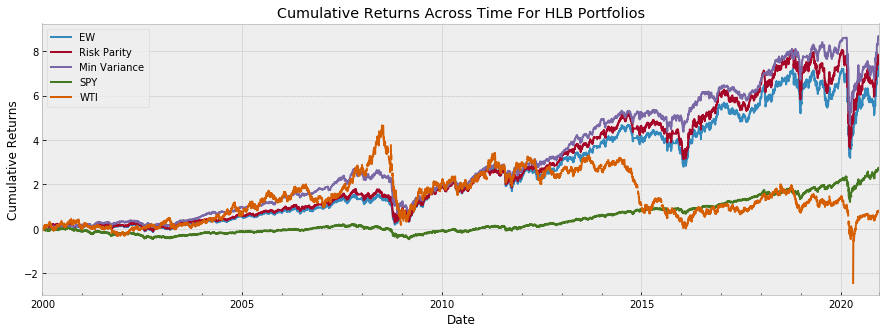

In [8]:
fig,axe3=plt.subplots()
Cum_ret = (1+J2).cumprod()
(Cum_ret-1).plot(figsize=(15,5),ax = axe3)
plt.title('Cumulative Returns Across Time For HLB Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

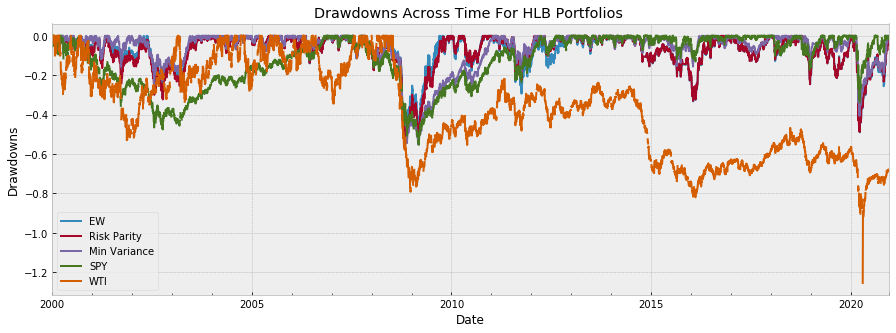

In [9]:
DD = Cum_ret.div(Cum_ret.cummax()) - 1
fig,axe=plt.subplots()
DD.plot(figsize=(15,5),ax = axe)
plt.title('Drawdowns Across Time For HLB Portfolios ')
plt.xlabel('Date')
plt.ylabel('Drawdowns')
plt.show()